In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Dataset description

## 1.1 Load data & preview

In [8]:
df = pd.read_csv('/kaggle/input/salary-prediction-data/Salary Prediction of Data Professions.csv')
df

FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
0        TOMASA       ARMEN   F   5-18-2014   01-07-2016         Analyst   
1         ANNIE         NaN   F         NaN   01-07-2016       Associate   
2         OLIVE        ANCY   F   7-28-2014   01-07-2016         Analyst   
3        CHERRY     AQUILAR   F  04-03-2013   01-07-2016         Analyst   
4          LEON  ABOULAHOUD   M  11-20-2014   01-07-2016         Analyst   
...         ...         ...  ..         ...          ...             ...   
2634  KATHERINE      ALSDON   F   6-28-2011   01-07-2016  Senior Manager   
2635     LOUISE     ALTARAS   F   1-14-2014   01-07-2016         Analyst   
2636      RENEE      ALVINO   F   1-23-2014   01-07-2016         Analyst   
2637       TERI   ANASTASIO   F   3-17-2014   01-07-2016         Analyst   
2638    GREGORY      ABARCA   M   9-18-2014   01-07-2016         Analyst   

       AGE  SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  \
0     21.0   44570     Finance         24.0               6.0      2.0   
1      NaN   89207         Web          NaN              13.0      NaN   
2     21.0   40955     Finance         23.0               7.0      3.0   
3     22.0   45550          IT         22.0               8.0      3.0   
4      NaN   43161  Operations         27.0               3.0      NaN   
...    ...     ...         ...          ...               ...      ...   
2634  36.0  185977  Management         15.0              15.0      5.0   
2635  23.0   45758          IT         17.0              13.0      2.0   
2636  21.0   47315         Web         29.0               1.0      5.0   
2637  24.0   45172         Web         23.0               7.0      3.0   
2638  24.0   49176   Marketing         17.0              13.0      2.0   

      PAST EXP  
0            0  
1            7  
2            0  
3            0  
4            3  
...        ...  
2634        10  
2635         0  
2636         0  
2637         1  
2638         2  

[2639 rows x 13 columns]

## 1.2 Column description

<table border="1">
  <tr>
    <th>Column</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td>FIRST NAME</td>
    <td>The first name of the employee.</td>
  </tr>
  <tr>
    <td>LAST NAME</td>
    <td>The last name of the employee.</td>
  </tr>
  <tr>
    <td>SEX</td>
    <td>The gender of the employee (F for female, M for male).</td>
  </tr>
  <tr>
    <td>DOJ</td>
    <td>Date of Joining - The date when the employee joined the company.</td>
  </tr>
  <tr>
    <td>CURRENT DATE</td>
    <td>The current date or the date for which the data is recorded.</td>
  </tr>
  <tr>
    <td>DESIGNATION</td>
    <td>The job title or position of the employee within the company.</td>
  </tr>
  <tr>
    <td>AGE</td>
    <td>The age of the employee.</td>
  </tr>
  <tr>
    <td>SALARY</td>
    <td>The salary of the employee (target variable for prediction).</td>
  </tr>
  <tr>
    <td>UNIT</td>
    <td>The department or unit to which the employee belongs.</td>
  </tr>
  <tr>
    <td>LEAVES USED</td>
    <td>The number of leaves (days of) the employee has used.</td>
  </tr>
  <tr>
    <td>LEAVES REMAINING</td>
    <td>The number of leaves the employee has remaining.</td>
  </tr>
  <tr>
    <td>RATINGS</td>
    <td>Ratings given to the employee.</td>
  </tr>
  <tr>
    <td>PAST EXP</td>
    <td>The past work experience of the employee before joining the company.</td>
  </tr>
</table>


## 1.3 Droping unnecessary columns

In [9]:
df = df.drop(columns =[ 'LAST NAME', 'FIRST NAME' ],axis=1)
df

SEX         DOJ CURRENT DATE     DESIGNATION   AGE  SALARY        UNIT  \
0      F   5-18-2014   01-07-2016         Analyst  21.0   44570     Finance   
1      F         NaN   01-07-2016       Associate   NaN   89207         Web   
2      F   7-28-2014   01-07-2016         Analyst  21.0   40955     Finance   
3      F  04-03-2013   01-07-2016         Analyst  22.0   45550          IT   
4      M  11-20-2014   01-07-2016         Analyst   NaN   43161  Operations   
...   ..         ...          ...             ...   ...     ...         ...   
2634   F   6-28-2011   01-07-2016  Senior Manager  36.0  185977  Management   
2635   F   1-14-2014   01-07-2016         Analyst  23.0   45758          IT   
2636   F   1-23-2014   01-07-2016         Analyst  21.0   47315         Web   
2637   F   3-17-2014   01-07-2016         Analyst  24.0   45172         Web   
2638   M   9-18-2014   01-07-2016         Analyst  24.0   49176   Marketing   

      LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0            24.0               6.0      2.0         0  
1             NaN              13.0      NaN         7  
2            23.0               7.0      3.0         0  
3            22.0               8.0      3.0         0  
4            27.0               3.0      NaN         3  
...           ...               ...      ...       ...  
2634         15.0              15.0      5.0        10  
2635         17.0              13.0      2.0         0  
2636         29.0               1.0      5.0         0  
2637         23.0               7.0      3.0         1  
2638         17.0              13.0      2.0         2  

[2639 rows x 11 columns]

# 2 Exploratory data analysis

## 2.1 Missing values

In [4]:
df.isna().sum()

SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

## 2.2 Data types

In [9]:
df.dtypes

SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

## 2.3 Unique values of each column

In [10]:
df.nunique()

SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
dtype: int64

## 2.4 value count of categorical features

In [11]:
for column in ['SEX', 'DESIGNATION','UNIT', 'PAST EXP','RATINGS','UNIT']:
    print("\n",df[column].value_counts())


 SEX
F    1344
M    1295
Name: count, dtype: int64

 DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: count, dtype: int64

 UNIT
IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: count, dtype: int64

 PAST EXP
0     1301
1      494
2      362
3      168
5       56
4       56
6       47
7       27
8       27
10      21
9       17
11      17
13      11
12      10
17       6
15       6
14       4
16       4
18       2
19       2
23       1
Name: count, dtype: int64

 RATINGS
4.0    671
2.0    669
3.0    657
5.0    640
Name: count, dtype: int64

 UNIT
IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: count, dtype: int64


## 2.5 Count plot of categorical features

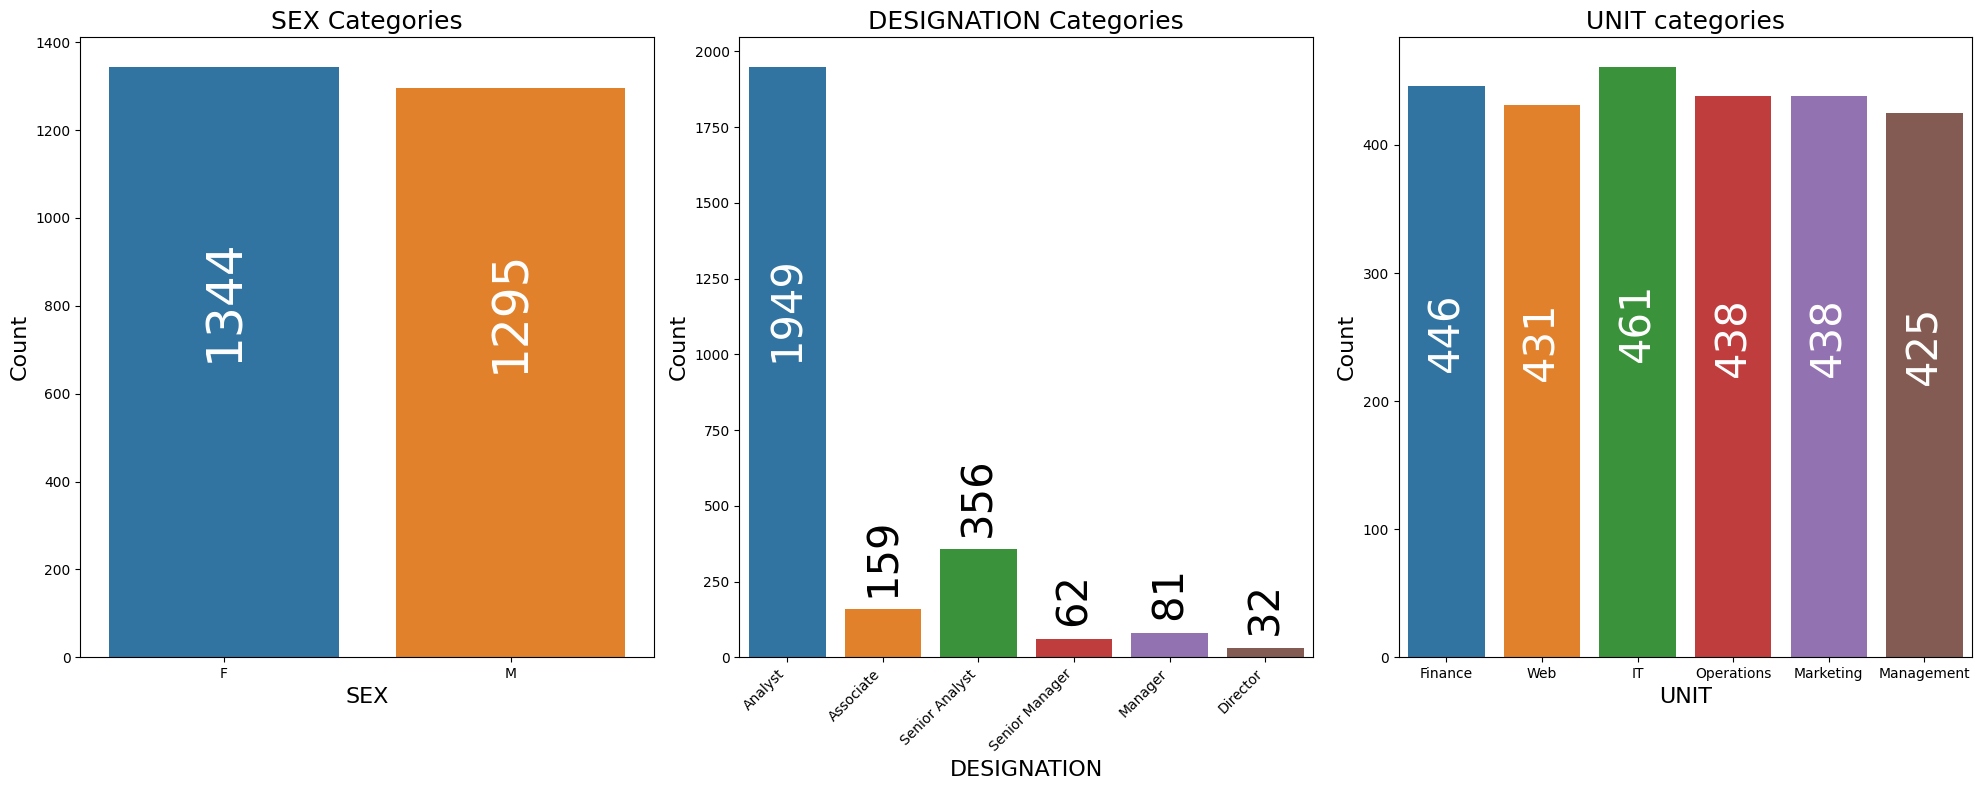

In [6]:
title_size = 18
x_y_label_size = 16

fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # 1 row, 3 columns subplot

# Bar plot for feature1
ax1 = sns.countplot(x='SEX', data=df, ax=axes[0])
ax1.set_title('SEX Categories', fontsize=title_size)
ax1.set_xlabel('SEX', fontsize=x_y_label_size)
ax1.set_ylabel('Count', fontsize=x_y_label_size)

# Bar plot for feature2
ax2 = sns.countplot(x='DESIGNATION', data=df, ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  
ax2.set_title('DESIGNATION Categories', fontsize=title_size)
ax2.set_xlabel('DESIGNATION', fontsize=x_y_label_size)
ax2.set_ylabel('Count', fontsize=x_y_label_size)

# Bar plot for feature3
ax3 = sns.countplot(x='UNIT', data=df, ax=axes[2])
ax3.set_title('UNIT categories', fontsize=title_size)
ax3.set_xlabel('UNIT', fontsize=x_y_label_size)
ax3.set_ylabel('Count', fontsize=x_y_label_size)

# Font sizes for count labels on each subplot
count_font_sizes = [35, 30, 30]  # Add or modify font sizes as needed

# Display count values on bars with specified conditions and individual font sizes
for i, ax in enumerate([ax1, ax2, ax3]):
    for p in ax.patches:
        font_size = count_font_sizes[i]
        if p.get_height() < 0.2 * ax.get_ylim()[1]:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.02 * ax.get_ylim()[1]),
                        ha='center', va='bottom', color='black', fontsize=font_size, rotation =90)
        else:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='bottom', color='white', fontsize=font_size, rotation =90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('categories_bar_plots.png', dpi=900)
plt.show()

>the majority of the employees are analysts

>the number of females and males are almost the same 

>there is a very small difference between the number of employees in each unit

## 2.6 SEX vs SALARY stats 

In [7]:
SEX_stats = df.groupby('SEX').agg({
        'SALARY': ['min', 'max', 'mean']
}).reset_index()
SEX_stats.to_csv('SEX_stats.csv')
SEX_stats

SEX SALARY                      
         min     max          mean
0   F  40013  375647  59142.734375
1   M  40001  388112  57092.555212

## 2.7 DESIGNATION vs SALARY stats

In [9]:
DESIGNATION_stats = df.groupby('DESIGNATION').agg({
        'SALARY': ['min', 'max', 'mean']
}).reset_index()
DESIGNATION_stats.to_csv('DESIGNATION_stats.csv')
DESIGNATION_stats

DESIGNATION  SALARY                       
                      min     max           mean
0         Analyst   40001   49980   45020.111852
1       Associate   70154   99603   87202.981132
2        Director  213987  388112  286971.187500
3         Manager  100124  148890  126272.592593
4  Senior Analyst   50044   69966   59901.345506
5  Senior Manager  151373  199577  178664.274194

## 2.8 UNIT vs SALARY stats

In [10]:
UNIT_stats = df.groupby('UNIT').agg({
        'SALARY': ['min', 'max', 'mean']
}).reset_index()
UNIT_stats.to_csv('UNIT_stats.csv')
UNIT_stats

UNIT SALARY                      
                 min     max          mean
0     Finance  40040  375647  58599.100897
1          IT  40014  355337  58998.108460
2  Management  40031  368887  59186.941176
3   Marketing  40058  388112  59318.045662
4  Operations  40001  301872  55477.926941
5         Web  40065  324129  57202.508121

## 2.9 Box polot of categorical features VS SALARY

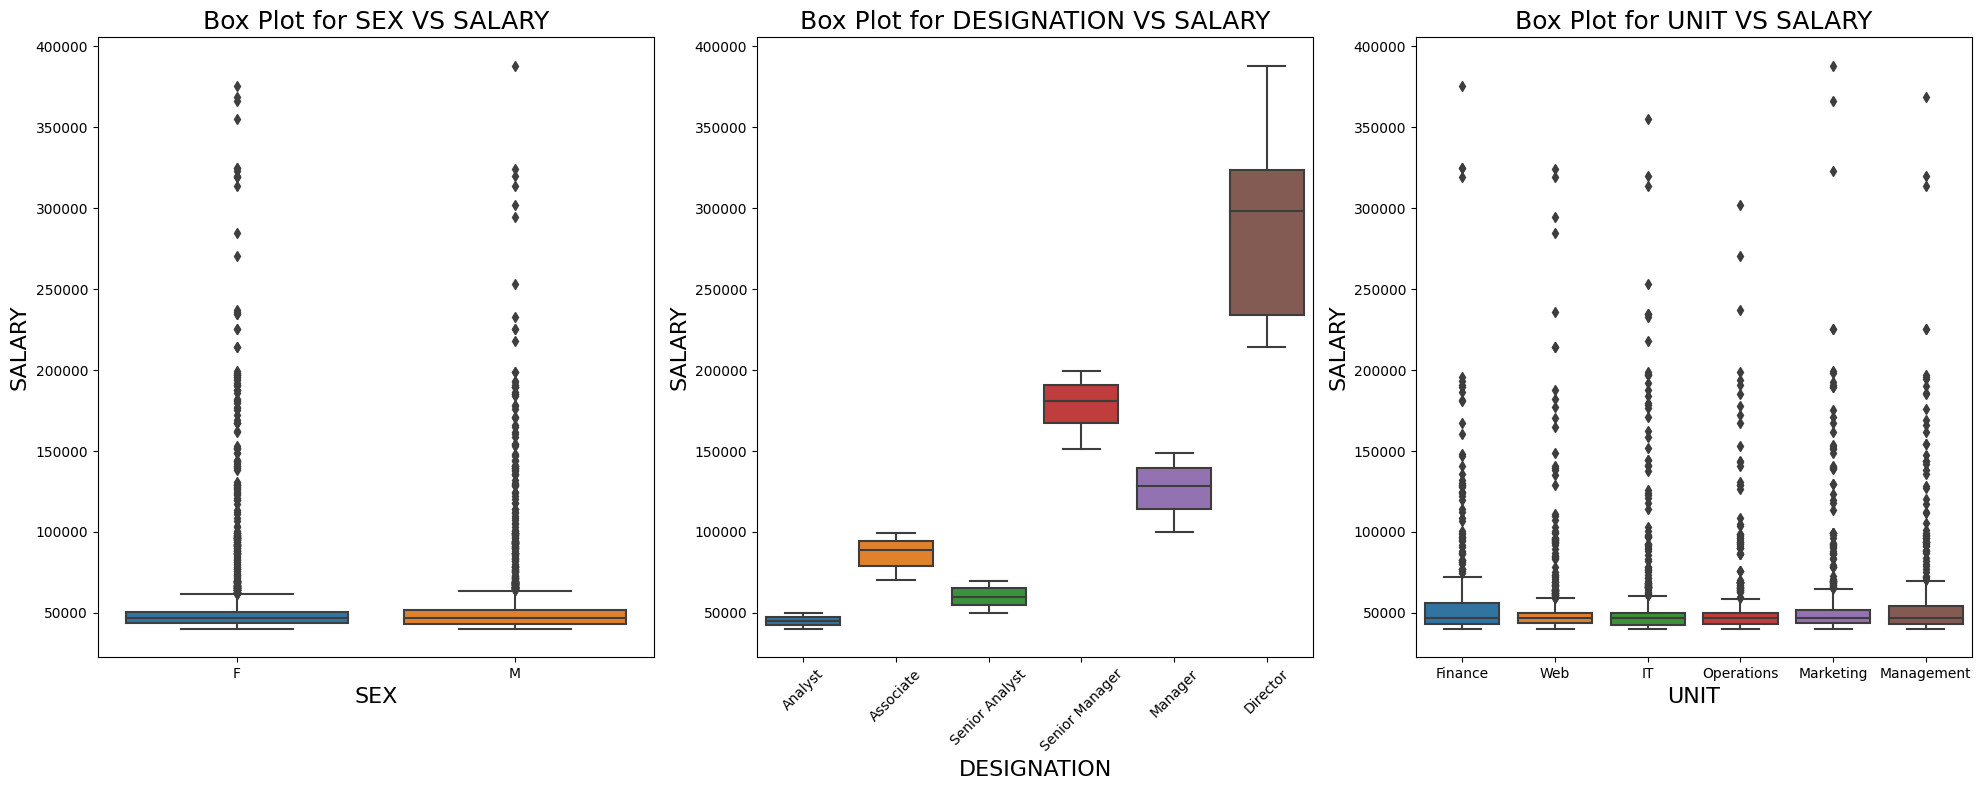

In [12]:
title_size = 18
x_y_label_size = 16

fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # 1 row, 3 columns subplot

# Box plot for feature1
sns.boxplot(x='SEX', y='SALARY', data=df, ax=axes[0])
axes[0].set_title('Box Plot for SEX VS SALARY', fontsize=title_size)
axes[0].set_xlabel('SEX', fontsize=x_y_label_size)
axes[0].set_ylabel('SALARY', fontsize=x_y_label_size)

# Box plot for feature2
sns.boxplot(x='DESIGNATION', y='SALARY', data=df, ax=axes[1])
axes[1].set_title('Box Plot for DESIGNATION VS SALARY', fontsize=title_size)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)  
axes[1].set_xlabel('DESIGNATION', fontsize=x_y_label_size)
axes[1].set_ylabel('SALARY', fontsize=x_y_label_size)

# Box plot for feature3
sns.boxplot(x='UNIT', y='SALARY', data=df, ax=axes[2])
axes[2].set_title('Box Plot for UNIT VS SALARY', fontsize=title_size)
axes[2].set_xlabel('UNIT', fontsize=x_y_label_size)
axes[2].set_ylabel('SALARY', fontsize=x_y_label_size)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('categories_box_plots.png', dpi=900)
plt.show()

>There is a very small (barly noticable) pay gap between males and females 

>Managers, senior managers, and directors have highest salaries

>There is a  little difference between the salary of different units


## 2.10 Descriptive statistics of numeric variables

In [5]:
df.describe().to_csv('numeric_features_descriptive_stasts.csv')
df.describe()

AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  2636.000000       2637.000000  2637.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.908228   36876.956944     4.604469          4.603193     1.114933   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000

## 2.11 value count of discrite numeric features

In [16]:
for column in ['PAST EXP', 'RATINGS', 'AGE']:
    print("\n",df[column].value_counts())


 PAST EXP
0     1301
1      494
2      361
3      167
5       56
4       56
6       47
8       27
7       26
10      21
9       17
11      17
13      11
12      10
17       6
15       6
14       4
16       4
18       2
19       2
23       1
Name: count, dtype: int64

 RATINGS
4.0    671
2.0    668
3.0    657
5.0    640
Name: count, dtype: int64

 AGE
25.0    485
22.0    422
23.0    398
24.0    390
21.0    355
28.0    130
26.0     94
27.0     64
32.0     62
29.0     34
35.0     32
31.0     27
30.0     26
33.0     21
34.0     18
39.0     16
36.0     13
37.0     11
38.0     11
40.0      7
45.0      5
41.0      5
42.0      4
43.0      3
44.0      3
Name: count, dtype: int64


# 2.12 Count plot of discrete numeric features

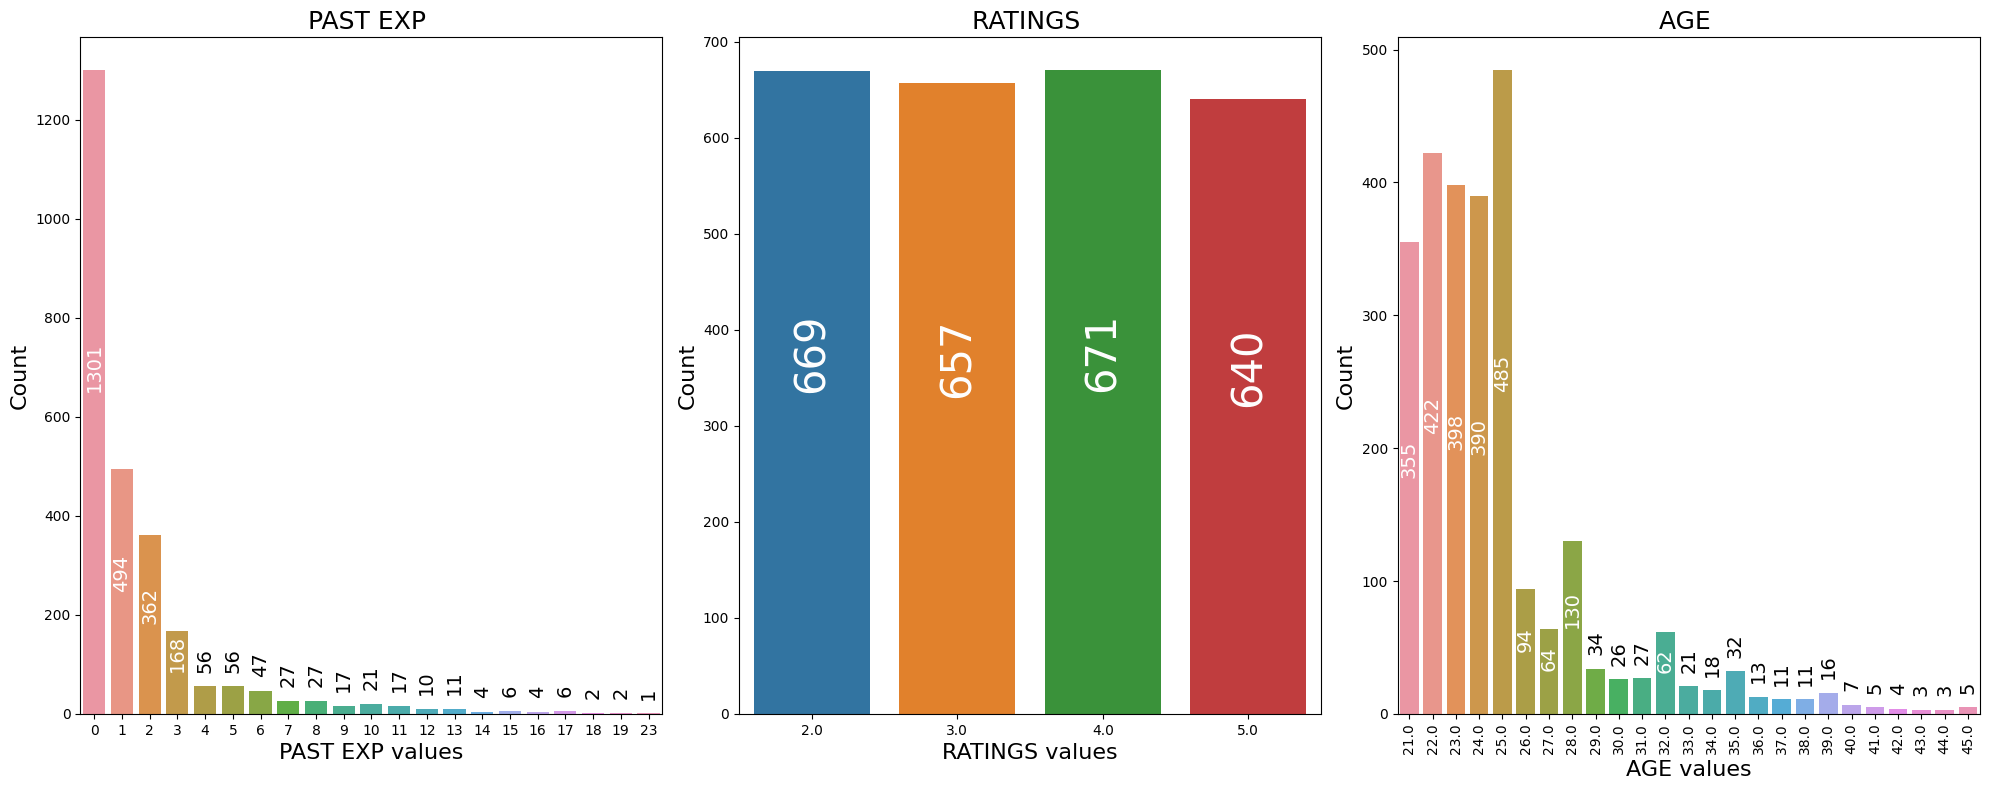

In [14]:
title_size = 18
x_y_label_size = 16

fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # 1 row, 3 columns subplot

# Bar plot for feature1
ax1 = sns.countplot(x='PAST EXP', data=df, ax=axes[0])
ax1.set_title('PAST EXP ', fontsize=title_size)
ax1.set_xlabel('PAST EXP values', fontsize=x_y_label_size)
ax1.set_ylabel('Count', fontsize=x_y_label_size)

# Bar plot for feature2
ax2 = sns.countplot(x='RATINGS', data=df, ax=axes[1])
ax2.set_title('RATINGS ', fontsize=title_size)
ax2.set_xlabel('RATINGS values', fontsize=x_y_label_size)
ax2.set_ylabel('Count', fontsize=x_y_label_size)

# Bar plot for feature3
ax3 = sns.countplot(x='AGE', data=df, ax=axes[2])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)  
ax3.set_title('AGE ', fontsize=title_size)
ax3.set_xlabel('AGE values', fontsize=x_y_label_size)
ax3.set_ylabel('Count', fontsize=x_y_label_size)

# Font sizes for count labels on each subplot
count_font_sizes = [14, 30, 14]  # Add or modify font sizes as needed

# Display count values on bars with specified conditions and individual font sizes
for i, ax in enumerate([ax1, ax2, ax3]):
    for p in ax.patches:
        font_size = count_font_sizes[i]
        if p.get_height() < 0.1 * ax.get_ylim()[1]:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 0.02 * ax.get_ylim()[1]),
                        ha='center', va='bottom', color='black', fontsize=font_size, rotation =90)
        else:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='bottom', color='white', fontsize=font_size, rotation =90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('discrete_numeric_bar_plots.png', dpi=900)
plt.show()

>the majority of employees have from 0 : 3 years of experience

>the majority are from 21 : 28 years old

>ratings are distributed equally 

## 2.13 PAST EXP vs SALARY stats

In [15]:
PAST_EXP_stats = df.groupby('PAST EXP').agg({
        'SALARY': ['min', 'max', 'mean']
}).reset_index()
PAST_EXP_stats.to_csv('PAST_EXP_stats.csv')
PAST_EXP_stats

PAST EXP  SALARY                       
                min     max           mean
0         0   40001   99521   47074.528055
1         1   40043   99505   48212.937247
2         2   40058  104916   49591.975138
3         3   40231  129191   55515.476190
4         4   51441  140916   77588.375000
5         5   50044  132054   83218.053571
6         6   71026  198814  111012.425532
7         7   78311  196757  114105.888889
8         8   70154  194701  128939.703704
9         9   72359  193621  140512.235294
10       10  108931  323196  177764.285714
11       11  103289  284733  175180.352941
12       12  140926  355337  213079.700000
13       13  158394  368887  226909.363636
14       14  177412  375647  232387.250000
15       15  225412  319742  262552.166667
16       16  151373  324129  231545.000000
17       17  191793  319141  254816.000000
18       18  320148  388112  354130.000000
19       19  324783  324783  324783.000000
20       23  253284  253284  253284.000000

## 2.14 RATINGS vs SALARY stats

In [16]:
RATINGS_stats = df.groupby('RATINGS').agg({
        'SALARY': ['min', 'max', 'mean']
}).reset_index()
RATINGS_stats.to_csv('RATINGS_stats.csv')
RATINGS_stats

RATINGS SALARY                      
             min     max          mean
0     2.0  40001  388112  57609.760837
1     3.0  40013  368887  56632.345510
2     4.0  40040  319742  59351.126677
3     5.0  40073  375647  58933.342187

## 2.15 AGE vs SALARY stats

In [17]:
AGE_stats = df.groupby('AGE').agg({
        'SALARY': ['min', 'max', 'mean']
}).reset_index()
AGE_stats.to_csv('AGE_stats.csv')
AGE_stats

AGE  SALARY                       
             min     max           mean
0   21.0   40041   49980   44976.185915
1   22.0   40001   49974   44985.969194
2   23.0   40045   49913   45007.507538
3   24.0   40043   49955   45055.258974
4   25.0   40060   69966   48084.414433
5   26.0   50343   69716   60264.734043
6   27.0   50084   69877   59233.750000
7   28.0   50044   99505   67825.492308
8   29.0   70823   99521   89115.352941
9   30.0   71873   99311   87924.000000
10  31.0   71026   99603   86778.407407
11  32.0   70154  144332  102087.580645
12  33.0  100471  142291  121561.523810
13  34.0  100874  148273  128136.888889
14  35.0  103289  197526  153713.156250
15  36.0  160613  198814  183831.923077
16  37.0  151618  199060  171786.272727
17  38.0  154106  199577  183898.545455
18  39.0  151373  368887  214619.000000
19  40.0  218098  319742  264955.857143
20  41.0  234374  375647  304585.600000
21  42.0  236901  388112  304833.750000
22  43.0  235565  313649  277982.333333
23  44.0  225339  294564  248414.000000
24  45.0  253284  324783  308427.800000

## 2.16 box plot of discrete numeric features VS salary

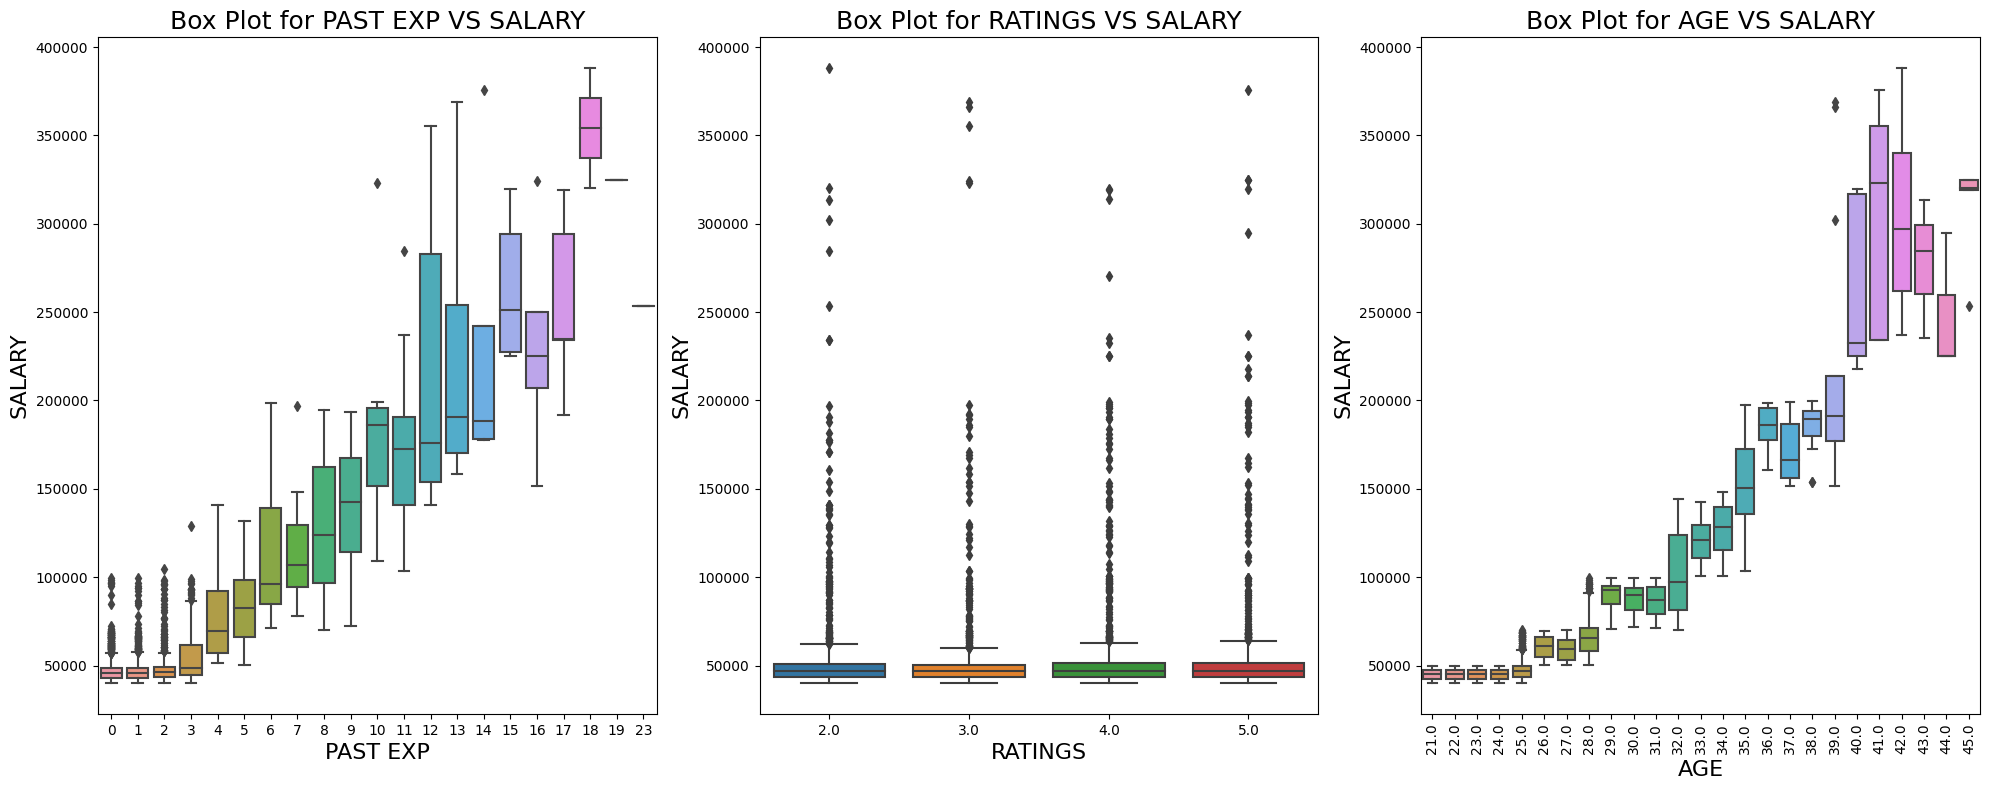

In [19]:
title_size = 18
x_y_label_size = 16

fig, axes = plt.subplots(1, 3, figsize=(20, 8))  # 1 row, 3 columns subplot

# Box plot for feature1
sns.boxplot(x='PAST EXP', y='SALARY', data=df, ax=axes[0])
axes[0].set_title('Box Plot for PAST EXP VS SALARY', fontsize=title_size)
axes[0].set_xlabel('PAST EXP', fontsize=x_y_label_size)
axes[0].set_ylabel('SALARY', fontsize=x_y_label_size)

# Box plot for feature2
sns.boxplot(x='RATINGS', y='SALARY', data=df, ax=axes[1])
axes[1].set_title('Box Plot for RATINGS VS SALARY', fontsize=title_size)
axes[1].set_xlabel('RATINGS', fontsize=x_y_label_size)
axes[1].set_ylabel('SALARY', fontsize=x_y_label_size)

# Box plot for feature3
sns.boxplot(x='AGE', y='SALARY', data=df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)  
axes[2].set_title('Box Plot for AGE VS SALARY', fontsize=title_size)
axes[2].set_xlabel('AGE', fontsize=x_y_label_size)
axes[2].set_ylabel('SALARY', fontsize=x_y_label_size)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('discrete_numeric_box_plots.png', dpi=900)
plt.show()

>the older an employee is and the more past expericene he has the more hs salary increases  

>**'RATING'** does not affect the salary as much


## 2.17 SALARY distribution

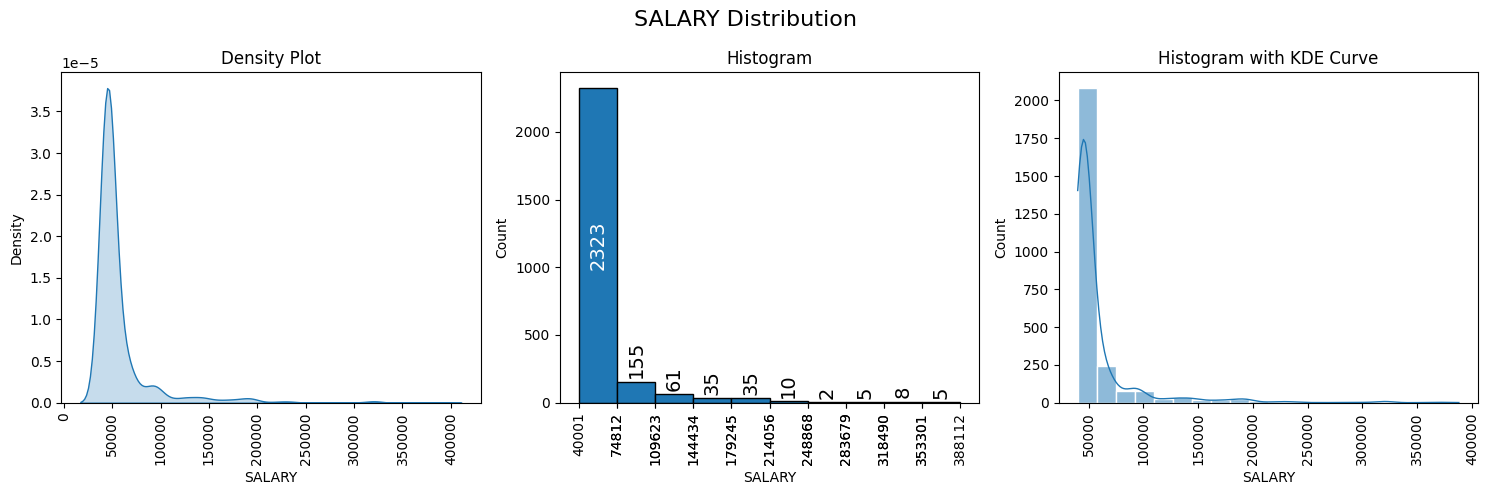

In [20]:
# Create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('SALARY Distribution', fontsize=16)
# Plot Density Plot
axes[0].set_title('Density Plot')
sns.kdeplot(df['SALARY'], fill=True , ax=axes[0],common_norm=False)
axes[0].tick_params(axis='x', labelrotation=90)

# Plot Histogram
axes[1].set_title('Histogram')
values, edges, patches = axes[1].hist(df['SALARY'], bins=10, edgecolor='k')

bins = []
for i in range(len(edges) - 1):
        bin_start = edges[i]
        bin_end = edges[i + 1]

        bins.append(bin_start)
        bins.append(bin_end)
        bin_center = (bin_start + bin_end) / 2
        freq = values[i]
        if int(freq) > 0.1 * axes[1].get_ylim()[1]:
            axes[1].text(bin_center, freq / 2, str(int(freq)),
                    ha='center', va='center', color='white', fontsize=14, rotation = 90)
        else:
            axes[1].text(bin_center, freq + 0.01 * axes[1].get_ylim()[1] , str(int(freq)),
                    ha='center', va='bottom', fontsize=14, rotation = 90)
axes[1].set_xticks(bins)
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_xlabel('SALARY')
axes[1].set_ylabel('Count')

# Plot Histogram with KDE Curve
axes[2].set_title('Histogram with KDE Curve')
sns.histplot(df['SALARY'], bins=20, kde=True, edgecolor='white', ax=axes[2], line_kws={"linewidth": 1})
axes[2].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.savefig('salary_dist.png', dpi=900)
plt.show()


>The distribution is left skewed because the minority of employees are in high paying positions   

## 2.18 Correlation heatmap

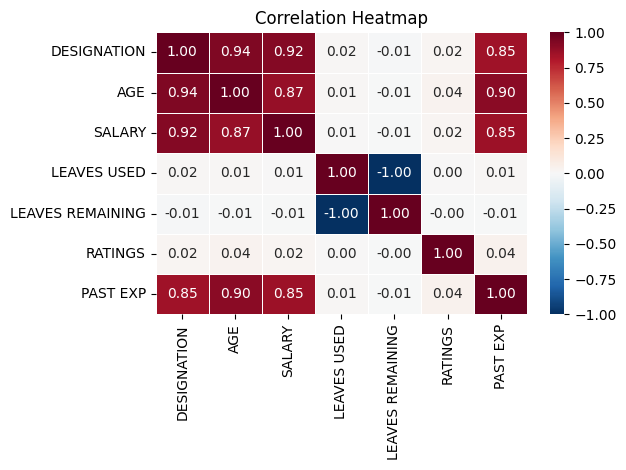

In [30]:
copy_df = df.copy()
copy_df['DESIGNATION'] = copy_df.DESIGNATION.replace(['Analyst','Senior Analyst','Associate','Manager','Senior Manager','Director'],[1,2,3,4,5,6]) 
sns.heatmap( copy_df.select_dtypes(include='number').corr(), cmap='RdBu_r',annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('corr_heatmap.png', dpi=900)
plt.show()

>**'SALARY'** has strong +ve correlation with **'DESIGNATION'**, **'AGE'**, and **'PAST EXP'** so it might be better if only these features are used in predicting the **'SALARY'**

>**'LEAVES USED'** and **'LEAVES REMAING'** have -ve correlation of 1 as they add up to 30 

## 2.19 Pair plot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


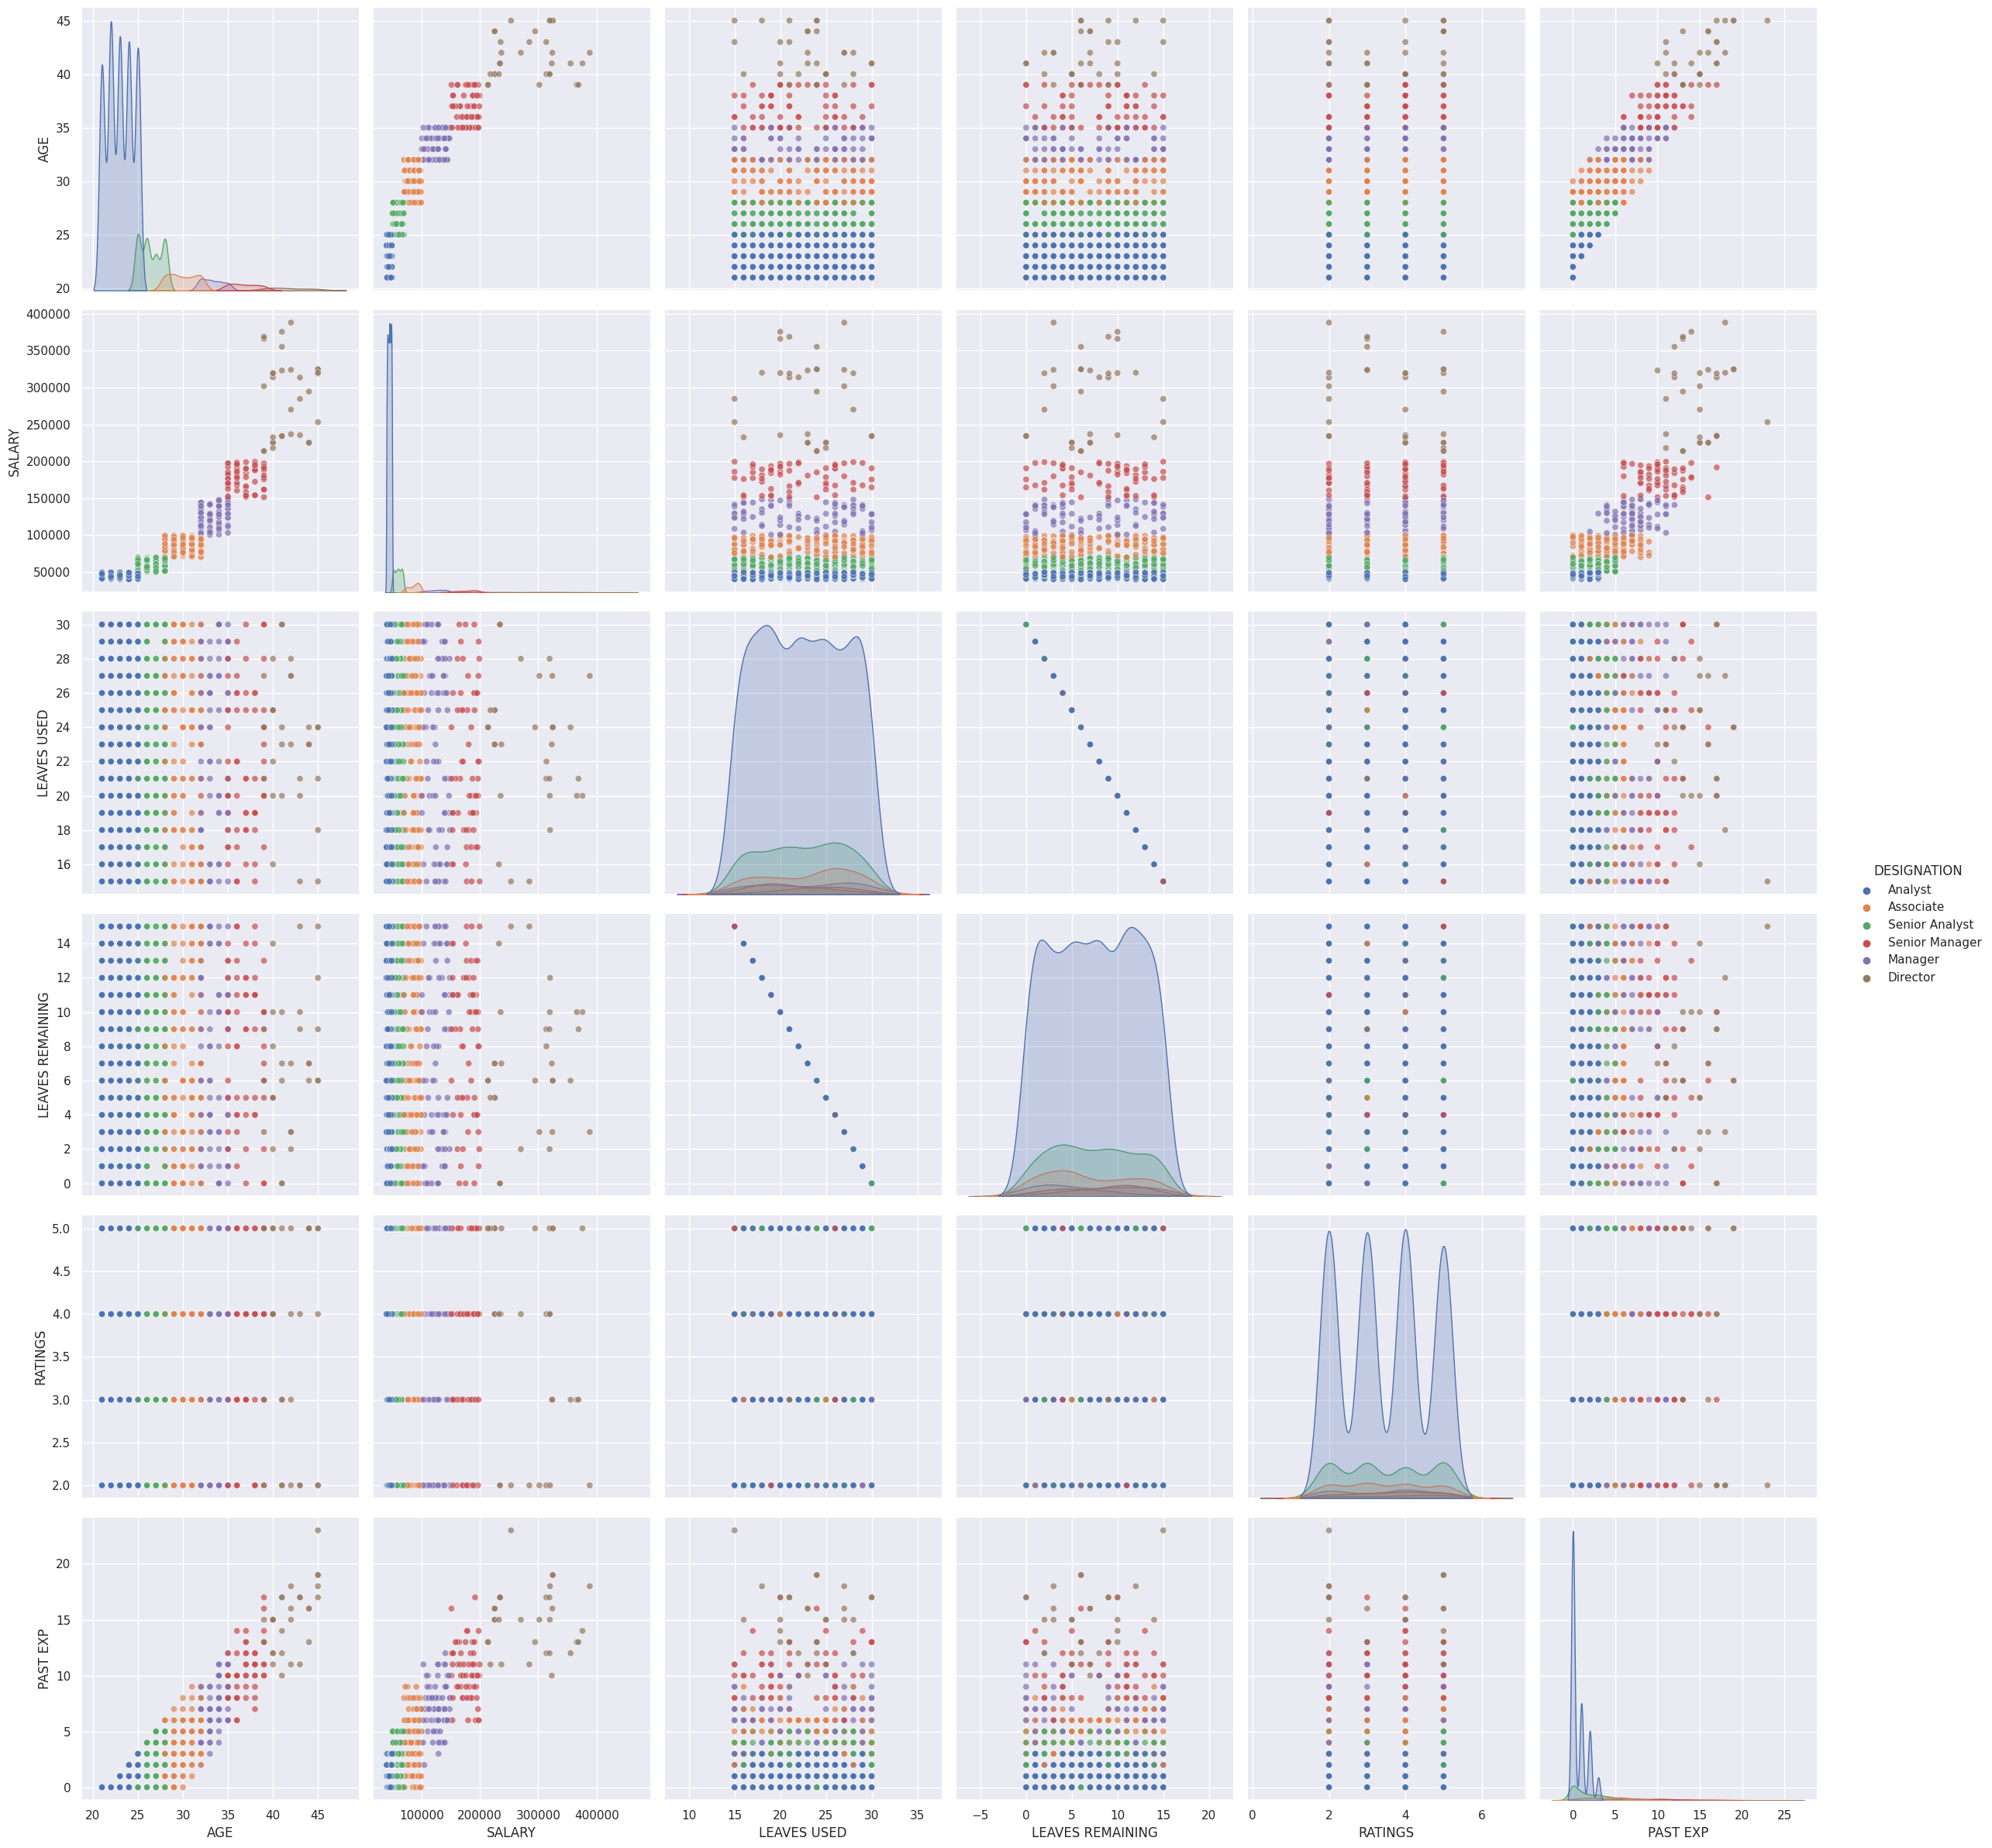

In [41]:
sns.set()
pair_plot = sns.pairplot(df, size=4.0, hue='DESIGNATION', plot_kws={'alpha': 0.7})

# Move the legend outside the plot
pair_plot.fig.subplots_adjust(right=0.85)
pair_plot.fig.tight_layout(rect=(0, 0, 0.92, 1))  # Adjust the rectangle to leave space for the legend
plt.savefig('pair_plot.png', dpi=950)
plt.show()

## 2.20 Pandas profile report  

In [32]:
from pandas_profiling import ProfileReport
report = ProfileReport(copy_df)
report.to_file("profile_report.html")
report.to_notebook_iframe()

To check this profile report in a web page click [here](https://salary-prediction.tiiny.site)

# 3 Feature Engineering & Preprocessing

## 3.1 Missing values

### 3.1.1 Missing values in the **'DOJ'** column 

>Missing values in the 'DOJ' column cannot be accurately imputed using the available data, instead it should be collected again from the employees, therefore, it is advisable to drop rows with missing values in the 'DOJ' column.

In [10]:
df.dropna(subset=['DOJ'], inplace=True)

In [6]:
df.isna().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 2
SALARY              0
UNIT                0
LEAVES USED         2
LEAVES REMAINING    2
RATINGS             1
PAST EXP            0
dtype: int64

### 3.1.2 Missing values in **'AGE'** column

#### Visual inspection

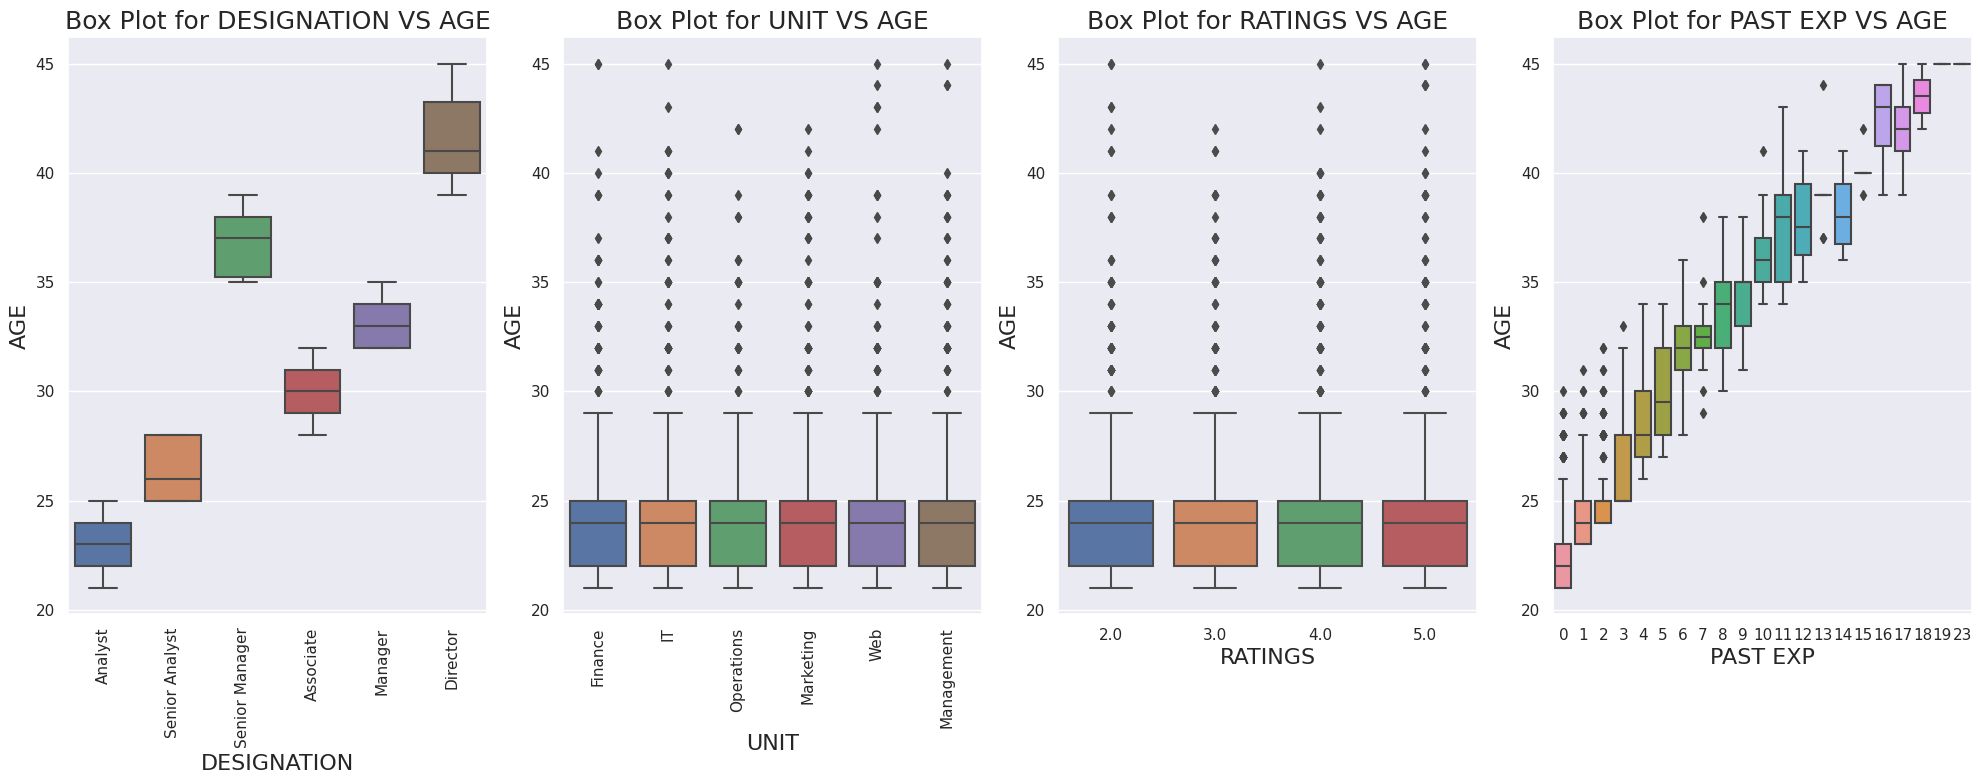

In [44]:
title_size = 18
x_y_label_size = 16

fig, axes = plt.subplots(1, 4, figsize=(20, 8))  # 1 row, 3 columns subplot

# Box plot for feature1
sns.boxplot(x='DESIGNATION', y='AGE', data=df, ax=axes[0])
axes[0].set_title('Box Plot for DESIGNATION VS AGE', fontsize=title_size)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  
axes[0].set_xlabel('DESIGNATION', fontsize=x_y_label_size)
axes[0].set_ylabel('AGE', fontsize=x_y_label_size)

# Box plot for feature2
sns.boxplot(x='UNIT', y='AGE', data=df, ax=axes[1])
axes[1].set_title('Box Plot for UNIT VS AGE', fontsize=title_size)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  
axes[1].set_xlabel('UNIT', fontsize=x_y_label_size)
axes[1].set_ylabel('AGE', fontsize=x_y_label_size)

# Box plot for feature3
sns.boxplot(x='RATINGS', y='AGE', data=df, ax=axes[2])
axes[2].set_title('Box Plot for RATINGS VS AGE', fontsize=title_size)
axes[2].set_xlabel('RATINGS', fontsize=x_y_label_size)
axes[2].set_ylabel('AGE', fontsize=x_y_label_size)

sns.boxplot(x='PAST EXP', y='AGE', data=df, ax=axes[3])
axes[3].set_title('Box Plot for PAST EXP VS AGE', fontsize=title_size)
axes[3].set_xlabel('PAST EXP', fontsize=x_y_label_size)
axes[3].set_ylabel('AGE', fontsize=x_y_label_size)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig('categories_box_plots_VS_AGE.png', dpi=900)
plt.show()

>It make sense to replace missing values in the **'AGE'** column with the most common age value among employees with the same **'DESIGNATION'**, this recommendation is based on the observation that there are no outliers apparent in the box plot of **'DESIGNATION'** versus **'AGE'**.

#### Imputating with the most frequent of all samples of the same **'UNIT'** on a copy of the data

In [7]:
impute_df = df.copy()
impute_df['AGE'] = impute_df.groupby('DESIGNATION')['AGE'].transform(lambda x: x.fillna(x.mode()[0]))
impute_df.isna().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         2
LEAVES REMAINING    2
RATINGS             1
PAST EXP            0
dtype: int64

#### Evaluating the imputation with statistical analysis

In [26]:
original_stats = df[['AGE']].describe()
original_stats.columns = ['AGE_original']

imputed_stats = impute_df[['AGE']].describe()
imputed_stats.columns = ['AGE_imputed']

compare = pd.concat([original_stats,imputed_stats], axis=1) 
compare

AGE_original  AGE_imputed
count   2636.000000  2638.000000
mean      24.756449    24.754359
std        3.908228     3.907483
min       21.000000    21.000000
25%       22.000000    22.000000
50%       24.000000    24.000000
75%       25.000000    25.000000
max       45.000000    45.000000

> There is a slight change in **mean** and **std** which is a sign that this imputation method is effective

#### Apply the imputation to the main data

In [8]:
df['AGE'] = df.groupby('DESIGNATION')['AGE'].transform(lambda x: x.fillna(x.mode()[0]))
df.isna().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         2
LEAVES REMAINING    2
RATINGS             1
PAST EXP            0
dtype: int64

### 3.1.3 Imputing missing values in **'LEAVES USED'** & **'LEAVES REMAINING'**

#### Investigating how much total leaves an employee has be adding **'LEAVES REMAINING'** & **'LEAVES USED'**

In [27]:
(df['LEAVES REMAINING'] + df['LEAVES USED']).value_counts()

30.0    2634
Name: count, dtype: int64

>Each employee has 30 total leaves

>missing values in either **'LEAVES USED'** or **'LEAVES REMAINING'** will be replaced with 30 - the other column

#### Imputing with domain information **"LEAVES REMEANING + LEAVES USED = 30"**

In [9]:
df['LEAVES REMAINING'] = df.apply(lambda row: 30 - row['LEAVES USED'] if pd.isna(row['LEAVES REMAINING']) else row['LEAVES REMAINING'], axis=1)
df['LEAVES USED'] = df.apply(lambda row: 30 - row['LEAVES REMAINING'] if pd.isna(row['LEAVES USED']) else row['LEAVES USED'], axis=1)

In [10]:
df.isna().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             1
PAST EXP            0
dtype: int64

### 3.1.4 Imputing missing values in **'RATINGS'**

#### Visual inspectation

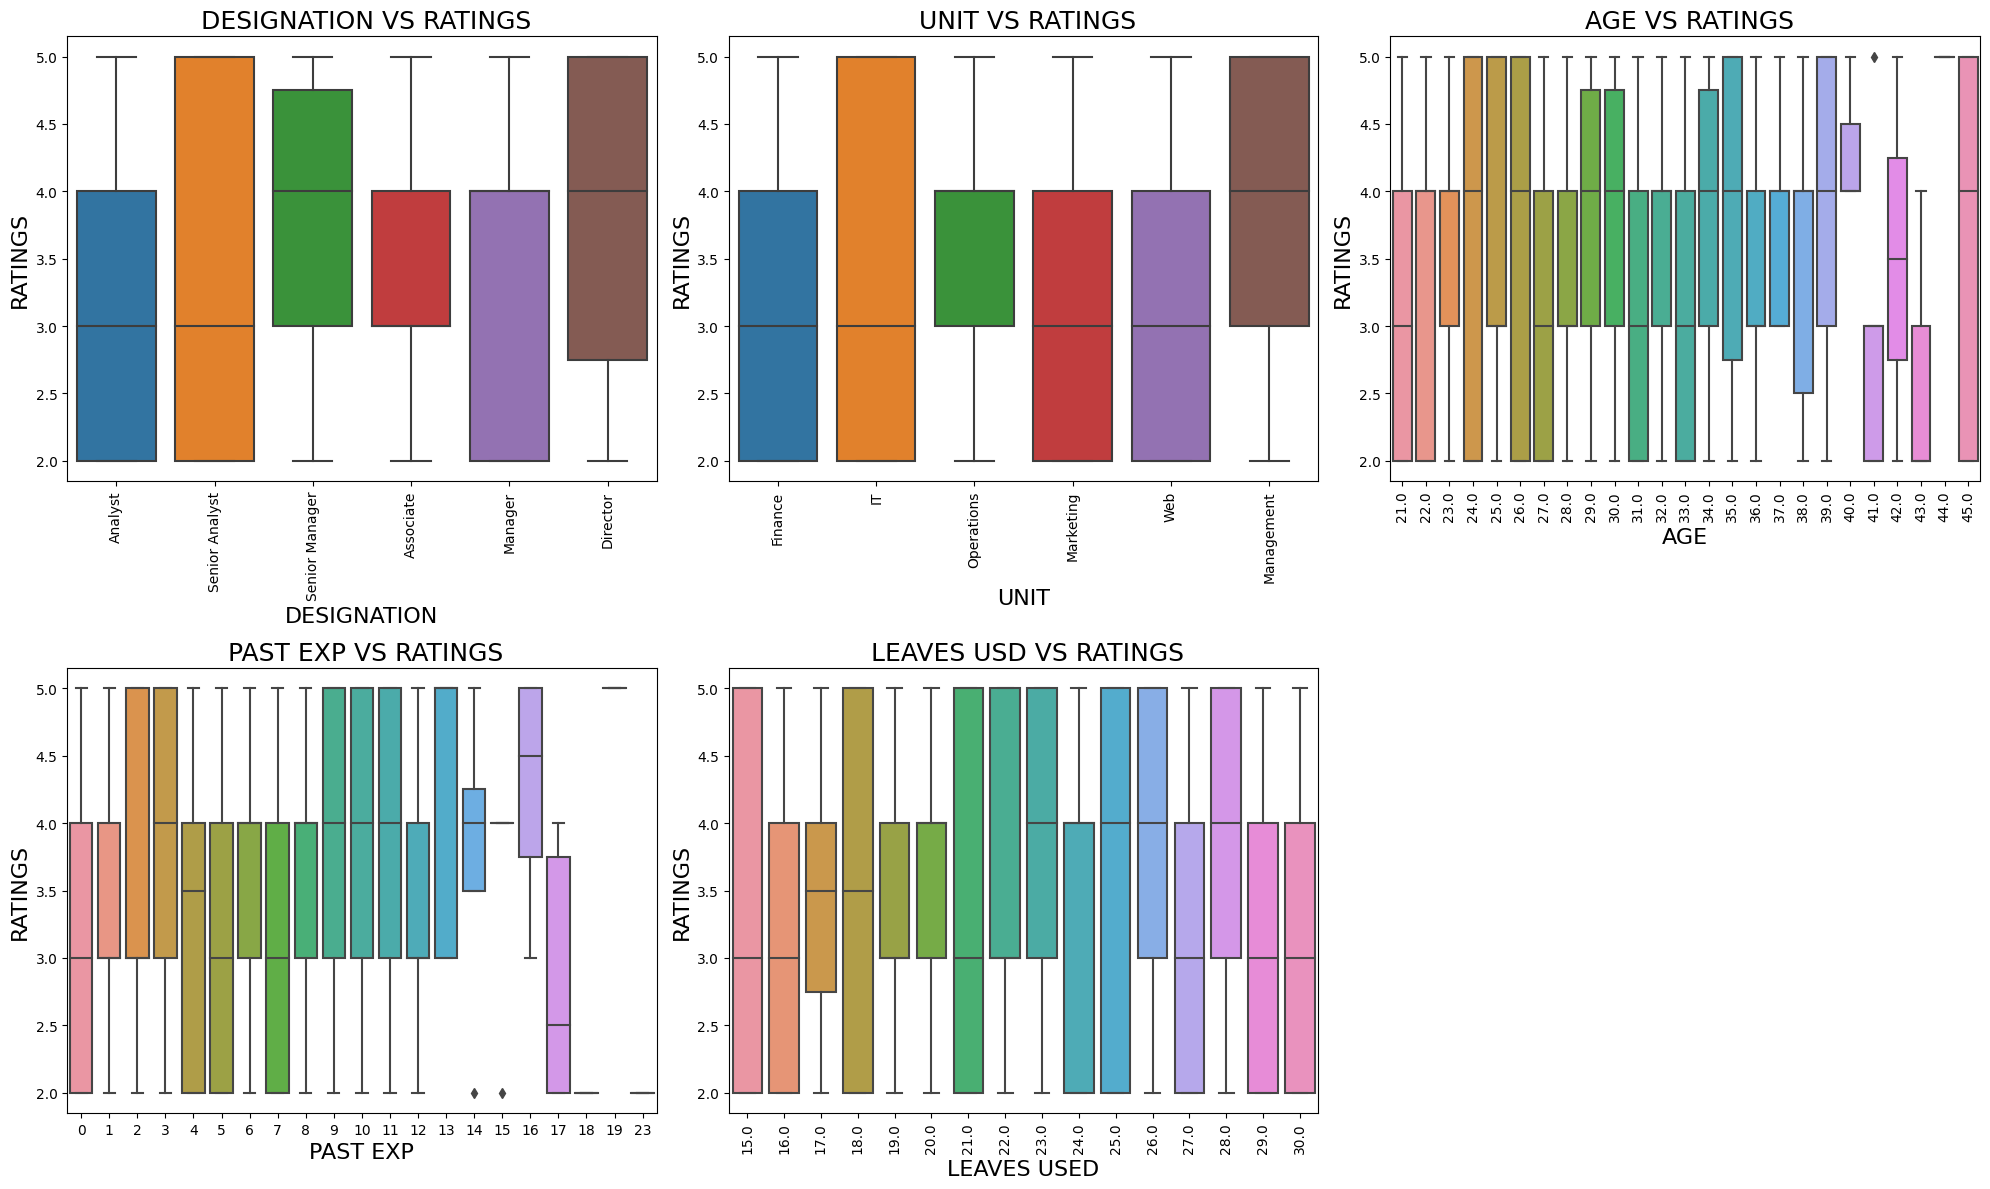

In [52]:
title_size = 18
x_y_label_size = 16

fig, axes = plt.subplots(2,3 , figsize=(20, 12))  # 1 row, 3 columns subplot

# Box plot for feature1
sns.boxplot(x='DESIGNATION', y='RATINGS', data=df, ax=axes[0,0])
axes[0,0].set_title(' DESIGNATION VS RATINGS', fontsize=title_size)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)  
axes[0,0].set_xlabel('DESIGNATION', fontsize=x_y_label_size)
axes[0,0].set_ylabel('RATINGS', fontsize=x_y_label_size)

# Box plot for feature2
sns.boxplot(x='UNIT', y='RATINGS', data=df, ax=axes[0,1])
axes[0,1].set_title(' UNIT VS RATINGS', fontsize=title_size)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)  
axes[0,1].set_xlabel('UNIT', fontsize=x_y_label_size)
axes[0,1].set_ylabel('RATINGS', fontsize=x_y_label_size)

# Box plot for feature3
sns.boxplot(x='AGE', y='RATINGS', data=df, ax=axes[0,2])
axes[0,2].set_title(' AGE VS RATINGS', fontsize=title_size)
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=90)  
axes[0,2].set_xlabel('AGE', fontsize=x_y_label_size)
axes[0,2].set_ylabel('RATINGS', fontsize=x_y_label_size)

sns.boxplot(x='PAST EXP', y='RATINGS', data=df, ax=axes[1,0])
axes[1,0].set_title(' PAST EXP VS RATINGS', fontsize=title_size)
axes[1,0].set_xlabel('PAST EXP', fontsize=x_y_label_size)
axes[1,0].set_ylabel('RATINGS', fontsize=x_y_label_size)

sns.boxplot(x='LEAVES USED', y='RATINGS', data=df, ax=axes[1,1])
axes[1,1].set_title(' LEAVES USD VS RATINGS', fontsize=title_size)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)  
axes[1,1].set_xlabel('LEAVES USED', fontsize=x_y_label_size)
axes[1,1].set_ylabel('RATINGS', fontsize=x_y_label_size)

axes[1, 2].remove()

plt.tight_layout()  # Adjust layout to prevent overlapping
# plt.savefig('categories_box_plots.png', dpi=900)
plt.show()

> No variable shows a clear pattern related to **'RATING'** that could be used for imputation.

> It's better to use KNN Imputer after feature encoding as this imputer fits on all variables  

## 3.2 Driving new variables

### 3.2.1 DURATION variable 

>The **'DURATION'** column denotes the number of months an employee has been with the company, calculated from their date of joining to the current date which the dataset was assembled in

In [11]:
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%m-%d-%Y')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], format='%m-%d-%Y')

# Calculate the duration of each employee in the company in months
df['DURATION'] = ((df['CURRENT DATE'] - df['DOJ']).dt.days) // 30
df = df.drop(columns = ['DOJ','CURRENT DATE'], axis=1)
df

SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst   NaN   43161  Operations         27.0   
5      F         Analyst  22.0   48736   Marketing         20.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  DURATION  
0                  6.0      2.0         0        19  
2                  7.0      3.0         0        17  
3                  8.0      3.0         0        33  
4                  3.0      NaN         3        13  
5                 10.0      4.0         0        35  
...                ...      ...       ...       ...  
2634              15.0      5.0        10        55  
2635              13.0      2.0         0        24  
2636               1.0      5.0         0        23  
2637               7.0      3.0         1        22  
2638              13.0      2.0         2        15  

[2638 rows x 10 columns]

### 3.2.2 Correlation between DURATION and SALARY 

In [12]:
df[['DURATION', 'SALARY']].corr()

DURATION    SALARY
DURATION  1.000000  0.437074
SALARY    0.437074  1.000000

> **'DURATION'** has a some correlation with **'SALARY'** so it might help predicting it 

### 3.2.3 'DURATION' descriptive stats

In [23]:
df[['DURATION']].describe()

DURATION
count  2638.000000
mean     26.204321
std      10.941581
min      11.000000
25%      18.000000
50%      25.000000
75%      32.000000
max      84.000000

## 3.4 Feature encoding

### 3.4.1 Label encoding of 'SEX'

**Mapping table**

<table border="1">
    <tr>
        <td>M</td>
        <td>1</td>
    </tr>
    <tr>
        <td>F</td>
        <td>0</td>
    </tr>
</table>


In [13]:
SEX_mapping = {'F': 0, 'M': 1}
df['SEX'] = df['SEX'].map(SEX_mapping)
df

SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0       0         Analyst  21.0   44570     Finance         24.0   
2       0         Analyst  21.0   40955     Finance         23.0   
3       0         Analyst  22.0   45550          IT         22.0   
4       1         Analyst  22.0   43161  Operations         27.0   
5       0         Analyst  22.0   48736   Marketing         20.0   
...   ...             ...   ...     ...         ...          ...   
2634    0  Senior Manager  36.0  185977  Management         15.0   
2635    0         Analyst  23.0   45758          IT         17.0   
2636    0         Analyst  21.0   47315         Web         29.0   
2637    0         Analyst  24.0   45172         Web         23.0   
2638    1         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  DURATION  
0                  6.0      2.0         0        19  
2                  7.0      3.0         0        17  
3                  8.0      3.0         0        33  
4                  3.0      NaN         3        13  
5                 10.0      4.0         0        35  
...                ...      ...       ...       ...  
2634              15.0      5.0        10        55  
2635              13.0      2.0         0        24  
2636               1.0      5.0         0        23  
2637               7.0      3.0         1        22  
2638              13.0      2.0         2        15  

[2638 rows x 10 columns]

### 3.4.2 Ordinal encoding of 'DESIGNATION'

Mapping table 

<table border="1">
    <tr>
      <td>Analyst</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Senior Analyst</td>
      <td>1</td>
    </tr>
    <tr>
      <td>Associate</td>
      <td>2</td>
    </tr>
    <tr>
      <td>Manager</td>
      <td>3</td>
    </tr>
    <tr>
      <td>Senior Manager</td>
      <td>4</td>
    </tr>
    <tr>
      <td>Director</td>
      <td>5</td>
    </tr>
</table>




In [14]:
designation_mapping = {
    'Analyst': 0,
    'Senior Analyst': 1,
    'Associate': 2,
    'Manager': 3,
    'Senior Manager': 4,
    'Director': 5
}

# Perform ordinal encoding for 'DESIGNATION'
df['DESIGNATION'] = df['DESIGNATION'].map(designation_mapping)
df

SEX  DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0       0            0  21.0   44570     Finance         24.0   
2       0            0  21.0   40955     Finance         23.0   
3       0            0  22.0   45550          IT         22.0   
4       1            0  22.0   43161  Operations         27.0   
5       0            0  22.0   48736   Marketing         20.0   
...   ...          ...   ...     ...         ...          ...   
2634    0            4  36.0  185977  Management         15.0   
2635    0            0  23.0   45758          IT         17.0   
2636    0            0  21.0   47315         Web         29.0   
2637    0            0  24.0   45172         Web         23.0   
2638    1            0  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  DURATION  
0                  6.0      2.0         0        19  
2                  7.0      3.0         0        17  
3                  8.0      3.0         0        33  
4                  3.0      NaN         3        13  
5                 10.0      4.0         0        35  
...                ...      ...       ...       ...  
2634              15.0      5.0        10        55  
2635              13.0      2.0         0        24  
2636               1.0      5.0         0        23  
2637               7.0      3.0         1        22  
2638              13.0      2.0         2        15  

[2638 rows x 10 columns]

### 3.4.3 One-hot encoding of 'UNIT'


 Mapping Table for UNIT
 
   <table>
        <tr>
            <th>Original UNIT</th>
            <th>is_Finance</th>
            <th>is_IT</th>
            <th>is_Operations</th>
            <th>is_Marketing</th>
            <th>is_Web</th>
        </tr>
        <tr>
            <td>Finance</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>IT</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Operations</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Marketing</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Web</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>Management</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
    </table>




In [15]:
df['is_Finance'] = (df['UNIT'] == 'Finance').astype(int)
df['is_IT'] = (df['UNIT'] == 'IT').astype(int)
df['is_Operations'] = (df['UNIT'] == 'Operations').astype(int)
df['is_Marketing'] = (df['UNIT'] == 'Marketing').astype(int)
df['is_Web'] = (df['UNIT'] == 'Web').astype(int)
# df['is_Management'] = (df['UNIT'] == 'Management').astype(int)

df = df.drop('UNIT', axis=1)
df

SEX  DESIGNATION   AGE  SALARY  LEAVES USED  LEAVES REMAINING  RATINGS  \
0       0            0  21.0   44570         24.0               6.0      2.0   
2       0            0  21.0   40955         23.0               7.0      3.0   
3       0            0  22.0   45550         22.0               8.0      3.0   
4       1            0  22.0   43161         27.0               3.0      NaN   
5       0            0  22.0   48736         20.0              10.0      4.0   
...   ...          ...   ...     ...          ...               ...      ...   
2634    0            4  36.0  185977         15.0              15.0      5.0   
2635    0            0  23.0   45758         17.0              13.0      2.0   
2636    0            0  21.0   47315         29.0               1.0      5.0   
2637    0            0  24.0   45172         23.0               7.0      3.0   
2638    1            0  24.0   49176         17.0              13.0      2.0   

      PAST EXP  DURATION  is_Finance  is_IT  is_Operations  is_Marketing  \
0            0        19           1      0              0             0   
2            0        17           1      0              0             0   
3            0        33           0      1              0             0   
4            3        13           0      0              1             0   
5            0        35           0      0              0             1   
...        ...       ...         ...    ...            ...           ...   
2634        10        55           0      0              0             0   
2635         0        24           0      1              0             0   
2636         0        23           0      0              0             0   
2637         1        22           0      0              0             0   
2638         2        15           0      0              0             1   

      is_Web  
0          0  
2          0  
3          0  
4          0  
5          0  
...      ...  
2634       0  
2635       0  
2636       1  
2637       1  
2638       0  

[2638 rows x 14 columns]

> There is no column for Management to avoid the dumy variable trap 

## 3.5 Imputation of 'RATING' using KNN Imputer

In [16]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
df.isna().sum()

SEX                 0
DESIGNATION         0
AGE                 0
SALARY              0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
DURATION            0
is_Finance          0
is_IT               0
is_Operations       0
is_Marketing        0
is_Web              0
dtype: int64

## 3.6 Train-test split (0.8 : 0.2)

In [20]:
X = df.drop(['SALARY'], axis = 1)
Y = df['SALARY'].values
X

SEX  DESIGNATION   AGE  LEAVES USED  LEAVES REMAINING  RATINGS  \
0     0.0          0.0  21.0         24.0               6.0      2.0   
1     0.0          0.0  21.0         23.0               7.0      3.0   
2     0.0          0.0  22.0         22.0               8.0      3.0   
3     1.0          0.0  22.0         27.0               3.0      3.5   
4     0.0          0.0  22.0         20.0              10.0      4.0   
...   ...          ...   ...          ...               ...      ...   
2633  0.0          4.0  36.0         15.0              15.0      5.0   
2634  0.0          0.0  23.0         17.0              13.0      2.0   
2635  0.0          0.0  21.0         29.0               1.0      5.0   
2636  0.0          0.0  24.0         23.0               7.0      3.0   
2637  1.0          0.0  24.0         17.0              13.0      2.0   

      PAST EXP  DURATION  is_Finance  is_IT  is_Operations  is_Marketing  \
0          0.0      19.0         1.0    0.0            0.0           0.0   
1          0.0      17.0         1.0    0.0            0.0           0.0   
2          0.0      33.0         0.0    1.0            0.0           0.0   
3          3.0      13.0         0.0    0.0            1.0           0.0   
4          0.0      35.0         0.0    0.0            0.0           1.0   
...        ...       ...         ...    ...            ...           ...   
2633      10.0      55.0         0.0    0.0            0.0           0.0   
2634       0.0      24.0         0.0    1.0            0.0           0.0   
2635       0.0      23.0         0.0    0.0            0.0           0.0   
2636       1.0      22.0         0.0    0.0            0.0           0.0   
2637       2.0      15.0         0.0    0.0            0.0           1.0   

      is_Web  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
2633     0.0  
2634     0.0  
2635     1.0  
2636     1.0  
2637     0.0  

[2638 rows x 13 columns]

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)
print('No. of training samples:',len(y_train))
print('No. of testing samples:',len(y_test))

No. of training samples: 2110
No. of testing samples: 528


# 4 Regression model development & Evaluation

## 4.1 Fitting different regressor with all features 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a list of regressors
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
    MLPRegressor()
]

# Create an empty list to store the results
results = []
fitted_regressors = {}

# Iterate over each regressor
for regressor in regressors:
    
    # Fit the regressor on the training data
    regressor.fit(x_train, y_train)
    # Make predictions on the test data
    y_pred = regressor.predict(x_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Get the name of the regressor
    regressor_name = regressor.__class__.__name__
    # Append results to the list
    results.append([regressor_name, mse, mae, r2])
    fitted_regressors[regressor_name] = regressor

# Create a DataFrame from the list of results with column names
results_df = pd.DataFrame(results, columns=['Regressor', 'MSE', 'MAE', 'R2'])
results_df['MSE'] = results_df['MSE'].apply(lambda x: '{:.2f}'.format(x))
results_df['MAE'] = results_df['MAE'].apply(lambda x: '{:.2f}'.format(x))

# Print the results DataFrame
results_df

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Regressor           MSE       MAE        R2
0       LinearRegression  104109537.99   6278.24  0.872551
1  DecisionTreeRegressor   54211070.53   4407.51  0.933636
2                    SVR  892227859.19  12126.75 -0.092252
3           MLPRegressor  691511115.44  12482.38  0.153463

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_results = []
rf_fitted_regressors = {}

for i in [50, 100, 150, 200, 250, 300]:
    
    regressor = RandomForestRegressor(n_estimators=i)
    regressor.fit(x_train, y_train)

    y_pred = regressor.predict(x_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Get the name of the regressor
    regressor_name = regressor.__class__.__name__ +f'_n={i}'
    
    rf_results.append([regressor_name, mse, mae, r2])
    rf_fitted_regressors[regressor_name] = regressor


rf_results_df = pd.DataFrame(rf_results, columns=['Regressor', 'MSE', 'MAE', 'R2'])
rf_results_df['MSE'] = rf_results_df['MSE'].apply(lambda x: '{:.2f}'.format(x))
rf_results_df['MAE'] = rf_results_df['MAE'].apply(lambda x: '{:.2f}'.format(x))

rf_results_df

Regressor          MSE      MAE        R2
0   RandomForestRegressor_n=50  29364632.69  3539.26  0.964052
1  RandomForestRegressor_n=100  30123475.08  3578.53  0.963123
2  RandomForestRegressor_n=150  30043167.36  3590.04  0.963222
3  RandomForestRegressor_n=200  28436115.78  3534.49  0.965189
4  RandomForestRegressor_n=250  28551001.40  3523.00  0.965048
5  RandomForestRegressor_n=300  29521570.46  3542.30  0.963860

In [34]:
from sklearn.neighbors import KNeighborsRegressor

kn_results = []
kn_fitted_regressors = {}

for i in [3,5,7,9,11,13]:
    
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(x_train, y_train)

    y_pred = regressor.predict(x_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Get the name of the regressor
    regressor_name = regressor.__class__.__name__ +f'_n={i}'
    
    kn_results.append([regressor_name, mse, mae, r2])
    kn_fitted_regressors[regressor_name] = regressor


kn_results_df = pd.DataFrame(kn_results, columns=['Regressor', 'MSE', 'MAE', 'R2'])
kn_results_df['MSE'] = kn_results_df['MSE'].apply(lambda x: '{:.2f}'.format(x))
kn_results_df['MAE'] = kn_results_df['MAE'].apply(lambda x: '{:.2f}'.format(x))

kn_results_df

Regressor           MSE      MAE        R2
0   KNeighborsRegressor_n=3  109730412.97  5253.80  0.865670
1   KNeighborsRegressor_n=5   98192563.42  5267.42  0.879794
2   KNeighborsRegressor_n=7   99452904.09  5259.53  0.878251
3   KNeighborsRegressor_n=9   97565425.51  5155.30  0.880562
4  KNeighborsRegressor_n=11  102684466.82  5163.69  0.874295
5  KNeighborsRegressor_n=13   98478996.90  5117.73  0.879444

In [35]:
results = pd.concat([results_df, rf_results_df, kn_results_df],axis=0,ignore_index=True)
results.to_csv('fitting_results.csv')
results

Regressor           MSE       MAE        R2
0              LinearRegression  104109537.99   6278.24  0.872551
1         DecisionTreeRegressor   54211070.53   4407.51  0.933636
2                           SVR  892227859.19  12126.75 -0.092252
3                  MLPRegressor  691511115.44  12482.38  0.153463
4    RandomForestRegressor_n=50   29364632.69   3539.26  0.964052
5   RandomForestRegressor_n=100   30123475.08   3578.53  0.963123
6   RandomForestRegressor_n=150   30043167.36   3590.04  0.963222
7   RandomForestRegressor_n=200   28436115.78   3534.49  0.965189
8   RandomForestRegressor_n=250   28551001.40   3523.00  0.965048
9   RandomForestRegressor_n=300   29521570.46   3542.30  0.963860
10      KNeighborsRegressor_n=3  109730412.97   5253.80  0.865670
11      KNeighborsRegressor_n=5   98192563.42   5267.42  0.879794
12      KNeighborsRegressor_n=7   99452904.09   5259.53  0.878251
13      KNeighborsRegressor_n=9   97565425.51   5155.30  0.880562
14     KNeighborsRegressor_n=11  102684466.82   5163.69  0.874295
15     KNeighborsRegressor_n=13   98478996.90   5117.73  0.879444

## 4.2 Best performing model

In [42]:
results.loc[[results['R2'].idxmax()]]

Regressor          MSE      MAE        R2
7  RandomForestRegressor_n=200  28436115.78  3534.49  0.965189

## 4.3 Fitting the best performing model on highly correlated features

In [62]:
regressor = RandomForestRegressor(n_estimators=200)
regressor.fit(x_train[['DESIGNATION', 'AGE', 'PAST EXP', 'DURATION']], y_train)

y_pred = regressor.predict(x_test[['DESIGNATION', 'AGE', 'PAST EXP', 'DURATION']])

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.960805908917293

>This model performs better with all features

## 4.4 Saving the best model 

In [63]:
from pickle import dump

with open('RandomForestRegressor_n=200.pkl', 'wb') as file:
    dump(rf_fitted_regressors['RandomForestRegressor_n=200'], file)

# 5 Pipeline diagram

click [here](https://viewer.diagrams.net/?tags=%7B%7D&highlight=0000ff&edit=_blank&layers=1&nav=1&title=Pipeline-diagram.drawio#R7LzHsuTIkiX4NW%2FZIuBk6WAOB%2BdsB04cnANf37AbES8zq7qrekRmMTLSsbjhbgAMBjXVo%2BeoGfxfKNud7zkeK3XI8vZfCJSd%2F0K5fyEISWPPX9Bw%2FWrAYeRXQznX2a8m%2BK8Gu77z343Q79atzvLlHyeuw9Cu9fjPxnTo%2Bzxd%2F9EWz%2FNw%2FPO0Ymj%2FedcxLvP%2F1GCncfufW%2F06W6tfrRQO%2FdUu5nVZ%2FbkzDP0%2B0sV%2FTv7dsFRxNhx%2Fa0L5f6HsPAzrr0%2FdyeYtsN0fu%2Fy6TvjfHP33wOa8X%2F9PLuBIqUiRsEF3DHtzA0PyDfY%2F0N9jW68%2FD5xnz%2FP%2F%2FjrMazWUQx%2B3%2FF%2BtzDxsfZaDXqHn21%2FnKMMwPo3w09jk63r9nsx4W4enqVq79vfR%2Fzzy3w%2BzDNuc5v%2FFcP94QDyX%2BfpfnPfbx8Cz%2FO0Gv%2B3yzocuX%2BfrOWHO23it93%2FOdfzbZcp%2Fn%2FeXVZ8Pvw37%2F8DI5K9%2B97jdft%2Fp%2F59Wx%2F4%2FZXX4f2F1on3GzyTPh3L9McmvhmJ4TPL3%2BSCmbfhz4H8sPxZ9PScg6Hj%2Buuz38T8dWfEBMC5e4z9dPkP%2B1es%2F7%2FQ0%2F%2B3u%2F8EJ%2FppiMF9HVa%2B5PcY%2FU3M84Pp%2FOJ17Pq%2F5%2BV9OwJ%2Bj9G9o%2Bo3NxO%2Bvx19AB%2F9pq%2F4Gcn%2FA7%2F%2F1KUP%2B%2B0B5UHQEH%2BvuB7gZ8LT1A9dKnOStMSz1Wg%2F9czwZ1nXonhNacICJ02%2F5Y152aIf5OZ7lRbz9TMmfHl5tXYIrVxBPTLyMv9JJUZ9gSpifG77%2BtEJ%2FWkBXYNrR16%2BviDD25b8QtvYY3Tog%2BV0Or%2BefZrsV75avF5Omz1feYl%2Fh8%2F9jJsasKPb5WL74ljc9C3vlF01iS2In854XmIsDmyKCiUsbMzRt2Q2L8m6v4zgGKuFFTsnC4yzeC%2BRDx7CnahXlnfrZdmfQjXNjEo6z43IS2piPHidlsDPXZChYoayj0nLZfXczMlfMp1JhWuggPkHl25%2F789xSly6%2BHCXP97zYNw7P6uRGvbBKM86B3i3uPjkKnMfyz%2Fgr8BDm84T8x3wejP88z%2FrTVD1%2FPmapsm%2B%2BqEXOXfYrdP95DFwETv8P%2FbD6B7PK%2F9z%2Bv%2Bg%2FsQ7mLHT96l8W91%2F1%2BedarCmR%2F%2B1Y%2F3HtKr5EgcJIOWV49b9%2FzhdX61z43z4buPYNpa80uJtlPHjz%2BO%2FG8Rx47KH9X3v8X3v8b649GNc5ocJualmS9ycwdzun%2By%2FR9tC8ziRpBNACICAn8YAqLp%2FUzvFaxNNVyZwxzyatFVq60CimL1cXnxOfLnI%2FMvwHuJki356%2FEEk8bIZBUMzKX3nw6%2B5cCZWVWlTnh0YE5z3naN0P1V53mg6h4y6VXypj4HMl7wVV0mIjpaDF%2BvXtuyghzp%2BYAj2LjPjeU2Pk9geEtu3hEoxsvGcFHViDFmkJw5%2FcylhEV9jbLH%2B%2BEK4IOvz5GSXjQywbPqOFNqGl49yxamrNs3mlc4nOo1f610wwh2SWWBIGohXv74Y874D4rjzfHbdvsnmmB%2BP8PKHgfYu3vr%2BewcrJDwAzJIKB9nWgshPtk6QY5ffyrtN7iDI9aYqvBBmJtXT8auTxeu%2BXWu3J1gUpeXaMdiD0dWWRxyeL2WW0tOF71CNrAuAd2HmFcqEaLFHwfLrWIlLbH6ilvTXG9%2FdzuESjr9qAyfvmfiauu7JLUpw0YQj1GMYvpIsfD9kQ7k%2FMkZXr4nF%2BQgQacd1Ak%2BoukwvdKScEpq73qW4tislXobWBwZz2BSej2CSjNJJ7vD3r5acumzoXrkHGNwRpJK9TRdRqv%2FFSPDnJtgadOgaEfm7YRlWRqKKuib%2B8kAm%2FTxxUAxVbtuErtN4Mrd6%2FaZFpRqwR9f2dKhAR5rmyWI7nBC43vsvXqSjABjG54TfsnHzXS2ZvTM%2FgVnviBuo0eI8LUfEJi1%2Fe3uZyqWn%2B9mJO9PV9ro0DerWBb3tWb05ohtToeS451Yb6XCzGE0Z4wj0z0xef6XSIjA74S5NJlzG%2BmmNhaKmxSbWS7ZewUSiB0icVQqBbyCDKuzeHimxzgV8ObtSZVZSSGJqfw03Qih%2F9psROR68qeloeZ3K43HSL0FDvMXUZ0ZP1MH7ZEIeyNHppCuAIGyuuAuTtWg8mQNJRKqfqfHsMyuxv5Rp9C2uaeY0%2BFKbqnmc%2B7UqKV%2BFJ9rBaTuX49EFNcmNN3yYOEKdJVs2iFV2m6U%2FWYMUl9dqvyGh5Z7k%2B1K8vGZVji9bhjHAd5WMtQexe5S8YCdiLcZ9T%2BkxGwsRKsgTq4VNudTLcmrWLDlVflW08ZGhudNkZfTl04dOQKQ79wl%2F6bQVN8ECHxBgU%2FdJ4wUMd0F0LgpJ9nHnRqGHsPcZZB5dQkoxbDCOY53OuvDiJ9oeqIcLf8C21TEn3IRFuCwSCFdQoXExC0XfqwPJnL%2FJUnFYEGjTG9zh8sRdNvthJa8VM53r0LHa7iFz0fDsEBDeEQ8%2B2A8fNRop9IkASrGVZr9woKWNX5g%2Bwed6JMZh7ydMA6ZSeViJldfc1jox5NTMAhTcWsFsvoCS275nvp7W%2B1FSHTSMBJh3q%2BzRAJiR5%2BwSgdDzrFfPckQKUBTSxXvu7xRJ6hDNbAPOiEusevyn0%2BBrJsrgVPqvBlZ5DuC2f%2B6S0w6UIghK5PX1OfpFMLvFMCQARipiUEXvv68MPKjFuLMZLR12rWA4hzgkMRnMcKVq%2F88PGlmwEgzyA48hJiFFidXS%2FQ33wDjp6AB4xCp%2Bxh1%2BifjNCZlGQOY6PuJFKLegB50TeK4UbQTz31vMVfnUxb2akj%2FgxaaJUZf7JP1wpV4pJRuSHsDdyilsSXK67fNWhPRorSPZ8PQfzXnHOuEvN0HURoB6Pi45ybvglV8Iljie1z1RB23ZTaYkzYWpptWtSUxrt33wRl%2BGsdf7dvysu9QuODibnFHDIJom3mKWLx3zlRRerLHYdyoKkPtChz03ti2Yk1YGXFCfwUmMptM212gOqTGQYsqSIcCGzg5ShjdfiOXmSJJ5DMu6I9XPK51bT%2BGQEnIlzg%2BNfccHCIJgewaPrH4VvyBx4zNcP%2Bva5rUaeFNxxo1Hjv1kv1%2FIap6RvFeC8kKCn%2BjmhDzqkpyH2Ll40Ud9I3UQcMdzZ9hNcG0Ub7EPBaXSdfjzvvfsLj1Ir%2FEmjtHL%2FzQLKeGVMJSPvdknF%2BzkRBnjJ2N5VCw49hlwFw6gOiz9pG3iBt1fuEpizlaEedkkgywVfWMbynRkjiz0VRrG0m2HDmN4%2BxSBOOt4g9L3C5ON7wtQJHbLZm2T1%2FWUXRJLse9AoS9Ms%2BXUTrH7Xtq5g96sRiQo6abebNsRLNBYb0Dii5CS0icvsO1XnsCY9Lw76%2BOo1NfKr52sJwCCxHF%2Fl8RtGn1782SEdKpGLvj395RIxD7p6bKOEDOnx%2Bc14Mu5g%2BkpZaJ6dYTcjHd2yrqLnGgWSR7qZNoJAjrIiizWRtMhYCk%2FFRH57f%2FG2EJ0%2BOL7FRe%2BRlg8Rjr55XcJenB%2F8m1G1uV2%2BsbmXKWzeZzdbNNYoOABo0mOOZ5xGtQmolVjMnk1geqM2eQJWSCEPA1QBGR0V%2B5pf4EeRD%2FkZvdPEKdWBt0qvvJK%2BY6zTdnIkA6ddCqERReG%2B%2Bzlz%2FKYunB0hiRdgPLtyezQaGSxBLo5m8G5qvl%2FMqzGIygrouEVAGK8AKNYeCEWIr3gUCPG0WB%2FsPkUxy5PhqHny7nKWOM7jNOXeVK%2BgzbYj7Hrqkb99ULXOaos9vCIILdBBnZsENzQNi14M%2Bhp%2BYjwsm8FendkVfNrV0sipjcCYXmQc8X69QsRhzNgNeOebc1qs2BQcik7nRBFMwpEKHW7Heiu6inY0oRKDPaZVQ3iNVWSYAdBin1LtBvUGJonEHF8g%2FC7KVPx7VjBNmUAdTQnFZJOfa%2FwRmAgRS7UO1%2FebXZAvDT%2Fp02Fy63IKgd%2FRN4B0DCS7YjyntXwpHf6h6P4T42t2uHe6sTWZ5GSM9aW20f4M6JZ0rBkHbEo5wX4BfnGp%2FlSnVbLl89vIqR5R6lGVrdqkCAyK7AZZMU1bMMw2GJlhZ6KKSIPKUXGgbuHLkLycD0zgRLMHVyMshUuD%2BiD%2BeqqXCQdl9yVdMflnKjflpUym7ChCqn0i7AQ5gLLT7B3sbK6SSMJWYn%2BHsgHLyPEZkZELjjOcv04mkz5lrgp03y%2Bu%2B6UkPoIixa8ZKtIJxOnTFWqmhHiPzLeyCsKC4fDH4h3Wq%2B%2BHjuPtJ1MLfyqeNnB2rxBLDZF%2BAPnSgVKLN9jEGhe5h3tc2Xwz9O8K%2F%2BVJDDPJmG1j2RXQ2LoiRJAWddXBypC8rST4ID2SuVlaX7dfhDOCwFdeJlXYs9EFAQrw0P0UuZcA3F9SG9mLrQpWjLVw60HxCyRSbYFULdyOBC5jsfIeNSLbNNVSh3jw%2BEhD%2Bp6f0WZ2d9CFP73RrOixkYJ8%2BvrsqJiTkvcc2KIaCSAk65FyhtOOj5bZ9hndoA2V5sJ4WlEOuExqrTk6ERhOuq%2B1rQsp%2FKFo8IZcJjh%2B0ccmYVv2WaGJUt4FmKsRYtTz8x5xWG6BPFHrwVCs7lSfdMPLowT8Vi70sFmMxZxnip%2F%2B5AoW52nWi1VIa3s%2FW9JZpXz7Rcto704%2B9CXhrXw%2FM4ZvFfb0jaicCD3SKkTBQACpnCBBVnBPjQrfSKclAXz4HW9MkABb3B%2FD4ayzX%2FsT5Ikj%2FUs%2FCifz2t6I2XyrLKeVfjx03GGLj48Lx8IUGE77uzvsK0R3NWB1YtoxwhEpu99RdsDho1O6oSHdD3XcNpFzalTzU95ulDeVCiCHJbVfscNMLks4Fw7mC2XYOVGywowYCfXafxEbvvD%2BqlZs7paoMekvLZ6lY6ckMgcUqoPkObacJGPQK0MNWIlBlDor6qMfSBcDmXwrt98je4Ecog5ppVDXRpZQeZpcNYRjB1z63xxkGczkLo%2FsCCtO9pyf4HKd0UmQtsiyxdOn0ooWl8GTceb3nAh89koq3nkuxQEQVCuO07tHQ%2B33kyk25AI93GmKvU8lYFTktJHHm3wTL09xg0zbOWx%2B58FRmvdC9JAJynn8MWi5SDiQkzebc3htKD7Z3tmDE7FPXpTuRyku1skcUP%2B3bK8OirxirD%2BRPdqpma7LKfJZbRml6Gx%2BCBZTa6iOQ7hr4%2FPrSanYzl%2FupqdZWQMul8kfjuqXOKDEiUgN7C1rfVFahbdaMm3Lol0PDEquk5SyvGtUqEIUoDx5A%2BLHFQNKpi%2FqawGF3FbKpzw1vCzpizclmNWcPcLmQbDkez%2F7eScpgmkCOaSccxu7hj079DtBE%2F%2BBC%2BphrnoOSJNHbPd1Xb2eOKhFvqHgudGMEk1ZNo%2Bn6Z%2F0R60DNu2ozVpPGKmRElvcWkvby43UOpRd2NeLb2S8irjyYFNw3g6a380mUQmAUuFD4NM2YBpxxh1aEZRj917h%2FwADCni7L1hgyiK4g4F4xr983WzpoP8t40iHfCPlQPRBsKuEcmM8X7WSIzweKTw86vnr%2BHMbIGPhR4nz08mx253mG18Ilx7ZSVjXWlvVBycToxYH0v%2BGXOKMZHvPMdI4pROXyhrmGYqehBfjPibZMJCWZ1EnOePm%2FS7QJLBNlr1nX83TzxcPGpfx0Ns2uQYacKWsrg2HiwYogjAL%2FCbr15Ram9N4E12sKraSHtOFmUHGf9dHzD2d0Q8%2Bb3rOgcJGcWW2LGu61EjkNo0tNaS3l7qvlEOB%2BYPP598zYf3QtA54fMdbBS3pWT8bQPLk6HgrW0Y42YrBShCFyTNmhm8630QdmITHJ7usDxuvZnDLe1o4tLxd5UOHSXrcw4OwcNrSJVToGxJSGP1eZ8Ak1MaP3w0zYPbrsePTQKolpKY3LBz%2FrrAplf7AHCqEkwvPqHG%2Fz%2FWuWgg%2BVe2z0Jm9C4miCCvo7ntniTbAIQrC2cg0PZ8MPDMRgj9mQvSKNW%2BPCVa%2BtOBi3Sp29CQVMBTKG7Z9cSMlWU810Ad2xoBd3bVacyVa0KQ28LxxANYD0%2BoLSn4KaZPrgva%2BYOYOfsHGkwnrL0cXXVRR%2BJtPPEh7T18P5bfgfMR%2B5miicEsbjuJdmZdLBhKNRS%2FbWLMPCMnadUZyLDrfNN7oAd5GSOTO6tRINjh%2Bqz3RZCE6y2IzREJ2lmm3TjsX8jZKDWiEligE2G%2Bh7ihLubEld5w0xCFrdqAk360v5rkMU74KKCysTh9sIkYQHDQoa0iPJ0Ia8n4yQZ67LkEjUgQkYan%2Bg59FQLVffLB6Afmp9K4lZ4Mn8dsZiBfZIRCR3qaTG9WqiZepHF7aGLXRTwtU6ZhCkg8j1Sh4sIhXmM32wqzpWazUJRdziroLvKCGmMImJr74jNszNRjZvIqWodM2a7eE6Y2RxARSBXkjRX2TJ5Etl9C98LxK2XdNAs5eBtJGPzI4nbBsM8oqMZt0qVzq2AJQc1mLZxrQzyb1g%2FApQfWCFLd0z764OBDtSjTtdmdIICBMRvyU1zCcUEndYg0QAwHqXZWgkuQusMF6ZuKI8Y5tOenXC%2BkQjbJile09TbSwiUBti3VJIIzjb2tWug7iV7Fr3M2jal7wyK4L4jO0DWsDNZHSsC%2FgsP1xbSdxiAl5ODvgKIyyesRLfnK6UI%2BBIw0QMQsPBwmdydDXIPVI45veCzLTXKCDLJHwCoQ4Scyoe9eNxkOgBSyMNn18w%2FTHKzogFb%2FfJIDZLhJFyoVH9I1KWCG8nK%2FWpPVgfeGMJpw7%2FOJwynBJ4QlGfD9oHLUFMxmbYgKyTXtFVKAiLTQ0kV15hVtPRxcSkOig65xIQvk32O%2FOwW4W6bGBipe9KO1PwuTdS7eoHPlAPbqNlYM3U71K8DkDbzwfYCFBGo8rCkZ8YqYgkYb3ZfpQaS5XF1Eoi%2Bn2okvi%2FLJr50hAYu%2B11NsYXngvXt9NuQqjeSFfgk5o3IL0OCp9xomJzbsmrOuCdsT0TdTOfXpT13epKAjN47Rnl6NS0X7xXrUIV2Dyiso12txwdw7hPYAnHe3qPJ5vfeTMnbqKoNwq5NAzvybRv53Vm%2Bl9l6IDJffM5pgKx%2FzZFxxV3O1CJzNrhPgcACyzHoxHQXrkMVcY1qp9xPRP5Rdwchn99GIiYW9qUu8Gk5Zg70tE0db%2BvQDp3Agm9MQ3jEBiHNWzLFjwUTS3WOwGGQ1tHWcwmnLHQjR4L7n4EF4NjX65xFKQ4PgB3EFdIATCIbMvZBlGkdjY5Eh%2FqASeznSzOzB%2BEtLOrEEvRTjH4iWjZ9xPPh%2BkSvCBWgFeBiZpDyHAiD1FQImDe%2BQPOmeTd2Eajopn8WDavnCg0A%2FceG7OrzecLekDVzbRzmNNPBAWdt4RntRiX06CBR6%2FBxFTqmexqbp0u42adLiO5LacdhjUsRsEqQOyML%2Fy3yRd9W34NDY9OGONOYm3D7R84kE7tBEQyKsUQNj0KICxu6Ecp%2FkcDt5XFBTXUgUz84GnbxCneYxvKARUYUgghpbuEz1ud%2B6jZuGxvq14u8XYcMS9LN3bnhMSvIBImAImWTIPM7ciUweNFDE%2BvwK9x1o3OCtDhMmNuEjOJb6YtBWD38vnZ2YYb3fdJ%2BxvWRunn%2FWXIqOxgktzXEG9A2MZndB24eFhlkPXi3FAkjfK7K3NymxeQOqeOP%2Bmd37gFHp7NZOet8Ey7ck%2BaQRdpkgSoKufiDYR1ex%2BIspB3X0jcE6PSasj6VLARPcuzLoFiCrDceMOXHIalGpv6AWkhsBIK4gVILoM9s6Gy%2FzURIxM38WZy%2FI9N4UdwoF%2Ft8v6eNIUxBTWFLp7FhbsHFg8lSogf3UE57KHVWV2iSbB0Fe0Z%2BdUxVlf1cqonxDhnTGP4b1vJdUyRI8gcqgn%2FcRz421hChxGVQyrKsXeUcRCVwkYDI6Frzsbq3YHIBaKN9RImwbtMKV%2BJSfXcd%2FBj%2FxG7tyay701wrkZaaDH9ttv7qmaPNy5Z3G4KiWOpp2ReUbtFj9Xmh2ZLPzej2DpVkqg2pDs7V1kDrVVRlwLtEzz9mjnqOtdUvRL9l3y4%2FRde534CnhQQgYKp8K6LyvuDq%2F2SC5ruq%2F2edXiiwUKGhM%2FH5j9OiU5ysKMKDFYWJ90rbt0tM%2Fq3mP5JbTJpAL0qSSCL7JRkcuzta4qr3VbEDRg3Dm9ByT8nCIPisV3M2RUnehJD6qDLqeTb0cjXEu%2F2atDsawLySVbhoDXYeQTDWiM6AtQdxEKhUY1WVynz3llPY%2FqzjlMQeT%2Bbg%2BhWkiTv27nyszsSZ%2F2Hs6Hgo%2FBhvGWHln%2Bx9JcVVkK4cBwKCj9fI%2FiYNolTB71olplfIJ8VfQBU1oA%2BdbKgAdfgt0XaxXE%2FmyLBgJWSTq8S4H1aprfY5CLUfUTagEJ8kt2caYcOAQ7FVKrO12ARSod4Ulw57Ltd1r8iNVzP9hrF9c9gkERtEu70Y%2Bc038T%2FZQv7kwS8d6Mlimq%2ByYcKp7HgDwgSdanjbLY3iZ6pyLeLrPZR4hwVX%2FJJS403%2FNnleC7csdUtIhYdFnrtLnk8PEcfZVztex3X1RytHfHjOIpCfUDWAr5doi7BDD0UzFGL%2FL21Md%2FjC2mbVd222FR8pma%2BsTy1MTIhI6UQbmGsXO%2B0aQ2LC6FwxEEXjG%2Bb1q6RqqDrHew25IhpvD52wR0bN%2B0BErBR5AIpg41icO4aOIbXf6k3CyTq30xpBojF3wPYzvfEkWEdQQyDE4DcR5J3weXCtmKHuImPIENvO24Naet508mESjRf3fKGCEsfX1%2BaoKF9R7kl96DCl7ctkCWX81iZbTPNxtc0X1zeuONTD8w%2Fwxl1r4uPPhyme3uQd4dKt4bRPqcQwX28nizNrcWOgtVmy2as9xyo0N74sy9tYRWGwcb%2FznCVAHuDcMsgKgyFxDBrfI69x%2FSXecHR0HGry0zDrBK%2BZhowU%2FpzCmMoh0U%2BiKjYe%2FsRm8T8TDnxtAoJEjAWmbUGoBpFW9Q9wQcwyM3ThXSQkiR3L3TMDEuuDOOrOeVyZzpd7SMedkRrMQZzrtOJ12U0nCllyvf1qZL58HN30hEEDQDqPdeUV%2BcYYngUO4rcj7Y9cq6Aar3QB6j8QaVb6fIullRPtD02CCDsB4jHuQDWPZedpBZKfYVM2zWdIU%2FcZkCWCT8xrLvTd3NJ2NrMSsTtCTwhxXVx8pwgxUzekRYtsjQSgTjBBC%2FsxS0z1QGNYZ7YF4gOi%2FWeI0CfHyNzgor%2BTcHA5YiuObBjiYVe5kJYAcoii%2FCfAWr0m%2Fsj3DwtextWdHMIF0yr10eaCCoJ5ISFQw1ZotalPAzw2g9ifm6c%2B%2F6rmcqMCGux9IZVMZZqR13EsmYbvsS%2Fb4l9mVB%2BSv8UTXK%2Fk1ZVV2Zk7WWyTzz5cY1F%2B46g2hKnKS9lVt35Kf4oQfTkK1IU2AO3Elgr8AmDS8sWJB3gB96qqC6I%2FDYOEi8ssdv0VDJctv0VaH2qN61aqORYUz986bI70udRe0gPF6pd4P1iFNtHAV3cEJgXgoMBNIbN%2FIBUAiHw1ZkLF2B2pAMGJMUHOPGF2%2FV5q59xOMDAaYYkRhGdhS%2FsZpokv5dBEd54MpnQy15XlhOKxSsyWWnBrW8LYU9BUB2IM6NdaX2DNO5x6apFhHGeoGK90d9VRkbiiSODW0OyCckSxoc9u2710009Y2kZ8PQawJDFEl1pxbsCzDIiL6DRqnvM%2BHm57lH1MCQ1%2Fsi7k%2BiDpwI3MmcpJWfXLw%2F399kUoVk9y2fyybcdtzkOsOs9eX318ZRenPKwUJezWJaCRfM1ykPK4eEh7cCUTMmF5z4dMZSTAtxLVKsn45s2DS4dumRgTRhH8sjuPt2Xj9v1FHJR%2FOT10d5T4BkgBnl1hqCU%2FqibDJbv3uciNNd0G3UTWl15izPZwy2KRi2u34yJRRl%2BYJ50Q4SeEU8wE%2Bu%2BMmrCmR3Av9uemn93Of96DvC4Nu%2Bf85pRs3JntT58Fn4GJVV12Bfkwka390M7daO2j%2FT68ECz7exfpjgLaz88dYb%2Fbsi0NFnfhF1e9gBw%2BIGmqj9dhCEOjPb52rOQ78HpQ6y%2FBOPPdIBYFmWfccxe9dbww%2FCaxNeoHKipLaivb7ErsSqwGg9T4HF%2FW1stfFYYcnBh6GAbSDC3a1tc6KENUU0UgTKup%2BFpRQ9Kdcm%2BIcFv8FdYnEbkY5DPHEkH93rZqyc2X3vJ0K2%2BoR4ECQo6W0N3xteLpkSeuGFbeTk9wiU0oISsI9mgvD7TSVvgBaoFqDZl1LG%2BqXlswfL%2FlyWaSZrHuuh4nJBDelLMpc7Oj5xzlf2vOy2J20IfBotNxebh3wXlaIu3%2BelS%2BKAyAj58DKawC%2F54W4eWBAnvMe%2Bze3MhtbvVp5SxDf3%2BFLQTzj4vf3GJLyXTvWxQ9MblSuIuErfgSjs6IgcbEDR8c2lxwI5V5WtDxhFXREsPrQpCEFXHvrt8kvtAJmgPPm73n2ul%2FQ3sfWNlsE6R5BJdOc1R0ujLh20Z8G31%2FemydwHu34Y%2F7OXRULpzMGW%2FCcQF1bwgxLJ2SOV04DmwEzkIpIv8u2Iq3emy7iheRQuPB5uFdJDSE8QokFwa5GHMt69KlGcEQBSgScvWSrYw60%2BZOYeHyBELHgA%2Fh%2BPmjgX2zqBGhJS5REZ6UR4DjYoDZ10CeCX4HmYavJV64IYVKczmUrRBMubiFKWuz%2F68Au5R4F%2Fk8H7Srcxr7qSrXo0SSO9BvUmQV4HShf08UrIT9%2B3mSCt1g0SqI94il%2FeUqVRigPSwEtfky%2FU3aR9GSM6atBnhN%2Fnh1enGyvSMACcG%2BT%2Fle%2F1pOCKBVWTFfjaJRzi0mGSuTudjtVSdTswoROiDL%2BFW74gKvMWv9P7dyO7wOPkOstmUP6qNuAclthYMDbGQY2Ot1WhRib6orjUcDLFaWooaFTeEKmHIG6cERRml6klua4XNQF2qDdybQVGiCKT6VF5GLl4poyAShEU9FSZLEOficcOLn5vfl6MUM%2BTJGJkiN1PygLqyJ0BbZ8SxFZgkjPN%2BOkwlR8XdeJWgAHHIC9smauftcBPCoOtD0s8ygAFBaDDx9aPJ1Ka2WL3cl%2BOBDChGjNDtG52aoJ3yB3EkkYa74lUug8AQMC%2B8h%2F2VT%2Fsq%2BgBy%2FOR0pnzi2hJhd%2FxmuI%2FL5bRbLa8KMburV6CV0TnnrGOYY%2Fwu4d%2F2%2BmJ8cD6Dx55oPNa6ghh7YsaR2xryYz2ElnqxtxRN5l0oe7lPvNzzBBDfoDva3qpEUE%2FOxhmy7r1W2LpI4tNmB3jO7m8aziIUnEzsGlPSL6AqKCi7ycPbDx6evJFKw8CToGvwhIjpFAlJQBWi6E%2BRZzVOB1zR4dOj1jLkQW4iD8Zt2ShXx7XXHdi%2Bkqi%2BTK4uy%2FxER%2BdBcuz%2Bypk5BrDJ7%2B301Us5Oine4lyJ0IWlY3D39ejql62azGeSr8RBe7VQEwLJyl69XgbfnbIgENqr6OmpEMCtD%2F%2FQNWwfPSi%2BOLxZ%2FMOox2BGvFx3iEaGtKM1bgUKclAktTqAaL%2F5qNCRG0ypoAlQTia99Eavf4HbIIPYMYMOtqMM1N%2B96hgcL1vW3kGsb2ThQh1FHcgYiMZY3PTtSZlbuRtpx01YWBVb0ErI5InOSBjef3q%2BdysCy4iC1ARPUrkI%2FGerkl%2FI6Gj5x0aAeHEUX1qFejnGyL54SUeGs85t6pw2BGkLiNIn%2BWPjAek6WdlTTL05qOzujZywp3YOOnlHpQ5AYZHx4fgwEo1g4P1EgvFkXupvW9wbG6XjCq1zOCZNZQQt6M5qQ%2FDsOzxMS3oHTUokagIKFwhPi1SckqUE4CIAB6z7cmhuI4kMNvnnKsej%2FGOiEETnHszWYDeKnMaItq%2FxPln3d48vI8VXgFQcSNk4%2FedJBwfXuPivJ37rD4VbsxHkNlIzcKit3FubeKHR3OPcxEfsEDnTWn%2Fwgzqh15lYudV3PIZuDXvIraM1i5hweoUGsZasbKFVKLTjX5o%2B7Pdy3cOctHL4q0GYPRaUHkEft6F%2B6eGZ4GIkZaYPN6fYdOypM98ZXTmdvMyaKbd0sgc1TFIYVBCNHexU9FdC0duOlMLJIZe%2F9R2xyhHCm%2F34aFBaf58n0dhP7442EG3a6Ph0o8C10UwtR8q29d%2BaudukdW4rPsdf5H7M%2BhepDxlIqPofXvvbHSz4n3lX5dQZhHtQDGK2EuP%2FuVSxjoqOuOfKfaZz8mF8C0%2BayjahU%2BSTwMRqMVmgOUMxbGznvLsm2JAOe8BrwOfisXVdkuKzfV%2Bf6cIZE8iXRkzt1ph6FEXgBbi%2Be5NXdbLi038HTY9qUSp4oLCYFuPPcUbZH9XeA%2F3dQg9NBAO2rD9FNOekqgXmXQydt996ogImI6h988VKGgg6iOJrjtKpL7k%2FugDObBsxmS%2BgEfBNu75zRPNZR4%2FbhD0VyZN9b17oQT30nVthKK5caanGkGG3KpbLtrRFgrt1rVzpshTSSDVva%2FafMDwQzPR2sYNo7GxqbdV8AH7pVF1%2FO54Jxp5vjCkzkifjJtdMx0w72MjIOXp%2Fspt4KUbmTfr5f1ApupJMJYv3UWSiZEErLeL8J10DuGRErmj3jclslpXCuNxLrIwupczLKKTRpODv4AonK56z4742zZgCStUCiXlPg01qECQjU%2FCFG7GjmoylLdvmj%2BiFbcPK1BRk49bt6Y%2FD9pRfEcGEUhMezyZeui8RosNA5LAmkKsfZpriQrsPhHicFds%2F6f2Jz9SPHMx%2BrAIQ79Q14e%2BXLVtVS%2BDUsycB7kXBAkaoIETTPjqov5MfaJkcojMGfQlF4Fu1ZakEhOydKvQQaVXjYo1zANfGi8QFDMd5iQS7vsWzO9qEQyD2OsMJt%2FTeMJbFP%2BUaU%2Bg5RU8YOneTjWObit60pXmXPWGqDCsh8SrZn781eiAfoIRiH%2F8jqD9NbNUsiPpatkE%2BroGceI8BnR5TBEH5UZ8Wu9wtYYuj5cNWCci0nF80lUOaMiUTO3YEwittbEFQGR%2BCNwOFmTA7rA1d0sW63snYiAv%2FlDUd3iHagtg0vjGHprrD8EXBCqTiGIJJk%2BfNL2YS7w4bYye9YFs3w%2FlbgbTZM6igs8QuRsXoB2roSCk6gUvFabvCBTAjnL3QFeXaHp8F50yUUdX4RX%2BRENAav1cwJ8b2hVUPsQYmIAzBeTKUNpfzG9hKs2YneEF%2BbqkpuyXgMaRptKLqHOtW7%2FYMFNy5gE0SihYpVVGkJD%2BC4sB4yFRQm16agSUzsUjPzj5NdI6NmojZfxsddMrFxb42t3K%2FqDc80s%2FNCOzKik9p2RFhO9FYoWgm07OYQKOp%2FtIIZ%2FW1U31pbcXbHkmgE7uPIXvvs8gO%2FhyMh5kCZck1JNgnUWOPsHcDfob7zDL5DbXp6cjrVa7KmolEtgRLbyis1Dh3avw50zhKxV80%2BuuL0nHJ2I68YyKhjJ7l0nn%2B%2FEZ%2Bj4lLD9X2g1WlLLPKINCoRwVn%2Fwd62jRmxMpcAnk%2Bv0d0jYmHMbJW0gFkv0mkiDdZcZGUeS6MbD%2FRRwCOE4zIxOAqp5kyD5DgOs%2FaMmq10JtT6pgvUZ0yBz3VBPbxZL1vzWeXmaPVjuMz299Rqn%2BV83quoqAiAj3StmsSvkB7NxkbozWpJP9WeUVStbz%2FRL6eVuPIfPWDcSJgLiI2B%2BI2x%2Ffs4u07sfopL5SQBdjTaeSTRZN2bQmFKQfdNkFGoJeaXHSOMXE%2B%2BMmR%2FwBe0SmcL%2B9U6XLraQ5Mhs%2ByAJ273QgGn7qiqhkVMStR%2Fuysx2Ef2nRRlMBrVlmR%2FpEJaAizuv5R5e8YMgAK1YApFhUK5X0JvADYiQMNpqdpI%2FtHKqShwzBq5LlkedNvwpsicRrL8pCxhapdzkIeh1753lur1lmMR7aDxxCzXRSeJvLiCjie3HUTwJFtjh4lKPzsNF8Y1aOGitDHFZQYaI2VcHhHdkajf6ictSr%2B8k%2B2RZfkBRkL1173csBgk7HVWakE5GkPGxvYfMLx3NtM9MutfF60LG1GQUvxC2xV1s9COoYNw6Qh99fEnV0pTkJcyf3viiuZLtMOD9LyFuLn%2B%2BtiCM0%2FD75wgRbuYvms9yjZUyFEHhvNXlREk60W63bZnUHKkymXeLhUZt%2FtqXfnbmbCZykiKhlh4qvUyg6zQMTR7Snjb73vvTDYWg8pEcqoG6y53bwYGI6Md3sF6zuMHnbiCkZNCGQqqbNyxynYwvllTppkx%2Bk8lSB71Nd4vIJAtNWc194wapLhyVk0tGhXPXuCgEhRnG7ef5rKz1F1KBLyG0ijwmVhwU9iDikNbySYhQlxutIHI3pBr94tx2ICGkTE2p6Yqe50rfAZ9zaw484xsiLWj%2BrATu4T4GiGu0%2BNFbFFpWEI8zFoqQ0DnJ%2BZBlsCCWv%2Fuz6IAFvejVcLGcDEhP3EzeP%2FpYUSc9hR7zsjsxA8mAsCTk8bt2OhAQkiFoltLm4l65gHNdQ42vxEUIAwHPOFaJ3pq%2BLCYCd9EO8UPCaxVbtge6%2FOwpTEVzkHlkiShmMwZtcgaEqr83G%2BRJDnyeLzclptn1WzX2FUf0RQToNL1cMxLzX5wRteJ9PV0S7D2osGN5RJYwe8mH6GoLNvfP1POPxk1dU4HrshafO6Hzs70VCCwWYE3tKr7y91bSJ2EVZRoQfRn%2FTRSNZPpSjszbtvkOQ3sS0tx4G63zAco79cNNFj6KGrOIVCy4in29%2BGubYYvTYBzIoTuogbyla3g3Uxt%2F1LCYi9LCVx58G2khJ4aanm5vCq8iDdfTEGxQc3RvqErWErhPV609naMuYyzwyvw5dGfc%2BC9MWIY2XP0oOvG3EgzVgF%2FmvYlmw6oDKiD8LituyEhZeCMphYxJyXTwpy2gRrxfy6DZGabHUwx%2B29p0xuOIvCcDQoH%2BHXSJwi5uylppJiEzIZushe5X4K74owsbRCTY3op85kUqQrWdjznpjuZKFYFGkQSCN6DcHZ%2Fdkbl87kpMML4qi22edj05Kk93vNPEcTMeKl4PCI9PE77UIQ8vbQQIQBmOW%2BiMzMKFiuHt2sJXZCWdRbI1400ZAZxZcFKE2gSruQyl%2FPBbG%2B9fMKWaXvszxWmaPaAweO2FkUgnnSz5eIWchKx%2Fpw03323DvXQT1osib8ANZI1MUU00mI0V30I967oAOJPDG0GzWRXvRMuTQXPvcsnaCih0qxYW%2BrCJwAMUtidRcIVW0aCxmA5yekxZzucyoS%2BQXQlPGgYv7onnjEq%2Bw7imfPG2mAJ1Yj8zQ6GujYrytiIlvet68LxEyY7D7Bw04tvdrCt7pF44aXog%2BmAXX%2BLhnlGaMvvG9vdVS%2Bo%2BSJqvcAqhckW2211UhLXPAuxnshrRCK8AHw%2BjM7ZyP5LaJTDovjHLoDV%2Fm6ZV8uZQ7qXxH7PtnVwGgYvdmYAOWLEZefUgoaE9cbHRrRfAcGMZEyPjhLqfj92nyBAMm2NBo%2BzfRYPu%2BvFcE3e28idQIV%2FoheOigCXaCBLK1G7SkB81BaLG2vT4ZETASyiPiAnidk9M03Y%2Fx3DpJ1I%2BFL5lYgsYe7q4dhqP9cMwknHvTZlxQSYhc9Ki4XQYKW7zVsg0Aelq3gkEFwkbD3vj5bFirREKjTJ9fqKXepHSPEB076HRtLMy1hrhg06jhbJK9pk7dL8oXvmDxG1pdz41VksMCCeRbGLmmnls1uEHnkI8%2FEzl2qQ3S5ZdGw9PlcjLps1WGrz1HvbdnIdtAzt8lMcZId0vzfugawy3%2BrZiIXyFs0FtfiuAMv6U83VJoXdAfCl%2BIIIa%2FEvPT7zvuGKDPOXaNlHEFa85ZE1L2NsgSRgAQ7eQ2G1mEiMc9uQMySwdhxLXF3QZtHdMu3RosMM%2F%2BwjcgFcya0nGjUsmcWvVgV7WGgooOtaUuOt0g2OwgYbPzLn3P4JwxwKuQpphwge4AfQlG0qywVV7Bm6tmVL8V%2BYKnjCbe11jUee8orOxrzZb1H6IDK%2F7FTF2rSp1DMxZPOOa07n5xIHtosPIlRwqoeF4kNa0EriPhTUSzdLzJIGwSPwUFkbwvSPc064ewFKuLDJRxY20Iy%2B7Ww4mY1McYjKhZj5gOFQRQ7jXVuEgA9hK9KGoff4Lh6z0x6%2FRhMheA%2FAEHuVrjkZ3IjfmwhfppWi03lQn44trZIHBeQuVR3m3MPmjESboELPZ1y9CbnzN6%2FmpVc%2Bz0UUQfdttH5edB65sGhagLHR%2FRvcJ18JpnCEuaWJW7yBHsFjq4sjDRt0EkL7%2BPQjfZRMfP4J77qtHkp8yU7fSxpi7cTmamy516QSS851PIdfyft5UrfWt%2BJEeRfc4a7Io9q7js9y7WbCKF7TbwzguVc3P%2F6%2F1lBey4xx8WCjBqz5Uy81xBceu66OZHI63l1pKkyFfF8uR%2BotjrODgRTIxJ0aURDx9mXo5rjXrTRbZ3RqbOq4e9etNO5rjeJXMocLm5MrU2aDQBa2aCn5TXlrix6B14g2PbuVKzBmGXz6d5YzOhokHoSIuPd1WTgAkAu5VakTwkJlOu5g7dtSYB8nNjeygjSKy1%2FvOK6ps4X0Gepf09F%2F3Pcul%2ByLWudXlgPQpuRBqHnr5MjunAtWBOsuqDMmTzq7W4Ea4bdCMfjS4ns4noBxrZK1xzbouE4Ux4a%2Fxrf2WYvyaQPlN929fuycbbhc3Yw5pL6C0OPigInrOwOvqijwlGGlmY%2BR7SC0FOiGFROgpXRwP215vpWmW%2B5lHj%2FWP3FAvuRRzawe92ZB7lQnjeGuFvahu7IFtHx%2BqxOHIj9zPbMqBGxvgQ6J2VADbiC4Dy96B85tiDSXQ%2FA1zdkVMhYErq0u89xZgANoO5btwiuAyvSIrzNBUHZRT0OahzuIF0B%2BEcykEML%2FI6UUKxbbqiy1lQTsnek9nk3Paj5kQh7rxsr%2FMwnNUehiVlRaTg5QLOiwXR5keo5Yjb64V%2Fca16jA9KnaeUBrralp76CZiauTaqofhE9DED3tgX2Pf9os9FBYV2zdGtJZUXyiijfiizXFRaSEuzYwGrcFGXhgUzsZZeodLA4rwY5ICdLazxEWzs9PgYEWfrKkhkm47N8YPkvrwGIc8A8KbZN1Uueww4gBcwfr3Nxxzs1ODXKQokEHVLg6RQQs7EXvS6I1bnZhc5Nmk6WBl42cmIWqK3ZiM9e7cGQUuymZ9%2F%2F3bAh9ekiUsEIxDSXP3Xz2s8QhJ96J4MoReURdVkBh%2F8eZq3dn4fhRD09lSfGnLL6NmurlpotTWWExOrhV%2FJpUIm8uIgB3vvKBeUe4BGN71Rfm9uR4PR6IJAHYKOophdkIMu9%2FdB4hdunPZPrfdyBGY0QMn7mvFAYLF7i8H2nS7pGBO8QfnyGRY8VgNziyFlKGKO%2Fe7mn52aar%2FLs2tnKjco%2BOC6%2B7ovtLN4%2ByJ3QSpNIHjBkeFgL%2B%2FvIaN7fS6JTjT24pHm0MovYmjeYM8CSXW5YtmwAmF0eAP7tjoR1LpaAeuk8S9EqheT5zwLEk5Uoz6QvPUWSNxKaA1gmS5mtkF678P0JRewO6S8%2FrbvuVwsnn2EZeiduOGlOd3tXqh8p03CkNDoH7FrtucZfROjXn7edETg9xt2dvAiknJ0xVutoVSCxIyElh0Fa2%2B8%2BDnmoFR2MfDbJLDB6p2PBzcP9Oy9wuJ63Ja2qq0DGqQjNeYHMrhMcsfdq4%2FVjb1v97OIKFzMIKIOwf3UaR%2Bi3mTgVft3NUjXJyEvXlR3J60o0i5FPwM5vGc2bAyqi9g3p8nbkX9n22paVVf6PpdeNTLLhtu5xFsTYetNNlBhA%2BjZHpdPoIXOtsp8RFMnGYKrYwnw9nUb%2FLt8%2F37T3GRfzaBPjdwL6Q6UpMpgDC1iF%2FGJUN9xg0xwPW%2BvkEgPH8uZf%2F1yg1HakCsIhchkvTluEcGAeFxB5So7wlYtaxkXautx%2FExwdjp8dOCcgAJGxuEkzMV%2B%2FahbTImaNqXvW8yPzlMyEbklwKgo7VGg%2FG0UxhwtQK3enbo%2BsV4BtpDOqR1%2FYksEuk1b67QLCEvwML3DSWhfpQQ9t3s2UK9gTg0TXco72kBMkUTj6Oa1hepRU8EheyiUwatiIf5cow%2B%2F%2Fh6uZnhcyD24%2FCoasrjGScEuKHJ4B0qmCIln5E18FGsGMAydpU2EhiRKMKjxuW6kQrrE7kPbkws10b7eYPBrfJCs6b1oeYDx9PBF26Hfvw7Ch%2BaDIQdkpI%2BU7aFbzut9FeHWMRLrED3Re8ja6YOf5HDhrp9ICmQ8XrbOv36VJHhT7PZFzporN3fmq4i%2BTHzWLYEhP5xDrZk8I7UOIh9YTeBXTJOR79sXUozu6KlLsymI4ijJ7uWiGTi50a67gFGzpjHZZZzbPll9N8aYjFwvYrNPYUQdR92zGXLkEy23%2Bfuz%2BTNeZpkynDTdoM%2FmOnpCAJZTGH4ceIulbQDPJywf%2Bw8tsDuiz%2FD6QIOqrGDtfM3gkSU0Wy73g25bOm4smPcJrpnLuF5uEbwbPudSDt6TI29qRVHdI6ECW3riRNbNqTYeDX%2FvWdzdeWoN9EcfwDXcHrr0RaBqChVWRLN3BEEN0amORFoX%2FQKL4XeOG8SCKQUD5U8HSxgBPFS8cRozBn25f35V5m1qntg6ekBzcCxq%2BTyKDmeCcpKhX6%2FNoxELDrw4jYrEBll7WrPvQzkkvKn%2FeicTeZnPfEGWwD%2F6BopR7%2Fxg%2FN2PKxLsB%2FnB3ih9SbpGqfPLl9QdjSshpekdziIouBuk1fUvCSj%2B%2B7yrrECVOfvORGbGkHWLQ1dPzqegEd0xfNdcb515d3AC37GwevjMez2PiWBk7uQSjjaumgPb4sJcEilBRMBB6PtOo59Njp8tc0RDjmbwJWEAnBDWEwDh3Mvbm7gvWY8Jo8lZSIJZTMn0%2F8nee2yxrixZYl%2FTc3gzJOE9CE%2FM4D0I775eSJxbXd2quu9daaClpaXJMSQBJDIjI%2FYOlzuL9cWpKfFmA5CSavXTjaMPwu00FuCIjRfP4wwYJnBpVbDKvJIWRcg9i5f691hEOJMwIrfR1H8pP5xO3Hd7Q64PscNvR%2BGjUlgD0qg1yFWYrcWBqk5%2FGsZQ%2F9Hx4CVF7Pg7hyMAdmLiboz7zZsintj319hutPgb9NWC5t%2FL%2Bc%2FePrYvk0xkCGRu4P7FwxAe6aWcdA05LIBaOa%2FVns%2BsgLMuN47FMMtDmWYxJoSLQaFXnJrq8suub9oFSdOI907%2FslxfdDU3qlvY7FN6Vp3WqcDK8aVckyDIolv4pHmzm%2BcR3aEYmB2Ml6TW9YKCiNtvoqNbUhMebexbMJiIhwzLGt1bPZ7KtVd%2ByKgHebdEzd73L%2B9TJpIkRqHLWW8SAhr4RtZHbsI9ja63wCAONyXx5QNIFBe9hNIecJkIkd%2BkgXXsAQyM8hdt0ZaDLlN8sJmyQ%2FxY25ea07oaQ8fIWwLSyACMrfBbnRm076PTcX6q6%2FJ93aPCW%2FE3CSODudHXovhTx2pDtwW%2FqQdqlp5yjcrhjr%2Bnp0nGBAmIlqnTh93Um7ADxEEdWxBXBt29ugY0WOG%2B%2F4mheF2%2BgLvwlvGeEPHzanw0tQidmreyABGnwyl5H6rVwIo0x032DbCFzOGsa7LDgONg0YjgTZku2UofR0nYky8qecuUDKXiYjMLNJLxNH1x6BaIFEkGGkZ9I08ijsx%2FX3pZ8avvMnYzkqVs0v5HxNyc693j9mwNWPvQ4zM56c8Jk89U60Vz6ceNqbeN3NBkv2HNqX%2FW85K%2BA0NOzjdO3qRCSdlK8iP9lDvG2FuG4Gpu63LOQ80TOvf3cg0FU5s3A9IX%2BJ4GAXOvUlnlVHfGoxYCq6up0X0tgVEZn%2BnkM4Zpx3KO9peF2ETqxrLYaPze%2FKJ8N2R2tX4uZ29w6KGL81Vb1A9J5efCxFwN7GzioWlil9VxcP%2FZzWpYjA9HndWFxa0QPknvGPRbWSG6wAyEpK4RfwImIecMAUelJqAQVEDWimYbBtzkFxbo2zXW0S%2Bd78%2Fdmhw%2Bsku7u9x0uMjPMjRnv6Ot64vnX5rT2tKNON6Lckp8EZzo1qZL6Kbd2VeSotY336ytX5Gb6WTIENrt261W%2BmpJVA%2BLVBA8cfX92jYzJglfw24Yrv7CFxmrr00nvbQHHgDdwD%2BbxGExRb2mmM4OxmmUMzIqrHQ%2BwofJbMIYISilla9mrHNKuW8vZ341Q%2FBx%2FClL6yZqzvwjEmzoO7Zbk0DT%2FtL0KteycHO%2F%2BHYhHhTwKpMZB8lSgLgp01B34S%2Fha%2BhoUmudBKhe%2Blv8%2Fbn%2BaUb1l3%2FymXw2inbx05DegmjLaizmr9dAlJ672liv%2FCCbV9gyqoOkt7N94rJK5nwKO9lWXD3JEakYCXfIZISupNe2sloOVlB2R6qTXgVrUQk1%2BsZFhHGuWgizOL4pyDe%2BYTUC9B%2Fm80euyxvfKbAEqzGg2T%2BdGJfZmr1yqItV6v7Hn%2FrzBf5NNyfYWOompuuSgLJ%2BfqZ1Up8EVN1z5sLxS0htkwJbE0cOKcr1PCcevKzA564GClRCIJoE3Dkf8oWKcbJVIBE8E6s0jSYZI8l3rA29smNTn3R0NUV7fUKFggMvu%2BeG49dbMQRrl8IrPLV0tUz07n16hdhN4w%2BOrH7l8f4Pvi2ySW74lwsNcJW1P35WsPlsrY9ZIb7qv8S%2BV79l4h2Q%2FvR8GIBmhIF%2F%2Fn%2FyRIbZk4%2Bj2VMmqGc90s2VKBrCwT5iuexcb0vmQfA%2BQV%2BlIbp1SuEiSNQpF4sfulq3rVzzNjTM83S7HWospfu5NaeBrhC3guoees7%2F6CLoFUgKbMHIbmWFq4UJBU3CNImKQrhyvMUPUAow%2FlmFEEcdcJHc11FcdhtOMzw2cXigW1h4AzckoGJAKZCiO9IVXHYdXPAWPp%2B1hNh0bthNhtvze%2Fke5Buwu%2BqIAQAah9i9OH1Cqq46srlplLYtem0RPTYV5Hltvtpq1Jcxp5P6uZoYjds8SAtqbGm93N95WsMOF82aRNZywyipquAHkDQnw1%2Fep1kveE8kW%2FiU4xkV7vUF1Y0TcIb7pPB2s%2BhSMwrLqip9ARLls%2FwHWxtjJMhP9VbzGtO%2By5SZzHW4ZfL6%2FGcHvtfX6uQD1O6gfzrhUUP33DXX8a6lDY9fOG5rYrFogN89iaGtBJkLVmXG0FTHzWq8x7wyR4m30yC4VW8ViBzFkNuVM1Z%2FJgci4BrIOIu2%2BPcS9X3hcKzQwq0P0LhYb5aj3UR1iqOz7UWfnAQcVQ3gNbpC%2FAzxZWirIe1B7fVVbVd2MhTOCmjtb8tRwIf0MwrQF2hVWT7nMWFvNjtZEH9LPEahQcagnS2Wt0eb7uSwKCWfldmZdTs%2BePC21KHcEHM14j5tSC3fLvcdRd0bxpGWKE%2Bsp4oeQIFJu2HdPaLSUHEm6gv33%2FdMvL%2FgGfZlyBjr1smr%2BAd9GZdMBVE%2BOhlMt9D%2BSY9ImGEYA8ZYTrX%2BwXhEhga%2FD4AZomTW%2FbcdJW8G%2Byl2tspesIS%2BpH8wIjWo7t%2FfM2UGigNL7D%2FpGal%2FiqJestfBQP9kRPsGft%2F%2BiarwzAf%2Btz0373u4kvYC3XJsfWf%2ByZhgbH5hWw2fDW3fNPTfr13tSpJEBoX2Wf7JeBIVun%2BP54AD7I3%2BT1bv%2FwlpMi8WTCoabztwC3%2B%2FL%2F37Mr8vNnqx%2FotFXi%2BkeMHFiy5e%2Bu%2B%2Ffpfo8PIRtu56X4HOVsK%2FfacX865tBgzTQty9%2Bp%2B9Ev%2FFOD8g81dPIEP6%2FvuOvJKgS9K9kKUYOoxU%2FvvuqLflg14JfH2wsvh3kvh6FV%2BoKB5x59JWkyru3%2FdI5V7O5%2F%2Bfnf8bsyMAOFpA92fS6y1bHO%2F%2Bf3%2B%2BitwtEiaiV5zn3Az0ccNoTnFD0Or6bXTrwXvlxq4OFhs%2BKWKu%2FCc0nq0L4qYbzQ3VSjVu8vcj1d6ejL2wfPGuxizZ10sOKu39NaakqiwaCp0iWTc6d%2FAQdGt4W95TD50V6TsJjj%2B9N6vTVwRU3k2ZLROGoS80aevqKfPzFe2jYu7NQpm%2Fm3%2BMBdmEAM6xUysJ1T0L9sJ8GWdRZIXGkWwCAcZc7Ne91yi%2BjvITkYOl0%2FtBEoEXzrofpuDZO05xQDTfWodYupDRIp6Z9sj9qzWaKul9mMLUCRsnfKTPqkic1ctYsKpYRT598UQPuB5Al4uvkGUD8cbsA2QEZyTm8dQ7Xw7NA7iAcj3L7aC%2Flzj2VRWfzwEn3GlozxdRaWJrmGsUC6JQn3iIRDlt8K1CUp7A5%2FCCOkS0UBXRtf1f2BEBkoEdQYi9%2Fd5WZNd%2F1qk5R86ZwMejfCFy2UKU2Lj098XUoTepdBW1uaJW98hSH6RvHmuOKbOF88Xfyv3k7G%2BwEMbUSzbo02avzI9DZQrrehOtX3RParL0Q4abJdEJoLWCLHeVb1RUDVnSszAZBQJwgMVTpMv4yH6z2bA89P3vtaDPJ0xlmFNXmxzI0UdeOxNDub2VsJwqc40RnmNyWgI4F4d%2Bf03sOP3IHvqRbwzVf%2BvTwCkdF50BeDSk4l%2FscAwB60PQgCWVPAnqhIWS%2Beb9XLiRQxddWi34NMR%2BSD%2BsbZwOVRwulTLl%2BJc2uUBexwfEQVwbPkfywFzK7IfkYi4zfJpwiX1jJsXv7zWAgomvxDkIXDCHl8Rwaq28eQLi8KT3tzNzqu9J5biZfznSQQ3eYLH0bDj3TLGc2Tkqh%2BxO6%2FevHTuBgkTmdj4NFQGZRjJJqv8Vour%2FA1H1KAPwC%2Ftq7c9OOElblU%2B1RCCGBJ9JGA68DbIEGhTyBqelQbJmZyweOPt3svOXf%2BVexc0EhRXS6%2FMpZq3hJuDdOlAfOwp0KcUSVHYdSnpl9tP1dcM0SqaJuUx5rn%2BS8HkfebUQNtb7v9DSjl%2B%2BHhUqD81bFx5JNTHhyps1YsnNFslf%2FIXiY3t6RPhVQHuZgp2m4zXZJTTuJyfn%2Fp0A36mwYyLU13b7jcg0nvsCh4PsJP%2FsXl3iLiJFdFlQtldxI6W9nE1JlH%2BMFyeuRqhHZ6BoWb%2F%2B0xYU7Keb1R%2FgKr0GdsTFpht1RZ%2BZzmAVRsJem0CaJcdEdTg%2F1ZO5KP6HV3LDrrS0t1ZI8pzUij7H2j016dbIzdogFZZGZF8AOeB82g877qBzT1J4Q2hBMDAg%2FWhk9JqkY0o3TVigvOXrrGSv%2FVoRAZ7ENtKxo4kEaWqX6DYdCZcjYnnJo2CbfgKkqOoc0vaDdUQtYxABMUYzayfJ7pyHPq%2FjKMR6iAywcwIjLzvM6TdXFTDtl8Grd4Y821h9fP3e2ko318h3pWHnsLTUVYr2BdoSmpCR4vlFRmmJQTEtD1T%2F26RRMAFNKlztCj7gmbR9CgisbXJImQ5y56169%2BbIyWakFvmFtiHQBz4%2Bogut3qpUTyMHitcgcB15M%2FTmneImvB3LLV5G0DaEkLxz1IKxMpe0uVOv9TSIfO226wldxLSY9so5I08Gljji8ymJ30RohheomljYQAYRXn6rV%2B%2F7dJ4bAu%2FeoSP8PoVASXJgJukYp276vjQw7kYGNSMwBloD0QVUR7WpB%2Bh7WeD1BxrKvYPuDPgOv6Zi0xDiyvQFITwQuqmcJ0EpbM8jpeAs7byCXJHaEtXLDR2jMb2aGDSgfEGw7Z3SGPwxg1U7F7tWAxhLXxCIXcZtuHR7q1Sq4zdCuvfnbzs7nEvMmDWPQL1gBB02JC6gyADtgIw%2Bdo%2FuW%2FlW2F%2FSuS4s2y%2FOquPak26k55jWDxENBWiopj8xQj%2FSq5qnH2bWiJM4XzXpgAHNe%2BTLaKSOEskl4fq03%2FMeMmpNy8GQyvPNyZ2bpREZizjA284VBMA7uVNU%2FL0gAop%2FcATaGOWLdTWaA2WVpZQ2yK6nTVqERfEhpvR2bsSsKahaPBIL8mf52VaB%2FDqGSeL33lqu1dv7vAIhrDJz8eFQpZRlxo2%2FTCUhe9JpkQhSKZSk3Cvg%2FK7eqlaEfyQZ%2BP5TdyqjxuSFB%2F0QpH7%2FJaSJeG6KzAURkvarGZOZyCRYDKsIbDwC0sozVQJm4yi7jpqEmJg6BNnCpNLhKUGt8BodsPKrk8HSsDYlaF%2BRMW8ncpZWQwpsp80uL37eKAoX6DQ0lVHeM93jqtxzaVdG3PFHJeR3IlV8MiFg%2BJ%2Bq6vNpokmRtWuLT2MOoEv4hTB9VLqqNSgQcoCPG1QlthWvJ4QTY96WPdznHL1M8sCtXUylLzWvlQBFoC8SKZBI5JYujWmuI%2B5UjcFBeCD2yIwgRD8xLsBkzi%2F1rmS%2BKkLYzWUq4HM2WBxPbHtxkFBz1OLTSwuVwg03dMmZq0rAWqTH%2B42vUskqq03AjeV4Urtz4O5rKoJN5u9XfuMqAYG8O9RzII066IbOW5Q2ELhhox762DcK1tqqmFTMseAPAsES7tPpheHkBCO0p5sX92QFSRtySL3x4xeQ1ey0hIoPMeyjhL9rA3CMR4T9TqIPq6EjeKFgTU6PyBwMdZuvcHmToabrsvpoxSzzHpsICd4%2B1chmxYHNokWup8%2BOxVBC60uZ%2BJqL8Rtx0W9olqxSJqYz5GuT99s0F9FCOWYAHAaduBK79ani2GHgjWgCbWJVepw92dhPPL0mLHylFI98SYfPQwkNcjN83R9U1huuAMFm0eoCGriHrZTI7RWhO8yAJQRekPaKKGFRMA2E4gVy7Y%2BpsVG6c7brt4fKYpSiFnbWxg9zYWNRCdpnvI0e4X6eTqwpCixXN9RvUuQWPyEzosbFHX79mhQ1UJn4bM4pDMqtNlXzBRTHEiEvTrDoRyWVCtHNBZr1zQdjaNcQYkOj20zsZ9dC6UPNrx%2B%2BB96mXQuBwrjy5CsyKTvAtHMJ8dl3ICti6xVRj7uk82yL%2B2xFwjYdHnNDItTjd886y%2BPQCViHLxgA0uDNa3aApUcgEHu6ooCjfKdQ8MiX9wr8sOfNX1eRWfWa8Euw9o%2FumPMRrqGTxztuhPprqx6lDiKmkKcVG0%2FCFrFBeJDMvv5CmnA5SuvH7ZDr1gwahr70xg2PbfF6d7Lw2JrvHByg0VkO3KrEuF%2Bfud7mNyqD%2FroLrluBWJ%2Fr8P4QciT90JuIBN8yCuBvIRtQH5IyDs0aryUOtfF9ugiMtCkgGohni7BdrPJtFLA0kYpbxQq%2FQ%2BHmGdhJ%2B8uo3ZZ1f7WVuu8QS8hexvrhMuDjiMyBtR6kfCGkQ%2BMFrQAJT89%2BNUULf6uK3KuLGY67wlJP9cWOrylizx72p0ajL6dPrStJOUPfBdSmdBPzHcOZ6uOvJ4XdvADj8K4WOSNR3IGbBEDj90iiNXSSIy3DBHlN3D0vsdw7U2KeR%2F82QKdwcJVSxEEJ1zm7VAf6KLCkQnLkVLDkajvaKLHEDg9v1mZz9Lqic5dY9qGK4mQOHNTyROS9pv3N%2FVXXB55ZFcOXx64djchtvVc5OlOJMdLGT4MK6PcE5d4IPPW2Tt2S0p0HfyYX7D%2B9Lkx%2BSEU2AUJALVApXOhJSlg4JNF1EruKxdD6jRRDJFaDTerZOGP2BTPhSFw%2B6Mb9%2B0R7QAYOjj05ZEh5oDqrveTCyH8ZQFEJkh0mCCp2FiyhF1%2Fo2mqmQ0gxKAVXlLXIxn1FA7%2FxgPENQKFAAxxefusBt%2BAzhwVoN8eyOWfhPhYnpRNgqmXMCnYWxVGpy50VdIJLlTFaa10lLyucGsPRfjdSTUastv0WNyzpvRg5wFeSAYVkIDk0ZM%2FahnCFJb5BLqqK0VgGWwq1l8RFZfV7NyZEbcOgbNicjnqXzBZTbkzykllmM99gA97qshOl07Y%2F03UuEI9gZN9ZLIP0BVNl6z3edgM7o2zIL%2FEZepEYrE6LqfaVBm13w%2FCtOpQf5CdNfkT8ulz0mTgBxNnQpXjnKNIZBSGBjGF9H3tS%2BqPYfcACxLXnuny6auI2hYWuVC9BOWhUpAWj%2F4qSmxEermRpB5Bm3JxBvIOnvpyGoqPVi0LEiyX%2BPhMvXNcmg57sP%2FXze%2Fn059t%2B21ZffMJCemhZVVlUOIlZnxDQB%2FJpPF6GGfoZdoqvpmZNXII503e0cf5jSkZyya8vDowyObhoTOxpsBZphDrLOlp1Hf5JIymbb39vL6GAANM8Mw8YB03qkzGItfO0m5g0YV644WTI2KDGjQ85odwY4LJ9XyQCEihAU4tNgDM58O1vB9QD340MlfgWgUWvm22cDBAlO4Uhuv0YSyTm4uGkoD4IwW9SbdeKpW%2FrZgqb3G%2F%2B0dNX0BxGn4dOuB2BOJNhnqmvX4SYbZ3WGvlU5YsU4pP6c44QRLNSrGPKQNGPU%2BqNE0pZztKWB3kLVEokG3njKLhXZ3Y5ZTJDqODx75A%2F9Mtut4b2W6ux86r6XIe2PX2XRlYiOvId0K9k8s%2BkuA0Cnvy89BsadfT2c1B0RDa42b63LpfgFelEFZqV6xqCMtPBYXzvbQVTc20gVyAvVj%2BqIgNVse1Q6YUiVizHthlB4858zhlKtzA9en1St75Q6eGGqtA2A8nGrSlQUWSI8BbnnE3Q4Ndoclak1Az90RJzWgrXzqwB4Au%2F5Td8oq%2BZUd6LQMjil2LigW1qaqt%2FM2kXEcP%2BxK32VzCoWirTri7X8Kc1Nn4oJ%2FFh5mTjDkWp4yvVdW4ZapfBAoevdRxaRJFewynQI%2BnTi9aPRgZWjwpK5sNm6oyaHcqTnjWZlTTyBjnOCzpvY%2B5WEUqZb8vSfmusy6VwpjjkamM5wZFrqvTRbSWYp9l4U5KSKO4hwKb%2Bq5w0YlK7fkOOA2eiMaHVt0z1zuuaMkHxRHlTOwnWG3bxaUbbsbKljMewIjm6vSfI%2BY9%2Fsu%2BnfFaA3nVr8VdtZwo1LBbwqw3i3tWwesB18TUVjWImeEEnD3L5ejvIR6yZST0Uy0IH9Y1EjSbW%2BcV6mFNEqm%2B1%2FeXO6jYe%2Bnd4ITYy99mPjOecvOcm2wCUK7Z6uqiRTH0L0Xwxw1zzWHUfq751OhEbKW%2Bqla1zHroqxox8gwnQr1POz6VOKkJKeyyGOvL6AYpCWIsYxYQf%2BV32x4YA0qFdGjQtXK5GPBUC7vdOKd8k1xNI8Iy6ZT5a%2B7ShaToNAGDd04bRNIeP5KFbuUVtWKQ4PanMR1E89bl4KkTikMdR1AXt%2BtRUPwDuN9ZGkvG%2Bgp3wYCK4hJFpKoT1li9vHf3UwHhBXItidUYQ0hZnOjjb823fJIc%2Fr%2Fy31NamP%2F3SzcE4cF%2F9xCSL4DGtl8E1oO6VFW0wv41v34eiy9xcLuk6JCZfD7pkjM3L8Ay6ZDRNCC4xOK5p%2FcUajO9pVlj7oZQDaJPlnO%2FdltFfw46G%2BJvyH2eVb4XT4xaDzbX9NkKtcuK6uWgZ4tHfHgVmQsRD1L2gMvI3DurxQT0vhKZVjkqtL1vN6CzaVf9Fu2gUzSgoWg0XbypVhcd8k%2FShGuOf3Ztzm%2BrnOGQg5QOMZLX7fMIPhI7XIrD6yrDl9YhzMplx5uQMBSKVNyuXfkF%2FfD0BcNH%2FvWnPGn1ivFCwwgr2MWsNtdRuTvojCYnTMVZfRrvliFro93IyMpnYSRI6Nex9jHtA0JsR0CyS06EbY%2B8kHfM5goxBrghg1Ld9Wd82Sqmd8I5quTpViJ4%2BasogVVJwzw9Tcm3uo6DOBxVqF4bNGx7gIcFv%2FoJWMJ%2BPWf%2F0Uoy0qXLsFrCxJT1f4Z7AomyqTyqbaRXLe%2BWXN77Z6%2FIOhPOlraVsHJy8saqch%2FZln8ruv%2BdmfkSZt%2BUG7%2FxIsvr0atfM2FYam5NQcFAEZHosuSGzJIapgyqMzo4F0QVpKGs7INO1thBXDI8hjX7GjX305DhfJNvDaJFuTxtUPEbBbvA0InAkI%2FO%2BGBdMlNB6PJs0CcjDTWEP7whEOaEAikpytYaFJhxS02vUu7DY7rcmUvcuvJG8dxuABZt86KpmQf3%2BkN4cfIUKDlu%2BiHN%2FaZNT45nNpjGJvmc1H17yEsfV8Zk64ObLqTn2xyXpJaK5%2BZKdmj67VuTQt54VCYq3%2FdA6OYUPq9phYTF0AL3spB73YTN2b%2BpId7ntoSxzkrwoEjOr%2Fk4jVQPBJQo9rTRsy%2BGuZ33UiH18f0Cv%2BmASu8NJQlpdB%2B29ciVkWNrTp2KXXaffItSMDvbWxVt73Aq%2BWiVLAO4bOJQ8X6d0R7fd5jaS371Mb570FL4gzis9muqm9QlZ2bJAv2q85q68S%2FDfrWC1Jdcalw0%2BjU%2BsWVtGRcnPMJsYofxG6T4AS%2F%2BizlbNsvrrjmALHBEGA87c23wfzgvgoBTwpowYUr1WBetE1wpH8%2F3sMsJE0oMhYRYUWq6jqN8Pbl3bYvet11jNXsD7Bxv69XQXdDzuwa4CzXtjP66V95bcNlXEVXjA174pEeIE1vM5dCbGyGzCgWBIe08XY46R0ay%2BmtC7LczTDG26XrcYXo1z6zG9WcA8fmRm3dJxo024RUEK5zuh90YLUZ2cIhLaViVtBYKqqFO691COtBJxMoZ3g2ZjVMPERqxjOWJsLNgOzgwi2AKcLUKTKbtkjA5myNAqq1uWZjXcEDooIcc0g1UUN3By73WDR45JtzYkc%2BpFwD8NdJ36iETvsG9GZ%2Fm0IpUPeYggPxyxMuqDpQzqxnRi03SuOdyY0cgc5urwXo7xxbxcKyIWW3g9507dugzZO1VEl0nuvOE54CnjMjtrDJympuXcIutTC18f5GYyP5fRk2JmqzfM4uyn2%2FyNovpsiNmpG3MZzY3xCRP8AqHlf8JVWGd0WVRM3mZIbmO0p6rcH60JrW8NKuPhMgMVdmS%2BjD0ntYF8r8O3gFWo8DIRCPu4TZkxyGzFAW3E28Z3JoHAvzPdBWA2vDpvpoRSN2RJmnQnEfHUYgGSJdgpo9c03HpxNvOdZnc1lLj2JzcZYjyesPw2yv71sPvTT5PMlK6UarLVNaGOTlokcspznCDVK6h522wEJw3cZhHjsjsEmj1npTBu88HWlGE7yQlOBRxTSx5yTpnbB%2Br1DdgLsg%2BtdYyK%2FhKRULW%2BF6ad86ocdQwnwACn4jYq7mZro9u8Z1l7xnTzh%2B94b2gwVBFEzJgRBaiusHqqxrqwOboIXxW%2FkxXKMTet2QDlReOGLOJ35Zaf8%2BNxNyyPHywBOri4lq8Wt0QPcaJ51ixyeBvrQf7UbxFJ%2FX68kBC5XpLXRVP5hTsU3%2BsbWDbk6kOony7LKuFN1k2gngoSj94nVRLjCuEVJkMUwDGdw4lu%2FHD0VtB07HHCZib2eitlLdgoWEJ24kdV%2FHeNqfU6SUMCCATZlJa%2F9I5V5IniyODi50kaby2NbNFkJGzRZNbPPiAzT6AgpilEZmUqt7PUAuYoXnXFOVxnKO2n6%2BnyXhbwImY8E3OD9iaRe7GULDOTDRHVnd%2F%2BCs%2FZ6l5nWxmXtqLs0NuOkzopJklsRLZTcfV4MqBK8E7UEFkMSYYpcEIqiqth6JaqNrcKHX0UZz%2FCjQhGxLk5zBA%2FBVNQbjOGMeT8T3q6R5r1%2BRZkoKZfdt3nVTuB%2BBOMq794yXCZyDdAtAjlln%2Bi%2BYnffiJmpds3JFZBr0nSO3doI3mK7kqnrNK4seIm%2BpY43bN2a%2BZMEZm5VwwjtkgLx7uGsg6OmiwM74EdAK1sgvnS8FoO%2BzrdKy1mxDT726Auja1tGc412U6lX6AbtxvNz3g5%2FEGfio1Ero9BCgNgYxlpCueJn88Fggpq%2FMK62lCDN7JyfECCBAKeoFXA%2FAjTN0%2BvzelRl%2BifzKTZOErxHv44zhmrZJ7HVpMHEywcaqXHuQeckNvbkcqZ0sELMXFbM9H9N85Ga2lIiGhTlFZ%2Fy7wQMeqP0M21WT31tFMJjkGYuR0aQirFX6R%2BbDL3PqC4BmhA3A15aV4Bl9g61g3eFZam8caA0ITAvfoyzHoGpEzrp%2FpQX1g%2FDbJixrvN%2Fj6%2Fj9CkhxbS173l66ewRoNGM0i9Q5ydA1nox4dKTRUorLGNFgSYSFALy2v8YTrLUj%2FeGApNrRkdaCRhocmwecvrfDdLUhQoCYmbfTwmMf9CHuQG3KNh4x256Ez4Jn%2FlKwRxPbWw3Yw4LUwGfpN%2BXiNMjGM4849zI7p3zwEVuBjOZ0JHEhO1JfQ8P5Fxgi0%2FPQXLZlfi4pwb4fZgBPZchi2hVhMyGDVKmRnqIyjJXttb%2FhaUqqQrMNBWs5una8QQiHzoSCYwdlU5JbwYB7Wlh8vxhTRqm1Cq4kpLa5wPCfWtVxnnHkzBGliYHzwUm%2ByHskG4%2FC0RR3g2Xpr1dZVV39iaEg23D1WApjZNG8iO%2Btv6pRjYMoui5QZHS%2BLQaJDFTNVht0eYRmEfrlon9L22b%2BWm%2FCy%2B6ZdFNyYtJS%2BKPhe49tkbSKd%2FfASLmNSVq6rGmlEVkOqJg0qRVH43hUPF9ZDxE%2FeYpXMF97aN5MvyDczhif5y4DBJke9tzKvWhb7%2B%2Bg61MG9p4imEJBGzQHIaccwkyQpMeHIQgijQwR5SEmefi7IJM5qdD%2BGiAZwIC4%2B79Q9xz7tzUAvKt1Yz1bFMhFuCacpKJatn3xxvBiTWjmug%2B4eTLxbpOfhkRhxq%2FrFM6EtEJNSIsRcwoRuPdPAhngVYkgUUY1%2FOe2y2ek2qCZjU4g%2F0JnYw42uiqwicDxIv7gLMF9eE4Y2AbMF9gWvflkbITZpk1%2FRpPBxR2KIrbIOquGJkX47WcXMAYTdToae3BbWxmUzRmRm3vVcRqBg1FMxCrh8GGW1kFshUb3bf6f3TrkJZEtZrtRH3PX2wQOYuvIQhUuwK1tedv3bWaWw9uLuHFlOVqb8o6r%2B9MaAtErJrff0Okad%2BRfIJcuamPMRCq8cSDFUGzO5BAOvJFWjckRKW5t3aqwsGOYCvDjbuTBLm35Mzw9%2Fr8i7LVfaTgvN3B316oahv7UgBcIdrt5IAplNpr%2FnqS74FCYvNtR8CyKd5O0u8XhOHoMWCE9UT47daA%2B90Acz0dDbtIMZViPZcFThafW0J7au9BuwBXJDplTVR6Qqyw1OepfV08Dpvno8jQnpm7zCAcLX6rRJqfQ76WOPqTVgliwnRbg6TQp74D32OjyVWu2Iv1yrs078%2ByM2DULvbYt2K4TNAqxKd5KxgUXVyKz%2Fo6T7EX8wHGHYpWhGnIHIkk4HMRHSBWK8H%2Fli%2F%2BENxCSfj45jARnh6lsyZgMWzH7Wcr%2BBCSz%2B6OTM3woeJO6hmuFsq41%2BkdIF7t%2FmCcEgXJTr89rltvCFislmEszraOajlN1bOAzjQnXAOzLIdQnkZPS3PqcG%2FwqP7TDoXzyAG15EgDwSpWPjWf7v6Qh2GgwPscG8O7V4A%2Bmjh9nq6Vemx1hUDJaEjb0ly2XIHAzGAbLgTjwN0NCDBrNj3piViSdwukAWBbnWxzv2O4xMNBwkVKAIV%2BFJb5V9ySlvY2NVBP%2B3sxIFtaN7E6rZBU4A4ceAnv3uPShjsX7kBj27sPb5OCYzqJtE94gYfZsq6eB2pX5QQJWZcuHczYvF3DUKivtsbtD2wcMhwe1eb%2BTN3X%2FY5BYElZjLEKzD6eDvzsKfSLY6h9IzYr5GvypaB8RQDf4mYgqh7w79e8hkHm9yro3qtjHghJUt2C20SvmN5zgEHyg%2BL21LbZpRKkwQNc7pcqnNF8cDYUQQX3MQ%2B4s3OPBc5xlHw4PEo0wPoXQndL75iNWhx1QmWWnJsXFU3gikCrgejxj9SKAcSsnkkYhV9ECTtDZd4ge%2FNdR%2By9znKV2yn07tz4Ffz3WK7Zqa5ghwt1iAJvdX8bEP2eCL6wOBGKgxMATYdcjNm77P3MbK%2FPDAr10bPGNIFSks0X17ksIXQPiOqqb3ErOpXHHx96I5UEDNaQvDc2iUdzbsWzVPCoX%2FtmfPvi8pG9TZChJW4dIUClGA2M%2Bo9%2FeUpx2VzrEvZqCH5zVeHfHYAruH9TiRHQUFadmGjRcT4UPh6dhhJ%2FjTF7UIUBKe9L3gQnnMXCldcpMY21CF6TQHlx1%2FT5an0qSwbgA6HaqLKUXgITHSYPtnA6hSB1XVTWx0EiQ1VjHQTg3AAKoND7yEPJV%2Foz35PoFwBptAGpIRQhLHdCLte9fJx24TQ4NZXArgSUgNqrMrI0OG62nbmZtAOHP%2FUXa9WvYeeE6xbSa9XXMQ%2FIugCwecR9nSv5G6O6%2BU6tgwtgvl8mzEdW6vUeatyCRvBeWybd2zMKtoW8FC3GjiN8hOpfrdoopkcDHr4CJwYekPETuXuuWEsb8znEJ2h8YoAXKMutxrAvG1VF7I%2BWXh1C3%2BHP6slk4pmvvLyQ9Azf6anqQYcwmOkWzXCEcVOiMfaYGGVMqpQlrfbjf0Sx76fPQofHpm7NgsLhEg6NkGHRr%2F8bFVaaHqtc9z5Fj%2FwMI6NuGLH8JtXtvAEQBht7w38Qxaq2zxAMQe4QQkF0yV%2Bmp0yW28baQnghFSoV9OO7PPRrRX5G9cxMpjeLClZKWS%2Bp1H5Uuvoi2WcvEV2ZCXYI%2FSZYaW0uUPhOTyFpI6c%2FhA9NV0JZND14CTtE%2FpukkjC%2B167PZLK5ma3HmFhq8plxVBXnwvGpuBlavFi9cU5Canb2liyf0YKnbXKJ8DKNxITk%2BFiTznB%2BOWeDrU4AuV2sgMCcuRdhXSpzGq9nVyRGV0csf%2B2GrGPswb%2FlfHUCbD4nEcKqyvYCZXqBAjoV82vnjnmpF2grk5uaNecEZWDMp73lc4S0cfAu9jQ6AsV%2FQ%2BcJr%2F%2BTUtqbIA0LOg9JyGtsWt8GqXsopHtfD61FuMfAIiNxXzNiGDYWoW0IZ%2BWopRnOJHQSnAC43F8l77FmgqiUxo0iuNNknVDkyVsu9eWYg1%2Bv6KY0U80qBgWe4jWX8BdniRduiutcoaGkr9er%2BLFtdzH%2B9ga6MK4rB%2Fo%2FNKqtzDTjzRCs8J8%2F9x5EE1wjw0B56%2BdbzLrtP7Wm9F3F1CAe9bsSj7lCrBIQAV%2FeBChaJJW1XmDy7r9JaCbylIBCW%2FLr8gVJOSTLrS00Ly1abN90q7paY%2Fm4Ua0ii8Zx7XshEkXtNkGsMCm1%2Fp4GXan7E09PG3Cm4JYlvvWK7qcfWVP3nAic6W2wjz8SLNsYpvS25rsYKMPwttyUb1%2B8Ok%2BA58CQ95c%2FWke0PQc3a3OBQ545RfddzprQWYmDglgfWfvZMKIFOC%2B8yuVCtz7Gyg87yVDfDJscBQHFO%2Fp3CrbwKXaTZb2hLSaXQ7FoQTGa37nyDkxPgPCiJutBK1FsMmZrM23pTlqzWl8DQDawDBoCkkK%2B2JQvx9THO6EQse9ipFmVgJb%2F6ejBfOyTzb8CPc%2BKSlXuxSTLIHqpAkuPJXctpHvhNCtA1hPS2%2FDvbkX8NJiOWEdNYXaG5b1EMG%2FP4rT98norBFTPuHQszNWfF6cpL7c4uk4Vo9%2Bhlf%2FbX1R%2F1cmsnmGXCU9Of9AswO5FLg6B%2B9tGaQQTWRzFPN1204rsLPIZy%2F0cjMHp2TKQEjme3VT2pBkskTpxz5oE5W3GQtUP8SOn3wczGs3f9YpRNgbhdkJpufK4v5LduvMcBynJais6LJcgKoeV2rljA9XTCG3rF2kD4UcCEm76HHS%2FRXWUmwGPMoF6sJRjFUBEUPZzoUiaQ2jhNSoz6tRm%2FsRzWzZbMqzZP%2F2zx8m%2FqT%2Fpp7rtb7frHjtbl24YFQvLNiVwVAxIKgWNkMEl1iywNEQ8sWoFa5vnRm%2FiEv95rnzdCYtNQqNvx8BVBgyP%2BGgZUqHZvTCmvrJhC5Baj75GVSu6P%2FL81XGAM%2BHLz6o3tr9f7Z8q6qeoRnZNIvcJW%2Baelo0f0L43SbQuNE39WGj7IZzByzn%2BLXq1lrwXsIa0I3r7aag3gxzvL%2FMtRiy9Nuq%2FqaJsfHuU%2FWtfev%2FLov%2FGqAXtlW4dHqvZ23G2TJEQNCBMS38GDRk2Uptd37O8SdGh7QlKw6XTGyMaZFxpKFdfPRbt8LpzW6Pv68W%2BfKgaovYbAj7sH%2By8s8m1LbaAQBcTpANHE2nhLex24IT64vq0HISWoy4mHGKp%2B%2BF%2FdvM5Rv%2B7iJHZatVEx8GZKQTxae75ZRYz8AqoaezZ%2FueJ7npFXqBgLeCBYF96UeAjP83dm%2BJAe2mYkSVRQvitJPT2Q5%2FPrlaxxHE%2F0vvs%2F9ShaH%2B7D9VGFPdqmv1nN3MYkqW6SBmroVGdvXD8YVPUNZBAtcYyHLzYr8CrpYtSPN6QnpoMoF1kzF5LMXG%2FVx%2F9DEtA2xxa0D%2B5P%2B%2B5kkOus%2BTuc0HhplJBjibNf%2BAUxsV5Uu3tAGA57W25oD%2BmiarizlGxuBiRhMPmF8uW5PW8EfODLfeSk7xFf9Za5IIGSPWUXzLj172ueg5STxJ%2Fr4GyWBGzn0lG%2FLDrf5e5BtvWD5Lhfz6nN%2FsVro3UBnJNT4JbbCFXqcHRfpS%2BfgNM9UsU7yYtxAlwY6Y%2FySi%2FPfylDi7ImF0cgVQ44E8fPlTJXZHbc1aO8Cz8NLi2gC9EsngNC8sBdhsQWQd4Gj5CdyCmhs2Ra9vw26NDrxjjXmVV6CjtVgZWsZx2N9W%2F9wM6dZe2fYlCFsubimQfh%2BBa8lh%2BmMvVFG6kuU%2FcMQ7iOdYuAn%2FrF8U3vD470nyo3lDwYaZO%2F6%2BtuItgarT7178g%2BpOUC3%2B%2BRxXsp5Qs%2F%2Fbiqz7I0nC69e%2F2LP%2Fqa3eB9BW%2BkmqtvPvq7FeoCai09h%2FUs05i3%2FsgDovsvZvq%2FrAa4L50P7%2F%2Bfh%2F23zciIZMV3Tvqe%2F%2FlbrX%2B7skPbaPtDMStu%2BGxlbMP7zu%2Fq5%2BWUvxwupK2EpByBdYvGlXLpH9P3u%2B9q7uz27%2BVxmGhP3zel2NFZBb4xocSKpJ3Nhk9KGSkHovyuQfjTqNP%2B9DFLkksY749Yr3V7S%2F%2FP0lUC9hfvHz67293tPr%2FX%2F%2BTp8x4ZYOoIh%2FEHCirzN2Nn4kqCj%2F3%2F3%2Bv97r68%2F7n%2Bce4t8%2F57%2B5DrmK7y09IlE7OmEtL1%2BABJYnz3807mnUdEn6M9Hf%2FZ9Lx70bkOKeaAhESJMnqU90bdI%2BjGL5%2B%2Fn93%2B61dy%2Bo%2BLPAtzT%2Fy3X5369LnOhlSKQV45elYQqC3JZ9Mxj%2BH1Vzv%2BHl9R%2FT%2FI%2FnONqLe5pf90W1SNa1iRF1r1hyE27z55%2BsFfM%2B7s%2BeZ97P%2Fndr8r9eV8faLY%2BClq%2BG1pc3kHPjD%2FZyt%2F85rvSHUCBTk28A60HN4Q0ywFeQ2nO%2Bt8hX7QPcD%2BOn7y7mJ6F9AUTOnKf%2FlNMvSWkSmxOlzoRfTmaCeRIQifXgV5Kf%2Bh%2Fn%2FZrEyWoKAHrIP59HjjxIQdviErC%2BC5A7vo1DP%2BrYEIpLmhr%2BOP3fIGnTeE6unP8kTALSz5uEXtM0wFGSjGK1EjhLbAlZ9f3zsBz%2BRqNqjxSa0%2FcI8U1lU08fe4B8STWTnjqpLcX6HgaepDpzHq%2B9TSLDlWH04DO%2BkeUAabQN%2BC35hcYffT1VPyjGke2BHSa%2BozQ60Tlh%2FSITqtWhILcT%2Fl49%2BJkKKTUY6Ipe6NMZW5mQx%2FOhf1n9z3soPxrP8b2EcxzMdG5yANEkzMAeIUj4bMDsIv38ODV6jD97ZwJ7RB7%2BCof0%2BZEiEJOBFHyfkNT8slIAfMmH7P3QPxNosWR2riPZPUFz8OHVm9QGXqtLfmgdgIDS24hE8AkNnoUAT60xskgA5ov%2B87ReQXsIEAVeVUmJIG8Qmp%2BKCcjEe1v0NlrKTjqRL%2B2BeMUy4yFAw9sSUMM2yRKeW3WLCxmNXeCGLroD7dpAf26%2BgBG7LLTjc%2F6cGW7EO5CI%2FmkDUbnes2BAFNS%2FztbYnwNLPT8HA66wp9PM%2BWdegVv0a1J2Cvf7djXgAqoAN4BJSTtRcGGg%2B3LqbPgj59H9IgH4x%2FS0rgas2X4v%2FZCZT2N7k7qezmPVbqjkZ%2B56CEyPlMfL%2BQGeBSIQKRW%2B%2FhLzp6d9lJuHCVrsfc0ZfG5A0xpsdbmdIrgWs%2FOFBCEf%2FuCfDz6m7s8qwVEBj%2FWYDnylOrt99F706v%2FxHwmUQDgcp4Z0enHyc%2FlLBsAReT1kHuFCvOi123DW80A26Vf88wOwcVCKBLeh7Y08XjRwh7y55wCFACyFDO6vA%2F%2FWqnc4kK2%2FrtNjvDTmM84HDQ02Gfaj2eC3aXuluN0CWR5BDObPj99tfnVHi977n6al95MKpbY2yZSv3GbyvEU9O6SWGiRaYlQsUidRMEFTSCyMXNj211s%2Bx2gJ2wECOusjJ7da0RQag%2FHfFyW%2B%2FrAFdmDZEkMvOpmfdC1mc%2FOBO5TWwFoBydtsMDV6vwMHHBukWDTpt5hb%2FuE16mj9GTAoWjhb7FZXXJLrH0F%2BMgzUxYd6FaIbJorReyYV7FGAf8ZmumKyGmxA9SwG9I785wlN%2FbwrB%2FzcQL2hLGSkBEjiMreRzU0g5QOnEAZcRjqJb7i6sTXlgcQJsFVxmLYyMPQpQKla1BFSOrA85%2FPAfZLT5YDcCUmhHCDnb7A4hvFQT%2FupqBzRTz4HWe682bznexA%2Fb1MSgeJJBDe9h5vjr1wU10EAQ6Iv9c%2F7Wzk4ePvduWOoI79rm4H4b88plIn%2F5%2F5AtKl8o%2BppHYHSoD2WnLR4WYcnnyls7x0SPCqSJ2IMjFVNH%2B7detQi84%2Bmcolg0yhFt9LQaUnBoPFa3Og9Z5OhAPcMjQG0V2JzbM4voIUUlTrFvDNFqs3RsQSzBFYsP23d4btbssA0U9T2JIQTI%2F%2B8j%2ByRzw55S8DZ9S3AejRmnWvkdYGrE3R3vR9QsbDu%2F%2BnUKz9zb4jAx5g8yhePaA%2FPzQCYASsA6zARE4eYuURvo%2FdKfpkytY%2F%2FDtxSP3%2BCQpMUDEZ43tQ3fxwAcO4H5QDUlNl3lof%2FfljQhTZoqv32VyOxz9ls06%2FUQq0%2BHJgDHk%2Bm6DLSh6g%2FihTMikKbVIH%2F4OeVovz8fr%2FsO%2BRIidWravkmH3fiQApiWAkrdzKSy1cCo%2B0%2FLJnfqPZyQo79CD9MICMe%2B96bi2OatZqFwmvbMqx0gfm8Zma7GbVIex7qmWmQoo5GGGKWF9%2FaiMqB3EYXtAt8ewE6wkpz7wmrXRLB6tYz1WeuVqs8jeiewoh9NgsiS%2BO8Ob%2FPqcT19oKQuifvbZSON%2BQh6bitcjhOu9XExRYl2v7HtzjV51CYbUC%2FAxWGc7npBPqX5uNt7WikyWEgzD5wksnESinuVHq1AzkhTQXAj5okKLpQPm0VEfAL40pn8AaphFh7%2BTr1Sruc%2Fgjfkke%2BmN6agd6sHJALgsY7L2Hxyy7UJsMI0nwZIXYWqr75Ld5XpP%2BX0axYRILXb53iWQ1tWDnQ8CsGXkmiM88hI9H4NycwSDAEuyWngT93hMCfypVIJIhBBmyWwmdj%2BF%2FxdMDq4lM32uhRUVCZ5dt5D1imD6ARs1PZ894puuZpPsl3YzENV20gy%2Fm7Xh11CSKlE4Eygunqc0uG2zcbI5ZKe25KW2Z%2Bw46FyK6A%2FlI0LabuVsM4Bco2enPeXD%2Bk4dQenAeQ5OAlpEeRJKMTzza5lbfRiJ4mBCRcgoGyVZyPhMNbTj990Hpk28BAGwu%2Bys25QRSMkdr8pauXDQHf05I%2BVZriOB%2Bb8cwD0NwklPqnCPtTlG%2FQYDTbjCghSWCDP6Pey9lVwRueElIFYsFspRayTttSAVfNihKXYmNZneb1Cg4cy8etPw8X%2FjnQ5mOE99rwW0Ej7hmCNuzeH6Xmk05pTmduUMEHCYkzZEhGRPNZvqZqHYPIIeDzi85Ey6akRM%2FDQlqfvMdjnj3TOvfKP%2BenvIEUx7Ay5tRMXPVOjq%2FXmFHBb4NJhepuSezBO2p0K%2FbNks7UbeQB%2BgDG4AGI356I8iWzMzdM4%2ByrG4seiQ4L5lXG3Xj3WbTNTnpYGVTp8B8lsyEFDM0tgZrfHx%2ByTn9lrydGBhruwgPXOWPqYmp1JmBL4uas4egs2EcOPPIwemrfIh2NGNXiVhpJy0LQYntSRkfxxBECVbVfDqO4HvRE9cP1zfikcmhoadCdP0VFoUqL7R6H0b6f6Y0sxaAw35sXNjOvSFMVjlO29WXw7Eds%2FZnU5D8pHCwtQOnj6RIQ1QjDdYXIKpPAbg6uG49Xo8tmy2mgxrmlttdAkTC4tjyhy23pntpJTzbUg4hnbSUu2IUpcDO46cBf1PvSzHQXr0m8aM8QuvyzemQ9T045czfWRIV4pHK4BHh%2F8aRcEMsyjurNRtMRdA%2Fldc7ZjkJYkmZw2xRX1VSvADDg3dxXWmtup3m5hlTl3kjW605gDBMVa%2BiW48bgYZehtbG6Zmu9pF4GfLdpHKN5WK5nxCMvcyd5%2FUAJRvL1BbmGrCdEE5tcKgMW1BPHoA7JYBfn%2BgNetI2DmNi3nPauvkZxg5eQNyO2fxUU9CV1mBjCJjn9O6%2BzTpfL7Gng8E1ycJ4zP7afqhJ38VMtkckHPUk4wtKkaPHqZUIJEhKrT%2BCirrQ9Mz6Bw3UWNFshbagNfLB5mPZQYLSwsm3lNwgTHA3Ij4at6y2T3pVUEhH%2BEfzmtFKfk70aZCTDt6JQ%2BgXZmhFK8iXOr3wda2pA0dzfguCEYO9cQtiwVFIdhtcJJHhD1u%2BO4PcsTumvPmWcYK43THdRipEivAwf7YRj8f9g7LuWGEWWbX8Jbx6F8F54eMNKeG%2B%2F%2FlL0HHMjzp6Zh46OVktQFFmZa6XdYvjqT3Zw6p1k7SrdcgQdRpqE6cmECYcASFR1K8b48BNKmqBqj3lSNYdyXtgw05ycaAtovLUs6k2gzCDfOGz5VEh79ah6IXTE%2Bp%2Bs6ixAQGDCzh5xRS6Rbqbzu695ckODNn%2FDRX1sy0RV0v1JQ%2FgHwLQIe8sPaBASGfiQrX3h3MinMvuZPoxBTOhOjZozuKg6gZ%2B0I59OFDJ9F%2BYM8EtcmfVM0%2F6364lDOJgIBKiNTaJcm1tWGmK%2Fct6oNxFeeCQCCc4Ae%2FAZ00nkM6IEVDQyw2L6i%2FhF6u5b%2FWSDuOhkqVcdpwnrU0fjTMfHVKzsdRKvX1pP3fLtDjUv4krmLC8YU0%2BvybO%2BXAs%2FQBcaBQclENL1oBcXav7Eepgonm5wQmyIav6oYHxKMIAiFdBBTeKnqhB5DWeOXE4LnvT7mj7Z7DcpCZ1w5jbz00UHhgIgPS65OfDULvL%2Bc%2Fp5W0DqS2kTy7GRWeKYBS1UF8JuHksVHkjAqXJo4gsRz3JMJaos%2F8J73rjT1qWfkVq%2FdNOAg42A%2BigKP8AhmPTq%2B9UYiJXPpUd3rZO7Ba%2Bpq1ChuV9GkazSPuE6pmOgwcZcakCClycAKulFOBfJTWUsYfGjIL6Cx99M%2FiXz7aQMVBgGmNXvdPA2P8SbpbMMv0FNrIpzn4x%2FAeYSAZvzIqZBRVARxmqMgcEr641ScRSKogqDTJZ8MmrYLQxTR4zXYL80u7vVK7JoOdE5YFMqU6sHvh7nC5TW1l026J0HhMQewJ2IDDn57ZkaLnqNfh0DXdOCmdEvnfgIyKat5VIIzTLtRUORKvwkuyPhTCqLm3xbIPBshZglGR3kZJrmLaxBDrok3GczObd4SZvEPOHy1sv8mg2tbIMKsGfyk7klc3ObONNAyfqDULzPnlwLuOQNSA1E%2FLNfI9KNl7Lo3aDjCqQx24F09xGEnOvyO83CcUB3E9DPmreL6IHfNCZnq%2B54jV%2BDAZh8wVSrbonrZckat%2BB9E5gObipUGmH42a1HTehjiRhIUK1FMv9ONLvVeNTu%2Fgi5p9Osifqa0u3iLHNF7AttEFo7fJ%2BAvi1PgXruJGnk8%2BZLq3bmU6AEiWSYTFYHHRB8PEGVz1H51Zd0qv6cmDdgEGbafai9hbqBunVz7imd%2BP4Gah85yfQrSXp2HT%2BAN205CktvXBOl6b2Jcl2ifmuDmTqQdx6lNPpNRg1B8oZjVSZ67BmCOqV8fMtrzZCEkvpkzdML6YGfoc423NyIcdnz9ZRRqecMO06IziBk9DAvU%2F8oDQdAg3kzp%2FBJYbj%2FOMgGnoNftEJtZaTfRgw0cWEMy4ufUbwYW1%2BCkkFYrUNxKJp%2BzbNiwu3hbiYRfTHkXohGQEBqulSU8xnz6Z2WXHSoHxddP34lVSFLpdWJRl%2FWXeGdvNbmKK0yFBRDATjnu7KYmgwOd42tEUvhbZvJkM2qLxxTAeofMg3Q3LtkNycv4OkZ8OBFpWSWDpyGxxuOcqwDSyVZLi5USQ8XB68denbqK8TwVYbYaaTQwRpNbqFpQkm90qmCcKe%2BmGuVhyBYjTdW1x4lZTGFuLvlJsw9Le56kwTem27jCAigFRsjhBdwhiyoXKZ1gAiuKD5pc2V0hqAdAC%2FJ44tuwCJpMglWWsVyHZN1ch3MyAxQj7C%2FekXpEl3cWiqi%2BwWec5plfKOAPVIjfohHQYS704STL2wQ31uKiSTiwhnlyvcLIrA2ZTissnGacbYVunwYRsPdUSIZmeZnGHAlrS7iIlxyypKUOlCkE%2B4nC%2BXWAJ37gneylOK7wUnD7pFV4uDTBI6jzvB0%2BoiF4l2UpOQhTtHbahygzCpvcb0R8%2F2isMI4zCbJe3hcQzRzSGuhTfKzpmGmJDpIu2PyS%2F3RdU%2Ft5BrkDgYky0Fv3Kf%2BtAYd%2Br0iCptI7bVl%2BfeeCCBpHGjDZB6%2FrWDSXQk6BfARyhWy8bR6YRMU9grPkh3s6cASFhrtB3j9NMsIEA61NxgioCsR2cNphqf3CCEks0dLfxTtjZtxaMmO4HShp9bHiVaQJFVug0JpA30Bru9PaZFoID2RkXng6Oip8AIrkU5cxtLHK41IYdLNYsAQBA7FnaI%2Fo%2FWgA6G%2FnaETIJbLeG7pv%2Bh8vDLisy%2FDFVbOcbyIClI2so3FEJrmOap%2FNjB18LvVO%2BPqPGl9eC6him%2BAddEkssQoMojhj5suG%2BMkH9fXB6RM8yo8FxXaH239CfLsKvJob9kBzvWGWidgZMf0RiEUZ9w8m8Tph%2FM2%2FO9DLDdYXGPf%2F5KvMiJ3wbsyuiSPlyFlE2McSMIGRQypZEsSPzMPCJIcdqSg1AJJEzGYuvgshkImW9pbPUSyqgYB%2BxPoAbH9WedvCECmO6PdPGgYgnMt%2FcjRYWT71p%2BUKnAUL0UfsmnUJzPgV2mgLsSR6gBdRPg6x%2BeE9eQSL4wgJsr00AeP2%2B%2B1uK%2BpuzR%2FLeJtvhS83WB0OdhmMqjMRsmte2EHAZP95ibwBQ83riIPUrfloRY7riL4W2WQrIxQ%2BtB4x256UYfm44eSkLcKBMSl6yEvHG0KW8ZbBOis0agMbl32491r59PIm5rEoxFaoWN9WAO58trEK3sFcApZ2BbEipJkwtF2mH%2FxTw3hJFnpHlHUNRrViQYJsCPhFcR1PYGHHzl%2FSOBW5rFSXgLw6Kb2xbiP6CaePeGVHn5MEhr4TCuyBRNLc0mAqjaZ4WiUtzmtlAej9xopGO5uyvgYWvztV8G0zHAGdJMGde3Z0b6Bm0GA%2F56p5%2FUnHyti096xI1JpNjfisjqfVGuhiwZkxBQIDkkLccQj3FzGZtpYkSue0wRLmDxPpTc3%2FW7htXjv%2Fbqvevbkn3Ce9EJEBUs%2BnMePX4j2yZoVP1S%2Fp3phsn1TvnrpXF%2BnMZImNBNBj%2FICFLz0ZIAzpuF5bWj6urwy5Y1SFLpFxTZ84IrInxaJhVOPIXSO5X7ca%2FfLOKVxEwpFBjP6xrpgG0B7JvV9g4fX6HumeNTBa6PoP2p7R5NII9aZ0cavaog3xbN9prAYxjNa5pODmiKl6CTQccCrUOltASbQMqE%2FJQY47e%2Bc5G%2FLDDw8IYffTEC1dbsqfyR5AA3MbPzgfPsiiI8IJEcyyRbU5Nh7mf8OEPzTle%2FPUeCasbPFSXQaXKtYmQE%2BwIvYMhMKTI3DMSQxlb1CTDKmW%2BY3yh88RsrIr0Dn%2BYZm5JjFN%2Btw0MgfKkhCJhF%2Bx%2BPj41MIwuyNkEbEdYIUyb3xy8b%2BSAUWrlKnRTEuxs987vBiyQzyaedTDb3PeKG3waw9c0ChlIwzd%2FV2tNd9XlSZq4GyKHuNHp4XNPLtLFrygecq8oA%2FBEg7M%2BjPFMFL5nAvlgvsAxC19FQV8Es3twCaQRRN%2BEnHgVCbcctj0mj1gbtVWC%2FFb%2Bzb7%2BQiNSVSDTD82178wYDolC0%2BEdZPcX0OdMjXCXBwe%2BCYY4EZaLsPebSgnojB8b6FXGQwE4f8ferq7WyngoUrntgwketHxoAABD%2F1Zx7mZ75mTvyMiiljFQzQ4xVcoLdSDRsmEUXwdMThWIBtfqwC3gM8JRUL0CxeXWGW6DMxRZH%2BmGgRi7PVPgcXrhC4d35ZhBZp1Uk3wASu8ILagJdKojGoozbWiaK%2FAkuxpf22DUNMVC%2FNBij1hhejXroR%2FmV9vFrcr2616OyWDKV0%2BvHNC4rlGFiCcZZxqQ1U1FNVSF%2Fqp7gScl37D8KGEP2UFI8UmLUX9Yc4chqdiyAQRbIcqtT1TRhx4hrVRcAK5HYZKKWnL1OiEON6KTzN38B1FCgUi%2FsUo5eCHEOPWsAsPh5tiE%2FHwHtrg9P11TsiAfvnmSI1PjMKo1knZsIL6YWEpfxjSE4Zd8ii0xAdDE60eF9o6%2Fax0bVNNuKWrjxxtwgDl9CExkBdO3B34TTIci74WAfm48OvSNj9wnkFzk8j0HOoc%2F5sHzpoHQksv7X3KF69%2FRCNIhO%2BkIVMDVdsx7ekEKzHQ3j1BCizwSmyS%2FTd%2FHxoHrfAId3SYWKEuHEi%2FblMZocKaOP5uIn759Q4rjjDnyAzbpVL47farbsu1wq6E5CueceamVxX7s98HdFskHvWX4E5M3E9axyIqhqcenPU91KVVEUaGURwF4RhOYvSU5wO2qcOCxpAs7A0nWQepnAHrR%2FhvBhZOEVfGJekWaoEDXHCbTRL7WpsfPSU%2FvTfuZ0c%2BiYdVSAn6scXnFSsSZc40G%2FJeLqYld4ANudA4Clxh9u%2B8yta5RHKDN6ajLDCbHEhHI%2FX%2B4nQBFEO3ywYnM%2BTSm%2BVsOc4%2Bs1NiBfWZPuoVx%2ByESlHpIfQTpy4SrHWt6xhTpXCwXNq7aFibiYBNEJVCxoCfZytwHQKxUMy%2Ft6Q4bdceMyhvrjOHumthbNu7m%2FlL9cE%2BkMyDtDOk59%2Fz9siUAKuhwH47JkXwaXwZVY6Yv3oiHXN1z6Y%2BDqNt%2BxvoRA9kfULfb1e79fLdi3GMzor%2BY5GB5kfkyYblquDbPgWWXtYS5cXJdfTX1GjOvhLcrn3va3ecj%2FkTfIAxSl%2BjTr7GnGk3%2B9GLxMrfG8aMorMs1Hdh4iBOR02fZWewPkv2ToqJvCTRU83Pd5047tBibhEB7%2FyDwdziRWP%2FS97SgbwNDYzAH%2FBno25pwd2TudnBCj%2BaL5XvgRX509FgymIXZGN1Q3RBkVc94tC%2B5%2BDnyCGxtBIvJlD4FUtqQIfrAUg8%2FCF2oOKoKxkgkkiC3akZSykVoMU8pm7TPC6E5IIfiQdtEjZTm6I1VlhArENhK0Mi%2FxPQSVRsQdkDcMIAkpv8RNmpwxDwOpFWT3CK1YLYJY3A4uD82PNezFnJiK%2FJxYs%2B5lSV0xkUaQv%2BGXGDn7JPlGxhKfMN6LuUNRX3pxoUiIK%2BhxW8InSWiR0HEfSm1hE64u7MWAb2ubbVuXA7xdE4z3xptbJ4sUKP9zczVMVZRKkW%2F0%2F7jFgIOCDF4JsSqEXF2UH2A9fIzcwmI%2BfZOK9SO1NZ0rNQNgP0jsRayE9KVpA8Xz0CFNOj%2FyWI4sOX6wNQmwKzooSu5GCziSHic1sRmPwdxWqgq5kLpQ8hOuA7ZjFRVLRM7pRYEejCegP6P2u64t4pddJRBomH%2BmFIS9CmpjtaxkwUUA6j9vkvdeTUTknFzn11ytGVY3qQqG%2BpPjkfLvRFzvoOaJhEd%2FqLRs4n2B%2BArdGaJUkTvQL%2BB1t5yCPyNfsMxvRxRYM4o1zTPrDRmMheTyb0%2Fz4gy%2Bz%2BaAWV2aw%2BCcugVRFK7GLtfjetTeqiucsFurEkpkCh1PgoatZR0KLJZDTfpEVvTbOeQcAGf%2BgFXaCBmrkgWSa2QzE5UtUawfSEYLfzYQSBELxbxXpJLTAsHBA1LV4%2FKBfqOHt89IPBvtfpbbJFI5HNZ2KFGv4KZWxcbPSGvv0Sg2nOBKSPtMX%2Fg63n7Ssrc7CBwT%2FXZsMzL3645bIlnHRWs5uWoV18h0JIdQvmlg66NJce2z43mISUJ39Op%2Bd4GCGlgYzBbtEpbC58q%2F%2BDP5M1e6rHmL2JGZBfCr2h1NQ5xTTx%2Ft4%2B9O0mSdi1dT1SpAJA8L88cerOqIG%2BtVDnCbAqF9GUQiY6jZdM5dLW7FvROGXLVx93WJIYau124CstY1vU1D6pVzeCnu4F5o%2FSU5IAPB6savJpZOUb3S%2BwSCNF5iwU5JLtFlhkeAbPWY3feODjqaxDwK6YB7drQQ6dONr5mY2erRUyZPRsMw16FjKWG%2BxFRf1iehtzVMVxWE7n2%2BfhL65UQD8sS4AVd2vM6Tj9WTeUBFPv%2FBLgrKUaHCj6EbXASi1lIM5PKMNEBS8i431SmpPFve5OIsg7Jgzt1Mm%2FcLhARug80iGjS2hpRZC3tzJBHGRq8G81eSR4NyCNiLP92KPr2RJHWVMYSZRKORahe9Vm%2BSCoLQX5k9fiptikL%2BDYawVlQWx6Mc8yToq4ydgOjo2z86Ik79mYkrvVFQR23N8i9BXUvydOE8AsNNrVwWR6ojCeuJuwaVNa6rdaJfUMXyqwpHWtzfSMYbmpQkxAxnIfLSN1pPHA2f2tJzBrhs3Zx6yP1E0tO1wvwHxEGaRv5RINvSNfjLgV9%2FPjAwn9pQtBM%2BGVyhQ%2FJRVopebOOKBPSCTmS%2Bq8mbwHUynk11ZSnAbgXbE5pi%2F9UOw%2FfKfshKv7KDxCQnPZQDIiuziizVObRbr0sZvuam9zbey4cOT1NpSqh7lLYod%2BG836W6T4WcgWAOAuDItyAePC%2BB5Bf%2BUl0K40D%2Bq6hlKSvj7b1MzuItwaivLq6BPF%2BCHwiMXND49AT1cngQ7e9sOJwkG%2FqltHx9D6CQXnNXXDJyxrvgDNdAvGklPrQviS56qRSDW0nDC3ZMdncTq%2BO3M2%2BEpBGJssfz0E%2BbGuqOLCkNva66YQCTRCcDBQhHpEz%2FfOj72OkGxKUK2KMzhKBIgGblJNZifwBhuc9PyvJeFyndTZf%2BdyOEt8AmYtfae0WPMmis8gQFmRbLVJ1NpMeCXwQLzJceVjc8JrWgoWhVo7usO3AEF0czgKORKxuJo6XfI65X7CqkuMDI4k9giy%2BN%2BfGduE8AREjpE81VMwb0eJ%2B1YLrt8wBMT7d6NvI1pvom2tx5WPyNX12ZxoUEXWIKbwCYqtvqRa62Zr61EKYVWHE20LqjxdBsd3%2FO76bQylDxchI%2FJNLtcbw%2Bafx9tZB0rO4msXmF%2BmJA%2B9uLdDiMGLUHWpkI%2FrHIWPKe6q3FzBkFK8tSd2gyj4mgaYO2baAM%2FezKOu3skZOcM7xJ84BAF4r%2FBvIHYxSzcWK6yl6fhbd4alVq%2BcHLVYl6TqkJ%2BGnEAGDSnt6192qliD%2B9BH0PUZlYkRMSh4UgHlSVJkzawkG6lQs18Lsm8ZU%2BrHwNFP7pkMD9Hb5dXZxjjkygHb86FE2pi7PnVBYBuuDIQWz2p7XB5Q4b5gwdcQsB9TctYTWFAav07%2BRxe2GpX1sFmTaQ6IFt2wA1tx4pZJlkAbJU3NTGfBegIrWc7fQv0pFBw6hsDDaaM6oxCz%2Bq6QYEvqoufWQkX2Rv7cN4QDlLZp67YR0FOSDOCmA1DQHr3zXMIFLUCx%2BCUUF2PIA%2FbwBqAR2iz7e43LJjB%2FeAUDt%2FKBRW0lkxIGgGbzXdH%2FrRC7UUjHAEB2p4mQ%2BtJJ8V3E8Vu5aeoUXPQ0p4vNgXtMBS0J2eqZ%2BIc0VDLlVx506cFs%2BXI9RWGaUNrAk3QBfUNByT8oeJ61ae%2BlV%2FRV6IqqbKt2dqL11Fc9NoKtQZ6sYxjPEmeOolt08vLxznk5%2BMfks709fjGKVFgZENyoJMDo88BdjM4Vi5tt0bg2gWIylXf7%2FEtI4acZe%2F8irvpwtfftN7sp%2Bs9NGoMOlt%2BMp0puTm16FoHIB0l4%2Fk1oI0nawQX4MKlwS4nF5mGCBEQb3HrbVp%2FZ2Ifv3xiuFBgOF95NVBZ%2BWTkxlIOb%2Fk8RyBINOPTeoSFfIB4DKF1N9ynsnT%2BaNIVkm9yBKQfosXHOblW7gaDFLri5DFq8uvNnD8rsWhThYhk4ctmbRMRPTVX98J7RLLUIntBQg2ytUHqNgd9X8nnxQxPRvf9IaNLLwF6veLPy6T7l5BiMGoom8ViMCdUr%2B%2F9%2Bf0z8GXHfjHL6%2FV%2FX6v8Gjt6U5UUNydZ7dhXjFq1vmqc%2Fv%2Ff4%2F%2B4lvAKdYm5RCPFru7v1ve%2Ff8u%2BzvvH%2BFWW4tVZLGXMfOd9s1%2F4D88IroFCw%2Fd%2BzqsS05Co%2Fv65%2Fuf3Vo2xxo0QgOYo5e7XwmibuNgLkI2%2FfT5wTemGoy%2FWSKOrulm69c%2FP9%2Be3EpEyt46RitXizP28%2FMVmEK%2F%2BF3vkfNo92qtVS4%2BrNf7N84HfC2ytY8wh0m%2Bty%2B%2Bny4fF%2BgLjQv3t0z1XjIXPR8MOVDCw4xD%2FzdOB31byLqQSBmz0wAF17LBa3HBi1P6bXWJeyTG9jBB%2FpOffSbneh8YHAqIKAXddSsiNRSCwwAbk%2Ftn%2FSdb7kPnCXGeYiADj7D%2FNBnz%2Bg4uZHQSLtU%2FpD9LfzDD6nyuxL7m%2FqZuSMPHfTHT67%2BswX%2FlVVaJFKNFof%2F5FfVYVMuLbQC4LYz%2F%2FYj5gqTMvo8Bs9nM14eefp5%2B9hOSl4Ue7x9u%2FmawWvj8SxuxF6cdt%2FW%2BmZQovZ2ebFRjoF%2FxvKruq1%2Bc%2BR1oFpYfL%2Fc38of%2B%2Bo7C%2FDS1bhOn8V7P3avv9StG9bodG%2BXz%2FYTfv%2B3056MYmP%2F1L%2F0116f%2Fcb%2Be%2B1l71NKfBuvwvpjN%2B5lf3FdVsoJj%2BH9fyelnC98saN5Pqo7KX%2F9Uczkd%2FhnpQa%2F%2B4lq%2FGSJz2ws2fqjtvF1TJPo4gRnX8kHLI86%2BsrwylfsWFc6%2BYpQY7n9b%2BQhv408Z%2BTILvk2x1w5PCLtTPF2DpJKSipRkzB8Uz61AYmvnP0%2Fh4SwqZq%2BCtuO2G%2B0MlAAFuFnLFOHH8FjRHqOisFpbcjaL8hheBCE00qFpllISiZdzrWBMpKiQcNN5Bj6SJapyyV6IXXbMsFe%2B8ZKjR4YTTxwIn7H69rbmQk4b2Wzz1P8tQqPyR%2FDGP2%2Fle7cekLENOhJttYPPl4heP3OQZ5DxEXmp%2FcoA3Jm3lcKrTQNbQoqFwXBPimyIvAlMHDJVIr0gf%2FPk6%2F%2FMUxZ1%2FWTsLIJunwXJkg4mCXEVpBhGYaRuZiDifFV41lov8wslMt998tCioObqSP8UxQ6EuvncGKfSfpfGbctVX1ClKHzUOSEqtsxjPjDOOueTl227OZLDHkQe2FmTy1Iu7uRFAFIYC4jpFSeFspqcGoMvBf7pHzLXgHqO8Bif4Xgfru0TFzjWu60lcBUmUE%2BvcFMVtgV%2Bg0nm%2FDZP3JprIJQUywDvwhff%2F%2BRyyL%2FfWHToLhYf7unWHwO7vm5ZiaDFFloQUJFc1Q1nwLDKcnJQdKyil8OKUNkFUXBmW95r%2FSQHJ%2BMQiNkGlLOw%2Fn8rXLrxulPCleaNhJKDbkVdFL6f8AZn4vLrOgyKyXmNVG29bQWSEa%2FZxNt12w7GZG2dy%2FBppaRnzBiEacVxT2diuNie80Fr9m54CQvO5dYDPL37e87eFgPRQzFSCUD3ikqrJcKNW14HT3M0scSX1maLGNy2PXulC7cA%2B2bxPxv7hth21ll12BUFSAXYFpxRsTA4LL0fUbahEP0PhtmBxErQCFCej%2F66TgvySwRnB9bgiwf5ILxuRAzi7QPkYP7Oxwep%2BTZtVeCMdgCDASgy1NKM8v%2BqfrbqwiuNVhQDYbCLLu7kJV3oFpJtiCsQ6hI%2BTUo2GhPe7%2BXlOXd%2B8zDDiFVN%2Fp9NeHHXrtIXVgXuZu7WawMjiSxBu1lJU3A%2BdIT4uzvSTvzHpc0sA4W4aflUkgatrD%2FzyGH1QzN9YX2bYX9fGMQn0Vtj9lkOGYL4nrQp246WL041vvLlwgz%2FaNvnudB1SvUMSYfVk0Jp61B3mG7yP1e6Wa1Fbqdv1v9HtQg1sQMjP%2Bre%2Fv%2FfV1J5nxxQmsAWebK4%2FGzMC5BGJeFOhauUZk84My1hTKPDEwxCuM%2BQGAQ4zak0AHepMSNBiErQ866OD9O%2B9oaNWMcHQESAA%2BQ2egS3mQJD0NQPeOXsZYzZ7yoScJQVs6svsEdadvyEaUdR23AlAe%2F%2B1P%2F30wthJrAAZrqnAks%2FRm9zKTuBfUKh1hxcNjFT0sfRsntj0%2FALM7WoRbOydvHxXOY2I8B7cfM%2BuAKdNcdou2hrdynKzaS2j8JXbl6HJ4TEifL%2FoVmiuKd0QGv5DXktSawoUAu77lQKgjJOam4QesOgdCQ8M7S%2FXHU5rICko8g1cVXy0JDFh8QglHRFIlmC2DrVtoJxrqrcGIT9iCcNPK8%2FuVhgz%2BT1mWVRlKHldw5I0KESPHXmRRW0FJtDdS5EBw6hZwiYfdoWpSnztROSSFCodfEAX%2FmuiyQ25tjTzGA5vBlh8X3JDAmdNiaC6PQKvJLpauQFmdCj2vYj0SzYFTFhpjwLg79I56in8j1ysd0prlbcg4%2BoQT8bdOUfn9IYKnUGSOe6R8wmqWbCWF2S6ukSbHHlfiOBMekMgo5850s0LOABu6D1eMWc3kqm9RLimf4sENIWDbkZ%2FDhp5VCtGgmwg1My8FhMSU4SXQm5oNJxzC5iKTXJMHAllnHTQ1Ue9NCN1r431JO5yDmnJxmuOK1gB8Tbx0HhuOywzCM9mLWygQtFBTyhAUpp0MMmgOx3QEgvMzmWW5mZdAXTtbJ4FFXlFMU22XdcHCphXZPbtEJ0ZWRhzBLK4Xph%2BCyunb2nDTBeVu3ZsUhrwX8rsECVQzOUjTSR1%2Bx0gdytE8RxAe45L1E2cIfgJ37mq9PYj8%2FxPJQj%2B6NHZBjyWNrn46XJwyyS%2B8mA2r4mGAswXXapg0WgnQh6q%2Furo2zNk2jj8h%2BNjIBrj%2Fqv8%2B3rgxOYQFJe%2BrHg81Yq0QKQYIgkUrJuB05Bs3jnDuLtk8eHwVdzhfnK5Q8icrEHZXCJj9mNszvcdd0qdq%2BmcwrUjq8lFIBFATWsEAX839AqEDPUyfR30Ka9FhZT2IIqJdCwLXfBkwiF5N%2FqrWrnfKrgwPFbb7LEf9qrOWBLKs%2Br%2BtGI0jcU4dgzgD69QmGxvplD14E4z7bibrWhboSXJahZEJbtzo1lsm%2Bk52nfaBOTs01g1ojYWPG60mzVt8aLa5NWNHGZGTv6LYnMZ9uW87E2B%2BpV60UM2Wh9aiOi4FoasOw0s2jg2RnTvOdn4iWQBhfyCuKPG9tN1tNb2T%2FVDIxS54g7j9uuA%2F5rPhLeq%2Bw5LkAgRNDeutw0CCQ6z%2FKnrbSN5B54KiAtMIBZPEquAel4bOivdXURud9mBDl%2B7%2B9EypQlaW%2BGq4YspbpBZRW4mhBGZD3HVG11j1Pt0iUvQwKMXR7GQuN8qqwCX3b7bG8V3mwrCc4nDfvJPe9CIZg7pG2cPdluZ%2B2MiDWS%2F9mw0p%2FfzShjHnPCxPDwL%2BAOB3xJ6IuwrWp4U6ELA4GBcgAuQH0Dr2G6V1Y3%2FyHg6PVHXMhNgHhU1ZSE3KKRrvNr6%2Bm%2FeKKAZ1ls%2BLCK8jfzuTW11yg4quRoRvNPDU%2FuaQQiFDRLkXBJ4IlHX8cEp4mDgb5XS6swM%2B1HjXxBzufMW%2F86pasSj4a4SkIDtTH0fuXWS%2B1uKhTD5guplLFeZNv1uoWzL14TS%2BhMFGoHWIMhBxtSjf69e8kobwbm6%2FF1iWdYARTHR%2FI3xP0gDeQeYuriiimFj4tzxKhvd%2BtCAS85p6FsDifQzSI2TX%2Bhtmwdnvr6KSSLGB1hfaNT6xqeAJWA%2FIfz0UrXMPgaJ5aS2PTXS8gCfSYf1WBflDLBgPAYDdYQsJN4ePZ2UUc9Uwxho9S8U6rIqhlSy7M3Zv70MVVaLv33WC3kDv495EpzDecAI0p0uhAK%2FrFGd%2FQCA0GKwXRBkojbFA%2Fr6iz54kS22HEti9gh9Vgt78i6X9Cx5x5HROd3gd8RTMe1b5mCsW3KjrREjlex8g%2BYAzM%2FztcCuy7NfWHpQroCiYCJg3BSflO2iGkkmVEiIBiw7NZLuux9KHCk2B%2BAuVydmFRGZYAw4%2Fb0F4Wp9fIMG0rKCMb7WxpGDSu8aMi0NxKHSrw4UN%2BrjIL9CMOqfiuoxsRrCJH8qDhC0cRqTXRJBbPQNhNab8WDezY%2FJQoGWFZeX0gH2%2BVQf5L1Jhc%2FVIGagtdk4x9vTfD%2F5%2FICtgpK0ZydTTzLf9nad3U3r2P0%2BychOL%2BL3mwoIuKqqqI48dPvMOQl3gYgJAfLNnHjQ9e8W48K76291w%2BekKL8no%2FDHyVTr4sfMO16UF7ziOEYSpOQssda2v28aZsg084mqIErYVbun%2BJetzhHMId%2BztcT7XaUXIdBPOXi9qHVpOZpEEeYutfDMOzREMKREtuk4z0L2m4tG5PMrWNKstlgfibWtsjRqauFlNnVhgDwT8YrtM0Rcf6M5EM%2By4DA86cypX4431r%2BEDjWiK7zNOfcLhZEQd2Fdxa23BTx0%2B0Q6dR44zn2G9bG9CXUgp%2B7TXBHZiOt6pxkNeROWjdEX0lniwYudkWaQyONFdOhBxG7o2edUqJn3cSPNkNEFvNl0SgxRXIzIzq9v3TlnNMj%2FX5J1wZN8LRY6m7%2Fk0pozcNkXLbB5FDAlgfd07XaqJfHwZLCOqGhH4qfr2hDBatIpi3xOl6N8UltA2hUlvibGF4XSnOZtYwtVwLDhZZ0CbVLYtfyWqmWblqwgkJLE88BHINjbp%2FjgLcoLq3%2FLOTOwt%2B3tVagGp1m3e%2Bki85z90T%2BsVyBnV28eeu2TN2T4a%2BAMPGjTZd8QuJaZecaTNn5rsJG25kRe8xl%2Bri3ANKgpRD0bSLMa32RzGCdEBG9ZNG64FcDwIobvn6ObRbV26jMCQsQZMxvtstkq42i0dH2r4nWf1WPsOf6QaN83mrB6XVch9EqW%2FZXejN3QNyh4PHzTX5fBsH01vGxexOUVbxntf1G9LJWuvkqgt7JC5MUtanR3badmwwdMrKHxT10ADCL09lNhtlDbrVKxL8bS31%2Bk8ytIeWemsljTyPQ3oPmaTC9d2n6LmzZFa3MGr2se7SyYYUgfzGb8tDYrbh2dOkVY7Z8BZMFQAufSCWY%2FjX%2FUnKtrqibFHGu0E3MyOmusC%2B2FEEGpOp7e0aFm7bclp%2BU52hmCb1Z94GpARrSZ6eObIJZRPexgS%2BFtvKTO2o5betPSpgbawKNJFMgM7BDEJiOj1MvQIWqwdyClqPxY56JXCEg78DMVi7AfdhWqu0ErkYtWDiOuI%2BOZQ1sHAXIZuIo0Yw2jMxfxNTLdyiBCPtSvAFED1yxXF%2BrIQa1ghMxLtFxoR%2Brmj0ee7vqMmNSlkHOoURHgtRAUqsO%2Bb7k6sjhq4WgITXhh7PndnlgKc7J700x5RBEVwV%2Fmkl78Mtr5u5mPvKJvTPnDUQul%2FO039zj682Hu91Sjv%2Fl3vGzGZ%2BEokNiSY7%2F5xzDilHU2tg0ADri5Yu1dm0oQD6BBtgaMecvkQFjab9iN5EbsqLKzxgS1hw8yEsBBKEdArkvmmJEba7NKbymq6Hm9D9jxKFVPl17aS4%2BmgzPvOwXibmvRcuArBi3ODFk4qvq40oJ9HtBEAn8TbSvz7k86yoxU9ync8piIivo8gTN9BFVf9GCRkOpWFcW9Yprafk%2BcH%2BC2E%2BTc3kRm4HMh0c73DsxD3iyEoRRChhPS%2B943IbWV2WuDhbSWmDXNuBiDi6YrDFylAtRIHUnD1gKT%2BNNbtjEyuzzj7yW2olxAVKSlOuIw8dWtoM3MzVoVOqxHv4sBsnkNlTMBjKesiz5xKFC32zjajV7iDohEazkW%2FinGedC%2BQ8PomffAeWeiLXD1jZ%2Fulk8Emrc%2FLlKDjTrGAUkHErXm%2BFZ4vTuLkVg9Adiv0SVBNh9a31VK7YzOPAq%2BEhVRwFdLdH2O9WS8hB%2FWVxzAQsQ5w82eecI6t9NuTASWPjSKVh84cjmupTwfxCkruCRRz2qwSZnxRerpNgo%2B29n8IhUPXtuTIIWoau7HeyE6Lxt3ouXGa8AMK85ZEdle6nmit5YqcTADKfMTLeuOrAJ4axmIiKXDGR7YBHVk%2Fpq%2Fc1WzuFEeEUNjN5tAXh9LYMltfPJ4GjhgOMKMEtqq465cZbuwUIikCtMyO64E7iAzF1EztesGJ0MKLhsVn6ZlYnHrCl7LagXJCesuJn4NcSgGIJW39c2k91KMc%2FFdVaNiP91q1pQolCgDCgLPrh0tVQyYnTGvnsTr68MClGzgedN%2B9cBu5wYW9VmTu3N38WUaH3ft69IvRxsLSRwo3BO9i5gDayo7kaV28ZjbMv%2B99Kx5iZvCxGmoqv6vHTg7rj64Qoiqz%2Bg08JFwaErRfDU%2FOQo1Rq2V8bSPmpIqQ8Kimr9tzyKeSiIbzII5Vxta%2FiTibfXwWPyM7yjt0jPkm05JikExYhbLvADAELa7i%2BpLfHnGgoYHVy82bBkDUnKXQV7VzVlWDQhWiOuOgVrhMaCVNA3amW9T6gUfQAYGXb3Fg2SEHG7fucc03Q2QiM%2BS0fyFvgu86OkDBccVqFc40grb6Ua8Q1YR6y13%2B0JIJDohAuFz47U8p%2FLw2IP0DbJeYBuoqwsognm92d0vQ5IqBPL28wcTzhM0SgX1wpayPUO4I2AV0ZHFSDYcXV3nGS05Ehdp5FmqdmAJS%2B4EvvGUIEkrHD%2BCqHwqKz%2FO5OWYKecv1pwhrH9RlfJ7WxtM3OgH3TxuQol9o1mSC9q1ZzpS44ni%2FSD9vob1n%2BQgg%2BjFiZ8%2BFcM3am0KknQKW3SVBDnV94hxZWicHzGzP95Gajj2lArfasIoutSy2RakUYJ8qyjuaEE6mkArpgspi%2Bw%2B8DSEPLZh0RAamCSerUQMu%2Byv3EsD9nWg75XXc6Lp%2Brg0AYsmLKXYX%2FSDFMAR4Ey7iT4eDUIWEG%2F0NStpeSbIYKuNKpZdS3UTPolIBvnwVS%2F66fZivWjQH4l5MRrBg4%2BeVkunptW0PJqJ4IDdxTbSWZttpArGOchXWyMISdvtjkHpCxMUmz2bGYdvzAtcHdb%2BJCzDgt33LXEcePAjt6T4knCZloPYDwEVcen6etlO2R3sVy7LzZB9HCdm6Ygg8UVKgt2KlVV40wH8eHxKpbGMi4yEw8TQPO2crhvxr3EG6eIKOXQgLulY64cIe7J1XCbdgP2oRRytxsJPA1g9DNpcDaDmTpP7XQtPkWe%2Bv178i5Ytjndf9HaL7BaaXbfcj8h16Uwbc%2BaFQ0I%2BJRlBP9GbpaAWb6D3Qc9xIADy8lP2LJGxGqAX%2BEiqPnMEGeTh8L%2FfZqY3OyIZfxF%2BXVcALyodCRRJCoHfeP3a7Pp9hZmQjeTIZphELJQA%2Fjrm0kEZGOw81wm6Jbjf7yxifIUU9On0Q54vTksAfEZaLaWPDhzXQzt1P0tVaAXSEcMMkCtMBIIqpr0QXoBt7vxmUIHZUpCfPB2PXi%2BjVb9N75ASEnty1kX6PtltC7dJx5g5fHEh2hFbvhBIEmfrijVyfivXp832kBPC0xasKOOlHBBS8Yx9%2FzT21w6dzdh61P%2FVjYPrLRSq0%2FzkTZX2R2i9TmeY4hhEW4hrJsu4yR5Z5uDMM%2FTQVjSagKpVACQ2vcb6zcVfMO48lYEH4e%2BkTL3dAbgOJOSFoN6FH417htjiSOScXsP01blYhTxXw2cAn325dm38KYfVnS1GpMnB1C17suzUgYwItsAmMwiad66t%2FSJ%2B9kgU522VLu8j4MXpUhvOiVcGZjt0rpKphA0A8dzNq8XlFuNwochAQUnu7ufUylvxkyYgLEEb3NRWfK3ZuXJmljXY%2FMbVDFrstXJ%2FGBRPk9vkQN13hgb8KYP8A9ova%2Buxgg1cdMSnXMyFjGaJSsLDfUFCAgV3JhG51WxVRv9LnvNJrmI7pweQD6aj5Sbbji1uORp6a0vRor6NuKt3P6foBqV52ouV%2FfKhVShdw4rDr8YkGdBpHNI7Alny5VvWtNUuEuRwyWkEKX0q6vfpkGhKaZZ8tuvxN9JZLTeJbNeR6FoBnsdojBI4hpjE%2FLqIX0KIX%2BJXwzTdd%2F6TPYVA232G0SEe%2FKGBlhN7gGQA2gZ0pLm75GyDV2%2B4O6LDHG7epPlVRpjkRK1dAt0izmsT8dx%2BnTc1OsVFFK9cDLnvFkXXJRyGXSzQQcZXcACDinLHWfzpNs2bJg4wMb91UMif1TpTU1CXZi9Bis4xwEV7n9NLWcpeWZo9FFtcHF5BOBFzs8KDxXQBJIFXv7pfvf6qRpyW1SSFVXbrHTNQOWhT66o6Vfc3YK1muw6Ou06V3dbt%2FpEATIA4JMrcUKqj1mvnsq0s6wacs6mj19uq6REHJ70nEWb1dHygi5GfmM%2FnBwN0e%2BMR1G0X%2BoLSKtY0QLxK2giyHNKhhKJdZsyo4mZk7WdO7Q3cTR3mWy00YXEDfv8jzKDqnqnYWCIfuAqOP9Gy7xt5ZFYEYVBYgXfBQa07Q0LTNu8k1fGkLjxRd54JaBrpMDdVRwL5XG%2B1yt3kA3Po1%2FqOP8XNmdBiJFTuHAqVyA8%2B4wN5uExQgXBYcrJmmAOc%2BRkKHkaxaQ3mJ7eiv3QbT99ubImyxiTzSvaiTKmbBkwZoi4sVlHTnHe5Jl4UILaRfMUYog57MgAoLc61Llj0MRh5Z%2BgDS5ctxU%2FmNFaYxAI16u03oGZ%2BA1HpOIXq%2BtmkdOuVGsjAHUG6PbMTY0VXe3tKiQBYg%2FS7vGa3bLA%2Fajp8UBHzuWdk%2FIoBp%2BptsAGvWpcp2CIF45hxnGgZTTPlZyZDEwh%2FuVSBzRy%2BUo3KOrd%2B4XRPN%2FyqQHdMzqNi8XxPBClVc%2BdbQdoEPty6m0aAtpc8ZURItW24Ea45rwdzBzx8GjQkQnax2DX2AgpD1MsyeZybpj7KpWQu31D%2Fpk0WnV72JEVklTYmfPOSZss0WTAuMzUKJ%2FY6LOw8PlL1%2BY2FrCULr%2FIVFZVi61zDGSuuBFHsutN5tbnl6A1o5VQm3M%2BFqKwlI8h4%2FYymZjvlpI2JWtZnuWFUdBrjmaS9mNtinb%2FJUschL9bRVH032QlzV1tzuFVSI9tEQkzqz4WLYTyBhSOP3eyS62BIefM2CT8oVOjUaYPvXbu6jXt1DtacPr0mPoxin%2FV3bjZsTr%2F2SaHOaapRj%2BNMIai3PuR2hDjvdM6QwP3AftUuLECLKdfLhRc0NkZD%2B%2FGUCQE8QyIhK6V%2BvD7NavbgLF0sjEwZ2k1fNMewwtSnDZiMWROgxbw6wWnbBpbxSEWq7xS1m13%2BWCOhCygeq%2FmHlFk49rUANE3U5CK8Wure4YiibQGfjCdNwbRnUPmFdBGWPCOHlN8VJbsFOnYwH4XnvtPIdwdmjMBdzHVlZzQRVJMmDtecAwCtsxSKRs%2F1%2B6a4xQBGQiCmcqq6EeFpphk5dhoNet%2F9Y59A4SAyQ3swqWAoGrk8D5cfpIWGm%2Bzjbzh1voKNmQGIh6q0H2LWaWoM8tXRkZ2Vg5mlel6utdC%2FeKYnoFypnsZzeqtrnza0no1xKXeG4k6grqrjuo%2BwsVF8Fb9H5ZLer32qbIfTDuyQMdMa4oMF062tGpZh8HJ57XJjaVzneMXglEqi2Wm6y8IHluYkcQ2l44n05rBNSGQesPWYcg3Vl1x%2B3LAGbXRWW7oLr3a9Mmp959aOv4Ot3onU1rCedVwJzuvF%2F2mtcrNlLE1am5axPlYS0cylzVXfN4KtFBwDIwcdA5%2Bv%2FiuQh1zg806uwMr8cKraRCtSl54i%2FAMj%2BYkeN5JGkeWXJcPNxEwcsy7i%2BsRwdnWBRsWUBBmSKRs%2BYdKhApSVPH9rHb8NX4Fgv%2BMJmtwLu2hYuNrVIz%2BY%2FrXhsoTawPPOD0SS0s005A%2FYVL9YfK%2BISdNvPzc182UGEBi0uImzeFPsjC4Y88NVFg21yfKVmxdkLhiS43AzuZdefGojYyQJGgfOQ1iBJTwaq%2B8HvVlUTlAhi372m8BcyFmS1svsRL7wjIA4pNG%2F8fkvr8mmmUl73UpxOlH9vAqasheAGmwFPyDMQBvFOz4%2BqWZfHCz3FAZF80uAMWvhZPd0rZLaYzaX0QslAZNimC14vY%2FxDZ%2BAjfZUGfqmvdIOvIpTPV49A0nvPMfGVbdcOHHTzod%2F4jF%2BvERLN184xw0LuU4ZEtUNPL4jE4vAisvAJHnxI5LRnYqnGE6Sh1sm6qrxXSO%2Bwuhp3lPXoAiRz8bvic5neHN0veBvHFaMH7R%2BGiNAzIrcCuCyJEQlrPyUvmQcsL994wv2Sol3qV3fCX9GGuvmudhEjudfielvMTg8C5xg6X6n%2FjDK57f6dgP8a%2FAswbhvZ31tuk7630Qiv5HExdyI97yVj%2FukIXFFJeN8wYTzC7amk8UqbwLenrieu%2FLNgrOnhyJzs00Ztn%2BJtmU28UMMJxiB8uuK3%2FU0BDbHp8oAcAtGv1aCjLm1u3nLY%2BGWdLbLhoGjOtJvgypOwJvQIQEIZPMXMg7saFPbqQ4bhm%2F2BLyxUj1JtFOBUwBOHuhrJepr43Te0wUrfZqMLucNyekYNj0DWTzCmyuqjcEkVZ4GTfuG8sQjb6CsZnQDHC33dPpisr2Cu1qL2RCW6w9vXlyUcVQlviVtofAG4CXjbWLmd7On%2BewgQARpInvqCdx3U1TBs0JQhHSbrRTXgo%2FXmFABVk8k3TgeCDM2nkOPGfEBxMQdJnqeOjex8S35sObTnPDVhprX%2BFX3yni2X%2FFgUq%2BvzfSjqMftJdXreMFS0rbxolwkrXxQgU9uDRlq%2Fn0oVNNDg4hii9pREqJHoXWiPBD1%2BNnwAtMDWp0BrBdwNO%2FFYHzKC%2B7cb2A%2Fs3xcEh0K4rv70Rp3l7uNJIxnbWTw1mfH7VfHwtgbiYvL1C6rmX8662N%2B6YfBbQXSQHhHir9cI%2BbNuIBNL1VqX6XLDcX6O5Ls12nzcnwFP81%2FBEilU3gzLiHf%2BBEp3XSIF6E%2BsqRCdCuLg4wUlxxJtao3J0ncuOuOPVitn%2BGU8OmhYEop8N64H5T80LWPe%2BWk5pMGc9KYE%2FwPEUtU8tTvD4kOl9i2yIYAKzAjlsB6q05suQwow0Q20YbqLQKO8Puo4jo93nabuNnhdFbBMOQ33A%2FZ4bI6J8MJMd2MLylrgR7Q5Tzy7YKvp12FG5%2FK1byBqjceFCLLP8JD6w7%2FjisUIB7wy7V6pnS5HmxQCvOe3PjbtKg7oe5S%2B50V1YJf9QSIfDKP85v92AHZrcBlDLzYyD7EXRozSOyY2eIPXG4AxiX3oHZIUVAWcfENPmPMoLEKcDMS2SjxRUOGHGTWGX4%2B7VOY7QfBHLqy0dZFJpLFkpJuHehAYcf7ZNAxAdqIg009JwXN%2Fcub84PiMl9CpspLgtkYRHyTJ0ePBzMos5ofkx44rsY6F4PlJuXvCDZNBLhQRVVZUNygMk%2FSWmN6FXQ10QOJJbM4LJ5N8Rj6Kj6lh96mlUg8d2bz7%2FFMF1iYiL8a8dLpK6K%2FVKhHyRDXhUq1K5QHVgCHE7LNlt5fi9lThUT6QBIEX4WYDVo3iEnKFNunn6tvaZgFUq07qgOtQWebKR4c3vL0V57tSP068DPrlm3aaq324f1dF2YUDVjSHXCSXZA95b5heRG5KhVdkwyESpXfOCAtGkI0L72gdFdWHLo%2FW77k%2FamM8LpgFfwyVT0uXjUDEiU%2FrwoTiFIr%2Fx9777E2q7Jsiz3NbUof3jQLV3goPPTwpvAenl5kzbXP2fe4vRrSJzXUmfMvCijIjIwYIzIMOv942WIdgT%2BiI%2FTR83fQ8C%2Bj7QcR8jR9KmD8GincsYiZ6KmpgiD6Sww53gPECfGVA%2Ba9tcfqI1S286peg%2FJTOhp53oIlFh5MsWX6n2NFn8cAsaKIUrnsR%2Fq82RebY%2BgAff%2FMNyEO3CbE%2FEgQ5t0CNS3lwCQhpnsbftsYwWV2px9RtRGfSNA5x2pfm5vCdJ5tSpdSdyMm6URV5YvPa6uU1jtJUifC4AAzPv9FdGyISRhz7yyTip%2FjOa6W4Wvpge%2BKjbLS3zgp0ch1RFByZyIkpN80nFs4dAbYvRcojFi9Gwq%2FuFlB5%2FSgTDmJ119J0CwPgjmiV%2Ftx%2F1NkrlGJIBsBeKIETwHdvjjuYlTrLniSNb3K6Ej1m%2BeqUYOIDO%2BCPZ56zi8IUg7MNzGL500sZWM%2BU%2Fv6vKSP8ppf82Od6c8HuIwMavhFbwYJRBggckF4Nf9VjHpgmS8jw2Cjx6Q%2FnaseFSChD2wMvxnrRmA%2BChtcX76zeNDkaaZKcsB%2BNVEXAgSPpUdP%2FqpYcHH9ThMzoJBhusuFYd%2BfDyJ7iutDbP5FO3GD3%2FrcAN7ACMWfHnj%2FoYMS92KNB7lwnBuUz%2BxJMmse2vs27JbgYRWHe4WP7mlpAp1a11gAyuJ0sw03azG%2FAS8c%2ByuCqTFgMIL97%2BPtVdopuR50lmVQ3vA5EN1faw%2B8BfMxiobZuD2Wn8MvpbNLH%2FK1os2%2BAYtkKCksEoj2zvLrnoz2f4rJlf7E5GJa3BAgJpd5WYZOeMR2YblQqMssoA8pDJHAuvFo%2F3qP5muDRU%2BL49LzAiOS1OvCSpyU3cHOE%2F3k4f3f5jVIsfZ61p3kr5%2Bp1MCvlWVEz%2B5MTldq1U4RczCbnHF1%2B1GKqwjNGEBifWCGll%2BQg1AQu2P2m%2FRF6Ps%2Bf5XxTduAAhrpceF%2FyHXgOAnkX3GoOLkiWM%2FiwVoHHClM1BLDinS0m11auDrk3Ua97Bi%2F6hg7W86OvYqbi74JC9iqNjX3bpUXYwd6UN0XA6x9uaEzZBOVOIVnjJ%2F%2Fp3h95R%2Fx%2BjELv3ObB3Hv9WLu5dbX6DQrxQCHokMUPEVEX%2BwqSOyxwH4Cbei8z99KQvtx9E8HV3HOGz1bwvKX9t9knHCvlFFfhkM8VmtaQXbLA4cOSXWj5y3xqdlYH%2FJ%2BHWqr9pexlbXpqDvk9WACGYdHplsuPimuUYYiF0UVELynoWpq1hzy3jKMe1X%2FfVYQU72B7qgezTFZQHO8SkaMv9%2Bx35Hz133iS0BqXZBuu%2BXfbhVae6MUPe9awumQhQPPUwVGGi3v%2F2k8SxC8fVfs38i9eZXRnywGXJ5S9u%2Fku4A8P%2BfzL3OSwLUSlL5%2B2vWxhF8PaPV%2FmbsV3U38r%2FK1%2Fsrqaf5k9cxpPWh%2F52l%2BmYl%2FpweXdKTgOSS6eDhd%2BXee5Wim%2F07e%2Fvdr39wXZF6J89KNf6sfmPFKrb%2FVD%2Bx1pH%2ByqFKwafd3nuXgOoOp%2F3V22Z%2BHfqUi%2Be1G6m9kl7HcIV5pLwNIIbyVf50l%2BY%2F8w0Nl5kPG7IPrDfzFOtLfzLIcpLf1yz8NQWUg%2FisVdPvdiCXT1OpvZKJulfb6ZcuSjcinfyvH8jmo9a%2FoaGqT%2BFoarSF1dsccw8L4v84mpozh9cuUzU4gN39vdKK3U2og9ZS%2BJABw3u8cnxjjXv%2FOGCmvm8tfv1zZ9Dz%2Bzts913%2BOtJqOPge%2BeRHW0SJkP99aB%2FWdnuluBedrb5%2BOZf8X%2BmCNB8tCYzzn%2Ffq%2FUO75CP85tOfzmp%2F%2FdAjl%2FxfKduc7H7p8na%2FnlL%2B%2BxRDozyXXn884%2Bn%2Fifw4cdbZWfw4SBPF%2FosSfw1Vel9U%2Ffg1B%2FxyMlz8Hyn%2B7PwDZf371%2BaM72bxt%2F%2FEQv78RqM7%2BXMORcpEiYYPuGPbmBobkG%2Bz%2F%2BOvHlvVq8z%2Bn5VmZ2399HOa1Gsqhj1v%2B348y87D1WQ7uCj2f%2Fv0cdRjG5yD8HGzydb3s%2BgY3ibd1eA5Va9f%2B9e0zivMV%2FHX970MIPjwD8tdH7vznL7nrr0%2F%2F7TQswzan%2Bf%2Fwmtif89Z4LvP1fzjvrykBY%2FA%2FTuqct%2FFa7%2Fn%2F9hT%2Ft08O%2FZeQxY%2B1%2FHPa%2Fxuz9f%2F8qFP%2Fnxp17L8YdaJ9np8phmcE%2Fnn4iWkb1t8Q%2FdNf5V%2F%2F%2Fy5J%2FsvzwY3%2Bj%2BU34K%2FnBAQdz%2F%2FyLtz8zBECbX2fp%2FmyxL9R2OO5jpMWME8i7p45ZPpkGf%2FpN4GP5j89x%2Fwfj%2Fy3L%2FMfHu4hLf%2F1wwmSZT%2BADdJfGv%2F8p77%2B6dO%2FPcifX%2FlXz%2FKfTvwPUv7vMgwE8qjqNbfH%2BCd7xxyPf1Ne%2F76yhun%2FXVnDOPSfdDVMQP%2BFokah%2F4ekEv%2FXumCp4hH8WXcxWEgMeN86fVZ6nOStOSz1Wg%2F9830yrOvQPSe04AsmTr%2Flb4DZoR3m5%2FssL%2BLtNy%2F%2FuMOrrUtw5QpUBhMvY56CFy7qE0wK8%2FvB1z%2BOQv84Am4Vr%2FEjRn8%2BIsLYl%2F8LYWuPMawDUt7lAEytbrsV7z4Qi0lTYHkt9hU%2B%2F4Ng1k9FAfz1AOuW%2F3gW9sovmsSWxE7m%2FeGhLv4nEuCDyxszNG3ZDYv6bq%2FjOAYq4UVOzcLjLN4L5EPHsKdaFeWdJm27MxjmuTEJx9lxOQltzEcgiQM7c12BghXKOiotl913NzNzxXwqVaaFDkIKKt%2BW7l%2BzIfniy1H2fM%2BLffPwrE5ptAurdPMc6N3i7pOjwHl%2FB6iWGvvmi1rk3GW%2FQvdvFGjgJdaQMKv818UZnnsk1sGchWFc%2Fcv6WyUvsKZE%2FnWRC3DtKr5EgcJIJWX4v0WtaoML%2Fxa1ej%2FUKg3uZhkP%2Fuf6%2BlckBXTE%2Ff%2FH4%2F8fj%2F%2FOBcO4zgkVdlMrMtjMFXY7p%2Fsv0fbQvM4kaQbQrxhfTuIBVVw%2BqZ%2FjtYinq5E58zmbtFZp%2BUKjmL5c40%2FvECH3I9MHXKXIwY4oRBIgAAVBMSt%2F5cFfpWBKqKy0ojolGhGc95yjdT9Ue93pBoSOu1x%2BqYyBz5W8F1RNi42Ugxbr17fvooQ4SzEF7iwy4ntPzZHbHyW0bcCRr5jvWUUH1qRFWsZwkEdjEV1hb7MifSFcFQxY%2BhNM70MsC4LKoE1o6Th3rJpa82xe6Vym8%2BiV%2FvtMgLb0JZaEgWjF%2B7shzzsgvivPd8ftf9g8M4JxBmlz3rd4G%2FvreVgl%2BSlghkSAY8xbByo70T5JilF5L%2B86vYcoM5Km%2BMqQmVhLx69mHq%2F3fmnVnmxdkJJnx%2BgHQl9XFnl8sny6jJY3fI96ZE2AegfjvEK5UA2WKHg%2BXesRqe%2BPqqW9NcZ3sMFZotFX%2B5NGnvuZuO7qLstx0oQh1GMYv5AufvwqQkoxR1aui8f5CRFoxHUDTWq7Qi50p54gFw3pfapbi2LyNWhtwHYU1BecgmKTgtJI7vH2bJRSXTZ1LlyDgm8I0shep4mo1X7jpXhskm0NBnUMCPBetlFVJJpo6OIfKWTC77MOqoGKLdv0Vdpohtbo37TINCPWiMb%2BTlWICPNcXSzHcwKXG9%2Fl61RBhNUakxt%2Bw87Jd7386U2wwbHaEzdQp8l7XIiK%2F%2BaUa3Ol1HV%2FezEn%2BgKhI3FAryCyNPes%2FjOhGVKj57nkVBsac7GYzzLCE%2B6Zmb6QptMhMjrgL10hXcb86o6FoaXOJtVKtl%2FCRqEESh9TCLZeY8gkyrv%2FDBXZ5gK%2FHNxoMKsoJzEEtm%2BaoBUl46bEzkCvCuw1P8LkcPnHLUJTu8fUZURPMcL4ZUMcytLopau%2FrFVWXAXI2%2FVfUxXZQKmcqvPtV%2Fv5rV6jb2FNM6%2BRRGGa4XnAI6KmeBWeZA9r5VT%2BsssmpbGmbxMHiNMkq27RqqHQtJQ1WHHJ%2FZ9%2BxUzLO8slUX8%2BZFSOLXqHM8J1lCB4UOxe5R81ErAXAzag%2B0xBwsRKsgTq4VNpDTLcmrWLDs1Y1W08FGhuDMUZfSV04dNUKA79wl%2F6bQVN8KgOmTEp%2BqXzgoc64HYguAZiH2FedGoYe49x1sEl1CTjFtMM5vmcKy9Oon0Au%2Bz%2FpN9S6yMbPiTCbfGgcxU1CxeTUfSdOrAi7UWeitOKQIPO%2BB6HL%2FaiKxc76a2YGVyPnsVuF5GLnm%2BHgOCGcOjZduC42UixTwRIhvUs69UbJRXsyvwB%2Fpx3Yg6fveRBQgOj9rQaqau7r3FkzusnA6rwxgJ26wWUxPY98%2F20Npaa6rBpBL5jAur7NEAmJHn7IP79w7NeMc8dKUBZQBPrtb9bLKFHOLN%2FrYo1Yt3jN4UeXzNZFrfCZy240nMIt0W6T0o%2FXIogKJHbwU7ti2RymWdARrcCRUzKiL339WGQnePGYrx01LWK5RDinMBgNMeRovWPDR22ZKNfBAiOIychRonV0f0O9cE76OgBSMQoSGMPv0TjZoTMoqDPOD4cSC71XxfpD%2FJeKdwM4rkHm%2BLwq4v5T0b6iB%2BTH5SqPv9WDKxUKvVDRqRE2Bs5xS0JLjdcvurQHo1VBERZnMPnXnHOvEvdNAwRaD0eFx313PBLqYRLHE9qn6mCtu2m0hNnwrTSatekpnTav%2FkiLsNZ7%2Fy7f1dc6hccHUzOKeCQTRJvMUsXj%2FkqiyFWWew6lAXJfWBA0k3ti24m1YGXFCfwcmOptM21OgiAiUxTkVURLhR2kDO08Vo8J0%2BSxHNIwR0RRHJIt5bGJyPgTJybHP%2BKC%2FbXPvYhPIYhqXxD%2FnKwvn7Qt8%2FP6uRJwR03mjX%2BF%2BrlWl7n1PStAT0vJOipSSckoUN6mmLv4kUT9Y3cTcQRw51tP4tro2iTfSA4ja7TT%2FLeu7%2FwKLXCUhqllftPZYVW5qNm5N0uqQg2dWCgLxnbAznS9BhyFQyjBiz%2BzDaQAm%2Bv3CX4zFaGetj166YbfGEFy3dmjCz2VBnV0m%2BGDWN6k4pBnAy8Qeh7hUmQhjd1Qods9iZbfX%2FZBZEk%2Bx406tI0S37dBGvctW2o2P1qRKKCTtrtpg3xEp3FBjSOKCUJbeL69J1mcFiTnhcHSb52TY3y6vlaBmqQWI4v6BTOGNOLPzukQ2VyMbbnfrlMzIOhHdsoI0N6SH8hnow7mL5SF5pnZ9jNSMewrKvouUaFlJFupo0gkKOsyGJNZD0yl8LTMJHf3l%2B8LUSnD45vcdF7pOdDhKNv3pCxF%2BcH%2F4ao2twu39jcKxQ277ObLTprFiB9ApKf4Xie06w2AbUSi9mz6VfCtE3AnmgKeRiACsjoaNj38wVyFPmQn9E7TZxyHXir%2FMor%2BTvGBm0nRzJw%2BqUSOlEU7rufM8dv6sLZEZIAVWesXb09Go1MliAXRzd5N%2F28X8yrMYnKCui4BYEfvzIFr7X%2FpfbzFY%2F%2B%2BvwV66O7T1HM8mQ4ap68u5wljvM4P0r%2F0a6gzbYj7Hrqob99ULXOaos9vCIILdBBnX8IbmgaFr0Y9DX81nhYNoO9OrMr%2BLSrp5FTm4E5vcg44v16hYjDnLEb4M4357RYsak4FJ3OiSKYjCMVOtyO9VYNDe1oQiMGe0yrhvAaq8gw4J429inV71%2FR9yQSc3yB8LsoU%2FGfrcLnoxCoo6uhmGwg3c4fwRAhYqnV4fp%2BswvypeHHfDpMbl1OIfA7Cgo5MRgwdsV4Tmv5UjtcouheivE1O9w73diaTHIyxvpS32j%2FF08mH2vGgTGlnGD%2FhaZemj%2FVaZVs%2Bfw2c6pH1HrUFKv%2BUAQGRXaDrJiuLxhmm4zCsDNRRaRJ5ag4ULfwZUheyQcmcKLZg6sRlsOlQUFwTtBTvUI4KLsv6Yopv6nc1Jc6fRRHFVJdirAT2ADKTrN3sLO5RiIJW4n9HSomrCCHNCIjFxxnOH%2BdTCF96rOq0H2%2FuO71V1k5VY5fM1SkE1inYMv9kxLiPTLfyioIC4bD34h3WK%2B9HziOt1KmFf4EwvjA2b1KLDVE%2BgHkywdKLd5gE2tc5B7ucWXzzdB%2FZvgvT2aYScFsG8uugMbWFSGCtKirDlaH5G0lgYT0SOZmaX3dfhHOCAJfeZlUYc9GF2hLLDxwP0XuX%2BINI2uN4sVWBavmWrj1oPoFEmm2QGoWbkcCl7FYeY86kW26ZmlDPHh8pCN9z89oM7s7uIU%2FvdGs6LGRgnz6knZUzEkZBL9tUY0EEJL1SDnDacdHy2z7jGHSpkZzYTytKAdEJrXWHJ0IDCfd19rWhRz%2BIBq8IdcHfH%2FRxyZjWyat0ESp7%2BJXJRxitFN6jzistICeaPVgqlZ3ao%2B54ZVRBnKrFEbYLObymWeKn%2F5hK1icp1kv1iC97f1sSWeN8u0XraC9O%2FnQl4S38v3MGL5V2HNvRONE6KFWIahKBLLztgkSFBX3tKjwzXRakl9xgHhjggSMxS2ZDmed%2Ffrrqcgc%2F1ROTjiZ1%2FZGPs23ynJa7cfDwB22kHxcOBamwHDa391hXyG6%2B5U0EdOOEY5I3f2OsgMOH53SDU35fqDjtomcU6O6n%2FJ2o76pVAA2LKn9ih1mclnCuXAwXyjDzomSFWbESKjX%2FovY8IX3V7Vic7dEzYf%2B0uJZOnZKInNAoSD2QxhbTlYw6JWhJqyC6FjZWVEflSBDDBTyrd5%2Bj%2BwFcogGpJdCXZtZQuVpctUQjh1w6X9zYGWwD3d5ZEdYcbLn%2FASX64xOgrxFli2ePpVWtLgMnoIzf82JwGevpAJRBAz%2Ba6yz4ji9ezTUfqVMtSGX%2FEX0qfY%2BlQBRkdNGHm%2FyTbw81Q0yfeew%2BZ0HR%2Fm5F6KHPsCdxx%2BDnouEAzl5szmH14biY%2B2dPTgR%2B%2BRF%2BX6Y4mKdzAH1%2F2TttUFVVoz1J7JHOy0zDCVFpNVWUIrOZlDhotZRA4dw18bn12NSsZ2%2F3M1IsxJEEH0yReKofokDSpyI1MTeit4XpVV4q6XQtiLa9cCg5DrJKcu7ZoWqRAHckyA9AOaKASXTF%2FW1AENuK1UqTx0vS%2FriPzLM6s4eYfMgWMq9n%2F28kxTBNIESUs65jV3Dnh36naCJl%2BCCepCrkQPQ5BHbfV1XbyQOapFvCITfzyjRlGXzSJohpT%2B2DtC0ozVrPWGkTspscestbS83UhtQdmFfL76R8SriyoM%2FgvN20PxuNplKgCoVJAKftgHTiTPu0IqgHLv3Cv%2BnGMAOpOAL1q%2BrLtzBgDzjX75utnQw%2FsniyIdyI%2BVA9EGwa4R6YzxftbIDeukID456%2FnX8uQ2QsfCjxPnd5NjtTvfNL4TLD%2B0krGutrUrCycSsxYH0vyGXOCPZ3nOMNE7pxKW6hnmGoifhxbiPyfavesVZ1EnOuHm%2FCzQJxibL3rOv5an0xYPGZTz0tj9cAw24WlbXhsMFSId1wyzwm6xfU2ptTvNNdLGm2mp6TBf2CTL%2Buz5kDgQ9Pvp5M3IOODaKK7MVRTfkRia3aWypIb291H2l3K%2BIeyBJ%2FzYT1g%2BmgYJiXcdbBS0bWT%2BbgPLk6HirW0Y42YrBahCFoKUewzed%2F0EdmITHx7qsDxqvZvCT97RwaHm7qkSHSXrcw6Nh4bSlS6gwNiSkMPq9zgBJaI0fvxtmwOzXM44gnFUrIS29YeH4Nw%2BbWhmPmkOFcHLhGTXv97neVQvBp6ZLC53Zu5CoqrD%2BInPuLNEHOETBcjYz3cgnE88%2BCMEfMyF6xZq3xwSrX1pwsW4VO3qSCxgKlQ3bvriZkqynmeijdsaAXd21WnM1WtCkNvG8%2BVVm%2B9U1WlBSKuRNqQva%2B4KZO%2FgFG08mrL8cXXRRReFvPvEg%2FT19PZTfgvMh%2B5mji8ItbziKd2VeLhkwNBa9bGPNPkpI0a8zUmLR%2BabxRg%2FwNkIid1anTrLBX%2BWXN%2FHDQnSWxZ8QCdlZod067VzI2ygtoBFapkCTBWGh7ihLubEld5w0xSFrdsAk360v5rkCU74GICysTRI2%2FbpjRjRwa8iPJEI68n4sQZ67LkEj8i9OutT%2BN3wWAdZ%2B8cHqBaRUGV1LziZP4rczEC%2ByQyAivT9OblarLl4f9fDSxqzNflqgysBUknwQqU7Bg0W8wmy2F2ZNz2KlLqWYU9Rd4AU1xRT%2BYOKLz7g904KRzatoGTp9s3ZLmN4YSfyy3sgbKeqbPIlsuYTuhedVyr5r8tdrLZA3%2BqHB6YRlm1lWyadJl8qlji0APpe1eKYBlTa5HwSpBN4LUtzSPfvi4kC0K9G0250hgYAwGfFzr2E4oZGGxYKiU3mAelclaCS5C2ywnpk4YrxjW0769UI6RKOsWBV7TxM9BNUcmZV1SUCM42%2F7qQwDrF%2FVrnE3j6p5wSO7LghpaBv2F5mc0rAv4LAtubaTOMSEPJgdYBRGXT3ipYD05noMHHmAiFl4MEjoTKaxBqlHmt%2F0XpCZ5gIDWImEVyHESWJG27tuNEHOIBZGmzG%2BYVryig5Qxe83CWC2i0SRcuERfaMyVggv56s3aT1YXzijCecOvzicMlxSeIIZ3482jtqCmcxNBWnHj%2BwXUYGKtNDQRHblFW49N7qQgEQHw%2BBEEsq%2FwX53DnazSI8NVLzsRWlLCZN3L8OickSCenQbKwdvpnqV4XMG0ng%2BiuXXqS6uKBjxiZmCRBrel0mi0lypLqJQl4%2Fbiy6J88uunyMBib3XUm9zeOG9eH039SrM5oV8CTqhcQsy4qj0GScmNu%2BasK4L2hEzNlE%2F9%2BlNXd%2BloiA0j9OeXY5KQ%2FvFe9UiDALx16JyzTY33Z1D%2BF8Hx452DR7Ptz5y5k5bReBuFXLomd8P0b%2Bd1ZvpfZejAyX3zOaYCsf82RccTdztwiAza4T4HChYZj0Yj4KMyGOuMKw1%2B4jpn%2BcXYHIFlXoxkbE3NWl3g8lLsPcloupr%2FwbJpUYjfKBnfcMIJMZRPSuCBR9Fc4vFbpLR0NZxBqMpdyxEg%2Feyiw%2Fh1dDol0ssFQmOn8IdtAVCIBz69IWiwCgSm5sSGQ%2BUwNOZbnYHxk9C3pk16OUI51i8ZIyM%2B9nzQa4EELcPHCQJmKQ9BH3OGE8VUOLgHvqDztnkXZiOo%2BJZPDptXzjg6AdiPDfn1xvOlvSBKH%2FQzmM%2FeCAs7LwjPKnHvpIECzx%2BDyKmNM9iU23pdhv90OE6ktty2mFQx24QpA6wwvzKf5N0NbZBamx6cMYacxJvH2jlxIN2aCNAkFc5gLDpYQBjd0M5TvM5HLyvKCiupQpmRoKnbxCneYxvKARYYUggpp7uEz1ud%2B6jn8JjfVv1doux4Yh7WYa3PSckeAGRMAWGZMk87LMVmTbopIjx%2BRUYPda6wVmZIkxuxEVyLvHF5K0Y%2FF45pZlhvN11n2V%2FK%2Fo4%2FfZfiozGCi7NcRX1DoxlDELfhQeHWQ5dL%2BYByd6osLc%2Bq%2FPnAlT3xPk3vfMDp9Lbq5mMvA2WaU%2F2SSfoMkWSAF39RLSJqGb3E1EP6u4bgXN6TF4d2ZADJrp3YTYsAFQZjhv3X3mkQa32hgZ5AHBgphXEChBdBntnw2V%2B6iJGpu%2FizBXlnpvCDuHAv9tlfSRpCmIKawrDPQsLdg4snkoNgL86gnPFw6oyu8QPwdBXtGfnVMVZX9XqaJwQ4Z0xj%2BG9byXVMkQPIXKox%2FzEc%2BNtYQoERlNNqyrF3lHFwtAIGDwcC193NlbtDpRYKN5QI286tMOU9pWd3MB9Bz%2FyG7lzay731gznZgQ1KoX99pt7qiYPd%2B5ZHK5KjaNpZxSe0brFz9VmRyYLv%2FcjWLqVEqg2JHt7F5lDa9UR1wM907092jnqepcU%2FVJ8l5ScvmuvE18BDkrIQOU02PAV1d3h1R7JZU331T6vWnyxv9B%2FUZJg9uuU5KgIM6LGv%2BJKht5dBtpnde%2Bx%2FBLaZFIB%2BFQSwRfZqMjl2drQ1Ne6LQgaMO6c3gMSSqcIikgodzNkVJ0YSQ%2B8gy5nkG9HJ1zLuNmrQ7GsC8klW4aAN2BEigY0RowFsLsIhUKzmiyuM%2Ba8sp5XdeccpiByf7eHUC3kh79u58o%2B2WM%2B7T2cDxUfgw20Uo0sX7J0V1OXQjgwHApKP9%2BjOJh2GVNGo6hWBZ8gXxN9gJQWAL71MuDBh2D3xVoDa3%2B2RRMBuyQd3qVg9Gqa3%2BNfmq4mhXoAWkcK2cV9lMAh2KmQW8PpAizS6AhPgjtXbL%2FT44esnvvBXru47hGo8MJ0aTf6kXP6b6Kf8sWdSSLem9H6iNq%2BCYeG5zEAD0iS9WmjLra3id6pirfLbPYRIlzVX0qJC833%2FO0SfFfumIoWEYsua502lx0%2BnqOveq6W%2Fe6LSon27phRPCWhHtQJar8d4i4BDP08xuhF3p72yI%2B5xbTtKm47LGo%2BU1OfWJ6WmJnQkSCVEWXsnG90uQ2LS%2BVwBIFXjO%2Bblq6R6iDr%2FdfFmfh19W0COrZvUCuJgY8gET4G1CQO46KJb3b5Y3KzTKn2xZRrjFzwPYztfEtUETYQyDT%2FFAmP5O%2BjlwrFih7gJjwLG0jbcetOW89SJhMo0X93yhwhLH1JP59gYb0H5WX0wIMXt6Azk3A1i5XRPt9scEX3zemNNzL91PzzKLP%2BdeHBV8psdw%2Fy7lDx3iDS5xwqsJdHmvW5tdBZqNps0Z3lVhoD2hNn7q0ltNo42HjpCFOQOqLAMAtUVJkLiOBWeZ37D%2Biu84OjIPNPyIwDRqV8hmjBT%2FnMKYyiHRT6IqNp7%2BxGbxPxIOfG1CkkSMBeZtSaAGkVb%2BD3BBjDIzdOE9JCSJHcvdMwMS%2B4M4%2Bs59XpM9PvaBnzsiNYmTOdd51Ohiin4UovV76tTZfOg5u%2FkYggaAZA772ivjjDEsGh3lfkSNj1yroBqvdAGaPxBp5vp8i6WVUlaHrGIIOwHiMezQd02RsUWGMoin3FDJs1XeFPXKYCFAm%2Fsex7U3cjZWwtZmWClgT%2BoKL6WBlusGLGiAjLFhlajWCcAOR3loP2mcqgxnAPzAtE58Uar1GAj6%2FRWWE1%2F4IO0YIcwTVoqDBq2OuTAHSAovgizFewqv3G%2FoiDr2dvy4pmBumSee3yQAeLeiIpUcVQc7aoRQ2lGUbrSczXnXvXdz1TwQfieiz91XRl5XbcSSRjuu1L9PuW2JcF5a%2Fwx2rU%2FZuymrYyJ2st0%2BfMlxvXXbjrTKIpcZL2Vm7dkZ%2FzwwimIVuRpsAcuJNBrMAmDy8sWJB3gB9GqqKGI%2FDYOMi8usdv0dTIctuMVaX2qN71aqORYUz986bI70ubRf0gPF6td5P1iFNrHBV3cEJgXuqvlPIbN3NQl2V1OGxFxtIVqA3JwGCSgmPe%2BOKt%2Bty1D3l8VMBHjEgMIzuK31hd%2FJD%2BXQRHeeCqtKGWMi8spxcq1uSKUwNf3pbCngpUdiDOjXWl9gzTucemqR4R5noBj7ekvaqMDUUSx4Y2B%2BATUmQdDvv23RsfNPXNpGfD0GsCUxRJbacW7At0kBl9B53S3mfCzc97j6iJIa%2F3RdxSog2cCMTpM8krP7l4f76%2FyaQJye5bPpdNuO24yXWGWesr76%2BNo%2FTmlIOFvJrlYyVcMF%2BnMqwcEh7eCkjNmFxw4tMZSzEtxLVIsUod2bBpcO3yQwNpwj6Wh3D37bxKb9TRyIfzk5ekvkFxNRjMKLfWEJzSF2WT2frd40Sc7oJuo25KqzNneT5jsE3FsN31kymhKMsXPhftIIFXxAP82Io%2FKXWQ3Qn8u%2BnlVbrP%2B%2BF3hMm3ff%2Bc04y6kz2m88Gz8DGqq6HDvq4QNL67GdqtHbVL0%2BvRBZ5vY%2F0wwVtY%2BeNtNMZ3RaCjz%2Fwi6vawAwOLm2ii9dtBENrMbNLVnIdxD2odZLkUjz3SAcWyLPuOY%2FZutKYfhNcmvIDnRE1tVX99iV2NNYHRe%2F5Xt2YbW308Vlh28GEoYBuQcHdr25woYV0VzRSBsu63sZSiJ%2BXaBP%2BgYFAMRojFbUQ6DvHEkXx4r5uxSmb3vZ8IoAO8eBAkcOltDd%2BbXi5%2FZPTCC9vMye8RqKUFJSCOZoLw%2B00lb6AtUD1Asy%2BljvVLz2cPVvy5LNNM0T3WQ8XlghrSlxUudwx84pyv4nnZbU%2F6EPg0Wm4uNg%2F5LqpFXb7Py5DFAVEQ8sFlNIFfyoPdPLAhTnjP%2BDa3M5t6v1t5ShHf3ONLwTjh4K%2Fwmw%2FhvQyqjx2a3qhcRcRV%2Fg5EYUdH5GADio5vLj0WyLmqbH2UUdQVweJDm4oQdOWh3y6%2FNFDhg6E85bvefW6U9DexjY1WwD5HkMl05zVHS6MuHbRnwbfX96bJ3AdRP4wv7WWRUAZzsCUvBeLCCn5QIjl7pEoa0ByYiVxE8kW5HXH1znQZNzSPwoXHw61CegjpCUI0CW4t8lDBu1clijNo9sEEnrJkqWAPt%2FaAmXt8FCFiwQOQ%2F3jUxbnY1l91FaTKIzIyiPAcbOAaOukSqF%2BC52GqyVe9C0BRfSFTqBRNsLyJKHW5%2B6MPv5B7FPg3GbyvfJvzaqjZakSTPNJrUIPmzx1wXdDHKyGlvm8zQV6tGxhQH%2FFUv7zlSqdUB5iBl7EmX6i7SfsyR3TUIWmE36fEa9ONFWkYAMwN7P%2FK90ZScMWCaskKZO0SDnHpMPmzO52B1XJ1OzBhEKICv4VbuSAq8xa%2FM%2Fp3o7hA4pQ6%2B9U6s6pfbwRLbCwYG%2BOgRsfbqlAzE31RXGo4meI0NVU0Km%2BINEKwbpwROGaXqSW5rhd1AXaoN3JtBUaIIpMZUXmYuXimjIDKERT0VJksQ5%2BJxw4ufm9%2BXoxQz5MkYmaI3U8qqILIdCa0SSVYW8GHnGnGT4eplFzUiVsBBhiDvLBlrn57gVIKg9CHJR4VoAUFwMPH1o8nUp7ZYvdyX4kEMKE6M0O08em0BO%2BQO4hlnTTfE6l2ElCAAH3lP%2FRVP%2Bir%2BKVD%2B0jpzPlFtKTK73hN%2Fdp66TZbXhRj91YvwyticM%2BzjmGP8LuHf9vpWeOB9R8k8kDntTQQwtoXLY7Y1lIY%2FSWy1I25o%2FFh0oW6l%2FvMzzFDTOVRfN%2BPl5oR9ItgmC3rNm6ZpY8s%2FsDsGN%2FJ5V3DQZSqm4GgPSH5AqCCir6fPGrj4dOTL1p5EHAqfBWWGCGFJqsBGLUY6lPEWc3T%2Bezo0BkRazmKABexlHFLFvrlcc11J6avJJovk7v7Eh%2Fx0VmwPLuvQkGuMXzseztdxUKOfrqXKHciZFHZOPz99%2Fb1Gv1GVLjXAjEtnKToteNt%2BtmhAAypv46akg8ZwP5cgqphkYyi%2BOKxtHmH2Y6Ajfg47xANDenmal6qnGTASOr1ANH%2FJKNCRG0KpoItQTia99Eavf6nbAIJIGMGHW3GmSm%2Fe1gwuN63rTyD2N7JQoQ6ijsQsZGMsbnp2g%2F12cjbTjtqwsCu3oJWZqRMSkDGyvo18rlZF1xEll%2BzZpTIR%2BI9XZPxRkLHyDs0AsSJo%2FrUKlDpGyL54SUeGs85t2pw2BGkoSBIn%2BUPjQeg6bezJptGIxksKEYm3ImNk17uQZkTYHh0SAQHdqoZHOyXWCiO3EvtfYNjc7tk1KhlBu%2Bso4S4Hc1JSQzDsof0saB31KBEoiHAcYX4tEgpKVFOQEUE8Jhtjw3FDSSB2T7nXO14Bu%2BIGDTBuTeTBeitMacpov1LnH%2F79p%2FDk6zwCgCLGyEbv%2B8k4fjwGhfn7dxnJVW4OR9BZiM1C4vexrn1Bz88mnuEi5DABp03pf0LM6kfvMrEzqu4RRq4Ne8itozWLmHB7hQaxnqxsoVcotONSrQtbffynYNc9LJ4q38dUhdUGYGcd%2BEu1fAsEDHSEpPH%2BzP8sSxZmq%2BMztxuXgb9Y7c0Mkd1DEwYlBDNXexUdNfCkX%2BcqQUUw6h%2Fvt0xypHC2314aFCaP9%2FnUdiPLA520O36aLr0w8ANEUytRGX72k%2Ft3C2KFpd1v%2BMvcn8euhcpT53IKHrf3jsb3ax4X%2FnXJdRZRDvgjCL20qP%2FiJS5jqrB%2BGeKSfM5uRC%2BxWcNRbsgJfk0EIFWbCbYzlAdO%2Bspz74pBrjzHuV14FOxuPpuyfFnvd%2FfKQLWk0hX5pNbrTD0qAuUFuL57k1d1suLP%2Fg7bHpSjVLVBY7Bth57ijfJ%2Fq7wHu7rEHpgIBy0YSsV056SqBd96GTsvvvUEREYOobepStQ0UA0RhJdd5RIfdn98QMlsGzmw3wBjoJt3PObZzWXefyIQdBfmTzV9%2B6FMtzL17URqu7GmZHqBBlyq2G5aEdbKLRb1859RJ5KArnufc3mA4YfmonWN24YzY1Nva2CD9gvzarjd8c70cjzhSF1Rvpk3Oya6YB5HxsBqc%2Ftr9wGUrqRebNe3k9lap4MY%2FnSXSSZmEnAersI30nnEB4pkzvqfVMiqw21MB%2FhIguzeznDIjppNDn4C5DC6ar37Ii%2FbQO2sEK1UFNOaqgBlM1ER1Bv4mbsqCZDZfum%2BUNacfuwAg398HHr1rT0aDuK78ggAoZpj6ePETqv0WLDgCSwphBrn%2BZaogLRJ0Ic7qrt%2F3x%2FykPFMxejD4swjQt1fejLVdtW9Qpwxcx5kHtBkKABGjjBhK8u6s%2BUFCWTQ2TOYCy5CHirviSVmJClW4UOKr9qVKxhHsjS%2BGsoPtNhTiLhvm%2FB%2FK4WwTSJvc5g8j2NJ7xF8c9NewIur%2BIBS%2Fd2qnN0W9GToTbnajREhWE9JF4185NXs%2Fv1ckMg%2FpE7gvbXzNLIjqSrZRPo6xrEifMYcMtjijgoN%2BPTeoerNXR5vGxgdCIiHcfHXOUAhkzJ1I49gdB6G1tAicwPgNvBhgyIDltzt2SxvnciBvJiiaK%2BwzvUWqAmzW%2FsobnxAHxBoDKZKJZg8oxJN4q5xIvTxujZGMj2%2FUDuZvh8mLOo4DNE7ubXiZrVQSlGol7wUmX6jvg1Zlbv%2Flc0Hk2P72JQH9QxNHiFpWgISL2fC1i6oV1FlUOMwRBwHwG5MpT2l8%2B3%2BKjNmJ3hBfmGrKXsl4DGkabSi6hzvVu%2F2DBTSuYBbZRQsEZrjCAj%2FRcWA8ZDooTajNQMKIOLR35w8mukDWzUR8r8hboZlQsLfO1uZX9Q7vmlH5iRWZWcnlOyIsL3IrFCMD5OzmECjqf7SCFS6xof7WW0F2x5H6A6ufMUvvs%2BA%2BvgK8l4kCVcklBPgn0WJZKCuRuMN95h1ofbXJ%2BejrRa7aqo1UhgR7Twis5ChXevwdKZwlcq%2BB%2Bvu74kHZ%2FIx4lnVDTV2bs%2BdL4f0tD3KWH5udpusKqWfUaZFArlqPjY79hAi%2F4zkQKXQK7f3yFtY8JhnryFVMDYbyIJzF1mbhRFrhsD%2B1%2FEIYDgNDMCKpwxPcmQffbrxfBoS1a7Fmp7TAXrNaJD5rinfbBdLFn%2FW%2BPp9enRaofx%2BW3MKNX%2F8VldVxEQEeFeKZtVKT%2BAyE3mxmhdPn9t5TahZD3fLyHkF7dF5q0biBMBcRGxPypuf2TPLtK6H6OT%2BsoBXYw1nco2WTRl036gIJXQZRdoCHqlxUnjFBPvj5gcsQRiRKZwv71To8utpDkyGyRkAdE7HVgNP78iKpsVcRvRvuxsB%2BFfWrTRVEBrltmRPtEIqIjzev7xkhcMmX%2BVFEJZVC%2FV9CbwA2JkDDabnaSP7RyqkodMwauS5aHnTb8KbInEay8qQsYWqXc5CHode%2Bd5bq9bn2I89J86hJrppPA2VxBRxPfiqB8Dimxx8DBH50Gj%2BcasHDVWpjiswMNEbZqKwzuyNTr9RZWo1%2FaTfawtviApsF6G%2FrqXAyw6A9eYkU5EkvKwvYU%2FXziea5uZdrmN14OOrc0seCFuib3a6kHQxrhxAD38%2FqGooyvPSZg7ufdFcTXbFcL5bSFvLX6%2BtyKO0PD72IsPCOUuGmm5R8ucCiHw3lryomScaLfasD%2FVHWgwmXaJh0dtLm1LvztzNxM4SRFRyw4VX6dQdH4OTBzRnjb73vvSD4ah8ZAeqYC6yZ7bwYuJ6cR0s1%2BwhsPkbSOmZNCEgKp%2BbF7hOANbKK80SJuUkMrTBL5PDZnLp18lqJr7wgtWXQYsI5OBDuVqdFcIADGK26CSeVsZKaIFXUJuE3lMqDIs6EHEIa3jlRyjKDFeR%2BLoTDf4xbv9dc2QNzGhpmftNFf6FviMW3v4IccYeVGrtJqwg%2FsUcKrRLgpaWy0aCUeYi0VJaR7k%2FNAy2BRKXvtFfZAAN70aLlayAYmJ%2B1k3D%2F%2BWVdnIYUe87I7MgPFgLBk5PG7djoQEIIhaZbS5uJehYhzXUONr8RFCAIrnnCvE6D6%2BISZA7aQS8UJBmsVW7YHhvzsK0xBc5B5aIsoZjMGbAgrJ0uprs3G%2BxNDnzeLP5DTbPmuffYVR4yFBBg0vVwzIvNfnBG16ktQV0f7rW4HhHVXC6KEcH19HsLl3vp5nPnLyigrciL3wNBiDj%2F29SGjhVyjfntIrb28tbSJ2UZcR4YfR3wzRTBaJcgzWpt13%2BKvZnPbWg2AdCWzn2A82XYwoasgqXrHgIvL55qdhji3GiH1Ag%2BKkDvKWopXdRG38Xc9iIkIPWnnkaaDNlBRuerq5KbyKPFhHT7yBw9G9oS7RSug6UaOWOlNfxlzhkfl1GOq491mYtghpvvxRduBtIx5dA6LI%2FzjLgtUAUEb8bShuy0pYeCGoh43JyHXxpKKgRbxeyMPbGLXFUg9%2F0Np3xuCKv2SghgbjO%2BwygVvclLXUTEJkQjZbD9mrzF%2FxRRE2jk7wZyP6mROpBNl6NuasN5arWQg2RRoE0ol%2Bc3B2T%2Bb2tSM5yfCiKLp91vnopDbZ%2FU4Tz8EMrHg5KDwyTfxeizC0vB0YAGEwZ7k%2FMhMTKoa7ZwdbmZ1wFtXWiTdtBnRmwUUR6hPw4j6Q8iexMN6%2FZk79dOnrM17L7BGNyWMnjEwa4XzJRyqULGSVI32w6X6b7r2LwF8UeRN%2BIGv0EcVUV8hINRxU0s4dwIEE3hiazbpoL1qGHJprn1vWTlCxQ%2BW4MJZVBAKguiWRflZIEy0ai9kAp%2BekxVwuM%2BsS%2BaOhKfPAxX3RvXGJV9jwVClPmylAJ9YjMzT62qgYbyvywTcjb96XCH1iEP2DBhzb%2BzUF7%2FQLR00vRB%2BdBdf4uGeUbo6%2B%2Bb291VJ7SU2TVWmBqlyRbbbXVSWtz4B3M4iGtEIrwAfT7D7bOR%2FJbROZfF4Y5dAbvszTK%2FlyKXdS%2BY7Y9y%2BqAECxezOxAUsWM68kEgraExcbw1oRPAcD80HI%2BMEup%2BP3afIsBkywodH2b6LB9n15rwi623kTaRGu9kPwwMEPiAQJFGs3adkImoPQY317SRkRMDLKI%2BICcJ2T0zTdj%2FHcOknUj4Uvf7AEjT3cXTsMR%2FvhmEk496bNvKCSELnoYXG7Ahi2eGtlGwDtad0qBhUIGw174%2Bezaa0yCY0KfX6hlnqT8j1CdOyg07WxMNea4oJNo46zSfaaOm2%2FKF%2F4gs1vaHU9N9ZIDgtkYG9h5Jp6btXhBp1DPpYmcuxSG5jLL42Gp8vlZNJnqwJfe456b89CtoGcv0tijpHhlp%2F7gWsMt%2Fi3%2BkH8CmGD3vpSBGf6LeUZlkobgvFA%2BEIEa%2FgrM7%2F7vuOOAfycY9dIHVew55w1IWVvgyJjBFCindJmI4sQ8bgnd0Bm6SCMuL6426CvY9qlW4MFn7O%2FcFABTf%2FUlIGblUbm1GoEu6Y3FFR0qC130ekGwWYHCZudd%2Bl7JueMAV6FNMWEC3QH6Eswk2aFrfIK3lw1o8atKhc8ZTTxvsaizntHZRVfb7asl4gO7PgXM3WtGnUOzVg8yzGnDfeLA9pDg50vJQJtzISLpKaVwA0kvIlolo83GYRN4qfAIZL3Bemen%2FoBLMXqIgNl3lgbwoq79XAiJvUxBiP6qUfMgAoCMPeaalwkALFEL4rax99i%2BHrPmnX6MJkLAP6AgFyt%2BdBO5MZ82EL9NK2Wm8oEfHHtbBA4L6HyKO82Zh904iRdAhb7umXozc8ZI3%2B12mfsjFFEH3TbR6X0aOubBo6oCx0f0r3CdfCaZwhLmlhTusgR7BY6uLL4oG%2BTSF5%2BH4VusomOn8E999WiyU%2BZKdvpY01duJ0%2BmaF02gWR8J5PIdfx%2F8hWroyt%2BVGOIpPOGkTFnlVc9nsX6zaRwnYbeOeFKvln%2F6cygCDiHn9Q6K9JZq6WmecKqlvXRTc%2FHGktt5YkRb4qlsf2E8Vex8GJYGJMii6NePgw80pc69SbLrK9MzNtXj3s1X%2FsZI7rXf4MBa40V6bVJo0mYM9M8JPy2hI3Fr0Db3BsO1dq1iHs8vk0b2wmVHUIHWnxka5qErBf8Va1VmUPicmUq7nDcK1JgPzc3B7ICAxrbfxSVN%2FE%2BQryLO3vueh%2F26X7odSG3uWB9TC4EWkcevoyOWYA0YI52aoPylQ%2BX73FzXDdoBuRdLqcPk1EP6qRvcI157ZIGM6Et8Z%2Fj68M89cEzGdqbPvaPdZ4u7AZe1BzCb3FwQcOwXMWVsdYjDHBSDMLM99DeiHICTEsSkfl6mjA%2Fj0zXa8%2Br3nUef%2FYPdWCexGHdlC3I%2FMoF8Lz1gz%2FgraxC6x1dKweiyM3cj%2BzrQBoZI4PgN5ZGehGfAGq%2FD2o0hx7MInuZ4BrO3KqBEzJXfq9pxgDFSMZ141bBFfgFUlxnqbioIyCPgd%2BDjeQ7yCcQyWI4UVZJ0oots1QDSULyinZezKbnNt%2B2JwoxJ2X7XUehrPWw7CsrogcvFyAebEg2vwItRxxe73wL65Xz%2BADV%2Bcpp4GhtaWnSQFTM9dGNRSfiD5mwhv7AnHfL%2FpcNOBo1x3DWlJlocwy6ocyy0W1hfQ0OxawCxd1aVgwE2sZFSoPLM6LQQ7Q2cKakmBjp8fHiDhbV0Ei23Rsjh8k9%2BU1CHkGADfN%2FkfjsmcAB5CA8SebjznYqcGvUxRIQOqWBkmhhJyJvegNR6zOzS5ybNJBpV%2FhZScjaonemo307N06BC3J9pH%2BrXaAxOvyxCWCGQhpDqrWAo9fEkl0T4bQC8qiavoEEv68zVs%2Fvw9DCHp7qk8duRX0bFdXK%2FTaGsuJibXCr5RSJRNlcZCDvXeUC8o9QKOb3ii%2F%2F2xHg9HogkAdgo6imF2Qgy7399HEL9w87Z%2Bv93IEZjSBy%2Fua8UBgsXuLQfhOl3TMB2RQvnyGBa%2FVwNxiyhmKfMZ%2Bd3Npp6ba7%2FLs2pnKDQo%2BuO6%2B7gv9LN6%2ByF2QRhMIXnBkONjL%2B3so6F6fS2IQjb145GdolRcxNG8Qs0BSXa5aNqxCGB2CetpMaxBBbWgVGJ00%2FqOR6uXDc54FCSeqUxKkbL0FDLcaWsOvfyezDfJ7H6YvuYDokPL6p7jncrF49iGWoXfippfmdLd7ofqdNhlDQrN%2FyO6nPc%2Fom5j18st0ROD3G3Z2kIikHl3x%2Fr%2FYe4%2Bl15Eta%2BxpNIc3Q8J7gPDEDJ6whHdPLyRO3b9b6q6%2BJQ0UCoUmFXX40SQyd%2B691rZ6BaUKJGUkNG8oiL3xkrxPYaltUhi0SeiA6F2Ahxf%2FzKddYGnZL9tY9NYFLyh7ak23yuAyxRs2v9oXL%2Fab7gkiCifzk1CX4B4%2F7Q3U6wyU2ovfn3LKCXnykr656ZcinVIKMmDDe2bFhvB7Etvq1nk78GK2Lm%2F725VBwKVnhUyq5XUeIRoSbItkDRUOUD3rLfIJNNPZ%2Bn3fpKlTLMEzsQRI%2B7L%2BgqsU%2F6o0f7Ov%2BmeOtdoL6TM0Vmcwhpawk5AjNHC9MBM839%2B%2BSGR%2B7p17%2F0fnBqt0IE8QConJ%2BvewRgTzDB0Dnqts%2F7R6Wam4UNm34GeCu9GfmwdOCXBgZBxOwlwcVDe7xbSoblP6uqR873wtk5BLAYiKMm4Gyl9WYU3RDNjq1enLfde%2FAC2kU%2BrEcmyDuQGYsVRpFxK24GNmh5PQtigJeqzXZKF%2BwRwGJnmUv7ehlCKJwdH1a%2F3oe0WFu%2BqjUAYvmo0EU4Xe%2BLrZPcPyuQ936%2BVXUZPFOYwadkKRy7tQMkZIPCEiIWv2BNQwdJQO8bEUSYGBj8%2FzIh0yFXb7tT05UyMdmDUGv4Zbk9W9H823Yjx8fDY26K%2FuIPznfeuQHbLSm8r20KXm1bZIcOtaib1LvuTfYO0IQEsOD%2B76kaSAxeNV%2Bz812Q1Fil0b5Ki4cvUm%2FhvR5xufTFtgSJlzqSVTJ6Qywc0HuybwC2aoSCMGQorRHT12aTaGURwl2TWfNAMnF9p1YFamkNX1m52Hqe2TJfBijMnI5SRW5xAG1HX1LZsgVz3Qcp2aJ%2FkznieVstw0XSF59VwzIQDKKawgDv3ZNlagz0csH3qZFtgNMSd4uVWDri0gdr5k8MAShqOW2063LR3XNswHBFdPZVzNlwRqw6dcyUGdHHlRC4qaPgkV2NwTB7Ks7nfl0c9fOYubN42thT78AK7gdjeVBoG%2B40djJTQTIwiqiU53FdI%2B6RcIhl85bhEzphUMlN9fMH8ioA81fxiHjEFf3r%2B6yohvw5da1wxpDo4lI58GyeXewJ1kmedr9WnEhkM%2FTqMicYDVHpesuSGHgtf%2FqR0o8nrf5wXZAn%2FzGyhG%2FUPG%2BKsfFiTcdlLGRJQ%2BFdOg9OkVKPqGxl8hpekNziIovGqkNc2GBBBfPK5vVqDalDUTkb1jyL6kX1eNrlzQiOlagfdeLpMROziBr1hYfHzi%2FZ7HJLAyb%2FQI1xgWw4UdaWZOhVQgIuQgVLzS6ElylNfMlSw1msA%2FEgaoE8K%2BL8Bn6tVVJK5TNWPCqnMWUmAW0zJz57C%2BPHU12RwAUjK9frpx9GG0neYCHLHJ4vu8CcMELq8qVllX2qIIuefJUv8eiwjnMkYUDpoFL%2FWH06nHtDfkehM7zLiqEH%2FFNSTNWoc8ld1aHKjq7KdjLPWvjgcvOebG3zkcIbATE39j3E%2FRlMnEMR9zu9HibzBWG5p%2FL%2Fc%2Fevs4gUKysSmShYkHlwBDeGx8lbRryGEB1Mp9rc585iWcd4V5LKb1PdRplhJCvFgUeiWZpS2%2F%2FPpkXZg2jXTf9A%2FH92VX86O2Rc0%2BZWfV6Z0GrJzwVWoSBFkMG590f%2FaKIqY7FAO7gwmy3Hp%2BWBJJ%2B0kNdEtrwqfNfQsHC%2FGRYVnj%2B6on03ft1R8yGmHRLXGz9%2F3Lf39TWZbiyONthoSABr6R9VFYcE%2Bj6y0wiMtPaXIFABIlZS%2BjtA9cJmIcNFloH3sIA6P8QVu05aHLkh5spu6QMNbOpRW0oSXQMQq2iDQKAGMrzGgzi%2FZ9fLruT%2FM8oa97VGTUYJMxMpwbYy3%2FakrsQLcFv6kHan199RrVwxt%2FT0%2BTnA1TEC3Tpje3aTdhB4iDOrYwqUy6e3XN03L28x8YSjCUC7gLbxnvCQk%2FryZAM5swqHn7liDidLhfIYBqLbRj3fXSfQNsIXd5%2B5qcKOR5WDJjeFOnS7Gzx1ES9eSLShmFUqBMWhx2gUYymaYPDt0CkSHpQMNoYBZpzJPF70MvK371Xc5tZrp8m6z%2FEQk%2FF0b3uD1bE9bf9PhsTvZzo%2FQ91UbZXMZxY%2BptIzc03W9Ycxrv9bzkz8CSk%2FtJUoZUKTlfSWGkn3LHBGMUCK7mtv7ORaT7Yuf9Xp6pYlrDsCB9QehpEDD3K41TT21nfWohsLqaGiPQUxhV8JlO32OUdRzv%2FqsR8iZRN5bFRvPHCIv62ZDZ0%2Fv5O%2FuDSw9dUqz6or1JqjgXNuGfARWpj2ap862Og%2F%2BPblbDYr556qwuLGnF6El6x6DfyonxBXYgIg2d%2BBMwAUOCQ57KLEAhqJCsVd0xTbgpLiw0tmus41823697NTm8FY%2F2dqXpcEmYFWjOf0db15cgvHS3deQbcTCLespCGZ7o1mZL5GXd2VeyqtU336ztX1lY2WQqENrt261W%2BmpJNR%2BLNRA88Yz92jYrIYlAx24Yrv2iF5lor80g%2FawHHgDDxN%2BbzGMJRb2mhM4P1m3UMzYr7Ou%2BxTebO4Q5QlBGqx%2FdXOeM8hi%2FYH81SwhJ8v5%2B7ZuoufOPSLGh77huTUP9X02zNb7l4OZ%2B8O1CfCgUNDY3D5ID8%2BcEdRrqLvqlQg0dTWavkwjVS3%2BLfzDXP92s%2FvJPPpvPxfEuvRvSXxB9Wc3F%2BvU6iNLzV5sYVRDm8wrbZnWQ9Ha2T1xWzd136aTbimsnOSIVK%2BMumY7Qlfb69q2WgxPV3ZXrtNfAWVRijTK4hLDuVYtRniQ3BfkkN6xGgP7DAuEoDGUTOhWWYS0BNPtnEOMy27P%2FHepylbv%2F7U%2F9%2BQL%2FppsTbBx1E9N1SUFZvzDTBmlMIqrtBXvh%2BCVmjkWBq4kjhxwXRlEQD15W4XPXQhX6QiCaBNw5b%2FKFSkm6VSARPJeqLIsnBSNJJtGHXt2xqU87uprivT6hUn3GfvheNH78FUOwdin90te%2Bnp5L%2Fn1Prwi7afzBk9XvezD%2F4tsSlxZmcHnQAFd5%2BxNmFZvP1n5bFRJowUvqe%2B3zTf0DMp6eDwPQjGCMIvO%2FeCLL7unb1Z0pF7WzHunmSlUd4eEAsT1urrcl9yF4n6CP2hDdOmVwGabaVEjlD13t21auRRuZ1nl63Q41ttr9vJrXQVeIW0F1Dz0XfnQZ9iokh45o5reywrXSgsImZZtUQyFcPRjpDZQCjL9XMcJRF3xI6es4%2BXYbTrMCNvF4aNhYdAM3JKQSQCmQsjuyFXzsOviQEd%2Fv9Qtx2dxwmwK35%2BcKfCgwYW81EBMANB5xeml6R1RddWRz0yh9W4zaJnpsKsnz2gKt1akPa00n9fN0KR63eZAX1Nyyern%2F5usNN1w0ZxF5yw%2BjrGliEELynA5%2FeZ9moxR8iWzhU0lmVLzPF1Q3TsAZHpAi4%2BXxpeUUlldV9gIkKuCEN7Y25kiQ74rRihrTP8uUW%2Bx1eN%2F09f6PDnyvj90pB6jdQf90wqOG7vnWwsC7ljZ9YeH5rUmksgF%2B9zSBti%2FIXLArK4GmOmlWkxmLyhplwcnC8Fa9VSjxFEtuV8Ha%2FZkeiIjrIOMs3pLfSzL2hcexUo%2B2PkSTcr1Zjn4T1SmJz7aXAnIScVQznzHVEX5G%2BDK01ZD1oPb6qrYrP1kK50S0DrblKOFD%2Fpkl6Au0apxQCJi4N5uTLkiwpT6r0iBj0MkX29%2FjzXALWJLT98ru7LodbzxkbG34boi1mkmfNaRebJfHxHHHwDjSEt8T66myB1Bg0m9Yd6%2Foa2o4G%2Fflfx3P8t%2F1ORRY7mUqGOfV6av8B30Zl1wDUT46HSyv%2FEeN%2FWGWZU0Y43jN%2FgfrkVgavD8EZohSOO8ftNS%2FL%2FLOVfkLltGX%2FA9WpIXV%2Ff57p6xQdWGZ%2Byc9I413WdZL%2FjpY6J%2BsaN%2FA%2B9s%2FURWBfcP%2FflDCu%2FRk%2FQW65TjGzv6TNcHY%2FMK2Gj4b2rlp6L8%2Fu9qTZZkMS%2F29%2FJP1pBp0vx8vAAfYG%2BOfnN7%2FE9JkXRzYVDTZduAW%2FnxexudlfUCnfi54ccjToR8uX3QJ2vX%2Fl7%2BlBry8xa27mCs0uEr892MvWKZ2WLBMG%2FH26m8HmPynz75B5q%2BRQqb8%2BfcdeWXRkOX7IL9S5LLy9993R70tH%2FRK4euN%2FZOxIeUHKstH3Pms1eXq70ej%2FK9P8y%2F3%2Ff%2Fvzv%2BN3REBHC2h%2BzX5xTyD5P%2B%2Fv19l4ZUpG9MrLvBeDvq4YTSvehFodc2Y3XoI%2FnfjVhdLzICUME%2F5ExrP1wXxso3mh2qlGi%2F9%2B5XqjK9gL6xY%2FKuxvtzrpYSVznzMKa0qm4Yit0zXjS5cPALdGhjbf%2Bqh8zJj0vD403uzOgNVRJXdUrhvyrL0haZtXT1lfoGqvzXMu1no347WwjiQTQjgHDe1sljdu%2BAs7Id1F1VRaRzJJxBgLKR%2B3XudEuq4OBElXDqjH2QJeOHs%2B8dUPGeSDAdEk9E7xDbEnJbw3HJG%2Fn86o6mSmcMSp07cePEtv1dV5u1ewcJVwyry6Ysn%2BcD1ALpcfMQ8HwgGcw6QEZyTmC9QTLEc%2BjM3l%2FJ82%2Bugv5c47lWV7%2FcBp%2Fxp%2FhmrE38tbI0KneJAFOqdDLGkZA2%2BVUgmEPgcXVCHSDaqIYa%2B%2Fw92RIQUYEcQYm8%2FtxXZjZ996u5R8Bbw8agfiFy2CCU2Pvt9MG3oLSpbJX2uqNU78iwA6ZvHWmDqbONC%2BbdyP7k7Aw7CnHrZAX3anJX98ahCYV1vofWL7kldkX%2FIcLMkOgW0VlSUrgrMiqohW34OJqdAAA6weIr02ADZbzYbfQ9j%2F3stGAgpW5nW1NUWD3L0kdfOJlDhbF9YydS5xgjftXg9BZyLRz%2B%2FJnHdfuQO4yg2luo%2F9WnilIFL7gA8GnL5P9xwDAHnQ9CAJX0FEtQJi1%2F2U%2FRz6cUuXXZZteDTkAQR%2FbC2cTo0abg0ylKSX9YUInkdbxAH8Rz4HMkD8yirH9KLvazoacIl9Y2Vlr%2B%2F1wAqJr1S9yBw0RpeMstrtcoIBMTjaR9sZ%2B5Wn5MqcKv48KSLmoLJYdnZ8N6ZYQW781QBOZ3e7x8ncUMVia3tfBoqAjKN5LL83w7z%2Bxei6v%2BFqHqUBfiFe7XOeyfctK2%2BT7VEKEWEkMsYDrwNigwaFAomr2dhuuZnIh0493ey85d%2F5T7FzQKFFfLr%2FS5nveEn4N060AA7SnT5Sl9Q2XWo2ZU7T9fXDdMphSbmbybw%2FZOELwTIq4Wwsd7%2FBy3tBt%2FXo0KVoWEM8ZFUCxOvolljjtwcifwlHyg5tqdHRFCFtJ%2Br2Gm5fpNfYuO9C3LumRT4TsUdk6C%2BdtpPTGbJ3Jc4HOYn%2Bef2GjJ%2FERliKKK6vcobKe3f2ZIl5cf6SerphHZ0Jop%2B69d%2F2IKSe3ez9gNcpdfBjbi4bKOu%2BD3TOazBSNTrE0iz5Nm4juanerKQpH95JTfsyr7O1oppUZB62RdYu2cW3ZqFVZukytGIEoggB1zI%2BmHHXXTuSQpvCD0MBxakH42sUZN0QhmWBYuUv3zclez1XyshwJPYxgZ2NLEoT%2B0S36Yj5QtE%2Bl7KKDpWkAIpqjqXdIJwHVHbHCRAjNHc3kmyO%2BehL%2BokjrAeIkPsnMDKvx3m9puniZj%2By%2BHVPyOBa%2Bw%2BuX6MvtLNNQrd13QKWF7qKkP7Em0JXcxJ6fwgo7wkoJhWAKqfsWgUbECTiVe7ghcENmufAgJ7m1xSocPCZTT%2FvhwF2YzUorzQNgL6IMBHdKG1W5UaWexCyRqGnqtsptEwGW7B27Hc4mWGbUOIKVOgNox9C1mfO%2B1aT5Mo1m67ntBFQktZr54z8mRgSSM%2Bn7L0ScVmeIGqiYULFRDhFbZ69T9P57kh9O8bOsLMKYZqWgAzSSc4ddP3pYFxLzapGYEx0BqILqE6ri0jRJllgdcfaCjHhN0ZCh1%2BTeWmI8SVGwtC%2BCB0U7lPglLUnkdGwXnW%2BSW5IrUtaZcXuWZj%2BTUx6ED5gmAbk9EY%2FLbCVT8Xp9ZCGMteEIhdJm20dHurVpobNGK29%2BdvOzucT62Es45Qu2AEHTYkKaHYBO2AzD7xju5TBXbUX%2FK5LhzXL%2B5q4PqTbmQUmN4PMQ2FaKRlPylG3%2FKrmqcfZtWIm7ofLe2AAS165MPqpIES6SXjxrTf%2Bx6xWk0r4ZAp883J3ZulETmHuMDbzpcEwDuFW1bCfSAiir9xBNpY9YN1NVoAZZVnlD4onq9PeozFySFl9HZuxKyrqFY%2BEgvyZ4XZ0YD8uqZF4vfdWq7V3%2FuiAiGsb%2B7hw6HJGceOm3BZakr2pNsiMaRRKEl5V8gHXb1VrQT%2FSDIMgqfuVEHNyY8O%2BiFI%2Ff5LSQvxvQyZSyIinVczpjORy7AUVTG4eASkf89MDdmNp5w6blJiYusIZAuTaodnBLXCa3zA6q9OB1vH2oygA1XB%2FJ0oOFqLKHCdNud7CfNGUbhIZ5GljsqeGz5fFb5HewrijT8qJT8TqeGTBQHD%2F1RVn08TTYqsPUd6GnMAXSIshBWg8lWtYYmQA3zcoCp17GQ9IZwYi%2Fbbw33B08ukDPzaJVT20opaDVEE%2BiCxCklEYRvymBUG4k3VGB6ED2KP7AhC9BPrAUzm%2FjL%2FSuerIsTdWqYSPmeTw%2FHUcRYXiXRXK9%2B9vFAZ3PBDl56FpoacTfpC0AQala6K1oT8%2BB1PancP3HtNZbgpwv3IDK4REMi7Q30X0qmDbuiiRWkTgRsu7qG3c6Ngva3KScNcG34jECzjAZ1dGE5OMEL7hnXxT1aQvCGH3Js%2FYQFZzW5LaPiQwAFKBLs%2BAMd4TDhMGr85HR3BA4VrevpE7mKo13zEy59MLVuXNUArdpn3xEJI8PSZTjYrDmwWLfE9fXYchhJ6%2F1WIj7WYvxGXgobmyCpjEzpHPg55P01zES1UYCbAYdCJq4lXnxqOHSbeSBbQJnZlJPmTjf3E02vCxldK9cmXfAQClNIgNyMwgkHj%2FOEKEWyW7C6kgXvYzojCWRG6w0xYRuAFaa%2BYEhcV00EoXiTX%2FpgaB6U7d7t%2Be6Qu5lfSo87ehGEuHSz%2BgvYZjNkj%2FM83iDVDgeXqhpohJX4JUjInalza4devyVATVYj35p7ioN5qU7NeQHEsMfLiRZt%2BVNJXJbq5RPO%2BeWMs7ZliYup0m0v97NkofWjF9cP30N%2F0ayFQGFeffEU24waYdi8xOfsOZEVsvSoZSZd2vmPz761MuabDE35IxXr87Hln%2Bzw6AevwAQtAGrx5zS6w9AgEYk9XHPJU4JYqHgfKXoE39oL16yoyr14Tfon2%2FjZcaz6iNXKLZMfNyHht1aPUQcQU8vVyE0jYJjYID9M5MF5IEy3H1%2F7xO%2BR5NYtGUSAzuOlzLV7vbh4dW%2FOZwwM0OiuAW5UY9%2Bs919vMoAror7vghh1K9bkOzJtQYvmH3kQk%2FHzjEP6Uign1Eang0KwLeupSm9Bni8jKmwqigXi%2BiNvFqZ9GBUcTa7hdrjATiTfPwE46WEb9tqz7q620fYc4QvFzLoiWAR9HZA7t9SCVCyFdGi9pFUh4dvarJdk4o6lKry1WNO4qRz3VFzu%2BZogz%2B9ifGo3%2BO71rQ02%2FM%2FRZQG1KN7GfMZqpPvn4ctTNCzAOTLUoOYniLtykABozI4nW0EmOtAIT5DXx974kSu9OqXUePWOCTuHgU2qZhF%2B4LrilOtBHgaUVUiCniqVX29HmF0ud6PBnfbZGvys7b0mUAKooXuHBoJYnIu837W%2Fur7o%2B8NyuWOF77PrRSPzW%2B5VrsJWUIG3yNKiAfk9QjkHgqXcM6paU7jyEM73g4Ol1YQlDJnEpEAJqgb7ihZ6kjEVDGl8nsWtYAq2fWDUlYjW5tJ7NM%2BFeMBuNxBWAbty%2Fd7yHZOji2JNDhnwP1OD0l1KaxS8HKCpF8sMCQcXOhmX0EkpDX61siCgWpeCKshfFvD%2FRwAwesoEJKBRogCMojBHyCz7zWIh2c6JYcx7tY3lSBgG2WsHscOdQHJW7wl1BJ7hMHeO1NjTysqOpMV39dyPVdMRqJ2hx05aZxSwAvpJNKCJD2aUhZ9Y3hC9tiQG5qBpGYzlsq9T%2BJS4qr5ndnBCtjcJvwxV03HtkvlhKY5GXwrGbxYALeKvLTpJPx3lP17lAAoKRfWdzLNKXbJWv93rbDdyMb0N%2BiPfQS8Rgd3pCta8sbLsbhm%2FVof6gIG2KIxbW5aLP1A0h3oEu1T9Hic4pCAkVDOv7xJezH8XtAxYinjPX36erJu5QWOTJ9RJ%2BB52K9XAMXnF6M8LDk239ANKMWzOIdwjUh9dRdLR7SYwF6YszZ%2BpH69rk0JP9p71%2Fr4B%2Bf9pP2xpLQNhIDy2rpkgqL7PrEwJ6QwGNJ8swQz%2FTyfDV0u2JTzF3%2BowOLrwt2Uwv5fXBgVEmBw9NiD0L1zKLUXdZR7uuoz9pJN%2Fm09%2FXSywhwDTP3AfGQZf7dAwT%2FTydJiEtWBBvOBmxDqhxEyJe%2FG4scNkyF4mABArQ1GIT4VwJA%2BfTAfUgdCNLpYFNYPHrZhsnC0TJyWCIbt%2FmEkuFdLgZqA9C8JtUO7VqG9u6WeKm9Ftw9PQVNofZF5EbbUcozWRU5NrrFyNWW2e1Tj5V%2BRKFBKTxzBGCaE5ODEwdKPpxSjE4oX6%2Fs7wVYdEClRIrZtG4Ku7XufOdcoUlNPDzTCQcxuW0W0MHrd04RVW9wWzxp%2B%2FSyMlERzIh%2FUqn4EzL2yDg6c%2FPPpFZx0xQgKIjssGtltm6QoZXpJM0aFavawi%2FuQGG8THbCrbm2kCuQFGuQVzFJqph26HRC0WsWIFtM4ImnfXMGcq2KDt6Y9K2vtTo4Yaq0DYDycbtKdRQZIjxFufdTdTh12jxdqzWLP3WU2taSs%2FJ7QHgi6AVNnyir5lVmUUkFOlDscnANTW11b%2BZdMqY5X7SVgcrWFQtf7Ou%2Fq7RT28c%2FFBP4s3O6cYfqlonV2YY%2FDLUHouFrlAbOLRIEr1GU2jE8ruX7B%2BNDJwRl5QiRM3UmTU3fE961hVO1skb5Lgv6LyNuVfFKGUxtq3%2F1sRQvuKZ4ZCnj98Jjj1Lo49u%2B4J9mk2GktVU9Q4Rtoxf5WYxmzk1A7kunEvmhFafb2Z0ftd8UxRPVYbaSXDesIdPM9qOlSPnAoaV6dHtPUHOf%2FyTfT8Vswr0rldLv2o7M6jhsFBYHRD3robVB66Lj6XqFDvBCzr5kCfU20E%2BYs1O2qHaNjpoDBI3ulQXF%2Bdjbhlrgd32lzdr23gYn%2BGFOMjc5z8ymQvy3pt8A1Cu3OrpokYyC2xED6Qc86xjNQKs%2BtTZRGyksml2vs5F5GkYOwoNJkK%2FTj3flzZpCCnviRQZyOsHKAphL1KcEEEcdPkfGwJIh37p0LTwhRYLVAS4H5NRgUWuJ5DgGfW%2BxWjv04Zm2TQAgHVvG0bTPD6Sh2EXNrVhser2pDofZfnU5%2BKZGEtDkcRxF7brU1P9ALjfWJtpLgQqdsKDheAyRmaZGNVbsTAG%2Bq6B8YL4FsXqnCDkLckNMMmTcW6SI5xX8VtqezOefunWYB54oL0TkkPwhDa%2B4TWg3pWXbTgz5qfvI8ljby6Xdh2SkK8HXbLm5ud4Dl0KmqUEn5o837TBYg%2Fm57QqrH1T6gG0yXLO923L6Y%2FpxEPyyYS3uyq3wulxm8Xm2mHMSK%2FcpG4uWoEE9LfHoZUSyRB3L%2BgbBxsP9fignRdC0xpPZfaHq2Z0lpyq%2F6BdPEpWHJatjks3laqiY75J%2BlCNyc%2FprbnNjHMccpDyAVayOn0x4QdCJ2sZ2n1lOsp6JAWZzjh78qYKkSrDKd%2BgpN%2BBkQK4GPwY2rfHgBgvFJywir2tWkdtrZvT%2Fkgj4nTNNVDQbjniFvq93JxMJ26SxU6L%2BgDjHxDEsCKax0o2dGPin6RrPSPIWOSKAUZlnMv%2BtHFG7YR%2FVMvVaWL89FFTB7mSw3t%2F2C%2FfFgEK6nxQsfZg2LrhAR4RwhYsaAULxZj3Ty%2FFWJ8q12kBG1uy8xXtKSwplvaksll2uTCrsDD45qwLE4rnS1%2B%2FinnwysZpShE5l3Oqe8DMzfyIsuAoDd4FsWz32dWuubmtNDankeiiCMj0WApT4UgM0wZNHN0dC%2BML0lHOcUGma20jnhQdQxb%2FzBv7GOlxvkiuh9Ey2542qHiCgtvg60ToymbufzA%2BnCix9QUubVKQh5vBPt4RiHpCIRR%2FydUeFppwSd2oUf%2FCEqffmljbu%2BhG8v5tABZsCqCrmkXt80N6awhUKjwc5SLO%2FaVPbo3nDpclJMrMWjG8lCVJquM9dcDNV1BzEoxL2stEc%2FMlJ7MCbq3IoW99OxZVf%2FuhdXqKb05zotJm6RB6OWk97sNm7v7Ukd5y20NF4WVlUWV21oKdRqoGgr8o9LTScGyXv57z0WLu8f0BvRqATewON41obR10ZuW%2FkGnrT5%2BKXfHcfotRKz64Wxdv7XEr%2BGqVbRG4b%2BBI9gODMlzD8ZrbSH72b3bzpKfwBXFf2dFUN61PycpRRPpV4zV%2FFV2K%2F24Fqy%2BF3nhc%2BG4CYs3bb1x%2BhRnmUjNSGJTuQ3D0L%2BpstTyvP94IrsARYzDgzL0j9NG8AA5KAW%2FKiCHVa1WxTvLsaLSY55YRFpIdLAlzoNByHSXj%2FuHWc2xu33qd050FPH%2B4oR%2Ff8EDH4x7cKtC8NwmSWmW29LapEq7BA772zRchTmA9n6EzCUbmEw4EQ957uhwLjIxn7dVE%2Fm1hnmZo0%2FW6xfBq3FuPGc0C9vGtsOuWjRttwS0KUjiZlN4bPUINcopJaFvVrBUJqqJO%2Bb5DBdLKxMma%2Fg2azVGLUgexj%2BVIsLHkOjg3iXALca6MLPbbpWN8sEOOVnndcjSn46bYQSk5ZjmsobiJk3tvmAJyTIa9IblbLyL%2BbqDrNEYkZqK%2BGd3l3UpUMRQRgvxwxM6pN5axqJfQqUPThe7yY04jc1RoA7Mc44t9eXZMLI74euZO3boM2TtNQpdJ6fzhGfCU87mTNyZOU9NybrH9rsVPAHIz2Z%2FHGmk5cxUDczj37rZgo6g%2BHxJu6sZCQQtzfMIEv1BshZ94lfYZXzaVkLcZUtoE7amqCEZ7Qutbgyp4tMxAhR15oGDPpDaQ73UENrAKFf5NRcI5blNmDgpX8UAbCY75mUkg8ExueADMRlfnz5T4NUxFlifDTSU8szmAZAluyuk1i7Zemq1ip7ldi2S%2B%2FSlNjpiPJ6y4jXJwPez%2BDLI0t%2BQro5p89Syoo9MWid3vOU6Q5pfUvG0OgpMm7nCIeTkdAs2%2Bu1IYvwXgaiqwkxYErwGOqacPOaes7Q31xgbsBdlH9jrGZX9JSKTZnwvTz3lVjzqBU2CAM2kbVW9z9NFrmFnRnzXd%2FOEz3hcaLFUCETN2RAGqK%2B2eqrEuao4uxlc16BSVcq1NbzZAedGkIcuEqbzv%2B3z7%2FA3LkwdLgA4unh1o5S3RQ5Lqvj1LPN4mRlg89VtEWjOPFxIi10v2u3j6fuAOxff6BpYNuQYQGmTLssp4k3cTqKeCpKMPSI3E%2BFJ8RekQh3BCF3BqmD8cvRU0nfi8uFmps95KWQ83CpaRnfhRlfBZE2q9TtKUAQJBNrUVLqPjVGWieDK8hHmSx1tLI1s8mSlXNrn9cw7IKlIoTGgKUTiFKpw8s4E5SlZDdQ%2FPHb7O0%2FV0YZYFPIiVzMTcoL1FFH4ip8vM5kNMdeenv6JztrvX2Vbmpa8oN%2FSO62ZuhskyF5PtVF49ng6oGjKpFiGLKSswBSakorgWRd5X0%2BdWpeO36u5HtBHhiLg3hxmSp2AKKhzWNIdC%2BMlP90irPhlRAWr65dR9UbUTiD%2FBuPZLlhxXiGIDRItQb%2Fknmp%2F06SdiVrt9QxIN9Jok%2FXOHNlKg6O7rfqssaeykiT9fnO45p7UKtoytwi%2BHEVvkhRc8U10HV0sXVvDBDYBWLsUCeXgth3Od3pWVM2JZ%2FW1Ql8bRtxznm3ynsg%2FQjduN5mf8O%2FxBn6qDxF6AQSoLYOM31lXel97vCwQVtOSFdbWphQyy8kJIggQCgaA1wPwIK7BOvy3o0ZDpn8Jm%2BTjKyR79eN4dq3Sex1ZXBgscHGpnx7mHvFg425EpudrBCzHxWzPR%2FSfJR3tpSIhoM5TWfsu8EAkajNDNtTkj8%2FVTDY9BnPkdGiIqw1%2BkcWwKzxxQUgM0IO2msjSvkE8dA%2BsG%2F4q%2BlslgQGgi4F59mVY9A1Km91N9aC%2BsnwZFtZLd4X7v31tsskOP6Ou%2B8vVTWKNDoxVm%2FiHN7oEs9ONDpaYKFNY4ZgsCTCSohRV04bDcZakfbwyFZvaMDjSSctBkOoLtd4GXpxkKlITMzwGekFhwIQ9yA%2B7RqPGPQnInfFM%2ByhWBuJ5WOl5OnDamAL9JP68xJiUJnAfHuREd0%2FNABS6m%2B57QkcQkfYl8P0gVnOC%2B756CFav74tJcmNH2YATuXIYtpVYLMlktztgZ6mMozV8bo3xKSlOzFRhou9mt0zMTCEQ%2BDCQXWaeq3C%2B8mAe1ZYfHC6U86pv41aSVltekGFLqU68Kzj%2BYgjOxqDgEKLG4N%2BWAcDkjE0d0Nn6W93WVV5%2FEnlIddw5NhKY2yxrIifvb%2BmUYuDKLqhcmT8vS0OiQzU7V4bRHlMVRH616J%2Fa9vm%2FfTf3ZQtMvi2FOekZeFH0ucB1wN5DO%2FvgIFimtK0%2FTzDWnKiDVEw99JVL93RQOldZDwU%2FcZ5fOE73bNpIvOzAxVyD6y4WjNEM%2BtzGvWg%2F6BCsT6VHR0sRTCEkiVokUNOJaaZqXmPjkIIRxaIA7pKbuPpffJsppbj7EiwZwIip9%2FtY%2FxL3v7kEtqNDazVQnChFtKaarK5WuvnNzvBmQWCepge4fTqFc5GfwyYy41Pzj2CiQiVisEXMvYcIwH%2BkQIjwPsTQPKda5XGZstnpNqwmY1PIP9CZ2sONramgIXAyyIO0iLJTXhOGNiGzh%2FQHPuS2NWFg0ya3Z03g4prDFULkG1XDVzD88beDWAMJulkpPjA21iZVO8Zmbt73XEKgcdRTsQmEcJhlvZB4qVG91n4n56VepLinnt%2FqIB74x2CBzF16iCCl3FevrLlg7%2BzS3Hny7j5ZTlWu%2FOO4%2FvTmgLRJxa339DkmgfmX6Dgv2pjzEQmvHEg5VDszuQQDryZdo0pEylhXd2msLBrmArw4O7k4yFtybM8Of6%2FIv21P3k4ILpoPevVjWt3akALjD9VtJANOpttd89V%2BhBQmLzbUfIsinYdwlWa%2BJR9BywYnqifHbrYl3hgh2ejqbdpCSKkJ7vgpdvb62lA60Xgf2AC7J7Mqb%2BOuJiitQvq33dPg6b56PI2J25kwUQrhW%2FVYZtd8HfaxJxRD2l8PEeLeGSSVP%2FIc%2B42OJ1am4y7NL5wyuN3LzINTptsSwE%2FgM0eqLTkpecqg2eVUQ9nQf4S%2F2DQy7HK%2BIWxIFkitAZmK6ROzXA3%2FsX%2FKm%2BJRX8HFMYTM6fVvhLcDiubf2na%2FwQr9BfHNmfoQPC3dR3fS2TME%2FyNcD7t3mA8IhXZwaMBPw23hDxHSzCXd19XPQvp9EPQ%2FgQHejObS%2B7RApy%2BjrRUENwRUd3Xsy%2BGQGMbiOBHkgSMXBt%2F7btRfqsjwcYod3c2jvAtBHj7bX063KSPSuHCgZHQVbVr4tf7AQC8iGNwk4QEcDEs6qc19aIpGl7QJZEOhWl%2Bvc7zg%2B0XCYUqEqUmEgt1XxIaeshc1dG4zTyU8c2IaGIVavDZsSxInDIP3dd1TG4OAqTHj0Ev%2FxdcpgVTeJ7hEvfLNT3iXrSP3ilPhi5oX7NyOWftcgphrT3qDtgYVDjju71szvuftwzxQEjpjJCK%2FA6pPtLKKeyrYkgbIz5j5msapbDtZTDsIlYSqi7Y3weilnEm5Kr43atbLShXw5sltoiwhc23cPOFR%2FWNJ%2B9W1GqSxN0aigv0t1rigemjuK4KKXOkeyObnvIcc4ij48Ht%2FsAHpXRvdLqDgdWjxtguWWHBtPM8xwioHrwazxtxwpoYxsPonYZR%2BGaXvDJUEUemvdh5w5R%2BVKnGxiOhd%2BNZ8tcWp2mivI1RMdktFbzc8O5IwnYgwsbmbiwJbg0iE3Y%2Fbfe58g%2B8sHu3Jt9IwhXai2RPMRJB5bCP09orrWy%2ByqfaQhMIbuyEQpp2UEL%2BxdNtCia9EiI1z6156FwFxUPmq3ESLs1KMrFKAEq5lR%2F%2BkvT7keV2BdxsUNKWyBNhSzC3CNEHQSOYoq0nILFy8SJkTix3eiWA6mKWkXoiR4nbngQXzmLpSetMiNY2pD%2FJpCKkg%2BlidQ2VNZNgAdDtVEVaDwEFroML3zgTMoAqvrprY7CJIaqhzpJgHhAFQBQ%2B8hHyVf6M9hJlCuAFNoA1JCKMLcboRdr8b3cdtE0ODVVwq4ElIDaqwpyNDhhtZ21mbSLpz8tN2oVqOHngnWrWzUKy7hbwl0gRCKGHu6V%2FI3x%2FULA1uGFsECoc3Zjqs16rxVuYyNYB7b5h8bu0qODTzUrQ6mUb5jLegWXbLSg0WPAIFT02iIxK28vTDNhcECHjFYGq8IwDXq71YDmLet2kLWJwevXhns8Hu1FVLVrVfxfRP0LJzZaWkhjwgY6VWNeMSJG%2BGJPthYpY4alBftdmO%2F1HXu3x7Ft4DMXZtHJUKkHZeiQ2NcQb6qLTS91jnpAlsYBBjHRlx1EpgR1C06ARBG2%2FsC%2F5CF6jYfUMwBblBCxQxZmGb3m6%2B3jbRFMCEV6rWsI%2Fti9GpV%2BSR1ggyWP8tq%2FhXzwNepYqkN9MWxbtEiO7IS3BEF7LBS%2Btyh8BydYlrHbn9IvpatBDIYRniSzgl9Nlki4X2vvR7JFGtzWp%2BwsVXj83Koq%2FcFY1P4svRksfvynMTMax0s3d8jhc56FRDg5BuZTchocaaCYIPvng21NALldnIDAnLkPZX0qNxu%2FZ1ckRldXKn%2FtDqxj7MO%2F5Xx1Imw9MwjhbUV3IRKc0ME9KsWVt8aC9IpUc8gN7RrzpgqQBkPc2WzTPQJ8C42NPpCpeANZ%2BmvZ2hZS0yQhgUxcxrROrcmp%2FlVPDR23Pe71hP8DQCxuVivGRFNR6%2BQNhKyryQXOU6ktBqewHgcn6VvsaaC6IwGjeIEi%2BS8yOIIx%2Bn1pVzD368sZ%2FQdDxqGJT6i9xdwl6dpl%2B1qq56RqRav16t88S3%2F9t%2BODrowLusbOj%2B05i%2Fs9CPNyKqwIDh3AUQTvGNDwPy1kyHzTu9vvRl%2FdhEFuGfNr%2FT9XQEWCanwDw8iVF3Wq7pocMVwPgR0U1kqJOFt%2BZWFikRC2kW2Hlm3Nm22d9Y1Pe3TAtxIdvkhk6RW3CjtwjbfABbYjNoYL9Pp1L2ph6dNeFMSy3J%2F9YouZ185kz%2BcyFxprTgPP9L6NolDGW1NdrDZh9FtuajeOIRsn4FPgSVvrv40D2h6nu5W9wIDXoXFCNzOXpCZTSICWN%2FZP9koJkW474JKo0Lv%2FgsUnfeRIQEZNTiKA4r3dG5VHOBS7SZbf0Jaza5E0vAFxmtmCuSc2IAFYcTNUcPWJrj0TNfm09I8tRY0voYAbWAYNEUkhX0wqN%2BPKYl2QqWTXsNIK%2F8CW%2F%2BnowX7ck4ueov3PflSnn6pFvkFqpMm%2BOhUC8dBPhNCty5gPS29DfflXsBDS98J66gp0hlYMSIE%2F%2Fwo3tgns7NHTH1HQ8%2FNWPl%2B8bL28sqn41g9Bjle%2Fbf1Rf1fmcjWGfGV%2FOT8A80O5FLk6wI8t22SYjyRzVHO12077dDJ44C70MvLXZxSKBMh2c%2FVTVlDkukSZ2%2FnoC1U2WYs1IIIO37KcbCv3frZpxhjDApzE0zPlc3%2Fl%2BzWmeV5Xk9RRTUUpQRVPZ7cKrkQrZhKbnm7yG8KORCS9tDjpPsrquXECgWUD7WFp1i7AiKGcp0HxfIaxSmpU%2B9XozX3TzSz7XCZwJE9E5w%2FTPrJ%2F00912tlGE66dq8uPbCqFxbu6mBqGBBUG5shgk9tReRpCPlg1ArXt85MXsSlfYrCfTqTfnUKTT5vEVQYsj%2FxoBXKgGb0wpr6yYT%2BgtR88j1ofNn%2Fl9%2FXWBP8PnwJYcXo97%2B5L6NpRo7mZNMsSpcyNPW0aH5HMNOm0LjRN%2FXh4vyGcwesFPi1GvZaCn7KmdCN652mpBiWPZgPey2mIv%2B2qr9pYmIyfaYx%2Bqf%2B77L4rwF6YVuFy6f%2Fes5mnG1TAgQdGNMySEBDlu2r7%2B7PPf7E6JD2y0nDpRAba9lkEutolxz91q1wdrPb4%2B%2BrRT4CqNoiNgfC3tyfrPyzifStdgEAV1JkA6Pp1Og2dlt4Yn1ZHXpBQouZlDNOCfR9sH%2BbuXzD313iqXy1a%2BLNgox0onx3t5wS6xnaX%2Bjp7Nky86Q0vUovEPBWcCCwL%2F8IkPHPYPeVGNBuKkdUXfQwyTolm53oF5CrfRxh8p96n%2F2XKgzt5%2FypwpjqVlurZ3Yzh6l5boCYuR6Z%2BdUPxwc%2BQVkHCVxjIMvNT4IKuFq2MCvqCemhyQLWTcGU8Ss13vv6o49pBWCLWwMKp%2FD3NU9K2L2fzG0hNK1cNsFs1uINpjaq6oduaRMAz2ttrQH9NU1el3OCjOHFjhYesr9CsSe9EY6CHW69lZ7SK%2Flz1iQRsWZioPhWHL0S8PEzSTxN%2F74GyWRH3nulG%2FLD7f4%2B5Btv2AFHRcL6zG%2F2KsMfqJzkm4CENthGr9OHYmOpAvyGmVqeq34i2IiaYkcivFNJ%2BXt5St1dlTE6vUKo8UEevvKuUqejtmatXeBZeOlJbYJeiWR4WheWAWy2IIoBcLTyBG5BzQ2Xoden4bbGAN6xxrq%2BV2igtVSZes7z2N9W%2F9wM6dZe%2BfYhCEcpbymQf2%2BRb8lh%2BmMvNEm%2B0uVfOIIJkzkRb8I%2FGxeFNwL%2Be5L8aMFUsWHmj7%2BvrWBkUHX62ct%2FUN0JqsXf7%2BNK1xNq9n9bkXW%2FJMt4%2Ffof7ux%2FaCvmANrKOEnNcf99NdYL1ER0OvdPqjln6Y8d0OZF0f9tVR94TLAf%2Bv%2B%2FH%2F9v248b0ZDZiu499fm%2FUvd6%2Fy3Nju0t76yM7bupcxX7Dz93%2F61%2B2Uv5wupK3L6iWCywdNOuQib7f%2Fb7OlPdr938rzJNGfvn9bo6JyK3xjV5kFSTeonFGkMlI%2FVeftN%2FtOoseTOHJPFpah%2FJ65Xsr3h%2FBftLpF7i%2FBLmF7O9mOnF%2FJ%2F%2FZsyYeEsHUMQ%2FCDjR1xk7myAWNVT4797%2FX7%2FrE8z7n989pL%2F%2Fnf%2Fmc8hVfm7pkYjaNQh7eQUiJHICef6jdU%2Bjbsjyn43%2B7P9cOu7bgJT3RkMgQpo%2BSX2S55DOYZbL3%2B%2Fv%2F%2BG79u4FlX8O%2BJbm%2F%2FFc%2Fo%2BfS934ZcqkneCXrWMqgtyWfTNZ4R9VczPw8vrXNv%2FjPY738t7m1%2F2hWiLr2sKIuldtpYm2%2Bf1Pzopljvu15zfv3%2F53Z%2FKfP1cn%2Bi2Pol6spt5%2FbyDnJW%2Fs5W3%2Fa13ZD6FApqbQANaDWgMDMsBXkNpzMlscaM4Bvg8Tps8uFSehfwBEzt2n%2F5TbL%2BnXIjY3ztwJv9zcAvskIjLnw6%2B0OI0%2Fzvs1TdLVEgH0UH6BgBxFmIG2xV%2FA%2Bi5A7oQ2iYK44yIo%2BdLU8Mfpz4CkTfOZXDn%2FSZgEpF%2BwCKOmaYCjZAXFajV0l8QW8%2Brz58cK%2BBOPmjNSaEHfK8Q3jct8Y%2BwB8iW1XH7qpLYM63sYeJLq3H289g6JDFeO0UPABmZeAKTRNuC95Acaf%2FT1VP2gGE%2B2B3ZY%2BI7S6EQXhP2LLajWhpLcTvhz9eBtGqTWYKEreqFPZ2x1Qh7Ph%2FHhjD%2FPof5ovMD3L1zgYKcLiweIJmUH7ohAwmcDdhfp58ep0WPC2bsTuCPK8Fc4pC%2BODIHYHKTgB4SsFZedAeBLPmTvh%2F7ZQJsj83Mdye4JmoMXr96iNvBYXfpD6xAElBgzlsArNPgtBHhqzZFDQrBf9J9f61W0hwBREDSNlAnyBqHFqVqATDDbYrTx8u3kE%2FnQPohXLDMeATS8LSE1bJMi44Vdt7iY09gFvtBDd6BdG%2BjPly9gxR4H7fhcPDPDzWQHEtE%2FbSAqz38ODIiC9tdsjf0ZWOoHBVhwhT2dZs4%2F%2Bwrcoh%2BLcjK437erAR%2BgSvAFMCnrJwo%2BGBqBkrkb%2Fsh5fD9ICP5nelpXA9bsMEs%2F5NbT2N6irqfzWLWbGvmeux4C2yMXyXK%2BgWeBCCVKg6%2B%2FxPzpaR8X1mGBFnsfawavm9C0hlv93U4JfBZzioUEIR%2FhEJ4X3pYRzBrBU6GA9ZgBfKUGt72NXvLr%2F%2B1fCZRAOFy3hgx6cYtz%2BUsGwIi8HrKOaCFe9NptOOf7IJv0I%2F15A7g4KEWCr6GdjTxeNHCHMPwzQCEER6GA7zeAf2s1OhzI1l%2BfMxL8a85nUgw6Gm4KHMSzKWzT9spwpwWyPIIYzJ83M21xdUeL3vefpmXmSYXSWodkv6%2FCYYuiRX0nopYaJFpiVCJRJ1GyYVPKHIxc2PbXUz5jtMTtAAGd9ZGTW63oKo3B%2BO%2BDEp9g2EIntB2ZpReDLE66lvK5ecMdSuvgrIDkbQ7YGqPfgQOOCzMsnoxbzO3g8BtttP8sGBQtnC12qys%2BLYy3qDwZBtoSQL0G0Q0bJ%2Bi9kyr2KMA%2Fa7M8KV1NLqR6DgN6R%2FnzC039PCsP%2FNxAvaEcZGYESOKytpErLCDlA68SJvyNDRLfcG3jasoHiRPgquIwbedg6VOIUrVkIKR8YEUhFKH3JKcrIbkTskq5QM4ZcDim%2BVBP56moHNF3MYd54TJc0Qs9iJ%2B3GYlAySSBL72XW%2BCvQpLWQQRLoi%2Ftz%2FPbBRi8zXTeGBnI79pmIP7bM4UyDf58PxBtqtioelpHoDRonyMnPVnW4clnitr7hoSPihSIBANr1bKHe7c%2BtSjCo6k8Itx0SjXsLHJbUjRpvJY2ei%2B4dCjBd0bmANorcQU2FxfQQqpGnVLRWRLVFuj4BbsETqw4HcMVuluywDZT1PYkhBOj8DyP4pPPDWFk4Oz6lOA8GqsudPK6wKdTdPf8H1CxsBH86dSrPHtvSsDHmD7KF49pHy%2BsEJgBOwTnMBETj1iFTG%2Bj%2F0p%2FuTq1j%2F8OfKVx%2FkSVJikYrPC8qW%2FxOADgIgi%2FA1BTVt%2FZPv77YWEXOaCpNhOsZuqcs9VmH7mFWmM4MBf8PJmhy0gfkvEoUrArKm1RJf6Dn0eKi%2FPz%2BXBMxJMyZ1TV8knf3sSDFMSoElf%2BZGVPqERW339YOjOo%2FnIjnnuLP0wkYwH73JeLZ5u1msXSb9tvVBki%2B37N7HYzaon2fdS3sjBDXZ0wpbwoP7UZfwdyGz3QLpDxQ3SE1ea%2BE3a7pKLdrWdmzHytVUUW0z2FEftslUSeJUVzfp6pxPX2gpC6J%2B9rlI035CHppK0KOMm61cKlFiXa%2Fie0ONUXUJRvQL8DFYbzheWGxocWkm3taKQpYCDMAXCSKcRKqd709WsXciOaCoEfNU1RdKEC2i5j4BfG1c4UTFKNsPYKDOqVdQX9Fj9fAflgRmuFRrPyQC4IGu%2F8lMMvp9SaHCNI62VG2Flqxha0eF%2BRwV9Gs%2BIQGV4%2FdYbnNbRh34GGXwnwShKddQ45iSa%2FOYVBgiG4LQUN%2FLkjBP6rXqlMghhkyOUZfDZm8JFOF5wuPnWjgx4VBX3zYjvvBSv0ATRifv7vjH3XEqPIsu0v4c2jEN4LD29YCe%2Ft11%2BKnmNuxNkz89DR0WoJqCIrc620yl50zretn%2BaTfDt%2Bp%2BGqDGQ5%2B%2BvVUpcgUjoRKCPYrq6wZLhh2ASxVNpzM9oyixt2LER%2BBXRI0bSYuVsF4xQo2%2BjMeXP9iIYze3AeQFKARUiPIklHJ5ltcvvdRiN%2BmhCQ8A88KFsmxUg4vOV00wetRrYJDLS24Ou3OTeIgjFSm0O6fNkQ8D0t2VOlKY7zsRnPPgDNTUKZf4qwP8XFBg1Gvc2IEpEENvgz6r2cXRW84SkhVSAW7FZmIeu0LSVw1awocSk2lldZUa1g4Fgxbt15uHDvQJuPEd5rw28FjbhnBNqwe3%2BUmk86P3M6C4MKPkhEnNGbfItoMcvXVK5jEDsEfIboTDRsRkr0PCyk9Sk6POHZM6sK7%2FdnfgoDpDiBlbGgZuKqdnJ8vcacCvoNJhWqvSWxA2vU6Ebs6iWbqdvIA%2FQBjMEDEMOOiIslt3M3ypI81I1Fj0WHBfsq426y%2Byza5Cc9rG9UafGektmIAobmlkDN744PWWX9r9NTIwcNd%2BGBa50xczG1PFNwJHFz1nB0FuyjAB55GD218JuNRoJqSSONpGUh6Hd7UkZH8cQRAlW1voBRXA86ouxxfTM%2BmRwZWha0Z6%2BoKFRqid3hMNp1M72RPzH4mszmRfXMK9JURuOUb90veM4jtvYmNflPCgdLC1D2eLoERDWiaF0hsswlcJqD68bj5eiy%2BXIaqHFume3VUCwMri1P6HJbuqd20pMN9SCSWVuJC3ZhClwMrlvwF8Vcmpnt4jWJF%2B0ZQlt8Vo%2Bs5sn5zdyNNVEhGakC%2FgG8v3hSIYi%2FXxJXm41mI%2Bgeyuucsx1fYUnrwW0yXFUzvQTAgHcLX2msuZnm5RoylWOQvNOdwBgmKtHQrcCNwcMuQ2sSdc3Xasm8HPhusyRBi%2Bi3njGPvMyd5PUDJd6Sry%2FINeQdIZrY5FI5sKCeOAZVRAa7OFcfsNAmCRJi3wrau7oKxQ1eQpi32PxVUND9qMPEEDYt6P68zipbLrOjgcM3LcA8Z35sPmUp7uKnXGKTDzqScISlztDvq5MJJUhJrDqBi7rU9tz4BA7XWtBsRbSh1vDBFlHWQYHRwMq2%2FcIgSnE0ID8atq63THpXWkpE9Efw69PKfE72KpCRDN%2BKQukWZKtHKC2WpLiKdayoAUULfwuCE4K9c4lgw1JJdRheJ5DgDVnDHcHvXZyyvjplnHhfDEy3cYaRIrwMH%2B2EE3GL4as%2F2cGpd5K1q3TLEXQYaRKmJxMmHAIgUdWtGOPDTyhpgqo95knVHMp5YcNMc3KiLaDx1rKoN4Eyg3zjsOVTIe3Vo%2BqF0BHrf7KqswABgQk7e8QVuUS6mc7vvubJDQ3a%2FA0X9bEtE1VJ9ycN4R8A0yLsLT%2BgQUhk4EO29oVzI5%2FK7Gf6MAYxoTs1as7gouoEftKOfDpRyPRdmDPAL3Fl1jNN%2B9%2BuJw7hYCIQoDY2iXJtbllpiP3KeaPeRHjhkQgkOAPswWdMJ5HPiBJQ0cgMi%2Bkv4hepu2%2F1kw3iopOlXnWcJqxPHY0zHR9TsbLXSbx%2BaT11y7c71LyIK5mzvGBMPb0mz%2FpyLfwAXWgUHJRASNeDXlyo%2BRPrYaJ4usEJsSGq%2BaOC8SnBAIpUQAc1iZ%2BqQuQ1nDlyOS1Y6fc1fbLZb1ISOuHMbeaniw4MBUB6XHJz4Kld5P3n9PO2gNSX0iaWYyOzxDELWqguhN08lio8kIBT5dDEFyKe5ZhKVFn%2Bhfe8caetSz8jtX7ppgEHGwH1URR%2BgEMw6dX3qzEQK59Lj%2B5aJ3cLXlNXoUJzv4wiWaV9wnVMx0CDjbnUgAQvTwBU0otwLpKbyljC4kdBfAWPv5n8S%2BbbSRmoMAwwq9%2Fp4G1%2BiDdLZxl%2Bg5pYFec%2BGf8CzCUCNudFTIOKoCKM1RgDg1fWG6XiKBRFFQaZLPlk1LBbGKaOGK%2FBfml2d6tXZNFyonPAplSmVg98Pc4XKK2tu2zQOw8IiT2AOxEZcvLbMzVc9Br9Oga6pgUzo1868RGQTVvLpRCaZdqLhiJV%2BEl2R8KZVBY3%2BbZA4NkKMUsyOsjJNM1bWIMcdEm4z2ZybvGSNol5wuWtl%2Fk1G1rZBhVgz%2BQnc0vm5jZxpoGS9QeheJ89uRZwyRuQGoj4Z79GpBsvZdG7QccVSGO2A%2BnuIwg51%2BV3moXjgO4moJ81bxfRA79pTM5W3fEavwYDMPmCqVbdEtfLkjVuwfsmMB3cVKg0wvCzW4%2Ba0McSMZCgWotk%2Fp1odqvxqN39EXJPp1kT9TWl28VZ5orYF9ogtHb4PgF9W54C9dxJ0sjnzZdW7cynQAkSyTCZrA46IPh4giqfo%2FKrL%2BlU%2FTkxb8AgzLT7UHsLdQN16%2BbcUzrx%2FQ3UPnKS6VeS9Ow6fgBv2nIUlt64JkrTexPlukT91gYzdSDvPEpp9JuMGoLkDceqTPTYMwR1Svn4lteaIQkl9cmapxfSAz9DnW24uRHjsufrKaNSzxl2nBCdQcjoYV6m%2FlEaDoAG82ZO4ZPCcP9xkA2sg1%2B0Qm1lpN9GDDRxYQzLi59RvBhbX4KSQVitQ3Eomn7Ns2LC7eFuJhF9MeReiEZAQGq6VJTzGfPpnZZcdKgfF10%2FfiVVIUul1YlGX9Zd4Z281uYorTIUFEMBOOe7spiaDA53ja0RS%2BFtm8mQzaovHFMB6h8yDdDcu2Q3Jy%2Fg6Rnw4EWlZJYOnIbHG45yrAOPSrJcXKiSHi4OXjv07NRXiOGrDLHTSKGDNZrcQtOEknqlUwXhTn0x1yoPQbAab6yuPUrKYgpxd8tNmHta3PUmCbw33cYREEArNkYIL%2BAMWVC5TOsAEVxRfNLmyugMQTsAXpLHF92Ah6TJJFhpFct1TNbJdTAjM0A9wv7qFaVLdHFrqYjuF3jOaZbxjQL2SI34IR4FEe5OE06%2BsEF8bykmkogLZ5Qr3y%2BIwNqU4bDKxmnG2Vbo8mEYDXdHiWRkmp9hwJW0uoiLcMkpS1LqQJFOuJ8slFsDdO4L3slSiu8GJw27R1aJg08TOI46w9PpIxaKd1GSkoc4RW%2BrcYAyq7zF9UbM94vCCuMwmyTv4XEN0cwhrYU2yc%2BahpmS6CDtjskv9UfXPbWTa5A7GJAsB71xn%2FrTGnTo94oobCK115bl33sigKRxoA2Tefy2gkl3JegUwEcoV8jG0%2BqFTVDYKzxLdrCnA0tYaLQf4PXTLCNAONTeYIiArkRkD6cZnt4jhJDMHi39UbQ3bsahJTuC04WeWh8nWkGSVLkNCqUN9AW4vj%2BlRaKB9ERG5oGjo6fCCzyJdOIylj5eaUQKk24WA4YgcCjuFP0ZrQcdCP3tDJ0AsVzGc0v%2FRefjlRGffRmusHKO40VUkLKRbSyG0DTPUf2zgamD363eGVfnSevDcwlVfAOsiyaRJUaRQQx%2F3HTZGCf5uL4%2BIGWaV%2BG5qND%2BaOtPkGdXkUd7yw5wrjfUOgEjO6Y3CqE44%2BbZJE4%2FnLfhfx9iucHiGvv%2Bl3yVEbkL3pXRJXm8DCmbGONAEjYoYkglW5L4mXlAkOSwIwWlFkiaiMHUxWcxFDLZ0t7qIZJVNQjYn0APiO3Pc%2F6GAGS6M9rNg4YhONfSjxwdRrZv%2FUmpAkfxUvQhm0Z9MgN%2BlQbqQhypDtBFhK9zfE5YTy7xwghiokwPffC4%2FX4W9zV1l%2BavRbzNl4K3G4wuB9tMBpXZKLl1L%2BwgYLLf3AS%2B4OHGVeRB6rY81GLHVQR%2FqwySlRFKHxrv2E0v6tB8%2FFAS8laBgLh0PeSFo01hy3iLAJ01GpXBrct%2BvHvtfBp5U5N4NEIrdKwPayBXXpt4Za8ATiEL24JYUZJMONoO8y%2F%2BqSGcJCvdI4q6RqM60SABdiS8griuJ%2FDwI%2BcPCdzKPFbKSwCWbmpfjPuIbuLZE17p4cckoYHPtCJbMLE0lwSoapMZjkZ5m9NKeTB6PyMFw91NGR9Di7%2F9KpiWGc6AbtKgrj072jdwMwjw3zP1vP7kY0Vs2jt2RCrN5kZcVueTai100YCMmALBIWkhjniEm8vYTBsrcsVzmmAJk%2Bep9Oam3y28Fu%2B9X%2FdVz578E86TXoioYMmH8%2FjxC9E%2BWbPih%2Br3VC9Mtm%2FKVy%2Bd6%2Bs0RtKEZiLoUV6AgpeeDHDGNDyvDU1fl1emvFGKQreo2IYPXBH50yKxcOoxhM6x3I%2F72f0yTmnchEKRwYy%2BsS7YBtCeSX3f4OE1%2Bp4pHnXw2ij6j9re0STSiHVmtPGrGuJN8WyfKSyG8YyW%2BeSgpkgpOgl0HPAqVHpbgAm0TOhPiQFO%2Bzsn%2BdsyAw9PyOE3E1Bt3a7KH0keQAMzGz84374I4iMCyZFMsgU1OfZe5r8DBP905ftzFLhm7GxxEp0G1ypWZoAP8CK2zIQCU%2BNwDElMZa8Qk4zplvmN8gePkTLyK9B5vqEZOWbxzTocNPKHCpKQSYTf8fj4%2BBSCMHsjpBFxnSBFcm%2F8srE%2FUoGFq9RpUYyL8TOfO7xYMoN82vlUQ%2B8zXuhtMGvPHFAoJePMXb0d7XWfF1XmaqAsyl6jh%2BcFjXw7i5Z84LmKPOAPAdLODPozRfCSOdyL5QL7AEQtPVUF%2FNLNLYBmEEUTftJxINRm3PKYNFp94G4V1kvxG%2Fv2O7lITYlUAwz%2Fthd%2FMCA6ZYtPhPVTXJ8DHfJ1AhzcHjjmWGAG2u5DHi2oJ2JwvG8hFxnMxCF%2Fn7p6O9upYOGKJzZM5PqRMSAAwU%2F9mYf5ma%2BZEz%2BjYspYBQP0eAUX6K1Uw4ZJRBGsjjgcC7DNj1XAe4CnpGIBmsWrK8wSfSamKNIfEy1icbba5%2BDCFQL3zi%2BL0CKtOukGmMAVXlAb8FJJNAZ11MY6UfRXYCm2tN%2B2YYiJ6qXZAKXe8GLUSzfCv6yPV4v71a0Wnd2SoZROP755QbEcA0swzjIutYGKeqoK6Uv9FFdCrmv%2FQdgQop%2BS4pECs%2Fai%2FhBHTqNzEQSiSJZDlbq%2BCSNOXKO6CFiB3C4DpfT0ZUoUYlwvhaf5G7iOAoVicZ9i9FKQY%2BhRC5jFx6MN8ekYeG9tcLq%2BekckYP88U6TGZ0ZhNOvETHghvZCwlH8MySnjDll0GqKDwYkW7wtt3T42urbJRtzSlSfuFmHgEprQGKhrB%2B4unAZZzgUf68B8fPgVCbtfOK%2FA%2BWkEeg51zp%2FtQwetI4Hlt%2FYexau3H6JRZMIXspCp4Yrt%2BJYUgvV4CK%2BeAGU2OEV2ib6bnw%2FN4xY4pFs6TIwQN06kP5fJ7FABbTwfN3H%2FnBrHFWf4E2TGrXJp%2FFa7ddflWkF3AtI171gzk%2BvK%2FZmvI5oNcs%2F6KzBnJq5njQNRVYNTb476XqqSqkgjgwjugjAsZ1F6itNB%2B9RhQQNoFpamk8zDFO6g9SOcFyMLp%2BgL45I0S5WgIU64jWapXY2Nj57Sn%2F47t5ND36SjCuRE%2FfiCk4o16RIH%2Bi0ZTxez0hvA5hwIPCXucNt3fkWrPEKZwVuTEVaYLS6E4%2FF6PxGaIMrhmwWD83lS6a0S9hxHv7kJ8cKabB%2F16kM2IuWI9BDaiRNXKdb6ljXMqVI4eE6tPVTMzSSARqhqQUOgj7MVmE6heEjG3xsy%2FJYLjznUF9fZI721cNbN%2Fa385ZpAf0jGAdp58vPveVsESsD1MACfPfMiuBS%2BzEpHrB8dsa752gcTX6fxlv0tFKInsn6hr9fr%2FXrZrsV4Rmcl39HoIPNj0mTDcnWQDd8iaw9r6fKi5Hr6K2pUB39JLve%2Bt9Vb7kXeJA9QnOLXqLOvEUf6%2FW70MrHC96Yho8g8G9V9iBiY02HTV%2BkJnP%2BSraNiAj9Z9HTT4003vhuUiEt08Cv%2FcDCXWPHY%2F7KnZABPYzMD8Bfs2Zh7emDndH5GgOKP5nvlS3B1%2FlQ0mILYFdlY3RBtUMR1vyi0%2Fzn4CWJoDI3EmzkEXtWSKvDBWgAyD1%2BoPagIykommCSyYEdaxkJqNUghn7nLBK87IYngR9JBi5Tt5IZYnRUmENtA2MqwyP8UVBIVe0DWMIwgoPQWP2F2yjAErF6U1SO8YrUAZnkzsDg4P9a8H%2BbMROT3xIJlP1PqioksivQFv8zYwS%2FZJyqW8JT5RtQdivrKmxNNSkRBn8MKPlFai4SO40h6E4tofXE3BmxD23zbqhz4%2FYJovCfe1DpZvFjhh5u7eaqiTIJ0q%2F%2FHPQYMBHzwQpBNKfTiouwA%2B%2BFr5AYG8%2FGTTLwXqb3pTKkZCPtBeidiLaQnRQsono8eYcrpkd9yZNHhi7VBiE3BWVFiN1LQmeQwsZnNaAz%2BrkJV0JXMhZKHcB2wHbO4SCp6RjcK7Gg0Af0Bvd91fRGv9DqJSMPkI70w5EVIE7N9LQMmCkjncZu893oyKufkIqf%2BesWoqlFdKNSXFJ%2Bcbzf6Ygc9RzQs4lu9ZQPnE8xP4NYIrZLEiX4Bv6PtHOQR%2BZp9ZiO62IJBvHGOSX%2FYaCwkj2dzmh9%2F8GU2H9TiygwW%2F8QlkKpoJXaxFt%2B79kZV8ZzFQp1YMlPgcAo8dDXrSGixBHLaL7Ki18Y57wAg4x%2B0wk7QQI08kEwzm4G4fIlq7UA6QvC7mVCCQCj%2BrSKdhBYYFg6IuhaPH%2FQLNbx9XvrBYP%2Br1DaZwvGoplORYg0%2FpTI2blZaY59eqeEUR0LSZ%2FrC3%2BH2k5a11Vn4gOC%2Fa5OBuVd%2F3BLZMi5ay9lNq7BOviMhhPpFE0sHXZprjw3fW0wCqrNf57MTHMzQ0mCmYJeoFDZX%2FtWfwZ%2Bp2n3VQ8yexCyIT8X%2BcArqnGL6eB9vf5o280SsmrpeCTJhQJg%2F%2FnhVR9RAv3qI0wQY9csoCgFT3aZr5nJpK%2FaNKPyyhauvWwwpbLV2G5C1tvFtCkq%2FlMtbYQ%2F3g%2BZPkhMSALxe7Gpy6STlG51vMEjjBSbslOQSbVZYJPhGj9lN3%2Figo2nsg4AumEd3K4EO3fiauZmNHi1V8mQ0LHMNOpYy1ltsxUV9Inpb81RFcdjO59snoW9uFAB%2FrAtAVffrDOl4PZk3VMTTL%2FySoCwlGtwoutF1AEot5WAOz2gDBAXvYmO9ktqTxX0uziIIO%2BbM7ZRJv3B4wAboPJJhY0toqYWQN3cyQVzkajBvNXkkOLegjcjzvdjjK1lSRxlTmEkUCrlW4XvVJrkgKO2F%2BdOX4qYY5O9gGGtFZUEs%2BjFPso7K%2BAmYjo7NszPi5K%2BZmNI7FVXE9hzfIvSVFH8nzhMA7PTaVUGkOqKwnrhbcGnTmmo32iV1DJ%2BqcKT17Y10jKF5aULMQAYyH22j9eTxwJk9LWew68bNmYfsTxQNbTvcb0A8hFnkLyWSDX2jnwz41fczI8OJPWULwbPhFQoUP2WV6OUmjnhgD8hk5ouqvBl8B9PpZFeWEtxGoB2xOeZv%2FRBsv%2FynrMQrO2h8QsJzGQCyIrv4Yo1Tm8W6tPFbbmpv861s%2BPAktbaUqkd5i2IH%2FttNuttk%2BBkI1gAgrkwL8sHjAnhewT%2FlpRAu9I%2BqeoaSEv7%2B29QM7iKc2sryKujTBfih8MgFjU9PQA%2BXJ8HO3rbDSYKBf2rbx8cQOskFZ%2FU1A2esK%2F5ADfSLRtJT64L4kqdqEYi1NJxw92RHJ7E6fjvzdngKgRhbLD%2F9hLmx7uiiwtDbmismEEl0AnCwUET6xM%2B3jo%2B9TlBsipAtCnM4igRIRm5SDeYnMIbb3LQ872Wh8t1U2X8ncngLfAJmrb1n9Biz5gpPYIBZkWz1yVRaDPhlsMB8yXFl43NCKxqKVgWa%2B7oDd0BBNDM4CrmSsTha%2Bh3yeuW%2BQqoLjAzOJLbI8rgf35nbBHCEhA7RfBVTcK%2FHSTuWyy4f8MREu3cjb2Oab6LtrYfVz8jVtVlcaNAFHsFNYBMVW%2F3ItdbM11ailEIrjiZaF9R4uo2O7%2FnddFoZSh4uwsdkml2utwfNv482so6VnURWrzA%2FTEgfe%2FFuhxGDliBrU6EfVjkLnlPd1bg5gyAleepObYZRcTQNsPZNtIGfPRnH3T0SsnOGdwk%2BcIgC8d9g3kDsYhZuLFfZy9PwNm%2BNSi1fOLlqMa9JVSE%2FjTgADJrT29Y%2B7VSxh%2FegjyFqMysSIuLQcKSDypKkSRtYSLdSoWY%2Bl2TesqfVj4GiH10ymJ%2Bjt8urM4zxSZSDN%2BfCCTUx9vzqAkA3XBmIrZ7Udri8IcP8wQMuIeC%2BpmWspjAgtf6dfA4vbLUr62CzJlIdkC074Ia2Y8UskywAtsqbmpjPAnSE1rOdvgV6Uig49Y2BBlNGdUahZ3XdoMAX1cXPrISL7I19OG8IB6nsU1fsoyAnpBlBzIYhIL375jkEilqBY3BKqK5HkIdtYA3AI7TZdvcbFszgXjiFw7dyQQWtJROSRsBm892RP61Qe9EIR0CAtqfJ0HrSSfHdRLFb%2BSlq1By0tOeLTUE7DAXtyZnqmThHNNRyJVfe9GnBbDlyfYVh2tCaQBN0QX3DAQl%2FqLhe9alv5Vf0lahKqmxrtvbidRQXvbZCrYFeLOMYT5KnTmLb9PLycQ75%2BfiHpDN9Pb5xShQY2ZAc6OTA6HOA3QyOlUvbrRG4dgGictX3e3zLiCFn2Tu%2F4m668PU3rTf76XoPjRqDzpafTGdKbk4tutYBSEfJeH4NaOPJGsEFuHBpsMvJRaYhQgTEW9x6m9bfmdjHL58YLhQYzldeDVRWPhm5sZTDWz7PEQgSzfi0HmEhHyAeQ2jdDfepLJ0%2FmnSF5JscAemHaPFxTq6Vu8Egha44eYya%2FHoz589KLNpUISJZ%2BLJZ20RET83VvfAekSy1yF6QUINsbZC6zUHfV%2FJ5McOT0X1%2FyOjSS4Ber%2FjzMun%2BJaQYjBrKZrEYzAnV63t%2Ffv8MfNmxX8zyev3f1yq%2Fxo7eVCXFzUlWO%2FYVo1atrxqn%2F%2F%2F3%2BD%2BuJbxCXWIu0Uixq%2Fu75%2Fvfv2Vf5%2F1j%2FCpL8eosljJmvvO%2B2S%2F8hzWCa6DQ8L3XeVViGhLV36%2Frf35v1Rhr3AgBaI5S7n4tjLaJi70A2fjb9YFrSjccfbFGGl3VzdKtf17fn99KRMrcOkYqVosz9%2FPyF5tBvPpf7JHzafdor1YtPa7W%2BDfrA78X2FrHmEOk31qX36vLh8X6AuNC%2Fe3qnivGwuejYQcqGNhxiP9mdeC3lbwLqYQBGz1wQB07rBY3nBi1%2F2aXmFdyTC8jxB%2Fp%2BXdSrveh8YGAqELAXZcScmMRCCywAbl%2F9n%2BS9T5kvjDXGSYiwDj7T7MBn%2F%2FgYmYHwWLtU%2FqD9DczjP7nSuxL7m%2FqpiRM%2FDcTnf77OsxXflWVaBFKNNqff1GfVYWM%2BDaQy8LYz7%2BYD1jqzMsoMJv9XE34%2BefpZy8heWn40e7x9m8mq4Xvj4Qxe1H6cVv%2Fm2mZwsvZ2WYFBvoF%2F5vKrur1uc%2BRVkHp4XJ%2FM3%2Fov%2B8o7G9DyxZhOv%2FV7L3afr9SdK%2FboVE%2B33%2FYzft%2BXw66sclP%2F9J%2FU136P%2Ffbua%2B1Vz3NabAu%2F4vpjJ%2F51X1FNRsopv%2FHZ3m9LOH7ZY2bSfVR2cv%2Fag7noz9DPai1f3yWr8ZInPbCzZ%2BqO28XVMk%2BjiBGdfyQcsjzr6yvDKV%2BxYVzr5ilBjuf1v5CG%2FjTxn5Mgu%2BTbHXDk8Iu1M8XYOkkpKKlGTMHxTPrUBia%2Bc%2FT%2BHhLCpmr4K247Yb7QyUAAW4WcsU4cfwWNEeo6KwWltyNovyGF4EITTSoWmWUhKJl3OtYEykqJBw03kGPpIlqnLJXohddsywV77xkqNHhhNPHAifsfr2tuZCThvZbPPU%2Fy1Co%2FJH8MY%2Fb%2BX7aj0lZhpwIN9vA5svFLx65yTPIeYi81P7kAG9M2srhVKeBrKFFQ%2BG4JsQ3RV4Epg4YKpFekT7483X%2B5ymKO%2F%2BydhZANk%2BD5cgGEwW5itIMIjDTNjIRcT4rvGosF%2FmFk5luv%2FloUVBzdCV%2FimOGQl187wxS6D9L4zflqq%2BoU5Q%2BahyQlFpnMZ4ZZxxzycu33ZzJYI8jD2wtyOSpF3dzI4AoDAXEdYqSwtlMTw1Al4P%2FdI%2BYa8E9RnkNTvC9DtZ3iYqda1zXk7gKkign1rkpitsCv0Cl834bJu9NNJFLCmSAd%2BAL7%2F%2FzOWRf7q07dBYKD%2Fd16w6B3d83LcXQYoosCSlIrmqGsuBZZDg5KTtWUErhxSltgqi4MizvNf%2BTApLxiUVsgkpZ2H8%2Bla9deN0o4UvzRsNIQLcjr4peTvkDMvF5dZ0HRWS9xqo23raCyAjX7ONsuu2GYzM3zuT4NdLSMuYNQjTiuKaysV1tTnihtfo3PQWE5nPrAJ9f%2FLznbwsB6aGYqQShesQlVZPhRq2uA6e5m1niSuozRY1vWh690oXagX2yeZ%2BM%2FcNtO2otu%2BwKgqQC7ApOKdiYHBZejqjbUIl%2BhsJtweIkaAUoTkb%2FXScF%2BSWDM4LrcUWC%2FZFeNiIHcHaB8jF%2BZmOD1f2aNqvwRjoAQYAnMdTSjPL8qn%2B26sIqjlcVAmCziSzv5iZc6RWQboopEOsQPk5KNRoS3u%2Fm5zl1ffMyw4hXTP2dTntx1K3TFlYH7mXu1moCI4svQbhZS1FxP3SG%2BLg400%2F%2BxqTPLQGEu2n4VZEErq498Mtj9EExf2N9mWF%2FXRvHJNBbYfdbDhmC%2BZ60KtiNly5ON77x5sIN%2Fmjb5LvTdUj1DkmE1ZNBa%2BpRd5hv8D5Wu1uuRW2lbtf%2FRrcLNbABIT%2Fr3%2F7%2B3ldTe54dU5jAFniyuf5szAiQRyTiTYWqlWdMOjMsY02hwBMPQ7jOkBsEOMyoNQF0qDMhQYtJ0PKsjw7Sv%2FeGjlrFBENHgADkN3gGtpgDQdLXDHjn7GWM2ewpE3KWFLCpL7NHWHf%2BhmhEUdtxJwDt%2Fdf%2B9NMLYyexAmS4pgJLPkdvcis7gX9BodYdXjQwUtHH0rN5YtPzCzC3q0WwsXfy8l3lNCLCe3DzPbsCnDbFabtoa3Qry82mtYzCV25fhiaHx4jw%2FaJbobmmdENo%2BA95LUmtKVAIuO9XCoAyTmpuEnrAonckPDC0v1x3OK2BpKDIN3BV8dGSxITFI5R0RCBZgtk61LaBcq6p3hqE%2FIglDD%2BtPLtbYczk95hlUZWh5HUNS9KgED125EUWtRWYQHcvRQYMo2YJm3zYFaYq8bUTkUtSqHTwAV34r4kmN%2BTa0sxjOLwZYPF9yQ0JnDUlgur2CLyS6GrlBpjRodj3Q6Rfsilgwkp7FAB%2Fl85RT%2BF%2F5GK9U1qrvAUZV4d4Mu7OOTqnN1ToDJLMcY%2BcT1DNgrW8INPVJdrkyPtCBGfSGwIZ%2FcyRbl7AAXBD7%2FGKObuRTO0lwjX9WySgKRx0M%2Fpz0MijWjESZAOhZua1mJCYIrwUckOj4ZxbwFRskmPiSCjjpIOuPuqlGal7bawncZdzSEs2XnNcwQqIt4mHxnPbYZlBeDZrYQMVig56QgGS0qSDSQbd6YCWWGB2LrM0N%2BsKoGtn8yyoyCuKabLtuj5QwLwis2%2BH6MzIwpgjkMX1wvRbWDl9SxtmuqjctWOT0oD%2FUmaHKIFiLh9pIqnb7wC5WyGK5wDac1yibuIMwU%2F4zlWltx%2BZ538qQfBHj8424LG0ycVPl4NbJvGVB7N5TTQUYL7oUgWLRjsR8lD1V0ffniHTxuE%2FHB8D0Rj3X%2BXf1wMnNoeguPRlxeOpVqQFIsUQSaBg3QychmTzzhnG3SWLD4ev4g73k8sdQuZkDcrmEhmzH2Nzvu%2B4U%2BpcTecUrh1ZTS4CiQBqWiMI%2BLuhVyBkqJfp66BPeS0qpLQHUUykY1nogicTDsm70V%2FVyv1WwYXhsdpmj%2F2wV3XGklCeVfenFaNpLMaxYwB%2FeIXCZHszhaoHd5ppx91sRdsKLUlWsyAq2Z0bzWLbTM%2FRvtMmIGefxqoRtbHgcaPdrGmLF9Umr27kMDNy8l8Um8uwL%2BdlbwrUr9SLHrLR%2BtBCRMe1MGTdaWDRxrExonvPycZPJAso5BfEHTW2n66jtbZ%2Fqh8aocgVdxi3Xwf813wmvFXdd1iCRIiguXG9bRBIcJjlT11vG8k78FRAXGACsXiSWAXU89rQWenuInK7yw50%2BNrdj5YpTdDaClcNX0xxg8wqcjMhjMh8iKve6Bqj3qdLXIIGHr04ioXE%2FVZZBbjs9t3eKL7bVBCeSxz2k3%2Fag0Y0c0jfOHuw28rcHxNpIPu1Z6M5vZ9XwjjmhI%2Fl4VnAHwj8ltATYV%2FR8qRAFwIGB%2BMCXID8AFrHdqusbvxHxtPpibqWmQDzqKgpC7lBIV3j1dbXf%2FNGAc2w3vJhEeFt5HdvaqtTdlDJ1YjgnR6e2tcMQihskCDnksCKRF3HB6eIg4G%2FVUqrMzPsR41%2FQczlzlv8O6eqEY%2BGu0pAArYz9X3k1knubykWwuQLqpexXGXa9LuFsi1fE0rrTxRoBFqDIAcZU4%2F%2BvXrJK20E5%2Bryd4llWQMUxUTzN8b%2FIA3kHWDq4ooqho2Jc8erbHTrQwMuOaehbw0k0s8gNU5%2BobdtHpz5%2BiomiRgfYH2hUesbnwKWgP2E8NNL1TL7GCSWk9r21EjLA3wmHdZjXZQzwILxGAzUEbKQeHv0dFJGPVMNY6DVv1Coy6oYUsmyN2f%2F9jJUWS3%2B9lkv5A38PuZJcA7nASNId7oQCvyyRnX2AwBCi8F2QZCJ2hQP6Osv%2BuBFtthyLInZI%2FRZLezJu1zSs%2BQdR0bndIPfEU%2FFtG%2BZg7FuyY22RoxUsvMNmgMwP8%2FXArsuz35h6UG5AoqCiYBxU3xStotqJJlQISEasOzUSLrvfihxpNgcgLtcnZhVRGSCMeD09xaEq%2FXxDRpIywrG%2BFobRw4qvWvItDQQh0q%2FOlDcqI%2BD%2FArBqH8qqsfEagiT%2FKk4QNDGaUx2SQSx0TcQWm%2FGg3k3PyYLBVpWXF5KB9jnU32Q9yYVPleDmIHWZuMcb0%2Fz%2FeTzA7YKStKenUw9yXzb23V2N61j9%2FskIzu9iN9vKiDgqqqiOvLQ7TPnJNwFIiYEyDdz4kHXv1uMC%2B%2Buv9UNn5Oi%2FJ6Mwh8nU62LHzPveFFe8IrjGEmQkrPEWtv%2BvmmYIdPMJ6qCKGFX7Z7iX7Y6RzCHfM%2FWEu93lV6EQD%2Fl4PWi1qXlaBJFmLvUwjPv0BDBkBLZpuM8C9lvLhqRz69gSbPaYn0k1rbK0qiphZfZ1IUB8kzEK7bPEHH9jeZAPMuCw%2FCkM6d%2BOd5Y%2FxI61Iiu8Dbn3C8URkLchXUVt94W8NDtE%2BnUeeA49xnWx%2FYm1IGcuk9zRWQjruudZjTkTVg2Rl9IZ4kHL3ZGmkEijxfRoQcRu6Fnn1OhZt7HjTRDRhfwZtMpMURxMSI7v75155zRIP9%2FSdYFT%2FK1WOhs%2FpJLa87AZV%2B0wOZRwJQE3tO126mWxMOTwTqioh2Jn65rQwSrSacs8jldjvJJbQFpV5T4mhhfFEpzmreNLVQBw4aXdQq0SWHX8luqlm1asoJAShLPAx%2BBYG%2Bf4oO3KC%2Bs%2Fi3nzMDetrdXoRqcZt3upYvMc%2FZH%2F7BegZxdvXnotU%2FekOGvgTPwoE2XfUPgWmbmGU%2Fa%2BK3BRtqaE3nNZ%2Fi5tgDToKYQ9WwgzWp8k81hnBARvGXRuOFWAMOLGL5%2Fjm4W1dqpzwgIEWfMbLTLZquMo9HS9a2K131Wj7Hn%2BEOifd9owup1XYXQK1n2V3ozdkPfoODx8E1%2FXQbD9tXwsnkRl1e8ZbT%2FRfWyVLr6KoHeygqRF7eo0d21nZoNHzCxhsY%2FdQEwiNDbT4XZQm23SsW%2BGEt%2Ff5HOryDlnZnKYk0j09%2BA5msyvXRp%2By1u2hStzRm8rnm0s2CGIX0wm%2FHT2qy4dXTqFGG1fwaQBUMJnEsnmP00%2FlFzrq6pmhRzrNFOzMnorLEutBdCBKXqeHpHh5q135acludoZwi%2BWfWBqwEZ0Wamj2%2BCWEb1sIMthbfxkjprO27pTUubGmgDjyZRIDOwQxCbjIxSL0OHqMHegZSi8mOdi14hIO3Az1Qswn7YVajuBq1ELlo5jLiOjGcObR0EyGXgKtKMNYzOXMTXyHQrgwj5UL8CRA1cs1xdqCMHtYIRMi%2FRcqEdqZs%2FHnm66zNiUpdCzqFGRYDXQlCoDvu%2B5erI4qiFoyE04YWx53d7YinMye5NM%2BURRVQEf5lLevHLaOfvZj7yir4x5Q9HLZTyt9%2Fc4%2BjPh7nfU43%2B5t%2FxshmfhaNAYkuO%2FeYfw4hT1tnYNgA44OaKtXdtKkE8gAbZGjDmLZMDYWm%2FYTeSG7Gjys4aE9QePshIAAehHAG5LpljRm6szSq9paii5%2FU%2BYMejVD1demkvPZoOzrzvFIi7rUXLga8YtDgzZOGo6uNKC%2FZ5QBMJ%2FE20rcy7P%2BkoM1Ldp3DLYyIq6vMEzvQRVH3Rg0VCqltVFPeKaWr7PXF%2BgNtOkHN7E5mBz4VEO987MA95sxCGUggZTkjve9%2BE1FZmrw0W0lpi1jTjYgwumq4wcJUKUCN1JA1bC0ziT2%2FZxsjs8oy%2Fl9iKcgFRkZbqiMPEV7eCNjM3a1XosB79LgbI5jVUzgQwnrIu%2BsShQN1u42g3eok7IBKt5Vj4pxjnQfsODaNn3gPnnYm2wNU3frpbPhFo3v64SA026hgHJB1I1JrjW%2BH17ixGYvUEYL9GlwTZfGh9Vym1MzrzKPhKVEQBXy3R9TnWk%2FESflhfcQALEecMN3vmCevcTrsxEVj60ChafeDI5biW8nwQp6zgkkQ9q8EmZcYXqafbKPhsZ%2FOLVDx4bU%2BCFKKquR%2Fvhei8bNyJlhuvATOsOGdFZHup54neWqrEwQykzE%2B0rDuyCuCtZSAilg5neGAT1JH5a%2F7OVc3iRnlEDI3dbAJ5fSyBJbfxyeNp4IDhCDNKaKuOu3KV7cJCIZIqTMvsuBK4g8xcRM3UrhucDCm4bFR8mpaJxa0reC2rFSQnrLuY%2BDXEoRiAVN7WN5PeSzHOxXdVjYr9dKtZU6JQogwoCDy7drRUMWB2xrx6Eq%2BvDwtQsoHnTfvVA7udG1jUZ03uzt3Fl2l83LWvS78cbSwkcaBwT%2FQuYg6sqexEltrFY27L%2FPfSs%2BYlbgoTp6Gq%2Br924Oy4%2BuAKIao%2Bo9PAR8KhKUXz1fzkKNQYtVbG0z5qSqoMCYtq%2FrY9i3gqiWwwC%2BZcbWj5k4i31cNj8TO%2Bo7RLz5BvOiUpBsWIWSzzAgBD2O4uqi%2Fx5RkLGh5cvdiwZQxIyV0GeVU3Z1k1IFghrjsGaoXHgFbSNGhnvk2pF3wAGRh09RYPkhFyuH3nHtN0N0AiPktG8xf6LvCipw8UHFegXuFIK2ynG%2FEOWUWst9ztCyGR6IQIhM%2BN1%2FKcysNjD9I3yHqBbaCuLqAI5vVmd78MSaoQyNvPH0w4T9AoFdQLW8r2DOGOgFVERxYj2XB0dZ1ntORIXKSRZ6nagUdYcifwjacESVrh%2BBFE5VNZ%2BXEmL8dMOX%2Bx5gxh%2FYuqlN%2Fb2mDiRj%2Fo5nETSuwbzZJc0K4905EaTxTvB%2Bn3Naz%2FJAcZRC9O%2FPSpGL5Ra1OQpFPYoqskyKm%2BR4wrQ%2BP8iJn98TZSw7GnVPhWE0bRpZbNtiCNEuRbRXFHC9LRBFoxXUhZZPeBpyHksQ2LhtDAJPFsJWLYZX%2FlXhqwrwN9r7yeE03Xx6UJWDRhKcX%2Boh%2BkAI4AZ9pN9PFoELKAeKOvWUnLM0EGW21UsexaqpvwSUQyyIevetFPtxfrRYP%2BSMyL0QgefPS0Wjo1rabl0UwEB%2BwutpHO2mwjVTDOQb7aGkFI2m53DEpfmKDY7NnMOHxjXuDqsPYnYRkW7L5viePAgx%2B5JcWXhMu0HMR%2BCKiIS9fXy3bK7mC%2FclluhuzjODFLRwSJL1IS7FasrMKbDuDH41MqjWVcZCQcJobmaed03Yh%2FjTNIF1fIoQNxScdaP0TYk63jMukG7Ect4mg1Fn4awOph0OZqADV3mtzvWniKPPP99eJftGxxvPuit1tkt9DsuuVeItelM23MmRcOCfmUZAT9RG%2BWglq8gd4HPceBAMjLT9mzRMZqgF7gI6n6zBFkkIfD%2F36bmd7siGT8Rfh1XQG8qHQkUCQpBH7j9Wuz6%2FcVZkI2kiObYRKxUAL465hLB2VgsPNcJ%2BiW4H6%2Fs4jxFVLQp9MPeb44LQHwGWm1lD46cFwP7dT9LFWhFUhHDDNArjARCKqY9kJ4Aba585tBBWZLQX7ydDx6vYxW%2FTa9Q0pI7MlZF%2Bn7ZLct3CYdY%2BbwxYVoR2z5QiBJnK0r1sj5rVyfNttDTghPW7CijJdyQEjFM%2Fb909hfO3Q2Y%2BtR%2F1c3Dq63UKhO85M3VdofofU6nWGKYxBtIa6ZLOMme2SZgzPP0ENb0WgCqlYBkNj0Gus3F3%2FBuPNUBh6Ev5My9XYH4DqQkBeCehd%2BNO4ZYosjkXN6DdNX52IV8lwNnwF89uXatfGnHFZ3thiRJgdTt%2BzJslMHMiLYApvMIGjeubb2i%2FjZI1Gct1W6vI%2BAF6dLbTgnXhmY7dC5SqYSNgDEczevFpdbjMOFIgMFJbm7n1Mrb8VPmoCwBG1wU1vxtWbnyplZ1mDzG1czaLHXyv1hUDxNbpMDdd8ZGvCnDPIPaL%2BsrccKNnDREZ9yMRcymiUqCQ%2F3BQkJFNyZRORWs1UZ%2FS95zie5iu2cHkA%2BmI6Wm2w7trjlaOitLUWL%2Bjbirt79nKIblOZpL1b2y4dWoXQNKw6%2FGpNkQKdxSO8IZMmXb1nTVrtIkMMlpxGk9Kmo36dDoimlWfLZrsffSGe13CSyXUeiawV4HqMxSuAYYhLz6yJ%2BCSF%2BiV8N03Tf%2BU%2F2FAJt9xlGh3jwhwZaTuwBkgFoG9CR5u6Ssw1eveHuiA5zuHmT5lcZYZITtXYJdIs4r03Ec%2Ft13tToFBdRvHIx5L5bFF2XcBh2sUAHGV%2FBAQwqyh1n8afbNG%2BaOMDE%2FNZBIX9W60xNQV2avQQpOscAF%2B19Ti9lKXtlafZQbHFxeAXhRMzNCg8W0wWQBF796n71%2BqsacVpWkxRW2a13zEDloE2tq%2BpU3d%2BAtZrtOjjuOlV2W7f7RwIwAeKQKHNDqY5ar53LtrKsG3DOpo5eb6umRxyc9J5EmNXT8YEuRn5iPp8fDNDtjUdQt13oC0qrWNMA8SppI8hySIcSinaZMaOKm5G1nzm1N3A3dZhvtdCExQ34%2FY8wg6p7pmJjiXzgKjj%2BRMu%2Bb%2BSRWRGEQWEF3gUHte4MCU3bvJNUx5O68ETdeSagaaTD3FQdCeRzvdUqd5MPzKFf6zv%2BFDdnQouRULlzKFQiP%2FiMD%2BThMkEFwmHJyZphDnDmZyhYjGLTGsxPbkV%2F6Taevt3YEmWNSeaV7EWZUjcNmDJEXVisoqY573JNvChAbCP5ijFEHfZkAFBanGtdsOhjMPLO0AeWLluKn8xprDCJBWrU229AzfwGotJxCtX1s0np1is1kIE7gnR7ZifGiq729pQSAbAG6Xd5zW7ZYH%2FUdPigIuZzz8j4FQNO1dtgA161LlOwRQrGMeM40TKaZsrPTIYmEP5yqQKbOXylGpV1bv3C6Z5u%2BFWB7picR8Xi%2BZ4IUqrmzreCtAl8uHU3jQBtL3nKiJBq23AjXHNeD%2BYOePg0aEiE7GKxa%2BwFFIaol2XyODdNfZRLyVy%2Bof5Nmyw6vexJisgqbUz45iXNlmmyYFxmahRO7HVY2Hl8pOrzGwtZSxZe5SsqKsXWuYYzVlwJoth1p%2FNqc8vRG9DKqUy4nwtRWUtGkPH6GU3NdspJGxO1rM%2FjhlHRaYxnkvZibot1%2FiZLHYe8WEdT9d1kJ8xdbc3hVkmNbBMJMak%2FFy6G8QQWjjx2s0uugyHlzdsk%2FKBQoVOnDb537eo27tU5WHP69Jr4MIp91t%2B52bA5%2FdonhTqnqUY9jjOFoN76kNsR4rzTOUMC9wP7VbuwAC2mXC8XXtDYGA3tx1MmBPAMiYSslPrx%2BjSr2YOzdLEwMmVoN33RHMMKU582YDJmTYAW8%2BoEp20bWMYjFam%2BU9RudvljjYQuoHis5h9SZuHY1wLQNFGTi%2FBqqXuHI4q2BXwynjQF055B5RfSRVjyjBxSfleU7Bbo2MF8FJ77TiPfHZgxAncx15Wd0URQTZo4XHMOALTOUigaPdfvm%2BIWAxgJgZjKqepGhKeZZuTYaTToffePfQKFg8gM7cGkgqFo5PI8XH6QFhpuso%2B%2F4dT5CjZmBiAeqtJ%2BiFmnqTHIV0dHdlYOZpbqebnWQv%2FimZ6AcqV6Gs%2Fpra592tB6Nsal3BmKO4G6qo7rPsLGRvFV%2FB6VS3q%2F9qmyHU47sEPGTGuIDxZMt7ZqWIbBy%2BW1y42lcZ3jFYNTKolmp%2BkuCx9YmpPENZSOJ9KbwzYhkXnA1mPKNVRfcvlxwxq00Vlt6S682vXKqPWdWzv%2BDrZ6J1Jbw3rWcSU4rxf%2Fp7XKzZaxNGltWsb6WElEM5c2V33fCLZScAyMHHQMfL76r0AecoHPO7kCK%2FPDqWoTrUhdeorwD4zkJ3rcSBpFll%2BWDDcTM3HMuojrE8PZ1QUaFVMSZEimbPiESYcKUFby%2FK11%2FDZ8BYL9jidocj%2FYRcPC1a4e%2BcH0rw2XJdQGnnd%2BIJKUbqYhf8Cm%2BsXie0VMmn77uamZLzOAwKDFTZzFm2JndMGYH66yaKhNlq%2FcvCBzwZAch5vJvfTiUxsZI0nQOHAewgos4dFYfS%2F0ZlE5QYUs%2BtlvAnMhZ0laL7MT%2BcIzAuKQRv%2FG57%2B8JptmJu11K8XpRPXzKmjKXgBqsBX8gDADbRTv%2BPikmn1x8LinMCiaXwKMWQsnu6drldQes7mMXigJmBTDbMHrfYxv%2BARstKfK0DftlXbgVZzq8eoZSHrnOTauuuXCiZt2PvwTj%2FHjJVq6%2BcI5bljIdcqQqG7g8R2ZWARWXAYmyYsfkYzuVDzFcJI83DJRV43vGvEVRk%2FznroGRYh8Nn5PdD7Dm6PrBX%2FjsGL8oPXTGAFiVuRWAJclISph5af0JeOA%2Fe0bX7BXSrxL7fpO%2BDPSWDfPxSZyPP9KTH%2BLweFZ4ARL9zv1h1E%2Bv9W3G%2BBfg2cJxn0762vTddL%2FJhL5jSQu5ka856183CcNiSsqGecLJpxfsDWdLFZ5E%2FD2xPXclW8WnD09FJmbbcqw%2FUu0LbOJH2I4wQiUX1f8rqchsDk%2BVQaAWzD6tRJkzK3dzVseC7eks102DBzVkX4bVHEC3oT%2Fx95%2FLDvPJGnC4NWU2cyi26DFEoJQhAYItYMktNZXPwi%2BX2ZlV1dmpdk%2Fs5sFzyFBgRAuHvdw0SMBOMgWbmQa%2Bcmh9ksddwzfnRl4Y%2BVmlmm3BlwAOA%2FUtZL0rXV771cFK%2F0VGV2vB5LTMWx6BrJ6hLfUVBeDTqoCDYr2jdWFR95I2e30CXC0OtL5iynOBu5qr2ZL2B9%2F5ARpfU%2BTKgsd6YiFNwIvmeAQi3CYAy1kJwFOkGZyoH4H9%2F0c1fDyJihCftRWimuB5bUmVIDRE0k%2FTSfCTq3n0lNGWMAw%2BYwzvcz9J3HwPbF481eckOlCzWv9umcygR82PJjV%2B%2BuwwyTpcXfLzTbdsJx0Xby%2Bb5J%2BW6goJI%2BEDDX%2FYQrV9NAgoviicd8JMaDQNlMeOPUoHXiF6RGtrwDWCzhajmI0rOqG%2B883cH69fD4kOhbE9%2FCjLe7vzz6RMJ51kSHY1oE7TM%2FDGIfExW1qt90upc77mF%2F5YfBogTQQuejtr%2FeEeQsuYjOjyh1TfV5jsZVnkpW9tqznV%2FTTvCRAKN1bMOMK8o2SSOm2R7wI9ZE1FaNHWJxk9P6QE6nWze4mySfu%2B%2FMINrs03Aq%2BPBR0KQXem4%2BFkhbd%2BLhXzWo%2Ba%2FBLnnJCKBGpQmVP%2FZZIdH6IfY8cCFgFZsQT2GA3iaNUAWWYyC45ULNHwBH%2BsCqu09Ojt4nHOpyvOhjH%2FIH7IT%2Fedu9mOCGlu%2FElFS3QA7paJqFb8e1y6nAXUqVedpD1JoBEZKUkPLTp8e%2B0QQHiAb9cp2fvPteDHUphwVNaf59X9SDUQ%2B6%2By1u1YaaZgSGfLNPC8ZYTkP0GXMbAi40cY9ynMYvErpmt%2FvjKDWBxKQPIHXq%2FUR754Dt8xZhBYzWwzUhkpySGhgwlyOwrtKzul5jtB8ESfhSja4pMIos1JT9NoAOBHR%2BzQccEKCMOFvWa32ju396Sn9Qr82Vkrr0kWIxRwndldvV4NIMqa4QpGYDjampyKVgfo5yLYNNEgAtVUt8rihtU5slaZ8xMQdczPZJYskjj6jmUgKFMYVUe%2BqhWIvE%2BC59%2Fz193gZWNhLuVbp2%2BI%2FpLhXqUjHFTqFS3QXlgB3A4I%2Fti68O9mgNVyKQPKEH0VYjdoW2H2KRKsWMuP%2FqehlkgN7qrutAW9I6Z4sHprb%2F6yosTqV8X%2FvW65duu3upj5L7byk6SAcu6Czj5A6KnPhysrNKrTqWPSQZirSocDowWDSFaRi8o%2FaO8XXq4OqES%2FLmK8Kbg3%2FhtqnpcMA0LAiUtpsZEotIqdP7ZZYt9BP6IjpCl52JQvxij7QcJ8jR9KmD8GinctYmZ6KmphCC6IYYc7wHihF6lC%2Fa9dcbSEkrHZUpmeP%2BEjkaet2BLhQdT3Df9v2NFn2GAWFHkXX44S7ZEjuFyDB2g5s9%2BE9LAb0L8GgnCvFsgpuUcqCTE%2FNyG39ZGcJnd6UdUZcQnEnTusTrX9klhOs%2B2d5dSdy0l6USVX%2BaVV%2FZXXu8kSd0IgwPMsP6b6NgQkzH23jk2lazjua5%2BQ2bpge%2BKi7Kvv%2FFyopHriKDkzkZISIs0nNs4dAbYvRcojNj9JxR%2BcbOCzuvBN%2BXll84kQb08COaImNb6%2FF%2BRuUYpgWwE4IkSvDfo9sXzF6vad%2FEiOdMrjY5UmzxXjQpEZHgX7L2o5%2FMFQSqBKRKzdN7E8q3NZ2sZi5GtNzMz86OdacsCLiODGn7Rm0ECEQaIXBCY%2Br%2BLUQ9skzEyDDZ6TP7TueoRATL6wMawybhPBPajcMD3v2IWD5oyzdSXHLBfTdSFAMFj6dGTvyoWfFyJaWIGFDJM93dhOdGyEMV7f3yIyxu0kzZY1Oca2A2sUPzpgfdfOijxDGc8yIXnP8H32T1Z4cxDE2%2FDaYkXrOJw%2F35F97TUgU6taywAYXF%2Bsg03Kym%2FgV049lcEU2PAYgT3z%2BPtVdr98j3oLMuiL8PnQXR%2FpT3wFuzHKBlm%2Femx%2FBx%2BKZ1d%2BhhfK1rvG9BIxjuFJQLRxCy%2F7slo%2F1VMrvwnJhfT4poAMbksYxs64RHbheVCoS6zgD5GYYgE9o1He%2BM9kq8NFj0tjkvPC4xIUq8LS2l67y52nqiVh%2Fc%2FzWuQY415%2BE72V2v6auBu329Ez5%2BZnK7Urtwi5mEuOePy9qMUVxGaNQDF%2BkANLb8gB6EgdtfsN7lB6Ps%2Bf5XxTceAAhrpceFf5DrwvAzyr3hUmj4S4Gfp4OwDjt5s1BLDinT0J7u0cHXJu416xTV%2B1TF27ju7ziptH1QkbKCr2tTcu1VZjB3IQXVfDMD7Sk1nyCa94xSesdf8r%2BL133%2BL1485WMydF4h7rxZz%2F259hU7zuxjgUHKJ4kURUYNdBYk9GthPoA2d97kpZbQfR%2F90cRXnvdFzZCxntH%2BSccIzKasyhks8WmtaQXbLA4cOWf1Ezyzxqd44H%2FJ%2BHWrL9pexlbXpqLvk9WACBYdHtluuV1JcowJFHxR9g%2BA9DVVTs%2BIRccswnin%2FeVYQW4pAdpSP5JhsIDmYLyvFTTP2O3L%2Buk80BKRWBflpt7zpVqF1Nuqt511LuB2y8GA8ZWCk0SL%2Bq%2FX8guDtu%2BT%2Bjdwb5hv9yWLAlSnl%2Fp18F5Dn51r%2FY04S%2BK4MpcxPuj6asPGAVP8fc7eiu47%2Fp3ytv7J66j9ZPXNaDdq%2FM5pfZuK%2F04NLPlIwDpkuHpvu%2B%2B%2BM5ainf0Zv%2F%2Bd3Rb4BmVfSvHTjv9UPzGBS%2B9%2FqB8Yc6Z8sqhQc2v07Yzn4zmCr%2Fzm77M%2BgmVQim26k%2Fo3sMo4%2FpCvtFQApBPH9P2dJ%2Fi3%2F8FDZ%2BVAw5%2BB7A2c4V%2F43sywHWbR%2F%2BachqAz0auSCbpuNWDJNLf%2BNTNSt1JhftixZS6%2F038qxfC5qPRMddWUSja3RGlJld8yzHIz%2Fz9nElDEwv0zZ7AR08%2B%2BtTiS6Xw2kntKXDACOKOb4xBr3%2Bu%2Bs0Zu5%2BZz55cqm5%2FHvzO75vnWk5XT0OfDNS7COFiFnNZUO6js9290KbuNsVsdx%2F4GyaVuNZryW%2F4HyVb%2Fk6%2F%2FrMT0fxof%2Bz38w%2Bb9R9Hn6%2F36%2B8R%2FIg36hMZ7zfn2%2B9byE%2F1za83nNz3%2B4hL7%2BA%2BW6U8yHLl%2Fn6%2FnIX%2B9iCPTnK9dfn6b%2Fen1U2W8ozyuCIP43Svy5XObVt%2FzbzTDyf5MUjOEwASM0hCLon8%2FEy5%2F3v3%2B%2FGwDpf8bwPOlOLm%2Fbvw3p9xyBquzPd3hSKVIkrNEdw0R%2BYMlXjf0vGPtrWvEj0f987s%2BFZb3avy7k2Td3%2Fno5zGs5fIc%2Bbl%2F%2FeZWdh63PcnAf6Hn1n59Rh2F8LsLPxTpf18upbvAj8bYOz6Vy7dq%2F3v2ny70M25zm%2F2IC1J%2FPrfH8zdd%2FNdG%2FVhBM5l%2Fu3py38Vrt%2Bf8xjP%2Bvrzv13yw70T4TAEUy%2FmHxiWkbwNVi6Nf%2FtfyWj3k%2BgKDj%2BVu2v73%2FPPuC%2F5%2B%2B%2Bl97PFfxs47PELpxW5%2FZDP3ffh3Y%2F3%2F77N%2FvOP%2FXK%2BBu%2F84wHkD83w%2BDEV%2F%2FAcifiLuHANg%2Ff%2F9hDH9u8F%2BG8f9o4n%2B%2FV58s%2F%2BVm%2F9eE%2Fx9PT30x3sv5p%2FP5L%2Fzzn9wBSP0oqzV3xvhH1cccj%2F8mJ%2Fz7gufvguYvwYMi%2F7fggQnov5E6EPT%2FKzED%2Fzf0%2Fl%2BWaSnjETytuhiwKAsmXKWPEImTvDWHpfrRMconw7oO3fOBFrzBxmnz%2Fa0wN7TD%2FLyf5UW8%2FTbmb7%2FAtNUXfHMdfsS4jHkKZlxUJ9gV9ndD5m9Xob9dAT8Vr%2FFDCn9eIsLYf%2F8D4SqPNewDeovfAWga3fmUr8%2BDMFgtBYon5Jjw%2Bc%2BGB%2F56P08eVNm%2BLM%2FGmPyiSWRJbXJGgCVNfIiCZmllYy5V%2F6aNrLHf3e8ZMZFPkq%2Ba1GqKb2jbx8%2FVtgox03KScp1H9NLNSrail3SIsizpS3HLfZkrLH47WrgEY9N6ZVStHBeyqUhxwllM8wYsToLcppHIA1oZ8PodPpYPBGO0iQYwCmeeB%2FzFoJkcK1MvR2b%2B5SMaXWanzmH32vVVMey%2FfHx5QbMHloseCPZPHzxzs%2B%2Bvwce3C7x47%2BZglIb5548Pe9X8v%2FzF55EeCxOOtUbv0Mx%2F%2F%2BXvPUBE0LLhX%2F%2Fe%2F3%2BUv1EucH%2FeC6WTIrEM%2FYP6RrIvf%2F0a06ssgiVAKghj8II%2FP%2Fv92MEmr77LIoZrB0ZHbzXkm2%2BFpF7fWvGnZR9b9CmL5%2FuMiEgHIVvZ1dgvcA74g2bsakV6G%2FZjVgU%2F5enbK%2FtIvq5kxNDvezLR2I0Mue4yzIlnitOMeZgEPSUrEEVivJr8H%2BfaMw1ng5PR0lvfs2MXuQGE2sOGNs2KW%2BE43uVp%2BfTLlOWTxG5BfRRhD39ONTOfJBADytYYHa7gI0TRJ1QyruzeWUSywcCnFSwJt0Ed7oE%2BMXMhQckc2OgFy2JRf0ZW%2B9WNA14SYYNvGhlKY%2FL0os5hnQYpFfCd98VGweA%2B%2BrgVXlYg3P0AKijqijYzWdKOg24EMdIcat0uCs8CkVvSTbnAS3GPgeqraMEssL8eINDchnSm%2Fi6uSfRLZuKVGG9o3FVtSer2uSEkjsGkMttoRrQgyHHTAs8xaFKFqmvO0i%2Bhh%2BRXCYvphUWDxM1EbFtMoc%2BBer3kpVCXVh%2FdFaYqcdpvQxa1t12wNZKvlZA7aBo7hj3ph%2FGWXoz5q3DVJNkjBTdHWzqCNdpsfr%2BziMU9h4ikND0HcECIs0z1GMTg0erGYXzn%2BvVKNVr%2BWwZzvxSwY9UoQ3ZvxLwSk9FnEH7VcEUDX4XrbcULxcAZV%2FLlYXB4pgqEERXdww8Pg%2BAw5doUv6QYnUu8%2BQvsnq3YE1GEcjogLlG9JD9ab4XTEiPr0BONJcxOvdA2YbXgcOztG54jNUpn8G%2BdsjlLdmHyWCCucRpD55Jf1qsLwlo0Ytihr%2FoW4h54pGwjK%2BZ7fyEYELedoYbvbGAXHK%2BYR%2BcW0UUloMHUzJPYl89QQp6kk652UtTjGvoMoi39Cop9OPcQzkTC5KJNWAIhK0jF54mxwXF3bPPNl%2BLVRZp0yiLm%2FbSkKJWxCYQsgw4uMJaQ516GRzS9FW0rX%2FA7v%2B9dbqTH9v9Pzj9gpomKIf5ibW%2FkfkCVhdn%2BcagrquMC1S4sXEE4bhojluTd5DLEh8DSciO%2Bfy1MvysSpJ9UQ0HLmnj6xZ4PE97du1mIjvDlmvPs6RVET04yErbHFNUmAdrAjYx%2FqONUEBlF9SCWDpoxaQPLugLj%2FaZ8bph81L2BEYh%2BA%2FLDpiBSiE2EI92JX9cqDxx6KQnb1eR%2B1ue3wc6xlZL8flOFW6lf7PV2O1eb25409DeGk8t50urin9pRs309tCKeC9CrrqmoCrZaaoIJ%2BWY4nbnozNSvNPtkS5yAKKRmkBhcDgr9%2BtW0hB95Eu5je7vxOC0VHkumQdn5r7HSi1oalhQ0q9PO6y8qr6xDtxxtb5T3qrw9VZrynYkeYf6rcHjn4Lw39%2FahanqprOlaCm79YKQA9%2BrmI75fWvCGX1Jt1%2Bod5u1sxNbtLOB84%2F4e7Of%2Bxqtb%2BZUagNqrAa0V9I2PFW3ljEB7TS1JkcBsjDoOSZXB3r76XKKJ10ilxo5f0dkJ7H07bC%2BJZfHqy9nhYg9TGbgzyk1Ws%2F0zL%2FNZoNCOI5xEa2l%2Bav4Zqub5euG8TQHZuRdXRIR7yF3D%2FbnS9B5o1g%2BNOH4r4PwPwyp4HKI2%2F2S%2BtnXXotwvuu1Wjkzp81tO9qfAGyQGuRtdRDUWI%2F%2F1UPoG45c3%2Bq2FpYh%2F7Xx%2F0WjMGLFv91zybgiJ6DtIUQASGQXls0xCDleRm0pAYJCSbt8DbOn9QrUhsbrOqYvvEFGXwZyL%2FSdCIOK9%2BT1kq9dnjn5tNs9fP1TQMZKFIurHEKwkGPDCicCf71Xl9NrIZ%2F6cketceB%2BD0q%2ByD39uRaZfvdZ%2FeF7%2F%2FrVWL1XmIpfXWOAhkox96CDPg5H1FVZ1HyC13w3kWNbH0qT6zOKfhF6vYcGViTg9LV6uQ4rpM6sUl8ZTfK5ZyY%2FL2miMd3xSivZ31HbXA4t4aTi7384O%2FYG8fh2HRSRcULYxwrNtSdlsximTgeNYeaMLsf1qwqLfCQHhCPvw4SwSJAdEyUdkJvXNvHlRbcs54je7e72zg6PqrEYNDqJjpSUJsC5BSAmPdDHTk95%2BLVrjG2LcKA9LLrw0SyMwiBe3dsfgncmbOs6EEOLyGQ4fwk%2BkB%2FCI8DJqsRAql7IMcCxccvTK1FwrR1BZ1epdu95iHWJNpRRKlIxiIGVREHglQBFjXJKqb9Aekp0hXQg%2FjlIN%2Boawi6M2%2BhDCm5rs%2BFsQaL5dXuVa9%2FP8lo7msOUv8%2BeBcYfTSIhgypJicNSv8yZPqqC5KvuFvIYDzWgEHync0XgnFWggLRgr1Tmo%2Bw7wVs3kKbjsF4NUdE1bv7KX%2FEpm3Y5s1m5K3PpdUQUJ8WsT1NnRCqlJLtn41MoMNdsa8JLaDxZd5VjbWGHKFD1NVSNSTKyc7clCV9cH4V%2Bbq31SA%2BCmWXCgs62UjSova2%2BbrbQohTcqE0%2FKHK3S%2BtSmMLyM1xVbXSNzVPXBvUc%2Bnb%2Bzq%2By1hJ%2BfZmIyJnOLi%2Fh%2B6pT8OlK5iwt1ycSavW7iD80Tpuecr94C4jnXOPSM3ON8N9H8ac9b41kT%2BpsZUH797y9T%2FqGlrex7wWaipmzgqOJvXFrMCf3gh5LzqgpTnyVarwVniDetSfkdTHB1kSbZBzRykka0DhS%2FK4PBvF1ekMe4TU00qoRv97bs%2BEM%2Fuh8ip%2FuhLOdD7f19PxghyEAjdHb%2FrWW1GZNzgBkQdeEvCoWP5L0U1TdJIwaCgko5Gs1985IhmDqtTkSdxAbmoFIlvI9mpRIsFKDDSo4TVdJfyy7HeTASQF9qyHHMVVlNJ4tUlZzGyjS%2Bx9NCGQ3YrzvrXMOK%2Br5fGAJ9BeFYbRuCS6ez3AOWfTR4g6Agp0ffW1eeLuPpCbhgX9dKeyq%2BDmS8AGnKfE5YBmrHSf%2BObV3%2Bw%2BYwBSLXWb%2FCDy%2FIxge4irlMuISIu2Z%2BAEisuReBcn6sZNEawoTySNBIh6KyJpIRSouyAoh8b6N3xioe2zBQDhqfs2bRQCYjKN93hehVFvqr2qvSHp7DmKOWg22ExauJqgytMsZFFKoYfb7223mU1cmte%2BB%2F6mKZ9rTz018Wviy%2FWE4rz3F3Iwouw7nj%2BtRnNbr5IjPO9%2BOvss114ElazL%2BVdlFJY8dnHB%2FGZGqFGZQUCPQOZC15G7yJLmUlFm1PobVfKY%2FU3xxG3t1IvAg73tYelA9lQSGt4AOt7lAIQkOoYR4KXqAj0YtOOun%2BUuVZJNxrLOq1rTTa97P6HXeZnFAt8w8CQTyctAi9DxVu%2BXjh4OwrqjCVCEiNTkxPpXm2%2F0VsySu9%2BK7%2ByEL4Q0SfLHM%2Bj8LZOVlYXNlYE5Wkov7L1TWBKrlU6ZXSv%2BNQon%2F1qCEyfGA6S4oQlJoC8SZ1CqGrMs%2BaFf6%2BNeLdyN%2BFJOUVJmUV6r6cLFUYdDL3Y2WgjjYWf6qrka360Zjic543iCPRdkXgtK8%2B2BZqU0KfH%2Bi1Y1NfJxiM5keATSA7oPUh%2BOTJYA6zTCTGIJup7Zf3rWVl%2F05UJmpHwZoricgjybBhTgUblhgKdfUCHkyTO41GZbwj5R910DiMTNDSrDe7Q5732aW%2BH4hroFprQk2zzB7M4VOxmnTZXGe6NDEupxJ6rbZ1mP0KNs%2BhyBJyHqhk7oqMN3g0nxawEx0J1LcVXLqq%2FAcneZ6Iv6xG6DJoF5a%2BjsjcMj%2FC%2Bi7lyktwxS4LmCqaBVh%2FNnvUD0nEn9JGhEqUlF%2BatYopIaZXDioDUOE%2Bisha4If4ft9QsTEMPSpMhB0e9KyfR6J3DJ7mtoTQY%2FiggO2Xsc6SKjHxsvoMJv2P%2FmLJBIW%2BsJC39PRLn%2F%2BW6K5iMsCaX53YbFRia73vDS8FWnb5FHmEiusn0apXyjbvaHSNLzTJWFupqgl1f5etxrdu6NN3jDKkXQpe%2FBAu9rUnhUIRBjyL1bGn8MUEjJcUkKsgg%2F8KVNjEL8HdYf2LQyVE6km%2FZgIKEeq0av4%2BLJIRQJtnCioy1A8uxKn3jShDkMwq1DjX4m5kYLZVG9N1hMB9ZBVoY9WQefhnQdLhWBcKNxkm1XzDl%2FzYBL1SJ%2Fvhk7NVW%2F4b9Cpa0s%2F5WCAfD38xZcOhWU766ucVKqB1kDBAaIeRWRipN05KhOuOYbGTPLlx8zNV5Ui9STC%2F8H2IEdZ%2Brofy84Y8cGeZfE7SaONwxPhdOEufVe8Qb115LP7uC9DYz4vnCW4WB6UYgsZjDkhqRsxZxOhbDtOHJ8%2FvlS3sKUoXbCisd6vv4iHQrTLHBMSWyzSa2oAYdPsTURLLcVEJmqNK8INDo2GO5qjLjWg5LZ%2BRY6PT981aupQXbxkamtbVdsnGcT8L6ZakC5ua8yPVLhDpxOCZIHOvikyxQ%2F2i9wsvPZAe%2FhoCyxqHeOnOdNb4PxrYUF5a8eHLFn3D36mH1kqW%2BttXK6qUB4tFB1zakC8sJVrqHK1IlRsHfzKO6m%2FNXl07MNJRogw8%2F7z1PY0NhQGgZrJWF%2FKMXOgleoBaVbOqRpx6z7OKFeXCDXetm6f3eJZbhDRvGKgcKebR3O48%2FMjqMyrwSvws6LpKmJF9gALZIOu28o4s9n0KdBTSHfeWb4DYWXZA1Fg6fYakSsy4lOoc%2FTy9%2FH3pXTQrl4iOw60Yt1vcuDRzV2awycA6v6HYVSDkWTPGMhNHuueWfUjecEUl5lpujUCsn8BzEpKAazp5Q6%2FIk8R4ndhJ3ErUNfgJn%2Fy0ZcOzmGFqr%2Frd%2FU7BTlDV7NOQTUwerL4u4ROdwEQRywv409IJ1TXAnY%2FRM4k%2BPK4ghaD5EgnuyCRhkPpCvJLlVHUOBcmlyFpLu3BRfi2Yo7Mmvk52IwUVGMhME5j1cL%2Brn3jGh6lDSMsFeb%2FoIHgmUq2cwsIgQO8g4jLrRXi9yX1XDyTxzUW%2Fkklrq6px9Wcd%2BqG4M3q%2FIvS1JGlSepQbXf4LeEsg2CglIDlF8%2BZAISiBCGodfyTsnfqgbRnYvLX8nnKn5fVwMcnLzNzbcgDwuDyaR519VUtulD%2BROStjbR3kDdOgmYVPSISv9wmzO90A9ZXBN8TVmxuuSvz%2BoC71SiTxQZ5dG%2FlxyPVmNBam0HvTV1gyxNkVre8khX%2FzPP4wrsn9zA4k0WwUXTKZHymP7aZnlo0x8rGweD099YL6tlGzZobNEV0I6BzgOrBv2wzQUaOcOHZ8z54RcQQ5I6q6xCXx%2FXlE%2Bp5mzvfq6V%2BdjU%2BagBuz0XIDhSv4113Ip8DfgaAsfLwrLQREO3GXS68wGzVgH16XMxX7eBLzVIVHHp2QVTh4Atwc43bm4S8KNmA%2Fjv1CoWFF0hMNJWpHJFq%2FDSlHr41Q4%2B6xP3SHt8%2ByVam8liLrjSrJUisptaqOLqr63Hb%2BkaKoqEskku0cC9ykruqbFGJ6q0K5JYMRSV64vGfvQ0nl2BT%2FcigRpcdjRBIyF9gjCia6ysqrO2ZlHEgTbc07%2BqKV5BzZvvGZcBKul3z4sSSiS5BoO90meu485NBGqHgY%2BS2ZWqoeocaP0a9kxaWXMBvitE8QKhRK7pIAuuoyvNJwYqOhJJS2C4GWasCTcSJy4DqVs7cVTzEEDpEGAjuBCbAKxGf32Vlrfv5f4ZVebla9IvMzd2O3t%2BhiQuT%2BKOqoXApluZnHPP%2FtUE8QDztpuQzkLt%2BCv78ETy1SPJxd8u1uOeR27%2FmxkCdHV7rAaKNqJdVieQySHbGmj%2Fkyyyi7i%2BqnYWBR7uMZfxDgnbtC729d9cD2ktBKWd%2BtZ5Eg6uePbGZcQsbsV2pjVz0FYP3TfentX76Ij8wxvzg%2FvAeJOCy3TT8bUJ1o9wD23iOEd8RFFAc4q1RqbWhFFAsufHl29ZXowkQ0ka082hS%2BImoocYwn6uFbD9V0ir5iOk2nCQ7MXUdfEo0Pp20nDmRbUntmsmVP7MzE0OKBgJo9kjNgC1190bOcntwFyL%2BR0VJUzsqcpctbDgEE5QOa8Xdow2cl9dOTKJ4pRF%2BAfZC2ud0psy0Z0DatrtKbxTOqC7mkPKbL7zptk6IMY9DkkGDz%2FaZb4UXM6cavznILjw46gv6AG8V2V%2B5tvs%2F8nQPw6OjnfWJFONORBftddHyVj1WwM8GV18l4Z%2Fop40zbupEeC5x%2F7Sov3UO1afXQpzsXjeLwlvIQR0HawyzvicBUE%2BhYxZYvDQ50UYJHKn1UcB9zqoQXS42z6ed6Kwmxd8m4TPKOgIqX7SzAwkpy6WmNLpbOj2X8mISViISvJTMWkRClopkRCYmqd5EF9DSgBBob5F7dwcydqrc80Jb%2B1QxbwH4uMFG9iCuCAgT%2BfqSif6%2BwRNcqIdXsgymo8oDHcmmCV3HdYeo%2Bht1yuwSl9M581ImWD%2FN990CZ09oAPJjUz874ZlqFmRyLAt%2FfPGnOvPNXuNw4HBYr2X%2BzQMg786rlaG93xLCS8Rfw6NS3SS6PscSXg25eefwI21SjIx04raPUrj6koSWJ4e%2FwnaHkbpRrYf6ar%2B67Ygwm060hVIh9HsgNNm67b3000S2znXiQQGrnc8yiM%2BADuxcIaN0zw2T%2FHOPc6RsBcYJ1QJEKiNHPf1kk8vCXHEKtmMAamdTakdyVkrBlBNZnh63mM5SGMcKj1pPM4CD7xK6DfNEk6er0Wxq3pLvOntoT7VHjoGQ0uxLph0OrD%2FRrQbqLap%2FASdNFt6NDVfNBfZz%2F1RxQQpHeaOJRYPxnOf2rlTsJ64vGCPv5U%2F%2BqpYSM4CFENYdovL8W4lwczNK%2BGVsQPkhSEYE7fYQ1OJ1nF8q8V8Jaj1TW7xdF1zmC4ej2ax%2FlEa6O6yfZDQFB6sDNjRYZPw2ESbsj9g7fihILHP1aJHYsBCDRpYFLv4%2B0HtIPtenVPmp5TkXMddo22htV0eSNS5lO%2BFhOBgNxuYsdZkJH4jlKRQH8PO5hTnU7pfFlRpQCCCcBOOU8iB6JEm27Ofa7qSEzAXGgALe0n8S9yg8krDRt0T62%2BrpqH4PeMQIpO1vBIWY1ofVu5Vse66%2Fa3%2FVJUh2dRg6RNv1Io58Qk8bzA2kNPI6dqQdEIoWnjIXW%2B%2Bd6XSdIWosbGVbjxaBSD7jN6weFnVVeZiLfrq9u1Sr3gi5%2FwVTYZwDJ1g8catoWwK9h8S7V1YbiMtXQVpCv8%2FoQMpVoeiUal9Pf1myhEzE8Eur7%2BrV%2F1MHsLNKB6wLS3ioLGUcTn2Y8MBP5EeldEdnhNtd4HXPxtVuKwVPEI9zYVsMoUGljwxwGVabPtoffbFhnAuAeEdWz%2BLUabfWYWkAEgkxEViLsNQ%2FLvp666fqd4VlJ317kfE9RH20b%2BZgBKYuEMV8hP3z%2BOnHyaIpktd2%2B1519SQfG%2FIu7Pa1pDI33yQKqpZm8VcBC%2Fc9sVMMdshE%2F4nUKMOZ502apiaRWKPukxMhKz6TEvd20W6pTP557WVJGM77SS9gSbn4%2FK0E1mEj6GhWZaL9dBQIYIGaGVDJ6mKPVfvlzXQnj213CX310tIV5QLQkulGDItCHqEWrPzC7bYrLXdD2xVSZPsi%2FLjxFSbztWGw6%2FwXtyc1udfeYF8J89yjmhvF86%2B%2B0LWGCMiNBlt5HGKr2p1fSNrGbijLNtdIizO1SnIUrY5iMcx6DyIOg3ML7Epg5NPDqsBHxgGQgRMSOMta2FwFQ0LQhu2%2B5lUCmI%2BtQOAehmEY1xN7GnbmP9duZRAaNInh1tniFOngzAp7oi7wMVsGYuqpy55GyAcOSkJe813aQmqqzOY%2BWkmzpf8HhLVRhQ%2BK1deyC0yZ6dEw0mREhSJ0ctPoVkN0bH1tckjTN%2Bx02VCO5Ud0C2calwpBTjDMLM2lwHsnRFWpeIVAPO%2Bol6aPIfX9HBw9Td48A4EsaQ%2FRSO7oWxIcKCRA592H6bDLW1HCJCZ7QdU88SEFDgb%2FPpT27plm8LokG7YxuCGUMY%2BcvRy3U7sG%2FhuhB%2FKo%2F%2BGSCEpgDMYfXIVm0iGt0wzaWtndo1dYa9EuqKV9igzfSB7md0BG6RYmzb2ZpCEIaXO5g10vpeYY9SCrkKaORtRBfgO61eWhfa8rpXW2xPV3bZ0TuzcAEpkTPIOSljUJZgprEAnaK1v1Oh%2FgGbnPfiRNUQ1%2Bl1LZw2ahGgu2zqm1NNB7djWn1AXxPiBKi8oy3x0nJhW6rNTQddU97%2FVvpFO50V8RZo3P3FFg0uscoN1xTBfUJ2Qdh%2BegYTbvLLz3J4fPR3B5BeiFpCvfCUfvazjwuJ%2FhhHQ2MkKV1npurHZ7D5Ldu9HF1TwQkLmAZI6WfQaexUd%2BqwQ8K59MjCTjqAdvAg6JY5cwLAYTdd053YuVSH8OdaQgHMg8Q2OStAKB6SLre7qOQCfnGHet3buVaL544tOOGKJOi6jg2uolVDexXJ9v8pqA4tCBgvaqVoMpxjpX9dxR2YHMhWLGExlAOVC8coL59%2BDFuXukT%2F1raBDHrhy%2B5tskOexkMN3uR8FfjPS2J5RBv2jeuqQlqtdqR2fRXtPMPiIHHxhKfE%2BmliGcTPu%2BAuxP1dMGuPACp9KcE5Rl8Q6VqIpyyeLHoDtjE5eKduMR21cWyaL%2BykIT2KxzI06MyANN8PuiOuo8wOEngfG6VdS1laeJJOnI%2BTufp7Z965N8Piv8xBiY8T8bx%2BNKvUVQ0TOl74bpoPZikgogV2qbyvBZDcK4Ll3pf0%2BeGzRewNEaLGnn8AoOvjfH00s%2FJEgjYgmAJHCC%2FAcVXCgkwyvrJVhkBoRK92%2Blzvgt0%2Flhs4dVta9eiIdSQqg8wPDWO0A6OfIRtQBBgvShASHeem77hJUZ%2FhRLTTQa6vDWgPLrM3UD0n1f6IdSZ%2FOE8hfCoOLpQUy6Ql2%2BWjNVZh3xYDY8d0k5LRRirAmhtLyyBDgJEggAsR8rTH6%2FpDjQ1qc9x9LVOV532tjLx%2FJ5QsOPQwcyooHnod0Ah6DPvD9eqRsW72LAsU2QBJRQJbfteCe0G437gMsKfkiPcvr8dKU8uMuE9ukCJPvXoYDBbAXU6gf1u3Gpzin0AIKmheOXl1FWAHW3RC1a07vzScPiGZQMZIzX52kuLcdz1JtK7eEw3ZWmX0bnnSGWHt5HudHwOy3qk9r5KxGCk%2BcFs2HbNMl6%2F83l46Dz77uRrKeJMMeKXh9qglAIBg1Mb17vu9wVBOmzgtwp5AOmcWjhwEYufkMbg1BxtLzBMAWwGogOoAw24MYgEcaWoqX7xghTf9GNaO9TF1rDWZQatVY9BnNTSPk6qET3mdBCacUJbewZOaEiQ8VtH7q%2BNexhhcMtFqKaTsv5CqYGqk%2B13RlZIZuTBYvHOKSoM5Y7C3a7PwEq%2FqZ2z%2FvhnCeerfaRsJlznmm7jsPjvjZpfZAB7nDxgibtcLNmknAsBgRVJVJ%2B6YAGge37vKzhPXR3ULya0PgB4tJrKLWTGoiWNOPNwSC59KjWZaLgh0ODna%2FOVyK24b908cklpLwfACAuh3tGWMLZwLGAJZdVyNdy6CBIW6W8D07jNvHs35tDifhXn0tGYVIbChFofG%2FLUD45Lm8oCeWSWCVNCkENQRHwTryVlLqGcHGqp5nFeBK0kTTbRkvxt%2BOy755AI4jb3C0QN%2BzWrQMLZI0p1%2F%2BZ8mn114bI2NpQWG00CMJ9QyRulqFW9wrAKwYZ%2BpY5HlwF%2BNOGSZccGylQol0ImPcbZ1Ez6z%2BXIbBcbRj8qVbLqGzPFhHTcZ2TnWQz0O9Arc0q0lbDMDfhojsAVyC%2FqKHzrIHfs1eA2%2Bo1xeaKXX%2FhqC3ia5KxNvCQuYpBVLhTvmKIJa28938PPClGBiK%2B0h48Zpn1YUpx5%2BBGpk7M3OlaKDPAX3YfBQesDXrGPEMB%2F8TF0DNqII%2BNFv4WTIM4vEQE92QsKqw7%2BebpSRuq5yXn36309pJh5D%2FBvd1Hos%2BJzR7ECjhaUd3yCPNnsoJyDHrLBjM%2F05RTPF9sgDRf29m9FNuqKjn10O5lEgPYbN369PKEWnNaCSB%2BTIWxpwD3KkIaFQeWQQbWCv4VnxeyTrAwT3mzSKIeKDnUUn1v6dNVHOFxwf9o9%2Fmrej15vhwb%2BVe8X0F8rMU6TR8gGkQxfyxrUdFrXO3knV4XXuGDt5HtLqR0piNmrXmKRMp7lZDQCPBuQWdIaRt6xOZfxfLHWKnN8vX2y2t22yhdSG1c%2BqeT%2B2iw2FCSJDm2MImBDFYl88Y7qqkzwT3HOSBzYyHEbGooF9LZfnObsvz4Rir4O3RF70FCMmMa4nbXN1692oLOluybLdFTMPQrTYyvuQHiqtxUIncqTGuaLBS7%2F4itzpsOKN28n8MnQadrwg3nuaoJ5m45Sj1X27t4PJ36365YjIl37fJ5NqNgiTQJ8d68DV88iT3uA6gy%2FeaGGGs6o90nowCokRJ5Xkn3WjQX%2BULx67bTAv5Ss9%2BykDKFft%2FPMW02LjrLjg5PSD5OCRssDVORprEiJnWcwQ%2FtDBSKWoEPbP3eV7CSh0q30moNNxkvUDnYRLpGSQlOujNei4FcJc7UCSx8LB8KcOHM7l%2F3l%2Bo%2Fx5ufQktD0m%2FN0kv9MyhAi2a%2Frrh%2F8UvgHcAanJ0CB77Azy3V9pSBkZCGkBbseWS7dFwzsB%2FRFOqQUWTveyEEhaKt%2BsQ8eyE8OFdXLr4DQ041vcNdR9KDCaR5f0odjhqTIAluszXeEX98ybMTgdh55gL4s89YIFdmGQHdhOpEuQ%2BnRBjiFDcYtt7BFNeS7vJb6pTqv3sotCmkyMVXyqP78OULh5AHOrV%2BO2F%2B94ZWcm1aoAFS5DXt%2Bv9T7USUVUkWVJShdK4UEkYQ5XMzdu0eXiE2MhxJQL1sF%2F5qF9%2FtFNdvCy%2FAWCmzaomfnGzxC%2FBzSRInFX%2BjkLvIh2GXYd0sfG1RFdlAv4NdqnCokbId9kqN%2FLniJSoiEhr5GGdSYO%2FBfhOwjEIQH4sa6PLdeWGGHkUhtCoaFP%2B44dN8upnppztOEy0wFunFk7sNlt1mi3RYxTE3U7MfWZiUJ14F2MJPK7o89TLjETgbYiB8o%2FjKKuQb6RAPLJOCakn8zXSTa9Lw%2BzSPzbBvzy1XIHtW0nLYUYXyJ3RHSbrnrv5yRoJ0vVNH70He%2Fgpj9VVGfu7CB98PxmYszXUilZnDU%2FQGGlIDX2KjyDdUJ404W3GOx0%2FdunEufWtWJ4gyxbMiXXqwCAWSZpjcUDDTMvELJFryAhsaGX8SqTP1o2RV%2BWKTN6xmNkfDMxiSUSOqFCGYDIBxvf4BYgHIlERbQq0eycZ8%2BBhobwXm5R%2B4LFPdRR30u574Uz0RaW6UOEIDMJCBIWP%2BjZySSlka%2FeHtO4C0bNxddbH2vQmH7gB%2F1D5qtA%2Ft4ybMU2Uvn%2BLwuWRBH7uyyFvkKu9CH1A663LGogMycV8ehfCvrvi66G5nNUHcPiAJEMyIGNC8pjM8SVpeB5zkrIIB2EKx%2BoT8ttZIqApHiIFMAQ2YlDSxnCliZsiyMCs73DAYFnURgS%2FeWcbRj0vGu%2FDfdf6uRAQ5qCIQG2AcgeVgqqWuBs7FEcrwDnDT3wuJjyRpD77bC9lDAIeSRl%2B0sEBMW%2B%2BR6SrJ8GlP9k0Tr8ZKs%2FU5ivPePBznxLHChcHd6X9inf4T1UM4dw9nd2DgrTY3hNos6MiyPcBdhsz4XslPpvOx7WjzAMp4P%2BjuDRWfwr%2FONs1CNw2Qt8AraBlOsRI1qoXA%2FKN9SLyZyiAJ7oEFn9A0DhUDe5mDDmBsSS1tFjrXXk3bV7jswq2%2Bku1dfYO1SmOt5%2FYlxs%2FEUspisRAAY8bViigJgyJzmIyFLQDodmllDKHmhtcHb%2BVnalGoXBKFz50yDRmnjM9fhW9H9DxZAtLvti8jMw95FVK99aoq2PQiyjdVPR6xvCSggwiNkYFFq3ixCwBK8R1%2BZjsne9r4LREYL1pYEO7I0Pr4HnOUke2XxkfqG%2FDT%2FDk%2BJR5%2BIyceB%2FMKTeHBe2%2BqUu%2Bt0xkn3ibfYn5NiQVCr1WLMD%2B5mM5POcj6M5AwtauOa3KZp65QLWMK0CoHLx7P1Cp%2FPLz5e36ebtietRTct9lgpo1wTzImQkBG8%2BQF%2BLvpjEbom8wWOgc9NhrSSAUGPPKra31GbjArzxu73sFJ4Fy0nKhtn8uJqv0a0%2BI%2Bp836AdUAjjH9WD2AHNKTCSWJXwbUn5v7qnYJqt4jSJUTCfDCV%2FlrF%2B4EnlAq77ttdlXXYdIiGCLr7BYjvO79x0QSEKYgC1gATwZa7P78rXpLhXxvJ6uDdSOsRhOpM6fJmWgZVJsd07rrRAjjbLhGDwKHoA5GGWL2we8UDtJ66AMaFfCXnzApdGCNxVbzRTiTOHf3VXAMncRtOQjmV%2BBLutVUHa%2B0nR06LN1lZnH5tjrabFPlLNCa%2B8xPc%2FHIU5qO440ErFkwsPfU29p4J0FKaFXbRj4oJKbZFPtRZWOxXc1cgEMl6v7a69Tml%2F9Wg%2FJ3RxecbgnDq8i516r6UmHmSZHodcEi7j7qw%2Fjxa7UHVEcAfpSnxK2CTYL7C6mNvu804Fo7gDvsrZwpkNcCnEm%2FElcNctwkkTGfyiRQdiHOYuuAIRsePm4bS89AJFe4wrcvsw531CATrYo7j2Fq3vZOJh650UL%2FIJ5pbuY%2Bm7zzrHmiRjy%2B44ms%2FI4efv4Oc%2FS7sifSiw8iVztEtmpQLOdtF2LgPk6tPzKKcNK8R1of%2BDsF8PWxVzGCoWglrqUg%2B1p3UOO%2BXzRhlMqoyZkIBvqhtf5sQlpbNmdz9fRYFith9OOBZXy75LSu7uONS2%2BGUGT%2BIsqfw73%2FmPYlM99j4YMUSIFwx48FwslYUh0%2BquD46K1wgU13MMdiKCQqnMiQpcyDspLp9RkcNJhrRu2Akjsxi3xNe0d2vPYYjRIGn9uXnVy6xzybx6Qfy27yUip%2F3HB1%2BPTIFj5gCazK7YQlfw%2BkQ1hbVYV94uIQKXu2Ngubi1np3FItctGBus%2BV72VgRugY8OL9%2BXppYBd%2F%2B13qyogYkzgmCe7BI%2F5WLONE9%2B8EcYhYo28TsVPNNXnaqY0ULAuKq7Kxq5MEgHLMEqrUzxVrMl3pQcedoy%2FWiEKeIxP0tY96Q2rcj8in7GBbtmpJ2wyIaHBfv8Uz71mXJFmu9lc7SUP14iVw7qLCgMqrRr%2F%2BMZsq%2FvWw24DjwEoJX2xXVA%2BxsQedF22nYUpN0U8nseZa3ixXf9fhCklYjUjOuzltg3rV%2Fs2%2Fr1DhYkttXtiwLeVcQxxQzwrTCtDWE4jR9fmw5SyY5vZ2EGBV3la32FPZXmfT49VIA5BFaYLJa99g7Omby4x0eDlsf1TdsvpgKTi6St6eWySV7da1s2jwi0Yo8o27Rj3fLaAuOJqVMfGGTio3VihbfjIsO6Gu9DSXHoInJsZrt2msdR0Xdy%2Fcnu0H2UbGyfbhBTRtpmR%2BONWenOQh1%2F1v0Ev3KGLpqRCHNOaQQJh0NevNqZZ7LjSmpfDrfFUybQjEPtOIAwu96OPTqq5YFtnMaP%2FDTGth4nl7%2BedN6hQtKrPDC7sGfnxPK32pR9yVitNWkOAEK9bu35ETtXT0mka%2FjShuEkUwQ95zrMhxOfUsbgn7vl8q%2BCOX7S59KFavXP%2BsyXr04mxjRTf1h%2Bfh5K3fz8ukPvlQIoaefE5scrG8a7fWY8%2Fat8vh%2BJioPqX1yWdGgj8DieZM%2BQwjPWmDI%2BR0biFNezO8BQfBXk15aI0Gh4JlKgVACgsF09j6qzraasgykr2zsdsL2YhZV27i%2FZwWp%2BQdw%2BBTw%2FCSqG5a1s30d45zy%2FVq7fHGLiYKLiF1VzVkmulnOz3XFtxMJJojK2BjHQ6cref0C2h0ZNVuQkgKWrgEko5QsJn7wEuqDnoHrIMCntSR%2FZ6GS%2BxgXlEnfQjOowJQHbn9I3QGvv0HMOIBbMFwo6edgkpuEuYeeXPxKlZ6LWXnAhb4zKCfSd3M0jKG3unMFZxAf4I%2BIGgeq6vplTTIvWeff41W%2F36hiSEH79HfXqX36ws1C9SXEQgfY5EpU%2BQXEY8X1%2FhX9B9iy4buhGtaFHBz%2F%2FfMXwNCdPZYTsC%2F4dxbQpEGWc4LhPzUbe9bIWI2WLnPQDqM1aC%2BN8BoR2u234xTz27K0NKrSFLm2SbFuVRiUcZOrHKyZpAV303%2FgRLM9t%2B37YjU8GJ0sa6TL%2B%2Fe%2B8Tt2AfBs%2F%2FhOM%2Bvv5pkDVJKCSuKaFVzMKMvufBlpTLfROSMSuqC0dp64eiao2oYvEGmY1Oe0yqFqvUZRPw0mrfdB%2B5wosYafhpTRDhixPLl9lVpoSxjUyKJMr3iVs32C075rv7XRbIJ%2FzLXkWdEqrHn%2BchU60yb7CJn3GOQ3NoCQm8x65sLGuMA5Fw4N9s0Tg1buL0PMwFnJ7VxB8GtQ09P5%2FOa2CGaVTOqDnCUceizoS%2BAHZ3FWh68nfX5FbET90g7fV52Zla%2BqFLSbIB2NfTDvGcAy3IY%2FylRnLUjcXX1Zsx6%2FI5Wn%2FYYuoXJANBlGbpd1pYjfr5yTFcEMhWW3%2FDS9zlKvDygbdjGi1Em6kzcctzcPHOadoYRm%2BTNqWOcr9xb08ONmsh3igtqYbqgsG52hA4LOL4Rr2oGoEul2tAzhdMOTsqbC2tpBPv37dLT%2FI6H44dx3DFBTaQm0xHpAQRWqqNKJmmfuviCXk3BQy8rAq4p8eXGoujTtDLhhlbuINbKrR9%2FPtpZS0JijrnUQRcVFv4ShtDTz6C2743zfjqe2TduNIAc6sleVse4KBTKcnY%2Fsxq5nz2Zl8csH7SZkMgmEBrUZDKbWYpwHD3YLPPpENLZa9y64xL2C2URRKlBMzmFT%2Bw1%2BSqZzJG0AmtK6y%2FlSSH4XVM5fm5fu%2BwVXtPfR51Pf4E95z3AwU71lG9%2BGNU9C9T0nzU7HNo5DQH6JGOjLtBYVnKs7Wn7TKf8poDUxyKY%2FQhv7hxwo2XVj9heP0vU%2BUywLcA3ecD7a7UFOOq4%2BRFILg20Rq1JWLjWEntATljjgQFg9htSQXqztkV1r4rN%2FBZ1qRkBaue4xSbBYLhk4%2BBA%2B1lgMG0octQ9lI%2FCaxVuKZRf1WA%2BxS650Ym4sMbkPyMvY%2FkOTymItNhBo69cERv7L6Iw8aGHeB%2Bwsu46eWomodY%2FJC05tguIuTFxgOq3%2B6N%2FA5gIst385KT3uiEhFNYAC9sEkZj9T82I9qAJk%2BQkP7tAdnA8aihk40z5UHQo85xyARfIew7dnj5u6dndHo2ZCKuN8LoN70DRmemghhbbrReXwD%2BupulbMk2gwXWnG63YX%2Bt78Tu9ZE4MGdzVZBYmyQmmWK3P2fIlQ0rf1HbxH888RxDJQuNnusXhQGskheBL16T91oNvtawF2RcQJpjJ906L4%2F7D3HsuuK0uW4Nf0HFoMIQiAhBaEmkFrrfH1heB5WZlV9fLcmvSkrc0uza7xcJOICA%2F3tTyWe8x2o5avXvJkD%2F306ULaNBXvg3wuSIObpXOejno%2BePMezYyTi08lr9NU1T3fVR4hQKNfFZtCmSgHQuSe73sXxIVwmYdUyEIegEJRoeBgHHhZ1ttPWQlSlctfqDj%2Bum7anV5Hedhxw8fhA7ZFVNxo2Hm%2B5JdqUXONazAcy3UULiFb9hhs6GfnKlJW00kY5WIuP7z3y4Z6%2BV8ijaW2kIiAbx9evyLlq%2FiutKTR5TPrOx%2BWntKYdTUG9kCP2eMtOzRJ2Y%2F15jfiHqas62IcEZ9wO5HAM64DKrRqyYsSI4kV%2BbAwFU5y4f1rwrw5n%2B7F4DBeuk0Ov9%2FfI2RG7hKtpr85jBDjLRJrHUvf%2BFVck38HxYW%2Fx4B5E7GnJcgE0yaIZ3104c2%2Ble7HpQIanPHy%2BJ8qsrjSf7mxIYXBB8G%2Bwo5fUduzeZ839C%2FH%2FlhJWvx6KQ%2BTm%2B6V9OqpvAMbZJC6z9Z5YsLUD9Ts%2BQbxRlytTVN8X0xaoRgT3rhr3ap1Dm%2FU3QVev1aKCD5vJoEfXLLv7nndjougyoiaXa47%2F9lYoSzCohq6jGw3cOBl8zoPjkEHLb8fSN74CFh0%2FrYAkAWn6ujisoYQ2cVgtrn1UtGxPN%2Fa%2B6Z2xl9ypO7l5FAhxHUFBzFN9PxcoIaOFWr8U8zH%2B3catazfqn39pOROPwvUV4lOxYLGnPPd7ysTCzaWcNJrR4rwwhicmjJCfOY9HBqYYWzaxw2z3y3tHvOh7s9%2BolLyqQJgp82X%2B0B6MYEDW2wNMJfyznc4TA8mj62tcruoJZZz3A5RIpKHUH5Wrr3fgfDrY8pCiqEFm3LJdAyJfPuh18tmJn%2BaWwG6xDT9xMABrW7KmERS6JOLNmq96Nbj%2BbKmjmdsvfHj9Z99EVRmeWX1MqD4LGSeAtb6dQE5d6fIfXlJ%2BVbxhGxJfIguEkHXxod8L1GQH2SLmyMiFrn4KtdbTjcGa6svvce1UBAP2UeID28Qcr4V5V44VM2IwF086HjJxsI4PSgJumjr92VrvX30xMAS0%2FrTdsnSNtMC2yrMIT4x50rWPPSk%2Fd21g5pYBK8likEPBNC7o0znlBtjGces90gFok2UCxkpp9e%2FHaD8Ec0HpcuFYeYOgHrmNlBbPOmpstIWc37LvkITnqLABgCxTFgcE%2FzZf0Hd%2F91ruAwmDL06oLrvP3URucuCrTqtn1Uh8Nn%2F9CD%2F7lWkLwtkvvUxVCvzLx8ExVnv4%2FlsiZzlpJ729%2B%2FdScoiBX0tBsT4tP%2FUykTFAvDZkLhZTzj%2BPry3ZL0iBtPqyXPezd87quicCj6bLkFUq9%2F2b%2FPwvALJFOWA0Oor%2FPsHC8bRRQbUMmfL4ZbJ34fHsZAlFjofEG1zff4%2BaXVRs89npVgUh1v4mH8fnshCzzrr%2F6%2FYBAC%2B%2BR9QGv5JuDM%2FNMp4CKM1TDwwqMl2Bb8yUsSI%2F%2Bd7h%2BJE5of4nmNbZ76Dicd%2FZMj%2B%2FesQzN8JDJygyjW%2B%2Ft4zJTMfO6w8CwPg5r%2Fy93%2F3AtWbz8gdNL4W6S9PAF4mi4HP4qlRxP%2FUC8Zl9WdVY%2FdOdvmfngEHq%2FoJJUBVWetvTwAyiBqwQ9hId%2FlI%2Fv4ULCMVz2fRFqg52OXvPW5AZRbx7JzV1y5q%2Boen6Buwc9omk3b8H1bje8Bg935phJrZ4%2B%2FP8GIy8Nn%2FT1sEgtfwK047HocBrEaRQWv8RSLzB1EKMAhKUvTGB1X%2BXY93F%2BTdKwRReQ%2BWS7Eiyezm70%2FPLuCJ6ph%2BISvAJQcG8kiBFRuhZvw5kSCL6wsgYtry2d5%2BDeeadSVgvCH%2F8%2B88pa4xKnYFIhIlvRZ1TpHsMUIIG3P8tL%2BLvzgdJuJcJhHRbV5bHja4gzZKQNFGnJ49pu2KvQG5G1LkPs43vu1I36Oao9HrgUK5%2FkL23ACZGcODlBVIRkTlKP%2FBMbPD%2B8secXZtyMI3U5KdgpCBkrFZBiTGXiCMg75od5e%2FvGD9UQaZnphQUeRlP1t8DJu%2FR9cQezNnLJwarYMWHSJ4rkKQ4wQrO75DpHbZb3OGiW5Hmu9N3QCSWub7vzLF%2F%2F11mxhfIUoV66UiYQMPgE7d%2FQr29tCntKavdP39S5G%2FnNorfkmRvFXakDrLIy7rav%2Bb%2F%2B94jBPUXESjECh2oZ%2FIdZ8zfYwz11l9ZeKJYzg%2BcEtb1GKejAbTpHDAKVVQNJWI7LpwvzuBbMr7e8TVueUlv4nUapZ0hTmaUCUyYPe1yA0D9GkB5Pib533jAlTqHiV1ixgyFNeDdWKdLTD%2BxN%2Fm3z2ecIDIm3%2F7Fd3hTcDVCg8%2BUjRKdi3kaLaoY4LBjX8DDaSQnR4CPYTdJcc0WhTrSn6Faic8obdxcbsIkYEc2dhI%2FW19HiAK%2FcblVmuUDuSS1vMwGjgKHR%2FfFwhJ18I1aNG13lv4PfBCS3AKPgRSTHTezWLkvcWh%2FiU2jH39g7dRQZTuYWUu71FoSQOjIuaVPOi1L4K5H%2FLTrevHz0mKbia7QkB%2Fh1VUUZoSv2na%2BjrPM0Sbs03yMOffAVkyyqZI86W4sWP%2FZKPs5EkfwLt%2Bl5Uu5uEd0kPhrexvMwPyHvbjTpFPEeMzmx3ZLCrbqKk3UJHjgK8U9LIcXby%2F1IfPJ0Wm7EW%2Bo7a3kLRvxXxobuT27L15CwpP87H809KZDVa74Kyj0qYLlN6xJ1d9v0AtdbPGoHHTQxF3kA8ZxR1D4gxc3PVfMCJTpKp%2FopgW3sbnbTifxPJW9WDOGatSgV4DoMZgeenwQ5qmfk2rXO%2FhE08c3QAP0gPvxOSZx%2Fdgix8S4ed8YWz1RaZv5EtOPYNH%2FDUGuUoZWi0dKLyya0zmARwmYCZR8teXX5KW8iF8YBsHu1%2FlSnke8%2FZst3M4vFr3P5uuNfzw%2BYOdaq0P0G8H4yvW8tF9Eczm3dpPlnYiEEgv7z0KEpapK6X%2BzOGVEUsgamClPDmR0bWjg8NBY1X6W8tqNEoeZtG5nxPklQXSaXl6DEj5tP0vB1zLS1Rto8oPcNiX8622YHMOSwxK%2Bntf0FTUBU5Xgk0kg9%2BG4wqrtTk%2Fd8mOeT2YP2eP2mHwCyu5jVF6Ib9z2H0i9oduhvC%2B9hsU6JIeAIRebh45Tk3zE0TEdbTy1SQnGPZzuUeMjSCiAMS6earl33AP7sjLh%2Fvl35Lx4K7JNI6Az6HVBKMbSxzckcjeS4bzxDb8Om09M2u3R05RRsPyjm1%2FztHJtmMNkKlwJWCFd26GPUplLpqml8JPxmk9dIxF4Yfyst8rFSVu3Ser1bHsmnDJyAUWkt131d%2FMxDI00NLRm4RXdEmhTNmfKIJwIJbeS64EQkdphHItQQwlXNcKbLeGTYtAcYUy1Pk7YK84CNC3iXftE5PKcFutjzX32ztdIu9N7xlIa3AJjhj0RryNlY%2Bmfcjx8%2BGxRPeK9H9VaQakeJotHxSb5wjO%2BqsqiqWkeka7eGeB0J4KYA0ug4lcT0UtiIOaPJnyibiWeamhlOLDSqpuuKQEfpIuF2H29m9odbv%2BCXDqq8tthkIWLnzNrYcSmhYuPzK%2Bzk2270Yqk3Q0%2FP08Rh9LLaPWr6rii47lmTFjXJdjTETCvR3aEf6zh0JJ1PcTJ0nkkw6DNLsFkr1Uq2ZcHCNuqplMrtJnT5Go6fw1OZqAQL17orfCQMypYIs559yRENh3UvQ%2B%2BlV0Et4GMGwPojoYwvQOqpwTzvgz0nMVczfUtIN4unMmh%2F6DluCiyr0AldzoTkhaAif%2FkScKoKyEz9Hvvcs4KNpjQ1czgygtfRuU7BD%2BOx124nxVo%2F9lULF9QZAE9oo4kewSBLN9egY5vjsV92iwtIdVk9tueYr9c3qeUresbeJWETwxFeRpw7NS5gMqmwoyOoRZ6fgwQsXLms1r14leXhPRKWb5Adioz1ij%2BGGjl30KUGyzJ7kFkHBDSfsxizRXoNd9b7k8LEt7k9sgSXxJpomJCp8IMDIta2PQWIPd9%2BMs33QLPMcfO%2BbFBMzf5sKuZl%2B6SpV14Y99kwvfAk9VlMi04XXAG29jhw7Fe3%2FMa2pQqs9lqnceVA4WoVcCfK0OGpXyITC6OXFNQdAUBPzMl6PoglA3o46QDYMabNJ2oYyYGqSy6N0EzAZLhJdW8qgzEl3FOgspnN9Y8T3gDIUcLi325%2FFkt62dxxQ%2FJyk7u43JuVfIuziVvTnArzyKEyR9XC%2FYGtDisxadw2C3Y%2B1jCq0TnbvzncWarYCdlJRHkpnVZpNIWHnOAmyAB5OFnQECKkhZfVNof1LZnpItXlPo3w1vu2aCrnmsSeLikQd4Z4b%2BvhJ8TmhbPYl1ps89yNMHZmcsw%2BeZIaPjT%2FjVlK%2FHamJTYUA%2FvuzEJhSb2xyIACYsd2oQFiZSWlYrIYagYgikd4ga9%2B4%2BI1Gc80JmZDy6Z%2B47H8bOayrp170P96ZSvGCGl%2BcU4ALMV6Uc4wI9S%2BCTAHuI3t%2BrYDjMm%2BSO9gVUwXChqUNdd4yXYSTGcjCBjHga11%2Fdcu4MHAPYxbZ9ZQH91ncnax8hZzGdoeiaGgJhqvG2PjweLiAEEluP1I0nak8CO%2BMwjyv0pr1PPUZ%2FbIGFRvKaJVpJvNtTMrYhAG9RejLelcPcJWF%2FQOSY5XNu7JvxcT8ifjMV%2B5ZsRg10PFC9Ol%2FSyQ%2FOeWgWY2%2FfO3aNQ%2Fj4h44vjetKzUC93%2FTSSro85j5Rh2ccfWQBgrT7xNZdwgupdSR2MSWOIi1TtkQBHPDK9bNYc465CW950QqudlSk%2Bppt1oI36dOX79%2BdVHLLdrU3v1tavPu6FW9IiuP6esAWYTrEKHqjcC3p7YwWA%2BmdbIXBv3jVotT9XlPcN%2FeOyoNSkwJCmMfiNL0gGw9q3Sek6pB%2Fmkco64uVJe6vhdliaZtdHkrJD0Y6ixgwj7Df%2B%2Bpt%2BWKOzZVKwRW2D4hHbKWgjeRrYO4aeD7HMMvhppeTbilkhxFm27v3YJxRrw4vCYvlloLXafIbIz%2BXxXKZyquz6B1Gqe7E6v3g6M31iTKxjr1%2Fc0VIy80DlnihiS4C5FhHHiIRwBcoaUnUHhxvYtUI5culU6oWtnpAGgNFguLiSqD9ruzLHInkTp2UaZMVUiNQ7Mi7AV%2BXnnvQGN5QOPlKvGKXoVL7lYBf%2FJgHCuPF3ulfG2zMP79UfcJaShgrMoPid22dTEbSnJJ0XGaeDxSq3YW%2Fd%2B5EsqzDv7%2BqAYtjKa2vUFQy7E4hecZGSGzl3n6RrlNxljlwwNLd2pK%2BPEMEIOrFKBajfbP1WqIJjDPp%2BiAUSFQKOPAYCgqZfpf4OMtsD3maybl8P5A4AyFATu8pD1BIoGSPtgzukuSH0Q6sCo6kzCEqj3RAhUnT0OLNVpXAbF9vAplcQxxCBtE7Oz6%2F%2FJLchPAYS0N4q9zGmUfJSN1pqEX9zjV%2BODxcMJPX7wqNvg27aNnHLTr83FEXGhLzNBMk%2FMmKMVFujxI9XLDdduyGDeuLLu%2B2oyZo%2FoDbOxj2d6d7bmbumX6PToK%2B27%2F6x40poVZrKc60ymOIFNB%2BCqpbFR8o6bC3g3wlau%2F0q88l%2FsyKn1iAUOt7JcS3sKRzKjmXiROWKk%2B8cOYRzEXX8XgLeLBFCv8SrQtq5lIeunkO15Po4ogJui7wZmJ9jZTG4NQVnOSl6%2BFYuJeYbVc9TT%2FYqa6DOC%2BF1uU%2BrZ0AHNxXVN4KUFgztAiBAwUTYPl7EPVY0%2FfAb4OYihzBnQxwWiTqDSt%2FSISPH35SCcTybaS2Kfd7a40%2Ba65PH2RM8Zrg%2BSvK3AORycQWD%2Bt3beCNIZu0dpDP5pZy6hZA6X4lG6Q%2BWrVggDV6EEoP62c9ccaSt35aglQKlpcaen7z89Q8OxQldVf5nSXm%2FJXyJtclRfDRmdAKvkhVxOMttHkWcIhkpfaYzCh8WdRg6bulYjrUG%2FeVDwNnUBFv9%2F721T3l5GHFl3OTADC4ShZNMl7lAAuMxhZ%2FLlpjX7weEaC7BhuhMfq283o2ekFUQXEIRb0S13ea1Ssg%2FMqA7hjvtNtVeA24MnWYRiHJJPuB9qZQdTNbJFWzEpeXBLRGxhcQqju64rBcUK6hsu%2FK6wElc%2B5TJZba1A6fc%2BZLpNYYjJCXgcIxo4L5FSizEg%2F%2FVUNfSDuox7NiNKI0KMILvt9tc3Za8%2F0%2BFT2%2B9lX8whXQ1Qo3eb7W100k%2BidLH24xfeFFePFxrWm5SNe0UnmihCUcqCxsQAza2fmbXjn5DpCh9EjFBckOiuX1vHRy7GDg1bIIlzeYMH1Td8m8SyloS3XEikQIh5jZEJIz0ROZSLwYpZkqiuz9euIB4IEmq7k7PIu30BFv0BJSCpIlRW8LEB06398MpUJq8dIZ2uZ%2Fs%2FRNBAIVxTHrU5TkWuCr6IWVZqjyNXq7EKAr0KnOKq%2BbdOPPrxnqJSJ0l1MIzflzYv5BVHFV0H3BgLvuBw3YfldCL52gkeKEZxzgMd%2FJXaozlFaXEvpBB6%2FtzVraqz40AnZ8AfrVtCEDZ9clbEWo3J5RF2IfoaLItShteQ%2Bdl8ZgwgwlYYImOdw%2B5KGWaIQRL%2BY2bGr4xpVSyOGr1nLC1YFn5nQ9okjEYsH4Na64LTgeotqRL1%2FCjd5ZyvPNYp1699x3Bep13uzOcEjQLkhT%2B86am2y29HWh6apChEh%2FvlcLAwvmR0oLmicOilvbMV9rlZtRUPPHM8ZGyZOKoMBLKaKo1Vk9mz8jUSiPENGRQXslVB%2F2%2BzaZ6AWeED1wYXgb9AxHHGqv%2Fv7sqBfJvAlkcmOFPSuknTtbAT9aVrHvuTbGJo3KcizE46s57Jn9urYHMt8XC%2Be0VGWd3Z8z9X7x5R64D%2Fa6YA%2BqeaZCLCcw2qYb%2FrD5rvw1IKUzlG6RsDp5ya8%2Fv%2BvRKHMeR5wRJOBIqSONnUiNL6Pt4BsPOFiWpVr5iCgPu%2FU9xS%2FvlEew0Z0%2B%2Fx71%2B3WvIlIzJ%2FMnO4vjmUqm7aRck8y72PzLlCCeaZn5ykJbADZRdG5VIkrnzL5017HjKslgFjlt5m60F1%2Fp9%2FIWoCYfMaaIVMJd1fj7ckJkzXsgNQo7Os698kHXJYAFM6IgZJ37cxiau4LZpFpOJNfEKMrBN9tWx4M9o9w2bZvet329WWjeZXrLzkxUJT7Z7CtmncydeMgi0T7yPtyB2rDk%2FvaLoJxTjru5LWr2Bq5HFGBw3WfoSiBjIcTNBNsqE5EWBSNzD3b2KLtY25H%2B7quUUbwU%2B3mjwkgklYC%2FSQeJQiWdrrMHPo5J2beBno4K%2BWwsFAQHYXTi1TFreT6ySx37pW8XeOkGsMOooG64vrYg0P1LQFM3O8TuqsLL7QQ6UiqEd3CfBZpvAR8PZpOUX%2BcXL%2FmuTUuFYgA6OLKBS28vJDDke3gCbIbNpf%2BhFKYoAoPQfxIh4HM%2FHoPlo65cnqYBdbNQFeDta56oC3Xvd1PqQDNazLdIUHYtqCbi9UgmHeIrlZE5nF1v4MZ0QgKdna6xY5H1c8b7kPITmEQaLUrlaIN39kvqn1FUArEC7%2BdGwnDEWl8tmEtyZZQ%2Figpmc1uWlMKgk2Ogfhdni8JybysSstSu7WPK1Q2NNM17MWzlR%2FIJRH7%2FurzLf6VElgq5060o31AQ3ujW5iy6k0ZMOVC6ftGDFr1AjBrWKO06tW%2BBCF4Rjq5NroDnB1MrJHw9yIj24K%2FQfikJzOvohdJ25OZgu7Mt904eRtSsvDENTzJQLxOSnUaiQqkxXvunMbR7eZ8WeyHigeRVZ32vzr9h2e%2FUFYWwRsWv3ZkSdELRngqukK86VUKJQwzmS05icCSfnhtpBveLnSO%2FLB3JZ9Fl0rnSSNfudHweeT9R6GHMIKjKGFXfQ0cxuxaBxyEQqQz72RFw%2BLFusG8Ih0oUWO8uPZ3e%2B0G9D0DTXX5fL59wZCkzEJc%2BDfq%2BmnJkt0l12K89hjt3FHSUqj1AsK%2FUV8eK3qSHiWr4%2BpPmANHoAIF0D%2FLyq4VB1YXnefwFnzFbErsRfTndWbQyoopvI%2BJaw%2BFDWyPxwwIuxUX2WNTD6RNoUAqxPSl%2FgXZWuCoV8NMwR78BmSLzXjy4Q%2B0TPZU%2FRSs9OPXCHwLnvIxpVXvKMBJLfpODDvdezYxFCsLxrOvE9JZuuIzc%2FhIt%2B75Gfm0M5PBeVFYdxl2qy0RJjulYQ57Pm0bJK954DPkg8AxPVUsCTRBYMlaC83f8c%2B94n%2FO6Id0f69f%2F%2BXnSbUYQic%2Bwl3pu9PWK4x0NQTJH1pGbdvqW2Fg%2FAn88xeT%2BcfDXY5IAJJfVNiZRBPUgR%2FKdkosA49ZDLHipuIkJHQYFA0pqwfP%2FCyHeG%2F0qSZWSlJ2%2F8vnMJPNVtOVhlPG%2BIerOWOhyUivq5JQVr6d9bgFK9LtCGlMxakadQInUV13KvUUKSS5cPSfHyyLESSquxTA1vmX7UxxIpYyBaRsp0AQibgaWmI0%2FdDa8YxK10O2tz47o6SmWy5XOB4kB47RdOJzoGKOWzxbSozH5sbH%2BrcvBPb834IQg5jjrRivr7m0ac%2FUS6eH1MOFYJ8iCuwf14CSQfsVT%2FbM9TDdwryF%2B8bKsxwH3QSylAKSLO9%2FvWDUURNYpvd9ygc0lUqRH%2BKW99xixYohJVSqvROeeI%2Bnq0XGMyPKFm%2Fd7yJgt7osEp27128GhaeDmT8qlnWBrpOlWOcLpvArkxqbVBloi5YPOo0GmJUlrN3yr08OadS%2Bk35HoOw6OiNRx7LXce7wBEIOwhW%2BHUd8YgYd7%2ByryhQ7oZ5Z6XPudcRpK8fLwgPAmJBN0%2F6XzUCq%2FhUrM0QZwv0PvvNXZHRBlDMliCuVc7sIu9LAL6i4r8f5aDysXQtAaBl1BxghOgjKl11rZF%2FUj03zLm2JnKSpdN6AjKdsgS9aSFJ9FqjCP7Tl5BtDxdPLYl3ZjnTG4VYDdjQniJCee5GlFaTo1d%2FdkKLhjSGCkrgI20kPJkGbwl4BkOuXYdDj%2FfNbkWmrtK9Ee11kGslXPBuUbeVWw88UgOaWiCNg7sKrE96avhN%2BJP23qhedNd%2BcmZIISIjb7TtEAdV0%2FoVdvMaRt4tKApKbmWFR5x%2BArdgqgu56wswzEII65BJajwk9uhyUaA1%2BXmpsl6dSr7V7k%2FMQm01BPShEoquYSe%2Bfo9PkPFtyHhclxJ30JBa1QBj%2BWT79mv%2BqaZ6QtIHLs7yqvDSN9ELUO6G7fvxMEXbB8CZuIQHTEQ7qNu9euPyhr51C3l5aX8Y0nuM6BbA1Zl1GKlMy940DU3sfE7rkVhbWMzfiZwFUaL%2FPZW%2B1lBw%2BDthhVz08xPhz9R6biTF%2FmlqtG%2FmZPJzRX1MyfAdF65DhmFhP69Q0yzxXRfhLz%2FF4C2QU2Y4XUF8YTwWQZ3Pwi6NQzfmppql3Dny7KPRJE0fZxW9%2FMOW02UtN5J6%2FHfLnPphErVD4YGNjhEjSSIJzhzqrGXqr0RIqftHwYXCVCjpvp9xcvCyt41sKbdbuDRIygG63eY%2BC87Mi1kZzmoRyPv8%2BMeySsZPym%2BiFn3XwbStXjKSl2JgjAXNUNHlM4EZf%2FOJch9PZIVxb%2FLmwhDLufe5AI7x01gWUHJRGCFIHlWiDBE1VlTGjXzIwd1DIJGjuLiSa2uQRMpl5n8Z2QhAyIuVGjmgvD3MH66kPqbiFQgdEAULVNReonLge9zMSkJmGYSDSW70A%2BP3h%2FhHzDcxmPIgh%2Fj57X079Wk898pQzwVhtRbzN8CQQvCiaZfMa5qS7jbL5FNhjVCLL7RWjISvtr8Vrk4gPZtIn93RiEob5D3qauKMuCD2W9AI51Kj4gNZZheFH5KX7VzRK1u6smYSdaNIJK9BEPR78yriOrYErT56RgqBy3gPwJ9UP5m4Zcl8%2BBBmsO%2Btvu5wcgxI%2BxzTy4JGgx8YjGPE3m6dwvkCwnMM15XLMKNkHoq%2BWiChSOxKcx9zbdly1rB4F9Hkyyxtza3zs7lggZSVnlJRt%2Fl5fyYiEkhdkPnYgTemKAQUZz0ct7%2F8Qn1nTuV4V4CzpNZe5bVy8m9UiVBq5%2BbRtBsWYLKzpebsI3nPBZKot9YVEn9WVJoLdolFnpw7BSC5%2BZGPTeymESUG0hlCagnxC%2Bi04Trxf%2BHW1w7KTKwJ9f7Dp%2Fwu1YJFhfb4g0kLOmvXcw0CWZHuKc4pugNeQw0navYCT8pcdRd5L3wNbbXQZDT0FEOmE7yyjGtRlQPBTSxHh3mzsxdIRTf0Hi1fWIz3hDRWndJNvT3R5l8r0XaKxVdmw8RD4koLOJrPe7NPJkTIjec%2BbO%2BfdKDOaMJWd5f3w%2BNW%2BgXhM4RmMzQ1UfLlbIvLw9fhbAjZbxNHiq%2BmAvoa59tkqtR%2FgsQecxy2Vin6r2g%2B%2FQlDSo%2BAoljPoAgQzos%2F8yb1S%2BzsEM3%2FWY%2FXsdE1%2F81Css%2FWUh6tQ5cPLtyTCyv2%2Ft1tYh%2FXURXKllLzH4u6BD5YHl8AOxLXzV4nNjLV8TLLa6HJW%2Fnu8i0zx0GhaAR1VfA2B0H7m5X%2F%2BNfIb%2F6RqNUv98vmYvqKQ6eGQ8gpOHaqJh4dPCl%2B7Zp3A%2BJEbPLCI2UHNNAkv8Vt%2FOLN6NKqkvZPpVwb4ddkEhwwanYyBPrOWq6YnCr5vi%2FyYd%2BYzFswbiJwqPIVHiZKoTe9NAh0v7yAZ38PRwdOlev7ZQsNvxLryzlpX11lG2UZHvZuY%2Ffc6zbCa7uuu3E%2FMDm3nK0WvG23Cu%2BbfqhYQdfroOtneVfhMRLAuRfSncmfuct1adtm0nMobD0BNdAhFj%2B8%2Fm259M%2BqsCl2efAFnpvT%2FW6Qz057A5UvFJzChhe9Ivoe0OuhJgL%2FOPPuJTJ8KlojPMiSfD%2FcddRP%2FuZR7CYyAnFXGrx1W9A7o85OUebzLqpp%2FAQDGiqoGJbIFBOXn1ZhUpru3ryB%2BGGBBhQP9qMrDJaieiv%2BQAe6%2F8%2F%2Bxg%2F29eYiQwqndCyDz6yBjkac4fCxTRA5WWTrUElHuzsamDZOmU7CDZgPjI4Z7Xh71znevthgZINrFBb2QhAmkWD%2F2H2dN%2Bs%2FcNZ6l2TcqHFnSj3NkYmA1P6IxdtfClXCxpyPnD7FRwlvjSYlkOYAhUIzz2vyD9nzZmrDu9P9WaT4DNgRyKYTbZCZLl2d%2BfgdmYh%2B89sQT50CiC5sahbHTxq6cEv5EaLFq9nzUVSfDeusNi4s8RelM8GZSdkXWSFo7fW9D16LIL9ecU%2FyLUGQsN%2FJ4zXykPszG1ceuDfPtEbkM%2FosHZpiJsIu0p0nyiLczS6Iu7kYTfnvB0xL7EhwKyPNi74aK2fnjs%2BDYu52%2B6IOGnC9pPtyNKYrhhIflyG%2F29bNSjavoJ3guJE32S4wSxDUigYL%2BD5KEuHizDBX%2FVJcvHs6PwcMlZ5Z%2B0zp7NMol3eN7Ywp%2B%2FS5LtBdymKMbCUdGfv%2Butra4weWFx2yFMI%2BsfNNQM0C517FfZL%2FPvHx0LAaxROImu903%2BSUI9A%2BWqW91UU%2FyTXjF4PP4Vl274QOO%2F7MT%2Ff27%2F59wWPoUbNQYIJK6yccAgJrsVfMqIEaM%2FLHRg%2Fs%2F3ZmbVJsa1PGWfTMzqRROryrXgQ0YkGA1iwoEhTRYp2P%2FtPZud4oB99hREyQ1Cia27us2%2Bz2L5T78XiReDlbWgPpbw3ynf%2F9f3Yo%2BtKh3Kyx7eq3F502Jgp1IymX99vgU5eEFNhrp9JcPxd6X9772au7WGPWsVQMWFAsCgfYbVjvAeev%2F0t8%2BwCAbMn4qV%2F3fz18Xf3%2FyBHF4D59W8DLAUXOEricz%2Fbvae9zLmz8Ce2ftdt%2Fpvv%2F1%2Ffe%2BWDw3co0qB4%2FFnYHTrhmuLw0v4T3%2F5zIX47CxLklXMKv%2FJlp73vGdYAV%2BJbwBtwgHJuX0dBCm8Pq%2F8ryutqwtiSmD2%2Fgzrn61XvaND%2FZ5ITanIToVw%2Fwyqx90h%2BCerrxeA5U5Hkt%2Bk9Y9W8bzXCU088KWI4XSIETlnlJPQW%2Fencf62yrG%2BFPATTZY1yc6dR0XYfb1H8heAhQ6c4Soc7NAZlvQ9jPIjKlwBvh%2BCb6DQ28eJiGz%2FtC4XGtEh6eDA%2FQGVks1XNY%2B0k6S3AgVvN6pPOnkW%2F8k%2BWRvYZ9oOYpqb4n2uBpU6gKlQC1gqGYNKHGRWjGoOfq2GDkJVbXzB1gDZdzvku4aENP%2FTzINvlRz1B0e8Te9y0RrDrFNO8PSgoBUmS5XygSqa29z3Bzw%2FOevP5yDyLeHtbsLTdwV%2FXiw73paI9yt9%2B%2B8qYGQnADirstQW3ZTPBwWXmwjZq0RLc0POBXwR6Lk%2FxUZMo2L5%2FCKA5Hn2UT98cqy3sEngXDbL9wG2iWoAlfIYBeGykzx0SYjHf6rBMZ7drH8Cr2UIMqZjMEdg5IT52VYotv4wdvYYw3CtNi8EcD7akMY78DY6JEmf9WCkOjNKBeSfq35CShUB7l7LssMNSgQomTaP9egdUr6P931X5eg%2FdgsUlml%2Bw%2Bp10rdRIfQeafE6aCAVwFrJLoFMRjH81ZP83lsw39oKnQ8%2FWEMd0XXMPgNTzeGMtyfWb0%2F3LUeSlO4urnAHIjmNQB4nTp14WTOonn3YtfKsd9lx97uo%2F7YfAhlhnhhpyqbTBFDlyVqeW4Om%2FNQI%2B%2BtZ5VTujP14u0RLoDUEjilJeiNbB9%2BoacCnNZ3HiaQ6SMjW9z3%2Fg9%2FDCw9YfFtGurPtO1DD3oVdNfSF7Aw45UG1F3IMQXajRAhNNSoulmLkNyJtNJ0e8xlv7d428bH6OLQ9dJU2lkaJolwo9tZB%2F29mlgEzKwVc816GCeDjfQelrjbKRpmXLA6bhv6R%2B0IO7%2BAkR8jgjiwgDUuVHJ1%2BIlparZBVysDtZWxJywKC%2Frqlb8jOY%2FoTnEBSKWf9PFMp5M4vbn%2B54JsuBcbqftQ2Pl%2BZ%2Fh8iLKw2wE8puvy103VUaXAYD9NKZtD3ywF81Y2IegW%2B4tR2%2F5fH4LBnN4Y5jHKodrixhKJaGWG8qJLZMMWjJW%2F5%2BH0Har9baE1EZgcUM9fmBTlW%2F2TVcY4fEFiFyF9ZIWwY959iphibKrhXsILlghWgcWffEtYDZoUXmixozo1HFK5Re%2FCBm6H1jXmXJGnxwXODgyjbPAKrX5gqwxtm%2Fcdfi4rn166YGQSSpgkv%2BYRfPBgTkHamqRxzp7FUPAL9%2BM%2BcQTMpHNvgP9Ri2Jf5oM%2FVdTjUGB1J%2F1WVOb3dEYj5fc1d%2BML%2BXvf3fjnrL9eQbr8elQfFUG3LY2Ew52%2FyDk25RblzTcvCQPo6d%2FqEPHBu8a6BDuiff3bA8ZfgAEPJ33Zf2ynIlhgN7AtKPoVtn5P6J9ov%2FSjDZ8zBUTEwUNMPyMmBnCV0fPFYSiwvS%2BAPsqBA4VbOWRdvr58uA82mXkrr%2FpN2z07k%2FzOud%2BL3eZ0nCZ67jLkgLHkMTwtvN5AFvGcej20oGdiLuq7RsWICI19858vRdqamL56e0GKwIgp1UGlviA1T%2F3V9h9Hn22vCV2P5GDFFRRt5X%2Fvi3QodHnh6JocYbygvIxE4H4Y71kcFcDiz%2B6qUHIyBg413fhFKhrl%2FKYFIB8Qm1ltzQ314csJ3SO98%2FR39l6I87xGjgeAwyg3SXc6JDQS7yhVxBYjNiEmErCuUO6r4De41BX%2BxvL3zcR38bpWltPtKJc9BUNMj1NYwhty%2FSrVYQZkYFikzf8jw4duiXKdjaya%2Fy83BY4H0KhhwUc4CDMKo%2FsnnJ3Kq%2BCeL6arLBcx0ZFloaD8X8tQHAQdF3h3Q%2BLxzkD1OSJRvG3TF6D5V0HCM6y1t1hpZOvo1gEeNpBIt7ut79KN46g%2Fy7IiUiE0OnLt8yVVMvJNDtmUxftOQA%2B2E87j6Vs%2Fvn2%2FcTilqKvCcEAinP9kNNFJFa6BwSRUj8BGCsSYRiijJJuDQgotZepK8kHHPLkaGA5zZ5lhI9vD9%2BHjrxf4kvP%2FP7%2FIhQ5zvMzDYSORJg5JjA9gc3214Pwmuh9MOdte%2Bt6zHHH8oJ%2FsKFPwJa8jPgYdNXtnaM92pPKYOv%2B9ek%2B%2FBxy4rSDLBQjXee5%2BZHpLvIs7BU270sagGDnPRhsnabuclqdSwjBfz7Qn4fYY7aZW79%2BzoH9AoGzHIZ8MF8oTrcbnkxXy3hpt7yEK2rVYIsjSn7sXhu%2FFqpY1gkCxEDnzZoB2ALI6EyhOkJece3KTDQvi6hXKm55e4ke5RW1Dfq3k1QC5TLqvH4%2BONgsHXQ%2BbaeKGwwHRR0UAnAlmx8bYlcPhAnzzY39VWo0RQQGhEdzroWCOsyHvBQZtYQaYQdBWbIfcXHd6cdtHecwRfNVa3SZLRG1WSYP5BzqbBqhxN0lPih%2FvnN%2Fbetflbr2oJSbc7r%2BneEb9fsq4n7eKIb0x174ByaTeJUVgnS6T4wio6aA785pB03eGWmfxE8HBuc4zmey333NBnaBhVV6ZSM9Ndfv6uTQeB0b9w%2BvOltH1gB6dE%2BDxZbnLu8%2FvPneratCEu8WuwXe9gN3E%2B1yTE26LrV4bRuDTFiE%2BCJlDsLy0TP3E6%2FwXM%2FIOW0TaVOZtQK%2FYRKNv785PP7o7wVYOdxUXmPmzXJLdRHA%2FOeK16MIl9k161hiaOs6vorz5wMC9UbW8DJdmS9IA4%2BgNOUuwXiDQtohVhfKocpaeBeDn2dDcX6ov3TYAg5A5r6E7tlWIb2yMgA%2FiTn2kOWVp9%2FGsnntfyvtbjGGNhTQ5IsUz7xq8taxse2HHOu%2Fy1v0fr7c1cfqpZPfrNopKBXHJikAsO58cyQZQySPnjbdjDJzUDbd9hxCOee2%2BCFQIzkrfQTGe1fBhFtiDK6HTLJ7BLAadHL34ILzVVF6RpNhcTqNYdDY19l03OPYnGqQN1fMQlT1AeK4D8Zc5GSoDq9B40EEDbF4SfyqtA8%2BwMq17y4qwmbAABRHE%2FiBWbDW1LAJjsauvKsaATKaytsSdslt0NZfmgo2AyBBTNhdjQEOo1jFVU9eQHT025%2FDrgH%2BcrQPR5omCfz%2Bn0qySKgMm6o8a5sLvu7w4ibo3773U8LtOijcTXt9LIWxvr6%2BC00TaXIlJnEe2%2B0YYayId2gqPOGaN09NSnEul%2B6wqGF3yk7gucMizmkxotdGBwvuSeZ9xELqJCIMbT17gE35uejrjqd6hWl5yBcvQI%2FDgzSOP8RMafb3upIBTSkb6BnHcPmu4I7DqPsE%2Fn3PcdkfnRzjS%2B9IS0FckHodkLVXDzoKFWnt93NcV%2FvicD8v2ZuipdMKMcZCtuivRsdT%2FqPhLZ%2BnUA6djyIOxo07mYsi4Qd0NPN1Asp130Jtm2T3pTp2kmVfiVZhtQ18FueMyHQTCaHi3NPcgOfzMlRb48DWSz156oHv26XOXbwDxqZsEqSfj3oK8GTWIOOQgHazu2eDHNVYRIy%2Bry2fY6ZTbaeXgGkxFNro0xSe41xltgB7Qv4KJ4ao0t9p5Bp18B%2FlKkY9T5QCm%2Fg9KMrg88uhmGKZhX%2BzJdO%2FMMeP0CKU7LzjILfYrwJ2jg16UFJ02yXFUif3PFn7maEVhEjj6AxA69g%2FpKb%2Bq%2BJK7qz28dgWlxpk47c3hq4jsXjD1T12z9ICBf8pP9GBTw%2F6n1nT6%2Bv6%2B%2FgjN81hxxqxLM6Ae91ZwrnEYGB0DKVKvvG8Y5HA%2FzLbnk68SIKPK9K64k%2BTWCQXtfRdZu1NhkbKx1n%2BkeH3HlbNCLQWv95OWkTujTT5DjjozWXrmBCSDYs3Ng265ty3p74Ys3c%2BAhIxEJLRbppab%2BgE0JL0tUXlueEIyDf%2FRosGPlyHQns2sIY09oEWXgbPgWRCNk%2BbgkDqHgHXYy5k72yFmU3lO4bD2AU6y8j%2B43y8mbD%2FHfYXw060uYJRoOCKpoAQSA%2FZDcT%2FZQ0WSBUH71vs%2B0P1VjsesNBoXNvBdcLVQ%2FbEoTVuPZcHtSi%2BCPX27qYHT3voUUibeNuHaZvwKRmowwV1MbhaSgPDYPBc7GQaZxSx7PsKfulnyG5dVrrqd97IyXkv0Jt2Xk2SSedCwY0DZc4C7FrKXCpoo5M%2FDGlktWHbSlExQLVTEMGP1CCBFZo7kfHwIVETvrCIjdsr2fk2CKLHyof23PeNc9WyuBV4Vi3YsMqMBwkgTZcsb6SZQTWoJsZFkuaffkDxGi6SfZrem7Tps%2B0nHnkPaqI12sOxIOYDo9Yh34fQTJtFoyUHzsd%2BRbSuc5Kl3nCdDVfY1j9KHXL1oZVV7nELjqiuWizBoXwy6XDdUpj26s01E5U5VaSi0COlnI%2F6zi4He%2F0hYxgr5YqeUhG7cDvvpJu%2B%2Brc3PxSYSYQDVkBpHDIlNFlw3g7uSEwdGfll4or3D1M%2BWDKylZvK2q8BilredrzTLKe4H9lrG%2BNOLCLpjcde%2BN92FH4WdayrU92GrODDA9YSbDcM6hyoCb9wOdAXCcEWYGyoEaFRrgCPyic6%2BwuMSWLxFJxZBVIYUsX14R4b7%2BJHPw4%2FOvbNPiAgLBjP0ab0GGXqvP3o1dIigBrGryPPk9h5Z%2BQ8e9YjlGKjwpIf4d74eJDoOBx1oKnzBZ56mL7kr33muDrqn4oeRCrEM3eygh7oVmcPLGGa5Z%2B7HNZXQtiE8n4WTnF7hTVQD2%2FE5gVNYMoDlkd3Ndb8NR1QwF%2FW32AJmvl41%2FU0OQHguDpOiadP8FzvygZ5GUTkuNRfaqx59sA7MGxw%2FF71dUt8sF8N86J%2FZtHEZKddXtQ3qaQIqgiQMN9HwHPb1xzLpzsluIZy6%2FvtEsC5npfpMGNkraz9LE9w1FekKRJt1ax%2BmjOyzZuY%2BfM9p%2FVOe66bHXblpT9PXYssK3HFM5RedX1tGtoebht%2Bb0E%2BA5rAz4e2mvNzhg5COYDPzbbPsVsCYuGO%2F1R%2FSA01zQU2FqQuzB2rMzjnkJ8XqYZyjZLGKwQx%2FLYYp%2BmK5s%2Fa3D5QEofPXE8Jh4Zt0ngsCN76gaVSQy5M9QJoZGkd%2BXXpcW9krrF8Y9Li7N3LIBAgRvBb%2BCmDplAyIjlGx82GzJ90fB052XZXBCKVl9FnEH9RLSi58lBIA3fMv45M3vKP3MDoWD%2Bd5DPfr4kQqwHS6psVsd9nutS6h%2Bpt3jGVL4xGijHicBOMTsLPTJfruKt8JYruNmjY0sHQOUo8bpDn%2Bq1%2BTXN1zbIsLbxnb%2BGtMusOb25taxIN%2FxLgKomVdTxEYVlq3fHjS1pLg82crrEyzrXXL%2FQrX1DYbJmbZfkjUNEITQvfFes2E5Hus73DB4PrxgRTI%2Bt7IBdCBks6ZMqoa%2F8s2NEiwcmjrEV%2BAc5%2BThuO1tFwBZWld1dChR8yTlnXn9Qd42hEfa84nZfy1K%2BNNjZxnmSXJN9pMYMdd94k%2FI0dmXTL6aT53jMmRlZb9aAHno8E1Oa6rjSfogZvnb2%2BDJ31CzeyyxI2scprjTU33h5Sn%2BJs4bfz%2FgDMJBUCf3qgIYz%2Fi2NnBAK43yX5f29tshDTp%2FSNvj2MUjF6nVesBfHX9%2BQR4gtFa3Hm4hIqi94Vj4M8bOT6fNSdn63N%2FbcvWMnmQ8wSb4WQLk1mQ3sDweRAQa%2BqTT%2Fdm5Vzr2B64mOcRwxa3ziM4W7S3SwTjXDz%2B5EgQSJG66oCIiK0itIUcRcCRmxYba3qSYIeEGJOUX1lZmfUxBXDhvXqWVq7S294PmF%2By8sM5Vi7rudp1ayGcXYm1RPBxGGG1JWDydnhAPi2M0Gu3lu6wkSw25oDXvD0sXLc0SL0vZgzFwO%2FtcYprSgdcoAWUTKVt1KvfNAisSlE1n55sTsB0Qh0r9%2Baz8eOJAMGZb%2FyxavoogFoXer9%2BgsEU7609h3MvJ%2BsSfTLjID49GNkkt6CaD6jQY09OJhu50fKf7E%2ByHNEeZE5lw4BQeNJpdCxJAe9rha9NeiHf%2FWuiR9QNQhgdyuzCdmVELtsTdorkm1iRFIQSRayezgUVsDABqYGd1606yUZro5p0V0q2XqIjv150HGzcn0n7LQuidJBT6xgJ4jWk7xMu3gP6S%2FPcSdI%2BRPLw0WIvbT4tgyNSliRPD9dRtDizyNc093vYwFuuvfFbnsDaAJu02mllHw6iitgIVUqGnF7TzbrBHzLqfUpRf7VvCIPGbD%2F0tt%2B2tG3ZFBiMTXnqBcVofmo62duRAPw79%2FlCEnPvwD6XRXo6s9MbepZMtVloDx1WHS%2B4ncpuTi0ku47BLiEHO7VdR2OL6U3IJFU07hzSsDD4vzt9lDuaevvkXtdlXqronOicpHiJ1AQRaOWngYDtI6VfC1VFUxwPrczDZNFZOkNKuLbOOiZXn26RyeLrp2sH5Rj9vfIc2tLnQljya8llJNmXryW3GHBRnxcX5R78w1xZiYZlBrxhJzFONl2Uetxqg4x0FpvGEtBP%2FocpG%2B1dOZ31VmKD%2FOhMAllJ8aWQFRfaKSshXaWRHP%2F7a6t7OHGomDu6HZg8ZJfzO8rvQiBE9I8Yu62%2BYZJxY%2Fnwb0WgK9NPnDeLchKsJcTZWnuruD%2FGmwzahISdo6Z1R4YUeekGZybKdZwfPf2pQKNnn2Ue7iUcDY29UC9Hqb8rTfx52N3dQP8MS4g5pJ9HqYnjLxr2RPB6g9c0t7YhEpzcdkxvRHV8QxWM8SaYD78gjZApuchIIg3F32SsUlB0OOrUvcJULgxdUCH1eGWKIbvFz3WCgy8PHGml8OJ8uaA%2FXOzPvdHwzyw04qd7muFHhhJcV3EGQMwrPXBdifNLOMQ0jOYX9zZr5s17rMeffb626JdgaDp8CkSbWvUzwM3XYIoNkxg102oQuRWnnMEHKfTbmT%2FaORTOBIOvYV%2BQRN7isDZso6erSI0hSRjy3SP4gcQ1GkvKTa3TsMIVQzhyvh9cO7e6JtEbkEH1qvZcNaIo%2BgKioCs2sj%2F2QqUHxXaMb8UQgGyvKdOVrJDAZPkSKsvo4KBuTjjUpEjWTa8Yl84NkPtJaGuHSnV4fUgl9nqvyFbmaLBuyl08yrRSAx9dM2vgwPwYQiR3gvojvcKa6vOzWzeXvkSKbDJa6X3NMA4dL8EcnIu05%2F2tHMdYkjZIZ2zvYikAgVPuRmM7hec8ByYLThe5LIEYPuDu0CfksPsDoFXeiUGZrQ5zOiyDFN8gbUOdxrf2qSMXdKdlL%2FVLJRa7lm%2FYjegnwrmhLFFz7haUF3QU6hvsAuubravApwr0uP034y%2FLQTdKLFx7n%2B4NrNiOWjGco3huGfzdHQj%2FNefHHdN40CfnvzvB5pwdu%2Fxiz9yUmolodVBXgrx61X0paNMv7jQtF3vNhaJe2eNEW5uSPfWlOfOVVnYTtoiIQYida60D7snnvLPYA74%2BCfhUa5BDREQRjBa83yjCRLJyVl51uv%2BzPJUXQRNXeAfGf79HLlEyczXb5oFU7%2BxHgKoxnxCkU5NhtPr9SGeFQ52NId%2FfgOX766my4aaIMOMTtvXQ21suF3K13qvwaJX148EUB2hmoAr3UsW6TLVcTzNyBixs7CWvLDDnI3124YJENUes%2FGwX%2FD%2Fbea0lWpEsTfZq%2B7Da0uIQggCBQgYY7tNaapx88sqp%2FVXt327FzzrSNjVll5Q6CxB1f6lvCl4ONG2wQ22Se30M%2FGngRFBhbBPjBT3v9nnIKAFYfOzkoLl0VBzEz4F8lJ0l2nGgbtNlqM0Suy9sncJEBmlo%2FBE7sE45rM2UQQ8Te%2BOGrMgCUkrf6cCF65Mo2xy498HziUS01XeQt5qtT%2BeJphS%2FJQtwWtEoIgTFpYJ7lYemeeqJIbMgFWGwY1%2FSku0HXq%2BAnQomQStvvTxAvTnHK5qlsjpDO%2FoCjq8y6BKiU%2ByZJntBXg7GTiq%2FuihmarZzrM838ULXz4kN%2FpucQXAGTASSp5%2B9GG4HPTsoLrB2xe%2FiIFRm0W5QsFfkODHdxdoZZioKEYj4eaQrgMJwYbbNxNXlhn4an96GoUpNWVGXu8SIXhd4j7ml2xRoODPGIzINL%2FC4ZC9B1pKZsEPK68ZirFxUfRc%2BWNci2xNMm9EG2N1Vw73aZM%2FOWaKBPk%2FyrJOLBkYltnjPRoPUtRiK3oGUVUzZKY5MRvxl83K%2FhSTnd19MH8EZXNAGpqmepoW%2B6oEGYg12aJqsPkwampkes1dK2%2Fm1FrTkUMggBVRQBqbEcOt6ZAdXAnaXGZeOOey6vzY32ObBuI%2FTu458RtB3O7SDSe6ILYOaHDSt4TQ%2BIWldyyCKbRKI12vBAWscgDG77DssHdrtEdpoZmBDxVzpTdlleE5m6VJxWnLkvK62p5dENQqEjHjV7pNzQHzi6%2BUjcv%2BfCCk%2F5XXKITcJR4Ebifpq0Xx3AqK2PuNpYyPMbu1oRenFg%2FqRM82rUIzZ3W3lOkjy6qnH7DAVNF2SgTsVNc6A22ELtY5mncfHZFxmIOM1XpMDZ7gyQfHpo%2FJygqByKyf%2FIBPA4%2Fzix6UphQB6RHDLimxaFsljSh6tCFugm%2BrBxA8jI8Ner%2FMYuym%2FsiEVUDYc8nUDGN03kUJpNK49gmpZhbbOwV8p1nrRkG4ZHgCikJmfHQ09L1OwvARuo7Fg8faqBuFd64yIb2i%2FQGKWt1tJiYIF41NYaYoTBzHUQL%2Fagdyd6WsuPbFhyS1bQV9fMnMVfluSoEf366LQSYravhzj1VaTbK6EnzY5%2FFO0tdytGT15ERWuOvAVkSHTajSGNUnCw9aIfujk63kAjFfRqwzdlAnoWbal46Fu%2Bc9Q4YwGIf9SWlga03HQQoJlSyZBXsjxC65ArjxW2347WdevmxuDISe%2B1aBx3Hhm4nj4cKTLFzxQ5joiA06mGrRgyPZa0pwSMOBDpkSM9lVBH17UoYrAMYOmwA7vdfwRFvn6izFKEP4iNfotUtXrM27OsShOJBdi5yZowLaoQEbiiwNEXWgx91knfrPPSdchRlIvxUkc8pjZ%2F3Dx%2F2UaQGuS5Xj%2BpXMbK%2FHqoWIhkClvVNPYDp4ACu8ETfIWnrqPgjGhWJkRITjip%2Bkxanfh54fMU9F6L7ngQe6EIPhGSRlF9Kqt9nCplOwIasAZ7SeXLKtmhsF9P97LWvDIO03%2Bb8FCcVj6jMc6wO%2BUngvgxYv3CaFN2NGo0I785cUrG4DfdbWM83A6mntk0eijfBnQRhIIXtvcLLMLQU2vr7QiIwFoGiZADFufPqa23EO10GtPSHz5qhakkSM0zFHmwoLRfxN01UwuTNZRNP8PLAkSZjt5Reww31pQicq8L9fXmKjonEk%2Fas2%2FkaiqATIgIhmMeAfS3dG3rYy4sOi9kC2ISmsbSZn8xwMTE0CFBcgeF8L7SKgWSkKo%2FTa3dCWrqJicimferItnNemrVChwJ1RmBM3RGpE1Wna%2BtqxOQZr5FDu1A8kBAUaQ5qOokklpw9ZaDucJDVOmLYD00YhQfbyp8ya3F1TmMQtElsBx0DYbxIoFqS5KiCkpWwOWomzICbM1jVy4ZWoWqOBgMgY8g0WaS4%2FazcDi8cqC9Cn%2FTLdzGYRqzmZaJS1%2BG88Z2rSaP8XlgOFDicgbYBewF58mr5JLFgqle8RbrKK4KGJJ0a3HahhlgG7EL0QhrIZ5rFmMEGG17KWmaZK%2FC0%2BkbFPgJ0ZpqCVnf47KBjeihdu7mTeq4UlpQLStCOEtEyW29ec9F66dzM88bW08oqXSvxAP4CC2%2BiqpWaaQ8IBCvttKO6woP6ylYEJxDMzkCtQYK0H1z%2BoXfAiCVb3Vt0CYEWo8gqMemBL59KEzFB%2FIcInzY%2FFN1bOCiX5EFtJCuL%2B9vIz0EzKQdo%2B0a2K%2F%2FQmD2eTuWV%2BQTyYBt3aBMo3R7XgaSXB1IQFxFNus3Kuekg2BxMYO%2FeZRUXzyOjKkYv77n%2BBQiV3v4utrEmLrVK%2FBx3Lvkhxc6wgObBR4KeoZBFKhnq%2Bo2mICcWo003Tct0rfYWBLglDDmGO7bcoYLGVZ9MQKkMFT4ud9CxdN6I7vQqiDkbLN2ZwnCeWGv%2BVkXlZOwIN4ysg9qlM9ElV6ZXtDhqndK2XZEFeIu8CFK09NSP%2F3KpuNTGE%2FtOV9RGaTz6KdhbLorZjVl%2BbU%2F5KPDt6uNEvKReizz%2FNwTYtSeeUI5E30Y9p4lWcM51yDW%2FDFJjKwSJ3mbFTdWPn5QVCvm4DQCNusMLj%2BxTvPTOqFONCPHBafg5JL5qy80hVXOg7oti3oC9viUYPfoNDnsisK3nyqd0ErkjGUy7MIwQs18Z9GJseq%2FbjE74gM%2BdrlSBoR%2BqatsokNNUrXkbfq5OuekKRS%2BFBlgm4kAe%2FX48TZEVcEdt4tefTsDfSMwQoGpxYCNf%2BijL59q1HrIJjkhr3dH9y3e2leyF9ccfsAyABJ9Z8UxR2Iz%2BFLiipJSh9qxvdfTwKfY3AyyLYedjxTmm%2B17APBUmMT5TEMfwdaZevbe9KyRI0PzvDl0Ngv7kOhntDP357a09fOUO6QmUEqrlOu12CYksP%2FEHQxzz0e5YIZrEeYqcBQeEixWq32vOqTx0zTwQ8Vsd2Y5b7SPDFpMOpTKMUKcvkkuiynmlFHd7WHSYP7y2eBd4Zhj4LyaEbjPVBY4b2SzlhhAAbaPbj0M6VQPTQ8fPY69IhcJ1rNjwhj5pfNBvkVNa1rNAKvP%2F6TgP%2FDRd8wHuzI%2BqGRhIwfSu90GT6dOYGqhRTw4OqMCafGzUi3kFdCMdKPDvGHS%2BEMzZNBLM%2FGgqb6JRzpw6r0K%2FvboN0WJpahGracumuzfc9E%2FzGFfc%2BZWlWl4PbeLtKvUbrwMRYuv4SGhroVJQQOaA9dgPDOfzUim3yjUD7t4Mv6aIci4rn5G3GY4jXeQgHISoHktgPlp%2BZ0o1DwaymmMzAO%2BPr9ebwgTZiZurxgMryFD1BDEoPwMJg4uKHYe0a8iP%2BvB%2Bnn%2F%2Fn1DHKswgiCBVty1J45eFqX%2Ftk29MhDGKEVnlrPNWDXfi6ru1jz2Lfq%2Bj6mvrSxJvVOvj%2F0XlPlTDz1wKL%2B5TNolenWzbFyb73oI4Nl%2BD9M%2FNol%2F3lIDzPC30yr9ba84vH6qsPhqgW85BAYLUlooKwO%2B2j34OayNm4bYGvYnWYqkNeV62yPzX8%2FjXiWNIzVqjiCOPMAxQbwj080MrIlIy%2B52I0v8Va3Pw3au9APCxlc%2FeOEmt83Xix0Q8UIdjkC6sQG6FwrdehNE9nHgV%2FUCZW4jk7bQR%2FknSf8b53gCowZyc6MCtZP765ZRVKVTr2GWBRcn%2FI8sOVGJG3koKAyd5rfT3Qvo3QSa9fqQMZai%2BPi8FEUphTAp%2F2WMv9FhxGx2YsSnvvPQtBtPLU2sT31A6vXXknSvE8dlgIP24%2BLEp%2FILiftPuvLwh2sFDUSVZ00W14DecJwkeo%2F8JY9ijx0wg6D5%2Fu2o%2FjWV%2Fly9%2FLNOYC6HSBeHR7lkpYvYYxZ%2FpwvAQvkMXlTfIX59589o8rgLt5iDeiLMdnSKpDNuQ2GAGuF8%2F%2BXsuv4j3n8GVukXa%2FN3GtAFGrAEluTxrfyY0UemfYJMS36hUcBz4hNlK%2B5nEPo394HxxNtzBK%2B85dukFwe5ZtEaAsdsZKlfSwIz35bwZ536z%2B%2FfAlOkkbnnQjm0D7bjsEBtUF%2BVq4y%2F1oxIkW%2BVy3wpfQ%2Fz6%2Ft%2BKPcgZhZwXYaIfIV%2BexpRGE3bOv1rDmSD8MFZorKEJ%2Ff6ns3%2BfDEM%2B2AY5lOAroKfnGF%2BLj32M%2FdoH5f0Cv2r75%2F3x%2BL7RV4%2F7VulnzI3z9%2Bvf%2FVcfuhv%2B108nJPq2P3X970klr%2FXby53Uv7nsf7h%2BWwYMlrkf5p4k%2Fb41%2Fc9Hh%2FjRnbya9bO87fv4rZA8z4lTz5j8f%2B%2B8%2F%2Bsd%2BZVLwIlc0mk5UG8moGJTAvveDhS2Vy3jNEwwTDtYTcgIB7xqmvjsDWRUbYo6rtbQzsx%2FM1XP94GDMHkYIBEj1q6eOAuM984FAJt27cJ0a9nwzGsmTKaFRaMPm5jOfhNPkaJ5UVR5EZJ4Hky30yO52oQmoxLs8Dce5YuWUQ5F%2FWb9Zg0ZISQdkSFZcSDeT1V2sDEq2pHfHi7l4OKET0brmbzjkGLlmgyw3w8Pr9eRbnobzILUjidEzL0TUqswzfchZDHEi7nuaArJOB72F5eiDzadXpCpkYnVji37gInFq1GnIxhODI15akO27tiZjJqt8iQtiTKF1JWHrr5a75YVUBEuwU4CXacZXJHZNj6o0PgCF7PaTHt4EXD5OHUILzO9sBLRIFHf9NUJu7rLSnI0YNjISdwahd442%2BJAbED3lkFDD92Kkj7J9zea%2FCXuuo7l1QFPMJy3to2YhSW6dNnv5sYKpATQAXCJyASPUgDnvvJzEj%2FXpphJIn0uTi40yVHCTuxdO7htY5DMkcGIVMtIhDXk%2F0X2frbHFaeed5Wpx01UhPtzR3QmTDVyVXCYXYcSuRvT8HhkWvJRB91X2ZMXYm0tDesSJxle9aaGQIgRBLV5sw8EntzJpTss1Kk30jiyoIVj4QptS304HMbxp5hR6%2BnjlDKJRvSbRfEWtZGojQd%2BNJFuKDEixM2UcP7JgjeHppAgnI4zfTJ8Pr5Cw3CMPlnERhRnUmmz47jmkZU657sxlL1pcyhSi8x%2FGpSBGl7GnG4sHKcG1uCmGryAaGoz2zcDtHn16vnMvvjxnYVTGheItK0wNQu0tvWnNotcdHY9hAjtOPOivE804rEW6LDZlDIC4QqEAUAYVoXpLWbtORSyuPckkDIuuTBRZPZuEkO4qqtMRp81c2dYmFLygzKZ%2F%2BV3Xuwhfm4pTtgVe9bv9E6wWlHDhYoKnDrrVcgK6AbFg5R2lpvcGqR6MsDiHh6rN0KQ2gvnttJkNbtfqjTtpRGYHtXH7s6Yq1apCT6bzT23jOf%2FTjDHtFN40Ui%2FTxIEgz8M2tb0gUCXnNK6PRGFmFSmwnaDcUKHI%2FtXW5xyIN8Xqcb9mLSm860fIbWr26cr9Q0djomH3TrcYpipaNsmZl4%2FDXNwYpgr5e5s2c0aDIZpUBvXVHku%2FO4xerkrO45w7fmur2fe0C3z4ujnxBLivsT3eVJFFM4BvKzHKvfWtaQEOscJmZoOvPF7X9tW8Al%2BfG6NdlTCmkHisnP4lK3RrUcteDLa9g82WkL%2B5yMxEJCzcxQzzHs2aQ2b%2FxDo9KTsTxXZHMSO0heNuXoeltM0abS1vlakrBClvXTEeSojVMtIZ5TW%2B2XF5RC2tm1LviT17z2EPJ%2FWZU92o02wkgaq4Po8NTjdrSPHT1iao%2B05p2h%2FRidyPSODJ0%2BP6lLRsbN0%2FH7PKt10NwIQUCi14P0EOaTuk0BM9H9Ii%2FFFnC5O9Cid2RO1PWTq7sK4pIQzHXKe7FxlA8sHCX5APQyUqsul9U6i4gqRBlapCjnFvJs3QJ5LoE1%2BzbkHzYn12GvkZuszGLVCiyIJnMA9b%2FRPaKctmSb3s2BLCQ44Fpug162M9yvzxpd19DsIoROAhKBb11JsN%2BTkB8vPHJgJ5kLyvTm1mk6Y%2BQyeIosubU8jGq9ALoVhSWsK01OugtnNEGp7rnxczstG4Oukob6Z5KVY3odlo1MxqBIpIOWPse2aDqrRVw0yxt4kTnncnM1c1j9EVpRDEfUhrOinXEbVuAmEGhK3igIy7VcwrfuPAiM5t4Vuj010MuJ17sIijDNXcNq%2BnHZ45W4HrQLwejtcolNl6tdvIaD9BjY50u30yghy2WtBjF0FxEvaNhRqTGMbYS%2BiugNCga3cWu1%2FBW%2FhjTrvzbsZou4Nm2DdRig6ujOw6Y3%2Bca4Ttt4LaTJhQJFRZ72CdvskbT6Ak4E472MTRKxpcKz6vo0EsTHtqqr1%2BEs2K504e23FjOT5qUvn9mDKJO%2BIa1jHRN4HTO%2BOf2uRdCCqsWy3KxYVekXCEIscah%2FLhkjkn08p5f8pmGEVkF6y%2Bvc8psbQjVIsiaRGKMalEKCWpewLPl40S4W8rTFyg04cRBaOsdQAkF91uxDChinYYPxRLHsTrMjkt9M20lVGRtXJBgKo6CotzvjwqMbmrdWkqa%2FPZ5CPOPXqsa3RQKDT5G6heG3MQFD60PbarSDOs40wDAIFTLHVC3dh7VQdoWfzyiNRjDDMJkl121mCFY6jEyKHUHbjOpMA1Fv1lT7M%2Fy8x2i9eVSGqcwqbl0ADVoeRlPcc0BpQhE4W5uFFoPGx7SgPRw0RrBgZJ6KtYGSoiSkRzK90zgBeXzTr5%2BcJ%2FZbUxLnEDWjrI8qnH36d0ipxayWzG5U28jxbDMhVVUtCdcv3ueqvKuOzE%2BPZs%2FXlOIMPijXQwDBqhIsMg3yIyqB8raDdirLDfPIdmTKKnh%2BC2cUFJC%2BJMgm4Vy3RgtnealBRw2%2Bf54bj3sVum%2F96AmdZ3eCAlKYGwvSC76Ugk1sbN%2BV8Qj6EPPa1sfvFkU2fcUCkHpsQbzoim%2F7ShUBYAUFSIcpzodcC5DjiLOla%2Bs3WLpO83ie7Sx4w0CFSPcoT2R3NiLH0lQwwS7pFBrjrFGtPZKc0ige3xqT9STlkxON3MurJRWMJzaLVJsto5qqbYcC732p38YT0RwSeqgouWReipZLOXnXjegasPMaSNc0lqa9nxQQJCRRdwWWVp3EPhJELuOlBlUZUo4pJ%2BTUtuwytISs2te6KSFBLicE%2BwDudugENOS7GK5OjGZYIeHk%2Fr3w%2FMSmWfWJTlq0lcuqDN9eDW9TT3yxbv46QD3FrWvd0uZs8bWm7bFIR6WOjTKDjNJBVKIFzwttqqzfwI6lCp%2FLOlVeVuYAS170dj73twXSF1zYulVKvLXWJ%2FGORqKjKzM3XHshPRNcCzOd7potzuUujleOPZ2OkRG6I6U3CC3CNWS1tyuCRbf25a9nvwFnZetRbcNN7IU3A%2BWEFKYyKdXWyIdJ3yrhTJiucy09TlNxQORrS5LmNQrRRVRWDJ3ie68NmcfRZXHIF%2BYT8eOV932UjvccZT0lhNzOECWePChxplvJvFIHie3%2BfInDGJW%2Bog%2B8KQuRXiqsnp5D0PViTjyO8inR4xz7u1b6vYGQnI9JdEXC0t653gI6HRhomomRkplcZeoURofjTXSk6wy7so94PZgq82pyCA8I5QU3xrtqqrP3IIdzxqYHAjYjb2dIP1%2BpmhTj2D40K5IFEKVNqhyXvztNYux7DtQuIGuGTVQHK48wpdKe7jMzwS%2BDlvJoj%2FVyes9lM7IOjuGsB3JuQCW5TZjn%2FKu29EIfpWfVJl%2BPZJwLhbOzYUTJoJYiJLPg3ASYZI%2FEgGMaLGis42OdpVmPJJN1t6fhxWD3CP%2BNtbJkB49nX2q2Nm7NKneSF2dpOMCKARCrJwgURd3MaTXfZp6v5I1fpfGQ7V7oSL17cijZ9rl7q3CkcOThngiMJdVYEIiTqdfJdfgDn4mHSDiqkMEEIYb0uYQ0qgDj0dUau2tMK9mgviFbhRnRbdfuESD2y5ghtRi1UoqOSU4OldpWU%2FsBeMBKH3sGNr%2Byses8dM%2FLhsJjM6Ly7Yf1SaKKdbQriq%2FsUNcEcW9X6VshqUH0EibiZaEQhVeiqNthnJgWOAyIf6ga3GQ4eEmZ6tlnlACork6JI7wuVcUr4RAZzIEnoMrItvoek0K9kfX2cy0FGxjgRCSlh9qgcS7vzaX87aYJ0g%2FQ7StQQ47G0FTrrCWbTnzu3VlnM9FKDVSl%2FHKLNejOwPqlOdwGyUfrfo5x6nnzli2nmZR6FCXgzOihTwgmXWNAyhVGzlea8F5r0w3XGbrYEl6PjQW5xVHEykIfET9UU0VdibLPFBZQOopup7O57YvN0r0skAWNCWkx%2FQYSxRPKQRHYuxpaN5U8XqP5iEzHClRUeE6mX4gIL9TmBPNEf3fTvWgtGrHtTYw1nW7TDVjLRVXl4eRe7ls7fQix9PMNIevg58jXuBN0Xp43noVFCVjMXMhcdKrHgXwEOo3KqOplakMLJ9Hh6diloLgS%2Bnw3jpEmMR%2FVU4MfT%2Begx86f17eOtxV%2B%2B1w8WevUDZxRGK82iaoRLxrUz0pIxF4ywv2lrihgOOXkpM4N6hc7enmyalwSwzkWPUFl0aDBcKTxCPxWLuhG9eIgBKQrdm%2Box1QuPQMOZzHEFfaWnyyVC6AKWKvQzaV5O5NIYEBNY5Zs9GcC2R1VgVnkqkRUHIr5sZWh2GF9R2%2BWDlNf0UshlBjH7xZRAPoe1vA9aHRP3mX28jerE98peZGJjUiL9giPKZ2m%2BuxYVCqqOc2ZE36nE9V3OSbQ3WN%2BtA79piq0Pzo9rx5crjtmE1qy6okySmyOWKHQIXSisihOis3Z58WwVgPS07RLeBEh3UgqesHmi%2FPDW3xR%2FzLDfo7ipm%2B6BKWybhGTytK9sQ8IvDZn01yl8gok7qMByJKAmmT2GPTj00grsAPDJUxwrkr%2BW7%2Fhk%2Bm%2BXUwAHBCaoObFsyxv2EjPP%2F2oDkUVduRO6STyuRPRICMhXT1f8JurYEfDgxO7ncSk%2BIHGOdQeNnUe55tppjhpca6tgKzmOTvB6G5blOVmtddmT%2FT1ZHGchjws3YAWXRFhnJKEiaPHB06V1omI7zllQDUvj5dKXR96pDP42V%2BaiuPCIHa%2BRDLI9STb1ZjhiVGr5Cy2M473G65OgcuCV%2BevVxrX67TN%2BXd%2FtYcdWEe4m5u6Rd5g9A6yJ9lGHNMz1CD7MXQXxwOIVcNYRSRIFOoe8caVOC1fuxC8GUlgjvGb8QY5M36ovd3P5bfsRtdenC8EZ1ofqSAKnYOn%2FyFlNImhcHYTfC4W9Arj0as9XdFNWn6Zuvbx3LyouxL4RFRdTKXWK135PNW84uMJensmioqhg1r69Mz34XmW2MQNeEpNVEWDndZe53nvkuyPTeVr4kOEGFo98Ys9hL1SWuP52RGA8gKf6GzvY%2BrwotP5h%2FRBCrRdK784Oe3YnCr3vC5Qh%2BM6lbaZB7wpyjqCDfwtCRH1BiLRF7zvQc30qKQsFhD1Vc6d%2FF4sDnvHFLXljui141JcsnBN2vN2BnmQZkzLCFtL412ky63a5ffK%2B%2Fah7gYK394eMO3nzbNIMlC7zMvjBEtE3lViJQMI6soABrnXCKI%2FbC9%2BQPnPLNu39aeQHvbC90ogCq0XNkd3r%2BBlABDZKUuHUtSMqFoccqBgt3QSREApSV5J8ni9Vjb5vFt8s6QUns7I4so3ZM9PMnVHV6cQJeQsyy0z5AWrxIJHTWATt8X1xI2Wi29zhW47D5CQvJkXZjbAC9frQdVat2E2bmmk6W5xF73FvjcFFnVJTwmrHAsmRfRGVj6Nqn7d0DAXrZTIvkUMZYMWF5Fuu%2BWo5I3dQ7Q8Qa2M0LFCMoXeQ%2BUqb%2FI8JY9r%2FFw7W0zSMzpibgW5WiJc6XhZF3IynQZZigdhzZcnGs2B7p9pTRwbfQaud9LDxW7US65vn2%2FsE5OuMlmIkwQ2khuSGAo9RYP%2BarmwNBeJFMyYG3Gjusi9sZbBlQ5XvBWFv2OjCJiV4MCOVbYPnOyJkWlFDlMoL%2BtVVt9kLYDq7uyXuNnit6danpG%2ByykF0dAirsElHailZm8aZPrU27%2BPq0KqbllBm9Hodr3lYh1%2F48BGv04EKODxe4bTeEtqC4JE9PODKRRQycsGanpiVJ97fMj1BiibrqDYwj7WFkGQ0r4xKGwPGtvimpIuzRTS6XRkZAyARReINqvB1hVDq%2FuT%2FX05r7URKMHgNd20qqJRKp2ccmOMbu%2FEfRd1sQ2ae53w3FYNqHIQrBuU3iraM0yyp5%2FK6RS6GyZCL3AGEvqEK2hDeNuP2FRsrD9u9VKlUrneeBj4A3SohTckCKdby1f7%2BXTD6rJ4%2FlWGCYvlNVigzuumSW3LvoFgz7Orzxi3Ueu%2Byekat5DeEUeG5xEVpuc6Cq2z4TbpVKPXpuf%2BRqqIRcJ1hold%2FLz1OfAo%2BYO8dywPO1y5bapAg%2FB5TEFQ%2Fj0stEdcE2oTHhQFWlCSW2IIJYQ89iMyJbLXxWdfNQ%2BWHytgZb2vlU0%2F75Ct2y40e72j9PjbMKAmog8wtYXoBurnyUaItcDc5cIK9bQfWTjoK2yCcwHYNwlDOSbHx3dz7xO51WhUFGR09QVztEV11VA77kvVVK2bWGMa4ojNqQ%2FZeOaxaDEwDes3q8kyKh4NPd0O0iDGFiXAlxp3wVlFcbx1pGndfK4MQCVJfeOStctxqCMXX0drWJgFh2NZX6VJR5%2B0D0plqsSRnfb81F2hwCT0asMuRPMa7OBm5c672hv8%2BsBawgIRTM8ySV6Mqhf0DWOrIO%2FnSxSpBr%2BxIh6OQ%2Bkt4pZAAiPkifpug7MV7S3A%2FaOlv%2BZ4aMt9ml5HdCFqVZ8OJn%2FQZniJ7t6mnZT2GtHSD4JsLXkLBQyDdP4mXTLTCoXhoP5lDSsmTiZDvWxner1G9ExEakwzANHe0Jp23SlJuKRxyF4X0lhRo78M0e1AZeB8pepdXqlrHNs81a2rSTuQrLR1APcF8LshQu2RzjTUe2lC%2BONTs%2FxEJ8P0%2BXmifulj7qgMJv8FGo7dVMMLfWtpjQ9lFqintkXgPNJtrd6Rp7N9HHBcgU5laz6idXvsrnFGc6KQqRkDx9vbOiofw9BH5evT26ZbzVF64y1rYg5q3kChMb4%2F4yKXqHSutwvoA17yBPRG%2BjA%2Bx7WrmShjUQjS0wpMfataLSrPFNmoc2K%2BtnA2d%2F510UmMHNxlXUmQv8muHc5K2zTCIonb3JLPY9%2B9im4ltAvnT62pg6oebbNtwVFpBgkAQohpPXW4MTWs1yTu7KGi%2B6uSkHkMfM3MByhnQJXKbmNplCYZjsCcLkSkB3bnsFXBt96B0Fd88t3BMR1G46d6wDwHk1vm0iLaulyx6ecMpdnyk02r3sRQ3%2B%2B2Wdih793lPXTrATwd4ltHVBsa7n03oxhoVHcIKbokiV4pFOXeeQ4ks1uiaOVMueI5m3ukd3p85Tm4R3u8THqBDLYMsH4dt48XYTeNu8YN6fX0GJGD1rROY%2BHZokmNUKWJoSA3597e67b11jaVkA49JTHbNt4VoQ%2FH2sH3DEqfB8dcsuo9kWJPZFWJQZdDzTyyiZiMcNyWCvbxsDV7LCUCrXs%2BsgiQU30EzjkkwMdFi1QlvWKH1a%2BaOuhW1oQeN5GWGBIP5psRvyJRUi%2BFVB2X3xyFBQvskaU2Dok8dpUHbUxYVXu9VbLQjt6j2dFOG4FTS2Q9qcneD3QNKZIkljLcjNRFAIErut8sF%2FWXfkCZg2%2BfZFINaDRK5FU1eoTc4L%2BZginqhgKZ%2BA41xlVZQLZRDFvCWTL0BV6GVY1iQC1pmd4u6SewSzqNqK4A2%2FrJIslJe0IxEVvZUJm4gDaPj1oml9LlXI1Q5%2FQRNKRHGao3fRVrfYH69CruxTkCIp0hbH5uMWLPMQm3vFKKeNM6gHLxgUS2QACnyfK3T415NE97jsXhxUfNWBXGmz7SMW%2FRtgrubrugeKUjBS6fVgozUdB59iQCSIVhsMjWN8AeuW9w0NBIJRi2tY4%2BgbTyjQehDTJxDQ7YUNdzWnEenjprHWZFNExGxsDrZHuDcad0Iwdx2%2BL5t%2BxDUioI%2BaJQR0BX4yCRF%2BTh9K3ZXcyrxQctepa3NrwH0W0S3Aw8O4un1NCHiIfv0V%2FVlQIjpSK3s4OcnvPNy3rhUvTVdYpNcCPnMrPs1Vnc3a7LqG1wOdxSrHnuK9Bv1ZSWodO0ePaWjDDV7AguQ%2Fn2xqdvPAKGDRiitanGtHFqTJzrMhkWaoOSiZyT1%2FdgoOD0ke9ONPN1ZuixX0%2F7Iisy40ibnD46b%2FAT4p1Q8cgm%2BmnVJsP7ZBwHcTIWMPDQ2d3hrRvgTYheLZP97dh5Xy26NJGJDfKlly9HFAidZyTYCs8SFF1%2BJhLfdClt%2BMswuv72tFG0U7IRsekt7IbySymcaghUYgl4kSJ70DtvY1PcuQGDhX69MWbYkzEaIR1po27rQrrvhvFzOYF7NeQwWHnANHk1QPMFdYhaYyRR%2B1KrVc0i02w0KzKSBto%2B0MvVBwyINm7qOE88n6acR%2Ff0e24oJfWmDVm%2B5eAjOnm1ttHoJ9sOIeXCbm4LUUvHXuwAWlSATbX5xIlYku%2B4dOiWwctSmLfSGFVt90zFeEGRa1Ro%2Bx1M%2FXmpVNq%2BfwAbjqqD1Mv5rFxjhKFnKNNnRBYpnzKmidJuPbDQ9hmnI4ibw1r1SSgOWoyCRLpsmInkqn4n1OJRSWY96Q7LB%2FXzyRWWeoqiMr8NUGGfsaZu13%2BRZ2W5FnkcT0oOm6C97KcVswvnviiRkeEN%2BNNY93EmGZL4xdr6g9SwRJ0c2Dlfw%2BguGc4bsfPy1y0XW9k6EHhp93IOv22NkNek%2FFS1PKyczYqmjFFHwei56P812%2Fl6WhLG4MkqvSSQPS580cSAXjvoVAMwuqVg333HplHFeMYfSL8IsVca6TTybCoDUT9BXyO%2BJ3t3EMgXk4M89lti1RMgJOFp6SjPB%2FXrX9dAum%2B9EYgQv3Wx6pH3t5nO5KKyvfFsIn6sGXHecgH01YBoEeh%2BgO80xRvYdiSUQT2eL5bJcilRQTgMhcURmkJpCTP09kf874nVuP%2F8izzvLtTWzu5kFL9BvwqWaq4c0%2BD0Brnqptfbm0kDPu1uNdEqQGFwovYPtRHuqPUHUU%2Bb4LLPx%2FOZlxDvOYkqIA75MYTXcwhttP18%2FjW73zLxoxX0y2ZWkyuICLPragc9Jm5YfGMrx8gkwzkNLnvZaegv33aR395tJoxDFqAHVIyJpeT7X2euwbpS0IeJkatdEhEQJler6oH8xKIArE5z6IqEKou8KEq%2FrSTdQsTD13LLfZD%2BeGBmvxgt19ePX1fmPVj7FBjN80dX1NdFTb5KaDxDaKTJ2EapAXjN50vG39QpC4tTHcEGN7SjGX4kxWLYHetJDqbzAfSVn6EoGL%2BqA8hnKb9Fyumc78FswjnEC%2B9iMFgZ1gWlx%2Bs%2BfqBJDgW4peNO9cFKIVroD2xMzuURwUl63U85voU7v6inQgyZEbklQlfSqJpxROTgTZPTm1teBKQSXTNeEZkVhNWYwRTAyFlgrTonruPN1%2BPM47%2FitD%2FH6DgQexSugCBX1HGCjg5BFpbVfRa7ld54mrcCeU%2FL4QVo4sDD7YvMYrCn7XF9N2W7iCfovU4GR%2F%2B7SkkGyNP3rOgnc3mu7NQogWkgDCoCQ8t%2FD4xIMJECoV9kHdvVnZRtGiv8m9cNv3FyvztAIyG2wAdpqG6EkqIqByJGfhB6NXCa4VULW5zL5HEi3qVtyhHw27Ja%2BU39jp2DnSP44Pl24p6B4NFo2j7BuRATFS11E8wzjiyNu0Vh%2BWkohl6bW8xoz9szx2uwfpi3%2FfQe55SFYXEJ6s5Cv6kb8fWn5L%2BwJSvgq%2FjFnP5Yv4HlONGeb6XwG%2Fp9BO54uI8b8mFJjPm%2Fvu9%2B%2Fvvz2Q9YZhR2%2FjWtnmxOfW5LWQLoLHqa8Os7749l%2FVSUxNw5JvrVCv%2Bf%2BdYAbVEx3%2BJVRqNDdA%2FEgPPGbfw51VKe5%2F%2BGct%2F%2FbqV1cyg0hFPaLeAKgsA%2Fl7Z0WtLj7y6hz39DH%2B0NJvo2Xaab0aE%2FvsUAdgd%2Fcv58RvE%2FPu9lshQ%2F1wjyj2tFWubFnyPh6H%2BAPqPgejj%2FXMv%2F8%2FFAcn4G%2FTdwatcjbZo%2F5%2FD9NwKVyc%2FfcKSUxYhfoRuGCVzPks8K%2B3cY%2BXnwvJxN%2BnNfmuSp%2BcfHfrpha953YfP821V26tcuScFjofvT3%2B6R%2B364L8L3xSpdltO8vff7c7jeaAtli6Vt%2Fvj2XsXp9O4P%2Fw79BwRhf17xwRP%2FA8OpPy9wxx9j%2FHw6%2F%2F6Tnt6uerqk0x8Xf0miuV%2BnOP3NGlA%2F9y3hlKfL79bqjweCBfotxae0CZdyS%2F9hGv%2Fvk47430o66B%2Bphv8XNPt%2FTh5QzPzfow%2F%2BP4s%2Bf8jsFjbrH0P97yDY%2Fx8LT%2F3PWnj0LxaeaO43AHta%2F275iXHtwdWs75Z%2Fn78LyNw3IKCfCli4P7%2B%2F%2F5WD39wE5o5AXbrf%2F8%2FScFmndP7z2f%2F2PSzu587%2FHG%2F65ytgrP%2FOJGDqV5OwDcZ6aep9z8%2Ffh%2B3NCGwXzcNfDvxYpy%2FpESgJFzD7f79%2FOE369RQB2PrO8s%2FL%2F8S0f2NJwF97US6pOYRfVtqncPhvst9%2F33LC9D9aToz4V8sJE39lOWHo%2FysWw%2F9r2Z6LcAD%2FLNsQiAULXriMb8kNo7TR%2B7lcyr67v4%2F6Zenb%2B4YGfMGGcZ1%2FV%2FjRNz0wbkmaheuXMH8%2BgWnKHPzlAlQAG85DGoM3zsoDUIX9Dsj8eRX68wp4VLiEN3v9fLzd3i7%2FN%2BRROqxm7NBbyHuAf1TTLp72jZTYN%2Fj8QB6Mf%2F%2Fm8BXx7qt%2Ftvg1MCZFaNKfI4ME3t%2F35Ik3rVM7LW2Mr0jLXD6FfLePN8ng%2B7dvB1alIILPvuCzeyiUjIh%2B4O%2BcsjzVKfHUruD31y7mrb3zwx4TkLt77T7HKFtzC3aY164hQlH4DKYQTy9fx24dV2IaxzmjVYNogSfDtEFke2AQELFaIgt2HDAzP9rFvQSo7zc%2FlcK8xOx6MmHN3O418%2Fztz4stxxfz%2Bv19LyF4MSwH27vNHC%2F2t8PfP5%2FDhm6gmv%2FuR2GVp%2F8uw9KVmFd90%2Bn5mx%2Fh0ed5cD%2Fc%2BN1Pm%2BeM4liqwT3z5%2BNGyL%2F74Xjv8%2Ft1LJn9uX%2FyNz9Kfc%2BWn99P8fl6FI%2Bi%2Fy%2Bm%2BPAfn9fuKPBTMRnjv5ji4%2FTDEdvVER3xz%2BiVrqfEBUi5r%2Bind2Qp7Ck9v4YtrN4o%2FaEPUEWbVF22UVns8D0uf1tVghzqK8SI7ts7YmgIePTg40JpGgN5f6Jh4POtvsHu3IMcao4P8cXOaLP4bqU2DP2TNoZ8eehY46Bhx6irIWSPHdNVsUUN9saHlTWJ721P1SSyydMZNz7LBJQmRXd4nnNZNJ%2BFfzdoNiyRjmUwoeX3CG630wjZiJpckd8zAIZvnAJldpPs03Ok30C4l6yrT5C0yBx5vqb%2B9PR45pN4dAQqqQfs8T24obpE9RV3h3dQyHlsYky6xO2zAeUws55TP1Tfe0wW3hHinLJx5NqGR%2FnBcwCxEZP2keKVQPD7c07YmsFmqZUNCHfPA1p8YicBM6vR7EV6LI5ko6w1xHW%2FZRO9NSJyEyueL2RRnRwEWUp%2BwEF9H2aEkMe9xScc5G%2BKe281DQUEz6Kut4mIu2iegpRR6M%2FoZJGjMIJwJqQqeAM2BVAbjE%2B1ipGU8e21uTkgTO0qrAatpby4j6zZKYeI2icItaO1HrhgMz2DRSjmbWEpYLvnsNsDoq7g4RnLsuviJC3u2hAV9ghXr6%2FobIQfFu3D4aa%2FOBldJmGh0PFtlUn4mufZTYY8c%2FUyq73MQvEQIlSHfDaEv1SUSg9EjHujTmQR3u6dhIqSj75OPgSR5hoL9BC0uMwCZGQg9Fww3QLJ70wk9B4l3JZI4nTJYnT0zuHzWFg3WqClKWuqQdPr6AOKw24D5omNuCwzuZvdJpYBtc%2FpPfZuhe2LkCu%2BcR%2B0vjS%2B6kJfPgYrVGytGoVaKLSyQG1TmtpE25iYH49S%2BHocID4Zxee3v0kmzGGlurzYAlLzKUe3BqB5%2FxGPlqC4rgxbxRCXUvAkm8ZJyC%2BRAyNi%2BzvWa9WKSID6CnnGML7zEUHF1JxQiTvRkxJQaXcMeChnVmCGOoHoUKKYcpJiScM9hYHq9ONw8Nn34QVpT86ijcDT3gaCE7QF4WN0YGF8KHit0Bdgh6yl04UPCzKDXNEZ33IULvanM86euaqCyow0Ft4VR4NeJy9KevB6WX1DsWQKMvJs4wzdGBu6Ag5Rgx3dyZx321fMUzEaBjDti%2F2EVD43ZovROBN4x3FWT%2FHEMtSJpTcK9znkltFKeYTGw8gnoMTCenXjt1E6y7ApkQBdUfM59uLGBo9MT%2FGxz8TDYYi9iCEmtydbUy7Z41wcfE%2BwoDDZSafRNZ%2Fl1QtdQeurrXp2UT0HEVnEdwiyP4QjL49hmQ01x3E2nC6V64YrMdVa79oUhEQ9NaUqwcPHTxNYrEWrOxrKj%2BCCtNWRPoTqOXtwnEZ%2Bi6AY1qq%2FSs8zpnCDNFwyd%2BCR3qOFkzc2Hdpv4R5zeKDUbk7i40CeHOX40JsBKb9H7QJB%2FESxT8y3rrEcl5l2UKNjM1X1MlHnXm8rtAYTt6aPhohy8uXIsZgqOct8dxA3TaaX5CkSp3jR2jZQ24xr0KbuD2vKt7rEbvT83b2iEtHwAr1yE6AUuFet8Na%2BMBlcve0lZHQClhuHe0FB020Wor9PHO9fgmJrPpNKGgTpkwhrJ7kpGDWEXdR3H7Pv4rfQaQFRZQ0NRYp1DqNnUsMVAEGNooVFlI9zLN1tlQej6RpZtJ9T2HJB2CYQNM54KtXZp4MLxCgnE8tUyI06exBfYaPHuhnQOucMK88HTB7vr4VqZWcRb%2BiE5c3PMb3jwFYEVgZLyz5GHLMBY7pUXMDqu%2Fk2AplF8aoupwetQYAC9cnerGQviflqsY7t27Yg7SiXn0gSTWKOC9jegnzcbxryXV2D7ULf3YxYSez6an2S4XO1%2Flc6CXiFkvbNn915FEW64FZbeYpsB%2FGZwXP2HGyHBhVxLa9kjddMxtcU8aBuvQdx4pwTo4dFCElYQZ03OW0BBjLfmtoGneZbdFcmVHGcqIlv8XgFL8VFijIyNFhZHwpEBeJrpueo4CR36SlJ0NKA6wjSBBxcDO5QdouG0zzywV1knttiX%2BKFGG%2BML9IKi0g8JCdz9VG3U30R0Y3pjzPMjRMZWUbRY%2BzdvUEI8JSPOPm2hgeYkTbIwMhF9FYXG7NZe7U40pH3xXcDB7gLMGeCo4jXey2aEaRcOZtDOLBbnYYk356yi9mfXveKz7RsVllnExeOIG8vvqaDDEIg8I7MR1KDaB%2FMJSf2pF1EwQrl%2BcnwbVjnod%2BHG8vTdkNe5VLZvJltS3Krh08V8VxhzCox9ij9TJKwzedE06Kj2VXmFb1mahLdn4NM2O2ZTkoNFQdesAtcgBqW96CN0DOJ3Q52%2BlmrGovnlfDWSQgkwFYSRZLzbA5xXflzEuuDOVaI%2B7RpcCAFsfuWZaWt13aNgKr6UzYp4Xs0iJK5RQZVKthXwD%2BRvBYkvY%2FeWTKpHY85ny0zhCfcOPX87X2lnDijq8qrx%2Bi%2BsxyKA63O%2BYG6fZvsScIK%2Bm2qlWgZKhOipG9g514zwQ%2BTwMcJOo%2FdnUlPix%2FTjUsaRkjsgmxgM7ooXxISZa00i3UBdOs%2B6rp41YMlDypJ30udqpQ%2FgNJ1CmudjYzUkp0e3GEB%2BWCP06NxJU0MeglLykVNCuRPwtcW4uOFFvFJE4SvrjJphNhVUDhY4M4ESQ%2FQmSnCjHxIJcFVbZTIUgKUu7CCj9Gg2ESM8NGu0SnAICoFFhRWGIn79tx%2B2MpLWYKv0OLEwYIqTijWsAs2ksVoAubJwhaFjyOouOazkQilGEL67XrRs%2Bfe0gcFhnpNsqvxsXek0uGuIdgQIArWFlHMTx7as0G65Yl6rD8vtk5XNLY51%2FWaCupBpNKoLSL5nAkPkd%2FLhGU%2BRZB0iS3Aa5rhMCOMCva1G%2B8Ix9T61eF1jDeBzUQzHXaoijdoG44Ke7YeQCqKB2lph1dzY10vPVnPM9uT0jXV2Ul8cUteuaRjcGDpJ5cdkKVjLR6r814XIcDYpWx7yBH1x8s4r6PN2A%2BpwgxIGXaU2GLpC1Rbyuep6A19VHD6IjvICzg%2BoD9asrmT8YorNzjUPa2RHi0%2FOEWsxGAlcWkwe5EqqZxJz8%2B3V7%2FiKaFkKdlBfEQX8Wyhcb%2FcWRj4NrIvy%2BWC1%2BNxGe9cviLyyoEPwHv53lKpomdnViHOc%2B068YNf5bSEzpzb1e3E4PWbTGEvn8WcmPB1TH1cGN0KV8edozi48XpKTHXp284WQOg3yTkfrxtlPxOqJ4Rh4dtql9r7dq7lFTrUU2BncOtWdSH%2Bo30Ay%2FFcckNf1tyvjYzRCN4f%2BBN%2Fgz7wQAFHp8PxYNmkgJaWj0h%2BKCXXXvQEEzUYuTrcfnSSC2w60ZzmVEbJMEhPbztCmCrVelHflpQPTvI%2BcYNeZZ0UGfjDT5TjBJbojxtfZGj47a5JUaDjiwF2SnivZnWzhaj6VVZvJyA4joFSg%2FDy6W0WgpSlxCWll0DK4p1JpgeWfAhWMVXF6ErHafGNmAWZu5Fhyc%2F8c%2FcxkvdcVUhvbEeLtw9iANx04oFAVGSjku%2Fj2JwI95rloYSJ5Pq4C%2FG4SoTf3lZSbDQFqGbBkrrAjv58EyF%2F6sYpFl7rcMc5TNlnnTwqWMd2D6sBGLLM46oRqmQBfdsPxwViXsE6R2zPfUFPWbhKj4DAjSIOT0mPLFt86S4nWe8125cNc%2BsTK5BBFr96i3%2FTq%2FjoZ3WWvKJ8xna6se3CfTtD6HQOd75%2Ffo%2BXQUNHR0wMfjvy5%2BMP%2FClcDa10uJai2IdCDAzxKovM7NYLe5GFPJOrWUBfplIjWFHp5gCkALNljiUKHqLvb83m4SvpqJXgpgpHmnj%2BQBQzzTjEDIrb2gyaZ9w2AvSR4xWqovB8fAwf2s6cM05eJZfU5UcFFjE6j3ScUud%2BL1caUTNFlGJIfZi58MSXe%2BdVAqZT3uguH9bljj2V7%2Bv%2B6XsetDfnT8iT2DijWTxPdBS8ejqjlptMIcekMFJFMs%2FgVP5wlUp55ufj2fmB96JYqPEOUkLHPUISPe2mt3Q51RkpH7gDumIWnw6RIW4m234QpcCTYdabIlOpVU8MTTcd2xZxNHsfMRQ%2FTlawXq6fkKuGCiJI9bOU597%2B3wLEyYxs9sINf%2BgvFGHJotFTxHWGF9yasVWPjEMIS82DNgvs0k3AhLMIdUGprKh6Hanfkxyom39DcHwUj37sACPfKoYRfTu00n7SM4gx5BKrK3KgzaErZUS0NH3r0xOXzFY2FR2RtaZkRV0dGkXNcIuPMhp0Hd0pTuHNlq3Bm%2FsgxCQV0z4UkIhuUBexJ6Bir%2FYptVyeXtT2MHoxUwMie%2FwrCrZBxn1cbD7w3uHfqbGKVlu2xdAOWJCDtAZh%2FcREMiUDiRJn744gelau5vNlLFHp1KGnrpH6bt%2F9%2F6Luu3YeZ5btXok5XFJiEnNOd4xizvnpzdZs2zjG3vPDxrkxoG8GXxApdldXrVVxN9a1Ux7tBu54PLJor5XGa227FEBOxNOZ37i7td%2Fc3TYx%2F4lFcew7JjQXso%2FWNcoGc%2BQhcqB%2BOcS4oFJehAj6AyqKS6SSGcg9QJAdWOg1PBfsK4NzhIAcFcdzUW9SQWYzMa98IWF0jY11hJ3ohhw3jqGahzdYs06w9X6w7b2r3uzorwChn%2BdgWLyAFbxvobI%2Bp7O6cmnFg3ulKKQjhqou2SAWn79Hp1%2FVT3ARzUUb5FVWdy19LuUDXwjJK00SMT5kA%2BeB9PlulRKxCMbBhn81OU%2FY0rJS0BsTqF%2BKFQFbs5i9T9hneSttuJOmIJ2MWrThq8%2BZUn3siSVlrrPO5xhi6sYfi%2F3CJKSHzmMpmyZEWpbXyamBAzgOT%2BUSmjw%2F4Eulwrm1EXgGcnwJPKjXoG8ww%2B6VzSUG%2Fl8neeTzoCbKaMnDBq%2B%2BvlqscNS52mIqpYPUom5dIfxuUtoUr6aFnes5%2BgYqwJ8sr8iYXaFHm%2BfVUqiPYJEog1IYnmTdaZdgu53xwyiQQWJvYius3yw0tzKya%2F5fGO653dSfUuqjgtqTebIucz%2BXO%2FEg%2BG%2BgI9dVO1QXZy2oeLCM9Y5Wl4ze0hFa76LKmWDPjzWYLUAfZ0Ap2lCsnh3U4l%2FRBW6gIpm%2BzMlYqXfygcthW%2BIUJ0RosUO8yBVskHKt7OMl4RARqx8kh7VLICtSAVrMTrwwO%2BmoIHDkdcpMP0SbLHhP%2BgK%2FwTTL2%2FJeaKIGkjgjgzdDpdqBzTndfTkgi1JuVAdAYtw9VwkSKAnV%2FgFtEzK%2F109%2FqqBuRUPrzGfNlEtDHdl5fZfFTjx6onmYTMfSLtdpBPDCueRzPBtX1a3u19BaocIHr%2FqUt4Q7KvLU1oE8slcF8KbzaHf9VTtG9%2BEUxzPjcw%2B3XoM6zAJEHEwfeFAYDFJobKp0SMWgukCDnBIxsTYeRu%2FawUh0%2FgJOQp8Q1WXJxTDlj%2F58UVzhTqo7z78p7a63%2BISeV4ibqzcud%2Bf2WS4khECaF2mwwMg1dKJeHWHDZYtfAHbzL7zP%2BGP9Poj0T05QGE6fWRDhLXqIgr%2FaC4SWiyBriKM2uuaZssq%2BS0NqT16mfBNKB6%2BsDXWyeivmjStfWOUyWwtnQSqZULqQi0F3pnjPUe67t%2FO5v7qwrhggZr0CKuT5XqrPzBj3yWuil4ptufOlSFPmIvtVs3wM%2Fdppq2jGZJEPkIufs7nkpFXZrJcFDu4tpDRmDNm%2Bj60hP9wbXgk5rSAMdC%2FoAVg%2FbqVhLQOOioFGjZQjHpSafOb3dbYWTI%2F4DTi6i3j9fpNSzv6Kf9wZIGqWkIqgJN%2FO%2B65y2ePWtJcdm19U%2Bnj0%2FEBd%2FM25wRCVOVXewgr4QxpA2oOxuxPZp19ZiJ8bs%2FDY0ATmTJrareQ308sHZ44U1G8VwIdxOxY4VXXi%2F0YAIvXD1scJqt76UgsiQMC8LuSwDDtxkkmvsg2SXb%2B9gQ%2FnFwKbJ%2BrCtnal39A7D038%2FOnJ%2FMolbAoUJ8%2BpYBX2NXFE9oMydLJXuB1IwG6wdAiql8EZYjXN3IwZrk3w4IPayGEIDu5DcN0bXnlIEIfJ3T5WjUKp%2BOCqhBu7cykTApf0ItTW%2FkFNeYAL6aR3L4L48xGGppo%2F189jvwAYQM6rlVg7IEgBk51xdLciiy%2FwRHJroVPOuMb95t7AJf%2F6IN4Ch26BPkjcvMJ77iklpUQn%2Btyk7mR7IE20InYU8l19sYrmndKDOtShwee2szd4P3Rug1VopRARqf7yfeHVS67hTTqU1FkkOOG0gUo71nOoFHj8dA09%2Frob2ETfHguYBPBypdTpGN%2BoN7eSemxNDChvQb7cc%2BJDWqAeBr8iwLwE9YIK7zAPy08tAefDV%2BFlwAryAKWMSY3p3V%2B33siPbCzD7Ry7LA%2FsZUhnI30ojEDGTnqMbpxwaP063gnqNKsFDSouD9GRxFBnvh%2BQevMnNIdvOCx%2B8za%2BolBa58RcL1E9UceceUVKx0l9KK3ubFziiS8CWSSolJC1bTD8ysEZn5m4b41eV%2BZ9%2Bc0WY8E8jtexC2KN0puvh2R1S%2FwsE%2F7bi55vxwieGvwY2HPGwdTSjUWOaJxj%2Bysiu5j3%2Bvrr0F5Wk%2BFVdA3UrDRaCpRFOELTPeqS2KhBpNCeoh%2F7CX3S7ghZX3%2FSdC0AlQ6NrlIB7XOQ598hSFMNhSDMvjlV1fiXH7RQdXath9sEQHkboyBAd3RmFFMVTmANN8Iv99iv%2FQXToGzjtZkxWB8vxE9PVI0vzZI4J9HphKdp8dpQbW4scKk3RJHOJ0b1BfL3YPIPUiq8d%2BlND6B4%2F8qW4D0QifeGlmRYc3IUrklC72zR7he%2BBSxFATFnT6mhZn7us18LOcXPo1HDBRmcnoem5%2FsnAxKD52Nwmsbi%2BdgRLio51EUgAi97%2BJB6lqjw%2BF4zJA68%2FIfC95oNMM%2BzgzcBWuXFVjWfkfa5z6aPHjiYF7kOWoyRWvFYU7TpYmfegE4haB8cYPxhwTpw%2BHtuXHj0o%2Fk9%2ByoMLjGO4LQRGT5F7sGEVCBDi2%2BlOp4BP1QmzlZ0bCUbCxMAqkCJbwahkatfB0CZ4Xf09R8styZxWlJ9kuZGa5Ehoqk3n8u4TTxkfP6XWft%2BdbgEFR3Bt9ADaCs4%2FKZahxjT22SWcho9AiP01mDqW70%2B1o4sv7ngSVMDhcRbpBcsPqLl88vXo5MMowE6le5VH9Q9AtuV4LAIBLc17kufTxL4TWIfKa7JIX6eLndv66bWbAxw8gXzPy6w3hrdmLgrA7NSMf6ca%2Fc4k1DOmbpYw7vu7qAvY7Kj9QnDsTjOg0dejM%2BIt250SVBlKd01s2UQYE%2BT0ditjFyFRh0aYKbF9nIfSpxm2enrbxzThjcykpqBeo81YPKTThSlHd93%2FmkGwXCOuvIuMZwSHF9RX55ev486M7fpk9Q6ESzA7spMVZ83ahC07T6QxaKIq0%2BdC4A6ofl1dmZaUbElEtPRYUm%2BWnZ1U1yI91jPMmtvBFjNjno%2FVDbn9eCtx2F7Nwx%2Ftb%2F%2BIC%2BiLWgSZYk1MRULgVeQ38FTWedne6SfSWY5NRDTGmQOv9pYoilEf1iZx7ToEHXxbTgY%2Fdij6J6Ai4RmuTqQILCTcSRsr0VTiR9G23WTrZuHgjOqj%2BrRoiMMzDqCEtOume9IEwHWQGEPQoe%2BNSogZzT3xIOMgiir8reN0UkCBoC4VziZ5KNKIIOIpLNNdEeZhV7PARMpBlUkLbAyeCo9pO3Ts2tf8hdaHRrjAwNUoxOpL70Mhcbw7be2zP2NI9QENBqxoGNYb7x%2BTQv9UHDszwEIOTrc18J%2FP6ph8zAnLFBpgKXtpVVNeIcUX8c%2Fp4%2FIHh9bgsg7G7O5uJSSqh2%2Bth%2Fj2bXeSzXoNXp0dUVy86ytWhl14SXXu4mKtS9OupDNPhFraoggfa89QIDwl805zxKejnSNnVBhW2MNLh8ZnqM%2F%2FJp2Xe98Y20kV6KfO45o38bmL9Hona5dG32ClDTR9xUoMPsUDxK4ovJf1ckcNuyMLec5tGhGSMS5sNKFEeAAhOylUhdv3nhUzOqTnDrnan0rKhvGSXmU9sPgPyQiwrlK9lDWqJ4nAbXj5TDEcChKfwIIZ%2FmqfoV1daUj8ptz%2FfsDQSCOl40ihNnT4UvIuEjDoHNZVCRlk4qEtk%2Fivz8jbchJlyW%2BXSrUWZ1CGlXXLWAeNEAQ9v3gGg514gocni%2BMomWPmfSXn71%2FczZ8dSYcnkFcobRPRxhYrlvrgffePPB3gYf%2FTPxqHEM8h1dCmhR1XiqBj8YpfXDqy%2BUoNTMOfjdTLrPfkXlUAK9ziJDLukrMX9S6FirMP37Wbyy%2FCpzaSsaMzuDspIrfbib2tl3iohbuUGWjIUJT%2FUyu1dzzvScGlkhY7veEvTod1cEcmbBhXlfx939zMH2H74VmIYerGY0onCDRRQQeFSLbuZJM6DqJs1j%2FTShonX4%2FXso%2BAMpdbPH2vcsE5UIn5VvkU%2FGbw%2BeasaOpKS6yK5yA3q%2B8WIj%2F8qHHRRcU5op59TswIDsS7qYizvHup%2BLG8gIqs%2BNHEvlHZS1R6K2C9Rvp7gI95yghqzOR1ByB60bqFLe%2BSbgMlfarGog3JdwtrOdxZGsVAXkJrCRHMWfX6qZ9zWOYkwdb1%2B%2FCW5x%2FI%2BSGMJhgUIZn9rpkdyvwA1JM356qpFFr2KzFg%2B2Tl1c50T4sIwZZGctmm6f3IIoZPXK6DcJsUReyD9bVfu5eUXH3ZFdT0LGNjd3yjnUCr6%2FFDGl%2F7gfTf4wmzRLi2zKKadBJLKNHh8VAqch13zCFVDkydguGWYMefAIamFJzBkaDQYub3kUL1AkhYv%2Bx5Vso5AFNjSmNYiTBkh4y1WhaHNsFTfFfVr5cAQQD88kY%2B%2FS6r0d7PaANePLeoAUELw30DEKg1bvjKMJjkFS6F3fubxu9xrHB%2By%2BW28rx5yC9G7hKB0b8Dp39%2FqDEMrpGToSPhmcFTQDggboDBynoq0tx%2FvUJH6ByxA%2F5aa50Q9HEH5JkuQTyqoDI%2FaapdLAjZC56atBQ417DGz9c4w8G0H%2FygK3gL6PqK6%2BNDYdioCRCoGZORpuRTwMEKa1fsqXmLyevmFSTn3zLR6D0Fchlyf4hP3OLmpsVQiX5ndBgTsIX9S33oorbD0erfDP6LuSsyWqieGx1IH9hE8Ol2%2FUKEgNOQjZnGIXfaibjSlqe8hHTRsBJNxaBTe%2B9RH9I32%2FmbLLDHDBElZifx6NyXSL%2B1putPKA2TTIZjF4F3MgBIFSvxRXfVh%2BxchVoh1iFya8oG1ewh9N6fvKa9UFUvByRj9qTcqfnKx2u7aOSxhdSwTGEYihFJXmrLN40AbDzBd5GgkU%2FtClNb1AwVvHk%2BAK8IgEWNMg19GxAB8PX6kSGlYZmBn%2Fvd56L1Yt%2BkN0LpR7TNW%2Bbxg8Xc%2FD7jUn9ySQypjDA2mOrQAaZD4yc8baRs0ZnznkP6gVTadccfSBwAFPHzsOCsCujg09Ge1oq2MVgrgDkDYZX17%2BWlp2bVKsiNXlpitwE2Hg1zqDQLaHwzyf2QTPfdv45q6trSW3yU7fctzmV4Dk6qM4Yn5aLc3dC6M3J%2BpIYETUv2AiAFklQQWrGyPv7JcICI%2FrC99n2YgOsyhAsdIzXB8xpYB2Omul%2BPbAbyjJY6yB9gy8aepegA5kxvIOKhPWCvQMxT48lHYC8iHhowQ3wL5HBBcu7HsWpDOEomHy%2BQ%2Fq269sHLVcW4uulr3s1EBBLXDj%2FqgD5rE4xm1GIKBRe5P34gW8w61t7TM5ZO9U5mYnfFJ9%2BPRWmjhdNUscOs1%2Fn7twLQjevddZ8sNEhAvjGzKunwLy51ubwPplO6M%2BgInPKFACwUMe1oOAULQ1%2FNPMx7CfmUHETvVtsIBVndO%2F%2BsdyrjQ1JuFlfGP0VA0cjgqcwel4hQc2oxuUaNR%2BkG1VSLB2nNrUmN9MhMudvjdbLQTPv1i3YDzY7dHS8uhacSyMsQsp33%2B1en20US1K%2B5%2BM45AYqrMxSxb9J2Xvd4tRmdIS5KxJ3BPP%2BKQejUTaYkdjDGWmipIHD5g5WRlCF13S4pFyBTa4bbTVu2ZdGoIbd1Pm1EIg2YudIe4%2FCT%2FQuz%2FuMbEr1G%2Bb89ZlRlU6PzdSWKGZxkgcbxZOB9A5T7%2F0sov6QVV6a%2Brb%2FMMM02OWLS%2FBab3jyx4qmoxjXPccMvs6ND%2BHRdbWhDWRMJJ%2BHD68HXoPw7hK63JcpxAkUJWS3Yp8jCxzei4KgthfMfXXVsH6NU6vQIcj3orJX5%2Bn7D9APaoODTXPzMWpMGBaUOT0vxOTG968XAfcc0VJEFKPiLOwGJ34ZCBRwPe4%2B6KzI0ZqIKzrJC8UTuhkWJRpz7DkN00KX9oc4VLmbhse2GoIR2%2FfFlSqa7JajrwoGQEq7TIpE7S9SF3DIk1d4A8bQQAGp2909zfTXaM7ekc0mlM51Xjvv3KtR9lw288oMBMlFlVxrwYoeumI0dw1NFO%2FrI5l4cQYJm17eZDyClYrKLjyGtrM1Mt7AhDnDp%2Bci8%2BCNInkwh8j%2BAHuj9b90MmB99u%2FeXy3hh1sohA7dFpdgGiD7sCPCIwEh8hdZs45GOQdxti8wIOall3rplLJwkXdIjrgJRyrLGBKFvtS0E76hvxcGr5v%2Ba%2B9CO9wmcY3886qBeH1YasSRPZiP4YF89lz35qVmxFCCW8YpyZdYhAgkYPLwVR8Ea7zTj7M45FwGZ4K4CgSEO%2FEg5EF7sYQ0tkLZ%2BrrpmGtr7mcYZ8yq3gFhtp6QTvFDTIC1RvFszHHW7rFCXz4l2Qcw0aFM1Z4EDxfjXOu0MAokWc1GoA3FS5tPondso%2FzynnFCVbEyhAeH7nf3uWQYXUuFpJFKDGl%2BGb14YZ%2BOCno4gS1a3R9I4xaeOkImKLN%2BRSvgrb9Wa%2BtnPD13Z9DSZVPZ2UpvvSo9ZM5XF7Jr1FS6d5BpqMl7QF6XN8rlAKyfDvrU83MMMCHOu5GIqAzzZphfS2DVSTjQiu43KscE2vMrKfYlPFoD7NSnOBP65T%2Batvav6PuYnMTLyDYr6ZTsVxLsyPJBVlsTE2GRaPB%2BrjcOv9T1xTUezdiM30WpYeoX8GaDRny01bSFbc%2BNF%2BbPHxTlswi677TIRUWvYZgqkKro5OW%2BWSGUR81uFKFXdqOjswxBoW3OqSLu1NR4eHfzi4ctCD6f4%2FjdZSCUB623cwcTbwVzoEIhLobwKU%2FhWOAA%2FbnNQeMaJl%2F2R6eafXOxNlDa2qbz2qXVSoByO37rY8oFdlk2ZA4cOBoZ0IRQaFR1VdW2srtIgNNNKZ3oNfir77%2FpWVfieu9%2BNvakuiuzXVkGigN0gvonfFUi2oLQt9BGIPNpeBs52mXrjhkUGygvP68ImDMs8tya4JPo%2FR1vdbk6hNxDwMC34%2Brw3raBrTrPe3Xf%2BakRJ%2Bvlbnf23BC8kaYEHrDHtMI8OLiwXgNk%2BkslErKc8ITAj4m39jl%2B%2Fr3fqHrgRdcrDTFmHihD4xEeycIrrhr7JiVDlDC6OFqSjFruyVjLCdDp9hxI3h4zeWXk%2BDx9pbTHXdu%2B9dzHnZM1pIGbiiy9KVvTzriR1ry6ckozP%2BOx4nsG3Ooq%2B8s6KnxxBvh%2Brfq0Ux%2FWXFFJhopvoFVi%2BFMCeX3%2FBrTpGx7JE%2B5NGkZoHMHYlpCCDx%2BHbLuSwfjls2ECsgh1VrWmyGQTIA%2Bn5ucmCzGkirLwC84SfQYIvajBtoWLKobf8CBMebWqjUsmmVGt6qU6MWxFITlQLsFWqz3AwVhV9IuKtYV%2BtbpOQUqyS8mlwc5UQwrNNZKVl%2BeEyrA59Z3Xrq7M25c%2FkfppEQfEJre1hRGkvo5p%2Bh7zW6QyHq8jDkDITwzTXVInThxPupdAN%2Fgh5pIfCw538swW1qH8tj9Bg5qfHpKAFaoCJrfgLhvqtx7c%2BZhP8CcMlpFokGhq0LszSqDKXS%2FwjB5FNJBKwZ%2F51iflSwKItm%2BOhA%2Bvq3EMBK5AsmlvIMeev1a7iIUd48p4zJwoKpB8KayUQnwbN5Y%2BpGdyPqcHecHcaS7zYYXzifOtUow8hnjOZ4WLnP7N%2FCZzdBioNYhpB6GVlX3FaLAT6ZwMoOVMuBs7jqznDtk8OCClemvpZPiZnlIJcdKfjfh4NjXoa7jg39OxHbmQDLnFRsibSJPb%2FPIx1psil%2BKUpl7nfcPmJgs2BN3jau0DnLTI7pg%2F%2BWkPBvn4ClCEi2VABT6sxpCwLmVj%2FAQLdaHyaUsgzzqmqnEJ%2Fr2ILIY%2BGIKueQ1egmWmdS6h%2FF6AJl2zCuvEoLomT1FRm7qkbAGmGz8LNw217u%2BgwBIO2BOhYZkHRQmDaJ%2BydF7piMdaJcRiJtQA8fhlL64BN32La%2B%2BrIu%2Bncp4PVFKZIjjvhZ9myKbyurRuR2tu2YpvkBDX2sUJyn1fd0zy9%2FlmcPCowAP%2BmOGh8MnjjysHaMXiIPv4MAyT%2FFx4eSxx8bl0AO3uWNnKB6vhwT%2BVYHxejPG1vpM6iSryfPPX6o7X52O%2BWM8cgKZnjr9fWGIMxqomahNU%2F6%2BFJc8X%2F%2Fkc%2FNtjvj%2F%2F8fH30hr8AfyPnqL09z9d%2BP3imc%2FhyS5zLNRfq3UYRsFBhYv8G71XMe7fi4reb55hTk8O2UP9h3olk8W4UK7l8taeb%2F5%2BWfvNMSbsyh%2FjUP9euvM22YMLp10pa778p7oh%2B62%2BzNb8fAxM%2Fbs06BbLfOKpYL%2F%2FeNmvZb5V3m4ZVTH%2BSciAWmOxG0BZGkYpkPo9cC%2BNYTSTMUyGfV4uw0IM87xghqGfX%2Fzrd4dswo2QbMcwTRqnYKL51ydlPq%2F0%2BVRO%2By076x82%2FDO%2BBGawn8uKmPj3BWQ%2FpcmoXtJ%2Brcr8h8tKI6jmsiudQyHu71IvfkqG0zxl%2FFpv8x%2Bk6DW8BHm23zqP%2FpPMB0zNuJKrPDTm%2FU9SZH3fwlRbYIde0D%2FIPPNc%2BOXiD7trwn%2FYcPm5sMw9FwYW%2FHX8%2FcLX59l83sdDLmz%2BSZLi58ITN9SlRr%2F%2BQeqvn66yiZAzm7%2BX6nFMDDQV9K3L7PwHqfeOn6Z6IxHHfP9%2B2YYLHz01QOZe0tq3oiZJqVu5Pos6tr%2Bw%2FaeSceA2OFy22Ttnt6P8ZlChf3exmju%2F1xBPYh34ovgBjBT47KcKF%2B%2FyYAVHZ49i5eaZlutezvkKqQa97hp4gy7eoYHL0RmPsXm3sxlmopy6CDBhIqyc1sCJ8gAAaGdn3vzyHl6zDvLsESA58pUOUoT%2FnDfdYPu%2BNZKe8LC1ygtRvQpWVMeFNAuSNbEYA3CQfOC11Z%2BcRE0U9QE2G4cxAC9Q%2BkjZcw9tsM0O%2FvCmXmJjM7a%2BzTbqxcpb8P64Ockq4%2BWV3tw%2F3wY0%2FyZXisbJ8I7atSpITXst0Ny%2Br%2B1i4a69ZkgfA7ekZ%2FZQzFp9dEQNo5cKprCUluQhSAMzhddD1b9uIMqGthYuountQrkXnI0RflBDD3UBYJQ1a%2BGd1v%2B8ZGZ%2FB6M6ParQrc6jcN9qiCsjQruTSNTIA0u3F96ZMAvH3hrPSQKzAJ2I9v22xPlQx76UyBE8CHW11OzBaZugBMsaLUe6ruh95hi6vGiMdIo%2BI%2BUUb5vK0pqOAAaf6nYqaHh6FrN3s7TC3SnQqorQjD2INbtXrob2TDigrTFUalfnYzSm%2B9uZPOVy%2BBBbSVBlws8uUgQ9bZ1f%2FEOP6TGINf%2Fc2pi3xtDjOojZGV1cjxKQX6eyOrGsaUHjDSUeOcsdZLpTfszJ%2FkFeO%2B4L0y6jUEKUdzq2pMFV5osJK%2FcdTBPOysTiTXVGk06ytwmEIAZyNdm57x1t2gmB2XfmVkW8mx%2FcGQyZHgGKD77yhiNf1BpGGf2GLz1mDl2s1QnClNJF8VfVo3HS7ea4SsOzmCLVBbMJ2ia%2FzF9b6dUqsIceGAMM%2BTG%2BGtiQmPGLGlsQxgsPmhmdCJF4%2FUMBXVTTE2qjUmliV0m0iHN1aZoOa6unuJUFGy9P6ClMa3fAby9yAk5jBiX1B%2BDA3eA1XaEpywjpKEx8mlG7GMmlxJp4qkc3i66XV1Vavzb5CpDobq00tRMjzp2z8xaDdF7lKSJe8ZCBmJUnV6GewNnUwselwFvyQa9rfZcpmZMDkrV%2BxX28jni9f4RsJr7gaWf8TQ7%2B%2B7xjYmiGeLE%2Fwvw5Ih0ZrdMJ4IVi0wfFAdrqROPETcXyoUBLKubrcLYuv3z1HiSKHr4n4WGGubGbu%2FFv5FPhl5NKuDHRlrfhTKBgQVbh%2Fi8Dr1BDwuYee119vnxq3K3Iu1tqH5BI26l5tyUNUsnx%2B3tLQPrTVI3SA%2FgV5MJ1iPTsz3Sg7m7Az8pFW5XMYA%2BFXvDY2AlMubo8bqW9JuUly7Ix%2B2ggArIywZK454JR2zvJ3i838jP4Ap3hFsAY17mFz13tafUGw37uxr9bxpOu4qE2Yeyik3GtOGIAHsSv4j0n5XTPv3oCDvwDJZLqQzGD4eIJgsN8A3lFJwyahIoAo5CpJJ%2FIrTZ9bKwivOVmJjU2an3qSKJt4u1NhdCucNB%2FF%2F4MkybpgLu%2Fsc5qkpomCPNM%2B8hBRn%2FPqEdgZ7wCSo3DZKonMmxew8ouFUh2gZDEGfQ%2BWcj%2Bgkl08YEV1uPoy1J%2BlhQxQ1Bfy0CiYO7JpLRAXc6LORy7KhrVpwJZVPHJb7BViQYqhDGHZDJYNX1Q%2BGT4sGlVoK74VZGEOfxSiiepxswK28i93sO4kiNMK3RGNHj4NVBsubVLe65Euy7RTGBltNsYOWIa183uUDjvJbhaANwED7IJY%2FFlTYqWHNW4BOOv1rxpsp0eVM4i7aZppIT9BlWFaZqgHGKDGBglGSUNoW7wEa8ZdP%2Fm6QH1lA7lqjCSLTXvq6QY6bIz61ZTCYoaQy0FuR0BHyOfpPYOjfe3QZ8cob2IDDn5JMxPwZSUIroVqkt76Frk9tpzYi5zZ8N7%2FA12U4%2Fk6prDqJYvi0ziYUSRe%2FO9OYtXuSTsYoBPAiZhfxiNm8qNFCY%2BrxW77FZFhAG4zJJ2pmYkXoLEXXfv17XqrRcJ%2FToDo9nWFSyuglJs9gtJnjr7WGX%2FwCkh7JCZHihBrO3TVTg8PuxG%2F5VsdIbC7xrKeiNaOgLt4JZEYzmUUU153uPLQRYnOl0T%2Brpv5pQByQWyTMmLj1GgYoTHlrqhElBlYsEVMFYSEskSRV2dQKUxq57LChjjJPLCNDe%2BmjwqPBp0ivhovu2H8jfm1nPMqcNRRJqUcTjsTg06UjfIMH%2FaIBf4y5Y0X0NnX7Iw90KrkITco%2FeSc0wMMlfq7cRjzqUk%2F4Yt%2BorPbzcJ8sXqruprrv8iZRRnoQcyBMM3GWM2H4se8a4VaCfeeKTG1Ruy7htlI7GiJmPSfvZAs0qEbdP8p9qDbEJ88%2BXRimxdghRS5nm2iEJVQasGoD7v5T3Se4KsFYPGddL5wrsd9Neo3wfkTPhRKG7E6V461Jv%2BXl1fXk0jNFgHoWA%2BpgJu46p0oTMxajqS6YRphKY5oO1hnC8OtWbYUcMNZNjOCfCy0Us9Ou8e5Ukvb4wLKJLAS4SU0GTYly1tz9vgbvGEtvoeob68N0yPJaS0mc2GJdn01XMLZx9dLbj5uABSoOSjXEBvXmFiqc9xxxnf%2B7OFwExRuwviqgCyjI4yowipVEW6JI6tXJoO%2Bzhqw6RsKczG7e8BhJ1YfG%2F0lzfRJjFGVk01J4wA3YarzgHAnTyXQ0%2B1TmkopaYntdC5wOS%2FfNeIvLGs5rmqJhypJiK9PHLX42x55L9ZcPbA2mpbqEi9DMzgGhAV%2FA7dL%2FRhaUyZxVBCKUZfZdU3zOUNZB0lpwj2J%2FZLI12RfX%2F5H%2FzAKmrOxCRk%2B4R13z6iIRfZbogIDS8%2F2ccy6yhpoDMkA3qQWqf5nSDvWxBx16uSy4PwdLnn1HHpfSm5HsF3ssotoO24N92aRcr5GSX2cI9%2F%2FWlvXz5IrX2lnwMedijLsvHFErCgXY1fCidhSGlva3hg%2B30pFtJE5bekWaphOhvi4bIDv09ehHAZxltabXvte%2FMmhxc4riZ86bgkSkXEmQ%2FzgPEbrgHgeMyXWHNmApncbxrZp0C9C3j0HvFHC7sI8BmaJNvxaaxjGdXyFQRt%2BVHcQ6g0QGjzm87bwwy0bPOLkXOOFLh5zLem6DB7LYt8w2w7GhXTuZtps%2BZDHh1q8eNIXmS0u4dlXP0vMQ7YK1Nb4EMcecqpJ%2Bf4nvi173gstCLt299CsVL15l%2B4EwUvx%2Fl8OlXzbAvVXFdhPh%2FzRjFvuMQSzVtuCN0AiEE6IkRJ65k5KnE2Bmg1Fam2FfZAHpPFRx%2FLX6b3LPEg53xKdj7oX%2FPQCI%2BJrSkRxmNp77qBWrHYQmEof%2FlK4jYU%2Bsq9sXl56bWWnJRjHcOzXkzzCKWMuSNuJ%2FBh%2B5hk6p%2Fkdo5apNRc9YEpIZkWBCbbj0uhXzV5zKFicl1nqJ4VLYTnn5I9CoFBTHK6jrN7dNIXmqztcjjH2%2BPi17%2FCagC4cXfjxfvLYx6muSp9VIGQ60wQxGbq0bZqOWv0JNDik8qQHbfKTDydHnXYYp9AakQLHM6lcM1DZb1ONGxhN8Fytr5fKlbMf7IUP%2B4h7Nr1aX8m2NE0uRRWoZDCZiiYRzuVv5I8v%2F6%2B9wVfX9uLRZ%2BV%2F6U5CQ9PIsy66oBXbJ%2FRqmPwtEDa%2BPXa1h9lt%2BsO%2F0qtVmd86%2FglBbL4e3%2FKg9dVxOtrDaFqDi6cHOHU4LCiS7Ry%2BsywgqseSJUgEukjYKSLynG84Eih8EmwJcKtv4x7%2BtKTSsBBOIHRX6OsQHHuHUFQsRmlF816dDxEDsV72wERfWVc3Y%2FuCpPbFRtvhMogRUC6Zk41%2BOFHPn832LTZD7Dhd7eKE91NuEnkWKwU4ySR1qJ6jv4IM0xk1LTikWQpK3N8y59xgngFF1zTPJ8DfTpmVVQFNfWY1WZafAiblX%2Fy6D3%2FUhUOJ9swUm7K0uwRpFy7Hp2WjsyQDcp%2F0Yadz%2B3z2Y1yTaGvVKkQQRjUbnSsvzSB9L6oxihCb9hGkpYC55O8MP%2BB2w%2B2pnEMw%2FqOv%2FZFbKJAhCy%2FUL%2B0X1sz3mCRTtASCWXKeu7roXHK85Z36B%2FKr8FBQblE925juvT2c%2F06Yi3QdsHxZu5R2SWKRPcI%2B44ESrcppWX0fBPtGdlq%2FdIuiCm7y%2BV9mq8BoipGAbzBL58xinkHeZ8hTJyv8Rvz01uoeqIU8NPFtX4ChJ%2B1qAeCVhMLAovB7nZl%2BpapPFmFHAfRo85KvPPdLvEjNVtxHBTb170TfUX8m%2B7IaJPJQGSztohSl6iKkMUCV%2Fwar%2FuNd6KaH%2FAtzn1SRAIhORW4pc8Of%2Bj6XgDlzwOxKKGrfsBUx%2Bt4O6q%2FhjskBm9iVu%2B2hdd755DARsHW2zzZtmtjvlpuNvXCuKOcQilF2DVx93hA29pPsrMnuLYGYE0Notf39rvq41TK7VlGIdevHsC7Eno3yEOc0SsNt%2Bp8YdMSfXZ2%2Fjj%2BNkeve3DlB59GV%2FuJDLSPohlDAhXi%2FI0mJuM51%2FgLg3fU%2BWwZIQtq%2Fj5R7sV8V%2BYAsIs9Nds6DYyl7RzFfsmYg%2FGJymNAb0aTm1ZmqKarVBxQlSE9uwW%2BBAf24yEd4vQhY6gIIgNlRZeTOjCE4xQYUEaevCoIsAFrM%2FWgf4g5EfWfag5eT6bK9hGb4ugGw11tiljJteNiSvsOBR4XadbS6NwYYHFhQtKWAjEFSuhWWZEpRHue%2BLNe9Mq03j2jl8lWu8DIIIqrfRMYreEbfqCk8hboSaT8CaT6PaCi6RNsN%2Bc1QLHbEWEUzWpy9zO8XpIMpGSgHqczqCa1%2FtnXe9rArGKndyodON7%2FkkbGc5g4O4T3sRVemLZ8VL2Tb3YnMCO5SvsxTA5%2FE4pOnR6hT4EuPppYBUi3XLMUCIo7CTsmHusNx0V%2B4SD0R2fbNYIoCX8he3pYv3TvJMzat1j80hC2Ebn2t6WzIBnIOWTLK7xS20G0UReIBMTYRsMWpreHY4WDZz6JhqKhNj7uGC93bE3oXd3vUMj8mQXuAjCPpbIwo10cvEki85j3Uuam6KHdb4bH9SFbVfneWnvbvq2nfUF38okFAS8%2Bb%2BB4PeFajpAtpsImwaQxD9Suj7N9Xecc4Mf4EyK74s2zXs%2BPRgWiEW5zTshtDggiseqOf0foHPe%2FeC4zuAPeB4UWUlcr4sdnxu0BwDC6v36JigjnELh1nmNH0ID6TMOyTxj1%2Ba0qYBBkgwljPgsHKqPmuW9t6NnX6yYe%2BQTSQzWQuj0I4PlLmw88iafQ3aRHwWPWCfLBneY4Kb5HcdjUFegWAUyX4IgPGrQMGKH33L4Up9ExEgMKBp2drJl2Jnyrx5fJ%2Bw1zdycjWMiNguPzJWFABRSeSCBqb%2B3%2BewmVuTcq46NyTbDq2B5MiP2qcbjfTAUIyewBS7ALB2XEqvNyWZfaqF8R3HOeoJUkMjThxzeWCkJWuLZnsP0riIvN0jf8OT0z%2F27da56%2B9ojkzylPpN17f9Mzrs0uQ0sv3mGiGQHo1iH6l18rfzJ%2F9XUa950giDNigtDVQndXWN5vQzLN%2FeUmb3v3kJ7foVFNv8VDioiVucfm0ryeOAsJW%2FJp3d4crgmrq2%2BaCWaR8I7LdhHVaLXK2%2FSsiRNtDbClNUrvODO1AiBFMO0edHE7JOxVFHJ%2BpUHXN%2FoZ4dNRI%2FFAfTPf6cvKU1ZpTfzbU%2FptRgbgXPpRUWzk1OQT1Q%2FH1dJwdfc1d8EhueJVyWFn9gOqfjT4%2BDDOxvKQgoCRC55QbWvoEOroQGLqdy04EBNV2%2Bzz8buqw56YaMkOM59GVLJv2m1xnQwDiQVAVZ134O9vmAonP%2FWmkS%2B%2F1FfVKK59DFeb%2BBOK5WAsLkgWg%2FjDB05nvguW9Yg%2BXn74cMHtMF%2FLkgV%2Bsbl3ZdWWBCFvYnbezqP16GhKnqdcN2ocVip4LPVBJ0yW1BJOCDKY6Vgdn%2BLb46U7bh2qXoqSfiYP1CR0Juq9RMsNswnGnTvseBeZjG0JjuSciz4PNfTChqmxzMgACsYbPSWM4XwMJEdHyyu4y0TxhCWzxrTckd3CpwGD1m9J4485KUqCz0Lsj8Ke1GY%2FhjO3PEn9IGoR2hHwfILjoxfE%2BRvdIhe%2FGmD1m04oQjfpilE3dKpSfFzCLwUj8R5EJ%2FTWh3q32Qyr5N0qX8Hq131lVeWNbdmt9wALl0ufvBMq%2B6q21oHY77dlaUqoHW%2FyXneJSXgFsRXUh%2BtcNX4nTeBTii%2FaSZUwF02ozLLiOzYzhMAgU3yH2jZYv17%2Fbm3KmwLBvn0GCKyu3KSmmxLM8RtV3GQSd3ogT%2F2eWBxGpdCVIYg79YYIf9CDhrtPopShqDT892uW2IOaPV1Tbg2pEZT4%2FpEBK0cDld%2FoBPoNXt2%2FK0%2B4QPGRrUo0IWRnWtXdOWY%2F6HzAC9iwcTpyZdhOIXqsrsEed%2FJT7h%2BzxcppXMpB52%2BWul7mf4zJKCaId33d8SHRCQtU5Nzjxhdk87HQ0oi6af6HIJUA8DaIo%2F40UVtmdvySLedRXOi7wztW%2Bs%2FxKMwA0bDnhEsBbm428EuTpT5nYZ5YUcZNKYtV7FbapR8xn39%2Fd%2F3tcti7JEZTCXniJk9qJmklMmh7zG9539w38R8%2F%2BfOlM1w41V8t%2BPxD%2FJe7NBDXdiHdqLh%2FiF6y35cgDxjrXezf%2B0yWag2ip57G1lj5D1E7EwOROJ2B03%2FKAnA%2BEMPynmOC9fz87en%2Ff1uBL8gQSvs%2FY9T%2BL%2BLkxwe2124Jp%2B49fAnOFgbmefED85p%2Br5hh4i94%2BV%2Fm97sPn2oCczu7uIdy9eZE1cImc12%2B38Lr6f%2F8vueaoRH%2B1%2FtNnPz%2Fcr%2FPdMcLALyeVXZlLf%2F7u%2F0uV8Ur4xPu0qLPIngsb57ev1uJ%2F7pKaDN8hSQNAbR6QapXSpXCvbO1cQNsMUb2P7%2FzuSqp7%2F9NdxREr%2B%2BRh0sNn8g0%2F%2FNusq%2BRDd51q0NxWQ1%2FVvb7b9biv67ulz%2FQsOYNSn%2FY3ke10pItH%2F14v0vaLf66K2NJ%2F7fcj6lmejuT1eMF%2Ba39TQKkGGOS0b8fxf%2FgN7Cqzn%2BW6v%2B5RptfM9F4VyjFmy9b7D6LJfmIaRnTb4b03%2FZEZZf%2Fnjva1pzNq%2BiN8dZ8fgMeexLeBIs6xodipZ3rYrfLkQaRkj2gJY7FA0o8KulYv5aBJR0jLpD%2Fc13fr4yBjwF31nyZhGkuIMzIlFWxgBeVLBxnob6WxOwDDSDdr1bIg%2FGABryv1asysVzD3wFgcZqOWCEqv67gyPx71T3jRr79TTStDojqPsUgwosS%2Bavq2N9cLRbZ%2B8oQ0QZOfIMwpAAonjpSrv68VeNX9puLGR80RJEa8yeWbwMYapQsoFYKeABk8h1qyFq6h0so7pvxUAlpcbybfThx3ljUTShgtd1J1Tjh1NmD0idUcZL5xf7GswKfxtXr4KxsD%2FQFpvUmdvRGPi1K4xXop%2FEbJVrfBdrqDhpGPcpATQYCH8OS5XtdiIRU%2BnVTQMA1oYnJCEIHlRGV8NXVCUjsHcA%2B%2BDmGYKlLC%2Bf29qcEyb8jkSfZTiijfcWPifiAkSIc%2Fxuj9hBDwDBAiVptWEsTkNl3TgTNHqssHg1tj4r7aupC97XaKsXSCVMyLqIMAKjbqfkdXzSTDvZ1K0viamitIB%2F%2B%2FXUI5%2BS1QsD61XjgJunAAOb7sf6QHw83DBZDTOkahnyAjaJ3vGwccKGlcmgB8ka%2BuAspglgAi1bFBQ2A%2FppkYotXUaKT9PsuSIF64ZdBCOgstYjVAPK0lNNU018iC%2BCpooCopFS%2BRtiBZ0ZEufWFbn5xb5WEr8WPH0PvB4Muv65ja3oje0t1UeTPS3Xl3MfQft1NqPVzBcU9pyRyktnVOHjux7m2EznqlVSaPBIMdUEY4zNqPD%2BzFENOF8eSnlXxtgtwVbDnDkSCOEhtLfa3X87QGJltN7H1V1vQr4pOWQ%2FnRyaGXLZ%2FgWt99eYDBh6IRWX3jF5QwlECGmleEDKmGYdUZDQQzg0OiAENZQRGyPEUTtIwSROQvrOwePYa8NCX%2B3RS7PhLGs9%2FHS%2BbZBd7jqNnfCV8N7Xn6abMHiSQuut8WPHOTrzqzLCG08IqYktA80l3HL486P2o3AdMOiCIC7BtELNGi8djCXwBnQPA%2FzsJjNqTEYJuDo9vus5cLURsPvKSYnU7Pmt2USb15%2B0fL%2FYKbkB1QjSlFs%2B523ONWM%2FG2P9XlgE4iLThgNL5V5WQFK4lkFQLE4gSr2IyLF0OXCZDtXlsMoRbAhlTnuB49isyWusYt4Ky2SHCyYWPHYlGiKqu8ooNoHn6glp9hHHGGyd3nCweOqxcQo1iJUH2oGTrRYoavOkDA9JNX3gxxH4rBoM%2Fco3x6zpEKeiEQe2bb5PAvIPbawHZH%2Bxcg6PPp2K14v2LWk44StGjtVdl6hd9FSbdr54%2FrPvruwVwkYkbroEDrKBjUhonT7O3k2XyLAD5tJ16LZfBIVQcuqxiQcQcx1dBGFxUy0E1KT8QRdSi0BtOB28r3h7i8o3qJfxvu1%2FG3k46mnM2jBT%2Fy6KFA1%2Bn01shhipPKtJZ5jwlDxXoorfUf6iUeX0%2FNOr1cmoBnV3%2Bele3kTpG2r4CMEN06J9RqkjJkc3S7E4nBFqGbmI7IU5b%2FZpwTmnr7%2FPqgIaMrxYNGA2ysu2XO4%2Fe%2BCLMzxGEt4Vrr2p06KSdmtyI3WRsxKMkUJVNQPp7GNrlNc2KIk3s4M%2F664bPJPt5khz83i44%2B4xgzAPf9x20I%2FS6Iz5O592mB9AnzC2EYB9mMZKMRqV5f8EUXSXYJxLH3%2Bze1texG0k8MVEfphFn%2FpimAdmWOPXJDqC%2FBdDRh5eKlXnWbX9BPX5k%2BanKmjtH88PIw5P0hzrNQmoLcOb7mLceHwLZb3EbJuK1f%2FMyBupFXXA7Epif70V%2FRCCCLAmS3IrdzagEGC4cJJcA4SZs4JlTVqpU7MvZgKe1Y9OI7iZx1Gh3P60y2nErve8dOL6r4T4QlMSykhIZ2FGXfH9E1wT64fLKZuTxo9feO%2FgUp3D0raYiFLtu2LUF%2FH4WSaxfbL%2FduFNL9j6BmXI8lKLhEMQOeA85Eoh75VFIbEmoRVW%2Bwrfdp60ppWsBon%2FXpfYo2QrYQ%2FRvRaSN9rHLzfP0xUcXClKmkowLgJ4uxC2HwDrE2br7zlEU00csyGFBrh3USby%2BupEURFvs4FyDIwEsnaDF9H7FSmaAT0ZGL%2FaPAhGpAg0Al7aA8xOZv9dV%2Bxo9Ve3Oj9eYLSsNup%2Fa9FqR5W40B6zNBLDuG1l6wAaGiBqlRI7PMod2mW3rIWKAdgeEp8QR08MROq9MNqFEwvfA8%2FE6V5AZMbjY6s%2BDGk37eVr0oDDlUneoIBdHxsKPGSUuM%2FluHU%2BanT%2BThOVMByqWizBGKghn0qazJ%2BAB2mp08ee8k340QkgJftSM6eripwqD9CqgPpwfgJANqF8t0r5nOipEayinwaG%2BZ3u%2Fvl7VUovhg%2FzDd27Z8JvJ5jCDcGJXMt79%2BSEyWtTuUxQlcCnF2MFWaGOMgVNZyqYxyrB%2FjArMPOi%2Fn8Umu4Hgn%2BzVPQb8BnakH%2BXqQkmhPwqO%2BiVqBEtDKqDCNQpnRDjmqSGbuFq7xJBh0Rmfz3k0v4x%2BSF8YtI6Zok8oe5ebUAJ6vSfH1mJ%2Fu4BOArzAxTDuH4d%2BFWWGXFJbF7DiebkOOja9roi0G4RCR5Yq9xb2ie0uMqTuKWyFMHgfPYjMfyONIxofgFLiBCgE4SGrzSGxKPcwf%2FDsuj73mMb9qPMYv%2FYt3mrFNgZeB5bYU1kVf1tEy%2B4j3a5A0IRcNwaUAuNreeCs74miBQ9kULw8IhDwC6PKjq3b4pmjJjq0oei9TPhe0HMoLEJZPRW0lz2mGz1VkYPhtJGIhYKew48kkZhoGtA39minId7IotyRm1DBjWBbKfqQzi2iNDNyVr6CIP1FNQc5wtyvIeIeagotuB3bCB4zvJObC3OgImC9v6BVGRXoBzZTZwJVKX2Y3wR8GjEnzd%2Fza7Cu6F20ZCNthSYs4b5If2bBiTLwgLKa9NEAElQmXs6hi9QhUNk4FSlOjounnwNHb%2Bd7C8S8WOPxvaNGZSLDhA7Q3ZTf1NdsQztE%2F%2BruJzaiupqsF3%2FEs72Auvl2C7%2FM08cspkb8WWGcgIw9AmBil1T%2FV%2B7y7M2%2Bovj2y0AKX%2BCpdqFKru8p2lOCg4qbkX%2B3rXZU33qWILB1Bikvir1NQ%2BdO67zJdPdm%2B5nxQDMHENCazm0eIXIYyfVKUPK7Qrfwwc9UQHGj4OkHQxRAIh3kRl%2B7u1v6Ke8vB9gtb3O%2BLyAKyiQ9sJPtOhD8KJtiOKNg3mBLAsrajexyKAylQBvfsFBT0TfXeGS%2B6YxEzWdN9pd9BKGQyQMO0RGMH%2BbxNYIH4MqU6qQIHdBcrPcmLF3wbZJAcGmyH2rzPulFhbAT2IWEdXWPzIDDpNcHSCdkY4nsyaUQiPeUVzUNM5cX7gM3%2BHedMb612hUhvoAZvqHEn4DRzl756UsJ1wJDL59n1RNpll5byW%2BUKshzbkzcihUmRbso8WGJSXmd%2BL65zGe8f71mq69XzhetdrkClgIh4Tq%2FxVuxc8eu1ipRvMSzTQOocseLOXqd3f7MJk3lM1fdKow6CwCHebzs5vbNwfYF4lUxIH0W7pskbVMU58X%2Fg7332mFcWbYEv6YfZ0BvHkVR9N6Tb7Si9%2F7rh6k655rpe%2FbuAe4Ag0EXqlASJdFkRkasFREZ4a8pbEZ%2BC0gdmyhwHUa4700WD%2F2yvMHinHzkuRyKpGGHFC1TGoamF%2B7uAn1n1hEHWeJBEZ20Eldh0fHsx4fOsgWdjU50AMWqemAeUjCedHrsxuH2AogYUtkCgr00UHKtvPrk8UMyZczJsBtQhgPD7vxAsV6sNDsBzC19ZF4h2xOeYTkzsOqe4FT3U8RjW8WVonGxM%2FPVxfgnHH9uoOUZ6bAaAgciev0%2BWLBcnKK6gcrniCBRI3X51Q6D12Q4GDMATJlBiwEfKZRQ511ZJY7ItKnK93d311NZgQX%2FXUrDLaSg2BsdfZhLcSO9Tv6hFJeR0VKI%2FbaP4R%2BBdDxPB1JGWNMU1NkGqUEbJTOGX8WY0NKv%2Bzg3flSRkBikQ64kEMvLmBLMloQTgXdnTAhfnuv4jv1JBI5%2B7rq1xSYmRPdLkHdRIqS9wHSeY2QMaPbDP0J0F0VyxB2QtMTpRkBKEVvPk8iL65KmaTJNxyzJcCk84P5u9KlAdSfpz7P5lbUg54Nq%2B1zqM6aroLw7icugeqOikvsS1nVSCz%2FTCkjqHQgKaUPQgCknTfXPCMjDLyHg4QrFvjpXGzZ9Q%2BBJYaOAGzkq9jVsGclgSNXoNZFdA0B0sEDXnkj0ssfs0JmMDJhZIINUW1QR0qBuf%2FX%2Bi7T2N9z2bpx3vlwA5t7%2FCq4v4zSBaDhDwFrsz7%2FgbKK3FxKnIKDEMa7oMz6qtE27L7DugIFb0%2FDzoqtJmB%2F87e1uVaVvEJzA8CrxjIC6QNGhqkt5OYumL9GE4YgHRvfjtRCUP2hlAFYiYx60AEiou0RrQPj8MbqZO%2FJNNNWkuZB0OupBe13NvA%2B3nDSE%2BrnNdPu5KWfhJpMKudgHDLPZHR74h2d%2BxgSRwiPz5so3xFWHiUS4w7ug20DVvmoMJbg02j2f0%2B%2BCDOPWPX3tq9lmDyHHac80ixdjFZSmgcxKMuMeABaPmdd27b7rbK6my4oNR1wjgD6CPhV9r8sTExFueH4o%2BGSwLRh6DCgvpHhX5ThISl90dQxwDQprLElilZToCf1mR8mzHrgPOWWmUcA6YSi3wSOCGCwlEfY%2Fdhg2CmZnspDUwxtsAShX%2BqENkO7%2FivOzZPVLjn17SverZ%2FuYcgD%2FUDh5Fq2o14Gn116z4Z2Ldxcv9w121KnEYO92FKF%2F%2BOPs9vU5plMzDoTmfmjn%2BTTcIDoClKoyh84DFiYZdLct0rbIGt1D38qNIxk0Sj5r8NAKe6%2B2j2dlDsj8AtoCijJ67%2Bm3hp4jv7zBnIIH0rb0Udttp6nLcbFif5YDWP9B6xVbgtyS6mzmMNRe9kaUfnrAQsGSTu%2FkQwGNSdhPOcKiGY0iTn0pqRjS%2FREhjrGgzpd%2FcHvQqYOQAOVrB8WQmHSgUKuTYfToaSIm1yHygiXEhAPzE60wxKwiS3aVPZMRjN5n53cBDVe%2FsiM9iu16yuYjXRwoWKVo7PTd0lvXrEV7PRM2Pa7xuuwIvNa1ffwS1v19nSdYceuJpW%2Bvpy5YpMUuTchnVmahCIS7c0O6UX9b9KP1lS8NsVouAduNY12P3I0loxt1ccUfLlfjmHn52qYCPXcQvDxpX2bggZoxsq4TWYXzCkqSUbWcJpRF2jUOu63TlmDUDJhmPE9CzaqPiyJmSRitGaEw6M%2B6dxmkAIWjnG3CF4iUFA9jxRxZnyodljvptjnfMc%2FvxEk6jmfagdXQ9zRKzQeEZ%2BwB4b9fQ%2FuwgBK4SRAloVk13aeYankv8pVfMbTaZpNNQTFM9X36Ujkn8mhCekXZsdVEM6TDc4rV87vFN1BELv0zUVLSHcyCiz9AIPKvjlao3evIgwyzMLzQiIRXLF%2BT5zKQ03GtUfBg0P3WDtixFIwhIvXmlbhrpeFdr%2FtLI9CdlzxEF1WGhcb3VwbH7QjHtXJGNefuBZmcEf9L8%2BlA7y0OEszTBThGhevjZi3ts7FuNiagmP%2BvbZgnYqqKL5MkJTQe%2Bwpt%2BI8oAIVk%2FkoNCBer1YA7cJbuQWj%2B3YIfGhdQuZe%2F84%2BLIAahAE9ZWaKSckfaXgJlOUjJtAj5stYWqsTPcwPWYufkWox2JHK5dcVUhg1SfLrxYzNXFOgf2xc1z%2F3pcoBQ%2B9jvW7mGG8LKgBFV7Wn9qfCWOWKg1nv5KiWwwB1YG%2BdnShw%2B2m%2F%2BMfUdrHr6HyiKEg684257jrj5%2FR1itnwcJXXuFQeliGoG%2FgEuxAImnVng%2FDS%2FCFp%2BqYSn6v7XPz7VtqqFFeuC0AcyAtTd65ieW7mLj%2FfCmThQ%2Fku71RRHTFr%2B%2BaJAOVJnEpxwZlos%2FMyHrYJjNrUERDz3A7jrwXLqMSD0pMAL6lUBa%2BIh3x5SGyff2YAnHeTECigrbxCbB7A7RWC1dLIwWzDa878XSP70fHTGztsnxCRPqn7LSWC5oD5u9uC29PZ0gAREv81fxaOm2ft38Xvf1DAvqocVoNgUNzjMObMS%2BLlDgPXZe2AGVsGb9LTYvymk0JdH7WDYuSu6SQCVBjD9cQQ2vsGmlGcFuMU5LeOP%2FCKqkoFBclEVNIGcjOvNf1U8boNraFugb31GgGvgbGOG6AjehGb3EViJlASHETxaUjoG50IHWdzzWAfPJYH%2Fmc%2BZQ6H14Ty1BOyE0Xrb2lKJf8CGzDvFfZU8nlHgYXclQujhpPN5URMcRnII%2FyA8GRABqxZnoKYsP42f7Yc%2FU0nf%2Br24V9K6%2BglcibrtBEPDnITO%2FDy3Sd0KsjhJ%2BwS42WPGDGwn%2BuxJHNeSpBUEg44IgcwD%2BUvVuAJyj595gR9luBMKgH1v9U8NY27RtlUjdNSihV%2FVLLySF%2BF1esfKglanHPZI22Gkv9YyGxSSd1Zcg8iV3sN97uDGKgvfVBJZejmdwbqL6Eu41q3vy1%2F4CM9bp010iHL3bKt%2FcOoZL0F7hM2IlJ35JVcBoEsStA4H%2B69Upfcw5DIH9jahoVN6MJqBvNAZgZvrTh7eSO7t6yYJnJ%2FNe9gQonJCPsmPccLBKkuDbx1mv60LIxCQAFMQYLa5LpqpswYOxaE54xbVVM1L6SFGOumzwmmkV0q0nqYWwnLJfoPREn%2F5GzUrrM13fl3ee88rtvn8ZUztQJoXiDIKZUKRsfzjEfQYjNfbxChlXoqS70Yo1V%2F8fx2d03vLVA9P%2FRyLVvGvvHMLg8i%2Bk2YZFaKpuyjNrvpfR8f5B4c%2BM6dy5jrKv60JQYYSn%2B52wEMzwZWUANIO8NU34BXXQBpNivoR7v%2F1E9lHxUyvwRz4WnSh0KiF6xcXOf%2BIDsrWYD65c9ot%2F6KadzHw5b%2BKiQocdIC%2BnoyrxHb5HlAPqz1f5nRX%2FpeRSl2Zwf7%2F%2F%2BXIOx89J1A9i62c19fydoFbsamuOYH%2FqxmLLfCMEy%2BXD4P%2Bq%2FP%2F%2BSx8m%2BjLfbnlPZgmdP3QGAP72f8U9fyPZ3gUuOOCjqq%2FETDNv85zeD47Pie4q%2FHdv5ryqKY%2Fq4SLzpYVZP4v7lD8QOz%2FkxiwSnxAfsf3lBozHEcO9I3mWOKL%2FWU2hqJgvPuFvdgpvn%2B3mxxUFvhSzE4N30%2F6d3vqRebFf585X0URC9K%2F6WfLpX9qPqyd9RL%2Fpk4Hw4OaD%2F%2B7usL%2Frq7wH6or9F%2Fqrch1q1fWvEeXitsv9y%2BaHbPY270jV%2FPrcxzZugMWzkN%2FHqnvUZ%2FaRxQ0bM83z8tXM1Fihulh%2FPPQJElMvK0leqzK9%2BDrqJzcQTChs%2BFrywcbXRPJnlIq334t%2FbqHBBUJbOzeL0O8%2FZXcTKTW3zm%2F5iZkmVdhop0Rqi8MvenVsxpqqBzksRdVbUPYtSZhExvsRq77smAJvrt896K7sdyAGUicKU6Dli68fBYz1Zlqf1fGrRnxw7CiyzxMYf3VUAMVBDL3V6THRnw5ijdYjM%2FQSSNK71p3CuDKKtLv5OU4fGkxd77s1wxxX%2FIBjUjvTwHbKvNvV8992sOubc0XVxfEfbCbK42EsOnb6oSRr6UR5sowMbuFhMClq%2BCsCpy%2FMYAc1S3HfLHaIkNUIMhcZOvUUgZO2HpOx4mHhPn2vUx4BdFmNB67mHR8tEapT%2BXIpiCLd7STnrKmdCq3dCIh2UM%2ByNsxmA%2Fr%2BQKsDZNL%2BFEWiEc93OhkdC2Az79%2BOfQD4iAUnSAn3jaTIji59yHTi%2F9DHYCCzleZ8oj4jeEsGdk6%2FDClfVoJuvTXB%2BhjMAHSH5hQXHvB6GUVA4GqLEgAuLFU6CL%2BFJBmjEXWU2zybFC2CR1%2FO1MNCG3VOV90Pd69mN2hpSniOaanTMXPKQD4dk%2FgONCJVIiJ%2B8O%2BHjyT7ZmButp5XrdAmjBH%2BJXAGizzCgcFjKpvBwHlUUASeP0rrY9UpeX5p8dbqyVstUcGym1fakY6GMuHYuIPhBaSGTTmruzX8TZFgcVjic7OqfgWOW09PKgzBnKMcQTl632sP2VP4mcK%2BzOcD1Ck0H1WkVzjKkioeAIS%2BWz5KQ0xyp%2FnMz5vF0lNy7nl9ysfZxLlI3gukG%2FdOgTMe3YnlmWy6rcj7IU0aCbutU3dS0vDhscpDCtZSFm8u7md%2BW101ci0l0fZT1P4j4oF1i1nuBfWoPojoe37j6UYsm73Y8jGtV83Z1RWjzisuu2VMDIFASvuGel654lHeW1uz5AO4VhLJWbP2vHmHOKehaMaVqL%2BPLpjE4fWWOAryvPN3yi7uLIW3j7vFMDn1%2FdX2I%2F5nGwbdAF974RpGUovPEP7mw80Vjr91pOjZ7emMgh%2FV%2Fufz3GW6Vt84wlLQjbZokDX3JrOxScr1i4r5FjfJ7MHH8SNmlXbOmJBNPAyxhafrXzr7NILvqCLrMLSNKrYQgC4V9Vxp9VygEqvn6ejRvEbjjPrmEBRVk73jlxrV8owT7%2F%2F5svn1cMT%2BBliExDa1USLK35aW0jImq7oh7%2BulOX0mZQaAGV%2FPBar1HHWhdC47Mu9ZHaSR5y2JuD1kUfjgYmFNE3FRzOJZNNBKwJ16VEJOcbmhgz4%2BsD2F2%2FDnayzOipic1fQ7BUYXVgBGyc1l1J4uk%2B3g02J6ALZqCxwj4olffTHK%2F5DpQGIvC99M%2B23ZfJXZpe0MBRY04zoFxAshRv4QD0r7ZfD8ooplNfUcTPSclja7JGdk%2B4enkb6YMsrg%2F62YBirxpLAKWiKMmuRwu2IOFnHsBKv6IG7y4k6Ryxp%2FgjUx6NE1hY0VmZUsgFiUFQoJZ3BOAu1gtXfhpx2Otauno8HPfYpGF3qai7O6iz7wsFf1s%2BZD34nUO%2B4GHp7xL6OkgD%2FdThv6DIcV%2FRmVyMQKG%2Fxi4iuun9G9ZvVVio6%2F9BLjp27RcqrW%2BixxIB7j2COTS6%2FLRydlPI03ilgC8WxTxHAUa%2BMyeXzl8JPajqV7BaL9Lu7XlNpfBE39I39eh%2F8y6Eenm%2B1uZDnrDdaVgAyFDlHDsivaTt6M6BX590kez63yeNJmgDqHYwJKQtqiQCfiUyrAVWo4cN0REikFJMivwjQSfmUMB%2BB%2BAX%2FZS%2FIlV%2Be8CvrNkNexL2ZNTm%2FqTteyS8aB1W52wXM4zYdji1Lrt30Vi72mVue8fnJODTbouO06iYKrHozqf99f%2F6uU%2FO4YTj%2BJgGHFkBwH%2BlQp4Q%2FIK612DvIDmGaJFo4SKzTCGEPTSdPaamCcL%2Bk3D2zacYgYZzPGid3Cc0zfiX8riilzu8%2BgdKawzLQ3fHLg7HCb8rbtDn48Ht11%2BDL0UmY8w545nEP2DSeHaWiSvrs3BOiOnbwp6668uDkvRHs%2B0RAoPG9%2BSBr5FfhvoN9lJFIB6G3zMWD6%2BfSeuBgY5o1ZkyDvGqIDZL77o9pRsU2EvuNfgsPmFUOuup%2F%2BC8WncygoeEWIKbJO55cAe8%2BYLsudxtyYjwwRnm5ESAge%2BEAKQFfVDqy2oNuAgmEzZEpTMYtvDy9376IvRI7f7jdQPYgvNa9akzGa2iFE1sU7JUv%2BHv8R8Q6BQGFaa2Csgh3pKgZ4Ayw03X6lhrJvgwhjMtqH1ekD1cEGM72FaMprRoLWko8WF7IMAO397qygM9%2BU%2BQaukg1dZTpBXuQ91OKgrfpbFS86hjB8fxSWud%2BGtxG4V9Cdohtfb2BvqUERUNTSJAK4QFeuToU3mwmnjbM%2BeS%2BrH2H8ixrGXaCBS3vj4Yq6giG0e%2BKQk6nQE6ruILOCqPbVx1UbBC4HXxzMYblvDsIrlq6cQfkosDCcCU5bOU%2Bng6TlHBJvx8JtNvdd%2BGKjwQCFa8eIjalmARiqvASuMfvK4Yf%2BFSbOyrNdN3mnzwjZ5yYcOB59OtABm2ZuIv3MlVWtLOJzk1%2FGS64Ngiy7IhvAwufESz5Lk%2FH6RLW5f08q8yuduoz%2FpzcY5C%2FOwcCt1gC8lm5WCQ8F05Ey8UWm%2Fy3fe9CEEDywMcsdlM8HMXK7lk43eHjapBWkGaVf6oarYYvUAUitcv6I9l4d%2Fy2vfPIg33bvWsqvSdo%2FOxGqEIDbsAooMG1TpV43tAgrMUloW%2Bpiqpyhq1adtw%2FP1VcimzB%2BXDVOirSv2SK6Jo4ncohSVvW0Xg045moYD%2Fu9xYE4KoAz1wv%2FBvvDNZbX2ufEIhKbG9aV7mtpDbVjQg75D4X6f%2FC%2FA7DDv%2Fc%2FXuhvHRSiI%2FBkzIh5kJw79mtmDMQLRnAN%2FwZTesomOqPj9P%2FxfLzd6RuCP0FxWCYHVJE0U7cyTq%2B%2BMlyL%2BPXlo7EZuIx%2B%2FyeIjtICOBQXURWz%2Bgc8bF1dah6VvVl4XHbMrLYA2iD%2FG7eCvS1kkrcc7Xg6Ax3BqU70qNePkC8am3XmBDIC1zfxF2My%2B0026YMAGZFAU7j7%2FaJYGiyMV5JFRT2J46YIFZfI9%2FFenLstkHvzs1dOXhKasfueyf73Fl%2BefHH0kFOY2iI9hwPsuywtKQcuO%2FgN6LGmsvE5HgxM3qzz7VhT5QNud8q3CEJgoChApjb3c24UxZAKGDNu7AYeQy5%2BgqhPuLBvWAeOMm4Tdhe9D6GdKtVr72IfZ5bvtcnG0ewahYyWXC90xLaR8tQ2E2e1d%2Fg5Iz92vwPUbcVkXjPwwkTSzuK0EbaSHuTpfUTpOCOwlHlcMSREzbbryG88tFoz%2BvM6uigLdmJJATCrXK29tJp13hPKCK37fbbb3oODPb5GB6Wq1cVw84xCAS%2BQQ%2FRCLhsgnw4NcdEu16xo7mNY6mFjRjSHqpvNPlpJX5%2BUPY2o%2BOp%2B4V8jsIXuiVXSDf0Gy%2BjTBIioWVs3N43eopIs%2BIfPpZVtBgGb8booCqEyXvND2kR36DyGlejote0IG8qnrufJ46RgOGR1SWz%2FQE3Ucs4LOh8P8vwxKX%2BQ2svznlg9wsFlo7aHW0%2F9AIXa0YEqVLIZubuzZbepun1V%2BIXZIMtuM7R84hVOu7xXWs15uH6QtG0H9NzxkYyOJ6hqO%2BxmB2bvi9AcYDA1zRwwlcF5LeZNxS4uiY2DeE6CBnKelU8JNJoNK6uxeS9LpQhWXFAaSBLR85X6YQ%2BH5pIaHPip%2BlqnO0hqV1WjDoq3BplgDBR4ewtVcLPyvyP%2B8alRzoy8aTnsHAv3h6ahvQeyA8MGvAmByizPGuDoLkOIO6orJlxtqup39BGOagg9qOSpY6WPmYtH7t%2BqTGW2C%2BVzPrP0jJBOe3iC3b2jlXcbE2LH0lPwt2ZaQfBnGz06hyg%2FMBS%2BDp3ls1fEUEbKCzHYJScwrx%2F7Hm3Bme9ycOO6afIgH2cR531LLBeZgBSOOFJl4mH2YOu2ZzNxF7nk042p5jY49K%2BwgFKxtP%2BNVrQNuNwGgG3k8B7JWqPslzwWJviVwW7QBR9NnAuKJ3grq8m%2BtS%2FaCg1uAdZlma0qZ1eG%2BWYJYEqg1oCD9Kg3hfznV4zjlXjW2SHZyKPyoMvPG49B5PV6fithGA0fCFMK%2BTMf6g2gDjP%2B0gS0idkEqPl3lXAAV9eLBj7YSH0EDlbmsvcLcmJJj818rXCcSfOt1m%2BcZ4%2BFU6hb%2Bs9urlX812Sa3HdRIbgaR873RzsOl7TeHxyL2krWILTLUNAfODebrR0iGkV%2B%2FLodWPAhD0BSFaRLD9jd%2BOloeuexDnZXpOLCSbBHuuN4B9XJwyYUemHzliShTEvq6sa9vu9rYtSX6WWhWlaKo8I2kVs%2BS3SjK59Xx6nu%2FdciJHREi5SsEv0MNHECDyQlPLLse5SPOIR96dCTM2caCugfX44VQG2urVGeny5x8wIPa8gfSPNsjGHBSWlRv%2BHhv99z3Z9ofNJkZFEDi7bK6Ju3xv2p0olrG%2FHLryzE453EMMotGatS3LVaS9OfkWQkMkI8lv3QwNdfGKwvXiDHhVmajYEUcQ6yuJMvp2im4nWQL2Bp%2BYQAiTDl5UermFvvUxBGn6J723Wrip34vdKmWkQEfXkbrBc%2BqMN0p1gBKQjzRcIqXEZ7yzWHt%2FWc4%2BPPXCiN5VoW33DM8QSl7fQcYvtINMB8AoVNb%2Fbe6XKtTXi9lzITd0v19U%2FYTxZNp79qtlFCLLhaV%2FVyro46JQoBPLmJq3WcVxKZu6D5krx6%2FqbHhataAgh0tWI%2B9OUmj3EfB%2F8C%2BpvPicSvxjtx4INjxh6fx94YsPmmPkO7wb0BVTpJ6ed1JcLLT%2Fgh5jyqN4KkeImgtfVBQU2zFZLmj9WuV9sQVVSiSWQSYjjwUe%2BZGt2%2BEzutQFP%2FJZBjvoy6WBgmRT0U1%2B9iH8sXKwq6rK60y%2FDY3p9N4KTZ%2FEZTR2OjyLNcLOqoRKHgSULElUn7jOfanuK2D%2FRxsal19GTy8Joth1XA2VMFE5ds6jMpJ3bzmid91GHadjQqmJbqbbH9VKQe62wIRw7wD4J7nIRwiPgfDm3iRH3WkBWd9%2FY%2Fr5bZzCUNRvmOmu8AwZwgQeMdAo62hLdu1oXmcvCyfu1gfnauwJTtDZNx8g6AxAByd7gqyWIm4PJMWKjP9ZIn4lscs9G9qP6SnseB3RWl4EuFqXH4ns3kljF0ufBvsy5ZdDkF2AuGjmcxBW2jp3QC%2FqQEthhPYkaTIil1eMv8f0wbMCAY%2FoaXXdTE%2Fo6vBn2x8mC5a8xOK9lnydwXwLAYsb5qw6HyBuFTIwalRNHUdXkXWnOPjN61e%2FUOi4WpqMvsauQB7jSbznEgbxbYTb2bcHbyghcvmzEVcZzB9JXMFzJh1Aapl5%2FsRv6%2Bdc1P3%2B%2FFspN7bxeDgEbZCz5Wd6LotGwRvr%2Bl5V15f63kzbO15NJ150Wxzy1QWbYpLRgRpt%2FWcH862kvEOdwYVas8Jp71hexeiO5ci1kR4d%2BcUitgA7mTGP%2F6%2BiK%2FoI%2Bofwl2NinvkL%2FsC2x35MSor80TIzYEr7iR33%2By2gHVgJdzE5cGWLLX%2B5wVl%2FLZ3iXcRkpjN%2B8%2F7omsSb%2BebJ6uFjxL6My9%2FtnYbvFs03pryt8%2F%2B97BalbbNpLV%2F4pkNffxgvBZyrfaKPW52B%2F82AS%2FMNd%2F2on7e%2BzdP28WM41%2FQp%2Fd6TDcbnATl%2FqL6OMt0Lx0Pf8bZik7j5qfBuHvvsL%2FGEky8U%2FcyN9v9%2F%2FgbK%2Fvw8AekgGNMZz3q%2FgCAK6fYJDez6v%2BfkfDqGf%2F4G%2Bu5PPhy5f5wemQ%2F%2F4FEPwPz%2B5%2FrzHEejP%2B6PK1vLPMYKg%2F0%2BY%2BHO4zKtv%2Bc%2BLgda94GC8%2FDnw%2FbfTA%2FLz56LAJ3K%2B87b95z38XiNQlf35DUtKRYqENbpjGP9AMfJTY%2F8HTP7jOeJ2y%2F9878%2BBZb3afxyYh63PcnAW6BmKo6zW3B7jFHx6zPH4HAN7pJ538POyqNr2PbTD%2FLzvh%2F75ErOs89Dk%2Fj8eE%2Fm3I%2F%2F82v9A0IKGIRj67xnoZ7Cgvx1pEvqfR%2FmfX%2FtvH%2BT%2FYkzz7Jvb%2F3g7zGs5fIc%2Bbj%2F%2FfpT5z6P%2B799RhmH8x1jX%2BbpednWDk8TbOvznmfiXQ7kM25zmfyUU1J8vrvH8zde%2FerB%2FjBh4mr%2Bcmjlv47Xa8%2F90H%2F%2F944z%2FvTD%2F%2F2Tg0f9PDfw%2F7%2Fs%2FDTzRPk%2FAJP9p%2BIlpG8DRYujX%2F2P5DeDr%2BQKCjudv4P75%2BfPqC%2F5X4iQHV8%2F7dMiq%2FvvPs%2F5h4H%2B%2B829Xmv%2FvR8BV%2FlcuD1P%2F4vL2J%2FgPV%2Fxzun9e4l8qSfjvleR%2Fh5aj%2F7OSI6D%2FWcnBxH%2Bh5WDo%2FzU1B%2F398lvKeAQvqy4GksuAB67SZ3GBiTaGpVqroX8%2BT4Z1HbrnCy34gInT5vsb4X%2FajCwv4u03Mf88w6utvuCXK1ilTLw80BY8cVGdYFaY3wVf%2FzwK%2FfMIOFW8xo8c%2FHkLUsgfKXtXHqNbByTz3wGAAs12y4%2F7QCBG%2BTxv38j7FYLjD5354y56Xn9fH%2BDFsrBXjtBkuCQWOaM7IL0g%2B6Knwl%2BKXEmBwU2lqviEUsV0TBDOylfjU%2FxVDohRUOPxq7ROXjej8GLMeneEnUe8v6X6NJWXeg6yE5KQCA%2BbFkXRB99edzQ0%2Ffvmb1V%2BsS90sDaemCZiJqdtnrw5z6WA0qwatrMbph5xNjw4y2hrfxt%2Fm2H1DlMTuFG7QoDEoPm7tKWvyTKVaf5dHpJ4OwfDz1Kzi8%2B3%2FzIP6flnVefwN7f5CvVQOsQvTEH%2BhxHFv07UUR9obCJ%2FmdMEuosYr0%2B4%2BMANU0nM6%2B%2BaMPEK%2F%2F2bm3x9o6Z%2FvQ3%2FZlLr8%2F3%2BdWbZcwvcQ9f%2BOkvqdVCH9T2lGRcb8f13dZxC1X4zzd89SJy%2FxDNUYfpjv%2F9mulX2a033JjrB5vGPyhNx6r5UEH1TaHXCC38ylEZ%2Bg1rSnFCCaEac7Crw2gZCSQn0zyc5J8xRaONIp%2BLxHda8I4aCQDIa6b9Vf2s7v2qFQmxS7pW57En4BiUwiA%2BSUKQCleXs7RmDZGZkLr2Rjm99goAXp4TcKVi3OmuLAo6j6VJOOSkezRn01NLgJEznYM%2BDLBgQyIqRYyWTXLuxurxNx3wwuJ36Jgz5XB8QhcWW3AJNtp4vztyztvLV9EOnTzOU4Q05goz6eSfcryP3UCevUB6jTluUeV6Ai0hE6c8aSKYWR0hu8ijC4U42CIfPw89nRytpEPxfRs%2F6mZXBIaBijoDv7fLrRlbG4XNu0tRMYk6kwFO5Xfaa47xfoa4TQVmB6yd5gBDfe0ucxUjo1JO%2B1KQCP35xClXAhfwkEHDhzre0CokDbopLPUpeaP%2BLsoZLP9rqF1yaNTYnzrUif7uo6oiqR%2FOlQEbGng3Qdpzcrwmb5uyu0LkPjqAdG8jAb8uC%2FK6aDvvAKCDw%2BiJU4DbZ5ODn5u2LTxQDHyPNIDTI017nejFF4DzXV3aMPi3%2Fx9OzrjPpWvULjOqNb80BXT3J7TqZS3RF%2F4LIQqvOcEMSmYyHoyHT66zv2LsdUOyWj6WTWsLLvLav8e6D8Z%2BMsJeOJHYaYccROiUQb%2B7H3Ap2FXArru8%2BhUC6u8ELpxLsEuRG3mP2vuBKOFYjNixEkt6ZQRvWfd4gRpfH20QlVCJ4SOZ9d03AqriQ0ggKW5r98m0Aoh6mAiTrE8Gg2k%2FmrFUtBW6CF0idfHIHFvq%2Bbn2KvJp8zf8YkiYp0waJs5Re9F9wQ0U78qIN6ddqVvSJ1j5vj8LNw6Gzrh2QiGJ1QtpKBwKJ92hSYiV7V1tuTFo%2B6vW7kiUQCnRYYiGq%2FNRWhYr2Tj%2BELk%2FjVQbBbrZmKM0TDarxQH5EupxBkV362Z%2F8z%2Bcln0kVVKwCfZLDSMes8BRCIv2XqfyaVBJSMziyy4bHPbt597pPnDP5MAsUNBvil8wut1rWyhfF%2BjP%2FbSIBqRdZmnHQAVGscvDvlOcLPl%2FPXagl0cij8b0vsnrTEDR%2BkD4K2lTCPFUZo5GM5u9nSyGTrcP3TpgFlV5i7eXwMxZ16PIisk5fU23WdjztVfKMUhh7gSU6WxdG671oOGEknCOU1ofotfQlk9QEolc%2BjOyu7njsNYLhOudnPLhPPYz9eZivoCb0d59YY3JDq8LwIJ%2FAO5Y%2BJZiX%2BMtBwYp%2Bc2HPP%2FeA784qZCOECm4w%2B%2BpsOJ94gQ5yDXKe12tV%2FYRZMbNiPXzunTAUlQL%2BRJlAMZV0SiIzSkwmYT0vcS4LYZHVLQdJVCJRUwTVaKHl0N54x0Kym59So%2FyAL6w4P8oLf82abl662vfhOp6ruZZCPtoUOjVA5dJEQ7uC2BlX0Ex5qlpODeaXF9NnauVvordMvahsYhPYPlgGap9uXnQWtOhTPncFTVRG0ILt25upP8rZV4jstB6RwcWtt2GI9L2JRWV2XfJ1nyGXDEGAuNwOeETtyDvqCv6kmpqTZxaiqHcf0LSc2WcJlnvRfda70j4YQ2pnz5O6WYCSFOBPdPKdPzMPBmW6mGYGfvwH72VHNTT0nRkqhaDFpdP36AQ%2Fbed%2BtZsYceoIoo8lgNBViEFOgOBDnFAfT8RrB54EhOSZnhH0Fo0HqR%2B9x%2FY0v3Tbc6YkH2ihCJK6eR7NUUD6MEXy4LXSVBDrEj1YcwvC7Qe943t8b1Xc%2FTa3iiT5NtgS69TLAku5n3PSkCDKaFvhaBqIxcM706ubJiLdp%2FyhxwiYjaVU%2BHUflcWYwLf2Jt6jWBOQInT%2F0IWdAEXEsaYPxgUP80vsfKTfK0egctWSYYMqG4LrnYchzNy2ig8TjPoEJ6dzCNQzSOq55NbxpgTcZ1sLj4kORrNbvycBZ3jP%2FEkVVac16srNKDJvNbtiPtkkhb8uHxJ5CrJBoqEsKHE3UKcJ7pRR2TfFflHe1zljSuNLW%2FW0%2FNJW3U%2FxMWP1BRS9tZYJPID13n67dDLI4sNGl51fTqPXk1gQ1U9Bpmv4yQOLaDNNX6OKfCTBlQ9gOuox3pGXW730vAlmFlmWrnln2jTYLAIHgv0N61YDQZDDDF46KYA298wYnl%2BwilPaeLU12KJz9gCIMxvQ9VVLcnSA%2BdwqTjxtHZT39Ugp7TwvrD4xmSNygdzk9KrkOhhjLWDjcYWH05OahJq%2BXLpbuTdgjgwyu3y2Or54j7PkXmLmBqKUnoM37MdIX41G12UWzK4WiAkO1DOzoYsdFpMGh%2FUjlXDIjF4%2FGSmI0oQT6NCQ5UQwfMmPAvNw7j6%2F3h5VRVtEIHvT90DH5jbprjqashMPklhvbjlByghs2dtwQq3DWo51fEC0gamAuBzr%2FstCMwzkoy27yJDbrwiduDtyMQjvvZj6cVl5qNWmfnA3PZ5BRpbOxdWZ6bLiWsI38r%2Bq2Zufs3szK6lTgme1OJwPU7ZktHMYO0FZNpWPxpXlBtokHaK23AqGwpnnW4UNmvSEWabhPheA9od3yqxS7tL5rxFgeOMkK97%2FsX54sVpgurThFzTxaaBocS9zTqMw2IkETCqNovROujQ0mIBAnkGxgZwYYIcbg85SFk2go44z8EJqD8asd3q%2B0tY8YVp%2FX3RQmTVVgGCHe%2FZ9m5dRbavu9MmgAmvRjLhUP%2BE1sQk2vWDfuTiRjm3g4cCqiUno5gkC26CILaP%2BSXK41HJecYONp4%2BMiiDoaqfUB%2BSUpUQu1NSDeCsQi1%2Fe5tfas0EpwLvZk0SrQoUV%2FbPGL02ou1yFhw%2BqG38s%2FloLI7X5VEqJoVeC7j52Ozo9eNYWgSDC4DkYL2zQ3xmeuujXxUZqm51PSsNuiQpUjDfot071wwJURp1RkLLFj%2BJYAA7PzQisEHFhgylzWTIDGHeDPv4sBJPvjvCpCnkx9mhV4MytSHoctQQdeYhu8IZ27MsDhtC9FNTLOOej%2Bop8ePq%2FERE3gCLlfkcl%2BMZ8WGsl64N%2F2zOadnCTeVia%2FnTBvJ5L3a5m%2B9mI%2BL3nPJhyRJPobq0zjw1iK1AFgU%2Bhg%2F1iZt27XoDV7SqcpG1tUaaPajlkbxwsqx%2F4Xtxi6YDkx5Ppz33Q2WKq4GVliuF9usGXfUb3Z%2FAmq3E8BG9vHMQVF09iMxLL5wCteeEhkrlRYVawdMxUWLj%2BgqN9TUWmNXQSO6Cy1z913SDo%2BQFp8gGcsycz%2F9qJHLmXqqIVoMT0QT6Ppf58A4PajL2ho%2FlMeTJk3DD6zjtbE1ap9X1DWCif1Yiwl8jYmEWKTgZ%2Bn7UDQajDh4aStW3Ru3ltAUuQ3KuQmmxC0jM86HVROLFlbbnq8kRe7KRbJH8SL4%2FsgSVIhaQqadVrN3rC6iFxxWyz8RqDl8JgRny%2F38Naf8qcYiWI3SmHeWVZAPMkiRChnxf1vp2fGehvtJ2OtkIIUGZi0nMx5cNf7xabFV58vGHwLKNtFAKlm7MeAhYGjqwxlSb7g7XE8o94W%2FRw7Xvgj5uF6O%2F1jdr3xt6F1MC31%2B8YKtxeADZ5ghxUAVj%2BKDxt56Qj9GZe5bGvY4%2BNRKFqwafz1A8wvhyeQ%2Fqmu79gMVYXGrGP7M2qVluPhSdHjFPnnmuUb0wBjTWZL5tCzRFW3lZgfFiol6pmszUu4dl1gejTgDAWBpWjRkqglhUWeW%2Bbl8YRQJiT1PIFqfoAhBAF7j5%2FLLB7hiEjY35UWfcbKZPFbrbSPSt5PdZNLphzQn1EnndD7NvMsoN30FimRdGyGN0CGDGSo0pH6XvyLYXPQkvx81aWYNdt%2BGpzmLpImqPB1Hve%2Bu5TjhP0VX19byFrBqM1KhaTjF5Zb2W%2B1sqSvYs92nsm4U6FhGU52e9qNnWr1ysz85aG%2F6BeJNHQtqF7SkLpooc3%2BeHdoF6Wuw6lmAptQtB4eXX3gETkZRNvhCfYhsIuEikPH4Y7gMji%2FVjjrW2r7bIWMONdxSmCYGKipRbq%2Bl3bC%2FD9SH8VD9yFDQvKvoWgnMtr5h%2BSgPsFB80dvFtuiP9SoruaLizM4Hif%2BX4duI4QU5dVlqYOXY1LcQGS7UBUMJNrPcMem%2Bo%2BRyVJfschD3X5nFRglGo1MGn1cHuZTlxYdl%2BRJt0%2Fq2tkeBbjdfggU8vo6WvHEL716OIENIRY9zCibdxmYO5hVLQ%2BjPN5MybPja1Mcp%2Fgk9CcGp7JDOr5GDTufapr3yTzkzMNwaCE9D30bT7GtXTjN0U6d%2BFYI759En7jYIVoDdzIsWB8MBfD4Dy%2Bu%2BzyMPeilR1Gn2cUnZWfE4P0YXABFmQlXlVUI32fyCPwPrH3V8IGIzjCM%2BRzRQ8MLKIWkgyDdTY7OWILhoVrq99DqjXdy6X5oaQi%2BWdqi1ohko8IxbR9fxb%2B2ml1CseHCD7MORCdq1USkAastEoda5fOYhc7qs%2BPCdSfQPKYEGGEPiijq9P7jvkq7BSYaocyDgCjUGuKtFMYdOfkLJ0zLfTzKvjZbLew8C179Z3FV9uVehu0k0EZNkeLw%2FgJ4hqjaNtQ1e7XynPFgJoIqrx1VOZEUBb0f2dwo4mwemoL8UB%2BnwdbOraVQTwS3OuLe1Zr32XqtoGFeHIk7LlzvgkzkiYDLnmhuB1NtOHYTyciY3pClcaFPSh9kelWvv0yFN1J0i0sjb59KT0Ga0hpkN4T4RXHxLPyyCfWaVsIXRWTIhbZuh55wulKOYsasc5LXyc1ogBNp6zpClMKbuUOBX1%2FuS2IDVaHEOkV7ixmFCEMFExCnejYtrOnQgE%2B9AJ9v5IXfw01SLLH4aNRA%2Fq9v6nxhWJ1iAPl9lDXVDSQUwmP8eaV6sqnUE2eX%2B1HNDkeZWYGTs%2F1z7M097L88FEKRTf2NNRSvs0ifOjKR8KUorktHNvzI1faByGuEeeXLrXVuJtbEY5Ibk82Id1OEJeQmqPLSaOID9TGsUyq9rwgP%2BPbyvBr6LwFJ3KgCHeWl3YgutvGK9Z9vJIRmT5QcArV9FlTHeZpclXKFxlC8K9uG2g6yPFTeS%2BAleB0sw6eTvRYjvzWUvw9X9mX5jZLR5bNlmEbNGRgsCH4da9hS%2BucTqaPpCJXPsSV7SFuxKHZdCrQQTHgfkgE7D95bR3i2oic3dIINn9wYlOwFdgRgVxGB75oB5QTITnPwtTJK%2FzSRsBGYCoOKGs7H4UbQGuYMmv0GMSd%2FIMhQ2%2FEtvjX25jOtJxygQhBCIpDj1xJgRcgkfahtSvkTNIn5PWLJo1baWpKjZzZ3sJtwbUX%2BJVD3O4%2BKP3ijqvXFW84oao4F9BwU6QT9ane0%2FBQ6PVf3tSlfZxasT5xcu9XfesO1PUcfetFrKheC5Ebvo06TiZKK4vpr6aFTjP8g%2F8k0VRJ4uHxGgH17%2Fd8hsEDFFbzEmjnVsuzetYZ8EqxmkrhH1AHg3mAGRro%2B64Hb%2FIs1uwHKaoikyyQ7h5p1EY5YwtreWuF0AIjpJhmN13Xgb9ky64p795%2FJbQhJ%2Bph6cVD57VzFTsmdLrSgRBxQSn6rinjXcjmaJG3Jnq1s6qDoKK3eSsl82AQTYofYOhmDJaXLJqeX4ZXZLU7%2F2AbiWitcXd41SfJZyBIZ1CJ3qY%2BuPhO%2Femlai1gHYUTvBiJyFl0eWElmCTMEZiEsOy5WCH6s6T2Y%2FF0Luod3lqnqipzCbLO9GLz1%2Fw63xJqPrZmX%2FKXCoQnTe6EPCNW3F4s9LYlAFKoviqXEOsaI3ppx5kGSTZID3AD9C8KjKqvY2pLooo3P2DdW03MWrmP3AnAnwV3jTs5QrVd6krTS5cmirmLP7%2BfAjUKC7srjf71%2FhZA7emI5HTv2NldmtTU035RfELwxYskJ%2FMmhdXS4QifYIcCUw%2Frau%2B8gIDLYWRwAXAQeB1%2FQuNj3m2axSnWmDiaElUDlpKAaWlnVnKKKjTS5zfY1%2BX3sSzoHMFyEd7QhT5gvMN%2FRTkxmCpzZIJrae5h%2F50%2B0hHMWYROOtoyRFR2y00mwkOf5C%2Bj5ngxc%2BrqEPNVewW6UIRu%2B14QEVhufc9zvgrNMDZHpE4sMcGUae%2BIX9zeubU%2BGZ67gXatQydzvkwFUKkAX9s0ojL60d9coK91XabnaPfKsjfn%2FEgZ1PF%2BbwJwgrVrgU5qkHpHCPRnfTitsxsbUt2Iag6BGOgBE34AkbTw%2FEERegomFKz7R03x8YPK7vUC%2Bae68xn6mzTs164xvI%2Bf2PfK9FpJHvvgo9OvausxJhhmUHdm9BOT6UFYYumaGm1SA4Y5QH3xvdU6KO%2B6XQQenPVCXyd8p0v%2F22tlEZau1LnLy1FKFaajsD%2FaTG2dA5pQcttBd32KHlUNxN%2BqVv6btJWOLnqD%2B65v1FVVYQ5WZ%2BwDMoRnxenSivUgv9R1Oquv1DGenarwsK%2FQig24Ym3MvUOU%2BE31iZMYi2osEjAeFByvn2%2BPvkmFNx%2FKNYc1X7D798EcpncLSjyuW4OPfuzJIK1%2BYpp7eCN2Fwre5TJIpEIijGN9DBFydwYBZy1LolSAIxUfOPxAd%2F3RIQnQ3XmFELm2u82AJIOWawtKbtV1qigKpu5Z2sL8Pot8vU7D07e7MeNnJX6CqjZqFLPfcnOrs1uboU1OwpluEYJpwGbP1alWaUwxc%2ByJMDzXR5KG95elsOkNAe%2FVjme3qrIR4cy8saKtKooU03ANnHSYns0IxrQ7nPXoEhsPA4K%2FedOKxexcXwjGvg02gS1T%2FWO6avmTnQ3qxn88FrLQuzaH5iGoF87FL4%2F0337%2FgQm1P9Td1IvXTbSFe4%2FjPpLAebCx9JvwrFBXDxVBgXTz%2BmMYfomlC1XvXQisncMhHfzrv6ykZ%2BG%2FUojFochrqBuGKYQyiQyoJrUlk2sFosaHMYDS7ZUngRE7%2FO14MbvqC4P%2F6mPnxDxQ3LOEkWKXaDhthnkjgJ%2BVqQiww4%2BruTJNyCuntp9%2Fw40%2BZx8BeS1kdTvd42zyqmaNux1ELFn9gWRnKZm8txMQ0%2FABDswp4FdPrkuq2yI9QChl%2BSLyLb2n5GNQtFrnhfJz4Ga3uD92F9DCnJlVGuN9v8CvqP1geU9giZHPKTzjEGwTukBMFhBa%2FXCcd4Gn0SkSyML2orYNI4oB5GVfdSlxdBSWcq6Nv9axAvT51YVc0H5QT5UtKtxHcN%2BKHmCBT7Z8DvcdGdjehEfgAYBtOgQltxC4v992ZYNO8UiGa4SJsB6ya2zPmp6VLrhAwdzcju7gADbYqFY0kRSblwoICL7zQpZhcv0AxHuFcI5ctValerUu3uF1cVarTJTN3s371Vo9fI10MKSUeGn5koCk8WUxt4iSUDt4YM6oj2Mt8KegbmzxPbczE82%2BpG0qPCCxi6g4GDl4JNzCKebGp7uKDK1IkLC%2BdOqGhi%2F3bfkMiaJI9%2BHaxjgcOq8xPCCXDdB3kT7UwLms%2BFlydi9i3ZgW9O5AJvF2Hrz%2FTQt48toeRBr7VS1K%2BFEmkvoOcbmSj8WiXE7CN%2BTDE6ZBWAtyQ%2Fok7xGWDBGPUb5%2FW0uZEtCRlQ2UmObdgq0iBBFdYk%2BbIevPFV%2FrmvNq8WzzGTavnWPPAXTLpZMs7GUOLfLcusLgx1uzIjKlsv3Yg%2FBdvK7sRVK1MXhrom0iHh3t859TtTESGzpNB5yGyNzrktDUhP0C66oqyQiT%2Bqbpkhop9djcu7bhe%2Bvo5eNz6YOhCClLixpeGBJs4Iqve6dme91jRYeW0EymC5eghMmMYuPG6C6y%2Fse1QKhW7CPUj8SjnVnyVTQC70GfD3bzP4%2FBaZ1zb3O8MO5dG0sQQ3Ba1mcCfeBhBaJuJ1rYJVAaRGaH5dtWTd9dAiDu0%2B1LIIYuuo%2B8T05e3%2BAotOf3F%2F2H2hEhgi1doiRuMJ1jieAc3Eud65REoXWyFAH1sOD8eObbNesTPLKhq95%2B7qyr8%2FBV8KlMHJWw1YYZWMyLDo0mZX9WC%2FkPVmvFoX3WG%2BxK%2FuHKYVsQiPSb4ktt0DiDqBm4HYA5NlALUbDkP1jNBeByJiDPFRZhT9tfUYJ7nucdmGl5vvcfFzOuDbveZ6BezyDcVX6CDU%2B%2BXmiUdt4ZRXIJY8DQY9W%2FlaHvG0p%2BDd0U3zBfBHIP%2F5Tu0UcBL11VUdsjaWknpdzEei%2Fyyy8%2Bq6TBgnwy7N7gO8MpUsyiV33GAfgh0HUfs2yetZznBVqywkIHZBOxdwrXUTPvwNKR5bvlQzMUP%2F6s7WVS0zeuHcrmDuqOHMcsWpkhcVOtrhOrl97m9pO9T4WjbegQ4uARg0mHKaGcpHa2mjApLDx4R5ZjGqVfJdLEvmUkIYTsPHO6pAplfbkY25kXt2NCW9ebcJF6dGy%2FuuHDAxmd5mSdhrC8Y645uHDyvQc0mo9GEEhiKLcOWqvw2Uh4IPRBLp00fA9aDddc7YsAUZE5uEVOWSaN7mcCKLx6sstfNXz7zZxjZOvNQenwNri91SsXeASX8WhkT5Ktm5lousn3K%2FR1T4D1XSAvbYw0RoabyqEchELDPTR8oDkWs9QhXwh9J6Az5k33jtBsAJvocmNaXnfpA2rnaFrvI4GTCEUaUxZKqftrWMHG2v5AJkfUT9o5vXhFto9GBYWv8TntXM%2FCsukMw%2FpBR1VvBkmC3PKpyYSuZHHNAdOsz7GqhMnNsxz%2FgGAUA9kaagMmmqpRW1fC%2BsHJ9H4mGEdnszCXxEcvykL3GAl2LBxi9Nd0I%2FoU8ZeO8v7wj%2BJDb7qjG%2BooOICzqxdS%2FbrEZAFOK84UNav7f7H3HsuOY8uW4Nf0HFoMCUISILSeQWut8fWNzbivugY3M6zNumeVZpF2Ig5IbOm%2Blstxb9Awb7v2naufXtE14gSbx5gnxx%2B6X99cuATmhAhtF28hW%2FNbmn90oaaImPlzuS3Pxj6HAdtKHxmWD3EbQh95LhFhGrp8f0JZOlVz%2FN4V4PliiDNeS%2FDD7uyOCOGwQffBXHVy46KocgsnOpAteU1Y3Tqslmsp2XZj3wvBI1VBWiXBHk318XSH0tzwfdDYKPdVAOELadJH4X5%2F1Y57jKAb0jMiBl4%2Fom7rjdmd59c6%2B18zmEiR%2FVY96nVVROluPusLHCz%2FO3n8Nwj2LXkHHySvm26Z%2BUL9kGj3UDjOboHQR7XMri6O2EZPKY9HsAmgLQVD1MWoG00OJK113lsbqawk1Dcygg8l1ORcYH%2BOze78unOwrOBMlPLXYBdkg3YdaAiZWJy0Hv94o%2ByRg2DNelrbv%2BIB0BF03nTcv%2FZIZxFNZOpNqwXQd2YXXieChenKyLy30SZyjbW%2BrUWuWqtz5IwmnyyN9RIknnkBpYuQHQ5ZsOMZaVjfvqli4rqs2iLA1THwqx6%2FzyUWrOGlq8C67RLqW67ZzYTdzcLfCHhMONNug9VHG1yFo1vFV5byTYEb8pGIjW1YfJI92s7UEVgLHin1vedAUoJ31cC%2FajCjO1dLrbZ7K0bOnNFTDdamcom8pJ5bkrI7Q1bBweDYQ5VSKOyiXZJ%2FXTzA%2F9RO0%2BW9VIq7Rf9I7535RTb6umeipFtNvt9GE7MvW4RPN%2FoOY5T%2BAsu4uLh5wQPp76F9Tft5bVYO9RkvFPsVlkgIY8ylME8eIJzX7sl75GHxn%2BTsbK4rX52e6DbHn7fumLR1mxr1bf2Gwgfla8dgC4pwQcluiimKzcL7wBD8EenjrlkQ8pDJ1U9qNvDXLxirKEBx5mbJePj3W2ubuu3g5ds7p61DwQVNiyHpdOekhCunVFgi6Lkb246%2BNfHUNzGv51v0jWhMMZSgKpWa1WjOK8LZB4mu1F%2BVShu%2BukeDKQUcueG8DgZQstbr4Un8uwc%2BtuCFg6VQBNPPs4%2BO9ltczodMwYFC0VoYmxRexXyXAiEIHtS%2Bmb6CcgIlOe%2FYeXj5rkq5BCU2HMWAkmYg9pIwdjYGj1Nx1bH2GjKFeBLfiPjslDmdudBatBflXofoExHqd9bCE3qtQFtTaGiw2gqRHztmTQ7lhcRx6u6bhYgg6Hh3bK8UJXqTBsbiiX2x7noe7a%2B1Zw%2BQhuIK68PoitgN46w7QtedJFf%2B8Njml18omN2Hmg8Ov3WrvazaKqWnTNHEeuzanD1i5NGCb1suHNbBdGEVCYL59GI%2FlASKS7OFFd8sO96Vhes5R4EKvrw4R2M3S5ecV3GtyyTUiUSdQf5hAWcloBl4NIyNgVlf1UZ1rfuV0y6vQHKpC4ip4%2BTj7NdWY4jt1iSwCtamVy4oTW8P1GgYdYmnX6yXslCWTwhLMXtvYmD8W9h7%2FrUA6K1Al5U6JlJqe9RF6OZvgxDZcEw%2F5xLJ2K%2F5w7JX5%2BQHV%2F5CzgcoER912%2Ft1n6Z7HZPY4rwq0%2FcZeg76l2fXB5OAGp0iAHU5juf5oQ95%2FqU%2F813JoxgG5rgnrhNJwkxSVy2Xav2OM3LH2ogeSFfdFifTXcetNVrYdLbcKJbMFW0Z9Ux1Zwf2dnsPvSmVMFfQSvE521NrWzERhxpXQ0XcV%2Fevv4jl93uT1pM7Q9bqeBl1uWIHLj4p%2FyycD21mHmBDYpmrNUzv7b%2FgAXx7DwCwKl0tNETcgoIfzFzyJZUuvRhbY40KWciuJWBPTEr4zO9DC2HrokOcexW7n2d0CcGXeHYG9BetaTwcoCzKUDFHBV%2FDoa5vkZVHBaIUXbFc159s0oiP2PNIPydWOknomEbrJT3K9LSiuNM0s6%2BKON26t5AvdFZFtdW0ID%2B8FlvX1fBOWWIu%2FzJnhJPngHc6l1%2BuU%2BMdIWmeRQHzTdE4xNvSvCC5ixIygMiMxJaukvuLR6HjYt0Z0iXZEVTDAKI461aZxpkxU8nr9X69LMdkXAWuH3SikQxy0jU23tu7tVkjZ9MVhRsa7997HSg2TzdzpeheMFJNlJwYHdYRuyB%2BBEoYZTrc18JyoNQuQAewqTcFEQP5eRIgvOONt8FYqxnbsVyw7%2FJxtAX8fehdNT9LJaM1FPV4PObpFVIi4fdObnmWZoFwTQaJSQGWSa0maqVJaTbYXo8uKQAD4AI2jhJZrq8RGHjRouJjbA18nfzFiBhOPW5YpsnpTQvoOlIPeCHNNLbQNaQZE7nwiBljZVLkc4zH8zidblDwdB3uzx4C311QvEyGEpekzfw%2BXMDt6r7wr1AdOEKkZhQDci1VCXMdXvcykFj1Zk4W9ijgaNuVxhcsIokbTm%2FY7xHz977XWzny%2FqzP%2FSfBVfgdTvYroumXL0ZU3qQY%2Fr658rvMOVmWkMoFIneiSlyfc0Slw%2F6F0PH%2BBP1Mnokaf04kyV9F178cN%2FKi%2BOLINQVwzu8jYLlajmAafPiod4AZSmCi0RqqXyHxV%2FYJIPIO9kBwE5DhXA6bQBdnrIaQyIAVuxdiTSCGtlIBf%2Bg0ghrwL2Op3mk5dBH95lpN%2B%2FWCADMHDSF5G19F5uKVg%2F22IEaVrwxhe3SQ8l6o3asWIlli9QKRtbymHkggyhrVyT83GnK8bXV%2F%2FWFprppAOFms%2BcU0ghHib70TfoUVkDAmX6zatLDsab8KAz%2FTfpBGgy9II64%2BlKteaKYQeEDE3m4gUl1yEpiIKA%2FMP2SCl3g66%2FIlon6dvmkcIOuIjHTmpn1kDAjc155rleXnlmQGCmyL%2BgOcK3CB%2BBah8w8S7HLJ%2BKP1xnHBy00GBCfyacgSjedfBG0L1afQvwKp6j2WWEEXFJHlsiR9Y6ICnJJ1HMd0t%2F1ateu9tG8j2lkNwPzkGfVTg7hQrcTPZXir2QKjkmC27Xi%2FMJ8sKSt3Ht13J180fZGPXk3zMnVFgOQ4XyTLJAuxkIgVVtEM6oMJ1njep7r4AWrQO5BF%2FUZVm3Rs%2FHOeFhz1SiEJ0cOmvJXEbwpoKKCTMzDMieTdiVyFKSFnjXIm%2B7rtCZ5DHzMLATcZw1nmljhizf9IM%2BWFaEzUcA1lSsEoEnUZboELQugCsOBG2VZYTgqKZkbjAZCRl1vP%2BV1Qb7W%2Bjk6bK%2Fuo0EFkfF%2BGzVkcuVB%2F5IrYm4GQNZmTq0VFjYKWt9DcVs8pjlQCfLNeJwLRJBg3hA37svro4rrBAiYM6GHBsp2%2Fu%2B95GWWValW8EyzEfjP6cs0QD5Ymc9MoVhZidXY%2BUKlyVGwqXL8RRm2UFOHz%2FqzOHNTgnHgRcMQQ3dSUh%2FemjXoRbXtuAK5aOTtbBK3h%2FQMxne%2FPvJxQX6NVJOLo6heddPbDM4FW%2F1Q5HGbAH0EMLAK%2Fy4fNTg5CzQ%2FW3tuVo%2BFaPGkJERcIo%2FX6a%2FxOX%2BDtybzyAcUTeEXb1MIseBRAefoIp5Nq1qkmDjvtu%2FjaFjBKHOvblK5ZzMZySyPV3t%2B%2BQzwcsVDmEdhiV3QfBvjLHpiWOzSHoed3t4C3e2wR54db7Qo1tRkPrAlOXS%2FctMx3IqcmWIewZZe%2FPn7FSon7ZtkF0gDtqPtk8f%2FnbktfE9CecFZIIGUsqg8Dlm5tXwMBcdfpv6w2jqeP3dv3pYiJXY60cV%2FairmF8CW8z6Rnk11vVY24Ldm3l8iXNCqH9W4vJV%2BIZLHk7aSuwGyZyn2%2B8%2F13eygCv2KbFiAuTWSTlwm%2FSoOUPs6rBNEsNBhdltytJWSvNsl7YGeiLD6XMjhDLGSKwn1KKSDQjE%2B8C62L0MRDvtro9BJOy5Je2WRgX%2BaBtEyRYO7es%2BhK72Oscp8V2C30hiYTQcm%2FW9d079Z0UX5pNcAgo63XchWk03rkW5%2BY28kKGqe9Lea%2BvHf92es%2BfcPWFXbDtVUeV1D5pKckS6MwwsP%2BnQ3ZBEsTksMiJ8M0BrMRTGz9xpz0BJoy8OCtdJF3tt2PYfAlGD1V7ubNCj%2BdfT3yQ%2ByTYUfX749%2BvvudATH%2BH7pBM3Ut1l2L%2FPilyPQxqtYqzO8S3l7SX1Kb3kxlstJ%2BfmZpad%2Bf919SkqqXwQUvU0ZkRv5L5lZhNi3INKqZ4NsUzt9KY5sFw83BwM1%2FG69gOS%2BJjr58cVmM8e%2FJQRwjvDhrrQpr%2BUu9bS78GK8aHg6P%2FUj8%2F1mD%2F2%2FXgALGZP4%2F%2FAkIUf0QX%2F9aVf5%2F9RsfI%2ButoMYxL%2FHHOB4q8Zf64vZvDq19Sqj0t%2FkujMByVyN9aOwvhbW5ywUZaQ7l6Rf3l7rlimSAfXxffvI6%2FpK8xjvvr%2FBReZuq%2FloHnJNe5nQsrfjS%2F%2F0gsS%2F31b%2BqPw0opSL5iwgo3gcX%2FJ%2FV%2Ff9%2FdZHbzpj2Wby9%2FpmHbzG4Gnt41kr8cFqByKS9PPhuL2m8kRpj%2Be9LxR0HFC1iCSFTa2aeFesUVZDer%2FcJb4fwB5P4JjN6SNa9tckyHNbhMCf6Eh0rKDiDz4lGKPzgvFh7j%2F8rSxFFepP6tfVuQRsmnuTFzwxLgDXYMRLheURfK4hmWBmf8k5j9XnpfYtrTroiDnlkEn%2Fz2sLgueg1ttIHBXUjDuGAp6bXVNBUmSFIrMsWSs0CDf%2F6mYbrckxkj%2BL0LVKsbfnrad%2FxJRkEI4kboDsbtMa4fEHCQwk1PBh7xFvyB2Sco8M31AITPfvgjv6h%2F%2BkMczh6mi56EDTcuUJHeUPn7%2FcxooX06ihtOde0%2BLVN1XUn56M%2BIKFnPDkhf20ouJvyxFI1zwafPcV8fXnKqgMzfRm7PpIlWMTTAtSMD6s2WrXlkoDalwqHydGXbLyNxTgNUJsgrc2LWXugRLBScrhaEhzpyO36186DNaaNifaqc4eu2R%2ByOcUXhQqa7L5bLYaNAhIfmOEBE00GqBgcjosQoG4lutydQQ%2FkncKxwGoMBBOUIGeMN5Opfa9OrEDKr%2FdVohQEYbIPwnRg71VMpzhX2q%2FQNfDo4590xFHZ9Caoh2doft6Mr7oGNul8NtZckoBhVWhkLUgqBLqF3ZEUpXAxPmwHTAEuQ0qJyW4gXOX8jfLb7%2FsAACGo4sIr9xW6M1o3bR6Hg9iZm5N%2Bzz5rrz222NoNMq%2Fedv4W2iPi2JfEcnpVWjOB2rI%2Fq5GfMqu3VT6v7Xfo11KuWYhK8NWDw1A%2Folj0%2BjktjT3tKndWNQ1OOY%2BkGTqkRItNslfA4x%2BRBfY78%2FPHiLwIrcd%2BA2J5075OT5XdASciBEUtZu5sTYVflStivg5XOBqARcBXUhOtRhfYH4NzndRn37mPzRZSq3ZcEVD9thGz1iEftXWCfoTv6STgGNtwgpXXKZ7TXDnZj81lchoTq7Kxo98gtVvtdFe7FKIJBaHu8FLf9%2FoAZIq7KiIXflFww8BY1MfGCdmIp9CbDisnsaB1ypr2nnMUTTgtRhjUPPtBjEhQxE08524hsQ2Mj1IPDoWp%2Bzr%2BWZadLPnWe%2FNWHdRtce5wND4gct6rpbfK77qfL%2BlDzdEllBWNGshazwybXYA1zBEh6eo2j0E5eDzEk2mJB%2FAbudQDhnNA7OVK9dqlpzJGe0McV4iY6NvezNVcmT7L6jNT5KTt9utei02zTySh5Xnvjm7re6TwDB87NOYoOom8L5LNtHnQ8GE5ulesXJb27%2BUFcZm%2BUw9sgtDpZMK0yvlgvwONTHfMQnLnG7Ffs4EhbBNpV87U4Jtpf6LPXM3Q%2BDAxLbrdgmIp83XqobHuIFsdT2HO6W9PIrqAjGpWKcBqUAPHR26hBGg%2FxIJ7clR69AsTYW0oRfY9GFCphhtNrWn5OIfYaTk0qj6eISgefNtWt0Y9MaTHWxYexu9BY0NwRyQ4UsLBA3j%2FsKUmni6f9pc7N5d80rPWiP3Sf3sQah0XOXfeQe1ucRIJPBkXvpgEiU3kS7qi38mxlVaFgG06Cz%2B6wGRRViXNwwYlMzoNh0vihWMB21d4UtPSKZek9grmHLHddQMEEe533qdLGWAw3R%2BND%2BC3syOqgMrxcSjbQhNqwYeRt8EigSnEoQln%2BAWiWMjlAEKYpAfxoYXL367A4h8G8sVRUaBmafJNiUNQtO3VAgZW7DnhjuWdlscWhxY5%2BGTdHuL1ldSHkegREG6WCZ5Do2YIPveLaXUdF4uCZ1dx6n%2BF0qk1cOUPJLg9yRbpr3ngPsF0Wt02MXsPt4e%2BkC%2FMZulvgF7bMr%2B6K3oSAucsEfw5BUfh6VlxWb3dVRjd7UGb4GGXUmwVL%2BvRI%2F4ymvu6%2B076aX7ZwOevO%2Bkk0SXWzEc1a9TLeKeqEGgKsI5K8z5UlnDVwNOoAdF3ddALR3O%2B3XQol8q1lNcK24vbSaXG6Yn8tIrgc8mo7A4zakbeI%2BPBfQAiqQtOulhfzaW6PJ5u%2FUG58fCGyF9x5kGnwpamSa%2BO8zoD28fzICSiYBwWA84eg1ZWzQ0cs2twpeTXbDOBKAF2vQsD5uORbDXEokeoQZocU5kpH6cgXla7ZRYXnd8b%2Bt7WSkAbBM3B8UMuRZfJoScx3tuTnpw%2Fx%2Bb%2F8rXEUpL8wdC%2FHf8Wb9hdDbP2wN2INg2SyHR1KiQrLp7vXsijo4PMwuHwF3jxJ9%2FS1bQxYyKyWu7pZVrH57JJ1o1G7Rk8holiSXAvhSkkYSeK7utN%2BNojQ5FPqgx7srkWBKcQgaca1JRsm4%2FZqwSigTOZXiOk29fn5P8iiQx4oj5fCXFMawQOmFh%2Bp4t2%2Boo3dro0%2B9CSV2IeN%2FtOO1KvCR6chgzxrC1f146S4TKKXKs7ZMAEgtyhiJnljqRNvyq5IgRIUHUsooboPFzDd5%2BoJkGYBKwCB24Kiw5U8qAU2plMeBGhcou4HrvaCpgG1XcjkFz1izZhChQtB%2FV9BZR1T5%2Bbp%2B6hjNvRIHeRAsFJWhx%2FVByGQ8NLMHdascVp6z4N98rznVl%2Bb3k1bgAWEPJEvZcmF%2BODO2gXIdU7wXRtBpvJ7wPZ7Da5rt%2Fnvg5If9T0S8tNHEZmZ1KkFLZTur7ZxSLpnE3HmD%2ByxONiM%2FE%2BAsJ8q0EdZGDtoMHk9tEzbtpDfGNXY%2Fw562fj1zL1%2FrTGWHLqW7rMQjxMpQ%2BXSvo6cps5FKix82BHDwFpLz0NNmgevmGo7AT7QEsM6snx1xt8OHsFzR0vut0rZkerxOPK7wcBZ1v3atV85CVF7U9eTiulXeVGzrJIyvRAnhNTGVavFlcy0a%2FlZ5V78AdCJFHFbol6YrT8dVT7pqBIpbM09zq%2BO1FgstuE2ZKvmq8aqLQUH0ePUUmjVCAUK%2Brqo%2BdzqRt5G5eyE2sQll9wMzvRiRO7bRQJsybj8N1%2BEexMLukXs3tMEayyMuzOiRWTS6hp6q8%2F%2FLGbQiIwXSKXQXSV0jWjZ3n6N6pYLMq8PmDD%2BQmVQv782gffzBSzrAsHVfsmShk76Shx1jHs4xOwmeNwO9vn6jQOtqpn%2B4GJ6bu5xLv%2BWd0naU1sKUEhLIpFH5bFYB9pd%2F7pwxo4J83J2Em2SU%2FtXPQaiAqVUIqGK%2FtUzKGS6U4qRKq%2Btqbb0SdWR4Rhe1mKKTGvWtKBxF6zxfUKSJ9HQTROl%2B%2FI0xoD8tkxTn75MHQKcuUisxt5FZRCmUYvqBqGgE6YYa8mW%2FNt5qjZQj8jEltUrJmKW00rTz39FJfF7s332RN2oTQ7WH17Pb0eoAf2RWzz7v2KEcGGCd2%2B%2BOBEhrgILQVwcy1T1yhOzHZxN1m%2FfHSoL18jvg53rFgVvk2GDYoOX%2Bu0%2BlzE%2FHOMNETkzbcfvP280%2FNph7%2F4G72ADuARpODH%2Faicg0jfEiIEo21fUP3Lk710G0Yn1%2F6erwnA3UIEZQAYakXjyMzUDK97yyUGdTFhbeP0kxbGScIQybr7TlTXyDfQmtcfZdJ8d3n8%2FjpyeN7uf5B6CHPSXpHS5ZH1Q27mSS4ass5zfaC28Um1%2Fjic8KjAccPf%2FlJKuOTMjAXXEaSRdmf19CAeUt1KUrTzA%2FGC5n5Wv2RG3zsTJVb7InYtMuphuL3P5YPgiqy51RmOPxS2C5JdbY9wohNYCJ%2FPGOGspvre2jg%2BxoTLOldELo9oEg4zWnsXaX89JkUMV296OIMI5AITS%2FoRKFp8dCysoXRDb5%2FDecWOe8wOYbCNpJLZMgUCRsAWW754hMQTTTVIJAI7S9pfVzHdgZ7gsKDY1wObArkWfgHhwJVR5p4P%2FEBKb7Or947tIVPCZHKFJXPWNCgtB7OXTQK9ogBXdSN6jMZcZKVe%2BvYtAk8hxeUO4tg9WikdbIRbMjnlzc0whX16qEx2mVPdGsLQ3eLPAhBV03bOnBqZwJVi%2BOPNaXjM9Bl9skvOfyXSjdiW8%2F2DGqFhym9dbxp%2B0iPSQj1CgK2HTTNTdnty0m%2FpkJXJe6spMQf%2ButCuU96qMNwNO4n3dOAr27vPgX4NINmH4pP%2BUh0SMgQYDRNqlwHewFz2gJRj3V908GlKo6IhJzJXlEtPP5c3An3JWbkr%2B2QOrmXoRd%2FaUpfx7gZW%2FN%2B3ryY7IQpKbxAfm6CnBoMZFNykBF3SQp0bpfnoEe7q8K26xhpcCfWWc4VRyHxx5anDs40BXtl92cSgYeNvXLy7Gan52hmiMaCWDY0li6un%2Ftxilwc3%2BFAf%2BdYPSlyW6oofQ%2Bf1PRua6DQXdoF%2BtJY7sTN4mEmujAoQNL69WcOj0lZrQLvTBDoE3DNUVdgDZbTPxzeJaoUN7nVooogTljLt3Wygu2Mx7sMsx2gN6HcffG2CDuoJxuOPR%2FRcn5YP4cb1jFaWjQMRV2l6FeyDs2UAVCwhxZZf29tzBbIpD4AKBDeOGM3YF3tqtq8VilIbuzu%2F%2BepaerY9oTRrEMfqC33kNnj4mBEEMDkPUJdQvSCGkNi%2Bnu%2BSXFV4dqLaHWMElqQzjLvMq8Y2nWF3qPQVdCwm8rpJCMdFD%2FiFaQnRJjSomV8%2FB54hb2xmFcf6KK7OZ5ALpB8dcN%2F0oWrmpyRFt2xsyKAdDJYMumwWw3u%2F3lFBlvNbBZj11xgHMnXbyHNSLl26hyb0dlQVKuUXXSHq3YHojLKW49uXQOIO%2FUjkrVF9gKgIy2cIXPz2GFpAwdK6vS8gG2xV6yn7rGBrGgKZb4Pfg%2BvjIM%2Bpzfj%2B2rcv24kPIo9XTxbaOl4RScXGk1c0v%2FSRI7Nt6GwUiYhX3TtVpwM7wQ3LYqCfz%2F%2F1P5kNbtKcl%2Bfry3XHZYWO6%2FXqyoKUFnJko7zHQaTCyQ00jZi5ttmo2u0MicN5vfVGZJqD4z1TEL8rtGB2YNsDYB6jOts49LNmNevIhuwKs760s3pyWyeIjiNs7gNl5bkWtWFsweWkY71inCf%2Fet%2B4HBcsRFpdRoMqcBhqy145CPm17TGvAQv%2FgEjWouD0lafkFZ1Ndc1I95L%2BZFOk08gAqKk44YyodIO8K9WUuf7Lr9LREMCKF6b9QEb7o86GlTF0n0W59EGhosvca94MW%2FwwZHH6hjiXF6of%2BfJ69LE26pW5b54phMgOZeHtkSH7sa5XcAZXky8aHzE38TJlVNJCcB64Edh0jJJ3tNfpCGI5JYUu1QsBe9rcvJ1qg6VJrdmH71NqgJEViMJkpPv8ntNpse2FIhNSNN2YbkX2qT0kDd%2FD%2FvCREDnc5vS9HYHIyaBZIYP55YVcluIA9RPoarwYVbOTr03izVPNanrDcfnPnuPQzcU2Yu6R7J4SvSBKBtkyLUEXgWbvEa10BD03%2B5sFZAexDvYQuLM%2BuZEQCNrvd%2BXTWN%2Bsjz5B7tr6eJLGoE7L9uLVEpv1zHKMnatwV9bZwpYNJ08rrsV%2FYJ2dNo6M1%2FdXY6UiXafPfrwTSXkRjN9tYv7NmHcq9e7%2BiN7dNjE6YrKSxwa8XW6O%2Fr7WCTVZA1yiQ5djIVLC6c2FIR1f2ZuEQUAxY9OkLA7wIzAR26zusn1o4mb%2BwoCqPY8Pc%2F%2BUK1qKVFHSOVkYA8MesGK8MEtXJLV%2BiG%2B0vVJhcC9BEZ138EynN5w9ZV%2Fbg8%2FkLoGDqunBjSBleXx4r8RvKPww1d6laxFRuiKNPxyxyzZaxFjqdDukTkO%2FgtRdHp3C%2FpPin4%2B0rTnSvuP1Adlx5BqxKi%2FgAaQ1TCAWbcoh45f7miHd5UHGD7Ug67OQx3dtZhAzBfEL2GYDFFTRmhe%2BA%2BOlPqudlDo%2F7NnFgRbqS72OihtjAyJrLrSFSbhuy6Lr6Rldfh2qeOl%2FAZbmGtDHu%2F64jRg78mmEQeV6kvzVJVQDqs%2BHp%2FXIUG80AV4ADTWCeOSR96bho5qtDkITBVWqNEwWOJjHbXJ1VW3rW%2FPKfnoEmfvMdLKkMqZJKJ9mA5jm3wEitahE4rXQ7RuDnj1pSLv5SwMui%2BS1cO5LK3eoKn1N%2BmNddYv8m%2BbSXE8sIehirzKPynBOF6LXYdz%2F9ALnKQkM%2BYG9jo7MyclTVFA0WVgb4gRLn28Hr3AEhMOtZEBLGRi%2BXpBbXnRXbMvOH0Z9fWVVUD7Crcz%2B3nKqiA78vfAB5DAr8xwe7njZztu7s7b3iYA9X4SlShpc60FiWASmZLDQz1fd4dQCsIR5LmiH2tBEfN%2BaFS2B8%2FDEAFBJeoCAh6NhIFQerS2q3zxJoFXnR9FJ8uhB0qhsrVCvFJ4Ktjp5r7B2vpR8YpQoKCt98bgjITGSHrRPpMvh8%2F4aPzKnR0hTyziWnF80XXiPtNHKIpfP4qBwlfkY00PwpmMD5egYV0LyzAI2W%2Fe5HYiBdC9bpTa%2BMsshbnqDIUOQ1EF%2B8veJmfhmoEHJm%2B90ReYNkXe0YaxsJXmtf4QInHobuQDpEP5wa18nU8u3fpCsCI5OKxKRHH3VyE3qYJM8VxrdHZ7ae2h08aGKpqMhJhSGcRzvdglMOdrzADo3XZZ9lU2D9ji1xy8iCUNAvfr3%2B%2FBemVt4DCpJWWCAllVM6oqUlyEHhLsPsGyUbxKhIb9NbBIqMjhFaNx%2B16PQSjMs1FdHteJzNTyTtrC9jKM4vu7pV6MRMesZEbQHIBa3548SrBzmWzqDeMg3Cg%2FckUn%2B0dmFdsn7K8j0TQCsSYmtL4N6C0keKfchhMw%2Fu8n4AZQELRRHqiWjkBjcMnB8fdGYH1Lsv%2Fihv8oCKn9GaPxhriJoILG1BiJEwnnNgHWE6PLkVVDmP7aNeL7i7byTt6RmztvQrfpDv3HSWcVfAR13Er8AKu4vUyr%2BpVCpZvwqtAJDAve3TtnvhBEU%2Fnot%2Bvq3rsvNlbwkOm46SxX%2B5rnvX2ZxfocPq2Tsv4dalN%2B%2BeH%2B9j9rXZflv3TjAn4sbHs1%2BJQf6wv7ivmTwV81UdojhQfGXwrff8vPioqX%2FMod2%2FKUI7P%2Brtc0YFL%2ByHvT%2FY4qD%2B9eODH9%2Bx75W1jLOEOOlM%2FpmoMZv8fdO866BPmNzGLv1XhCpZFJLUFrw7zEHeLOwX0Fhns%2F9qt%2F%2Bvcs89ZwUroDGxpetu6YQ52E4XbnL%2F72L%2Fe%2BlS1SCosKgGi5nLP%2F9mf9tbEXY%2B8BDzmn9t0KNBG43roqT9792s%2FgyVGQwYCa%2F9%2FzX%2BIr%2F%2FV0C2z1fUPONQVCXzIe%2FvpuK9h0U3PD%2FbWe059%2FArni%2Fyst%2F3xXqnB5xslS935n1ohLVzZ5u8S8je0bdvSn1OV%2B%2F3ffUfz4p3zMIxeMRGKCLBsc7%2F0%2B%2FjUMAq%2FBQvWxU3t8bT1sRFPEZpH8%2BDWUlMh3LFSWn%2FCpA%2F1OUyv98vguz1%2F2sQWTcCv05PYEyPysm%2F1sfkOd392iAKs9%2F3vP3iBghhI9HLjDseEsr9PnEJ1xh7rvNBwzka%2FQXNVDNfLLYH1gins88t2TGfU%2Bz7%2BpMRx6AND3pYVEbGqRl%2Fsu7yiIrpyC5dO%2BdwwFKeDNP4cbgvotj%2F7TIft8JOolXen3tZdQItfMZa3DarkJVTzQVfDCJk9onPW75eDoUsfAirU%2FMeCZGJIdoABesLSZJ4kKIXTGV%2B9b9xs%2BhPxFCTJzqfdIMY9%2F78azTnw%2B%2B5TZ06%2B4503R1YxaZxFoCpfQVknuK0qTFAr%2FR7jC9yZeKSLMtkCykRaEURpXw4HxCH%2BKJX3UGkMax9iKs2Cjl6nSX27NNDOXMJWOPsVdDvRfnmOM%2BzqHp0XXsF4u7c3WRPV9nxRv1d7NDh5X6hBvfc%2BoKffprXUiWSkfO6TsfXt%2BcHNEj44icFBNyJk%2FvQWJcB32d55PxL7BheliGMpQibagW%2BlVcLf%2FDfsb3VurIDif5BDj%2BjqxpL75Vxsm3XxkZHQrRHKqETZ%2BW1LvXs2eNfQENsHnHD22gDMMsXj7AZWdW9OZHSW%2BWNZlbXrmn8RYnpPgRme20txq%2FC2fi36QB2wA5D12ugs%2Fbww3nozHxLx6NMhCfgFydVr9QTGFJsoZSaI0Zzf1PlpbJrfF9hbHZfeFgRroRprMxQQg95QIX7uhBRdrXiOAr16IERX1Ji6bpkck2CvjyRcCnhyBzKsVwVNMNarhbgSZXG4sPg%2B3XuJdx0NnLuUFfL9J2OuEDF3R2o219HUe6BAGSkXieo5p7l5ZHaIBHopEr3l4OzSLhzy1mMLurZt0QLitGI5H5xmxlnWrJjsMYTP1BxX3%2FXncZ9IrgYbkYLXoi%2BpRGb5WA%2BwbF6RPXlxSekxlZ6e2yOUVrNk1357YoamFLmje2xT78%2FBfJ4%2FFhNZ7J6A9liuBKPmuIp%2BNOtiVJI8%2BZAcbmScsDGcmyVA64X8O37aF%2Fvg%2B%2F8l%2FlMhSXCGjhvX1O1RpedPlBAUEGlsPeTRgwFBukqNLCljmbSmEeTOq5iSPUaKbefrLICdM7VGT8J55PEWkENDtrRijHRY8b0k79KEcVb61E%2FUaD0dqrMUMtrX5Q8MMDyHRfYEgge8cKf%2BmJIeK5WNbMOwLsBuNZpRcUqHORvEl23HVBQA%2BHnmk%2F4OT2Ad5adNTKKiDh3qPdw49LdUMJ7lPKXoBlOlq8S0cWaWGlu5f60P1OjcQDr5B1Jv8TpyK5ukgrc1tWw3PNxAY%2Fv%2FXqSXR4Ig%2BoJpL6NUp0pNOKkamX9JGw5vh%2BuhnlSfsAriX6QTmZ4sNXcUcsb5Phc4%2Bv%2FbV6vj2VOHiCql6TrcyUCWNcEZ%2FJxnDhvhGi2mvg6uiyr36CHFhNgWlAJ76hVdjEVWvtzkJ23Eo%2BPeoeFAlI%2B%2B3AbWNm4PcKRZLbxglVy37sbXH9XWoGGvVgCJuUNIH9iOEKUEaXBzxdJBQ8Gx2llNacli88kUlKWrOF98mdvLVf310L4%2BRfDwcOzs6BP8PKGAFuz10VHn4N2Bu%2F%2B74YRHUbIAfcSFdK4wMOHreC081srppOaMU9v7kZZSfEL%2F6rCq3oKAVDasSi8aKoIn9NYUKYYywJL%2Fqgd%2FGQ45vLEARqsewEsjP3Ho1A4VAr77ei%2BDMjBfXcICk0wO%2BiRn4J3AJaR6AyO6pfuYPAFj0bEpxFvgzrCe9%2FjLI7sdLBoxfrcn1vd3qUpCCc%2BaMETNURcHKtYHW%2BvUlMxcHMRa%2FmtD8EjzzqIKrzRKKegd%2BAobKmRnZyizyGUiU4QPLvyswy05N%2BMOqa44Nwhzbobks20MVLf0cXMKeP0Dg2zZoyXn7VNxQtm0kZtvvIUQLsfWS80fWESGhCEOWz7N%2FpJt1f9g0BrN9sOm2HBZxruQeUTqGLspZSzK6sW3F8PWDSzxRNWfYlwCw8ZFk7dYFXAWN1MeZjfBCReCcD%2BT%2FS2otQjoBTIlSKGPlknSxkwvJHtg4QSAXgyVXvN5AeUthRb0637%2BrrWhhjvs1RExjS3Zxw%2F2UryQURJuAsqqr4ThbBzZsPKKpFgAh%2Bpi9beuzPsyMofSPpL0hjI2NcwZl2q1iURoqSDHeW0qSPAU92pQ%2BE1aWqko5VhHbAKNFQw4rm%2Fo9%2FGscI4cvH3VbPYsobHNQV%2BzYHUr%2FaLaVkYEadAmAv4cO94T0hrN1aFn6xExjuoYU5gttVxG1QH%2F168BTNZSeeVmZ93rjdwiGdwsj9fbm%2FIvR3WWfDRgyJc2WVOeJdlVHL%2BHZrEXlDb1tJnRBYWIaT0uMBjA%2FjrF%2BP6N3fVBFBUyqJExWFe2jp51z1CE4%2FCfcGC9YJAeS2D65CQY0QxsCNFaLjeCRhAbGowfcgAQLuWmZUPyqNHvU0rXYLZCUGRHD3wJaJz4dgcH4uFSi%2BoglazPll4kJqXkePd4OP5PQLup6zS0LGdJ4Fk5UVpDBy9oYva1Tol5lv3iEQAoIgDpJfrufPMT6W8ZjV%2B6i4inj6xG6fxxcfbQkPOPyDFxPtdBa5n647jJz6Vc4XpN%2BI3XPTlWDESrwmzYvore8GEMPSw7%2FKHZlRoXkJ8q6ED2E2f04aOpoxME%2Fc9LIIwMZ1nCnit5JNgSoKSBOp6uDqUr%2Fn%2BmeVql62C%2FRnzRY%2BofygjImMVn%2B6nVCv3ybV%2BL91nZB6GMCNyrMxWqsq%2F%2BarT1kIlZppQ7IRN3eEr0zuqHwfdN1aokiWLtO2Xx%2B9htvd0kQkHpEZhBm4BrDmVJFW3qG4J6LHBZfn%2BbLjaibn494Q61862bQPcsq3xbEgowwMb3opxcCa%2BVsI7k8kNJEIPQcd%2BGc%2BG7o9dO24twUZPdado3fSgWWC8EqPeJ%2Fg32U6tDiNTeqUkSEMzEwba3vULJYkjlZxFOP7Z4QiTkExXOnhQ81T7OMjDw6AwPLWu0Ef83vPrfxXfNxIElYJDIElQiNMP3jG5NwWEtVe4cwzKLVqL2jtCW14wMu62k2HeHc%2BdJkg%2FpLT%2FBjInKjC2SaVpe%2FxIGo1fGGf2b9aQfu%2BWDggX0HG4qSxYeTRxSoXogBKyKrbs%2BuEOraQ%2B2wxLFR39s0V458y%2FqQhrcZkSQ8iB8xtWoKvmjTag5nQq9Mq%2FfdXpjoZ3qFN8VzGg1rpTINk0O4aBQCk2xvlFQz6lTGOQ3p6VUNXrHHmaf1%2B3NIvvM4xH83lujhCHn6EyuDWBIGKXcHQruP1UZe8druTSGEAhHilitqfbgTTVoqd85yvlSq1%2BR2tR6ovKVEy%2BDyYFCurXxAbxXzL4RNOv6isAPjhYNyrhwSxQbSQl0tJTOUo0Wx43rzN24ymwc721cfX90GFDIiiDVdoZej7BFdAFw%2Fkl%2BkFkMhecWlXz5PJG92bHhFWNko0CDC7EUtQZEZc1I13wEBfab7gjmfuMaz%2F0fqtACIOgugXCLOlNlJaIgATl9n71fhA%2BhnIdIeck7fvvH9Vo0me1ILMxkmbVA7Pmo4W336TGOH5ovTy3j6k8sk3Bksf%2BXghQMejtI9dmyF6XoYUOSS4W7lnIsymmTIcedtcuWK%2BZ134%2FrI7z0hE8hp%2Bdize%2FpTT4YtfFXlCpC71OSVUmCsT632%2FI1iYb7P7haBubWp4ckuDumD8cJYnN78tAGXEB8L5BC5XcWBFO0jl2nTI5MMIme38Hf0u1H4iPfly96v4xbIAXci%2FgSNhMCTsM1Hb7q3MuNQGf281z3yVTOrswaACVLF0bwNH2C3GX9bZjJTcetrasWUj5MTTyxX0fePmy0pD1s8IU7XwXISwB9COR4Y%2Bd6kPkZpekEO0v8Vn6tAizWqyp%2BjRJR7yoDcMrnlCdMz0Frfar9XLDHR16bhcFkuvXHXPRztxXb0hQpLMH0QQS9cPQFnl2f0g%2Bxzq97m2Mtpl0h1nLZ3O9MwOEE5hOqnp%2B8cHNKcW%2FxyJSxxPj%2BDx9DTuug5SiIbWU9s4y8%2Fvevn1deamlgaWHuncUZsP5klOWcrAM2cx%2FdOeWV%2BxTsi4AB68wPbnBJ8RLNKC1GAGBOfxmqevXRdenfhwOLoDSgl5CY9SQfwuZnZ2XYxzPYCExNCGHrw0to5uK%2FOSvtL8jhLTymhZbe3g6%2FCvByF1cZMIgVfNg1cihShZsUfHzkdl4KkR3y9%2BhdL%2FeED2xkP3%2BZSfM0k2FiEFaM1HRZGVnf7OyiE483LM148Pl2ClyZHaCYE47Ch9hRf%2BXEFUAHrW1jzJaeU1g2q%2B3omvl5%2BJ3bLPlz6vWHKnCtYt4SXyDUei3frh%2Bc4zCazyw9bP9lq0oPXW9iVNayd%2B1g91peSpE0tMzPbmDI7GPjKWEblfy5X3APSb3p2ajQNnx34cy5iLb29oMBk7e7mENAOX5jzAEMOcTP9LohwlOUAKBhq5yquOkFabPpxX2hnCuniMsb31HjXzPj%2B0LQw9Sas68gnGX1%2Bh3g9pe2n6nsJ2fcj3DMxpzLscl1f3ih%2B9hEC37U%2Bl9GsmpcGJV6G8kWtkJqYNQx7Ivuue8bCiikB6VMTfPSp8OfPsd8nTU9xA0alFW8qMfZ7b0PjngVP%2FgzTDMKvvb7Sk5Kc31hHDfSjjiBtR2AFE6UHvLr93BSnRK50uzg4bIHp6Mzyca%2B0qbr%2BQyNGCQkeG2N7q3DwrnwSyTuA2jDKn45Gq5B40m5f80rqtFNCfrVkrNblut4E3IhOFBytzTtmt62owr0QsTgFqMhUoSFMBGmjjzt5UJ3%2BGZ3EAyoepdKD45h%2BCJSnawJJPN1ZQsw14p3YynTv2jD3yYq%2Bce%2BYyYFEo23iilDwE6AYIZyunnUfiGvdU5a8sTaqQzYbPeX6dGxJZS55BjWkMBqvQ6zV3pLEjZRIdzzGBCWTAA%2BdtT9Y2mQ1umccmWE5rzh8xwgjKnJzXEqrjzo1oadAv%2FD%2BWHKBOzXs0%2FZx1X%2F9Jf1tK34U2SALYhPoVsGbFG8WNvlZt6BePsP9aAtcIiMz2g8FUSy2HYfiunY9%2BZ7BJltpZfflGYq0IW7ltTqtvIE388sn1dbAm7MF%2F%2BLNm4fqVSRt%2B63Ksk7LCQzsSnAE00MBDvRAsLdYdPJSw8YdrMArPMnQSRnMqAxrH%2BndJW72THeI7pnR%2FEZrShvFjdwf8llxWyj%2Fa831Z53q3yl69Et3z17bYlXTpRWy482dKAvSTGU0w%2BaCBrQ%2BJWUDGjbunz6niT2aCyzYSVK17VLhdvNRahMKWJnVDRZR2suMGJcfmV1QlRhM2oN7Kfiwicj03CIm19ba0sNavyYMnZcE8je4LHzrhX8Y%2FYq22az3Asi%2BS3RkBOpiC4AgKZ37tU6JUGRpCX%2FFNPMjtnUccwBwACltKRHfTrzRqj7tNtKwfL42qBzAan4jueSanHkZM5OKZz7wv9BwggS%2FCOGeJWF80rBfDWRR3q1PHL9zD%2FHQ9h0xWX4%2B6XKBAJANRXWvLAHR%2BMy%2B0iUjYYlpkb3%2BZ6MQBu2WX6ua7h8J5cgpB66G5Gxu8bjE8XnCPJN8XyMxiDPR7XLbKutaESsSnZisGhGqQ5MUo8TwGlzDzWmvpqIDB%2FRGZjoYaOnXqsdaX8i%2FdGOCcK7IedDmiCNTTkV5FkmOzyrBBK6LRPjwNl7LfHslplT%2By1EE0GQqVIHyMp6IvTyWg3Ur1M%2BQlQKz79f4uPe%2FBDGO1UsL823Du2ljjuQUDmeo4dRp4PW1A9KX361nhUcnPbHNGsC5k4elCe10fT6T9m4oeFSsTs1qtmyHoqPF8QrOKrz%2FZFF2RtCawOJEh3OKT3zf3PP3ATjEHlhNEeR1qVRLwyyWBtMZ6%2FVzfL3U9O5SbRkJVjyDIucCezowQeYNYDJ9Md%2B5a9MHFYlNNfknWzybN8Z0m11LX9LDCXzEeknBKkJ3jfskTIoogpuS1FWrDNwBS79b8VQqqjLQjsDxgPE8KI1O1zXH4xT1%2FCkRlYhDPEUewZNyoOLkHVrV2WSy%2BVGlDmQDxqb0VO54iOChhuUQVxUUwg6FwFJTQ5dG7ZVuwBcZJ%2FzAZkT4Q961YhwduL5Nt39DvRt8jZDK4xdV%2BHgBiRf%2BeFDBlEKS6Gl18pTI9UG53m3Oc3zQXQbuSirxOcu7rnewjq5%2B4tf2sEC8IeY%2FuhNUrmPbF7ZR4f60hK7DMhlSmu%2Fc0zna7%2FayQjLDXr%2FaXE6FGTY1kjwHL6o7oqAowp%2Bn7DjF4yJHxez7Kaw5vlYlUM0ILjN83BEj2OzT2p1u%2BmUsXTbAklqz73BtPPy3Sxq1IGmqP3BZevuYlsLw1%2Fj0MRO92bahp%2B21xaJFfQzWJ%2BEpKXedBzrDmklQYt68jE6HIRQGkBH4CYXJBal1U3hNSin0Qh1vj%2BTv9HGO45t%2BrKrqvJdnOtDLpN6AooucrBSghUOWu9AtUI1%2BDE0W0PZxV%2BrD16rAo%2Bp43gvdXzM%2Bth1O2bt7Enwv6pY3ataZzZmQiln3Rn3Pz06khf9VJUI6Ayowb7zAgWTj%2FWYtMplPVgnAQr8TtOc3tsYyJHFSRZ4RLPXufARZ9UwII4xcMCpahHAjqR%2FMtD4MHTHxQ1no2hoFbPOlMhsYLdDyCsyMcOBuMpPeiy5NXetV2M6dAH2zC%2BGIH0y9hJe%2Fr120MnKCJe43TJYCqGXzyVrw%2B9%2BSr2j30kReu7j78n6aDHhiNWw9DXWqiwGh0wolbCgP6fCa8e4Ulf5u%2FR4k7PS0ZeP5aP8WJHmBtmxWb8Jovqhn8jWpMgISynyrnWHJ4rfQvxq4s2SZngakiPL8LhaeyonxgYKVCafFG4KQOaVwRD0O4kXTHzsFHTiPPfa6N5UUubRXCUlXdtnWYaQI%2BX53o9fr7wZr8Ns93JeJfryZ2CDt12gl77pFSD7qgT1Qj6HxRoIbODLP6bZldod7PZyF3MGpXLel0U438vFhIfzsngsTi8xNer3b%2F1uN9kRl7vI2sbqQYlZbX5%2FjuvuKCzhuHb39I2CR4Mi63m%2B56etcxYJRKIRgp9fFXdnXDUH8xgJvM%2F3ypxohIkrwp3NGgr1eyJTrM%2FXSvXoSiD0nnkBWAwFGfbkTQ6ijMfQ0FWAqHECJpBG1KPMwtrwgIu74HrMCOhCJpWzCeaEU6P8hJzPFivEvgrsOXa4U%2FdKzS62H2JFY3aFDBcmF9c4dApM2HqkG5Oq%2FFQuHOGs6e%2BH%2FymAYKB71AgMNi70i4oNshz7ynH2puZQTFekyOC%2BFB%2FaPXeRaal1kdwZLiO4a5VwPqXjGJChMH7HOFrr6af%2FwsILy%2F%2BI7iFIe9dot9n1vFJp0bgagc6vYBU1DnZU80DeSpbeBdfcvcf%2FHGijhsvIHnO9s%2FuVCd4NDuj%2BxvwQ%2Bz708MhNeZdSAFhs95XaxtScrsf1sTtPkfD3fwFf7Fw%2F0PHu1jxykvHQ3yKqF%2F9qRLzAxaCv9mLv2L5%2Ft%2F9kgLYLBHJjvf0uZ6Lnyz7%2BKf9uTPuPYPFRUM8Jg%2FexP9JeYAePbF5jfvJiEoS%2BDL%2FKZW8l2iLbv8S1wI%2B4uH%2BE%2Bcxr%2BOB%2Fzu%2BJ6%2FeVei3ZnJtM5zJfAm9q%2FjyljqN%2FdHFh1Bw%2F1rDAj43Vf%2F%2FuYtjTDeJAowgPd49CiLTRbTf1nl%2F5u999qVHevWw57mXMpgDpfFqmLOmbxjzjnz6cVZu%2F8jHcunWwYkw4Dd6IW9iovFMOcI38jcVjgnN78PFDOxv%2B%2Bp8Px074hBoeNOFkP9hw4dr1fbCIdQuaUpby%2Fjn647gPnRXQUKSc3i%2BPupy%2BH7%2BxLgwLPmgv%2F7FCKmmAowHXqY8sbQ%2Fv6J30YJeIlthn9cCYEbQcZTRMzY127%2BoQHKywMZT2HEfTPoHyZPS6EEMp6mTHxs6%2F9%2Fdf9vri4SxYfyLF6KRSA6wISkZ1Sp9TdPNSh2x31rd6A0Dnam%2BbpsHO2b3oJN3CfibdB7FtjFWuu8dW9dsizEdThM69oqgLtAEsLFwYgVwDjanNaeAWcDMAhk%2FIPESHvY1JyMbpSQKhxUZ%2FiVlossn3Ne5Ls0aEA27QsdWSCf1iVqaABKvUIiZsJwhkhrG1jMejbr9rB36rl4RPOzYScCZyZIOr4oHac0edGwB4ZvssCg3oKzUNRtEWHOTfxOXlkOGDfd12Ui%2F9enI%2FGZuCNGJbhZegKOEo9fNhKCZC4mVXHQ94%2FeIetMi5cjgiTr3tq86IcQwfAL1haQOZNc1VwTNENcN0II0g7S3wiiCNQbLK22ZbK6dH2C0%2B6Us53gzghincHIzcibN%2FTJ5x6bPTT1EXkAIR%2FRcDN%2F9XlIzHAg8cSDI5wP4FvXoawlbvdSA19LQaUYIoWERZthraa60okEzZ%2Fp7U2lpniKlbh0Wfu9bMp9krpqlcMR37W8cswLGVFX1gLv%2Fy3V5nRk628YRbNlq7ODiFEBTytb%2B1uL9C6F1HDYL6e49hs11nkMUZGrB8jE3%2Bqf6hBmhjtbjiQgO9UpHrMR6hlFVULLK5Ff7w5sba%2FRiUhDIfMtBwGcTjj9ngoF9YuT9LlApOoOa3Tb8%2Boz38cM8KZ9O9DA7gBZbL9adJ8Q0xJDp9SdnB2Zv3uX2eemPyp9OeYOD4VgQm6G5dOZRN5%2Fuf6Bv3s2ViynULdWYk4Rqak%2BC5qoyQ9EP9od3v9MfxGjaVKK%2FRPz%2FoC8K8nMwk1ZWIAdjDoAWdC8L9BrNzp0fUwkyNhmHG6bKGwpJ54wMT0NhZz5tP65a2G1qIF4xe1n7cq6Rzh0U2zADuyhs59o4GJfk7uBRqe3oTjV6kYA7iFX%2BtHTdD70XNpJ9k1f%2BcDmmD6Bd0lxFsDPz%2FEWjIdB7dTxQESHJeo9YvSw91cLOAlPHtCNswM4%2Fu1CdY5RK44%2BQ4%2FM0DhiUbbujqQ%2F6GcCbQwYZetXjq9vIdZTTSz9UqkTSEXq2cDoVwf%2FqIIBfgNgYilUTBTeYjdXTDeDi7R63bbRbMS%2BGswfIdhdJLxOpEgbKJjRaIB9vT4brZ6fraEo0ka3Xf0w1F1MzIApVpatsNYPI7ONbdRWvxgT1yXEyclyQwS9NPPHX901Ass0mQow32sqMDiytTFOS3C0uLNjddJ4F66d9WZ594bd37L92%2Fn9vYkvlIpxDm5VmyFOOK1wq9Z5eSDy6o7Gag4Jklzs93Gl9wYiTvKSv9JNCIETNDeIHQF5%2BSVJFxUVt0IdNvZDeRqRif0LwfA66tG4iijiQ4UsP%2FmoaU1Ua6MTJXrkiIAYL5MWNQkPNb%2BRS%2BNIksG9htcMah%2FkFWQC2PcVyLW3vR1FnJGdStFO1etZC9%2FyLwBn6mLOW3jD%2FrJHdkACbLAG9Xd3r%2BrOrG7UtYbK2ld1X2sUR8fMyKxsXdeGSLLHqQAy35NhTihq%2F9WHpX4EaKDzw4rsAqX11E4PKw34mMgk4VsjYKfHI3YTwhW3UzpmDFrNT6cCZ0VjK9fXtGIPlnvqI6Cyu1cV1ESGAqt%2Bi9geUKrIlFU4zLfI0YHO%2Fyz%2BtnyyGr8NMLfve82B0eh4pFpJJB%2BtmjrOVsADg%2FQGrisH73xktw6R5HzBwg71Jh%2FVpMuFcARzN%2FxCW%2FlldGhEb6ftyIjp8x9dXnXa%2FE2y2PPBCL%2FUDMmq5qGRZ%2BHn25BGRpQ5Q0dnbp8HV2bAQpr8isD1aVfrQX97WwDHskxQ8RVJlvlbSQvYIhIIchCdB%2BKE7iGhhE1983VdQnz3N%2FmjQIHNiSRBil2MIX9WqR1pOG7vfr6tfeZhO4mmq6ECdp54F7i2Pb1%2BdEjuRnfMTZVWYWeeV%2B%2BZ4jzYQnN%2FCczqHB1eiYygG2B6KHsC7QgSHh3djZy80Zp8RWmYlJwYS94qkNj1LCrqEr883vlyKOIfpcISeTQnlnbYY3Ax855nnBNYWnmEG27HhYLtD5nw7wevoHwj0ZO1VN8Y7QlOylvokG%2BdqNPI03CR0VlaG9g%2F9BP2TsLEn9QfgEuZ97x3UiLhoD%2BPV%2FnZzuw%2Fh%2BSXQBG0zU9EVbIiwUNc8KACNKJhXjOrmx1r5zx2qhAcVgNo0%2BxNb2Adc3HRWACvMNUertTiXLFwDAvyFe8tvlEnwCloOwcVhmXniIw07CChaBlk3t5%2BxL3zQRjebyF%2FWe%2FWVynXoQuYF0GhIWzZa7m6Uxk9jOcU%2BYeDJ741GheQTKyovqKV2Tj7Bk4De95NTE%2Fz93zn%2BK8wSu4FRj2znhpPphEgq4cAFSakNOGqEgnomfYn6UrGO8ktlRJSsCORd%2FzS1trg40%2FoLWq0rmJut8t4q0W%2BzbTXOuP3nMFOaNoxIKFLisifw%2FERIYb%2FkP0VpxXjEHce%2FzplteagAW9eeQnMESqGAujzTmJ7y6V1Ye%2FMc1ZyLw8j7vW2mDvJdh7DD7ajAOpnb5IbGkU3S7T1fUScNW6uO5iD37PWZVLOW33yRq18DL79UiBSAJoMsTB8Qw%2F8w75xM1r%2BYVU1jr%2B%2F%2Ba%2FfKRGKsLX84B09a6BJMGNCLUh0OqOzExO5Oy3swZaK6bRfwzXmVu2olrW5VI%2BIVK0WZ2nzcZfsVUJ%2BDGkSJgeB4D%2BbyVx%2BQCF251uHIjVbTV%2Bo%2FS3S0Vd065lwiZ9gMWpBZWYoIPcmbmnDHK0b7PeJntVsgSSquE58ZAn7Hh8gmaCJbVTltN7WPVCn%2B%2FK%2BzrZkDDtWi7eD9jQrH24VihAaCiSSuV5%2Bxc5mQ9h8Yr3VMuoSYQcEC39faaV%2B9AIQxgSEElhHkAOxBkQXVxVNytIERVszHMEIJeZAJmfwNRl4t4aoPmflslROnEBwilAxxRYw1joh9t0tDzjBQHs0KE8lkxrxK%2BwKDIPpFzkOL71ISghAls0yYH3NoFBkV0ysNebQP1vEr9UrsOxkV49f3zZA%2Bjpr9iTn8ibQ%2BMzA4SJoeyQBDzgbI9%2FvD2FZLZWPXSLmvkH0JyCsaMYa%2FZu3gC%2BnvBZQJA4MVpG4wuEC%2B1WjXqQ%2F4Dn2QA45sSTo%2BXVPkM3Y%2BfvUkNaDavaEtC6VUneKrdka77KvaDYv7HjY7AUYL9HAkMRsRxQ8aRU3SKDz%2B8vaU%2FoNom5IRvl%2BVL7kIw8PC4D1uMpX722PWiv5jxl3BcaUJJuNJhXiIzSPHxCcUSqbw4StILu79HKws9kqsFGgWbf94x1CscbfjBzEEOGm5Th8ui1PM66mnj8tIzphxmTqdum%2FZuuDDqpDqPVZjkeJp3pZCHe1%2FjLh4ltTOjI6H%2BMkJ3voEt6JWk2GhXPh53Uf0AQWxh2yGJpAD5%2FSEfHDz0NaomFRuxwh160PwOAADsAPmQ8sNqrAAmF8%2BdRprCBgpyBYY99%2BS6xBPfQO7Xj5miWgzQzm85lVVw8%2FNYJVT%2FBFB5OEKF1WNBhxtChz7Pp5DwmOaHgr6xcu5p2%2BN%2BvRQGXPfZUgTRCxNIxnFmY1%2FSqrlS3UnAJVr2uswlXx8tgU7aNtSygVkAeezrHc6qczst5pc9SxyPKBvoLFKR%2BGKikeanPPBs5%2FcjY%2Fa%2B63gny3zuD%2B%2Bplw03YwcjlyMUfAcrNzxQgSb1yVpnIyGSSkshHhBSlnRblhi91BMNXi1WZ9kH7M76EML%2Fbnzm4XTRD9q2VivJlF73V3ltjcAUVTX3vJNzcHATU1GbkfG0kSCFsKNuhVqZMKm0kScLuOyB2mIxpzeqfZ5xSLXJAxD%2F5CjYTAd6zPxUjraHR%2BY55OABmXdphOBmXPgnDZqxC0F7et6YqBvDoRF%2FbBPyVUlGR9nZkEEnMizEQpxlkoxtXpfXLcC5ViwTjCqwCw0gHbfkFgJDHjyH98%2Bo%2BxyypEBoraXd2hqT5MS9rJf7W6d30ftBRe5auH9oaQtPOF0kDU9i2IAFyAxKjZGkn1NHCBY2%2B1oqOS3iDA3iJ%2B4S5S93YD3OGO%2FwAA3FkewrZe52MBXEPQy5XKqrD%2FSSfSn8Rioutw6X%2FjLUpL8WQqc3I0UvpmbkOj7U4xAe%2B9TorSjKhH8p%2Bgi%2BYcxlHppSYPbaO4EKKVPqPklby4YbPsDP30TEp38PBrY%2FYq%2B%2Fe7og3UoqK1HdmqiIsYSYz89YBOmvnKoTGu9nUA7cpJDcMTG3OtXxfAMYfIX5CcWdsvMkU5QIi6RxcEJ0QhuNBNOr7nzC%2F%2F3Pk4murzSRHRr0DHxJGZKlhYWkCj55t%2FvymN0%2BrMOoXsUd9U9fUjgNC6GTbNcFf9cG2t%2FGvD6q%2B%2B2tYJG4%2F6IwpyKxSWO18ThZt5xxpSuV71FX5PK1Twd3na%2Bpckwu%2BLHQOLtufEp14xPz%2BGrpWZOGpOWBe7neKp08DaGnQps5FejicZ%2BR7ta0ENnfhRw7MhwW3ppbjRwlSzShh74HMgcUAt4QCRkyikwvwJ7Hx6TcCxEa2fq%2BmLV%2FA5RANtjduX2ZOzaHH9OBNIflLxTnarC917Fk9Aa5FrYKEegDuAcQE%2FVo9B7ke7V04oIukWQx%2BQ088WptFw6VGJ8wLdZLniA3wgH%2FyCJhP0s2NgReqzNCN2xsKu7jor12yYR7NBLqRLzCDTHaC93i4Wdhc%2Bb5QRzfndJqmgs5eDg6yAfi8qnkchVVlTbv5O8PeOsuGDxOHMKnCdPLzFbApKOdQktGnlUcUtZPmCsU2uAK%2FepObR240LRESMWPtU4Jrh5cpVxr5YstgIwSVQpxouDWRMHO5ebwK1LBkq36RhVVj148lsDas1QKMk3YZkTL1bB3XgbORRXvP1loTdjIPPj4oTXu6URxwoGekId4kcDoIllfqFuCsPWM3LGytcPoEJHSH3Z7eBaE%2BwhNRWUk4%2BnNo7mwwpe6CImD2KsWWOo%2FIWQ1GOvsgH00SgsZiI8ZHjrXByaD4CDyQbMOw1ORHtf1c%2BD%2BM2C1%2Byva8tXYg7Mw9RuCL6QnYXBIzGoqGM7ru8ie6VY%2FDLbUM%2Bo%2B8V8usSs9HGrGucsCZvOxGeIwuIlH2JL71Mh1MgW5DoeTWQBeEgxuGeS2UNW%2Fpe%2FA4Wjoju%2Fc%2FeZjr%2FawYXWY%2BYaNICIV6pNi07ylGsVC1BSjjlgqF85lrp57vItV3IFqRVZuwVUPzY8qv65j0Dq9tyErL32k6130jlVha%2B7kuwrUWLVf3V4%2BlBi17k33WdG2S4y648ZgMWRnoaUF8d5%2FX3QGPMaEd5gE5quDjZfuo1MDsVX8F%2FLUuhwQ7H1N3mNKqQjzPLac%2F68EB53sH1M6W7JklB0VfH3Lj%2F8I9NrrVmSiUFuUGxe0LwtIa%2F3MkjO3NfhWV980yqGTy43EBRzAMxWzJHhvsxCPDsWXdTSWuiPXfnjBl83EHsdEBNc28c%2FzxQiaOlh9XedyHNNphlhPW13k9eX2%2BIM%2FDp0fyqw0FdYnyh7tV%2BUrPc8pi2L%2BDgodFL16RV17%2BP8T39sVBJY4nFnfYxYySFzSEbU3M0B725Hl5Q%2BuCyir1Xl86RssZB3uiD6LXudKNnFeAlugk8K6Egp6XaHkY6yA0To0OZQyMJdkGeVry4WiX7SfaTkpzPGPa7xGloMF%2F1pUUtujrbjINkU2TI5C34DW1n6%2FTXbvFFZVqPm2MAb0D8luwNdVGKf%2FtVL919PdIoUb%2B7davTycgi2cqkXbcQLiOUM0W0W5sGgSfnT%2Bpor1XAcL6N4a37UM9paoXko6DD%2FKM8F4t8thlB5vGyfzlUVEKaj%2Bht%2Bf2elO9F8mQ9jFHX4TMK18SvtIOVRXf0RbO0aCrGml%2BymjL4v8FZ8Sp6lj29QMYWm1gtOd2KkNGsTHjQjJCPQHeNiTqjfm3Xe29QCPiPBvbiYvb7aih9ivF06PU3A6NFhlwy0UPJx%2FhBbOrXTIx%2BixHrZuT8vehfB8LlW7fdARH1G85JWCb9sZOA8J4v4cW1NTJ%2BuJPF64EYEh9aY2mhYrz14Gt1LGTa2XEgcUye05dwBJN%2Fe5GZu%2F7%2BSyD3IxiZ4tz%2FpYMjq%2BNetAWi10aC%2Fumb4CTxCpVUYyaG8mqhP9MSkOGsk0wGxunDVQCEXXdRCBEow5H1OLg0AyB5IAceZIfnQ%2By4WhR4GAysh%2BMUXbLOx4uZeDEE%2FTZysaWnQ4lkpawcbMxSHXlUFV7nlo16a2baD9a5ycnroC1hE4KdXDCfhOVDcgsDS%2Ffa16BAFuYVyVvA%2FXjY2yI0Pfw%2FrXMP5K94CBWMaD7Zb6k2m9VNU38cGjhsGfl%2FWiL%2FDsxDAFZ0PVm8ihjFALQKHvIK3b5PBi2M%2FzwiYwvL67F7bOERSycUFdRj3T4wSEln%2BDEvURJ5i%2Bzxd7GtTvnNLPD0b0VxjUGoh3fPJa3taVjbUw9BBYP9XecApoCB9WI2kIMF379vnSCA1glnIECZ9Pqnzu%2FfUAWxOcdU2ewf51QoPXiHS%2FxWBvO3zQhehft9UDo7w1%2FD5P%2Bme8Svy4FS%2FLocJJMhfP%2B%2BI8MrUI1voBiR6nJf5p861fMCkLkq%2F27ef9N%2B4%2FfDfRyQucDZpl3%2BHR2An1o8QL%2BO2sSGl2H8%2FYXNBi1UIutHDEih4B%2ByD%2F5Vyy8bcKP4Na0TxJE5IrefzP4C%2F31b1m6szeje739DH4p%2FYBg0RnPWr%2F8GWoQCXxY4tGfzmp3%2F3SH0%2B2%2Fouzu5bOiydX6UBfTXXzEE%2F%2FOV689nAnwAn48qXcu%2FjmHE%2FwGK%2BMDhMquK8q%2BbAa4Dx6Llz%2Bfi368OPEB%2F7gnw9%2FnO2vZfj%2FD7HYGq9M93PqSYJ0hQozuGcZ%2BBIb819l%2F%2B%2FTWidsv%2BnPfnwLI%2BJuSfA%2FOw9WkGrgI9K3GU1ZpZY5SAvx5zND7HyrV77vqBn1%2Fzqm3fQzvMz%2Bd%2B6J%2BTmGWdhybz%2FnpL5N%2BP%2FOu0f0PQnIYhGPp%2Fbp1R6H9cYwT637XG5D%2BvcZYWmfXXx2Fey6EY%2Bqj9%2FrejzH%2Fchf92jjwM419rX2frelnVDS4SbevwH3fmP13aZdjmJPu7F0D%2FnLhGc5Gtf3ci8edE8DZ%2Fu1Vz1kZrtWf%2F4Tn%2Bly88iv1%2FZuGp%2F1ct%2FL%2Be%2Bz8sPNE%2BbwDAzn%2B3%2FMS0DeBoPvTrf1l%2BC%2Fh6TkDQ8fwt3L%2F%2B%2FvxWgH%2B1Oa16UH0OZX0yPL8X%2F7ou8Cz%2B66x%2Fv9f8fz4C7vM%2F8wAw9Z88wOdrCZz6sgVN%2Fe%2Fu%2FOey%2F7rVfyo%2B4X8Wn%2F8L5B9MQ%2F9B%2FpEY9D%2FIP5j4vxCAMPS%2FTQIS%2F8yISxmN4NeqiwANM%2BCFq%2BRhsyjOWn1YqrUa%2Bufv8bCuQ%2Fec0II%2FMFHSFL8V%2Fpc2SbM82n4b868rvNqqAN9cAb8y0TJmCXjjvDrBrjC%2FG77%2BdRT61xFwqWiNHnr48xFhR0Bt78plNPOAJK4YAExQLaf8OgVIvUqej2%2F4%2FQrAvxIUgryb59figRJfwzWxV4akcbDEJjmjNKEqOZaV6GFwX4Swv4gQLNxH%2FSb2kjCrp8jMB%2BsUJ8GOQzOu%2ByG8xV%2F7wjVALY9QfrgX9b2416rVu1N5YFu8dm7F8EVmSpBiO%2FOuy4ANOfUtH7xroy6aurDr04HucDWqoDfjTbSbfkDYkYBp1bVJCiS3v5R%2FHLjGmTx2BzdVxsk%2FjFsSCuPDaIZh%2FNN5t3B8ali5jQNR%2FimFMBiJf8DZzzN2JvdKvLEjtO%2F59wAeNIR7oOA%2F5CIeymPPfAr4l7t0cP8AnV9KMEb%2FlAnJMR3DvZOubInsdfzDQ35q9vM%2F95D2Ain6Pz7i%2B5UYwz8%2BYsc0DCelXVli2T8m%2FX1UjTdpA0cIVdr8G%2F8MmpaSOTcCR%2FzsflbKY4Ukr4bvfnQ9DOzqX%2BUuh846j9JZoF2kmxG68cnoCpZyDoSbxLQlf90c%2F%2Fw%2FfiCUiJ16tbOOp7cuAxlAYldnM%2BnbA6XuvT1CsWD4u%2F%2Brzyn0nl4%2FPGGxfs5tv%2FqWUQPOQLUFRXly%2Bo3emE46YS%2FBZDiSl6MvzxnA065onVNMhB%2FKb78H%2FgaX46cFRJ5wXOk%2BkZhXLoZ8Vz2DofsVzfpaYsDjCcKcLopx%2B461MwhZrDOrtO6%2BRu1eFYfLcUm2X9IGncWf7PsOcDSWxS41%2FyroEgifDUJKXWQldwe3q3c4I9CEv0ngQVD60rwVQtfYhL4UpWscygXOHWovyME1NEjiYQf%2F2jycwAbpz0qZt%2BaqEvPlkSdu01gQb%2F62HrT8K7PwMAcDUXmUrupJMp088VCh6A9VtSUs%2BWUXTNAAnCjs5a6c7xAyV8MTjcuojmY5XmUJnYGAcg48DXezbbJfhymbFHWCdd4i85mK7gzWJeIUNg00cGHgYjs6rQaOlVgCrTiHM2R%2Fh5RFO3mwjgz8PqhHQu7N6oY9D2I8m6OrXJkM%2BeKf%2BLzZLh4iOQsev%2FJRfHQgj%2FgVijTj5GXu2lPuihZRRucWDRtBj06wT5GyB3x9Khu9qLhU02%2BiLie5X1wPb4mFmRaNu9CAE3YJYRFpLRNjzic%2BHqQ%2FOrqfg%2FxM%2FaHOFuTq9K6wu3V8TQ%2BV2%2BKvmTVLuMP2om%2BfkQmWgex4JrLOpQQ888%2F9OvZAH3dJrASCdEU1%2BtQEiDtaYOlZUsKo%2BjVkDrUC%2BpEQBe3wCbPsPySfg1hG8Z2MXzitRGHQKIAdjs%2FQUa7cmiOCg5dPXgcur6D1%2FwBJgwz%2Fabak8LNCubRt6JVK9agqFrpPxjUef22aWVEQTeYR6FOv5um7HHBOLkSmAffjX%2FMXftEH1%2B4hWmTzcBjWgCzS8FWSqQWtofc52pTs%2BQMNP0i9enyqLR6BVVScfjnuTJGqXsE2LfKWn83ZKyv%2BuyetWSBlNJ36Jfy%2BHVXTlK9%2B6x3gT5Diagky2QCPHkkrC3B6DrjinL9Z3HZXBaBvw67jOFqgYXBItasHN%2BwlZtyLnL2dEKgFCVFKoR1M9edwkCWFFRQ7LE3PijqzKqeGattQYYR0GoJytsFcG0aDOVjq41hJ5CXp6976fi7MWH4tvNBsTq05OEFnH0nWLdWuqWctrqTSCO1jpr0YLcrM59Cij2T3dmlJHaMc8vxjutGC2L4fFTDvIY7W1wTuiU2oHU2zuT%2Fu53rhcyAF6EdMiqM8X6i5unzkNXc%2BniH5mnCbAw30GVskICJelcfGKHO2y9%2BuTMJw5slsf%2BzpwoR1R5llDnx0VaKBzBK%2ByqXFAGGVBM0qwj4QINw%2BQtDsd0%2FnZxUsNURLs0izrUUd%2BmnPPfNiKPbLZux3Y0ZO9D%2Foa886LW9nSdgbL9nUrjCAh5g%2BabT9RW5aHd1y1GZHi4Qb0q3vI4tonIs2h43Hj87i06ZfF0KdlmINLB6cgAw%2BaAJWZb33YNmMWsLYszOAh1f5ftD12RjuKD3%2FVekjeo1fBsheZpHaPZM%2B7uWsyrP8gC1RYoitER1Kt5%2FEtcHOlI4R5Daxr%2FncEyRATAinYRNKDjbJg3Uu84Usxvmcs4YKQYZfeg0g6cg7Pnwucq%2BYFd6KOr4ilPWQQ5HR2RGdX1FkrS92JH9YfVEoaPfJrNUOTapGC0rhGrP5thypPKkKqUnxgc1hUjMBHxFasalHwyV0fsQ6oM%2FPVwtoKlqzdH4RSn%2BGEaRd9H%2Fj%2FCt%2Fs32kdZEamfe11Z4%2BoQQ0vMj2jO2xs312P2dcsxDNlueyL%2FcM%2FovfYR3k%2FX5QMSVmBTDR7KDCwTVgIj0LxW7UY3ecb1ZzzgtCqf69zyrn2oEI1jfnKZHw5JbFlDUw9xchlQHvZjS%2Bg%2FA%2FK8go277FveKr1UdnluncAj%2FS7fi0INTUoMiq6inrfVEFZt9AnF3IrwG%2FRFV6ns7x5BcubxUfXcOnNHpkPH96aaRfvzTc%2B09An9Gc5MHG7ZTbSPhwjkT1tEnmySDjHYACnqLr9LUGWovjQGSJ5da3TKt8QFsxhlhB%2B6erDu7BYOd2H9rvJrrSQtVfDujXPlAcnXfCdAoc9Qtk9yv0zfkWGzrw604l9DK1rzWxaBOTLGXbNc1dnK%2BjNIZNiZpbgbdyqleMqo8uXMn1sf4xho%2BVog4CHuZ3Z%2FhGPHguGNcE%2FX1HsOmefbjWSRR%2BrK9ig4pr1o9ThTk3p5zvcvDOJaLg4%2BOhJeBy1Oip5AsEZ6ZwlfB21qO4w3edFeoQyRX%2FC4l20kp9vtnuNUMCov04RGRvQcxrsXnhROzNCTbrZSwOm1iEnovKk84LPY%2BrCe7sxduk4RSGQ0fdL1lNtAwJIUuEYidL8K72hrq%2BcJ%2FktWNaO1WTvp6rmg1AQXQ1JWUMn19%2B1zn9TfesD7F13Ft7BFQjBaMFWWuq9ILfOSC%2By0Uo6KxXIIHU7j3PmnPgODBl2tJTv3tEN30vi63nXf76axn5TeIg0zCzRVYls10ZyH%2FprNP5jRgKSM2qg1LSSHvoJ99t%2Fa%2BAaJ%2F5DhUJykGgUGRM%2BTSnIc8z2k3WLb6BCrs4xbOQTaSUKHqpztw9tLW87Ee%2BR3h161POtl1TSyMNv07b7xzFD%2FrOinT7k9ZWwRlAQYQvBHDmeAMAaWJqyOzjsxDpvo2GQ7T9apeYDzvoMd%2F0dL81RdN%2BeNHdsyRvdFX%2FlA7d%2BLGRgsrX9pV%2BrzS6hR20Y2CoXtgSHD5saqKpIvAZJx3nXbsFlCIbPHqEwobnDk9gKjlHEU9Zx8XCMR5UvnstUErKxjnTUqU0yD58iPXanW7Gf7W9AEZ7jegTwta9s5AqUtLfTU3%2BaJ9fGpENECsut8jgCzTixhv%2Ba7QDzytGaHt%2BO9tKSG5LKKhPNoo5o8gIMlKH5%2F47IkeQl7i4U%2Fk573yrI9ub87w9LKBvC1sTT9QpZWd0M9TDjrHdukzx99rKGtErmZbZvblSv2YUf7AO7qHJfnjiL3tOuQJAQDpsQGYh66SY8GAQ6CNz1ttuIueri7%2FE6cGul8hhl5Gl3Uc24AK3aNeKae7rS0Ji%2BugDew3sFk6nLj7coXOcvgn5KTBpkIQoWo%2BiEZHSoISzWiEpQpWVrK9kUSFcTDFi3C4lRguc5V351EAqpaK6vABTfs%2FoJybaKLGYvArxb3TSES3DRehOlNA1q03dJK%2FriEWQ8SO%2B6Oicvj7yOYadY8tYO3pOSqAX4U6cbtCcjezm%2BbCgebDnA3vHoJ711%2BUWy2PWp%2FWisNsLqs01%2B3UfArKyfUTN5JUYoHnQNISBcwbkHFBKiNZ5jESPjkk9Na8LiR2cXoOhIfEcldksmidlkA%2FUfXz27fxELtttQNy0DakE8F77VsMbiC4xGzRaNwGIn7wXHO10FEmyEBkPSkvkTcGtT79niCa53xeAqb9xBhy%2FoWnDe8o9XHdiVQiv9b1ujTI6nef8PtyVdkpkOuaQzi75A5Xcius7y070d1OLG%2Bh%2Fimlzwidi1H5xsoWm6GwFh0WPUyybtHmgCxbgBKpNMM0tW7E%2F%2Bo0CKVfDVPrk%2FW5RYNFMABuYfMvuJjLrQzqj0D6FinNLs7RK9R64NbS9fXImsVQmSj7DIIinQicr00qbTkLCmIpKrgzyfXUmdHXsCjLpDSK5cYCgik%2BEi2NOts83nE%2Fbx118J24iA24LdZBcxqgTHmTpYMuvLGaBmzDqNeV1jVGZI5TUyzIFw%2BYWU4d%2FwaBohF2%2BntOaPK%2BUtI3r2nC3HgnXtk5mn4qKCEd9wLZeywCRQgHypZkejsR9nJcvp%2BlSY5EYUTQeB0OtrX4JMyxvKIQwbWKaX96BsX6WsD47AcG8n8cIJ2V6Jsg1ukwhFq7fOEDbm3HZBKiOFb4AqJjy5WMiDbl9y8lA%2FmF84lCZ5D1mpE4LCS7AdacNZD5mYgcymkqIiylJ5pVo%2FNZedkFzTkqLJUX%2BpdS03pVcBYeKO%2BGVtUIIPblBx5kghWjWSrZMVi5Vksve%2FJqFnYBo6uCBaZ09e%2Bx8yhrXIfw5B7LLU1ntRc3ors6mD8owe%2FfbhHd0fh3qHq9n1bS69h0mhuQNenjIZsUL3Oy7nX8Ya0GIPKE%2BogtS4OK2Qz3boCXDVGJkV9%2BklVpEeimPdpL0QWh2%2FKgWdbC0rMfgZPMj6DWmaN0XvFduI12MuL%2Fw4fqmSkxWi1d9qOedaq4fIQMFUPIyW8lGPfp9V7IdQPP6xKnzE9RHeGzE3QpaBpMh1jl6eZZhG0A%2BFH1a3Ax38lX4rXzFyqeqbmEWOT0aeJ3zg222YQ06g9%2BgV7xtb2Tzf3ru4N6QC3UWvzk2ujSMFjumgKtp68I10%2BcBwZcb7IvL7Ph0i4YJI%2B6K5puhXTOdgkfgEknndFRfMiSH%2BbKLlgFEYDYGjE9YdUjssZ2VDwbz8bvT2g0v9V6fVz1dl%2F4LEnZZEg4A2bwDkcJ%2FclxlgzD04Rg4fB7lYqfLVf%2F0qAJpdm3vtrNcRRtGnpnj2xunEA%2FWHxvGyk%2FrC%2BdUib7HA2%2FDBI%2BPvCPAFU%2BaAo1ze%2Fp%2BV53pHi1QSKwFUspkOI1x6HJTfvk8GxNEuPyAm3BMxcST9MVZ4ba15Kz7zUFSUaHnDgzLIOEeTlzd2bbc63OtyXmDd5krmw5YD49tiv%2FaRSt3cLBstiP2VGI1%2Bt0vO3C9DPNgzW%2FTa4N8bOiz8v6EXW5OrJPhyKLNvAjgmVW72nmbsh9xag%2F0GvBGmEKgknWnt%2ByIU1HuAIcQrqksGoaRmhO7zubJBnSjkDtzY9RGyDMVl4KmkHQqHQZ13QeSd2xe9V5Gwua4bz1YhbyM2XfOHQ9EAVjTFkR8k1%2F4pcBy5qQJwXVfIVP0N9zw%2FY3ZHDM%2FiLZm9ehdX99IGNCv%2F5gnJ2uYKc5JU31obnIuxdJV2GANwy3zWJgCZcheKylO0tr01sBQM3ncs5T3d5E7MFkhHY9na9VmdSWNb6qGvVDIV6nZfZBk37%2F2KNkYjOO5PnoJ1CeB1AfRb6XmLWHzHvXP0Oj74JBx%2FkK9JFrswMn0C6RETbGbaCDPfArRKJFAUg5pAh%2FVdIEWwzk7LyugV%2FfzKuzcotUGeBs%2BWYjeSK%2BZyvqrmiMON%2BLfn8y5B%2Fhzz41KEm8heS1v77Sx3ARKb4Apqn%2Ffa7K3axJovAHjfZXvd9YVScpL6vxd9aU%2FH0WqezhePdgbTYQJiHoJH%2FEB2GEHBkDtmUu7MrVyJMD955SdBSmxZ6voT0OOe1OktefcSx%2F09Yue6wVqHl13gRIRlnVSTN1tUAzsmiiChMSWzNaWAeUmzOGIpUuhSSxLZM19a9xzm0zIWMEb98qkMST8NW1L%2Bjm1vKQDeUfUC4VLlyKlKhOWj%2BaUxo3F0P39jXAzil4BCqzdXy1RCYK7kJRgqfUENF4DYK94c8uh7xfM4yFnfcheH7vdY5c7yWsLVyiMBkB%2FEEbkpGfyHo%2BRRJleu2AAUyh7Gd29yr9XMAk7qjHyUn7s4o4PnbnMpb2tBMzwZgfyfh0UiDuxmgRsNuDgesQWSrXQY9ZsOZeLwAnWE8JbuFn9bDUSB575g56qasWssBKmJECzx%2B5qYyOZX%2BE9WNh4VkuFOCkahYNCxLBR%2F8Y%2FOTzLqfqkC9PFd9CRfAbMOpMIrLCaN2g%2Fv5Ai2nWTcfoZO2oDGgKY%2FhhKDegfetOsIV%2BWm%2FyMsg0%2B7gc87o3ngwRK5kIiy4qre%2BE7pUvV7uV%2Bk%2FMThhVlibun1lZzU0AWTjtnAdlbUL3xB5C9sYjz7XdzFHL10dFRqGf%2Fda%2BUm1tSeG73JyFdkDCnqh%2BezkXvgVhvA%2B%2FkSsQEsAXwa18L41Jl4hELzWVR6l0%2Byq8BAk13oyLUUFbcubqMV42WkwrzjxfTD3HNESkVx29CejRgS%2B76BU%2FbyycehgDmX0Csv3JyhfV15VJbTtdZjCOzHa8DWik3EiBRranT%2FUDXKTF42Hc%2B7vDQ2wWS9hg3Qpiv6x1GoEJmPlDT%2Binhpgt4laCbQx%2BBvfS5aX27fw3PEFLIBCtHWSpLUSJnfs%2FQEPt9lLC4wfGH%2F%2FA%2BCms5gMRKA1GQUSJ1x9LKB8iD2goLZzSruuOBpg8HOfCTwRaXiiM8ArckWlXqEizXqUVUfWAWDa1SqMSWNxtqFiQ9qrwo%2Fx3vN1L3tPcYhaMttjUotYo6iBjtuwgdIHHTKYAfSfGrnz9f%2B5LVPjc1CagxgK%2BUdq%2FSydyW1LpskSpvp%2BzbpRbbQIhFRmUfXOH9EsOO5yXQGpMNOx8gttZh3b6MLp155%2FZXwxEg%2FWoRq5FxBFh78EkABkMVy0ztF6K8TpSZ0HwTYWciLz%2BAbZtXlkdfKKFJDzqwHr5Xge5M6tOycjj5BRwvwf4oGjelzSX%2BeGsspASquHla2RKKZ4DVmOpVKcQPFHpC%2FJdn2taXT9DfCC0hUUaRL2iCFZ0iRDFZlyHEPYonUAKw5Y26mubcBMvP29ZAPSO72%2Frl0M9pLYlp1%2B%2BAOqTjI3y%2FYUvfR4pNGF70MofvSZw7oeQz8CiUfqJ8YQk1aBiLgWczAL5DKWzb76Y57JsGdXcMvmu%2FWCg%2B5OMYODQ3wQ0Tc4Zq7uWHWXmeQXVBjt%2FN5w%2FfLZd7bjH6UmH6nUbw8opBEZfOernbUh1lTtehkDmH4hFtSPDEsFM03myGpGJBVTMmc76z8QuYSfHOasO%2BywECy%2FW5c4qvAacgxwRq%2BSkOxohshlaHoCsflqbYH0ZU8Xape%2BP2TvU29DAoJqCDpNED7rQGv%2FNA6u63mr3yhf6m4T6UAuXfMlAoikAh6ZIawDmyD8zsL%2FGVM8zd9bq9RjQiKta8v69LMU4dNXYKK%2BEpMuvOoTb3M8BYiaVp2%2FGL8wONH39Zp3HU1Ae8DQiB3RC1YDum%2BhUWaJbX%2BzZAJq6dWNdj%2F6WIiqUfvJvdtQKeDA3huijNMguYbu1ZoY%2FFgKjCJ7SCdPuRCnt4Dl%2BJNvkxCkKiMp%2FeeajpFyoUe%2BCUYy3Uvjxsi9MbtHBiTnYJiK3ZzyvK9Mz4qApuHPljyvgoWZ5SWhOCeoBmxAwzXoSW3cSx3SGIBbb5Eaxr9o0ee7Xh3Jzuo04Nj%2BXeuOWGKWLVHA5%2FZJ8V64d4TbvRo1eKOxpX0DOt4uNtnw6FuSp7sDYHsBOwKx2NArT2vvS230LO1gjYa2UtHY9k3j1m%2BU01380aAREK9spbj%2Bhurvc%2FuQ%2FGezGhcfux7H6tU9u%2FRNT4vLQLsOJ3wWIPbjLtBJ%2B5%2BOmhMNf2vLc0QN9FiLdtY4LzqI6GPGblO08uPiFk3w8s34i2rLeLFK6EWEkt2TTumYUq9iKnDHQXH6m8XkCj31yUNDuW8C7j63jkkgZcVKNJwXksthD%2BBTp2xpbQQ9Qro%2FvLPzNP%2B1Um2NIX90ShggXtwTW3ZAkeU2NHI1kZEsigq8KvMGNtqBivVAe9PzZLjISadXnEYmVi3KJBIfkVLg%2FWUGuvwD%2Bgrh0002Qid%2FBXvp8GOAjvGm1ORLzTjxsC7wajaw%2BxzqIrMSo7wkpM5IP%2Fvfx6wDj8gL%2BkO9tuSF6idw0E%2FOCJJmGXktoLNNKyZbIetcet76%2Bhpuj77G1Mu3CtPBjdQDUeDU%2FUFTR5Fm3QAOUDxLUAcSSf5Mr7MTveV0%2F8gksUXd%2B%2FnQt%2F7mg5Py55uxz7Nzchyls%2FRu3zM%2Ft%2BpIlypzuqSrpcO0Fa47BVT6X7to7jdpCsupbdjW7%2BLrMD%2FV5jpPLJ%2FkG68n1RcW1xjx2xc5nRqI0MX1qM97WveMAjBpLms6hniUbNXTC%2BgVkYXxUf2gDOtxN391NVMH8cP1L0rYGk8KAJmAraa0S5j74o%2Fin4zHyqqwWgyNJ%2B%2BY%2BGTTH52u0CxAp%2BUSJIL5nHjhnVq6y3XSYUpOhfd1ZH4u4%2Fpq8YgLgUG0UJuKu%2FRfdyqbW2CpF9hr0%2FoledoJwEPFKsfkBYktMp0jG6TpHNzzw4U6ei1Ci8pjfJVTNDpO4IG%2Bc24we0qUNDzgCCuRq7BRTvXTxAP2%2Bo3sbg44mADWCWzGVpj%2FbfsNeEa8FTO5NqknBkVhlZl%2BG2lIe4JiZV9WohsnKPTMlR30wv4DnVNFXMdvkCsPi4ARHByRrpjzyY5clS6AkUVJ5uOeko9VdoSFdR9CoUQKxRhw%2FKDGweYymd6xG%2BJQdKdfuw8dMINUO46Eu2Zx%2FzedbQwnt%2F%2BH3kdY1xMQWd3foTyWG2UXfISm92wT5uuxQs0aPdiuC8hdVvGeTbBL%2F4WdHOhFUf1LurMzGWNE7Flv0tKwMRXc7lNrF7BtwCVVogeqfoI54tY3BVFxg9mYdnIH0NkaSmCGZ%2FnAU345qtoxXw6JV7LwOJ2svOebk0eey5YjkxdW42vixJQJIK3aWJWXaVTe%2Fvrxld0We8IskmECS%2Bl7QU6lvzn%2B2KwxriVsT%2B%2BD8c2MVrpb%2BJZeCCRf32H%2BByc8S5M7CME99p2anNIzbJ085PMgXquvHdZPymqtRv6%2FXBQkVyE%2BnD8RUoYmOVbP9VCPQEyhwhtWPi9Ki08EJ0nZt5uH6LJSPIbeZwmTTtq9N6%2Ff4xN1ZdEO8uT8S5Sl6VK%2FT7QKrx42%2FliUZN34Ndly5vX0JGKButA3ySfJwtNu7J5Pq0RIQdCWmxn5y2FwGsU7gtWm6sMZJIbVwmiNfInNsK4lM0xvZmoj4WU%2FdWqlAlimSpVXK1aohhPv46PDvqZG6YLFEHJhh%2BLdAX%2Fzmy2URmqHFtoLjN4rXsABgYZN%2FvNd5SHjO5VC8%2F8MOAepC7x5ovmx6nRnJvp%2Fw8Vq8rn2nHXRKvKx67Wtqkf%2FyShZYIaMCxKvbjrMPW5gcWwofp9AE4C96PLb%2ByAcwq6RIBacL1%2BN3UlUvXX1xrK2JqyIAoaghea%2FI%2Blf43bOETTxLmmDvxyfOARj8iW1a%2F5L%2BfGpfVoMbAwwMropmRgotXYRIseun5rrVTNnoHW17VoOkgY%2BObDlnfU5Py1%2Fj6Y50lXvJrAWSApV4YBK7hmrzwkVdI79MajEZzzoI9yr6crNV1jjlT7MEOV1faSciIfQYHIq7u3sDz%2FwbA%2FS4%2FDvxrlvXo7uhyv3mb1HZTW6yAU0n8xWYY9otmriBq3ZfKeYMw5sJ9A27osYu5cxgqOUuHUx2Hxc6QNvV9A0PlaOrEmTgaT7JlzqiL5m%2BtRYze6FphPJp7HvYGxX0u%2F0K0C3v5QYXRzu47a6Npqe9UgSM4R0Rjlak2TaK2PfrYebF%2B%2FGuWVWLX5WkJVoLpICOMCfmV4TCotIzT1tqSiUI4T8YvY4cz%2BW6AqKoSueDgl9vP5dDEmbIBA8EXx0an7F%2BLL0DbrSxxcL9J393dnDAwIE6UgSHEuVoyfM78PtOZgXAEjVxwej0U8Q379QyU8kLtq69nDpbExK%2FN0drJ1v3JbEzPkyOh95dKB4%2FJqGGIpRCr%2B0vUQNHyszTX%2BovD%2FqIPbZ9bPVznEVCk3AxpUE6MlJnKb2Ur7dnhKOf6fl0qLOAb3vKvv4%2FpNLglcJIZLu4n9GMvP1%2Fdam%2B6EtVGXj%2BCUwP8KC36lEjH9j2Ub9LYk9980Wyxf%2Bkgtm%2BkhZiMkdpnV749rK6XviN3GL9sA%2FDkdXaL5KWGiGfIl0UJaTgFUpb8UC01lmNVqd4tZHwwCaPoIkbd%2Fd23kN%2FzdnUoa2LLLo9TG6RzGG3iJm0OzSdqAODF47U2NUjwwNXIGz%2FoAHFf6gZR4fcWm%2ByMvm%2FvNyJ7nlGoz7cZJvmry2ob5gklr9DuGoEOZNakt8UsqKh%2FcSV%2Bn98WA9Lbagf5oAnH64N7Jl6eg6NeakpbcN3AdPzu9YLeYJ%2BjoVBWQz5pYU4yCsiBXzVvZ9RgPABTdl8PcJ5Aklgi8CBNm6GMzx2iBT6EgCSYlVD7Up225Oh3y26h3EQUwLx5qObiObW5tloYHMVZd3EqrtocZPMwiSBHZxgmLJkCkfDNAleJfc5Oi0KC6KjZoI9gEwN9OyY7zxJpasMpSNcO%2Bw6wpNXcx2HF9lYE%2BAWssrYpMXViuIzdIsOjiY6enjdUgQP5W6lUYPiqGQ6WvTjCdwD5HJcT8DF2zH38GvL6qDXqvogaZbhbxGtXf6d6OEi0HGzWvJb5N4Xiz4Nu4MOUtaYPCsQIr3pi3Fu1w48%2BuNb9HpyOaDSCLbsy%2FZ6ph3MD5plud0VyFRBum18Efy5iN9Tq1JYHDlwxHTPnxIq1uWLQhr1L4cgSJdX0BwWSXaQvssD659O%2Bil%2BMn07nr8On2MXB8mLDLjoVXy3aV%2BtXUV4pTkiiGdM%2Fhl6XY76j5URcENfdLlraFnvkCh%2B%2BLiRdB6ljNjdCS37k6VSstLNWJtaxUVqOjqaa9UEGlH%2FVw43Bnols4%2B2SevyTcWlG%2F2my4bifgi%2BQIXeVjfQtgaNl4McJf3OjPHRMexF42HMoUqAr1DC2HN8AnF3M3M3AQjKXsUVvrS7KMN2Fab%2FYmuYfzpDj9aUpYn57iQINagyzvZvxTgiTElVrW3ncDw3rlBRjP0e1mLaPdfdog%2BeSXHpxgKSrrSmndnfsoRjAyhSKNpE9IUIiVVFyAQN5Po5GamWPrZC%2BxveUIBnXDgBJyiHfi8dj%2F%2BFiVJ9h4GkGssV2NtENBg3DyumyNfGkF35wmNULEsRPRcI6TTOVNnowYtThni8%2BV%2BpeyQYn73i1v3hCktSN8t7ES6iJ5ZchjLl5W4%2FVTEINiqi6BvOqObD5dxV4CoWTVGn9E2X0B6xkVPF6vV8vyzEZl%2FWJo%2B%2Bhzv71fa4s9k3mjRSWUYZVKTmSaqLIlZNXrexjtQVMaZJCc7YHwVt6UX75OqvXeWutw8sveWIkvXTWG4yoMqWg3oi%2BlK%2B2eucXC7KXhtvD63tU8F93OsZP49HQ1zxS4rnuw0CN7uJR2fTMBNmr25vitMeWFxGTxT5FO%2B1ZhT1647EDn7ta4qdcKm96LAz%2FEVn91VhmxTEtSys99xWO9OFG4Yi2r1enJsMqfpG6WPjDX7DUdG3y%2BdLAtsp6V5XfMK4wqx37R8lh0guGUkKDB6qpvR4H7l8Rz%2FtxZcqIa0YPx5qSCU1KPc%2B64FB1Dr4mIVTLBWlWJ8%2FwBlwSBU1g%2BxuCbHH5cnjccx5U7VNScxzY4lca1U4IQbeTQrBjNglSUlAXSBoNXDWpbc9rZgTQxvIcjjmVLkkHceqKsQejBA1nLBFFhZF3oKOwgU0w%2F1KvB8sc7eSkfdmWu9NiaHcwSJbvrNQFlWMO5VHhya4DgxNI5PsC5Ml0a5EoOQBTUtT%2BV%2FbeY%2Bd1pNsSfJqe05shKTrRezejF72nSD59MXRuVzca9Z9zUT1qoIEEMhOfFCIjduy91rak2JsP%2BRUNLmnu5izWZAFg8DMlDxBWavV7MKZGI6N3EO39JnQqeeDDuTALESQKRnkEHWEauea75KtDMLzzHU22L5ESyRfFfJBa5dNGvuKhH6WzK4aJ%2FTAmXl%2BLWs8dfem1%2FCFTB1GYL6%2BZfy1Szggth0VTvdh5dvkQS90c0CKhOzRBGkpjvzpuKPqil4TSepa2LUKnwWLqP1TpA20FEFPLQj9GASI016j%2BJoMAcyZTH2APQE87gb5cb%2BGqqmCoh2iUXrepvYZV5Efmeql8W%2Bre3fonpt%2FHiro7reAqQsQcfzhU38y3d%2FDYeWYP3gi%2FZxh8zIYGezzVfZaNCwIbkYQSB0nn%2FQKUx6sM5BuMyqoA7cNmbUp%2FfXfefBngpjG8aBud%2B%2BIw%2FYaaQi1C3WmgOiNgk%2FbSuoXGqYd3zo6IaiiT1V2kza97vV8ycfoE4JbTUf%2FGwcd%2FPKR4PXW1NO%2Bl1h9uHszmHKEoaEvEzoO055g5Ea10yaNcHgP186iK2pJzYlgiS0Aj4iDWHeFnDf4%2BMxvJJH4agisTH0394LvmmrMu6I04KeC6T2YU2dwwbtqlDVQT4GP1NIClqbNsGmQ3bECtOQJf703nMIACzlMPhGQhvbiddXzxyrkTNObLL9jt54ifmaVgfHkqkGYx%2FGbhN473RL9AOr8wVqcpFDXVJzpxbLnRMQnmXhl7CER6KDplOJNrzGKfJq9Ao5mrsd%2FoxJzNgY%2Fj7fTui3sBvHfbaEv4p5%2BvvlB%2FkAPapWJCFOfXDYSKcEa4I%2FvLa0fZoHOIoPb0m%2BkdVH2f6uLkUYuvHzl4SSzl1oe5JZ3aE1hfD3E%2FgOcUZf7AqQFkDbZJDVMJhBJ7eC0fd1Pe0KPyVTCilzU%2F%2FQMealudSBUGwqpOXBNsnTJ6Oh8LxwwGUPAFcdKmmchfZ5rCI7m%2BJdUoPn4D6jug5nBfV%2F1whnyOeUi8WqLJjQ%2Fxsv0BCy4d65qgeReaocO10tK83QQ2CAEnPpvDWOvvAQNGjbCTSIzOgxPyHTaEYNq6vqcocZW0jCbp4Fh8gjIfkJLeIR3Hg2ZS%2BvU9J9SESQDZyZS4z%2BTBfvTAhaaI43asm8uoM3vjbSAYyF4N7hKN6FIFlOsbqYlGlPA1QH70BnYsdrq9aLLCQBkBjEEQ8MFbX4R%2BzY945DD%2BBtSuwRG4HkmUeWz07kqrTA4%2FBsFTTkC%2FH7xyhPbH7MMElqeFCL0exjD3sc8SwlCDSdIupw2dPehbo8I9Q5AF6WwPtflzaabkSB%2Bj0LGCK1oc6rVSfNS2L5DlvpowdVJrCd2%2Bwft8gK%2BFBOtQWEQLKnlheni3P8RpuH1nO%2F4FS9hlHGne1CtSgtoQ1z2R7ObLaD%2B4udZJKjoxcMAIurZYtwqtdIg021nbYVhe4ylM%2BUeFQ6oAGAMcTnG%2BnBAKYvD%2FyRJL3TEbqdt4PgBDIYlf52Ybt4AC3utFSNO7IJR3bmlvKgnnTvrcP1LzGg52i1L%2FWCUVPOO9YYbsGFuL%2BTGw6RnT%2Fr0sBxRBVXY1vB%2BzYkH%2FaIUtue%2BKa2Cxtz8N9a86rJNpWOOMuYr9VyMBsbUrSZo3vuGk8x8NCuwKVBHVjsRwfy%2Fc4qqNaRhD8pPJ4M2%2Fl0Sxzydfmnfz7c7wf%2F%2BoxCag0sqoUYdisr%2Fv7YsVGS2ZRFbN%2FlUdZbygl8YTudAPGPOPBgn8S2Mw2NJeAfGvzg%2BZUPHRBBGqbn7Zf1RxvfmIPZUx4vV%2FNYbnCfU5XneCfkkm498r4l6aBfA%2BGIMm%2FPkHMJhXSFd%2FGyDwP%2F8mvFq2lwNFW%2FVbvq5KE7Z%2F1esRtsFkwUI0Bs%2F9%2FTBfDGgD753Rd2egv3%2BUY2kgz25MneW%2FtkdlrEeeFaZK0H81mphaijnnYdKwyPxHaeFLqN5ftxsYjIv%2B0UGDg14Zg%2BkhKlIM%2F3fB09gXqDB8nU3GVv%2Bo4OOw5%2B4V%2FX2CjMR%2FXf8A3D7Re%2BDz%2Bo%2BPqq4MKjZNK%2F5%2Bs38pK5Wx60EV2a%2F4%2FUfLEXPkI%2FlKzN7E%2FlVZGr14BsMtgRMJ7u836qMN30diaH0AAvFXVcVYK9AU68ix6f%2BpvcK21hQ2QJIATk4oubsHFLHR%2F2rogPzKLjkLJp7FIdEHBmNvCw3D5Tsd9YU2P7ApcRB4M7vKxfSBGHsXfPREO%2BMRg1K1GEs7pU0amfgPDfV%2BdgyXhVIqAu%2FANG9wvQKQaSaucduyL%2FXh0awUMmxGW4Bc8kvdFJDbxD4PUfoQQry5piTWrCB1ykk%2FAHrr225DhRHqna8BLxtL9tuhXjcirmaVqufR66xIxen8EDKHz5IJowf21Kr38KEdOiDCy0ZI66GkdpzkOnt1P83AQplZvGiIbOI4qkYZ8T62UgQh9joJGg8o4rNFq58crqOd90y8ugVDPkxxr74yoTcCl7uNBDO6ow%2Bty0AG0CxTFyRPx4Sz%2FQqHRfu1%2BiHL5w7WCGHNJZghb33dh5R2Rjq9aU5GUZbTq1CYbRNO5VDJ%2BC48cqIJCVgayslXmtboAhRKGnu9DyZ7NRo3xpkZwqoX5OFIE4Of%2BCo6tpJxWiXk0vvLU8fC3KjPedNmsLjxn%2Fm%2BD2wKjlrDtdoenzcaS%2BBNmvjJuoIMdleIGDrzhd%2Ftgu1RPAiK7kH6nH5TUaYQxpZsDbVXw7BX%2FQHVtVq4ZUMZ48G2euJwB%2FHrAqq7y7GrLm3h9n5RJ933bbJ%2FoGgilnI1HQuVeuIDYm4VU7l9lb0sY6JIXCIgO4KlMKFWwiVmCEvSMcA%2F7MFC2OkmTmlYSNVwJNNm5kw6%2Fa7%2F3ACL1R0mwXFhQtaWiSmiMQxp8rDQj7E4iJfowQlieVIM4OCvheupf7ChGNFTPTkjNC9Vxxs5pqp41hW3QL3xm2R6PUhLOBYj%2FqHPS8%2BaVAqmnEeTVE8meEKMql%2Fgk%2BiCZwtxVU%2Fg2iiv3Rrx%2B1nmoCZVpK5XxZ8fiyJkjqzgzcgZskRT7ZOuIIEwCl%2FHlyZDe%2BGphSmXge0dg1uyhGYB8E1GCOBrWGzWXW8Hrv2VuVYBV%2BOQp7n6lMuClpuMN7JKCXzy4aXCETVeNhV3blXwc7xYiunNOK9F28OPdOxG6Fs%2F3Yx14Qx5ZT%2BPTAtCI94HZUT2XVXaXJb0myNVBDlCWQ7Tsumcva6SgiE64kNu0%2BvtvBBsNSr%2BkOCrCuoyhlnRlPdlNGSjJs%2FTgnFmP4k3jS%2FPptq3shHvX43Gsr8zpL%2FRejY%2Fp0vSiZjiFuET0iYij%2BRey0hRVp%2BN1wiKSw2Hgn7zizceKwP%2BMyzdY7Ro1VZwWStNZubLtGm1kFx%2FeTTOfT0ASeOlJn7r%2BUiwTnzd0kLirvXzMGviaoXDFyr9FOo%2BN3TybK0tfZEYbihR8dcDMT62uFztTbtIk0fyScwfVS%2BzFxzT6MOZg48WaB7IZJ2aPf5enw2%2BvhO76B3%2BIe16ds1v2sCGpWHZO%2BOLT3p9ABWrBUIiY42gfwPesy36I8uh4T1YUWmYBvvlMOSDj0Hfu1scgZXi6zelTtJiZGFGFFsks4fCNkhduTk3Giu9o04Qz1RC1MLK2urYz0L6GagJG1U%2BxyK2AjF4dJbPvmCxW2w0xP2gDjpnhpGlijw1n7eZpaJrvAoG4rmF8oVd2IhPv%2B50pBXeEpmG4SFYlcbEb868M4HchqKiTtgQs%2Fg0yxt49j%2F5ctSy6hI4lwzkBkV%2BtrJkDHMHSvbRSa8ZR8SxTI7EoXXCJyAXaQTZq7oo74aX5FHqUPSnwafLvR8OKqLrQzot4Nc%2FaviSYHIrxveRobSMLxAmXptc4hiB3CjB3dHUByuUdMmFchxfsfjWlPoNsvvxsgWeOrz3NHI6SFrsIb44DVwCaS4ePuwJToOJm9xbX0h6hnB7sGzIifM3jUCDPDEkH9cYFwrtHFeBfopSALHZQ1MZMlmF3UyzdfdSIrebt0d8S2cR6mJFSx1ZMoWaaZxRYDOPj0%2Byvsc7rzDcLatroxJVkvlOn87h5q7ChFfeZCHa6IsiQ0j47r5zKTWq8NxCs5d%2FsZnw5RisEZ0udR7mK68LWukeGx5sNorFkQMzddF8ITvBsdx2D%2BSSb%2FyrkGOW9gRtP5pKVEGSSxK0I3b4nUsloehQLc164cdEynnijMazK8a8oWX%2F%2FkZXzJ%2BXmw7hGUM6yJdlWDOg8SQMdn6HTNAXUbg74AAiQDWm1h2%2FmYL6eXiKnE8FMMmRc30weBus61RL5TVr%2FhngE3z9pibAaUBb2oWHlRgWHDHIx3jAm7Js9Z4KM8lczWc8BLl4%2BYJD%2BtGl1UdFAkvhWjdhP%2FpH83ymlQvhLdkcfbQGF86%2FKYRTQaxJusx0vgjKHbuEiPoPV%2BgtFEcbd%2FKyGDOR7s0nZEUqOoQ3WkLY8bjb7tZxSQGnl0uMSRF7mrLOKLDhCphbKmxX3iYT4rSqU9iFHSjjheNr6%2FE0JDHuixsTfeoxMZwl%2BZMP%2B7mvcl8BxRrqL1UhuliWxqPs9Ri3X6YOol02hB9T3y8WB8dwed5FSF%2BNHiTi%2BOx7Vtb2Qw6yFGotSZM0vELLAG4aean7Kt7jVXZNf28ZWp%2Buj%2Fi%2BI5BnNcXPQa7h11veWTjYPQLTR0XFGOJgy4jJW7WUEClmJiNR%2BoeNyjJdXcQ6nGBg56JLCPmGX%2BivgPh5vIUwhzydqlBSNZRKYesjfTljNKjwvThgipJAyaVV8WQct0QHM8IoX4hnfLhIswYsDmo%2FafIs%2FSZLTj5wDUL0R8EqG3QgvduPI5Xz5tEtaH3bnWZsnorr9%2FEoN%2B%2BVDG56zuUabp3QyARfQtuvCW30CiuE5gu0fqX%2B24mqsPGZNwi3qA%2BTMJJvVKpLq05ll33OC09%2BXdcbtOPHqhjeBna2Qjpey1dqJANVqJaiVE%2Bh2IndQ%2FVhIRHUtLeczXlEaNz5yBSfpU3f9qcqnxsFNuW51dxzhadNJTiNh15w%2Fej5F1luGWQuehOe8MYtZ89HnSiLScWV1yzyWEKJLm88tuPnNl6KlxfKn2ts3Yg3p9ZP2b7%2BTVb%2BZDyjcuoWCpj9m8L06r%2FoehpoVCUQjn2G%2Btnkh%2FmyfYJtocWXMpJyLAJCS3tPpRuC5ZYmtmLUfAozLEirc3%2BRFrgRj2DiWOtoe8e5DZmW1yx%2Fz8%2F7guqiusjlqXhN5wahOoH8PEDopSqdmYjohZxzV0Go2djddgUx%2FZvF62iryUcvlhF6nEiNaXw1dIbX4Hb6%2FWfG8xNN1OVou%2F3wNgdlcfzBpIxqj6gW3NenimAoNtB3j8HW17mETP6YRLdmmB2T52OtlcDcCzfVZNR5J6j6WMd%2BT860y1Ch94DNyC7nyvO7e98PI9QKrIpR%2B7YpIZDoHUOSckv6bC678d3kj%2F5MnKgJ3ix3%2F9xowEEIlRx7JB%2FL4tQoVp0MTBzx87nk5%2FJr%2B9%2BVf0tc09U94cv4Bm1cCvYE%2BPm123jIkdgEs203m8xgyhHjIuN%2FC5ULV736AnvVNnRqfHGYNoYZjyuRpkKbFjcPBY9uxdOYWuNDVCy2u3vqcxcRVZVvSaVaTPa%2F6VF0FgacZ8NRQNcgvQ5%2FobcEgBK4b6iMGtFYnPMRe0OEgcV2eksJVA7Z2yrJLKuh715ELBM%2FiFbZ9uFdDwPwzrKPOUGpkkllw2rO8CrKi8JCv9DBpLNrW4nELMQ4Rblfxh7f0hwkqcW1vWL6XlCuXAoDEV4%2Fj%2Bkige06QdKykNyyzd8HWURqGmvZwZlBdgllh3UtCUaqTVFWec79Ec5wbtwVJdNiQYrNLYXbWOVGN2zXmFyBpcwYeLaTzjjgGwT4DrcXmLXydP27VBpz0uDP3hV66GxKWfcm2DXXLXXuRGfVZcMnR4jH5rcsgWGaLqVvc9dcjgfsU9WADsxgUbjVlxBeazxQTKQnLFY8saIDmiUD00reFBS8ceT63KpuiD50uft239EYSd%2BGoqBYJIoXb6FuvAVsHMYNSp5xsUcRtvK3SzGl76yp3lsazZYpJlXKJWDwXDjebMa020CD2KJepuGCqXtVUw5bz2DrUDbGslXlzN8PhVDcEnrYyzft74E4bD%2B0xfQuqAEDbE1WHY%2BZg%2BTshq9QIdb02KCT3LU2ApLJ31NoVh9thUeq%2BqVe7UaD9zFIyCjGhgQAdMHOfagq6KPS33vQxiA6HB0EGWM3yQwpU8WKVb8PxyGDWTkWZbzN%2Bv2bzjNeDoo1evVBr47UjESs1mljjVcn1dj%2BdV4MFtdmVDUCh%2BUpi%2FuTj70GHzrFiQBiAuRmMJ7bVCEeBJKw3JJ38a6NQVehAZceZlz27TcYF5a%2B1VxzQslBMB125iON%2Byt7fxaY2C1C3fv8u5qHslvYKzyYiee4%2B2Is%2FtPA8ws3znyx3dUnQVJoGlxwRE6btFMG9FJHYsoo6IMjSdhIiCmz9CUq%2BYgfgla31Xkg3mG9zdjH%2B8ChehfWTtIfGsl7bAPN%2BKdRmc%2Fd6mlWyCALV%2FEr6zUQ0E3tjJbefKMtJ%2F7FcQdKhcU424pCRP2i25%2BVVFCTz8K8eNknbL50bIl3MjbzpuMHNHmVOvBNvptQyeXfsINIR0nLUrnB198VSFZdRsIpvPj%2BruAXN70EaMTiqNtM9fh4a3A%2FWCow2ACG0%2BnPgW%2BgizuOSxMs%2Bat3bUi7cxCZzw7UNsB%2FuHpISgARBgBdFnsARsqsKcpQie%2BCNIGu7d9Kwr8u%2FVcKPauHoBdGi8wDZ%2BQzZ%2BnOQfTnT2%2BGQKX2k4sGz74FGO282SF%2FuNm1eGMe732W3kj%2F9WhUC0c2aUAiuqD3Q2NPZoIGTG8RmT%2FoqQTU49KUVSS2sdud2WEMthFfw7PsMbUnyNAHU8h5%2BUZhY3MzE%2BTRwqAujFy74MOju23y4qNcqhsxCx0G7ySEY4rkagBSGkX1HEolloYSImA3Sc46lMCO8pqNrR2mIUR7a7ibGk2qGp%2BqZ6IcAFVEZzmSb%2BKJ12dwi6Qti5BqEOLdy36zJF9ZrRd5hogolqsgNrt430hyzV56SSGU63ro1p8xCBK6fggHiBy%2FvkoIP%2BYYQvMk%2FRibvIqdPeBB7KDIEiFJmoQhlXIqvSnIF5pWDaRG0hJbD7boGDPQv6gz%2BwBjb9iZnMUCG2eHOAhhsOw3KVtZeuCLdwS1IaXR%2B3m4OpnQghT1hMhf76Kx5mNXZ3NtxTjr6uwVGatevDVUVErJfWwcLoT1PEKtMJtze7oNnGH53NN8jzymsbPXbf1k6NHzZ5H3wa%2BK48rgMnZ3MV1jMIaNRbRL7P0SrjPDvj%2FYxkOgHkVo7%2BnB1zY5S9%2BEf2MUkb1WGSv5Vx7A3swiuBqWIdd%2BY%2BE8nLItgwwx9%2FkQ%2BsY%2FMmAVsVORLEBAb8xhwpOY4rRL7g4wHvGjF0sBS62rEq9cViXAutmvQ3Fpf9iph%2BWAx1ThQqc%2F19xFQ0i%2FeDUu9kpyDNIFxfj4%2Fm6l%2F2tL4I5glsPD8XTtMFOOLB1jSqWUXr3Fy9J3uu9AYllnhBO6xd23LWZAIHXvHYrs%2B%2FpHcKTaftEZ1lu%2FLPv3SE43tqCzn9rJ8%2Fv1%2Feuiqwi6Cp7R%2BrWfRf8WJRAe%2BW5YQ%2FX1%2BV1jf%2FVP%2FxaVz2RlbC77a2twtuqthnkW1eao%2F%2Fui2usFIj7JyjsPlBb%2BGnULvJoxTE%2BbvWfR91%2BjFC8oYs65FZyb4YW%2F%2BuidoAbRF2r3%2BrFS%2F77oNwJ%2Bf6G%2Bn337%2FjVGELyil8Zjm4eMtfrX4Nhv0UeNzF%2BW179%2FjdSIrxgE3Tbvmur0H9HM9y%2FfX0Plyxo%2B3Pf6j0O1%2F%2B%2Bjr%2BvNZvzPGj%2B6%2BXuvPPay%2FhUbYxnMnpnMmmulOz3bn0zMTlYq%2F9t3OCbrV%2BZhHNGEvLKq%2Bs8Dv%2F8826eKP%2BA3HsKLD1hkdkW6rij0KafX9z8%2FX8t7j0CRrMGEv06Tf2mZ%2FvubRmvP7dIslLr5jvKJus%2BrOMr%2Bul9dt%2F5v%2FwZLHWjW%2FRyuKf4Okf%2B8A5XzTSqJV347Rvw3xrfLD%2FeTL6C8xKg%2F6jvw7i%2Bn3H8b3s5Aq%2F7%2F5lfMDlQXd%2FRxNaX9GyL0%2Fs87Ebg24K9%2Fdu6%2FMyr%2BCzGG5p1cdlNBcA77Ow70%2FvM3qamKMPjf%2Fo1Muo78ClLCOqDhsefDhwUeTxrpXBIjXyJtl71BfaD%2Fxf5M0evZyl6S5lrCZ%2FKh%2BrRFj3EQCP4WgcwcAbRFMRUT5fXtVYsQIuUhxY5K8%2FVMAACDKzc%2FTBL8MjRV4FI7dRclCxRHz%2FE4%2BBTdUSUB6e0CYvnVj86gv2L2k%2FwzrFFOytsEyNf9onQ5XQeZ4kYehVO3mUopUzcEPs5fLWr7BKXSZ3mDjHoWpw%2Bi6MuFVjqK2IqiNEHuShcmaUnzNnZ9Bio%2BiEw6PgB3iMcv%2FVJ3H0AO8O%2BginzuQuYJqlVZ3YBBwphCuiC76QtIm1YsI5sjYuYtfuhdt0NcdhGhiwmTLg8nxaJcG4R7h0SzJkkGvySmVS26l3l9YJslwBtt7WqCP8yMpuOjfMF6YRf9nEQ2qhZBCsz0%2FBmmaI4PnbSUB3KeG6s4nG5DvxEKIWGmaIQi%2FoaygZMm21q6vZdei2k7VdqKidohURCW6Pb24VLHnc9%2F5QowS910i8Jn8LFxryIcmM8DXPdPXMZw4G%2FpRHRUAW3m7qEL1hE7dCwyYMmg2LkiGjb4vhrFs0Hw4o3ZYzgBJhT8ohrbQizGQQQSqrjwVkJwCMP5GIdIOBwwCHBOvw%2FTUL8k5y%2FV8IBB5Yr9Axk0bnEASvJUYuf5skn2UOeefezkc%2FLTVPKi9SeCt5lacsm7hO5CrH6Z276P8r4aFKR579C6JEK%2B5CUkmz8hHb9l3AUdHE8eCCQVidh9vzt4IYdaNnMSrmsPbf1XxlHBHqAGKnnS%2BRQX3kWmaazRJOh9xzYbVLqw7qGgUI2VkUdjEAXAxgONO6C%2B%2B%2FA2ovpVzPpLMcgZRcegO67Qi4K%2F0sdDu%2BSH618HZIT%2BF4YBEKeQsCRrvUFHlh3DPGbGGrJySshdKeOaWkqdOba5S8zvfqUNwkQZj8uxvPi6yIHmrxmmkFkNX0Uf7hFiYUwEXdoKnqkcY7QkIWNDEaTz6sUmHfh37y9710BJu%2BDWuEW0A9L63we8MKxs84InGWGK9a2apDGWJOmA2Bph2ApH%2B8XLsY%2FzmELgcbLC45cOJnBLSpDu59qX%2FJc%2BC23j0QK6pkb4PaNECnd%2BQKBdPHyWXxlMNW%2BLdGrgJDZ7kuPXS2mweOOwwhNRGAtsy18NmivL93GfAxo0tikmBb3RFqjggNrSck34%2Ftwyy4h%2FMtLIHXVjDZpoS8jnX7afc7XLA9SNG4hcCVFz%2FUau53dReu253jdz7CDn2732sTfLOu3X5PhzN4zrm8PDJv9KhvON9nxygxoT9NYQpCt%2FLDyyIxPhvmkz48sVtBMHzH8iCi2k%2FKEIl7W3yIFuiBzyzvo6hitBpY4zkJ7KqrCjSvn%2BJTCKJx6z5jRIK5nZ3gtX4tanpE1yVcwD21pHtGvPoIJF6JHCbL3%2FOg%2Fv82fbp6RErhS3kx16owf5aQlG60BVOpG14UxLCrv64EKi63MOJ%2BEDz2vXAV2Hu6AuC6pZiJ7idQF00j2Hok25jokfhQEJ4knspD3rkqPUgyksHJ03sEmQLe37GJSAFj%2FFUbSrMZDYYw70yumDvvf1W9JoOS%2BsuAvBflUyjtv9oe8ThaMHrs3yrzq3PS5bH0U8Qn8z6oct5uwfi4%2BhR7MNTWnEBdBU4mz5B%2FE6cSlWwHJmpiPXPkE0wk2ZfhHJIkik444Kdfs2HVGtmFXg0UC%2FByFQZZTntDBrsnNljXG9h%2FGSTfQ1bHmHIdOV8dqMXnYVDkEco7yRqD6RzMVAdB%2BckpfYKtoJyATavYJSmagBPII%2BINQ64SSziS9RyYuf56JME0NE7OkxgNf21fSjxnEcdLT%2FeYgEyhN66b4eHs8J%2Ffds7gY2ph3lKpCkmHWfQV6GgiccIH0oUCtCQSEe0dPaWJCEE3vggKZvSefvzP8KKWdq0yE5VOFxe9RyMrhqqHeLc8IaHrdQKo%2BW5hymGaggwWEgQBM1ZSZR%2FnJUXJknuRIB4rBBdoEfBIeilYQ73RFdJf0rgWT%2BXKuD%2F5b11m7oB2fDc%2BstBji20OMg5TEmrxl1PoB6km715%2B6AQwNbNkwkjbtTzh0REdyIedhB6P9cnWoHzqbjEgz%2FHFr7LT8QjyfhhH6pSgqL3IyBgM4l2koK2saMuNt6RboDwCs3juEWG8n2kVj3QKJFi5RXdwV21xHd8fMINigUG5IN%2BhwIfoPsDicqKQX6aP9qdp53kBpfI8n6fuVj7cp2k4Xhb0TjSP5id%2B%2ByyrMpnMP8oLB6WMXC3lbZuadLVMpexzF3ZX3SVkAm9C%2BlFEqi18atVJmqIuUxQhx9vsl3TntGQd5ZOoLGPI%2BNy1bx%2FJBR8ErZgXg21ctaj4nbWqLl2wdKMxRDfaXLMT%2FYoaMADLpchPf3j%2B%2FAR1G0Htk8ZybjVEajaY2QMIfecvpoI3BMef5Ygk1OF7zJ61SVRuRYHtyELl%2BWFCDMMoj3UXiPAMawW055V%2B8sKOBZwznJI2B3DflXdzvx%2BxIt3XnN4CRnndckU1xXBz6JYbBE2M%2BmGNlLYLTEkaTokQYQb6HNOaVNxPQskshdF6R%2BdKN5yHbUjDxL2BTdPHI4WaiGFIK%2FJxeXNnxcAlkKN%2B32gADvYTvF2ThcaSkpOuHG2OzHWdc1RLfFv%2BI8OKXSNO%2Fb82Ec08%2FH93z%2FixWd1iWsLKTZ5b0pA8FEyYP33OAybQiea8tfCH9bK2hGZbdNNBWOTeQd2RhWSz5W%2BE9IcMwkzEsGynpDLnmZhDEg8yCZc1mATqACNtXdF%2FTtEqgJqdhc0t3vncFVhU40iA6vTXFs4dZ1C%2F6Vcq6JXnggmlA%2FOnJ7EOn0AHJI%2BxU02IJGF4%2FApNrwXo739cDf5WO49KdIrz93LkH6e%2BLJcUIPNji2r0Sqf6KaJVnE4tyRLwjX3VuF7sNLi1oaMFwCL3dbJxV15yOW93KvD4xYbgJAV2tNKOAlHCgK6Jai8M159%2BMavjqY0aeH8azn7ZwLuqvn60gS5zeoWW%2BplPHnxOUPllFe64H%2BfHPAcPH0x6LQ0l5AhEGQS8n%2BVY8w%2Bc8%2BxUndky89aSo5zIBh%2FPq4K1qRAJvlY%2F84cY4dXuMl7ohtJX6J8d1LHC4%2FWD3rEUSuyNSzphvH3exszLq0HBFYBgg63Qd1NkYBbsbGBIgi%2B9MStY%2BFZ1HonQY%2FbfUuF%2FBMztR96oFLVLn4YOJRytAPzxVAIbsa%2BsnTZP1F%2BMVMi63bSso8F5bSBe8Y3t98Sl3ZEMvIpqCH7cgFJzeK%2BYt7PgvgR8xaOvB%2F52IjxCP%2BzeKpL6CdnF5XlM0y%2F5wFSRyBXYluUGAqrddcQz4amc%2BzshZTN%2FI09L8UpphKJgEfpDPD7BHFfj%2BQ3PrGdKucmubErwmBI4WZ8Ah4sw%2Fk1hAvZoKWsADRFiYZ7ZMHnggGjVWolUN0vJck82tqpjMnU1CPHYbfK%2BWrK25fak6ga98sJTxBhePjD5Z3etR67pN%2BASUgHzyewr0bqy4mZizzo2%2BWg278xbkZrUseZMcE3cwrwffKBHb60cTpgSOdD8JrO6SbUJt4tvlxlJEfF0kL7u8A42yHcKqpYFU4iqb0R8xvE7CA8ag65jFmhJTSxn385JQl4Wz89dSP%2BPshE%2Fgau%2Bdbb1gw45iSA89LAuNFSa5m9YVc6xAxiXQrkecDP5Xf9PfoN1n60Lf9GOJHK0Jg3YPl03HpuJNTUNb9v2KmTpOroR1z%2FXxzlF%2Fh60QuFUqC3B8BtVNVF8oJApCrnH5Fj69Dp1b9vkM0BccOKQ8C6Was0Qw6GY7je4T0C761wh%2FkS2uj9J1dpSJlAxz9WiDK%2BbevVWWjvAXF2b7G814J%2FOQQ6U49tgI1%2B8jvUimkRUTUkqk9y2JWdZzDa5Q2GVMMomtiXuUmckBvIQmrfpRQQKkfkZBWiDM4f8N%2Ftr0FyI5dnAEZBLKEzB0mB9u5u0Kk3jUtlIdrZJROUKeuRQ1mf0%2BQ2WhC8oAaB2C7jN%2B9j7ep0MfScKqRNXxkejcuP0Krn5kLDOpHzS%2FKhqzd8HozRAJSXCno13ZQ84yHe6gMujglmPJziQEP4fXwnnpvGpxTB8PMH5nn4rgfES0DsR92a6HnNmtzpn%2BPEiKBUIaJFMLa%2FmvuyEdg5YXlHmoNirhOon5e6HhDN86ZpfF6YAP5oOF1UHxpTO5kMt1jYhBmXUot28oSTb5lwZh4%2FgA0f2%2BRQumC8B33GYQJ9l1RewFVMLmW9WO5nTGCXHbz2Q8kgOIbIcJxfwvulyXdazQRHuiQKbi4rcCdbNwfINbAIDWyzsXUt%2FzlFr2MDbDPUDDMIvu6KyyYzDZ9VXHC0i8HciNiIIKzGYGvVw4ZfgfjAJHJAhQBsO%2F9vaFCoyeKC4lU1JtFm7zc%2BBfLlj8gbLC9CuM3rHTnHgjIGp%2F4sRn7j9kFWSbqGiZE9wPDgaywH1gLxtQE2vooht5cAFPq5WXe1yI%2F3JBW1zB1XLwZaD5N3QWYPn6os2WT5ebGtRqpPm8clVzEzQ2k2N6%2FGLM6Xch%2F7SVgyFz%2BYNNwM9yUsffdgd%2Bgy%2By9zOTGzVe9TNclFyW6djBVv5tfYlP79TH5aDMz8fLMmYO0djHkaxDrIr8gmnIV7uPjwCqViF7myD1eIF9Mvg0TCKwDx9fJyBiKouB%2FLVB2NZYeKXrRY1eA7bmAIhtchMrzfiB6qqiWB8yZ4x582jru%2FeicB5Mx0CLW6WEgiywfF7EEX1qnB2IDONPPJuJdBKBNJuH8XDtHbHxj2K6RtevKtJzsTL6TV64bNuQipk41xoo7TIFPIijRTsvoivI3whyOPaSh6NTk4tAzJu1hKhnWouaoczXzn330lUQ8tqCvQfIAuOZFV8cp9AK5VSA2dmy617MmfhdnyVMQCVix7QMTyGHzw3U1OiTehk%2BYDQZ9BymrWv3WXUjQDvTDShC00DTIGRWEVL6RFPxGqxeG7HSz%2BCitzkRliIjomkEIpHvnOUD0nx%2FoK8Vk%2BhLj5zeXZi78LTmgVuiJ%2BNzMrhxa1FB3xFqs%2B6flCQTk2wmq2iUER35YEKtnnSnnx1jNa6V67mxKDwEhNiTZyeQKmMc80FmIfIeJ3VAaHQLyML%2BDQ18CLcV3sMHgiLuNqoIU8Hrsc3aSUfZgaIWH4k0yhoH5PZTKwLn9QEngnxoI4QELl9qIs60RrRWr%2FljiQHDhB8MDhMLul35jlfuWACRl5wJtvN3Ar3i753exUmkMLoLXxqiSXEcU0nqagt0YN7O8UDd9Xufl%2BXT2Ahoh%2FzVY3uuzuh%2FUtklz%2BssLqFGmVBbHbVkqGB%2Fj1%2FdUXyQE6hC7LONXQq2UHAdY47IK8mvIB56M%2Ffmy9iQMaYNzO8b4zFkA%2FJkABAlI%2B%2BpoT8W28OhFXdgpXTXD9y%2Blx7ddKRJ2%2FVWWVuhwTffmYMDJwP7P20LA2BBZJgx0rkMGhOHF%2FB2%2BBP67iCoHQohYCvSXkMn7vgDUVCXB2aUP9gfS103NCC9AATOpKH94lm6QmL6toKiICRWUyQw1bAB9LFn3NTEa5IG1aNzRgdxICPJSszlBwZMKpsCZYCWaHA8TG8OyHtoahUsjJMSFfpcoFG7l62Ey2BkHQOEJo90T9x%2F01Ex0475BH1mkWRS7Hk5O%2FYG8%2BDnZEHyovaZnrXTTN1yyL0V7C6ezN3%2BoAyDD0CoRvlr5O7hCand98hICLSJZGVq%2BjXIPp46HHWYbxkx%2FvtwlrK1popBP0dSD%2BUmQY%2FLuU7WINAm4i1yCSnBnGD6wZz7SmTz%2Ffj6R6x3XjfIZ2PHAcgtJBQQJNnKu5WmAwbxFoRv2bRPXPEQhE3poFamrtMJjXN4tBIozv5qDDRqNAp2KewJ3V9ngfoh%2BXpY2SPE%2Bg4ciPn7eTbXp1YjS4Z0S1i%2FWObBzXe%2FXyZgT96%2F4F7Xvv4jgYLX51gt1WX%2Bot%2FfXmNE9Rr%2B4SeYsZPuZv0y9%2FcfP%2FllnHANG%2B7ofT3s0UL4i0iOuYzMk%2FF9iNC82aiwGA%2Fec5DCr%2BvfYYO2LMgYTnrd3UivHhBHCizb64v%2Fzc01RzPy%2B0wjv0%2F1b3OvP31DNBe%2FRCpR2muW722A%2BTDSn%2FXvM7Hx%2B8387Vijy%2B7m%2BtWZn3v%2F53Z3vxf6%2BI4I78bez%2B6%2B%2FRb0VV8NbxeIaaA87Tef3%2Fo266F%2FRVR5E%2Fx5cw2PsPyOrHHNz4ARdXr%2FN85vJWfP2Yknj7b%2B9fet6f079BlMK%2FzunDrd6i3elzZn%2FGl1d8ZzNSri7vfUv94%2B6N4ZxLn5kT6VeJ5PJ%2Fl7VKDAYuEWvNlNY6B8jx9W3U0n8rFwt9a8R3h4HqnQzxf6O0r8qINePwjwYdlHcr%2FT3YlbWMkBuxXeSXlXO%2Fv978P%2BFPahZwxWMpqgriODm0%2FUv6V1k2bl5v5mKA0Ypzetbmtoo2f0Xg5fJH92g0YLE0MULnSUcClqbz%2FNp89SYGkCXD5DkvKmdTuaZ2NmUngCINFizf7%2BnrwGiIaw%2FhzMoACxXzIe3Q9KENT2HZu7vJmQnXt3C2wrDJqXWVW8I1Lyvzx84AQMbJ%2BXIkff9WKhrq88pKZU7PQOUQ80uti53FsGS0DjWq7KjFHAjRPqM1Cz08JW63rjMjzL4P0D%2FO5RlMCNxd5AqZqIKR7e7rDTbZjSMR2YgbZ7cJGSaLy7kpnLplHvCI4Ie6s8Q2MOvs6bxGoXPAgWwAvEk0V3yvGRELr0ctUzGkdRPEQSBp%2BgcqWRhkKXVF4E4PII9W1LbPyW7A5fbdZfWtOjtgfPlh9JnCVE3f8%2F0B%2BMmMCdBrwwAnlxp4BEZf82MMZwETBZ4aJL%2BOqtng80GfjfEBi2t8QIVlrS10EVzH9Dc2ZfkLCWhs2PjDZXAStZrxDM9hM0w2NyJTpow8SV4bE3jtFJYu%2BM158q7ZAHQRmvFHtN835IWxBkAqEHmEBdyMVZgqZF9l6g%2B%2B2EhbaIHE1K0wOWb3fQG9YY6LYYR88sll58YDIJjmbg2VHEuzANYCAsTaevdv7vrNKkUkrlmAtPPBu6NBA1mVHVJwNJxEkKAVhfA1FHHkSNCf1%2FoFI80kdJOgd%2FyPVyNfe%2Bq2g%2FCTGsbA3n0sEGX4RFeAMPYkXzBNquMkuN3Zc6lgYs8F41r0ixTaaBeDiMDo%2BfZbnKhwlm2eHD7BM%2BS%2FwBvOEOG2QsWpRlc19RaLnLHkMESbcs%2BSHgBmH7iZNAUD9hVTJ8yuXoEj6pr9YK6v2bkYhNPrJFXLp4f8NpkUUCON6RPwf7rgf9rhcHjB0VCPXBmQFf1ATWfbLpJYuMU8A4plF0W8vVQN9pzYO0DHNnLpgY3gK9JvD%2Fi5bOiK9Pfjdgrl7UV6jZNl3zD7oJPXtZdc5679pcyj1NswERgIHYfUBW5vuTqzSUd5tljYhiN2YfxOv%2FqBStcU0%2F%2F2eVmgdoXHJ8vW7pwqU%2BF29Jh41C0ugHPWXtOPER4xYH7v2H9qvunANk6nivCRUUxROIrbFw3h8lxq8VxQwoW3Q%2BfXbfwWEj0NSgDJN2pvKnd6mE1bt2ZOJwDWjEDnz4HYCv7TgEIRjFrOIdqC3Zo3XW4u5eDZqt3RHZqM21OPov59DY5%2Btal0aB0VG1JMw%2Bt5%2FpNnD92MG2MI5I13SnBeetIOb4RyUCHnEUqD0SX3g%2F272v4pewPI4J6c1tDpgcNm7obLyIKkd6lglIpOROpRD0CuIfiXFJrBybFntmXG098e1Eme%2BTVURTGG6cooorz%2BtSnlmAtf0LMAL3ak3pWm0Jbs4XfLDULnmoL%2BRoROUxcJdHQ2DbSh76RKgfdCUVSux9b9ZxSlj1wJwFSNcWNoKu3hDo5t7skpWG5k7gPPIWe8zK8lcTOdcL6LM2te5chioN7x65SS%2B8ucQd70IuxfWgQYIl%2BRNsyBPkk9s24b3p0VutuM9sqUr4tSIKZyKNdXtJWBvMN7QHbvcS%2BMFyNbxrKr69GA66mLFZabPoOhgYReJN%2BTv%2FIoET%2BbGaamtg0DIWx2Fdp5gOGl2MZkQ%2FSJQr7vAWllu0Gi%2Fc3i1P9Fx778DlMqdKuDHQTuZjuEEHKNSL26DqUIfeQGgNx5JW651c1ZHaFmarGH%2Bzgrn6%2Ff2h4lserfltEMSS1mF90y72ZxpS3fG7vZaXfKyrJdwnSXYUu6nsnEtjC38nyiNqZfY3Np%2FkVIqq6%2FqKOLHMonrXP2K%2BUomnIXPvD%2B0Jc8towWCjjfUQsuiZl4uvenfF4%2BnHpMvaQ44gpUf8mKNkkFn0TNTWUwZQ1Ztw6rm2sFqrCFx7MUlpu746KDMgcYKSB%2BkeTzgnQ%2BZbadMAZdu7dpyxjUvlUENfhMpmsasU4K%2Bj4sCYaqXEPLX7j5VwHW8y%2B0ap9Z6DkW0BbxtNIIrtH9iPossEdhh%2FUxaODHo0knei9F8MuyTuEf36NjzaobL74BDxibONNe5BvoV9mBh5vRgxc7cKbQnsTQ69PyD225mGY0NF2m4lENmlT8XMnEwLbpGQDjnc8%2FLmCgao37bXxzSBJgewGKqScWX%2F5Whbp9JdnHFnpIzGEJjGTVrnSIAG98NXuHnW03%2FG2B63EaudisnrTHWrzUwVCjnUHK1KIO8JA4b7MdFHvdOqTL%2B%2BAzQMGWl91xWIRrAZRAqjOxleD2O9Ki0SxairSa5IbBVwX1hnZ10m5sAuoYoCvTLOcV%2BeWDNKEn1UiPYXCzsGTkjBbRz%2FNl9S3bhGaaMGARq4i6LbTFAU4is5jJhIQ4YnxnaiTbB8xoK7NFB4rlA7FzfkVOqVohYUXWTrOdNVlK8ZCG1%2BbAQnPwiST0vf0y%2FUSaHrfqNGdKNilyZYDIWhwDFWvMZjvPoiTy4%2F%2FR22fLPl8bQwEjZ99D9Wo94uBJZb1P2Ng%2Bln3t42S0k0Is4ygyRxQPH8VY26%2F092zvJy7mrJUgibdY7kgezCX3GfwCMhUOq78BmflRyT2ptFsmFIgrAgI84Ellm7nvB1wiv3mloa3P8CdARFxqGbZsH83t4H3VCHsjBRENP98GPodwrronCZwRgCPSsdwBw7Tc7Nz9qOFw18TMsdQqR4lLl%2BBOKi%2Bx3EwzgZCGGBwfj2aVo4uinkzs74cJjY3Jqijl18MRyA2%2BBrCbi6T7IruPMKE4CTCYzBQrrnjloj1di01UsZI5%2Bu8uIheSFeHfkN6m9n%2B1fNZ0xqCDgfI5Vyye%2BHDBEYQPLseArRr9XtNkUqJxw1uRPtg%2BEpMorMoZ8a6NreoJHIVlpeeHl9IdaEWYBHaRkJ%2B%2FNWzTxB49ZR8uTZeKKA7OqqBLHHOEzft15crfd1uEIZTKe%2FwvRCEFl4Fz2xQwgdNxoVJFN%2Fv9k0mpSRU9kdzRc6bcXPpmO9QMAXn0Em3JnUjY0BNVxb4%2FbfBAyGnQf1MJ1IuJKP2%2FOysGInltuRsUE4yiC1Ov17d7rzb13iTbvjrwTl3wGF16x5pf7k1gbdhE6k3MWnkwDVdbEyJuKG8yr4c9msjZ6pshj15NFqr0uzzqHXS7N6UO9AN0v3Zcpz3tYEnUZKOuQTc2tv%2Bqilb9ehdwuQjuFtJH0cCm%2By3vCp8%2BjUknmpEdz7tiVuCIlpD3eByXwpVQbbjSgV%2BxvzmpuRi8V14alifH2wwLZbswytkPFo%2FBv0sCA%2B80fUIRBham6Sk466T%2BsqoTXnrA4Mz1C96WPQ9U1dNE9tGApOlrQzStpofiMPzbpy8XycvRzXrQCPiX2R7QZtoCMr4Q7e07N6LFpcXBqrbBd%2FCphWZGepYzwUEgkLMy0C8G2FQlJk89HtTv6Qt%2BCOiTNs%2FJ6fKii9tv8A8LcEm%2BmmPvXMiXRty4HGXOMN2v6qVJf1nfQz%2BKgwxXGSH8BvY0RvnCbtJw4FZT1%2B0G2QU5YryjWhS%2FGumV0CY9a5L1CQckICgfknEOt9aA7pdKRakkZPvdB9PMN4E4Ut6jiwVeqldyNCTHEOTVSsXW4lVaBTOb3r5VGczf%2FU3iCUZv04X5q%2FIVvvp%2Fe9QKQJlkAikaOMwCZ0tG6UhZRTWBRDcgshD1q9k23zadKIcLXcFH8Zg%2BHXA75iuuHjHHaESE%2BOrNNLm5x%2F4zh1T3F3bGy4c51sqen5ReqBRQQOw%2BI6dbPGKxhAHEOU5P5%2F76JSh%2F7XEHtxLfeU96%2Bsx6s6dNGPdRMoXiCRFMSZjd5%2BRCHazxhCjUEdlU04bOrIRNuj%2FyCKEyGhGXw2NxevL9fWrTKdXWyCulKFImUt%2BPl0IjUB9fQjdqlWB9nMeHNI9V5mqfvdxUUJicgeH4rLvfU%2Buw4k0KEbskhDGoXB8q2%2F2AEXyfWCVYQ5D3kvZtaVMI0ylsNklSOXXNmNXHqoqTcIOPYahOURo26buF%2BE6j%2Fjl9UT2neG6vyok8u2FPTrigGXAvXFX1Z%2B%2BX6wMpUlsbyswm1hGC%2Bto8zo5OVTprcQBOexjR6gRZTWCmtaBnSwKmvUeSBDB5JSxRb95ke0MSOk8sZSW9Wl%2Bjt6ypoNBhokVDHTmpUemG00ykgWJF0WDzma%2FgK7XQhDTq5LMKdHb9rE3rcecc3%2BuL7R1aGx8nle%2BPEzjsuNgLIQeD8RCPoE0GOuWnKhVXEbImtP2Xsps4oWRgh5d6Ehw5TGhjTDQqEf%2B6oWc2AWvommJNM35LWRcF%2F5pQn9Btk44Ry2%2Fk7LGnG4ll%2BSzCTGRkIKKc%2BAgpT5%2FS3i%2BYbBY4sImr91hDRS6vYdie1jaLzSTI9ViK8GUitx%2BLB6qfOwSGPr5QNP2KsJh3pxTaq0zsJrhy1XdewDZU0K6%2FXoj0bgc73DdxSCEACCJLsnvkUDvk2Cxn%2Fd%2F7vDnplAfsyvqx6gV1KN6bYdXHrjvnGiQmPVulipMfr5sRMMVCC155r4%2Bm%2BWObXVfV2GXgpJp%2BTpwDxAeYSWQiPfZb9MKRZt3Dteviu3ykxa7zS75XCMU9DZGl89PJ2ZL75Ryk17cz9s9QW9zt4KmDvt0Dfzw1EHvQZ9V8qlc9F%2Bzw1YaHpDxneEjEznOPEY0Vsj3NBLp950i7aPYbJyXgclnQ6z0dhBEbp5vSHtRTKUCs1LhV4wPCHZQEIgXEtGZYsAeLQ89CLbO%2BDXbzoaX7mxZAkvEBJxW%2FkpE5rXklWdYaNiKyWClHWZCMUBTEswROYWNLU3NEEyb6a7kVXZkFMgWzGx68wzwGN0X28qEr7%2FNOpxzW4%2FVG%2F1X6zNhhJhGMNSuf7%2FVf1Sh8RYfTXg0ajbv%2F6MKDfpThTYr7%2FT79yo0sKh8JuP6r0XZCvpThTYq0bNo9bcqNGZjxhF%2BHpp9eR1v%2BZbzq0obW4eH%2Bb%2F2LKw8rwFVaePsRd9q%2FauH04EsUJXWOe3Js9Zfu7YFzf%2Fg7b2WZVWWLNGvqcdqQ4vHJElUojW8obXWfH0TufbuqnPa%2Bpx6uHbNlpiTJIEIXIzh4R4OqtKwzQuKYv83VWkmiJq2VXF%2BTOdfV6Wxxq8qzRuGcn%2F%2F66o0809VWvVvL8qz5q8qzSvG56Lvf1mVxvzpQgOW6IE1Bt6aUxIJPMoLZNM7%2BGdupKIo%2FgNlf38ejPAYHWiM5qxfwREEgf8c2rN5zc7%2Fdgj9%2FAf67k4%2BG7psBa0Wob8%2BxRD8f9H0n29dfw6RKPTn96NK1%2FLPMQKn%2Fhf018XLrCrKv%2B8H%2FXVutPw5UPyfO%2Fz6iPzuC3IeznfWtn8%2Fxu9nBKrSP99hSSlPkKBGdwzj2YEhPzX2nxj611Cidsv%2BnPfnwLJe7V8HsrTIrL9%2BHea1HIqhj9rPfx1l5mF7IBK4D%2FT89l%2FnyMMwPgfh52CdretlVTe4SLStw3OoXLv2r0%2F%2Fn1O8DNucZP9iAAj158Q1mots%2FVcj%2FWtgYDT%2F8pXNWRut1Z79w3P8fz7xfz%2F3P0w80T4jAKvL%2F236iWkbwNF86Nf%2FXH4T%2BHpOQNCHL4CJ%2B%2Fvz56cC%2FK%2F12X%2BWoKwHyvpkSKu%2B%2BPu6wAH%2Bfdb%2Fudf8z0fAff4nDwBT%2F48HcFTR%2Fm%2B3%2FHO9v%2B%2FxT6L1X4IDpOAoqzWzxuj3wo85Gv%2BHQvI%2F10OYhv5BCSnq%2F1ZCmID%2B%2F9RAhP73GriU0Qh%2BrLoICC8DBlwlj35Fcdbqw1Kt1dA%2Fn8fDug7dc0ILPmCipCl%2BM%2Fwe2mF%2BPk%2BzPNp%2BL%2BbvK7xaUPSAsitQVCZaxiwBI86rE7wV5nfD199Hob%2BPgEtFa%2FQIwp9fH6IKxOxduYxmHtCXLwZgTVXLKT%2FO492Y9PnnxSrvVwCMbKEon593fn2AozOxV3bRMbLEVkyiuUuANJQbCfJaKpKKRjtWaR6KW5TQZgQJ5HqCEp7deRV1mhiZnT0oL6zZtlEDflFxpuaKoFc%2BFhMYZj%2BvPCv608EHnuwFLlsvSoldp0KJEsMcJ6Hob5LI%2F0QZiV8H6XhqWxAsEPvP20KnaZv13VuJbdxdN6dBBuVLf5XAXRjPoD7i44DeHxF4bXCofP4R%2F3zwejNQ8VtCyo2wByc8kODfflNkHgcOKtL%2FB%2Bcqr4Bh2eDEWP5r%2Fk%2Be6MWwQgD9u3P%2B3PsVFMevVuusDe3l%2FJuz%2F9y9UHiNqf71OX%2FfPTjZ5%2FEplp%2FSf3vun0dngwe7%2FOtz%2Fnq%2B4HW8eQ08uOL8j2by9XpOn%2F6cI36c15Bb3qx%2FFlD8xt1hMhrpyYZzUeS6hX8nJIdArGrVySL5rbV9UKTQa5FlyTEGkZ%2FdWberoR88X7C%2FBES%2FvLvFKlbDx6son3FHHnW18%2BuoQbxiW8O1vRYY8esAxOAU9%2BX7uK94bwbExjwMgtI3nYoORtQ%2BU%2FJGSiy8DSMeN6VFvNagRpS5cFkG9xq7TU7JpZR5jtbc99qRIZafmcA78LeywZlEFqvE8tv47t3yJHmQ86%2BeAxdZ%2FDMh%2FZG2ENPp8We3emQV4y0F4Skbob7FyiMfelEsYn1rZ9eJTZS%2FCdneUBdsyMgErrHPrwWmz3ldIdLY9cGEDb7Pkz%2BZcfrZ%2BbhB%2FfM7UGrjJ2m0bXzqz09zFuh%2BqWx1scZx%2B18iFCx5tFIFsU15DtcFirEwRYyZRbSmu6ZXXadsgIQs0vga8%2BlaAsYDNXSLDuSRc17T27OaHKIPEWbBf0S3Iw4QWSiGwDyyS8W%2Fo6ZCA4ntGp69FSltcdiV6mRiVp7aSiOkjUn11hksAVaNz44JVbwisDhRZvA0cOgOBth23oFXmbNlgOcXFNe%2BeWhe8%2FoINYcgS9RbLaLFv8j3tYVge538oT59fPyzrlzC6xWTqVxY3%2BMnj7e9vCBNFtX6K5c2cxLpPK4MqQQYFJeOPOVMTIfJ3pZJQzaUvKuXUChsPlWRLbNImqOjRkX0W74o%2BKX5s%2FuMDosLGlq2sSeum0Wqcl5ESgxB8SV0aapUpAQ7EovJTBRqf4QqPEQQb8Al3X4JBqZnMIcDvxfM6j7nfpjRrsrBgBN%2BsZ00UjXyMkry5Ka8qaL5KMVuYyoIrkqx%2BzrwYPVopKyaRlXWFokkMv7mLkgKlMWxpVQsmmVXC41i3ARz35cOyjD9u80HCKEIxGck39w%2Fz5r0UDbjRj6YrY4WkKoqEQyJe6SiwnxbW30ha2Sor9N34QuN1Z07vpRNpK6xu6e1ckUcRELR%2FT33nFHC%2BrCNcKFpf8xdbcSFPcS411bxgS30ZqLPysX%2B0g%2FZVU8bqYb0RyHx6R3vVe7NYtQNURz0lS728mHaqJPepuhy71oZWY106hrUu3I8MaSaolKl8uYZUhirdfaR3PaDyYgq0AuWe5wf6S1yYqUR2LDGeUPyOiL0yCkXD%2FmgswUnKXXzT%2FZNezVv%2Fn30h9nOxeeRJ7a4mc8QdYXDRskr4vW4871fDIBOq3AfsqoLt%2B3CfzUAfJL1Ob%2BKgBfpfvCp%2BXDBVFirzhiuP%2FuLZHq8fmwDa90OayapFEbw4oVpDjI8mXotBWmEA10jgw%2BxfXAQUgClq0w8gKCl7jV6pKr1SlwQWPdi26%2BUUoXz9hgn95r0oiJCFhxSt0VVzyEhQ9YPSJ0f5fLLrYkZxY991QhmyKPOYnqO%2BUfNeRfa66PQ23d5v5rfyIW%2FR25mJXSuQtatHnHXlTRPIlqxlqep0Y2AkU9I4oL%2FS77D87WjBiipAyDjviloHf0eb%2FyrqnTXLK%2FBgF%2F9xlcYJZ1%2BtEREfIWTEA7dNndKRX6gciTTeL4Yx7VqcQYJABq%2FaggIqGzPwHv%2FCALS404qcqLX2sOndDP%2BTlWZpL7Z%2B8Z5mOvXZamGbXI3lCRK0w9z9WsbN9S14eRiu9PSvqE9Q%2F9Hv6cMH0Wtelaqh8fIPlpxqq%2FGUVlbTRatBUZK6gNJMIomatI57rY6hAfeQPKeDRdXOAl1MsdMCkWHCroRfeweGuaBbOtbH8Hxbi1IXz0%2BiC2TimSwz9QA%2F%2FSidGNB85f6Jm6QowDPAwJ1aB4xlnnYuUk1mfnN2mQMTH65A3zNtuc9V76vK%2FT1svLPu5SOb9Fj1q%2FrCzMv04wNx31EnvIYIaqUbPV5Gmi7sokC4XkqDd92PFtw0S%2BYdAv%2FjB6qVHmJOl2K3K39PLzUFxBjGpSicOc8F8%2FFWOGDovQkwiBraQRBP45vXp9RdXbrPUZvLXzTE8YxPIgko1tnRcy%2BW%2FucTBbERwdEx25JwnfuIcVln5qpfKACZUL1qyS8gDP7aJYTR061KLZusw0DHvO0qKmLCd%2F0hzUpzlKE2QM5VrdaS2LUBsKy4s8IK%2B63i6g5%2BvTm5humYG%2FDfnS8sDsG0v0P5OI6r1LCkuYw0sQ9PqNkHBBaKnwLitTIr1mj0cFOVHwd6ChpRBDRoX%2BzAXb5Anr%2BIw4aIegFfDsCWRg7G8cjTVIpAYmpI7ncPyfPQynPdNwwDzYfIoxhdu%2BKTzxvk3X3j0dAQZ1bjgjGpdYbtjDNrUt21kDIiNzj%2BiU5GCUUiMpQ6G0%2BBpSta%2FWBKMPGJwqWp7NX1qj7tr1Sz2iyPCcpvRIvm1lyu%2FjwyhFuK3wZkZLacg4c4Jrmlk4tfkFJT72gd2k0AW3Zxjwvi%2BNCCDk%2FVoSoKr4P2wsp5gb1P3G6pbkdOw%2FumrEPLKRr5B0N8upzVqLXxxvRNzGADBg%2B%2Fb99sQ58Ma0WlvK3L%2F6%2Bh8H9QL2ovu971hVeeUP3ubXT1L6%2FF%2BnbLbZuU6wsnUq%2FAyTAyAhqWb6JBYAUz2aD%2FFbZuo941l6ttAfUy9rHzPMt4hH%2BBckEa9y91083Oq3kAoyH136aCGznWycjWEUUnIJM14npX5TsfbC9eeyeKFS0Y4LycRXpguASaEcMKZoANodZKio3lDGnDzNxXDn%2BOGV4QXtjnJQB%2FRMalm1RZBm9QKbzLxt6M8pfNjSPMQUPskUTRgeGMmgjzln0o7EJnrelIiQmdUXdn5xT2VHfpu%2F3Cidl4%2Bf016ZXRQ94doSsYnpzgSodirY%2Bd0pEJ6BZTM9xpICxLmyhKL1Icuw%2BVP9SZ2dAvoJwhCwrhUEL7%2B9roKXHIEOeI8OnElrvdCguWG4GzcBBkFp6RUGwMmncJNymEmBfAYbsAKMcv2JTKP%2FMM4bHffIZ5hyVMTwzwYK2nMxrAKnMrJVVLdpJ6mLbp2RJceX2Y5P3CCKTCnXb2NVF40wu6Dq59LSw%2FKMdYH2cZhGPQkcmima%2B76YPdoNQH2MbHMcufIHtySW39jD70j60i6UCG1pT1lcfKdN2pw9w%2FfK5XSDRkpQNq7SajAcw3xsgvsjYUVugC6PXpnVkK%2BN5evbeDeskGNgQh0HUi7XRFiqImM3AjgHRAWopsZQpruXStVm6Z3%2BIjcur2A5UvFVC%2B98lAGMP%2B%2BDBNNyEq6PVBxxtPvVLPWQb1PSTcFhBPksYUAXELcQb8RZNOf94xtAtHVcBXMykL%2FpOPOAORPEmY8XeV93rePOZQbeJyxjsbcEl3bsT40FEkegFcPk4ei3YieqNpJOWbJA63OyELlac98MmjgQzX%2F2U2YtfZEkWwWKCfzRgv1SCJqQ6yoSFQNcr4CyHt4qg6V%2Fd26zhUassC%2BtpJr8W4vJsGXAN279ADHjVJ2J%2FuykgbXrx%2Bqqhf8z7dPLJXSUPbm0erQHBAPAu7GTu6C6Wv3HmS5xOnW%2B%2Bmr9X1XLAYr9VUHDNaaX7%2BGrf0eKh3rUdz%2BTPBsrExz8UiEuNb%2Bqn2yrYmapbF2%2BgxAgRxeQyH8O1hTxtYRrvzjEnyXtsaQgksDAPEod%2ByQEhs6%2BFTw86P0vRThTgseDJQlbXjfzD1R2yS8OIZSibUQ%2FItbEJV7ZTomD5%2BPC9nHKkpCKfiCVmxIy6XfXs2XISzenT%2BqrVKuhWvl4%2Be8D4zpUzd%2FJ%2Bp9LjlZLY6QCIm5hTJw559%2BKOlFGnygP7m6VUOmGOh4csLPAH%2FmnhyUkp0k0fuz6mTJuAZV6VMYhYv%2BJzQ2k9S2b7hFPQxSiMxej1pc6b91Le18VobM9eNLxUB7vBct7oB%2BXEaJ4n4vyMkCI%2BahlSM0v5DVN6a%2B4LFneNIpmiHtDhwSSjxGj1g5v147LhWWz2si1TcRqFCE5HlFjRlTDpbSvyutv3T3aT38up00XBLlROxWLTNz2nZsOVX6shS9eZePa0VAAfsLO7rZ4Dj49tTMGb9h70kmolN6fQg45TuemkOzUhMvbGTE5b299lOW8TPAbflkpSuMKHkfD8KSTA75s9H%2Bg0GRJLqWVaJujliEdLuQkVqNL%2BRhaiBnysktdZLyUNpzSKg%2BQV%2BA3rKJGHcXoPGiY4V%2BHnCaWB9OHb4dxlg9uspR5UCUIC2mxFt%2BaV%2BwOVoumwv1NBDms9kyTtIv2VlUKnobipI7mzQ9sn7%2FGHTUr5OLPTG4tBNMGhs2NsXZ53zB66EG2SBaXOrNb0PEM1kwDO87XysWjzYhXO2nieULjzKOQ6xQTudbunPJcW8juPaUY5EdnXWA2OsT2UgOnBvwTiE0dzEs77gGd73gZAdJaQS3KVwHDAsVy1TUAKD0F6IeklrU5EITHg0wefnPW3tYC7qPc3P5OIaJgWhaWAo638gVx7OTUo671AzC64co6W7DAdEFs2YdThSMLj3h4CqqbHOHlhliv0PI%2FAber4bpUptO8MJYzumW0vIk47KKItNBeeznQuX9q1uKyb5QEfo6UC27XGaMWQ0TbD1AQy03KPitIkwnaIXPNSloeYEEIb00%2BFCDeg0r37zsCSNMjeiPRO1ll6ox%2BoRfffZb1NutLBwi4FUacN%2B6OsppUg46vlIiE7NFrBj2vD2NKucJ8ecx5XA7QT7eSXvrevWPgi8M20pXjw7i8z59MlpQ9JHUyQMm7blohxKEPqR3Nj8BZv%2BlXBBZeZv32FapDpZbK46FFTn7kY1WcdyzkRPuWiMm8nxXdCQlCRwnx10%2BG9uFnig%2FNb2l5GmCVJ07q15oybhv91KL26mNK1nQLpVR%2B6RYRFXBRU9mneaGcQOvZUHk16O1VfYc0hQ%2FFzfwR35nNx2CJyff3eoiA%2FoR167Nvuy4N1O6GmLU%2FdaNmeTgROP6Watjjnog5KvU61xE3GZBCH%2FOFdW3sVHH1DBLneu0AKLsiDwC2T9%2FTXza95bXD6gGkpvJMTIKmOknaJIfKPEG81eZU1PffpiqRvFvM5kAxHFqcmhBj9%2BmRw3FbXSjogzIR8ANiijYiciuR2QDSE0sEOAn4MSsoR39tRB4lLov4GXg1F1k7tED4z%2FZoLrD4PEHSxU%2FKrl822QyGgkOSm2fD7MSDG7VzXPx7kTyhtus0NZUHNbkQVN4KRxJlyuUWT7Geus1ZFv688iN20P4CDjAM0k18mgqRj1k6RYuI2LLEmiG7Ks5Ej8gb0rqaCUq96DVJHh1BIn7zcFx%2BTs5U8nkH%2Bc18xMBQdRxTgQ1F7ethyoZKEpFrhThPWhtA2Zqp06d4xi94pSDkg4xa2vZuN6CiGOhYNSyluHnqLER%2FrcrQH4uw1%2F2uwlYKY3PUtX5nxgDgH%2ByUERoOIoQYEcG%2Fs9t3r2q%2BM8ZWhQNMU8bkcM8qtZd1xX2376xv9N66Zx4mQr57onIyg5Lmw7nxCXcIOkd8O4m8zMrEMDCB9POOY9p6ClJC2IxTyQh%2BQ0dZJrlBrejvs24%2FZVTP3lThvghMPwmfPLw5Ml%2BoSGYPKF9glEYXA7LW32TIxNX4nScAMVHWzZwQ3BjpkPUxHdmdcENq8yZEaN%2Fj6oNud3iy8RujORbyxSr%2BZTkqS72SmW2lW1CMnCMqKfdWuCMUrN3EQE%2BnVR3HoowCRyJcxdhIu705E4WF2gaAxfb6HhMtLVHG8Pnf9YfKE9pg1P2J3iTB3E9q6uhscmM1ylWmZr1iKjhqaohBWTwdsEM0VImwIzJNB5g2wQSENxPoBwnpahvOU5LQMMmOFZWYmMl54PV3EK6eUZPmsCuHQm485%2BnReIDyFpL5aOW%2BH38i5i9UAbXKBJL2IppKLbDWg%2FjP7DcIUCqJUXZttrB%2FrggVkIEVfuGujj6Zc7k29jZLN98dEbxSsEdCw75Hj0lGKzKZTrmEMYklJKMzCJoXbAAH3HAa3qL1dRhSAVO3X5RckXuWflqOv2w5fEJ9MA6KrsGxnQLOcyc67iv28gvRFwuRR82%2BJC7fHRTYDxYc1Gf3RYRy1ZlLVaAjRkO4gKBNslMkEgy0OD507YvYexsJzht3fv6su9W0e5GYBw0Rx8eu35rUxEJLrnW7EVNThg1NHpHnn9cj0JGbcWvT1tl9TmjWFjHtOX9F7VSxt9rzEQ8jJzftflD9tJKRIEjxE3swM9sQhHsBEJKlKVAZydaIS%2B5XNcvB6aWY1KqtkOiFZRyEKkbeo1AmhyNkmefkYVj%2FbG%2BKfE9unXD%2Bizgs4ZhDfnY7sSMmOF0fa51hKN0urfrT25kddUZKGlpJc1IvZK%2BIXttHaY6XAmlQoReyOJPORoLKdEzUB0PH4y%2BwyYUTy1ocGUvT48CbjMRwfz0eJ%2FhXI2ZdGf1HRPgmBNyP2dqtmJmSxnmveImnv496rcztaV3t97XFBJydk3PUMTyQ79wZ14jsn542%2FDfS8jqLIFGKJReTz28Cy5DWdCHxDiiZS6EuWNbXlDlW6guVTyfUHicdf%2FNvoOMUl3xDILkPUKVDACzo6uji67%2F4N3ckx7ba0G2RjddHXYW278hodRIgY2Qad80FmhNHsfkMuU3wrbUQJXzd74nZAxx5QJA6CqNSIsUcaAVCwBwq1A%2FJE3ruVq1wsg5l6XpxTWNcJlcQRbA%2BiroSYjMNWvE314bRxRkFXvj9c9MxeWWT%2F8kE7fuBf%2Fdc7BuHNO9iZScHFrh38qRdcPq0GIt44qpXdxb%2BOyA%2Bzjfts3g27byfKHE%2B3S5L9yn4KRUEJOZFcwjyR%2BIaThZdQZFd6%2B9Vnhr9Og2QQ2mk5aSggGVfwyYooiJy%2FGwHurBASPqFbYuNZEx95lIJip6JeZZtUeFypIDycsCFdJCjhfo8tRkkLb8JpnW1s6Lbdzqh86%2ForNhVi3mvvcgGpA5q6zJWZt5uGSBBt8j2vTAV0Sw4hWRGPGDj1drb%2Bioud0CMq1qkenjCf9PMxw4hbUh70GNEvUJdg%2F5pBHQbETjJoysOJRmqg62JaClFBmau5h43PdIIOPe5vwC6AoA1BPOI2IN7bRd00Kl8P02%2BVnOjtYR3J15mtiN%2FT0xyxSCtF3aJGMbVmtZ9Ki090n%2BABSZ2IAx5ZPOY9UjGd3qSoSXtVyJZPrCA4BZm4hoVYeo9zqOKPKJQK%2FbpHZnVCvz9R0YiSkaeE7M2k07J%2FikcEfiF6PI2ig4tyFi3JcdwXoUz4Pav1CPHcx9Un0G9vBfFmX%2FBr%2By3Rgb99RkoExQp%2BGEpeyXbq9GXzEjsiMbJ0JYlfqNu%2BvbuWPEBdgRZkkbJPYKtZlhCzMCzrR%2Fot9qPJR2xltGVw%2Fn%2F82R1L31kubakVYCyniDXhstQ%2BM8CCB3m7%2FnLvVhYlMI%2FtJO6yyOPlAD26coB6ApZtLwTdm5DMhRpO3fTB%2FGOMsRTXo9jDJMbr%2FbqztDPQ0UEfJxG0mKh9xzznDH3Um%2BqE2M6vllqXv3qy346cY9comiiojPAk31uQCDMeXDqfdQbDMRJqdIbrn0fAULafc6paJxlSfWiAi5hLdv1wOb%2BrNm3cT9D1iVvoL8vVXfZYod14y7fkt0gQ%2FpLIU5IGG9OFTZTDqxkceYguIPqxbtde9h0nP2Dyoghx9bDf6iB6d1x%2F4y8%2BJF6opJXPGyRf9xSvz4xsJTuhqA%2Fr4j7Ra4zFuJ9Vnor2UdHSNUHGfYtvdi6zD5rFCNQNIIlsW6mA0WpGhuVK5lTPejpkDSZI2g8XVcVhYvdt4fm7C1%2BIKYZjJ0DgnTHS4V8hN8OZ8mv%2FeCqU5JKWrbJgLQTiGX8oJ%2FzrmBE1wJA6eT1zG1sceOrzlJeDNqJaCk7YqYvaX0EtXjygEDcACJHMliCMxONV5UJxg9h1QJaq8CreRPwgrGSj2U%2BOh6Um2Rsavc3lbc51LEMS45upPoXNCQP24isxvQpr%2Beh66uCMH6BeZIsCsrAnMerdB9leaKrBD%2BMGaDh%2B1cAfC3PzuPrKMT%2FszSTIyNPJO%2B7xtLacpYGSwvjF%2BjqLL0i6n17ZdSyIR4VhmhQwFMNVo%2FNLqHCOU2MPbSmTejDv4jE6a7ZU1JHOtIzTGl7T60WlSkrER%2FhwXe56gWz3%2Bx0xrAbFlY%2BcnIFVnje%2BLGDrFb4JmUSQPJTphZD4A6jtdNxhFLpxCtH37frkFglLTfEgRKZWQ4qQww9ObMftvja1IiqdHIt%2B8ryoK%2BtUmn4RuEpasnJ6MEAoq1HDxYc9ploviVBMRlEcdrnV0gdq8TNC%2Ba9FVXjI6gytZGgQFiXMDQRo9vlXh16uDxPa1c4YqXjz290OoVcTBOcvym902UgsowFDiOd5w4Hb5gmXIe3g3%2BncBd1TRw5GPMhW77v24QdUDq1xKLPhJvaLNJUR6bgBRIUOCKb96RWECC186XC9YhqfTfDekK0n2LnrGxonsSRrrqhD%2BfVS0i%2BES2wcWoiQRrD2cL6SeIfoOl4rN7LuG5%2BgTnSf92evYperwVbkcGpqu30DjKlx%2FGxIDKIl8McW%2BjjkEzpdZxbLllyPOdY74tjyIwgey375Q7H2UbkImlho0IdjH6HqrBUErHioAUx8Zs%2FWwNRzyG89avfxRDZyWOEEC5BAziAMNHKJ9vOlR9Q1N7eciVqhKmCNv%2FqBOJy6FRAlWZlfJrP69irPj3hkKmyOE9VU4vf7mDwYf1XY3Ly7hbnL8PQgsqnx2mOM5RHivT%2BNDxFtO8cl4VgaphKxHnmXdTm2Eo4DqBH4vlJNtT%2Fbuc3tHw993tBZ7pJShaYXkyouFGMXOd7DfsDKhO3cthN9gyEyktUSocPUdK1UiYVKM8Xz11xpH9xnQPmeA1uBOQtCPYZxMV2c6TfF73Z7d4rrpkBU0gHTM4glN0mq%2BTalx3nM1DygihtWQ%2Bu%2FPsCrGCTccAGGaJNIDJkm1vgVl8353WPi%2BNYPPjV6jU6g6022PWFj82WC3IgHZCrLh2bhGA20t9rRY%2BykVgfVNN2ygbyNiIKo3eNcQbaGifPsxyDsJKSDAMh7IQhpsyNb%2FUryjcTKczlw8dQpJVce%2FoK%2F2SS15kR14vhhRAJqp2lnUTuM5DGZc1NJb9tV5MA44uHoMvOnBgbvgQKfsapL%2BvGYpwMhO%2FFCEopFgPAtlrYJQ5ubsSt9hVtddlq2PtLmhBzi3UDoqS7Q2RXdy5rFa3EN9ThtIWnxaOBzStITG2XrpsL4IAY0RFLqtbbWkY5xt9gwErdRq%2FVXR8nG4QYfWb8qXmLqfTnkDtGJn5cQH7tJqxHkdhODeVJ8dp2jcXNDUcjl%2BkDekDCnamR9OzYXzAtlBuog6RUOOxias028X8vMtmreAXBt5hrprs3yHaagKuVrdSO08zweUpbdjxPenUUtNcmsOasPJ6cQgDfdyB017grfsVsK4S0uvC6sNFRxiUv4jx2svYEkl03U4%2FKWIeqGKQSX4YB7Te2YNf4kPt8nutVD9usxFjsEYcSyZ7T3fhlMj1NZ%2Flld9CGSJJ5Z7AMcmGuyPM9%2FnOE3XoY3BSaaiGUEobMJmvh8N8HivuzP8W%2FLRdL0ty5LFj7ayAiMC9gBX8rSe8YS5kEU5ZFb77GbL18hdHjIi5R8SDggnrQrCVnfZ8o8ONQFI7BBH29KGDwopL0RBchIj30UkG71B0VsKK%2F18nEhMj%2F5y%2BPpg14MOGf6s6lHMa3Sd5UnRko%2BDXjGdxDjuLDQvn%2BmMOEsNAWcCT2HybDCI9msrVcTb3Bh6wbe8S34aUe7xm8tMGPKq%2BzTyC9RUFH62IRu%2Fnxk3W6SivhETkDyH7ZrziZ1UqWTHxVbk%2BM4jOqq%2FepoCEugfyXnijTzoXfiopYp5sughITgHaEmKbhQ3iMna2hJ3JMXJ7dViUQcQQhPMqIKon6lTH884R3RswI2rHCdNFHT3SDmjXzVY95%2FRcHNxTXgPD7ofaref1VfpTtJKMW4vJxr9vaYJy11HC3VCEFSdr0CUyWmxGUVte%2FR0L67Z%2FBbo7FDB8Ko%2B70juxWBWCFHbpSiiCb5muteeeZxQAyMfVhGzzkAoY1Yug4%2FkxXbSSPEQOnqN0EG5AbgR3Q9xj0f2fsASv%2FbznJ6WYpqjsqGyaCSz%2BBqbfMetoHPVJ95EBJuXi9fE0jxioRnWBl7swxraKtKv0cYEpx4dEHASxlrfH6IO4TqM2arGUoKxHxuKvXIEAPzFArIShJEpu6rvzmppMC71Dv%2B%2BiQDkD3Tj6CxcIdenY51wH%2FXMmGHozGotAviL2wwzsJkTvZgHPzrsReruaxnNBMHN9VF1Jf45h1ytpV0f7KXULMSXZJfqb8hxjqDQdmQ4pJiz%2FJr3qNECATL%2B7qrGddzhwB7RD5SRpgXNMdjfX%2B5rgMe92DgvU0c7%2F2MV%2BhzOvRAmchCKh9YZQdEm2u9Q%2Bh5q4XvWj38W6wgLiatIPH2O5%2BKHbvSS2NqEQs3LRZd%2BcIn%2B4WrROV%2FfbrdnH400DvRw3UMP2RohegE%2BU5%2BWdCEhWRmYWGUbE5WzXIHNkHUW9PVeoOK962R1hbPbbot99mH19tGbrN%2FvOGLGXISWrutBEKgj8BcpYGyE4DP4JfJUvpu44Es%2F5QO%2BzI7XWZ65EJa3DP9uv9iFWawAd8%2B3dq8Xl38aFkG25jvKOzXkMetsIHcyIg0fhYSLMdufIR3I7qBirdHip3el2AT%2Fr4BeLijtskQCaQjM0GcdQIlHl2oI0FMKqB25UqXhx%2B%2FXpZjMu6HxwYUHXWxoNVvoUoFgp2Dqn0%2BwuX8mmN%2FLMj8YHAkgWXZgRjqEPm6vr87UbFyDMRm1qcQt8OijFnms%2BVWxSYfXh3uZbUGFijWSDVRzXkwLj2UBWJT6RSgo7HM8mvsky9Em2HNhmk0WM1kPJ4DFvfQsY3omU%2BFxrcN02Ma0zjqqG9hroWzJx66MM%2FK9dviJiMq13sll58qNg4KQrmivFLtzl6JrJGfeZigBwfqYv%2BI38Ezmh6x9sQYYWitgu6oYSRcHh7c%2FlfWWpdBBRDwFw1NUx58gMb5UUT598FYSCuecMEiSr8X2bWe6p79NntwEVO1lOHeIjn87Vuz3%2BbDtMlPgumEBeEUWYo7lGPkCFbSYWh6TBdL2GjYCsMRUQSNYmgAc156rUkoEgw8NvDROjcNfROUUGV6TcEb89w4%2BSZpv5C4inQUgJEQVQ4IsB7d3E4qYd9T6auwgg0v2EkCFFdtbLk%2FVgvY8Z0Pjxblc7Pdu0tXx%2FuqbWdqVBZSzXbxL3A94lxOOBRVyMRpsyNmvcaxsRftUdX3sg07E00TWDW5VKFjkIjGfU2DFboitimX0%2Fitu65%2Bp%2BFOVW5EhB9j9l5CYP4c2l9XxKC7P7A4PmHPTTOxCXI4GinninaR6q6lwtzm6I18ZqWwVc4pKPHOnL76uv52p3hpoMzSHtoWqUDL2aXPbR4RSNc96l%2F%2F7rc2BZ1L1gLzp7kOGFF%2Ffpvdu0Mma367sLTX%2FiBqg%2BSZn23br5YGOYc9KTSP9K7AKUYgWhPAuaYvRMQiuVH%2FFl9BaByMJSR5Ww18yyB2dJbmnEYv%2BmAfRrN9bzZADYEZVPa7zhSxf%2FtTVIJJ7%2F2wlK8Zmo5MEt7QkM2AZbZgDaojKk2LFtN8r9EkRJ0r9%2BA5p76ieL7F5%2BRzCReLBjTIbOVHwR2tAgyM95WETSbx9GM5AjAZHfZqTX%2FJGgbRV%2B7VnKtzUBf2ymbI8ycnr0UGzP7Hf9cRws7Erbn15cMhsQxEfBHbMk8PplYddpq5sbLmPfwk42jKc1ltWJAY9rxoAyCckxlYu7oLee1YatT2pJrIInXiCkaAguRaef%2Fi9uBlff2GtRskGk69DTWQOC5Uvh5iGyLDTYhIFGomsb00vsal2oPGHmIwa%2FfywEKA6CaZ8A4xMCyQP1IrCliBO8idoHBl1d7rptaKcCX7ry1Jo88gDe8j2yZerplcxG6VhrNXbmIqjY5%2BfWfdz7Xanut2stGcttke98%2B2JYGvTiQRLMKwguMu0dXZwA6X75fmaLnXZY9n84nbnwqUqgcUrGdMJjKHBFnDNYfTunx1mQmROYNGNrWMcJz8Fp1B9AZJjGgmybSlwYB4ec7Z9VDWeYK5%2BLPLRuiyHP2LELMCGTQUPHMEMCIDcPwbk6wr3lI02BuaCfU3VbNRS1AK6d2HnSkkeNsvis1z3Z6m2kJ4mrvTJYy5KeTTcKQXlPlo05fqhFbU65wgc8K5WuGG9C7cXye8t98sd6GX1lz8fr6ZaQtjd2wwC4%2BG2mTZpC03q6bbx0hXij94E%2BPlLWNx6kjOj4kSVTFpJsgICftSCFYFerKGp3R2cXG1sjOvUYshpEeCrV6%2FWbl3WiuNb%2F%2F7wEdv%2B2YtlCaIBEVaFL9IsGbJQCRnZO8eBZBP8Oj5%2FQJRoL3BqNeh70XZ9cCeeH2QMwjUmfADxiW26OO92OVH%2BPNetdcJF0DE8frQNjTrxwc4oHyfxu7iPxC3JHhzCxbut1daLNoOPVjwogg%2FjmC9NuIIONbHIgKrKiHihL%2B%2BFBmbK2%2FF2i8Hh6hL%2B%2FjFNDl6iFETdtGI3Y0dNhlU%2FcZ5kkqwliy7EkN8UBowglOfFpkcxOO3uX4J3fip9tSzpavMNarYznrSs%2FnLFNIwCND9tutYi%2Ff%2BNXLOvtzkOLXLt3ktZD8e7nwrsaudk9Al8Nem41MCfOAYS2AcBmnaTa2GMimB8ztBd6xXv80CvQTyveY1S6CDjqufVz03po0zLZp1SCr%2B9htPmTmqiBC%2FWGSqcdUcnJAvFDJrNf%2FLoWNrwzpECzgwgcpqZ2mtVG29fFf%2Fvi4acTwjynRUzjq%2BTy7wKJ10PdoSQCUihlwjAKuT2CC%2F%2FGCadviFOAFdwjde%2B8BRjhnqNFW1nd6GqtaBfm60rF5Ca7xLdlS3kjoDlwZuXcAfc8LSk51uS2UlZaSxFNhX2KvS6AG%2Bkx95VbAgh23nTs0q472ktHWXvXmtJrJyACdRuI64aXLGs0c8ULHODfY1IBtNb%2FTMvRXKoROroHcnPKnvO3GKmEmtmBQkx9ORuL9DU4iaiERz2xMAFqITLsgVFK%2FMcrpo7bVtZxGUlHDPGghe%2BzTi5j6VRruO678GKT3vxKABig64x7RqC3CjmccGnbLY1Za%2BWItqwnMXDDgn0t78Y0e1TvMHi4hHRqjPiGQZzTXjHLOWx9%2BUZYp8xWRPCQ2Fcbj1j30VordH9q9OinxC2aI7tQ0T0sxCFtdqV%2FuHbPvzt0P5JeRGBSHuO2VRj4SeScO3doWGPbLpcfZSHPCDT0NKb7%2FSrYneb1gIV1QW70IDlFSxHbXL8cLj4qkvue07NZ3rzdtht0QyANQywEfO0tu%2B6%2Fcnr2nAJ1E8yEZp%2F7poR3Mr7AUUeeittieNS9%2B%2FxL8PouLHVmSvMlUrbgcG15bU7yI83gqYaeVjg3zH3baOh8lPIO22iNCz5vgJVW6iS1eP939E%2BFJH0AKGc9ototvezk1pBbUxxR4kM2QAdNx99g%2BhjIXvjV8ZLTKFMk8vDjMGvK4mJJjkzaidIzRpAwKz4etr4nI4nkHlKnGKlvxbKN55ERart1v2gG761D0mOIKkJuV8g6hjf0vo78jP2QeJDlSy9ap%2BFzpS7iZUy2Ulg5nMiLv8zvinFkCy6WHrbhYjh%2BjvJdJzrJYdSGh5CWsG6PDOxQS34IeAqbcNsABFGFsH8mQIpaimo38VpL2OffZZbDez%2B%2BQMrkeJ4nfcsekYXFXlKTpyRI%2B%2FCOyC1mBBH8qpFHy0XpNLwC8mYvXoxUhgJZZJPmV5%2BnQOnKvbljnFLBEBnFM7fW0te4cU8bLMr2C7alnUYDmv%2BY8%2FSYp2nuOA9UcAM5AqGbV5NIMw8V%2BNzGL9nvqhhtBDXRahrxn9YbdKd%2Bk8Q0vkQK3eT1NanN%2Bjhk%2BIJNXDG8kT9IE6cEj7dyusHVy7XKjHU0cBlMblUbJv6wkyR%2FSZzl3UCd33lK6ykVj7ntW9nZn8GrAwuZiyPgbHH0SKJE0IJQlkN6N8YAXT3hbrJxS1z0br53mLY8KSE3w2JwGcKVb4ZRRapHefJoCC%2FtZgC0GD5QzdfcF%2FHXQVXuoAk9x9f6rXndOe%2FeBiDAMJKAvwbeEHKr7D9IuCJ3%2Fp%2BHKPfHYJZBSRvGdjpFA7DY4ebCgvSFZJYl1vprPAXhw7671en%2FdxJrTlwyM8BJBPbnODGsqC7u2lHzln%2BQw61R62VlYsRR6pdWvfJeBV3IPP2mgqGFb00XgkAxb7ROZlSx5OuwdOsoenf6gBARQgbnLIKzhJDjoxryIIJnxYXcHrewiMFUJf3QIBPmTPn0vE38s67a56KePD2n4RsvonK4Eg4wdfHmd5Q2%2BKNPHYJk6V8sn4Xbf9F5Z0W3d2qcZZ8lcK2dEmN3thmPUWkuj9QF44FzY0hhBTRc5Luud52qjqjsDyt08fzxbzzBbv9oxe0Y1YkdvfX3pMI3Ga41KCForbZyqkUU2pDBBs5wWlWKELJ%2BK3t8nkfskP%2BJYLp4ARtRkMPu7sRQu3JO7bhwCm3634cuX0aycEXrVxpvEImf5XiUuSJqQH0Z4K10%2Fq5J7Zw5PvqB%2FAtoPcHtW7%2BWv2uGYmmlkqSLAZNnoJeMb5BWMQwq1%2FLSfEj0j1ftLSCDwmtQG3l0pSQvSol6SN6Mgl6DCyO4jIA5UPzLbjWWplgv3Uj%2Bt2Z4RQyKLil6zmbbAmHWwFz0M95fzVMSu%2Fvvl9dWq6zoTMUSSWGaTtprx%2FmYV3Ae3WRXxQOWQpsPlY0kwbvyK9qW8X0ovGxujL2YV2NvJHF21CjHI9ueUXggVqikC539J1rKZ5%2FCkpCNpaGQYifVP7wf3ywbXDhPR8GVjKxxXxOLxzb%2Bc4m9%2FlJhRxT7jJ8314ezDacULwF8cx63lCh%2Bxz4EabNOpBcqpHW4lQmb0iGqCk4X5jzJwjv0afKSkLy50q6aKqeQXses%2FOzX6HnvnaqofkeoBt7fWj4OvjODIE7VDUPz63GfSstx50X9rTgt0nhIkAJ4yEz%2BlMQB93225vIx6yzk8RIdUnkEDboM3ZPawnC26juANq19%2Fd2yS6LO46Zt%2F5XhE2SRUP31MjdoBqHAVGUQHp6qwq2rBE%2FnJZ5u7akSXzAdtIQn7qRucIH%2FJ2Xe1bqEJQihD6qvWQnK%2B6G3cVtrmFh5s00qXZkqPvJAhB84UFzC6D%2FwmBtx26nWsKq2zX9xpLWFBG0BHRhnTPpYSXBsDBEke9V6H1TH29xUu32u8iwQPE61ldfdD3SYvR0pEVyxe8dNj5Olo7TdvA%2FQ0mkfo6JBCk2%2FVhbZ0BnSmOGtn3Y7C%2FApkpY1jbrB%2FWwUc75woW9k7AfmDaeuBbTLP5JyiVeVcd2PxahzxC8yh79L7ikBc8d5J6X9HhLdgdWkSG%2FbbzzmWRM%2Fa9vAb4Uj%2BbnLDdd6wsbjgn68Q14M3qWEvwPka5bbflJ34ofS3g8WMgc8wXbwLJynUaPsdkM%2Fp2yhG5lBOcq7dhJWpA%2FSp%2BOFQLzIWDQfehBRFYodTCdTlLFYdZwZuIg7ZFS%2BxvgUfp5gA5JNy89CNpwsMenI0yEyIXY8PwZSz0FXavHu6Z46ElWLJ5pHo%2B5GQSiCZEByuG1yBc9KwX91l48Afeu40%2FXxgWvXMlUxTYPBN7tkErQDF%2BUJte7uTF30Y3HJSRx6ImsvN2pWjK4mnm%2Faim%2B7yA6foIiYfmOm%2Fn%2BmF4gMlM12sINefACUiozWaNSD%2F3ba9Bdc9Zzzukzc%2FXjmWRfoPLLLcFWojwKvUl0OOSGj9qSRpdiW9sEVGJIc2etYXMb05CmgV6rkUUx582%2Fsbv7MEVXQzbqqYNC8HanR%2FXbE%2Fl5Gchpxun8ITukpc8r5W%2FlN8O0bpzN1cD8ABEDuYpQlWPn%2FAH%2BUt%2F9ekA8Bk12h0GrBJf8XqhaU5XzPnQZ95aMw%2BPNp5IjFrOJvmzQ9pSdqLnj8o3EubflqC9m7OE1Ho7O8Ov%2B%2FEiSt%2Fd8ezIValq6ERvoCsbOvMPP6Lxxc6BxdbX07sgKAcxBemgkAElvltyZV0oZ7tVJVyMW0JGv0LcIu1WGxSwdSnjmyGg4jXdISNghtWekezkkxGnIPMat0M%2FYJQ%2BORst4TxBQZe3pailRSsttYiO8biZzwkRKhjLQJwaM6Re3X3TTGHUwtwWS1eU2wKqT74b5e7Xf4MsHC5FcJZIajM8m5W0%2Bn3qv9Eexcbtjwc%2FwtoeX1M%2B5vsaztvMhsUAr9UdHJP%2B1Y4GpWVLGdnMR2SaAtX2dweYSDwqfRpEdzfZvWz1o8dDQg%2BCOd%2FHf%2B1%2F5aJsF66NsOWGGwnNu%2FVNyknSW9YkfEqhtYzODDiwso0KPq2iP6TX9lrg9wqagBGNVuJYNR6LiWOu5w3XFc2PegXQrQfMRaXkPmbr23o0JF5WPX%2B4q6KEv6h5gEct9lvMiPkYk6znLUc0sZTqZs9Ns4arCvrTMhJrDcRRzJGVuTfDw7%2BemgZ2yyV7B6mbX2%2F61%2BL0%2BZunlVfhFAHTD3P8hPSyXckKiyD%2Fin3lWfMwb%2FnSGBisn7nNMRMBWNODHQFwIRxUkXJ%2BBODE%2FJWh8cbl7BfshB2CltHv972lKY2iFrrMJ4AOmAOR815H7zqK0R5yyXcQ6%2BjV40r%2Bzah4O1upuV%2BMsWRuKQJXgQGkKAcoUeREtup4nzBFSmBXpiJfujAfEJLYEQge2XydXzr1ySPfq74TjF2%2BvNHkkHdh5CMCTgKMyZggS2CW6M5DfPn0thiqRni%2B81J6YA%2BFAt5RFH%2FXtZ0vUUdLu8mCdFORHGDE9BXVqprCp7IcwPphQVrW7iN2w3Ht5QYj%2Fs0jfkE85AUY%2FITKC9zenag8LnbvJUEJEPpVOjc8kTgTXsvFJFJBjpmzLCeV2rRcUg3m7GkCCQ1cS%2Fh4Znub6lXX2pscC8OtQb%2FGUi%2BHaTAWBKJ82kudmIIERNk79hPXtlHRNm%2BCBTsVj%2BskXCxWY%2F5856%2BqXv7QTp1P4qmKPOYNCaC6%2B2inDISo2ruvFEYJS4%2FNrUguHfNXG949FBCpTAmsBXU9v908P0cezJLzxX8OynOwRke3%2FrcZ%2FJgZsfomrfmVvQbjzlLPFzwpmOlqnnfGlLwau1jNLhEygI42XR4lo%2BH2%2B%2BsM4MvJ2uSvb0fyOCp8Ru1iAUxowx4KhtTLxI3nrQTn%2FQrEqBwdyz17gOjspS6TuawSyjyOD55zh47iozrgjIw2yvTgeNPAKs7ChP4r84DpcPSIlL0%2BA9B9mcJyyOuGL%2BQXl4601P06QGDBrJlwAnpgMSuQ6wTS6FqvQHByllA%2FhpjGFmsf2L2Q%2FKsmOGHEzy3gOghDc4ukyoxqMYde1MOKlsJuu4Te1YpdYSfCZ738KSRQMVjYTTN8ICt2GN5zIBh5IXXqrISTs1CMN3zEnhha6C%2BDHdHW72zNUghho0BNP7p8dESX2p7xsu4Ar2bWKPytuPRsiiH9XtdjxuyZIMVsHzpjHjdW%2BvUAECrPD7Ncsrs6GdHkWlBrgMowu3FpgCAgvzLeUmNp7YuFN1cVfZPEptjgY0vEG%2B6R7Dh%2FyZiUnScQtbInsAMPcfCbm97oSFElgPppNtVEY9Ne%2BGNSSDmJ45jiaFOl5geK1z%2Fmh2TWyu7eKUxdKNCb9m2%2FcdhTUiFT8hKLXrgPscYN1G8DBEgH7Ai%2FGo3rjpvS8eh9j%2Fnji8ImSPmvZIFdQ40sDb5MvxFSXXz%2F1ON%2B3Y%2F66mx5NKeSvo7Zh1hRo6UF8rVsy8JyKijncLLX61B7HakjBlN1HaEPwNSzGV0qLztm8sFIgMtzgvcMxP%2FeVGfq3cCZjT2xvgW12AmahQPU%2Btvuu7rUbwkv2hSrmGoLq%2BzOtGMd5jOtrbYLo2ct8tLf%2BdqE1G01zLw%2F7k9Y1waeycfwEGz01a5E0B5sFQHiLMKwHayphl2e%2FJe8KS%2FnvdU0bHS7aV8f33x1TGdpRQ8J75BQCysmIlV5rjYFt3vXEvO%2F2XuPZceZJkvwaWYPLZYQhFYEoXfQhCS0evpBIL%2Bq7qrqnj%2BtejOLNkuzzOS9AEN4eJzjUhR3BW939p%2F8bLUySyeSP%2Bw0%2F258d%2BPgSzkXiCYK5Nb%2B9TvOPlmNi1cq%2FyiGPeT4Cn6rUH66jSTy7Za80CpCP9PiRui1muRv9JMq7GRsXEe3FLyHiFK7tAbguTzNW4ratT0yc4FEZf8rZU0it1tteevyHhDY88HSQd9b0aEovuqbGbcprmBfWKURotnoT5sp6tt8q%2BzrjEtwKIU3zoPUAWH6zS1mtQMeoTaHYnie1bZ1ibwVGYSfpEKDhZyS888ZlTGFkDCL3WZcKJVowqebxuEzOh7aqnVrlPYfavxB0vRpMriGj%2FC7uaBjg6J%2FcGn%2FU3eH%2FbJvZW6QpdKdpst2B68a2myXOIZQ6p0KPsKwvxjM%2B3fk3gc9GZETzSB9%2BqvI%2FvaKqUULazQo%2B6S6urpMXOzVYY5%2BvNc%2FmVXAIoLF52jBDYK18pGnFwQR3M0E%2BuJVmOlXvfAM3ghAZ9qUvLEzV2RwgcJXD9s107kxZTaIT%2BgiNwnpemGe%2BDtjPrmM%2B5iCuBzxy6hIuU8h1um7kxupzBvcsd0MxdE7DC%2FEojqMrHw6IC8KKWLvY2aC%2F1wJqmffLG%2FFjjzD8J8aMofGLL9GvU%2FMSpbmSirkeGBXxO7XcMZG3SvU8hbj8MvWs5nLyQFmiocxVN73uzkMNg5%2FCXqQkRp4ZpkYT5Cfdb%2Blzc84i47YghoEutejjSFkwOhYXGQaCiergpBGg%2BoTHL0NiW8BJbUQ3tgKQC9bu3FYJos5fUMox%2F7O5nLi1ja%2FDBaOvyqPOqHYxNqN0u3N95UCwYGDMg3e4r1z%2F7ESl8TGoIqWg80UjLn3hNldK7%2B%2F5lbfP0%2FqZiTe7VN44eK3MEvaj9wuwdFxSXwUEcv49wpXuTOjNtKuKRVHcfEDUzbiL74OJAe8%2BWyGDngnRxCvG8T1gp%2Fc7OAmi%2FJ21fIBRIrwLaz8XIJjwA3kGnPggklPYWzOOCn0R5R%2F2eRS%2FnjEK396Z6e4jaE94U0XnjCmJANHu7GAn%2FPr%2Fnm5ACOei%2BA3wnvBhgZDpnHGiNbBioaI7lPPBQ7AFfhB2oHP6lmak8xNR9K4%2FlMtjJdSVqCCkJrKbVz%2BWTXitTk93s5%2B3nQ1H6oLTOhKHVHLR5%2FKTBwi6MYUujPoUX%2FDtQmglT6ygs9jCL9%2BNPzkUhqKX8xHjG3IqenwBiVLllaVBPf8%2B9P1zX5KcpnDGShNyF6fet1f4pMDmFhr1znJfc7MdNVR%2BEytVlXe3d6ZjmhKZuvh8%2FedlHjieeO7uDdDAHzrKSdwAQP%2B0si94i3pTWLKAyluRW%2Fz78z50ImTOWES9uqTl%2FhD%2FK%2F2WkDbe2HpHlY3dzDTFJsx%2Fk%2F4699Ojiw6isyzxaBCqx0%2B1bpSqGCM1%2Fs%2B3t9xDUYkf%2Bk36lUOdVzzhPHEgXwK8ZcA8P40SUc7fuB75MsgbeaB6jm3QPj33QcgEx093qKPTuZLVz%2Fba%2FpB5hLcB59Yrdf2iPPS7xzc4xTvy62IN%2BHJRiSYuk54yoV2FEOzfqbvO8bujzo46%2FBT0YnvQSydZ5DIomzZntjlirk%2FfQq1A6sG91wIotXVFigYR475yXsNWc15Kg9inMcI6u1%2B0iN02wy5b8Ol6KkW%2FS86hf%2BjU5SZ%2FEen7Bczm8EVMN1s%2BjN%2BwLPL%2F6jWJOk2YOnMWxMExILBQ9BtSgah30ujkHeKSK96C20nH%2FuP0qkvHe0%2FTf6BTphA22geTzYw4pyzdGoj%2BZCHz895oAysFnv4vZzXNLDTMkx1dyFFkDDLkFb7hbyDDTQOYt1FzzKOJ7Ab%2FSZGzHdK%2B0lBuOzTh4DK3VUMnLRN0Z1%2FAzM7%2BmuM7CsptZdvDMCjSpRl9yXZFuxPsqzvAe54iHCdW4MAhhZYONXYkOSOBwIWlZx7f7jljh891NnhakrcZtQkDqyUCo0r%2Bx%2Fr8u36%2B6XTv8Z%2Bla8%2FH8l7pysO4AbJx%2FhUFn%2FEpHSJR433b1drAXrfiUnx2szI6KxLLt5BrFJ3hGGhx0QgDvgyKPpPXqOJHhc1bk3E9lrKa4D9Cx9ACFO4pev5RWDKJFp83eny6n2Tl1vVyVb290orAp5sMupY1ZST%2BLc9okIv4eGzh8bWda8S4gAKKMEBhLAp%2BGQL8Jn96OoZXpNOcaXXgk2x6WtovkwMhv0DxtG493C6KqFbzsfP5iI%2BRMcDvft80Fql%2BR90OM%2FXQIdH5Ml8WOw5ffnntd%2B80sdnhIA57KXM5wdW8fWjmXRPn3OyVAHcR7wHTrNfy7DR4sk09%2BKmOGiB7WhUi%2FdpWvvdWiGLIBUih7IYEHfT%2FsJ5hJ7PEJHXraWALbTQwviyd6vtizdOvOMN6cVcYmYRoJlavJDql0IAzR5Hbb5BWKLwWmefuW7WpWAnRDSHmefRMCHxOybPF0MstJ%2Fw77iIU3%2Bieids6Jj%2FjpevnWONEg050jeVHixTpGCjT7P7Jj%2B90gDubyQKRYYQ1iIYYZn09yLhhcnMbgKHoJFyGN8MMtogoEzHagZ8sORf%2Bh8rP76ASR7o%2FeIVv%2F5lDco%2FHz311RSc3f%2BqbiXHvZ39FvWIsuXP39XG5N43ZmOaRvqLmpvgI5y1mFCne5sp%2F6KyJ8e8ZZlh%2B%2Fn%2BnvRfVgx9ntmal27Ul2i%2FuL%2BqfaowoBZo%2Ftblv6t6%2Bn934S934T5LT6ApMHH%2B%2BQtgxFNi7IFhkJLhY4Y1ZEaEGCZ%2BM8bv%2BdD5MOzCMGIDfnx%2FKAuVWFZzBrT16WDfv1rvygV1oYJS9v%2FEdP3r9WMeLc68%2Bv%2BMtP431XJf5XtHXhsjV%2BVfVXmVufuqsIk3xup%2FVZ3W%2FbPeis98hL%2BplftMwCj5PxP4Cxl7PVHWGxOu5d%2BM50ZS998R%2BZYV6y9PicJ8azABW%2FgrmQcTYEseqnfu%2FVc1f3%2FvN8dv7%2FdcNvLfVM19MYBdMi%2FFqv5OJpT3t5yVnLE95u%2FOyP13eUHl%2Fkn%2FSiZ%2BDMBf4Wdm%2Fs1%2B8j%2FeSXUeJgBtAcr8v4T%2FdWVgMCGNkf6Z0L%2BWEQWw8t%2FTm55HEAiNfAH7nKT2Wiemqt2UFiNbtl6vb%2FMCZXRZNVyuaIb9QIaiClXOFc4IG217L%2FBISMcJ85LtDakQi4RjZE2gfgRZNoJa8IRN3yx0unZMAwZPG6LgBut8%2FXUjRXJoDeS%2BJQk1LyDvWk4kF6gJT2VE2%2FpDkc6CuIln7hf%2BpMZCExYV5dIbvTsc0CjDrnzh89UvrjcjvaY5kbNXAu60HF9THgfACzmjLWFXZBIoS1PAXVCfmEXFxwXDUocE1gmpOYQCrHhdnCDquyWyGYvPH%2Btelj%2FezQDuHDhpNiRFyCjMP66DVQAZVRRPOPB4ykNhbLFE0Dd23rdxwkloEXVgZ9OYWkUjp6khmKRGKci8bWs5pwaRyQA759k4ysX1e91kHyhITkEmk6J6f82i8YQcIlOKi1jrMOl%2Bx2HJbAEZn1UKNFdKX3%2F2jiVoZKh8J4hy4%2BMnUzqRbpq4kz6PGTpBvrgGfNLrlPY9ibgfgftkxZEh2%2FI2hNsPcbXDZps%2FzfgzV8O%2FiW4kPAUeg%2BbpAiS4uLaM2BNwgsFxguv5uafVZpRzMLE6jKjievZ9Sg%2FjvCkdssb4Mc1fWompHYXsF%2FBVyQqatG05OS4lOe1zG6AUVhtjgsUSBMTLOq4zNVa%2Fjubt5lYieV0SEkferyM3BVblOlvTLKWb82TKkIzsdsdQK2bZc4F9WHuMQOuAJZ7U%2B57lA0oQScDqPGQfOlqAHfOYfBrH9wJ9BUPhr7TYU91sg4rZW0coMf2wfLJGK524NK892EZUabb59af6PvbjklV0WtoaqboTjzLThrt0CtsVmXhq0nkGxlsXn3yZs1EYWJMScnWur6LTlQRNGzDja1gzooDZm3HFZz0cpO0kV19DyxT9I2rHePpJJhGHTutzXweIf40Z3Y3Bx1SW4e0aNzM8TDkLHhmwSsjCpLdOtynpTsYcJw6%2Fxvo6yfrmUf6pzZs5UlP0ykVcprngXhaNNLYlluMTzJTLDGjDqZ81ZLRrrQc6KAjApXneqRfxyzJlPbHvNH1IDcTvYImrxVvJWwkoRHDL4WAGzRUl8dyZbj2QrLVVnVxE52XD70%2BKlzSForOzYXUjbAcScddlocS9nUhUazD3qpM1zUM6b7Kxl3kpUaGOlyRar1PjY3%2B7W788wciGxgaECNi1SH4ogBiQAn73kpW1pyGBGELAf7h5wQIwKeAXAP0OhDOTFuCKTrL67AoqKgOTWukNXmFEs1hXmhJnocs3%2FevpNqrm4v1RG7J8C2ORd%2FSJbJ4RJ5Uje7KegZ2LdF74UX1keeWEVrkV4CvlgBPLIUq%2Brd0ZIzAQuYIyMF1KwCNFrg4aCrPIWHxOvvzaJWMcIb9He%2Fj08v1FIRdiFnvvonDv4oLRPnFo5v0lnG6uiTD6gU4kp%2BOydoPRym7nxuyZUrxHny1f28cm%2FoK0WvOyymr31FqWvQUfDmZngGjXVm6%2FfrxfoOcFq1BBVMA3v86RHPyQQfaORZ14u8XEr2QI7j8R%2B3riyhh%2FXIZjXztIgAlli3aLKlIOlnHYZ%2B%2FD9FUbKb8CCzlxEvUaPuf7RNUhS1jG0iH4k9CWRO6H%2FKmcvuWvOoiqQwjNbay0yPEbUNPsGMa%2BwS1cQvUVm6qSb383tQfme7eQX1RiSyOJQ7gYSydQOuraBR1MWX5PALvlD1MiD34wJGh6JWRMpC%2Bt6tebRJJBj1Ldz3H8q371dUQr4ZbiBa8ZT6Zmv2adU1l013TVKujKLht93lf3qr8gOp%2F7LXZvJevc2MmKQBvMUcmSLJl%2FugaEyf7ZhreFvOmHZ04kzID6X6HGeQZzLMD9brmFwrQeClROtRVv0pD5rR6llCCg1aPYpYlw2iADv%2FCCYigzqcUn2svQPvbbeRpPaZO4HQ4VVpsWt0fIEDtmVMjXT35ahC7N6%2FoGknWFfjObg1HTX01NIVfNV8SBB7Hvr9A2gcJ29hVCjkmb5s1FgUXOD5zgPYJj5GitsePeW%2BfIgq7RmaaJH7qPu7J7X%2BfZmg0XkIl14RqcI%2FVSzWtXWU22MisigbfezGksOrptprm6%2BfLG74VPhAk5dCtcIAxB4FTuGw67rBRveDwKduFPxr34cIuWJe%2BKqKeb%2FezPua%2Bg46ruq%2B%2BJ1jN8s%2FuJi4wYGoU57xMd8uyDJ2FPuIZu9YPqi%2FuFPEkxCEuiinVr3w9CVBUIGMz5aF1q4DiavrfaBzwj176grIALf8eTILG1UQwTJIpERLp045p%2F8hJRkGImVmDqIBlHK7vMEYE0p32kZgT%2BwWYEyZbuDWxLn4yYqdBDghNJ9qs8nBZLfJ4oJWk%2FFot48i0%2FwMzzAkOUFp1ZMXpX4mUxBMKCJjWCTsR2yad3t%2FFkYVs%2FA5gqjO3AE65m1F1LI8Xk8%2FREL83F%2Bi4jj4y1su7J4si%2FRh19%2BVp0248HbNZUzb0fj2EHOWgHAoh4xGLYSZUpZ7NKiegWTwu9X77rTULyfRd6iTSiY3M8FeBZSdUXz0yovLCmEjJ2ef%2Bc6o1UvO7qZur3zYFRJHesD5lvJi86W4AnLDnDJ3xsYtQ7TYivQTaQyynHJOUpDTbmPegBJUyaJYBQufo4nTPdcyiTYE5AsSPLhrpvcTFcFeocFtu%2FbBxzHbdm4EwdDZEMfj9YXRE02nIP%2BDbbnOxvvHL%2FiwKb6%2BYSeYTOAFz9bL9iJt2uNenaP%2FGsbvTTBJI9JayZw6jtNmXX%2FZTI8IMwSKcit%2BK3myJ9ioCKbYJkQMhP6dUi1LeppTCVobs2%2F2waRP1E0QHAlRaT5YQn1LneicXct1zUYEXaOZkkQfh9D9qFVcPODYsDkLlAFU9e9MTF%2Fq1pb4RgwzHqvL72pojp2V9NMZAkjovzfRmfimxkpRONP2dpDgn0FmaPInuLcU6KfteAhu1sbjyZWpw5QI69uF90ryY0MH2uBKoIjz6OeO79xbxR%2BGS84qUxcs7BIdJ2ScJGGDQRr5r%2FXjrZ1EA2gsSUSDb33tXMfm0yTutMm5z7%2Bq0vwvnipF1wCZH576Q3wGl0UPvrDJhf5hdwJdz4aqerbMpuPFAk%2BjR%2Bo3EOkHyr%2FM47UKfWMn3rEVwdvjJJZoY7K8T0MaT3%2BpnWj6MmRU7NT%2FxQochdOKLGE7bA1ABaRL8Xl22ztUxO%2FOQrpYdl2NavqrKFgd%2BXKNFseLOjAjIb2C%2F9hZXCyeGV6MlE1p9iMFSMLR3qJaQ1%2Bpk8UgfwU4a60h3Fi5QvAV0V30OKWxc7l%2Bf04RqQet0nCt9tgzIPeBtTlEfvnUx2mSHBo9T4O53%2FemXtRaw8N6XhBm7iNXxYxbVNSFgOI8kR%2Bna6BWDrbWZ%2BpYZYn216XAd0H3B37WCtSOb6CxRyb0MajvN6bGJ2YcD3yie8ZXen1WridoRN%2F%2B645vNh%2FvAJ%2FSdEVEwo7qaJpHaFFSNdC65oLE3Iq%2BeQrqfS8zptRQ2FhEF3NVnnCcWJw4S%2BRmwGEQJvWIWswb7eNLhA%2BYYPElCIkfazlRZe441I8bVyvd4MXeNL%2Fd6PCkaPRPvwYc9PdCLM3%2BkjRh8lTc69PDKDhgQaD%2FANZ0fSXk%2BBD2LbT7u%2BKUClbmFjSCx%2FEURG8m1hMlGBb2ddrMoUHBgFUjDTK4WlW7OCyOCCvHEnVOdoB9Lql%2FAb%2BBVghoEvg818IZmtuEDr%2Bltik1d9eT9bX4QKv%2B9JxnKS1%2FKBZVQ%2B0Ej4tRh9HhvwQBWvKIMxB%2BUZUxGZ3PntjUHS972AVLVdCCZVujzuwDr79elw%2BdByjwe19QI58uAE9gNejr%2BBYHax4q0PDJTkKYYRpUPm43tIdMzIlrEXs6IQ3TIX6x%2F%2Fdd7JJ%2F5sfgDhjr5Z5tvn0Zz6DT7MECm9Bmj3saaVzsfrZarUa%2B6zmN58tJlebDx4TLDC8hUPCobft%2FyMHT76%2FkSnWpiNUBdgXeXiZnQoEHWB9NEezjkikdD2YRPbI1uwSxnwSt5o3a7PBU2eEr%2FAFWSHqzBwiYYml9ksjgFd9%2BW6o1UHYN76DvGO1gxZcqb4olneJ%2BPV75QMtbXeK6y1Qx2%2BBvgiUYsFeRvmouy1fqvMmDrq6GIVDlxeJNIurbPWR0Z8XsGyX99NGXMfXMAk08G9wpsrrQY%2F7eZQ3exYDH9T7phK5kGkTBI1TD%2F93B8jgtU17PBU9McIgmSvdiYUGP543rFdJYz8AmR8V0Fv7hiUaaS2Qc5K%2BKtfCu5MaG%2BqFPQdeflc7V8Vj81SQBCq4Q8GLoKOGjeGRj5n5C3V8SQQo5PXwIly01t4XVpfSip%2B6fAozK5hdPKKm6P0fhtIbun34DJe4n6w8tEFokekNRmjcCfeMCiOfMSSwQspzwq8M36ZxfAt66lxq%2Bq05Ut%2FC%2FNhQ57oNeFbfE2oDq%2FzjVkdecNikm2Xxi6%2BIKvbFzWBxWIrJxX4jNTZQGBRkeMCKz8msmJMEpuOfjGJBYb0JDQryuFp9h7qvYooEeVAIKhKmvhmkD3XIfBY%2F0UkYw2oBs3wppqUQnL3AtiZl44Q8Ips5PjrRdtaIKj%2F3MRy%2BsUSrhnFmEJeMaNqB%2BC4cjmzVwqo6JeTlPE2hUpTkCFhsbDEekZGB%2FDeeDUJcBarH9v6biy7B6N%2FaN42LmhMi%2FG1SF5HN1qioLx9ooq%2BnLhGLGOxLUofdY456zuK%2FApng6kPMXPS0hMy1D9I74faOkFvL%2Fa%2BHUxSOYF3B5B6ViykJTDWyXw1Knyjh77wdQRHgybPAe2YCnmWVuqVpRX9USa2qMnJlaTuq%2BwjE2RX1BX1xaBR4myL6y1IQgdCPXnCDjIdYncy%2FUjVsytI0LrtzsVIIGTSzH5aUZtW9x75mXhdnAK8jU7cQQvRE%2Bn6va93x%2BLS5YaVRTdXgf%2F1vMFaF3mhV3vLqJ6gIGXAJq2%2BsQmC8NtJEX1Hav3ygzPCuRKqGEY12K5aagenXg5mM7aZ2RYI66Z4xdZKTrqpqfr2I%2BZs%2FLvPAkDoOP7Ws7Iw39LPMsZPZ5DaYAODigPnen1shhxabGVfN8cgDxhE0wpuZBrsQnNddNMFqkFPN1%2B44cQ8TDixQZfWXlIAfrupqidhr9exzQm9fXx1U9yJA7AE8%2BPJIPM2v7qjNpCKuCYTqJyUgpburF7d6Bor9Psl5Au%2Fsb6m4m4PST%2FxJmBXHgyitkyGtSuam9Qx0GXZQP3Oydilm%2BFO%2BHDmMVC%2FLB6TQ0S7XrIunVNYbKCGh7aTtT7kV%2Fqid3jyABRmdz5p9TNpPi5GokPhozGfI5J2IGMMhZvXNWuJAw%2F%2BW45uUfpTPWyzQVytAA8mUFZw3l3JistDx7Upwe4x%2BcZQJH5Pseln9m8ULm%2Fl6wjP%2BrKQoiiCo%2BWd7VUZkd43xPnyb2zUXFgAv8x9yOzx%2Ff4bG3U03J9tsy6Ug%2FI%2FomT%2F93bkMmv6Un%2F9seQh3ov7G9u2yIicz93civs23Pv%2FzuP%2FzuN%2FOQ8K2Gylgyq44qj%2Bq2eOeUElk7wZ9r9681Q1ZndrkkIxZ8r3y%2F%2BXXr5%2Ff9fv9wOeuK%2B6i5o7GN2PV67q%2B1ffLTG5IfNsPUtmxb7%2F4rv%2BeTY8v8Cbq8dc9sVfATWXsnz8pYdS5CC25sNbHUedK%2F%2FLdfm3d5TO%2FTuPlLC1LSZubCEzI1nd3%2FlEeyY1Qu2eKK%2Bf3%2Ff%2F9zf9z8%2BG939LFLopyT1R2aX0WZX%2FdkdFFQL9OPWsua%2B%2Fv9pJ8I5vyTNwOcsUW3tiAsU6Qskv62%2B%2B781Y%2Ffuth%2BQ9zfp1%2Fp0EgGd1JhRntpR2K87te5rhwxjvif6dDEZivHP3RM2s%2BTT%2Fch%2F%2F%2FR3fL88c9Rze0gDfEx0ZmMJk%2Fa9kfpf6%2B%2BD9maj7t17x%2B1ldDkXdqKVSCnO7JWX5NPW%2Flr%2FsFXeM%2BDTNAGlQ8DL6IgxwVCP7Auu1YNUaG0QI5R2%2B6QUWzZ%2Ffu4TSJ%2BJNBYCUXU8mN4%2Fv86sv%2Bh%2BNlwHb41bYbWwSx2rIwQScYi3Itn0CAFyQ4bEAqxm1ziS1gQYK25fODmDmpP0BlKsnz%2BUk0876UfrgjHlyIf1ZcLQFMkdMF3U88B1PVAFxOOZTiRsMyvhjH6Zu%2FlZIkp34IFpplRR%2BaYHHoDktAeI2FEScBseEo9NQXEXeEb6NpqTlHaI%2Fbo4XPSXL9ShbGCw7wz%2Fvvv90OU7nazkBjihjTdD3mwpea92kLSg9uFU4nQqqnqZOeaOFc0skhU5P5Lf%2Bpqxf8YkHw0EtnALdtIXGo2ZzTeez%2BjNqmAwpEsRBRqStEZJiSbiIynruXso2p2iyxgX4TZBkdNM1a5M2LJwD%2BNJWzA0quTlto1viMAOhTHRg4ZEkJP1cxOOaJa633kc%2Fr5MrAF9V%2B4u5Cfk2%2FZlY9bmAVxGM7piBvdiHG2wNbtbbIDqtxUieTcePYyAP5lj6SqftRrk4o2bzDGJIFYqApnlid9snKSJuQUFNofX7jRxA0JmvMJNP0Y4DABhXDispXgnej5%2FDyoc1xyfiAhLVxvlTwDxJ4Ii8H3Nf%2FtRdGoXSOrCkI1ZAkMq%2BylskotMcXEugPfJiAnk5awGbqC9iUJBrRnJhAvnQlk%2BwybH52wNQDZ%2BNzqa2NDMrNKTxF0S5Gci%2BgXcfqAVGsPqVxh0ZiBmD%2BoBa0R7kALVUHvbzVO3qP6mCRLGEj0%2BKLizS4kgNQ2AEDQItHjbwK%2Bixhzkwx3jan1P0%2BiD%2BOYKgT%2BHpxVAIAIRukxpeqbUd%2BfYGjF6FUDpqLiBQVI71ybfdgkCXYHC6hOIDjJP4sidcNw8KjuPhC8uH1kDB6XlKtBHlAuWwisMbmEsO3eskHXW%2Fk8REQj1Gt0kgsEJPw95BoHABN6kL5X8kL7vpIKCHC8%2Fei%2FtUXkuddfC8kZrchxDbtvCMo0nWAzxUxw2dOZtIePmHWzGSfkwTVPK0w3GcQRYfZSAAE8vGPc1ULAROLHp82%2FFKzqAP2f1WoBK2HLhz2nqx0Gyb9hRBdugisokkOcMYTkP%2BiNw6qluXtDTFjFbIO0b2JXtq9b6uj8OO0hMaWNZ96L90JFBoNf%2F0eojbcJmL74iBnwWXiuG2WFvAGrmZRyAsYSP%2Fmb3IZ%2F5IF2mNIxtebOh9hOmMQ8FpmITHu4BuiT7301NKq%2FSOCVVUSzhC9eqYPyIRHKZzGSb6Tdpz8C23i3cBrBsK1iXfzpeqckVAoBeuVEWOJ2zWkBQsOw7WOD9aCl4bkAA0j8zBEdHPVtdIgFpQfKgj0S7ive2snRTz5h1%2FlKzQtquW5ygN9qInFmw9U9MD1tWnJ2hTiBaOamh%2FCzPmZFZeLNtnQ9mwg2Q8Midq79Xj6PWgPbFXPyOmovUFyhNsXTRE2NGt%2ByWNFsM3%2FNlQaiEb1DpatGjabfXDJ2sdePQ2ICmCJB6so0bafnYfFWhitJyfjgiJ8tvONDefmrE7fO0hSWa6uzgOW%2FhWR8y%2BvKnM1xBsfXqslxX6Gn9Edu8xe%2B9xVSQnqu71I1vgWEgivtZARfhmiJJ5f3NvP4DY9tPqe0NkBZolQqtLMUY2CE0tgzlv05wCr3yO0GwHrp3AujBcjslCR%2B4ZkRoV0Hi5c0I08VbKY73mW4EINCwcov3KT9f9Eya4phSVUfTLk1IbROdJZ3MC5m9cq7e9QysVWR0%2Be96xeiBQc%2BKe05t4SjOLHmVXxM1mv9qRqX73w4bl4z3FMc7gLLI%2F8qOX19Vkw6FRPSpWUUK%2FsCfl65YYwv%2BGXkL1XqVbxTzjjVLY2fA%2Bq0J1SYRSsuVzLABG%2FugsuzRuAkv%2FoX25W3hzdIZHfnFSexzjTU3qN%2FaTyIXaZP%2BMdirJCh37Yl7tOGgR%2BxpqApe68O6m9Nx2lyRtYSZjj9JuoPstv2M1wS0dkAZwwLGMyxdJMG9gokLnfDMgnZ3GBLVxqQeSwO4myx5JHNDWYGUfkUP6AoYEx%2BvGHV9wiTdm52SNMiSzL7YJZP5mXJwTX2VCamZ6nSaF9TQ5mUuRDsDt9TnHBduawvhI1FL%2FWbu%2B%2FNbdSoGvHjhpanEjqSfbg8HSzmX%2F27HaRPntvqyBCS07ebeokFXJ%2BipdQS1l1KmXOteaLn1LG0pKt84%2BpdL5YSVrqfLqOlh9rgXmyyMkR44Vy6ETp3vBASnBUFr1y6FFKYRQA7ALh%2FP53qh8ofeQ%2BiTAUqYreK4QczO0a%2FHLdBqXYo82B68vDTE2EWthjoF770ECgm%2FGGM6KZawRxr2c%2F%2BQ73WdVV%2FG4vxSA0noReE2Am%2F%2FJotBpe8jeiGIvGx0XbmDAT8PrY8s6pOScHsc%2B7LbNeK9zy0zEhJf6ivdNjBQuNRzfNtQsjJ9FIyC8IZuaW5pRBNuzpAL2XqdGkUuD8I8RJ4h0iF%2FnKa6zBtwKjz4QOK%2BKStPIFvv3IjLryYpdkrxtKN%2FCmSQgwkg%2FpARrR%2FUapTkURIFdrohA2o2ignGiU3EoqZBFKGoK4EGb2sAuJjOz9xb58mqETaCNoLVt1hYXG9AninFy63mlMQFL4mI5wyrAaDpS4OdUSyPLrOn3WkFISKx0XqSYmdFjDz2X2Rz3vkqTgk3abvxuzJpWwbH9EXRU2MiClDpmhVaWQLUe2U0V6i4ZLC%2FcMOJd5%2F03dSavMUUx6ipuINpY6Av4M5zvDShmfLSqwv6RhQ3uU7WvKcuYFFnM8ZaSqA7tKLKL9c5gHs8LiVZJ4nePLxtoOf0Kq8IaAxCrQXSP%2BjDi59o9SEoUURYX9z%2B1NwSABO%2BXQgTpCZGTqq%2F0NE0AK8b3tC%2BoS%2B%2BCX4BxJXNdF8Nv%2BKGdD0Ug8QGgfdruUrbSnl4ZyLoMJ0m%2BsGOLtHOgNoJLsfZ0iqcY1nd9z7kr4Y6V7JYGDM7tAgY%2F7oUTCa0jQYR2pjXiKHkEADyoOMyiahbF6A1uBRBPcdmg9gLxoBS0p%2Btf8nZf0lKTBwotafqGUrxIKztzLHr7XWzQ8vpAuyyeTMNeoeJQ%2FFQX6EtCprU%2FRYZVGN%2FMaJiLR8hdTwOVWgTKaT9bYVnQOYVgo6HildYqWF2vAktqI6iAP1wFuJmFvJqKbCBVcn2YzDsDEX%2BGH2NjgsBWBkX0HARkcNFRCqGkPCbRoYxxdd%2FWN8BvZDI1R1e06M7CZ9gSOWw7KfsPBZISASHIy%2Fs5RjitmXGAcAz2n5Yj7Qtuw01ZiVroKGdRB6tqs5o2xVDjJdqbBvTUi1TSYhK14qV11GL%2F6TYZ9VgRUKctBLcKefGpmXnGxmRp4gjvhCwH8lUipKTrUreZ%2BFFDusNm640ECnNfSLs38r6sTqAk4daUUKVB3avPpZ%2BYk9yBscUANgchsarfz83GAJEaIFF%2Fwwl8UbULFj263hpSfeuFUiiFSxEA54Fw9tSYBSepYkAmt3MpTGWM8Dahd%2FlqgbCll%2BZR5DbVXaYvOhUnnPUUUgGgEE%2F%2FnV6FwLObchlanPc93RsPhKdI4sHgMRVEllBQV%2BbRS0irhBwVT1iIZQAQ8oX81Z7JBxwEUwPKa0j%2BUzbhnWh5x4OTITWGhmMQWIMU3mZovqghxZFmigq%2BaTUAaoxd207L9NEb44SbFKSxp6uotICRmTEqp4I43yfB450uQWyCJleIuqlxPdWFM4rGZzWyKxFtpRHeLP3gliRVkxp4uIQMEoicvd4davzbufh8rXEYXAqHRIwTIYEHwrNfFtP6qEB75M2w%2Bpl93kOv2hxCwhuRaPXxUWkOVxvMURh%2BXZm0jqr35f0wP9i1Qx%2F60hgAEMepBUW9Ez9ss%2BjVv%2FA8UGxwc20BXgkdpGeQZyyVFXnJaTrNth16roGxAUnOuwW5Se19ObBbo4meKdiXctmuGthn1AsZb%2FZpSHtf6Clo2sSITCe%2FybW1W1JNG%2B9K9N1r6413C81%2BRzpvrhj%2BHF8ZKVzin3poK6Ipsayi4PJEZhhf9WUD6IbLN15l0D8HSnB8SdXhzFNN%2BroOqECpd6BAFuWeYguicNSE8vSsoq%2FQ284nEO6CCALKGCxypJ6tt8WlSDo9LqPXjAtimfgztdawwBshLj56RS75FtPfLK31ETeJyw8iTIAF5Dz6pu4xwn%2F9Lau70u8RZ17%2FCG9DVotnAMSbllO6rlPT%2F9YQ%2BPh5TEO%2FX%2FGpYAu2T0VquLaDJyrrcaQYkW99Q7IHxZkEC0Mzgqvuo0emn3292cWTCVwEck5%2FSeThpkBtUbNFimNCJXPYPAUiQplhmCRp2tfbsxcluU6ofvUbRidfSBO3ukHCX1QL3i%2BecghXw%2FWtFl20aACWbH%2BGYmuKjQOOxxZY9EGgWCd%2FRFC6tekM20KBCsFC8f0ejtUa1NtKCq5ZyYGcUvCwtyogWHrjs3H24xEQrVsX%2FcNJ9vXczbhziSNQYLfHl6O0iIjuRh%2FB%2FbNj30h2BTI5OpEbhEAdRGuAHuqPLgUdQgA3a0fJCITvjVQKIC2sNd5KUd13eRfE7%2BR18jER34NW0TQQkDdwybY80j9sEplV7umvY5BWcdJ8qs2PE2zD43rum1%2BYMEWPPv0gzmqSeFJRfNWMcoX6o4vgab0vEg5V21M%2F0ZBBEeZ3%2F%2BM7zZbFBhAWGa6cUc470EzsnMHE85JvPUdazA3selr3GcnDosbi%2FotSRroFamfkNN1JfhJFtSRY%2F41jgIxFr2gzrI8zvpCDFyIVYDBVQk9O7wNUhWtM4e%2FhfpyHl7Dnjxv76RDSGox1WDYftDPZW7NyJCLv1HTA1s5NqQhGy4fIxAptfprtykGIika3IukLN223ty6GLW7bG0Sjz1aHwZqzVh97pbBAhgR2FusevPHk3QJMIsIy0Klxg4tX4evhCMpfC1RExjxBHiq2X01h7VsBUOrv%2BsFrdiZ%2BywoAqhu%2BstLQBCI%2BtP7esdWpratK4jGxLgus4HYpXeC7MfkqgIAmdN6EfgusJhq0EepTKsS5xNir%2Fd7dYB9AX2tIQKWggpxuioOsMGwxD4t%2FFQlVS9fKalUJZpAYyEdE%2FvT2CCaFXtfoG35iCtxzGv7P7IYIrOhqTxt6Fufw51PcN9CS1if%2FUbo8MbjjhA4t1UHnMuoL9M6IHntynC5kWk%2BknKb7bviQ85%2B9NeNhY0i8nykiktRMQJEUCi6MLNbfEHdAUU2%2F5U8viIZdl1Pkz7pCZRao8rydi%2BUZcUKPxM3ZMi4RjN%2FZD3pg2%2BsbIwTq2zlpVprtBfQqIW3RNsklB21BZKw0jmLLuqN90c9tQVtYCuxZSu5Z0x%2B1msakgPhbNBZZD4wHfBHVyJgPix1c7k6fZN8%2BVj9SsnZNYZ12H05YhLXnph7extknGkOmxs2jwdfnDbdoHKmVHXcPea77Pv9%2B3S5PSdrXiGTfC7AiGY5q9Vnm6%2FGN%2FWmuDAvFJiDaJMoVPOTYtoTA%2FYOGs1wTu91EPDzemhkyvvo4uXNJwvsTWV%2BP2UXQNjAulbC5TVm75u5mHIaFbNuKo1bdavBZo1yHHuFcnBjytHlT0YOXQTl%2FNhgScFgFMiu4vcxOPMtRHMAJKMw8uJknVw5Sx4ehHEAbVQto5GPdv3z8o5A%2FfBFyyDaw1juHTxBg00MsWUQaiEhf4MxPv5F%2BocDDDaUG%2BLkmgbwIPMms6tGWzs0BTNVbutrIby2JfLP1nclmRg3dSW7kYaA9tYIz1ggUljvlAu5mFJekJ9icpoObpeBqBB8SVR4IiaBdOG%2B3PgSbm05I4gPA3u8ii4oGuGEhO7L8tni%2F2N84ciCiACTZknDQ%2FiiE2T2Mlvgh1l%2Fu3%2Fux%2FHZiZJPGuNpemJV7aM%2F8108nZsu8D4SXovxwX%2F9N71mTkr7Kaq0ddH%2FnJeIZg%2Fe5PSSZS%2F%2B5f%2BmXBM%2Ff%2F5UNmhdrRzSb0mmS998%2Fm2nAPySap%2B6or7%2F0RSXvnS3jXWQK5hjrj5hNgtyfv%2Bn6O5%2FUUIn%2Fh77JyR5q6f1WTuP339hTcfhL3yJ4NmR2I9Q4iwlhe9B0uGpuZOLhf%2BfBdQ%2F%2B%2F2h16R9k16PcHC%2For581%2Bs9%2F12v3%2FukAEOhy%2FzeZusArf7x7CkRnieX3%2Fv9fPcWBrOZX3piM81dZ0ALHgfxOzitf3%2Fdf5TS%2FQG4%2Fc4Dyzf86N5JhbBXkd2q7qP3Yv8uxvf8Wc4jjnP1fr9BLZpknBxpMwH7%2FVY7tPQEmZGiZYpq%2FyvxWXy%2BmJKGXJit%2Fl2PLyJxo7iz3T9ryv4zrqFz5PgNB%2BfLef5djC8rG6bSsv%2F5OklTmBSIdXrfO5v4qfglMgPv%2FWd61bUI%2BU5w9Qar2pn0QJWrbMvBG5xi5nH%2F9ml5lHNB7tVhUD5%2FPSKvneFa8Dt8%2BK%2F0jz2vcBlpl8kzKul9wOMmG4kviGfEEG24B3IbJOrnTVg6GDpIIKZMAjbLPVbKOTDnXG420c3K8S6QpMuM7V%2BPSI%2FKxiQeRhIUGr1a3VO4QBhv6tFkFcXXwoPE%2F%2BMcTPjz0ZJAC%2B%2FQk3iod1JqJg%2FxUpwH9lDYLEdbAm%2BWODAVSkzT%2BiScDX84AVzN303jRj%2ByfV3u2Hm5CgirWUq3B9nFdGgFoRpDtbBl%2ByAlgr9g6CLBriN6nOHo9RFvd2rLRP4TtHfTWukMntRRf6uZjuYp8W5mEBd7bLgQt8D2IpqVwJdqF7NzNHL4nxzO%2FtvFJdGRXOoVNmKr0AXgCZiIZdXg9F%2B36tr3FIuhXUD9xXL27FCOjndJNczK%2BxsfBDud1epwZx4yVY%2BuHzNXaQOtlC9RaGld1QpgXqYQsrZIwbmjq3ImA0cXQCt8LAv%2FeyOgriUdazqSvs4NboIRcunYD0SUrra3ZGCTocBNsd53xOIHqOTeXjVOevn1L9Thb5oDYFBsFrt8B8RMBvi5g5o4NAPjHgwKWLePGuW0bxvOyreIWsNtCfEp8n%2FoeIL8Ul1EopU20IkilLz73eCno4DV%2FELuLOgYbpPwIhdO7ueiWfbb6PrcYzp59VxWHiqvSFye7N6xtqgAmL4yaKk2fUKfoZBqjUrB3P4j7UWtQZubgIFmavn286Gbsxo4D3PukVonKSyDqpfV98fvy3K502f6DzCReo0owZEjBMIc0r2Q7Xkm71MEyOp5bpE4OwzEAn8CfzSYzVbrGgMJjcH2yvCedhHTrCR1%2FpCnSN4tKxbA1qgE9Pj%2FBhokXG8MIcpBsEKXLhtYTyKPyDymZu4D2Pcwa4x8E%2BqCwGAs6WAvIwMMrugBTNLFdE9dNV%2Ff52NoWNDjifdcLAwYSQH0Q8ilwurJKAHhKQMzTFa1x%2Fd2I0jFjeMFgpfDJC6H9byg%2BRmzYaNMAYzHUo1z8Ss8UJCJFN3I4%2BYg04m9Afgm7nic0bqKl%2F8TK5gigLx4bsIG2Vjs5EZHcxLXFPS8kuZ20u37ei2%2F2gcPlcwLRIwAQynZEBD5ApzlcW4MRXw8MIrimBX%2BZVXgyJI%2FzRkuYn3ybcEnxifu8XlQXaUnRnkR5ITuSmTksgiRodrM%2BTyPcMsL1ACQxxG3lTxd1Iqrdrv3U9Cm6xDY2BT%2FXGorFsLZSatFuO8%2FBPC0VPS1AegI6W7%2BtA1%2BQ9flp9mb60FwjZ9Y3BuPHaAvsH9u4DKuZJwJyHtoUOR3wtBa6mPkdZm1taZ%2FEpKHLYrcES9mLGNF8vmnwR7PsWR%2BSYqEZCBkkuEpOz%2By%2BlsnvHYVGugfiuQWQ48EmRw1IuqO6ZAv34Tx2mYwoLwSUsBWGn8es%2BaE55xsGabbUgBSeHpPtutsRbkRjoH%2F0bACrcqtj%2BtemQrwWB5nASBdcwRPjfyDShibaa70lk8O%2BBxJl%2BmEdVFcMDRLkamHs8tYhas8vIdYH7hQEVH%2FobDKNNgOO0twnF3vr8oYERscuFURAREMXScuwejJjOR%2FUUefT0sO4UoLaET7YYQgZfyDT1n%2BFFhBS4GvYSAFNTiPECqC2PQqiddVT0pny4CjwOe39Xlmu0ZmPvrKasOthJAzC9yXLlYCJ4fH9MVz5afyh%2Fe4v0hZceRLUUPmwwj6PPPfzrW%2BGN2uhE6ZtmHpU4yTns2NmBpZJkWQf0vh1bYvfSYv8m580fTIFMQrvuasSRWo718%2FCQBXGXCtzgY4zAR6yifUNDoHhaDYKYpF9nUgXYFT05%2B41XbPNCaetfHBIBouVQWpMqn5ZuOEiB%2BAIe%2ForzlCQ6sxm3KW13LhaNwX%2FASUShT1krgrxUTHXMXUQv52q3xzTNJUM%2B88FUVp7hILKuOwxfT%2BV%2BRoEUwbeQzpP2ch0ACwGlpwlhC8q7tItqUzgX1I9DAJ%2BzkinF7fE2Dn79Tkl8HBEn1HhdTRd%2Bo1XZJzd31cvCsEZ3o%2Br1%2BUJMJ3gRx8lQL9XrBl8SUlRLZeUhSEjPI0byl5szWZXv56zIbGXbJwEq%2Bgv5ZlkQsyA%2FCzxdx1nqypiI6iCUeYW%2BK1wGO9YJ1llsNjrbzBm11da1UpeSUen%2B1MTyHR%2FIyKVzpbp%2BBa9kONQP%2FQHe5WDTsZ2JNngwJgcDbkztMH85gLDZyPrpJw%2FbQa2oLuENUI%2FUlZZNFCD4eeiZtGVORaNqLcNtIVfYq%2BhLl5HTiWNz724vpTWA%2FeBr0WUaEu%2BFzkjekoH9c1BjTRWVx1a0hxmaR%2BL1%2BxTndRAW3IhAUFq3oLl37zKLpQYFXaLBVn9wA0c6W9tKpXg9JcxISiMWOHKmK%2F3NRcgUxgqfo099VbWTPdOTGcATbLtR6YEJdAKplX%2FkDaZtSjt7GjgdougwYbso9jO4DSthZKuEDrjFp3WBfvagCdIInezFO7r1tbF5pvVDbqNbqUr6O%2B6r%2Fg4CwAFGvj5KDV84FTCJ5QSKraqPsFUZV2sPPtXPPca3SfzqVy8h8trjY5di0wdTXIg%2Bbqxwh3ezHFI6sjH7BsagrOM%2Bcz2EUSj1n6%2FxRq%2Bp566tOi93KC1MDjf%2ByZ6G1jBGCSkSK81QXd1mNQJ1ZBG7w61fCO9%2FP4lela8jB11PI6Q5a%2BQLnwxL9ElXeh9S0Az2xcwizseRgkOGtAx9%2BJH3nhbZfda0HX1ImncIFcpgcczo4EhBxEJ2riS%2BVO0Rb2tRFAOW2J8gYdGj89mT2wfv%2FYKrIyu%2B0n6TUb%2BxktY3oqVpin2QZ0Ryhxa%2F4b887jQiu3GP%2FY%2FhaeQ1COg0CW8ngd6UPvqwAr8uwe00etTArs9J44s2OL089gmkuK5Dcen6%2BzmlAMfWaVD5dGVoKBHnGAjwKK0YjN25MBoH%2Foef4itBTTvl%2B%2Bt2a2C5ZJfbFHJL5ol%2FTEbYj3NfD%2FBYvgHvCnGS40DOAzxSNQSh8M0dosaa7sIhekb%2BF6QYxOsVTAOCiLS87kJzcnS8QWi1e5FZ3vSoN8ydCCaEEHAC%2FZDZkC3Qc6osENFT3Xn8QUOjM%2BQO1zxBBLO2g1mc7lh41CtsgNDfuKWtfoY0EvjJtCE1NN3a1ZNnJ8eK%2FAbTyZHqz4CJh1fMhqHMfG1XcfRUS2mz4KGGTuOG4WjA68N%2FG%2Br4qtbSXYn9gPKsvZzed9x0waD51StEO65biVNvb3%2B%2Fccvk4WOJMc1xUF%2FtqoOLfPGg0LyRMBycF6PWQUzpGujWAjCEW9%2B8YRPGi8nRxJTtqhiDSqy2xWIzapQp%2F3fjpUGFWPMwZ5G6zcFhYjYdQZ8YMmHFuL3P5%2B%2BM3qCMEbhEjAKudlq5b7C%2FZjYC8b1%2FeE%2Bb5aXF96XrZsOGNG3pm%2FNgg4XfYCoDET7jj6qpIqCvvqr%2BdQA0WHaVlDn7LSzR90q%2BpPeV1iZzwnwJIi7ScZXjYb1SWWsbMgtbi979cZBoQHU7%2FzlQgVjuxEtQfDu402GZOO8fNVMpgfrWUdjut17O%2FNXKG4w8os%2FB0xmNiM7iAcJeaGcVmojhruPVc3yWwhtv7NO1izWS6mYQtpG1VajEbJpqGOfAEvg02Qi9c8YYLc6v4KyyJwtqCr9nbSH%2FHILCb2%2BR62sITZ%2BvAdeQF%2B7Dt1zvpk7xNWS8Hs3P45WqeEde2Y7UAZmvQySHYfo6CIPFrdqy8%2FgKCNlXgcvNF%2FQ2xYnGs3O7CVWxWxFx8q3TdCvG%2BqdaZ6DAIpj2r5YJz4eVNFf9mDQcSJ%2BE82X8Afugnl9vf6ff%2FpZsF5ISd9XgcCPefcn09a824svI8WAl4LR7DsIT2Pf04jXHuYQU%2BiDiLZBxPmuqzFkoQzUWrE8aMaJ507%2B1e8WRHGVbdUHm87A2M0%2BkRi8FSMBBStGu8%2FADfwUcMdnPmfn9w0gcKvEjw0nGQhUPiB9pBBVaXDqDbgc0%2BKYCpYHpnj5wge%2F5DA0XcTA7BYnkJZQNmDHEz%2BppMII%2BX1XrxfBzMfM5lUO8lLwX3gcDtwSNTwAb9VSzGmetcxZMztLzELzFn7MgSxXtt3YAY1AvIAnqYsq8%2BQnHcFKXVHJjEIDrNbZEaCZA0YfII4FFqPZNLvpixD2e85oxvA3xN%2B%2B%2Bymroxm7xpf3Cl%2FUAlNw9Dp4FBCh9UFkpSmyc9FjjCOZuBlWs7TzjsoPGLLJIBpF5q7a6xkkH%2FaAwHsiIdqksT6EkRMLxLeFsa7C%2FD1NmGjQH8oQRlaLtu6MkuPE0VTSBEBZZ22lYL1FEkXTSQsK4%2F8l772apseS88Bfw0tuwJvLQqHgCt4Dd%2FDee%2Fz6xanukcgZiuyQRK2CO%2FFNx1soFICTyJP5pH8bBk9PlipQZV9X%2B21T%2FLh%2BixPNtExQDAJQ%2FGsEXvABOsykSJ722fwRWW%2BriweK2sS9fUtxeV8iiDhoNh68AvqyuRSMHgWspfp6laXN612%2FD4vW47k669nsAC5WWu8NgitilyntQQ1mpxJTdLbhdNEtejzyMX8sFCA6zSo7b%2FF3g8%2Bpi5EFUkxvFEo7LHj09hhvIAHzISBD3MNmwUS6%2BoqNmVhv78JL0Nfa5r%2FxIwsvubrFh7TQnkWxnmILQsvZutbCpOlgC8y8llfXWUMPi6WF%2FQZFor9pkLTDwUTHz%2FBdZ6iGFDKQqbDMbx0UdotBX58bUuAc0aH8E6f7e1OovbO2opLqbgNcI0tlH0LypsVhY5NvdVDlyquH8FHnD%2BG1ObNtNCPksaIQdkqgqiMtHb0g85HDwoNx26lzaplvnSYKLQwoH2%2FvoKWXmPYtFi58%2BQkXKG3IknH2i0HWfL4pQgP%2FEZJkkiORzCZ7vwT0Kz6CS9UxEneX9M4g1M3nLhRgcQmeJwjBihkIrV2Ax3IgjDdSGREw5pD54x8VvxJeGL%2FVV82B7MMidJugbCNuWUPIXyLFUYbxjTY4tQ9O7L3yCajRyAFEoz%2BH%2FaglkeMnnZApvTUDWM9tN6dr90AZ9JhLPJlS%2BPCN2oXRk0DXJf215dpzH3kQsn%2FvWz7WYn%2BxYOcN%2BeZyG%2FTIgu7XwmAtU01zjEvoRj2AIfL20AM52TCUJyyMW%2F8Bj6nZ7vZrJgBHrRFH0TM6%2Bx1C8wuKAz8VMfXbuUkBJaGFf2uTDtIT8DxsbzLxEeW9MgPYuT6JY0BW0koqkROxglGOzEFH8C9JAtKzF0atnU3HEWpD%2BdSbVRheKLyzQg7lgCD8LFbnzqzLFdJoYfFEnZDESio4JSO%2FttANLO2yPB7Yn3UwBrz2LexfG17cDo19E6%2BbKH%2FsfdyFF5C6xITHl9fdR7OkcJQeJGIqGX6EMd3e4InpnIYsl5gb0ID%2FXX8PcF0vjfSqm%2FPhFhFNiap0pT3aL0A6SYs1YvVWDKsT7mVC0Yqv2aQlNQLp6M0BY1aYWgFdVziDZjC23zfv16JEQFIW%2FbPxEq6A0Cc8Apiwsnsmmyf0hp3gMeltxO5b9cPTs7C0BAzMSzC0M%2Fd7wYU52uLy2PcyGHZkPH8v8xrLX8hp%2B%2FwOXXI9pfcqArSJGo6%2B%2BB6anCZezbcA94XnwtgZrpeamSMbOw%2BCjlt2VtTRci2l7P1DtNG0o0sb6zbwwF9lexM2%2FnN%2FZnWlalU%2BvxVYPrIzT0H4VLKRP%2FifozKiG0db5qBUnc3WVjME4eX8NRv1kJCsRcRaL9Ua0%2Fpq%2BYudM86tMKmhM1hoIu8KSzfN2z4UqnsA%2Bjaq3ceZdlZ71aE4DLPrzrASgrsnaOQQX%2F0BpA%2FFU7EpZztsnMSsPIjBtVb5QWr8JonyxN6%2F1DAQYFctagx5VP%2Bm7Ksvk4oanL%2FW1%2FVDvV4omDxSC837r%2FzClUBlaPB9jw6oJf2Pu1zq2EeR2f7Gi%2F4vdcV8OVLAv%2FeBe4%2Bf4i90qdRM%2FfXoqIdqw4m%2F%2FsovOOv5OkbexeR%2Bm89fiJsA8cKw7wMHajGQoL8Sa3lxb48pZoIxJlP8C7GQurGPFwsEDqFkxl%2F5Rek0rxdPF8O3tUbmr0S8gIVvHIuW6907%2FUsxMsZoiwC4uAvn21j%2F93AU8K75B%2FUGbyYQX9rw0ocXO%2F3%2BEa8XUYB%2F4LHBV%2F%2FWtw2ECUb6c9VVkmZvG8lHW%2FAC%2F7McVzO%2F%2BDsQxX9C2X9Cn93%2FoBZojOasX8ERBCBlcGjP5jU7%2F8Uh9PNP6Ls7%2BWzosnW%2BnlP%2B%2FBZD0P8H%2BvNX1x%2BHKBz64%2FPxSN7yj2ME8eexMquK8s%2Bb0X8ei5Y%2FPhf%2F7eoATP1xT%2BCqPN9Z2%2F7tEX5%2FI1CV%2FvEblpTyBAlqdMcwnh0Y8lNj%2F4z%2BeeE9arfsj%2FP%2BOLCsV%2FvngXnY%2BjQDV4EeShxltWbWGCXg22OOxudYuXbPXVn4%2BTOv2vY9tMP8fO4fGP0cWtZ5aDLvzyUi%2F%2B3I3077JwTNaRiCof9NdAay%2FF8QmUT%2FkcgU%2Fo80Rv7TaIz8l6MxhUH%2FISMj2L%2FByP95REb%2FgaZZWmTWnx%2BHeS2HYuij9vPfjzL%2Fmur%2F%2FRx5GMY%2FaV0%2FJsJlVTe4SLStw79%2BEw8F58sHv%2F9%2FIAj524HgdwB%2FmOzPA%2Bz55y3%2B%2BHT9y096NlcPCbL5z4P%2Fw7ezDNucZP8OCUCVMDhxjeYiW%2F%2B9E%2Bk%2FTgQE%2Bnff9py10Vrt2b96jv%2F9r474L7c%2F%2FpsQ%2F3N%2FoMQ%2F7o%2F%2Fs9uD%2FC9HYwr9Oxr%2FW8r036Ax9p9GY%2Bq%2FHI2fS%2F2HNCb%2FT9IY%2Bws0%2Fj8g9%2F%2FnhTSG%2FEUhjRH%2FXwnpdhJ4z%2B18aVOLtiOdb44K%2Fwz%2F%2F4bu%2F3cpx789978iPNE%2BKwDFmESx%2Fqjyx4F8eKjyL18JMW3D37745%2BVH1McighB0PP%2F42Z%2Ff%2F%2B1CX9DWlYg6IIf6eBn%2FxbVBGsjv8v%2F6lsBR8ffH4v%2BlZ1C2dq3%2BeY%2FmKvqtpurGbX0IPfT%2F7j3n%2F1liwNT%2F4EHM56Z98R%2Bs%2F39trf8Osf%2FFCv%2BHKgT%2Bj1XI%2FwYdANP%2FWgfAEPKPSgD%2BtzQtDP%2BnqYG%2FABmXMhrBn1UXgZ3MgBVXySNsojhr9WGpfjyFsvGwrkP3nNCCL5goaYofif%2BmUtMsj7bfa%2FnbFV5tVYBfrkBqMdEyZglYcV6d4LUwvxu%2B%2FnYU%2BtsRcKlojR6W%2BOMjwo2Avd6Vy2jmAX35YgCuB9Vyyo9TvF5M%2BvznxSrvF%2FBJMIWifKrnj%2BL1%2BdXvYa%2FsomNkia2YRHOXAB6aGwnyWiqSikY7Vmk%2BMlOU0GYECeR6ghKe3XkVdZoYmZ2dnhHWbNuoAb%2BoOFNzRdArH4sJDLOfV54V%2FengA0%2F2ApetF6XErlOhRIlhjpNQ9DcJqh0BnxIgkWKKp7YFRVhi%2F3lb6DRts757K7GNu%2BvmNAiOvfS%2FlFP%2BejNQAbyZU26E%2FV%2BYiPP7pcgUy1t5%2F6VzlVcAstBPjOW%2F5l95ohfoYgb9pWzs8hUUxwukBp61ob2cv5RTXii8xlR%2FIRf7uXtwss%2FjUyw%2F%2FRXfHXh0NoD%2BUm7%2B8%2Biv481r4MGVf3t20D%2Bu5Tl9%2BuMc8eOAGSnerH%2BW%2Bf5FSpPRSE82nIsi1y38OyE5BFoUrDpZJKC5F%2FNBkUKvRZYlxxgUhu%2FOul0NjdF5AcKeOuGXd7dYxWr4eBXlM%2B7Io652fh01iFdsa7i21wIjfh38clncl%2B%2FjvuK9fyNCPQyC0jedig5G1D5T8kZKLLwNIx43pUW81hZIg7tw%2Bde8a%2Bw2OSWXUuY5WnPfa0eGWH5mAu%2FA38oGZxJZrBK%2FXA743fIkeZCzA%2FIncJHFPxPSH2kLMZ0ef3arR1Yx3sA4JM5GqG%2Bx8siHXhSLWN%2Fa2XViE%2BVvQrY31CVAvk7gGvv8WmD6nNcVIo1dH0zY4PvfbIx%2FAjNvOh83qL9%2FB0pt%2FDiNto1P%2FfntnAW6XypbXaxx3P6XCAVLHq1UQWxTnsN1gWIsTBFjZhGt6a7pVdcpGyAhizS%2Bxny6loDxQA3dooNAqoTX9PasJofoQ4RZ8B%2FR7YgDRMiKITCP7FLx76ip0EBiu4Znb0VKWxx2pTqZmJWnttIIaWNSvXX%2BdQxrfHZMqOIV%2FarvM3gaOBRkcDFt5x14lTlbBgJGBcW1bx6a17w%2BQs0hyBL1Voto8S%2FyfW0hSPTLsTXv43%2Bo77iE1ysmU7mwvsePH297eUGaLKr1Vy5t5iTSeVwZUgkwKC4decqZmA6TvS2ThmwoeVcvoVDYfKoiW2aRNEdHjYrot3xR8EvzZ%2FdZHRYXNLRsY09cN4tU5byIlBh2rnZDl6ZKRUqwI7GYzESh9keowkMEgTRc0u2XYGB6BnO%2F%2FhPBrO5z7ocZ7aocDOp6vthOGqkaeRkleXJT3lTRfJRitzEVj9%2B3FLuvAw9Wj0bKqmlUZW2RSCLjb%2B6CpAxZHFtKxaJZdrXQKMZNMPd96aAM07%2FbfIBAlEB8RvLN%2FT3VpKP4VXdgtjr%2BpgZWiWBI3MMVFebb2uoLWSNDfZ2%2BC19orO7c8aVsInWN3T2tlSviIBKK7u%2B554wS1odthAtN%2B2PuaiMu7CHGvbaKD2yhNxN9Vq7fTAmZXfW0kWpIfzYkPr3jvcq9WYy6IYqDvtLFXj5MG3XS2xRd7l0rI6uRTl1PIKjIE0OqKSpVKm%2BeIYWxWmcfyW0%2FmIyokoEuepQf6S1yYqURyBRw3pC8jgg9csrFQ%2F4MZsNISt38nXzTXr95i%2F1htnPxefiJLW7mM0Rd4bBR8op4Pe58bwMhbzqtwn3Iqi7ctgsHCa8Kn2R9zq8iqMTW%2FeBT8%2BGCqbBWnTFcf%2FYXyfR4%2FcgG1rod1kxSKYzgxQvTnABpEvVaCtIIB7pGBh9i%2B%2BAgcmIDURMPoHhA9xo9UtV6JS4IhCnZ9iulVOG8PcbJvSa9qIiQBYfUbVHVc0jIkPUD4qmjXH65NTGj%2BJGvGsEMedRZTM%2F9XZzoXWivj0JvoAd681u58LeVm1kJnauQdatH3HUlzZOIVqzlaWp0I2DlE8gHBJl6fIfna0cNUFIHgMd9U9A6%2Bj3e%2BGNT0F2zvAYDfvUbX2GUdPrREoG5yJMQDt02d0pFfqByJNN4vhjHtWpxBimHGr9qCOi2vT0L7%2F0jCEiPO6nIiV5rD5%2FSzfg7VWWS%2BmbvG%2Bdhrl%2BXpRq2yd1QkihNP8zVr23cUNeGk4vtTkv7hvb3tWeBMnwUtepZqR5%2BpXLSqb4aR2VtNVm0FggpqQ8kwSiaqEnnuNvqEB54A8l7Nlxc4STUyRwzKRQdKuhG9JF7aJgHsq1vfQTHu7UgffXoILZMKpLBPlMD9NOL0o0FzV%2Fqm7hBOhE8DwjUoXnEWOZh5ybVZOY3a5MxMPnlDvA12573XPm%2BrtDXy8o%2F71I6vkWPWTdgSmZephkbjvuIPOURQlQp2erzNNB2ZdMvO4BKw7cdzxZc9Asm3cI%2FVJKlykvU6VLkbu2n4aW%2BgBjToBSFO%2Be5eC7GCh8UpScRBjkoIwiKc3zz%2Boyqs1vvMXpr4ZueMI7hQXQb3TorYvbd2udksiA%2BOiA6dksSvnMPKS771EzlAxUoE6pfJeEFnNlHs5w4cqpFsXWbbRjwmKdFTV1M%2BKY%2FrElxliLMv6Fzt1pLYtQGwrLizworTgSpK%2Bbo05ubb5iCvQ372eOF3TGQ7n8gF9d5lRKWNIeRJu7xGSXjgNBS4VtQpEZ%2BzRqNDnai4utAR0kjgogO%2FZsNsMsX0L%2BrMxsh6PWbQQBZGDsbB5itXkqAY%2BpILvfPyfNQyjMdN8yDzYcIY5jdu%2BITz9tk3f1DI%2Fyyv3JEMC613rCFaW5dsrMGQkbkHtcvycEooUBUhkJv8xGgbF2rD0QZNj5RsDydvbJG3bftlXpGk%2BU5SemVeNnMktvFh1eOcFvhy4iU1JZz4ADXNLd0avELSnrqBb1LowloyzbmeVkcF0LI%2BZEiRFXxfdiCjgQN6n%2FidEtzO3Ye3DVjH1hI18g7GuTV56xEr482om9iAKm7fPqPulgHuphWC0v5my7%2BvofB%2FUC9qL7ve9YVXnlD97m109S%2Bvxfp2y22blOsLJ1KvwMkwMgIalm%2BiQWAFM9mg%2FxW2bqPeNZerbQH1Mvax8zzLeIR%2FgXJBGvcvddPNzqt5AKEh9d%2Bmgjj%2FalORpDvKjgFma4T078o2ftge%2FPIPVGoaMcEtTUq0gXBJdCOGFI0mFXCMEtF5YYy5vRhJo4rxx%2BnDC9ob4yTMqC%2FQ8OyDaoY9QKZzj9l6M0of8rQPMYUPMgWTRgdGMqgjThn0Y%2FGJnjeloqQmNQVdX9yTmVHfZu%2B3yuclI2f01%2BbXhU94NkRsorpzQWqdCja%2BtwpEZ2AZjE9x5ECxrqwhaL0Ismx%2B1D9S52dAfkKwhGyrBQGLby%2Fr4GWHoEMeY4Mn0povdOhuGC5GTQDBxk80isKgpVJ4ybhNpX45WqRHbAox6%2FYFMrf2xkDyDrIMOeojOGhBAuyCpjXEBUvj7WyqkU7SV1s%2B5QsKa7cfmzyHkFkUqFuG7u6CHTzRNfJpaeF5Q1Q48AtNIt4FDoyUTTzfTd9sBu49xnb4Dh24QtsTy65tYfZl%2FahXSwVyNCasr76SJm2O32A6pfP7QKJnaRsWKXVZDyA%2Bd4A8UXGjtoCXRi9Nq0jWxnP07P3blgnwXigbRH1Ym20hQoiZjPQjSE6QJYpljLFtVy6Nkv37A%2BxcXkV24E6lkpo%2FyUHYOxhHzwgw024OvpHB%2FfmU7%2FUQ7b9X05tWEE%2BSxhQ9SvlwhvxFk05%2F3jG0C0dVwFczKQv%2Bk48oA5E8SZjxd5X3et486Gg28Rl7ALBmnTvTowHEUWiF8Dl4%2Bi1MS76bySdtGSD1OFmJ3Sx4rwfNnEkmPnqp8xe%2FCJLsggWE%2FyjAfmlEjQh1VEmLAS6XgFnObxVBE3%2F6t5mDY9aZVlYTzP5tRCXZ8vA1rD9C%2BS5rfpE7G83BUabXry%2Baugf8z6dfHJXyYNbm2fXAGcAeBd2Mnd0F8vfOPMlTqfON1%2FN36tqOSCx3ypoXcRppfvoat%2FR4qHetR3P5M8GGuKNf5hAXGp8Uz%2FdVsHOVN26eAMlRogoJpf5GK4t5GkL03h3jjlJ3mNLQyjwIDxIHHAQbofMDtoBDjo%2FS9FOFOCx4MlCVteN%2FMPVHbJLw4hlKJtRD8i1sQlXtlOiYPn48L2ccqSkIp%2BIJWbEjLpd9ezZchLN6dP6qtUq6Fa%2BXj57wPjOlTN38n6n0qOVktjpAIibmFMnDnn34o6UUafKA%2FubpVQ6YY6Hhyws8Af%2BaeHJSSnSTR%2B5PqZMm4AyHJUxiFi%2F4nNDaT1LZvuEU%2Bm6ijAWo9eXOm%2FeS3lfF6OxPXvR8NLHOgaW2%2BgH5cRonifi%2FIyQIj5qGVIzS%2FkNU3pr7gsWd40imaIe0OHBJKPEaPWDm%2FXjsuFZbPayLVNxGoUITkeUWNGVMOltK%2FK62%2FdPdpPfy6nTRcEuVE7FYtM3Padmw5VfqyFL15l49rRUAB%2Bws7utngOPj2z8jRzyHvSSaiU3p9CDjlO56aQ7NSEy9sZMTlvb32U5bxM8%2FjVrK0nhCh%2BLhOdPIQF63%2Bz5QKfJkFhKDaQp6%2BWIR0u5CRUoMPlGFqIGfKyS11kvJQ2nNIqDAgn4DesokYdxeg8aJjhX4ecJpYFUrtvh3GWD26ylHlQJXALabEW35pX7A5Wi6bC%2FU0EOaz2TJO0i%2FZWVQqehuKkjubND2yfv8cealPJxZqc3Fv8apNPZMbYuzztmD12INsmCUmdWa3qeoZpJAOf5WvlYtHmxCmdtPE8o3HkUcp1iAve63VOeSwv5ncc0o5yI7GusBsfYHkpA9OBfAvGJozkJ533Asz1vw6%2BNcsgluUpgOLCxXLVNaBNUa3kh6SWtTkQhMeDTB5%2BcVf%2Bl3S%2Fq%2Fc3PJCIapkVhKeBoK38g115ODcp6L%2BCzC66coyU7TAfElk0YdTiS8Li3h4C8xDFOXpjlCj3PI3CbOr5bZQrtO0MJo3tm24uI0w6KaAvNhaczncuXdi0u62Z5wMdoqRSEaGK0Yshom2FqAllcuUdFaRJhO0SueSnLQ0wIoY3pp0KEG9jSvfvOQK8%2BUBgW6Z2ss%2FRGP1CL7r%2FLept0BWb%2BcRREnTbsj7KaVoKMr5aLhOzQaAU%2Frg1jS7vCfXrMeVQN2J1oJ7%2F0vX3FwheBb6YtxYMHucUp%2F%2BmS0oekDiZIGbdtS8Q4lCH1o7kxeIs3%2FarggsvMGfTMqUGdnMniokdNfeZiVJ91LOdE%2BJSLyrydFN8JCUFFCvPVTYf34maJD85vaXsZYZYkTevWmjNuGh70jbquLqZ0bf81wv7QLSIs4qKgsk%2FzRjsD17Gn8mjS26n6CmsOGYqf%2BiO4M5%2BLwxaR6%2Bv3FgX5Ce3QY992Xx5kdAs1bXnqRsv2dCJw%2BinVtMU5F3VQ6nWqJW4yJoM45A%2Fv2tqr4OgbIsj13gVScEEyOW6ZvKe%2Fbn7Na4PTB0xL4Z2cgJHqKGmXGCL%2FMPFWk1dZ03Ofrkj6ZjGf084aIotTE0KMfn0yOG6rayUd4GZCPgBs0UZETkVyO8AbQukgOduPQVUB4ns76iBxSdTfwKuhyNqpHcJnpl9zgdXnAYIudkpg0JMr2w6FgEKSm2bD78eAAMPs1n%2F6W4kLeNm3uaEsKEyNqOJGMJI4Uy63aJL9zHXWquj3lQexm%2FYHUJBxgGbyy0SQdMzaKVJM3IYl1gTeTXk2ckTewL6rqaDUq16D1NEhFNInL%2FfFx%2BRsJY9mkP%2B4rxgYio4joKU7g9rTYy0XKklIqhXuNGFtCG1jpkqX7h2z6J2CqiUybmHbu9mIjmKoY9GwlOLmMW8x4mNdjvZAnL0GMyoZKQU%2BuetbvjLjAXEONgInazSIGGpAAPfGbt%2B9rv3KGF8ZCjRNEZ%2FLMaPcWtYd99W2v77Rf%2BOaeZQI%2BeqJzskISp4L684n1CXsEAFq3nubkYllYAHpoxnHtPcUpIS0HaGQF%2FqAjLZOcoVa09th337Mrpq5r8R5E5x4ED57fn%2Bd7FWXyBhUvkAhCgoB6rW32TIxNX4nScAMVHWzZwU31mit91g6sjvjgtDmTY7UuMHXB93u9GbhNUJ3LuKNVfrNdFKSfCcz3Uqzoh45gVNW7Kt2RSheuYmDmEivPopDHwWIRL6MsZNweXciCg%2BzCxiN6fM9JFxeoorj9bnrD5MntMes%2BRG7S4S5m9DW1d3gQGyWq0zLfMVSdNTQFIWwejpgg2iuEGFDgE4GmTdABoU0YOsHCOtpGc5TktMy6OQlLDMzkfHC6%2BkiXjmlJMtnVQiH3nzM0afzAu4pJPXVynk7%2FEbOXawGaJMLJOlFNJVcZKuB7T%2Bz3yBMoSBK1bXZxvqRLlhABlL0hbs2%2BmjK5d7U2yjZfH9E9EbBGgEN%2Bx45Lh2lyGw65RrGwJeUhMIsbFK4DRBQz2Fwi9rbZUQBcNV%2BXX5B4lX%2BaTn6uu3wBfHJNCC6Cst2BnaWM9l5V7GfV5C%2BSJg8av4tceH2qMhmoPiwBnMUwB7GUWsmVY2GEA3pDoIyI1D%2BFwy2ODzm3AGapYyF5wy7v39XXerbPMjNAoaJ4uLXb81rYyAk1zvdiKmowwenjkjzzuuR6UnMuLXo622%2FYqE1hYx7Tl%2FRe1Usbfa8xEPIyc37n5c%2FbSSkSBI8RN7M%2FJjSIfEAJiJJVaIykKsTldivbJaD10szq1FZJdMJyToKUYi8RaVOCEXONsnLx7D6yd4Q%2F5zYPuX6EXVewDGD%2BO50ZEdKdrw40j7HUrpZWvWjtTc%2F6oqSNLSU5KJezF4RP7eN1h4rBWJSoRSxO5LMR4LKdk7UBEDH4B0InQkjkrc%2BZiBFj4%2FdZDyC4%2BP5KNG%2FAjn7%2FmaZ8ESfhL8e%2Bnu7VTMTsljPNW%2BRtPdx79W5Ha2rvb72uKCTEzLueoYnkp17gzrxnZPzxt8Gel5HUWQKscQiAswpZix5TScC35CiiRT6kmVNbblDla5g%2BVRy%2FUHi8Rf%2FNjpOcck3BLzLEPWvqvSCjo4uju67f0N3cky7Le0G2Vhd9HVY2668RgcRIka2Qed8kBlhNLvfkssU30obUcLXzZ64HdCxBzYSB0FUasTYw40AKNgDhdoBeSLv3cpVLpYBpZ4X5xTWdUIlcQTbg6grISbjsBVvU31s2jijoCvfH1v0zF5ZZFtAa3X8wL%2F6r3cMwpt3sDOTgotdO%2FhTL7h8Wg1EvHFUK7uLfx2RH2Yb99m8G3bfTpQ5nm6XJPuV%2FRSKghJyIrmEeSLxDScLL6HIrvT2q88Mf50GySC003LSUEBds%2BCTFVEQOX83AtxZISR8QrfExrMmPvIoBcVORb3KNqnwqFJBeGzChnSRoIT7PbYYJS28Cad1trGh23Y7o%2FKt60%2FfVAiK0rtcQOqApi5zZebtpiHyV7HkeWUqoFtyCMmKeMTAqbez9Vdc7AQYtqlTPTxhPunnY4YRt6Q86DGiQU8WxgYqLzgMiJ3kCNSmiEZqoOtiWgpRQZmruYeNz3SCDj3u%2F4pqgNOGIB52GxDv7aJuGpWvx9JvlZzo7WEdydeZrYjf09McsUgrRd2iRjG1ZrWfSotPdJ%2FgAUmd%2BJtqUDziPVIxnd6kqEl7VciWT6wgOAWZuIaFWHqPc6jiDyuUCv26R2Z1Qr8%2FUdGIkpGnhOzNpNOyf4qHBX4uejyNooOLchYtyXHcF6FM%2BD2r9Qjx3EfVJxBoJxmKN%2FuCX9svRAf%2B32ekRFCs4Ieh5JVsp05fNi%2BxIxIjS1eS%2BIW67du7a8kDpivYBVmk7FOYhzBLiFkYlvXD%2FRb70eQjtjLaMrg%2FW3zz%2Bs5yaUv92k06RawJl6X2mfErxr1df7l3K4sSmMd2EndZ5NFywDy6coB6ApZtLwTdm5DMhRpO3fTB%2FGOMsRTXo9hjSYygs1WWdgY6OuijJIIWE7XvmOecoY96U50Q2%2FnVUuvyV0%2F225Fz7BpFEwVFaJ7kewsSYcaDS%2BezzmA4RkKNznD98zAYyvZzTlXrJEOqDw1wEXPJrh8u53fVpo37SfA%2F186X5eoue6TQbrzlW%2FJbJAgBKINT8tfuKmyiHF7N4MhDdAHej3W79rLvOPkBkxdFiKuH%2FaKD6N1x%2FY2%2F%2BJB4oZJWPm%2BQfN1TvD4U2Up2QlEf1sV9otcYi3E%2FqzwV7aOipWuCjPsW3%2BxcZh80ixGoG0AS2bZSAaPVjAzLlcypnvV0yBpMkLQfLqqKw8Tu28Lzdxe%2BEFMMx06AfoOkpcO%2FQm6GMwWoleBUKMklLVtlQSwE4hl%2FKCf865gRNcCQOnk9cxtbHHjq85SXgzaiWgpO2KmL2l9BLV48MCFuABAimS2BG4nHq8qF4gax64AsVeFVvIn4QVjJRrOfHA9LTbI3NHqby9uc61iGJMY3U30KmxP%2B1SQrMb0Ka%2Fns9dTBGT9AvcgWBWRhT2LUuw%2ByvdBUgx%2BLG6Dh%2BFUDfSzMzaPqK8f8sDeTICNPJ%2B%2B4x9PacpYGSgrj5%2BvrLL4g6X56ZdexIB4VhmlSwFAMV43OL6HCOU6NPWZLmdSDeReP0FmzpaKOdKZlnNbwml4vKlVSIj7Cx9blrheowLnfEcNqUFz5yMkZWOV548sCsl7hm5BJBMlDmV4IiT8AtZ2OO4xCN04h%2Br5dn9wiYakpHoTI1GpIEXL4wYntuN3XplZEpZNj0U%2BeF3VlnUrTzwNXSUtWTg8GCGU1arj4sMdU6yURiskoisMut1r6QC1%2BRij%2FtagKD1mdoZV%2FzAUlzA04aPZ5AwZLuT6W0K52xkjFm9%2Fudgi9miA4f15%2Bo8tGYhkNGEI8zxsO3DZPuAxpB%2F9O5y7onjpyMOJBtnrftQ8%2FoHJojUOZDTexX6SpjEjHDcArdEAw7U%2BvIERo4UuH6xXT%2BGz%2B2ihsPcHOXd%2FQOIklWXNFHcqvl5J%2BIVxi49BChDSCtcfmK4l3iK7jtXIj677xCepE93l%2F9ip2uRpsRQ6nprbbN8CYGsfPhsQgWgJ%2FbKGPQz6h03VmsWzJ9ZhjvSOOLT%2BC4LH8ja4B9BiVi6CJhcYH8dhHqDprBQERDzWAic%2Fs2RogPYf84lG7jyeykcMKJ1jACOQMwkAjl2g%2FX3pEXXNzy5moFaoC0virH4jDqVsBUZKV%2BWUyq2%2Bv8vyIR6bC5jhRTSV%2Bv4%2FJg%2FFXhc3Nu1uYuwxPDyKbGq89xlgeJt770%2FgQ0bZzXBKOpWEqEeuRd1mXYyvhOIAage8r1VT7s53b3P7x0OcNneUuKVVoejGp4kIxdpHjPdYPiEzYzm070TcYIiNZLRE6TE3XSpVYqDRTPH%2FNlfbBfQaU7zmQFZizINQjGBfTBW24Fb%2Fb7d0prhsMQWMcQJ5BLLlJUs23KT3KY6bmAVXcsBpa%2F%2FUBWsUg4YYLMESbRGLINLHGr7hszu8eE8e3fvCp0Wt0Al1vsu0JG5svE%2BRGPCBTWT40C8dooL3Vjh5jJ7U6qKbplg3kbUQURO0e5QqyNUycZz8GYSchHfxR%2BicIabMjW%2F1K8o3EyhNMwjl1SsmVx37B32ySWnOiOnH8WEQCaqdpZ1E7jOQxmXNTSW%2FbVeRAOOLh6DLzpwYC74ECn7GqS%2FrRmKcDITvxQhKKRQDzLZa2CUObm7ErfYVbXXZatj7S5oQc4t2%2FCVFdoLMrupc1i9fiGupx2kLS4tFA55SkJzbK1k2F8UEMaIik1GttrSMd426xYSRuo1brr46SjcMNPrJ%2BVbzE1PtyyB2iEz8vIT52k1YjyO0mBvOk%2BOw6R%2BPmhqKQy%2FWBvCFhTtXI%2BnZsLpgXygzUQdIrHHawNGebeL%2BWmW3VvAPg2sw10l2b5TtMf13krW6Edp7HQ8qy%2B3HCu7OopSaZNWf14eT8o%2FN4I3fUuCt8x24phLe48Lqw0lDFJf51JwQREG8gyWUT9bi8ZYi6YQrBZTjgXlM7Zo0%2Fic%2FviW71kP16hMUOQRix7BntvV8G0%2BNUln9WF30MSRLPLPYBDsw1WZ7nP8rwGy%2FDmwKEJmIZQehsgiY%2B300Q3Jf9OQZcMZOmv3VZsvDRRkZgXUAO%2BFKW3jOWMA%2BiKI%2Fceo%2FdfPkKocNDXqTkY4QDw5N2JSHr%2B0yZB4e6YAQ26ONNCYMHhbQ3ogAZ6bGPAqNb%2FUERG8prvXxUiMxP%2FvJo%2BqAXA86ZeuB5exfTKn1XeWKk5NOAZ3wHMY4LC%2B37ZwoTzkJTQJnQc5gMKzySzdp6NfEGF7ZuoB3fgp92tGv8YoEZU15ln0Z%2BiQbWTyZ08%2Bcj63aTVMQncgKS%2F7Bdczapkyqd%2FGyxNTmOw6iu2q%2BOhrAEWgHeAEWa%2BdA7cVHLFPNlUEJC8I5QkxRcKO%2BRkzW0JO7Ji5PbqkQijiCEJxlRBV6%2FUqY%2FnvCO6FkBvRBdJ03UdDeIeSNf9Zj3X1Fwc3ENOI8Pep%2BqdwLYQKU7SSjFuLyca%2Fb2iCctdRwt1QhBUna9AqQSU%2BKyitr3aGjf%2F%2Bgkbyd26EAYdb93ZLci4CvkyI1SFNEkX3PdKw8dB8TA2MfK6DkHILQRS9fhJ7JiO2mE%2BNff6U2QAbkB%2BBFdj3DPR%2FYG3RN%2FM3646WUpqjkqGyaD0l2Dq7XNe6wNfKb6zIOQcPN6%2BZpAilckPMvK2JtlWENbVfo9wpDgxKMLHF7KWOPzY7hDqD5jtpqhpEDM56ZSDw8xMP%2FHwJ8kiEzdV380qaTAu9Q7%2FvokA5A904%2BJQ%2BEdenU61gH9XcuEHY7GoNIu8L%2BwwTgLkznZg3Hwr0derOayntFMHNxUF1Ff4pt3yNlW0v3JXkLNSnRJfqX%2BhhjrDAZlQ4pLij3Lr3mPEiHgLO%2FrrmZczx0C7GH5SBlhXtAcj%2FX95boOeNyDgfc2cbz3M16hz%2BnQA2UiC6l8YJUdEG2u9Q6h560Wvmv12N9iBXExaQWJt9%2F5VOzYlV4aU4tYuGmx6MoXPtkvXCUq%2F%2BvT7eb0o4HeiR6uY%2FghQytEJ8h38suCJiwkMwsLo2RzsmqWO9AoXm9NV%2BsNKt63RlpbPLfpttxnH15vG7nN%2FtGGL2bISWjtthIwgT4CcZUGyk78ZiBcJkvpu40HsvzbdNiX2eky0yMX0uKe6df956swg98ghOnW5vXq4meXZbCN%2BY7Cfg153Aob8I2MSONn%2BQ2D2vgI70Z0A03xHi52el%2BCTfj7BuDhjtomQySQjswEcdYJlHh0oY4EMamA5kNXuoDewS%2FLMRn3w2MDio66WNDqt1ClAsHOQdU%2BH%2BFywHqyjwWZHwyOfrMtB2KoQ%2BTr%2Bv7uRMXKMRCbWZ9C3A6LMmaZz5ZbFZt8eHW4l9UaCFCskWqimvNgXHooC8Sm0ilAR2OZ5dfYJ1%2BINsOaDdNosJrJeDQHLO6hYxvRQ0%2BFxrcN02Ma0zjqqG9hroWzJx5zYZ4VMIaA0zKicr1XcvmpYuMXcFUX5ZVqd%2FZKZI38zMMEPThQF%2FuH%2FQ6e0fSItSfGCENrFXRHDSPh8vDg9r%2By1roMKpy%2F3tSapjz4AI3zo4jy74OxkFY84YJFlH4vsms91T1rwft0EVO1lOHeIjkE4WB5v83H0iY%2FCaYTFoRTZCnuUI6RI4ikw9D0iC6WsNGwFYYjoggaxdAA5rz0WpNQJBh4bOCjdW4a%2BiYoocr0moI35rlx8k3SfiFxFekoACMhqhwQID26uZ1Uwr6n0ldhBRtesJMEKK7a2HJ%2FrBZYx3c%2BPLson5vt3l26Ot5XbTtTo7KQaraLf4HrEedywqGoQiZOmx0x6zWOjb1oj6q%2Bl23YmWiawKrJpQodg0Q07msarNAVsU25nMZv3XX1Ow13qnIjIvwIs%2FcSAvHn0P66IgaYeQxgcXzCnptmYhPkcDRSzhXtItVdS4W5zdEb%2BcxKYaucU1DinTl99XVdgVh%2BaaDlmT20LVLFxiAvfW7ziEC67lGvYJ%2B9tSnoXLIWwFgVZgLNDoj%2B%2FDa7d4dM1gDhN7bX%2FiBqg%2BSZn2zbr5YGOYc9KTQP965AKUbAWxPAuaYvRMQiuVH%2Fgq%2FANQ7WEpK8rQa%2BZRA7OktzTqMXfbCPRbN9bzZADYEZVPa7zhSxf%2FtTVIJJ7%2F2wlK8Zmo5MEt7QkP1GobYgBtURlaZFi2m%2B12gSos6VwcwgZuoriudbfE4%2Bl3CxaECDzFZ%2BFNzR%2BnVx4H0lYZNJPP1YjgBMRoe9WtNfsoZB9JV7NefqHNSFvbIZ8vzJyWuRAdT%2F%2BO86QtiZuDW3vnw4JJaBiC9iW%2BbpwdSqw04zN1bWvIefZBxNeS6rDQsSw54XbfjNZDIDa1d3Ia8dS43anlQTWaROXMEI0JW7Vt4%2Fvz14WV%2B%2FYe0GiYZTb0MNJI4Lla%2BH2IbIcBMiEoWaSWwvja9xqfagsccwmLV7eWAhQHSTTHiHGPzRCb1WFBCBO8idoHBl1d7rptaKcCU7iIRnjT6DNLyPbJt4uWZyEbtVGs5euYmpNDr69Z11P9dqe67byUZz2mZ73D%2FblgS6OpF%2BQ7hYwXGX6OpsIIfL90tztNzrskez%2BcTtTwVK1QMK4hmTicwhQdagtRety1eXmRCZM2hkU8sIx8kv6Ay8N0hiRDNJpi0NFsTLc86uh7LOE8zFn102Qpfl6J%2BHmBXIoKHgmSOAEBmA4t%2BYZF3xlqJ3wP%2Bh%2FqZqNmoJSiG9%2B7AzBXSMZF4Um%2Be6PU21hfA0d6dLGHNTyKfhSC8o89GmL9UJrajXOUHmhHO1wg3pXbi%2FTnhvv1nuQi%2Btufj9fDPTFsbu2GAWHg21ybJJW25WTbePkK4Uf%2FAmxstbxuLUkZwfESWqYtJMkBES9qUQrAr2yRqe0tnFxdXKzrxGLYaQHgkahH6zcu%2B0Vhrf%2FveBj972zVooTRAJirQofpEgZslAJGdk7x4FkE%2Fw6Pn9Al6gvcGo16HvRdn1QJ54fZAzCNSZ8APGJbbo473Y5Yf581611wkXgMfx%2BtA2NOsH6KbN5fs0dhf%2FgbglwZtbsHC%2FvdJi0XbowYIXRfhxBOu1EUdAsT4SEUhVCREn%2FPWlyNhceSvWfjk4RF3ax8%2BnydFDjJqwi0bsbuywyaDqN86TVIK1ZNmVGOKD0oARnPq0yOQgHr%2FN9Uvoxk%2B1p54tXWWuUcV21pOezV%2BmkIZBgO63XcdavPevkXP25SbHqV2%2BzWsh%2B%2FFw51uJXe2chC6BvzYdnxKwB46xBMJhkKbd1GookxI4vxN0x3r12yzQSyDfa16zBDrouPp51XNj2jjTolmHpKIDwiQpM0cVEeIXi0w1rpqDE%2FKFQmat5n85dGxtWIdoAQciUFntLK2Vqq2X7%2Brf10UjjmdEmY7KWcf3yQUepZOuZ7cEUImIIdcIv6ZrvxkaB9O0w8%2FFCcwlfOO1DxzlmKFOU1Xb6W2oah3o50bL6iW0xrtkR3UrqTNwaaDWBfwRJyw92em2VFZSRhpLCQjy9qo0eoDv5EdeFSzIYdu5U7PKeC8pbd1lb16riawcwEkUriNumpzx7BEPVKxzg30NyEbTGz1zb4Vy6MQq6N0JT%2Br7TpwiZlIrJgXJ8XQk7u%2FQFKImItHc9gSAheiEC3IFxSuznC5ae23bWQQlJdyzBpzXPo24uU%2Bl0a7jug0cHj3vxKCxtw5sj2nVFqBGM48NOmWxqy19sRbVhOcuGHBOpL35hxzVOs0fLCIeGaE%2BI5JlNNeMc8xaHn1TlinyFZM9JTQUxuHWP%2FZViN4e2b86KfIJZYvu1DZMSDMLWVyrXe0fY9ufvx3KLyE3Kghx3ymLeiT0EA3f2hUa9simx9lLcWAffBpSevuVbk30fsNCuKKyeBcaMEkV21G7HC88Lp76ktu%2BU9O53rwddkskA0AtA3zkLL3tu35%2F8poG9iSKB9ko7V8X7Whuhb2AIg%2B91fakcen7l%2Fj3QVT82IrsVaZqxe2%2FQaqS%2Bl2ER1sBMa18bJDvuNvW8VjyE0i7LSL0rDl%2BQpWb6NLV4%2F2fIXypI2hFxzntFtFtb%2BemtILamGIPkhkyADruPvuHUMbC98avjBaZQpmnF4cZA15XExJM8mbUzhGatAGO2fD1NXE5HM%2BgcpU4RUv%2BLRTvvAiL1dste0A3feoeERxBUpNyvkHUsb8l9Hfk5%2ByDRAcq2XpVvwsdKXcTquWykgElM%2BIuvzP%2BqQWQbHrYupvFyCH6e4n0HKtlBxJaXsKaATq8czHBLfgxwNTbBliAIoytA3kyhFJU09G%2FCtJexz77LLab2X1yBtezieJ33LHpGFxV5Sk6ckSPvgjsgtZgQR%2FKqRR8tF6TS8AvJmL16MWAsTQKk3zK8vTpHChXty1zilkiAiindvraWvYOKeJlmV%2FBdtWyqEE4r%2FmnP5IU7TwH42K5CGAGUiWjNo9%2Bg4%2FLP06I9XvqhxpCD3VZhL5m9Me6VbpL5xlaIgdq9X47pcX5PWr4hEhSPbyRPEEfqAOHtH%2B3wtrBtcuFejx1FEBpXB4l%2B7aeIHNEn%2BncRZ3QfU%2FpKhuJte9Z3duZya8BC5OLKetj8OcUTSRpQihJILsZ5QMrmPa2WD%2BhqH02Wj%2FPWxwTlpzgszkJ4Eyxwi%2Bj0CK9%2BzQBNugvBlsIGixn6O4L%2Fuugq%2FBSB5jk7vtTve6c9uwHF2MYSEBZgG4LP1DxHaafF%2FzPEa7aco98dglkFJG8Z2OkUDsNjh5sKC9IVkliXW%2Bms8BeHDvrvV6f93EmtOXDIzwEkE9uc4MayoLu7aUfOWf5DDrVHrZWVixFHql1a9%2F9Bqffg8%2FaaCoYVvTReCQDEvtE5mVLHpt2D5xkD0%2F%2FUAMCbIC4ySGv4CQ56MS8iiCY8GF1Ba%2FvMWCsEPrqFnDwIXv%2BXCL%2BXtZpd9VLGR%2Br7echq3%2B8EggyfvDlcZY39KZIE49t4lQpn4zfddt%2FYUm3dWeXapwlf6WQHW1ysxeGWW8hid4P5IVzYUNjCDFV5Lyke56njaruCCx%2F%2B%2FTRbDHPbPFuz%2BgV3YgVuf39pcc0Eqc5LiVoobh9pkIa1ZTKAM52XlCKFbpwIn57m0zul%2FyAb7lwChhRm8Hg485etHBL4r59DMD0uxVfrvx1dwYGX2GcaTxCpv9V4pKkCelBtKfC9ZM6uWf22Ml31A8pgB17VO8m%2FMvEyEw0s1SQYDNs9BLwjPNzxiCEW4OkkEX8iFTvJy2NwGNSG3B7qSQlRM%2F2krQRHbkEHUZ2Bx55sOUDs%2B14llqZYD%2F147rdGSEUsqj4Jat5G8Skg63geainHO%2BP3ZZf3%2Fy%2BOjVdZ0LmKBLLDNJ2U96%2FzMK7wO7WRXxQOWQpsPlY0kwbvyK9qW8X0ovGxujL2YV2NvJnL9qEGOV6cssvBAvUFIFyv6XrWE3z%2BFNSELS1Mmj8yd3UfnC%2FfHDtMCE9XwaW8nFFPA7v3Ns5zuZ3uQlF3BNu8vwe3h6MdpwQ%2FMVxzHqe0CH7HKjRJo16kJzq0VYigFnVovFr9%2F%2FGmDkH1ffckJKysNypki6qmldArvfs3Ox36JmvrXqMXA9YW3v9bPD1URwZgnYo6h%2Bf2wx61lsPui%2FtacHuE8JEgBNGwud0JqCPu223txEPWeeniJDqE0igbdDm7B6rJwtuo7gDatff3dskuizuOmbfeTANQ1LFw%2FfUiB2gGkeBUFRAujqrijYskb9clrm7dmTJfGBtJCE%2FdaNzhI%2Fxdl3tW6hCUIoQ%2Bqr1GDlfdTfuKmxzCw83aaRLsyVH30kQguYLC4hd5o%2FJ5kzbodu5prDKdn2vsYQFZQQdEW1I91xKeGkAFCxx1HsVWg%2Fp6y1eutV%2BFwkeIF7P6uqDvk9ajJaOrFi%2B4KXDztfR2mnaBupvMInU1yGBIN2uD2vrDOhMcdTIvh%2BB%2FRXITBnD2mb9sA4%2B2jlXsLB3AvYD09YD32KazT9Bqcy76sDm1zrkEZpH2aP3FYe84LmT1PuKDm%2FB7tAiMuy3nXcui5yx7%2BU1wJf62eSE7b5jZXHDOVkn7jcMW8dagvcxym27LT%2FxQ%2BlrAY8fAZljvngTSFau0%2FA5JpvRt1OOyKWc4Fy9DStRA%2BpX8cOhWmAuHAwa9C%2BIwAqlFq7LWao4zAreRBy0LVpifws8SjcHyCHh5qUfSRMe9uBslJkQuRgbhi9joa%2Bwe%2FVwzxyPWYIlm0eq52OcTALRhOhgxfAahIue9eI%2BCw%2F%2BwHu38ecLw6J3rmSKAptnYs%2F2g15sMX5Qm17u5MXfRjcclJHHoiay83alaMriaeb9TE33eQHT9RESD8113s71w%2FCAJTNdryHUnAMnIKE2mzUi%2Fdy3vQbVPWc975A2P187lkX6DS6z3JZr2gKvUl8CPS6p8aOWpNGV%2BMYWEZUY0uxZW8j85iSkWaDnWkRx%2FGnjb%2FzOHlzRxbCtatqwEKzd%2BXHN9lROfhZyunEKT%2BguecnzWvlL%2Be0QrTt3czWAHYDIwTxFqOrxE%2F4gfzB1448UVc5HjXaHgVWJr3i90DSnK%2BZ86DNvrZmHRxtPJEYtZ5P82SFtKTvR80flGwnzC2j13s1ZQmq9nZ3h1%2F1oEaXv7nh25KpUNXSit4qPbXTmH%2FuIxhc7BxJbX0%2FvgqAc%2BBSkg0IGlPhuyZV1oZztVpVwMW4JGf0KcYu0W21QLGCg%2BmYITPGa7pARWIbVnpHs5JMRpyDzGrdDP2CUPjkbLeE8QUGXt6WopUUrLbWIjvG4mc8JESoYy0CcGjOkXt1900xh1MLcFktXlNsCqk%2B%2BG%2BXu13%2BDLBwuRXCWSGozPJuVtPp96r%2FRHsXG7Y8HP8LaHl9TPub7Gs7bzIbFAK%2FVHRyT%2FtWOBqXl%2F5e991h2XdmyQ38J3jRhCO8ID%2FTgQTjCu69%2FSO5TJVWVpLuj1HkNRZyIdTbXAphm5swxpnX0kS9CRKMpkG1%2F94CJpKM%2B5FFy95M7aM4wBiIkDcCYoz731%2F5PLMp24eYIO368kdC8O2pWT4rV8TYRUjptFnTxhiOn2Kjo1enWQ3rdoAP3XkUTMGLSepoa70dj4pgfBN%2FrSubneEXQbUXsReXkPhYr5zwnJF1Wq3y4q67HP6t5hCcd9nNmpGKKKc6zywlNLLWxuXPbrvFqJMDqrvDOlziqOXEK%2F2ZFmALw%2F43dWs3fUe6XF0cDNQks7mX%2BCT44RcD0wxxfMb1sV7bCMoi%2F4pmyaB%2FmrV0mCwP%2Fmd8eMwFaMrGwJwEuhIMsUiFMfk23VA0ab1wrfsZO2CNoDVVVbstzGkUddJlPAB0wDyLnvUm4JknRAfJJLkot9BpwvVQLKt3OTmlvhn0vhV%2FL4KrAAFLUIpSoSqJYLXzI2ConsKswEJWu7AeEZG4CjEeu2JSXRb3KJAw%2B6gRjV6htNPkt%2BzgJEQknAcZkbRAlMCt0HyChdgZbCn1GeL7LWnlgD4UC3lFV%2F5bXdjKyhdZuW0T5ZiAlwIg5kzSGkcOnvoBy1wIW5XXjP2L3Pa693mAkvEUkrIiHvACFn1Flhbu7l9THxe%2BDIukRQjO1d8MTibPxtVxsplTkWHjLclK5S2s11WLenmeQ1MKNgo9nsXe59ek7d9NS6XubEPprqeKxLcYDQ1RIB7mXUpCE6HvPv9LGfX9oV7SBw87A0yaLF4c32T%2FP%2FJPVKx7maYlZOn2SgOUgCWR3H91UABNVdw8fndXjOuBLJ9Fqz%2F7lhvcPBUQ%2BtvJrGj%2BI2y2KcxLAPDlf4uugAg9rLXR7dAvADcU7NTjSmZmC%2Bb7vIg9CKVCimf7M887aStBgF2%2B6NUJG0NHly3PIaLhTwf4koZatbcmoPSniqPQazYsHMKGLByj65kEhb6LoZLgYggYGhmdhZeB%2BIbpgjGWyl1VB2efig%2BfSo5P0%2BBxwQSYbZQdwupnAi7OwccgUAVAdnpWQWjAUALovU1x%2Fy6YVK40R8pFW%2Bl%2BrcCyaTRvOYgCGfk0pMsikG%2BsDjJOzgoYpxLau3IRA78XkPznBGSu%2Fbgm3gBlaWBRDYw2HPayq%2Ba5oLe2uT1h9o7sf7ETEYtBelQIyBiu3bb8vyEk9Vgw8CEYYpMm9lfBKHkrxVkz4E0Mri3nzI9qFvWs6OiFtFMjpR5eXhVhKN7BB0R9ga2aTwjndp2dbjmluXY8Zc2eClIv927%2FnceOVa%2F%2BZoYMwLkrF7ZtsRLNrQZ0vVMfFjStfCALyq%2BEdNdbOvjh4e30SNctcio9erkJw8IAUx%2FkLxqTcMoOolT%2BBHniIQ9je9EYnuqEA1E%2FzuSm%2FN5PBH5VCalmappRA2wY1P1C8%2BTE%2FpHBWfg9Oaepjid5MtVPTeKCUSqO0JZWDeP%2BmpvClfgUQIAuwI%2FxqTaE%2FbsrCE%2B4ey%2BcuitsoF1XFATW%2F30UeqeywEUpTqX%2FycVX%2FZTC9q432VNPXMYcQL5u0skChWWxFXE8V5R1ewTCHMVgIaAlpWBZCH4CpFzO6fILimMkHIwEuL0jBM5FQvanetvqvYLfuxIcO1GFnA1sEQK2gAE3%2BuQy1hhdzSg3McKVV82facw77WdbO3KUxcBZtGe5ybWPqdlp23p%2FrT1rXFp7JR%2FEQfKKaVyaZD7ZKAHGWYdiN1tzErkD7R950xuO2hobf%2FW671yu0mZ7tHbMaIImLCaNyUiIx9OdtU3T7d6OwongoeHew%2F%2BRnqx%2BzcmPZYefl%2B%2BC7BwffyrVCNFEij%2FZv3knu5A0u3pn8pRj2lJM7%2FG5C5fQ7SRT7I3mRVUZBriWtMGgNyT%2FoJ1PY2di5nu4o%2BIgQpfFoDcBzeV72DLUbe2KWEomr4VvJmkTuj9ryt%2FU9IrAfgKWD6kfRoSi%2B6buZdBmuYDWs0gjR7rTT5Yr6Nt8q%2B7qSChxK4Y3zIHVAmL9Lh1ndiMeozaEYDpoaWLfIW7FBBGkmtFjEKQX%2FO6MyphASZrH7gguVEs%2F4%2FNA4fEGnU9u0fouzwaGmLyTNTpvDDXxG9e5VckQquoNLx5%2B6O2zNvpWlRdaP7rZ9frj4p6XNbk0SCKXemRAgDPtNwLy%2FZ%2BE76MWInGiGmQjkVw72V0KtWtSgYTWkn7tvqtTDXj3m6ud7%2B5NZBSwiWHJNFtwiWCefRXZDEME9TGAoX6WZ1eqN5%2FBOADrTZeSDnbkyh0sUvgfYbpjeSyizRQJCF7lZyLYb88XvlfDpbTzHFMTliDWjItUxR1ivH25hZDJvcOf%2BMBRX7zG8FMvPaeQVSMhlV4UUsfe5MOF%2FrgQ1sG%2BWtxJXXmD4Tw2ZU2PWb6s%2BJ2YjK3MjFXI6sTtmj3u8EqMZFGp9i0lUs81iFnJ6gpniUQJVz%2F1ujqONwzVBjzLSAM8sk%2BAp8rWet3TFleTxmVhQi0DPenQJhIwYnYirTEPRbH0gpNWg5gJHb0eSR0BJLYJ39gOgl609OCyXxYJ%2BIJRr14u5Xri1Ly%2BDhZNa5VE3EttEe1C6vQeBUiI4cFBm4Vt8du4%2FVuKS2ARU0XKxhYIx0FGBPbSq%2FraP%2Bv76Ur8gyWFfwgsX69Ks6CD2%2BhRHpzUNUESsku8r2uTejLtYu%2BdMnMQ1CE3ZSGp8G0kOePPZHB3xXo4hXjeI%2BwX%2FcrPDhyzK%2B93IJxApIrCwyrkF14BbyDOW0AOTnqPEXHBSGM64qNn0Vv54xD%2FB%2FM4vcZ8ie8bbPrpgTElHjvYSAb%2BW1%2FP7agVGPA%2FBH4T3gg0NhkzjShCthxUNEb1fPRc4BFegg3QjnzeLtKS5l02kcf%2FnnstK9QEVhNRM7pLqz6oRr90d8G4JirZv%2BEhdYUJXmphaHX2ucnGMoQdT6O6ox8MD12aAVobYCp2fIfz%2B0vAvl9JQgnI5E2xHLk2Hdyhd8%2BzzkeCBfzv90B6XJFcFnIPahOztNNvxEn85gKm19b2bPufMzDYdha%2FM6lTl3R%2B96YqmZHY%2BvtTvtMJT35%2Fe5bMZAuBbv3ICNzDgr608KP6aPSSmOpHyUfQ2%2F85dh07d3I3SaFB%2FeYlfJKi11zoBG8Ha%2F1jd0sNMW%2B7G9D%2Fhr387ObLoKjLPlqMKbXb0q9aVQSVjvN7P8a6nLZyQ4qU%2FqFc51WkrUsYXRxJAD7oCgPerSTra8yM%2FIDWDdLkPquc8AhE8dx%2BATHT88xY5Olms%2Fa99jGcGYe4RnIPPrDZoR8z5Wb2EoD3gc7mVyS78shEJpmlSnvKgA8XQfFjo546xh7MJryZyPnQa%2BBBLFzkksihbdRd2e2IRzE6p9mDV4IGLQLS62gEF48oJP%2FuvMW84X%2BVBjPMUQ4M9zHqM7rshD120lgPVof9Fp%2FB%2FdIqykP%2FolONmFjO8Q6ZfzGDBT3jx%2BC%2FVmSTdhSyd%2B1uKgFgweAz7XckhtL41CnlniPRq9sh2i2lwlF596ejgtIUDXTCBdvEyXWxoJAVn6dRO8hEPX851ogyslkdU3%2B5rHtl5Heemv5EyTJl1zD7HjbzDnQc2XW%2FV85zjCexBv6mR8L3SORkIlwUHdqQKbxNDN%2Bsy9ODfwMyOflsjryWl8YudAXhUifP8uSS7kv1KllWf4I6HCM99NAhgaKGFU60NSd50ImBRyWUIxkfu%2BMlH3QP%2BzKnXTprEgZVSoWlj%2F2NdvkP%2F9UVv7Vf1%2BvORfPS64gJukDqG87H4MyGlWzwbfHh7WgfQ%2B0HMit%2FlRk7nfXrzLmJVuiuMKz2lAnHCt0HRf%2FIaTfS8qWlvY3bQMl4D7F9wACHM4I5ulheBKbNo8U2vy5tfpy%2Fv06R7NTwrrQh4usuoa33mgsTr7oxLvYJH54iMve9fFcQBFFCBAwhhc%2BjkK%2FCZfenPb3htNicfvRFsis1eY1szCRj2FxhHk8HH6U8FPXI%2BObuHBBCdjPQR8GFnVeZ%2F0OE83wAdHpMX47DY7%2FQVzut4eGWALwgBc9hLWS4HVvHN0Ux6oK8lXT8hPMS8D05z0Miw0eHpvAzirrhoiR1o3IjPadqGw9ogiyAVooDyBBB3067hIkav3xCR16OlgC201KLktg%2BrG8o3TryTHRnEQmIWEaCZRryRzzeDAJo9z8Z8g7BE4bUtAXM%2FrEvBLohoT7Mo4nFGkndCXi%2BGWOkg5d9JmWTBTA1u1NIJX093oF1TgxItOdEPlR4tU6RgY8jy5ya%2F%2FMoA7m8kjkSGELYynGCZDI4y5YXZzB8Ch6Cxchp1DhldGFKma7UjPlryN%2FvPnW2AWf7R%2B%2BUref3LGpR%2FPvrVV1Nw9virupUc93aPR9Rjypadv6uNyb0fzMa0rfQXNTd%2FXWpYi4l0erCZ6i8qe3LMW5YZdlie78n%2BdX8h8MzevnSjuUX7xf1V7VOFAbVAi7cu%2F13V0%2F%2B3C3%2B5C89Z%2BgWaAhPnnx8AI14SY48Mg1QMnzCsITMixDDJmzG%2Bvw9dh2FXhhFb8OvnQ1n4iNVnyYG2vlys%2Fqv1%2FnigLlRYycGfmK5%2FvX7MT4szr%2BE%2FI63%2FTbXcV%2FU%2BkNfOyJ%2Fqr6q8ytxzVdjEG2P1v6pO6%2F1ZbyVgHOFvauX%2BJmBU%2FJ8J%2FIWMvX5R1jsTbdXfjOdBUs%2FPmHzLivWXp0Rh6gZMwBb%2BSubBBNiKh5qDe%2F9Vzd%2Fv%2B83x%2B%2Fu9VK38N1VzXwxgl8xLsT5%2FJxPKu64WpWBsn%2Fm7M%2FL8rG6oOpzsr2TiywD8FTkL82%2F2k%2F%2FxTqr3MQFoC4ZV7Jfwv64MDCakMdI%2FE%2FrXMqIAVv4F%2BBPmEQRC40DAnIvUXtvMfBovo8XYlq3Xq25foIwuq0brHS9wEMpQ%2FEGVa4Nzwka7wQ99EtJxwrxle0c%2BiEXCCbKl0DCBLBtBLXnCph8WOt8HpgGDpw1RcIv1gf56kCI5dgby3JKEWpSQf68XUgjUjGcyou3DqUhXSTzEswjKYFYToY3KD%2BXRO324HNAo46HU8PUaVs9fkEHT3Ng9PgLudhzfUD4HwAu5oB1hf8g0VNa2hPuwuTCLSs4bhqUeCa0LUgsIBVjxvjlB1A9LZHMWXxzrWZY%2F3s0Q7l04bXckQ8g4KhzPxT4AGX0onnDh6ZLH0tgTiaAf7Hzs04yT0CrqwM6mMY2Kxm7bQDBJTVKY%2B%2FvecW4DIpMBdi7yaZLL%2B%2Ft6yD5QkJyCzCZFDcGWx9MFuUSulDexNVHaf8%2FTktkSMpxNCjVPyl5%2F9o4laGT8BG4YF4YTpHM2k16WerO%2BTDk6Q4G4hXw66JRWX0QyTMB9suHImO9FF8GdQ9zduNvmVzP%2BzNUIHqIbC78Cj2H7xX%2FNcXFtnbBfwAkGJymuF9eRfXajWsKZ1WFEFbdrGDJ6nJZd6ZEtwc95qWkloQ4Usl%2FAVyUraNp11ex6lOR2v9sApbDGmFIskSAgXtZ5X5mxBU287A%2B3Esn7lpAk9r89uSuwKjf5luUZ3V4XU0VkbHcHhloJy14rHMDazwi0jVjqS0PgWwGgBLEErM5j7tDxr33pOQc0jh8l%2BgrHMthocaD6xQYVs%2FeeUBL6x%2FLJBv3oxK353cm2okqz7Xe41Pd5nLesovPaNcinv%2FA4N224z%2Bao25CZp2adZ2C88%2FA5kDkb%2FTV9TcnNvWtFpz8SNO%2FAjK9h7QT6LAlm8uHzAQ6zbpY%2FtaHliu6I2jldQZpLxKnT%2BjI0IRLcU073U%2BiYyjq%2BPeNhhqcp5%2BFPBqwKsjDprdNdRnqzsSSpy2%2BJvs2yvvtUcGnLbk7UHL8KEZdpLnyWRSONfU3k5AIz5XID2nHqa4057VnbiY4KAnBpUfTqTXzzXNkurJ5nh9RA%2FA6WelqyV7yVgkIEjxyOZtjecZosvek1I8la%2B6eXy%2Fi6bfjtZHhFUyi6uDvWtMJ%2BIjF33xZKPNuJxI0Gc68m3bIioos2nwaZl1IV6nlJovUmMxy77h%2F98gtGNjQ2JETArkXSoQBiQEr4PUhW3l2GBGIIAf%2FhlhULwaSAXwACpoErl1bgik7z5upLKq5Ck9roHd5gRLNYT5pTd6WrN%2F0d6C7%2BLOXbUVuyegtTWfT0hey%2BkaQfV%2FZlPQc7F%2Bu88KWG2PKrGf0UVohvlAtOLIcoxb71V4LAQORKysB0KQWPlIU6aijMIlPpXHxV2xVjnBF%2FxEcEztn4jSMuwiz22UXh2cUVowPi1MznSzjd3FJhCkKdSC%2FXY%2B0Wo5XDLozFN6XkiJ292LqfTfwFaY3m5x%2BrOzJrXY8OfDiavQGiXTu5q4PkuEH3C1ahwriEH35dIAX4JYMcPYu6yf6ISfCRIXhwYvb1iytjgmkdz2PrIQEmlD0%2BLKrMOFjG4YB9DlOttlJxhxZy4STqt3zBD6mqQ5awTpVL8Behrak8jMWvcvpevJow%2FpxCZO7TR4vdoAU1zc5xGlrcwiVU37D5U%2FHd96H2wHzvlfKLSm1pInEIFxPpAkpH3fqwhykrGAhgt%2FxiSuz%2F09wW%2BExyJtbXTg2aXSLJcECp%2Fuu6wd28hiamlWjP8JLXjF%2Bm5rDlvfux6L7tP5ugK4dsDMXweVb9BdHFMuyJ9yhZ98FOVgxauk5Knubp8tU1IEz21zb8PeLNILoKImVGNKiFBucZzLUA93vkFoqyZixROdM2vM0i5rv5lFKBgFafYtc2xmmDDIPSD8uxyqUOn2k%2FR4ck6JZ5uqRd4g44UlhtXr0BISPsXFCh2JzisghdWrbtDSTrjoJ2MUejoWtNzSBPLTbEhUdxGO7INoHCdo8NQs5Zm5fdQ4FFLgjd8D2BY%2BRqnXHg%2FlvnyJJu0IWmiS96TIdy%2BLX725odF5CZ9eAGnCP1Vs37UFlNtnIrJoG33ixoLD77faG5pq154%2FvCZ8KEXLoTbhCGIHAqV0fjISvlG57Okl35i%2FFuPtrjdS36Mh7o9riGaxk%2B0Hl%2FnqvvF61nBGb%2FFVcZMTQKc98XOha5g6fRQHiGbg2jGojH%2FWsCrCAsiSrWo30dhPh8QMBgwcfb2gDH0Vw%2Fah%2FwjEKrQVkBD66niyCxrVUMEySKxES29tNWOEWFKEi5EBswdZCMq1V97opAmrMhVnMCd7AFQfK1fwPbkpMTCxX5SHgh6XFXp9thacATlSQd52oRv3xLB5h5XmCI0qozG0YfSrKuhkBY0KzG0IXYHgmUJ2T8srCtrwFMFcZ%2B4inXMOqhZbFi8kV2obfmYUOfk2fOWnn%2Fy%2BIoaqOJa74Rvc7xgc2aarj3z2PYQy7agwAiHrEYdlZlyt2tSiL61dci%2F1scepuS%2FNBHfipN6NSevwrwrKTqq2%2BmVFFacwUZh3w4l%2FogFb%2B%2F%2B4X61gUwihSu5ZDFbvKiu4d4ypILfMHnLsaD20b4FuYjuV5yQlK%2B0mJTMYDeqsKsWQIIlWvOy72yo4ByCeYEFDvzfGyGDhejTaGucbWD28Yxz%2FUaBs7VyRDJ8PuF1Q1B473wgW%2BzK8iBBP2tWQpsrldI5Bm5I3D1s8OGmXS3NaRnf8Xr86CfNpTsOWXNAkZtr636%2FqvERhBGYTaXhZW8vQwZMgRUbBMkA0K%2ByqCWkb7PHYWpDN13hbNrEPUVRRcAV1pM1wueUfd%2Bpxbz3HJxi5VZ7%2BaSBOHPPWiXVgO7DywOQeYCVf7yomcuCR5N%2ByAEG05Q91XbuyJm13C35UiSOC4uz2V8KbKRV248fd21PSX017K7zN9iUpBi0Lc30GyF8cvU4swRcu3Vq9HjM6OhGXAVUEV47LjidQw380bhi%2FHLl8bIBQdHSNenKRtj0Ey8Gr6%2BdbJtgGyEqSmRbOG%2FPwtb22SSNbk2u8%2F129yEW%2BOkXXIpkQfvdADtp1gXtWt3xIKquIEr4cFXB%2F3J5%2FzBA2Wqz1MdT0uIFPsn6P0TdRst1%2FcBwdWxlkkyN7xFIWbHkN6bM2%2BOq6ZlQS2%2F%2BKFSkftoQo1f2ALTAGgRf19cvi%2FWOrvJL18pOy3Dtr6fT74y8PsWJZqNHnZUQmYLB1WwslI0u7wS%2FzKR9V8xGCrB1h71U9KaglyeqBP4KSNd6c%2FyRcq3gG5K4CPlo4vd23eHaAtJvRlShe%2F3UVlGvEsoyqePXib73JDgSWqDgy6%2Bg7INIlZdu9JyIzfzGj5u4talJCxHseQKQzc%2FArAPNrO8MkNsri477xN6Dri39bBWpktTA4U82JCG47yemJhdGvCz8ilv2f1ldZq4n1E7vHuudRzmD5%2FQv0JMJYTi7ZpIanf0YaR7xRWNpQl5813S81V62ea9bKCIMOi%2BIZsipThxnNHXhC0gQuANq5A12vebBhco3%2FJhCgox0kG%2B0cJrehApvn08fzAjz6ip7%2FungtEz1Rw%2BGviZToWlnh0xdpQsvY7qzA0aEmg8xHecnUh7uwQ%2BTOwg64e2BJW6hZ0hseJFEDnJd6XJxCW%2BX025KXN4YhRIwczuDJYezQoig0vywZ1QU6A9SKtfozoMPoAZhoEMNvOF5LbiAa0b7KlN3s3tf219FT74c08ylpu%2BVgeWUflEY%2BHbYfR17sADVb7iHMZclGdMRWQK93u0Bkk%2F9wLyaexSMKnK43EX1tk6oKPVoeUBDxvrBXLkwQkcRryaviPBHOKHtxwYKMlLjGJKh8yf7yHVMSNfp0HMy1L0qkJsvnztvlMncfYghHBX3y3zHfBoQX3HAGaIjN5CtHeseaOL6X6ZKvVahjyh9wBt5xebjD4TbrB8J6OC4c8tv2BngL6d%2BFJLsxWaEqyrXD6MDgWiLpABOsAFR6QS2v3YxP6TLdijDHgjH7RuN9eKpr8Sv8AVZEebMHKphqa32a6uAd3P5Xqgnx7AvO0d4T2tGbLkzslNs3xAJlvQKzlqa4NfWluPunwD8EWqlivyNsxVORr9UZkJdTbxzSocuLxIpFs7d2vOnHBe4Xrc9a5MRQAuYJLp4UHhzY1Ww6%2F2cKh%2BcS2Gfyh3QqXLKFImiRpmkDnPx4hg9S07%2Fir6YwRBsne3EAoMO75%2F7ncFI98Qmd6fcDAPDMo1UtshdyOCLagEbyG0N1UJ%2BoG8Aq4J7g%2BPLVJIEKoRjAYugo4aD4ZGnCv218%2F5SyBGZ7%2BFU%2BWht%2FC2doGUfvi1x%2BMov8fJLT7cEmfP20Byy3CEt%2FESj5OVzz4UfSJryASFe%2FGBQUkcIJYMXkj5Vuhfycssx7pq5tb7fC5bvvW3sJw25It%2BG73F14zq8LY8mNWVdywh2W5t7bIGWd2BqAksllgFqcBXrC4GAouKnJRY5ZjIhjFpYrr6zaQWGNIvoVlRTl%2Bzj0gfVESJKRcCQVXSzLej7HsugSf6NyYZa0Q1aIF31aQUknsWwM79bIKAV2Qnp%2B8g2tYKQYPzEMv5m0i4ZpRTBvnlgqo9gOPK7S5%2BJaBiUM1SztsUKs1hjkTlyhLbFRs9wHvT3abAWaw6tlXvLHuEU3Bq%2Fj6taEKLyb1Kfk%2B3WqqgvH2hir5euEasU7mvyhD3rrnoB4p8S3eHKYdYOGkdCBkafkjvi9o6Qe8v9rkdTFK5gHcHkHpWLKU1NLbZfLUq%2FKCHoQx0BEfDtigA7ZhLeZE26pVnH9pRZrZsyNmTpL5WjokJ8zvuy%2BZm0Dh199XzVySlQ6GZfeEAmQ6JN5tBrOr5HaZo0%2FXXaqQQMmvmMG%2BoTavHgHxNvCkvAd4nN%2BmhlRiIbKuf6921uGx9YGXZL58wqH1%2FtLZVXunN3nNqIChIGbFZax5sgiD8flHE0JPasH7hnHDvlCrHSQ33u5G60W3Wk9mNfWH2FcL6Odmw7SOn%2Fdx%2Bhs4RCzb5PmcBIHQcf%2Bt5VZpv6WsZk9MbpDbawKDiwoXenLshRxb7se%2BHY5AnDKJpBS82DXaluT5%2B6ALVopdXrNx4YT4mXNioS9sgKQC%2FPVTVl7DX69yXlN6dQN0Vb%2BYALMGCZDbIoivu%2FmwM5EPcswlUTkZBa399Xv3kGRv0%2FabkC3%2Bwvqbi3gBJX%2FEhYHcRjqK2zoZ1KJqXNgnQZflIfa%2FZOKSH4c74eBUJUL8snpBjTHt%2Buq29W1psqEandpCNPhZ39qIPePYBFGYPPu30K20dDyPRsQzQhC8QSTuRKYGi3e%2FbrcKBB%2F8tx48o%2FakettsgrlaARxMoK7jo73TD5bHnuoxgj4R8YyiSvOfEDHL7Owm3v%2FFNjOdDVUpxHMPx%2Bs6PTxWTfh3hfPU3NmouKoFf5jlk9vR%2B%2F42NOh6fz%2FZFF6pR%2BR9Rsv97O3KVt0Olv%2F5Y8hD%2Fxf2NbVtkRC7gHm7F1S33%2Fn%2Fz%2BH%2Fz%2BF%2FOgwI2W%2BmkSq48P%2F%2FVM8e8oIpJ3wz7X715qpqwhzVLkVgw1fsV%2FEsv37%2B%2F6%2Fv9Ak9crR6i5o1G%2F%2BWV%2B1P%2F1XdLTGHIPNsskvlh33%2FxXf88G1018ObqCZfX%2BCuklkqWz7%2F0UIocxDZ89KjjuPfkf7ku%2F%2FaOyn3%2B5iclbGOLqZdYyMJIVv93PtGByYxIeybK61f9%2Fj9%2F0%2F%2F8bPT8s0Khh5I8E5U9Sl9U%2BW93VFQh0I9Tz9vn%2BvurnQTvqCuegatFptjGF1Mo0RFKfll%2F831vxhrebz0in2k2r%2BvvJAA8qzORuLCVdFhJYT%2FTjH6M8Zno38lgLCYH90zUzFun%2FZf7%2BO%2FvqGueOZsleqQBfiY6MTCFyfpfyfwhDc%2FB%2BzNR72%2B94s%2BzuhyJutFIlRQVdkfK8mXqfy1%2F%2BSvpGfHXNAOkQcHrFIgwwFGtHAis34FVa20QIVT0%2BK6XWLw433cFZb%2BINxUAUna7mMI869%2Bfvuh%2FNF4ObI97aXeJSZybIYczcIp1INv2FwDggQyPFVjNqG0hqR00UNhrOj%2BBmZMORlCunrzWi8x660vpozsV6Y0MV8nRFsgcMT3U9cF3%2FKIKiNM1f5W4waCMP%2FZh6uFvpSTZaQCilTZJ4dcOeAzayxIgbkdBxGl4zjg6j%2BVdFj0R2GhGWv4pBtPu%2BvGvZLke5yuD5Vf0593Pf32B08VWzYAjylgbDsOugtdaD2kLKx%2FuFE6nws9AU5e808K1p5JCZxfy3b5zPmz4zIPhoBZOIQDStz61mFu2XJ8%2Fo4bJiCJBHGRM2hohKZaEi6isF96t7EuGpltSgr8ESUYPXbN2aceiJYRvbcO88CO3l230axLlIJSJDi08loR0WMpk2vLU87fn6BdNeofgq5pgNXeh2Oc%2FE%2Fs4N%2FAqgtGdC7AXB3CLbeHDeltEp7UEKfL5%2FHIM5MMcS9%2FZvD8oF2fUfFlADKlCEdC8zOxhByRFJB0oqCl0wbCTIwg6CxRmDijadQEA46pxI8U7xYfJOa1i3Ap8Jm4gUV1S%2FAqYpykck89j3iuY%2B1ujUFoHlnTECglSOTZ5j0V0XsJ7DbWfvJhAXq5GwGaqRgwK8sxYLk0gH9rqhLucmN8jBNXw2fhqG0sz81JD2mBFlIeBHDt494laYARb8NG4MwcxY9AQUhs6gBygjiqiYZk%2Fh%2FpPqiBRrtHPJ0WXFmlxpIYhMIKGoZaMO%2FgT9DyiAphjfO3PKXo5SHBNIOhT%2BPViKAUAQvdZje7M2s9ifwNGr0IoHbc3ECiqwIa07vYw1CUYnC6hdIBxEl%2BPlOuXUcFxPHphxdgZKDg9vxJtRLVCBazi8A7mUkDPOklnMxwkMZPQgNFdGgqsMNCwfxIoXMJt5kHFH8nLHzoI6OHKs8%2Fi%2FiqvZe42%2Bv5Ezd6PENu28BtHm24neKhJWjp3d5HwC4fbMJL%2BmSao9NcOx3VHWfwpAwGYWHbu10zFQuDUoqe3nWzkAvqQPW8FKmEvgDuna1YLzff5yBDkgG4in0mSM4zxMmRH5LZJ3fu0oylmsiLeNfKaHKjNr70Ah11lIDSwrMc41HQsUOhn%2BerNmHTRupT1hIHfhbeK4bbYWMAauZtnKKxRK%2F%2BZvcjnwUSXWYMjO17u6HOE6ZxDwWmYhZ93Ad1TfRnmXymtyj9nVFEt4YzUu2f%2BiER4mu5tmGiddtcYWF6fHAJYNxSsS7FfL1XlypBAb1z5lAWesnlLUrDsuljrfmkpfO1AAtAiNkdXRJ29aZAQtaDkVCeiW8Vn21k7LZfdP%2F8oWaHrNq0oUBrsxUCs2HZlpg%2Bsq7%2BeoG0pWjiqocMjzJibW0W57s6OslEPyXhsztQxqOc56GF3Ya9hQUxFG0qUJ9imbImopzuvJo0Ow3f8t6HUSraodXZo2Xb7FkS%2FrHXg0duBpAiSeLKuGmvH1Tsq0MRotfw6IqTKd7%2BywvzVjD3g%2B4hIMte91XXZMrB6YgnkXWVqQ7D1%2BWe9%2FKCv6Uvkzx6zzx5%2FyvRC1aP5yRY4FpKIbw1QEYEZoWQxPNw7CCG2czr9aIm8RPNU6HQpwcgWoal1NJd9XjLglS8Qmu3BtRNaN4bLCVnqyDMjUqNCGq8OTohn3sp4bNACKxSBhoUjdNj4%2BX5%2Bw4T3nKEyitY8KXVhfF10vqRg%2Fsa9%2Bfs7sjKR1eFr4F1rAAK1pN41v4lfaWbRp%2BwP8bDZWjtzNei%2F2Lg6%2Fq84xhVeZf5HfvTqvtt8PDVqQMVPnNIv7Jfy9UgMEdSRn1KD%2F9GtclnwVintfHxfn1L1SIRS8tU5VwAjv3Se3xo3g6V36EDuV96c3PEnvzip%2FRzjbUPqD%2FaTyJXa5eCKDyrNSx2rMb9xXbRMAg01gUtdePdzdu2HR5K2sJCJT2kP0K2revrMcEeHpAEccCzj8WUaLjuYqNC7dQ6ks9eYsDFu9URS2Ntl2SeJE9pbrBpicsxewJDg%2Bv104Csu8cbiXqxRRWReY7tAFm%2FGwznxVaWkZmb3ZVLYQJOzuZbZCNxezjWt2N6WhiNRa%2FNn7YaqbvqNAl89ctLc4UbazLYPg6VdquF7YI2J8vtzWQMTWn7xXvlBNiUfPtkGaimjbrM2hdb22VvaUVJ6dPYlVe4Xq1hLlTfPxZprK7FAniA5dq1EjtwkO0oOSAmG0mpQjR1KIYQagl04Xad%2BUPlKHxHlpMBSpit4oRBLO3Zb%2Bc11GpcSnzZHf6gMMTERa2XOkXsfYQqCb6YEzst1ahDGu93%2F5Ds9FlVX8WS4FYDSBhF4TYCb%2F5dFodP2mL8RxV53Oim90IB%2FDa%2FPPe%2BRinMHHHPYfV%2FwQefWhUgIPwsUv06NDK40HN931CyNr0UjILwhn9tHmlEEO%2FL0A%2By9boMitwbhjpGkiHSKtfsrrrOF3AZPARA4%2FxNXppGv9vdF5NYvK3ZNi66lAgtn0pCIYv2UUqyb1HuSlkgQBXa9YwLpdooKp5nOxLGiIhahqDmER23uQruczdw%2BOqTm1RibQRtBa9%2BtPSl3oE8U4%2BK2684SApbE1XLHTYDRbKLA76mORtZF05%2B1gpCI2OiizDAzp6cB%2Bl1mSzIEKk0KNml7ybs1G1oFx%2FZL0HFpIytS6ZgVWXkKNXpst59I98hwfeGGkRw6H7ypK31NGYpRd%2FkA0dZCX8Cf4dYPoFjwyfqU9pcsbXCfqkNDWcasyGKBd5RE9WhPkX2i9wbz87yQ6CdNg%2F7nywZaTr%2BjT2lNIYjVIPqf%2BjCS37V7kpQooiwuHn9qbwgACT4vhQjSF2I3U1%2FZZZoAVkzv%2BVhRjz6EoATjSpemKcfv%2BEX7AIpB4gNA%2B7TdZ%2BxH%2B%2FXKQLZ1vEjyhZ17rF0jtRNchnWXW%2F6KYdXbeyk8CXet9LA0YHDuVjD46SjdWOhcCSK0K2sQVyliAOBBxWEWVfM4QR9wK4B4itsGtReIH0pBB7r5pm%2FvJa0NeaLQmmVvKMPL7GPnrkXv35sNO14faY%2FF03k8Pqg4ll%2FVA%2FqSkGntT5FhFcZ3Mx6X8ifknq%2BBSi0C5XbOXloWdM0R2GiofGWNClbX%2F4AltRFUwH9cBbiZheIzl%2FlIquT2YzLvHET8GUGCTSkCWzkU00sYkuFNxxmEkvKUxqcyJZ%2Fntn4AfiuTmTl5okX3Fr7Alshh%2B0XZfyiQlAoIQd7%2B1zWiecuNE4RjsP%2B0HOlecBftykY0Qk%2B5qzpany5vaFOMNF6i%2FXlEL73MJC0hUStZO1ctj69uk%2FGAlSF12UL4qJAXn5m5b%2BxMnqWu8E7JaiRfFUJKui71u4mfDaS7bL49SKA0j5W0B6MYqs8FlCTcmRKqtKh3D4X0FQuSOzG2HMHmICT2GY5rtzFApEZI1N9wCt9U44FFj%2B%2B3hnzqZqUUSuEyBMB5IJwDNeXhRaoYkMn9WktTmWK8S%2BlDvjsgbNmt%2BRS5z02f66tOJSln%2FQqpAFCIZ%2F9OryLg2c24HC2v554ejB%2BEp0jih8ETKowtoaTu3KfXiFYJOS5%2FYSGWAUBIDQWbvZA%2FcBDOLSivIQW%2FsgnvVCt6HpwMqTU0HIPAGmTwvkDLTY0ZjrRzXPJtpwFQYxzafllmgD4YJ9qlMEt8XUWlFYzMTFA5E8TlOQk%2B7%2FYpYhM0uUHUQ42buSndSTSczcjvVLSVVniz9A%2B3pJmaNsDDJeSQQBTs%2Fe5R49%2FOhVNb0zh6FA6JGCdCAg%2BE57gtpgtQgfbJh2ENC%2Ft7D71pSwQJb0Si1Z%2BPSnO5xmDO0giaj0nrqPpc3j%2FmB3t2FEA1jQEAcV5aWDYH8cV2i96CGy9CxQY31x7iH6GH9BzyjfVjxX56mW6776deaGBsQJKLfkUeUvtcDuzeaqJvCvat3LanhvYVD0LOm0MW0X4N%2FQqatgki0%2Bl39mztkVTTxvsKfQ%2Fa9uDdUrPfsc6bG4b%2Fjq%2BMlB7xTz20DdGURFZRcHkiC4xv%2BroDdMMVO68y6J8DJbiBpOpw7qsmfd8nVKLUO1Qgi%2FIusQNROGpK%2BXr%2Boe%2FI369fINwNEQSUM1jsSgPb7KtHkXR23sagGTfEMokzd9a4wjshrgF6xx75FrPvIm3NmbSpx48iTIAF5Hz6oe4JwtfBnjd9FQyIu2x%2FhLclP6tvAMSbVXO2bXM7fLcI%2BPh5TEPrWvxVsAXbpyIN3NjhLyrr50gx4sCqI3IAxZkEC0Nzgvs8R4%2FMnGN72MUvE7gM5YKuSeTHTYHaohaLFKeUSpeo%2FRWIiGSGYdK07V5v316V9L6g5jXsGJ3WkCbuTYtE37gR%2FG8yFxCuRttbLft41QAs2f8MxdYUGwccjy2x2EGgRCe%2FRFh5jemO%2B0qBCsFCWdena3UG9bbSkms3ciTnDDzsbwoIlt75fFqCZAJE69FF%2F3CSY7sOM%2Bk94gwV2Bvw9awsIqb7KUDw4OrZN5LfoUxObuyFEVAH8Raip%2FqlK0GHEMDNukkyQqF%2BkEoJpIW1pkcpqschH4JYz34vnzNRn7SKZqGAvIFLtuOR4ccmkUXlfv11DNIqL5rPtOXnBNvxpFmG9hulTDmgv34Q12eWeFJRAtWMC4X6o4vgeXsuEg5Vu0u%2F0IhBEeb7%2FE89L5bFhhAWG56cU%2B471EzsWsDEi4rvfFdazR3setYMOcnDosbiwYtSJroDamfiNN1NvxJFdSRY%2F51jgIzFr3g3LMedXsjJC7EKMJgqoRenDyGqwg2m8M9wHffHS9jry03DfApZA8Y6rnsA2pkcnflxJaLo1WzEtt7LqBhGqx%2BRSRTadNr9LkCIikZ3IhkID2239z6BLW4%2FWkSjr06HwZqz1pD4lbBChgR2Fut%2FeOOXdwswiQjLQKcmLS7eZaBHEyh%2FLVAxmfAEearYcbeldewlQKnf%2Bwtv%2BZUGHSsAqG4EykZDM4j40IZnxza3se5PmkypdVtgBfdb6cPAS8hXCQQ0pYs2CjpgNdGgnVB%2FpULcW0z8Jhi8HQ4A9LXGFFQKKsn5oTjIBsMW82PxrzKlGuneWO1TgRmkBuKIyJ%2FeHuGs0NsW15GTUOCe0%2FB%2FZjfGYEU3e97Rq7zGP5%2FigYFWtD4HP6XLE6M3zejYUT10rZO%2BQu%2BcGLBfjtONzNuFVPP83A0OufzZWzMZd4bEh4UiYknNBRTJoPDGyHL7jkkPFNX8Xf%2F0gmjZbb1E%2Fmo%2BqMwCVV50S7n%2BRpzSE%2FFwtpxLBeN7DaMe2vb2xgiBqns3yyuzu4FeJaQ93me54qA9jI2NxlFs3Q50KIelK2kLy4A9Syl8a%2F6jVrOEFJBgj6cyH4DxgC%2FjBpmKcbXD2zvoixy6n9WPlKxDU1i3O8YLFmHtd1OPb%2BMaUo0hM%2BPh0eDri5ZbNY7Uqp57hrw0w1DUtdcXGUkHGpEeRwlWJMdRrbmqYjvrJJiXj2Gh2AxEm0S5kodc25YQePih4bzQxP4wER9P9naBjFqfZm%2BpSPj4RdY3U34TtA2MSxVs7nPebYW3G6dhIfu%2B4ajVdBp8NSjXo2e0lBeG%2FNq8qejJy6CcPxuOKTisApmX3FHlF54XKA7gBBTlPtwusyeHmRvAUAGgjaqFNOJYzx%2Bf%2Fyhkhy8jDtlH1noX8AUCbAaIJctYAxHpK5wHWR3rNwo83FBmgN9rEsiLwNPc%2Bvy0pftwAFP1174xikdLInW%2BvXPZzKmxv8idPA10oDZwxlqBwgq3WsHdjOKS9As2p%2BnwYSm4GsOnRFUnQiJoHy37ow%2FB5mYzkgYAsA%2BHyKKiAW5YyI6toCvfL%2FY7TRyIKABJtiQcdl8KYQ4foyV%2BTPSX9%2Fd%2BrKCbGdmkMa6xV2bjfrRn%2BeunU7Nj3ifCS3Fxeq%2F%2FpveszchAZbXODvu%2F8xLxjMEH3BGRzK1%2Fvb%2F0S4Lnn3%2FKBs2LjSuabeW26fvvn8014B8SzUt31ddf%2BqLS98FWySEyJXNOjSPmsyAP13e%2B%2F84nNX7E%2F0vf5GyPjfR%2BK5fx%2FW%2FsqTj%2BpW8RPBsxhxFpnMVEsD1qOvxpH2Ti43%2FnwfVO%2Fv9qdekvZDeT3J4v6K%2BfNQbnv%2Bu1e391AAh0efibTF3glT%2FfAwWis8Sqfv79V09xIKv5VbQm4%2F5VFrTAcSC%2Fk%2FOrV%2F3%2Bq5zmF8jtZ05Qvvlf50YyjK2C%2FE7tELUv%2B3c5ts9PsYA4zj3%2B9Qq9ZJb55UCDCdjvv8qxfSbARAwtU0z7V5nf6uvFVCT00mTl73JsGZkTzYPl%2Fklb%2FpdxHR9Pfs5AWL3899%2Fl2IKycTot66%2B%2FkySVeYFIh9ejs7m%2Fil8CE%2BD%2Bf5Z3bZtQwJTXQJCqvWsOosRdV4X%2B5J4TV%2FCvbzuojAt6r5ar6uPLFWvNkiyK3%2BO7s9Ff8rqnfaRVpsilvP%2BGp5vuKL6mvpHMsOGVwG2YbrM379Vo6CCJkDIJ0Cj72iTrzJVre9BIt6Tnu0LaMjfq5TOtAyKfu3gSaVRq8Gb168cbo3BHf21WQVwdPGr8F%2F7yRACPAxlmwD49i49KB7VmkrC41HlEncpmIcIaebM6kLFEGpLGnWQ28PUKcTX3do0Xg9j%2B%2Bo1v69EupKhirZ8t3B3PoxGAZgTZztfxi1wA9oqdiwC7hug75TnoEdrp1p5PwSns73CwtgO6qLWsqYePFSpSdzIJC7y%2F3wha4kcYz2vpSbQH2YWXu%2FxATldx79Mv0ZHd6Aw2Yeqjj8ATsBDppMPbtWp33Q0Wi6C1oDpJ8nn3GUbGB6Wb5mzUhuNip%2Fu6fM5MEsYqsM0hC7Ux0GbdQ7WRpk2dEeZFKhFLqySMG5q69CJgdAm0wc%2BCwN83MgVK6pOWO%2Bvb4uIWKCGXbf1I9OlGa1s%2BhSk6PgTb2xY8SaFmKcx155Rf377183O2LCGxKzYKXL8jEqQCfN%2FAzJ0YAPBPJwUsW8aDc7suSpZ138Q9ZPeVcCr8mIcBIL8Ml1Eoo030Q5DKUDrPeCno5LVgFPubOkcbpPwIpTt4hehVQ74FAbca7pHXm4pD5f3RVzd%2FNqxrPyFM3hg1fzR9Rt2yl2mMysDefSHuS21hlZuji%2BRZ9g7wsl%2BwBzuO8BCQ2kdUXgLRrF0QiPXL9%2FrKYwcHWUi8QZVwzJGSYU5p2chuutNubcJ1cn2vzNwChhMAPoE%2Fm00XqvKMEYWn8HbyYiDdlPSaGZ2%2BpCnSD4vKxKgzPiN6Ol%2FBhokXm8AIcpJsGGfrjjYzyKMKTild%2BpAOfMyaki8E%2BqCwGAs6WAvIyMMbugJTNLHfM9fPd%2B84traHLY749XZjwEACqA9C%2FgqcbqwSAp4SEst8x1vS1DtRuWYCrxislAF5I3RQR%2BLPiA0bXRZiLIb6lIff2ZWBRKT4QQ4XH5NGUodkTdjNMqNJG6%2BDkyi7K4C%2BeGzIhtr2OciZiOU2aSzu90KSO0i7H5ajrHMHjlbnAqJHACCUH4gIfIBue3q2BiOBHhpEeM8r%2FjI%2F0cWQPM4bHWE6xT7jkhIQz3m9qT7W0rK7iOpGDiQ3C1gESdDsbjm%2FRrhVjOshSGJIuk8w39SFqHa3DXM7ZOia2Ngcfj1rLFfD2iupQ%2Fv9ukbzslT0sgDpCel8qzsXviHL%2BWr2bgbQ0iBXPrQGEyRoB%2Bwf%2B7SOm1mkAnKd2hy7PfC0lrqYBz1m7V1lX8SsoetqdwRL2asY03yxa7CjWfaij2m50gyEjBL8SS%2Ff7GvL5I%2BeQmPdB%2FHcAsjxYNOzASTdVT2yg4domfpcRpQXAkrYCuPXZ7bi1NzrDYM0W2pESl9PyG477Bg34inUHT0fwao86pj%2BdpmQbOVJpjDSh3f4i%2FE%2FEWlHU%2B21PZLJYfWJxLl%2BWifVl2OLhIVaGoe894g68GuEDaE3hyE1nDqbzpPNgKO0DOnNPrq8JYHRsc8EERDRyEOyKvr8MmO5ANRR57PKx7hKgroJPtlxjJhgJLMueEUWEFLga9hJAU0vI8JKoLZ9CqJ11VeyhfLhOAw47f3eWK7VGUffWE049CgWRqF%2ByfJHwMTorL8MVzltMHb18SJtwZNnQY0UhxWOZeK5b2DVOd5upU6YtmHqcYOTXMBOuRlaJkWSQ0Tj972vQS%2Bt8nf5pemTGYhReC%2F9J1WkrveCPApVYSq0qhDoJBfgMZ%2FZwOAQGI4XoyRWOdCJbAVGxWDpX%2FO92Jxw2YqDQzJYrBxSE1INqtKLVjkER9jXX0mOglRnNudureOmzXoo%2BBcokTgaIHNTCEfFPNfUQfx2ptYFpmkqGQ3ODVFad0aCynjsOdfOx3yNgikD7yFdZGxsugAWA0vOGsE3lfTZnn5M4F9SfQwCfs5Yp1evwtgl%2Fw4FJfBwTF9x6fc0XQWtX%2BacPTxXLwrBOT5Mm98XKTCd4OcQp0C%2Ff1gzrElJUS2PlIUxJ3yNG6tB7Mz2UGvf3ZHET3dOglX0m%2FFMOiNmSDprUm%2FTYn3KxAg%2F4SRzK%2FxWOIx3rYv85LA46G8wZi9QOtVKX2lPZ8evJpDpfSdEqtw91%2FE9fiHnqTq0g72qUScTO5ZscGBMjoa8BdphfveA4bOVdVIufm0G9rC%2FhS1GHSn%2FWDRQg5FzU4voyRyLxtTbBtoiqLDX2JSvs6DSNuBe3FBJ24kHwNciSrQlP4ucEwOlg%2FrmoEYaq6suLWkus3Y%2Fi9cSUL3UQnt6IyFBav6KFXXxyW%2BUmBR2TwRZdeAWjvW3NldKeAXrlBIURmzwx1ju972UIFMYKr%2BtPQ9W3s7PTsxXCM2yHcSmBKXQBqbVfJEuXbQ46%2B145A6LoMGGHJPYLeA0baWSbRC64BadNSX72oEnSCIPsxKe69bWxbbOmxbdJ%2B%2BjK%2Bj3fq74JA8BBRr55aw0fORUIiCUCir3T3OBqcq6%2BPHtb%2Fm71%2BghXS7l5n1c3hp06jtk7mmSA8nXrRUd8G5OY9rEAWY%2F0BCcZSxgdkcQjeb%2Fa%2B7Kep3lkfSveaWZi24BZr1kSQgJEAiE7Q7Cvu%2Fbrx%2FMOe%2BnmZ5vpk9L3VIfIR1SxmDKpupxVbksN82otemmfN6MaF3eTqnhaLTUhaereMyqFHK%2FXaYALI%2B2f%2FRAxgqlWh%2BJjtWS3gRKGF%2FUBZgWT0pSev2MQjyM3n7bwaElkIGrY5QjTAunryZwGJ%2B%2FCJ2g6lpSXUYwTZZ362bkfU%2BgxzNkoCEHE0lG3YPBiMs4nyfSSdo5UFPooVH8rViCl03sSwY5oyh28EmDTjjwEh6VYibL99dKbx5gV7nWEXtbd5BxVfdl%2F7sLNPaxSMR9k1YtQDkopwq0AjdHg2ZmOlNgl1vPUzEXb3bkv8ggPrVhd%2B46O5tJK3haYtKRtwcA7hF3fWHQojThA75G0Gjv2pawiqUGJW8q1Nrwzpxxly5cnEkXhqPsLmx95RPadoD7aAO9Kerl4Tuo6xKeKAcmj8vc7BXavJN3ti7QgyHrfNWmq7rSCPnZTk347DWFGBHmUV2YcAkKkCauiTCkCANe8AYb4HQbrhm9Lkhc09W2ptCBYbSRycdnIOEgH2A2kgrOdx9ZuOJYI85hqXQOMxbvAOmxvE%2FnYpLF4dxjBdWJoDflzLjitzWlvK7tAlteFAJ0j7g3RuCGXNfNNAFaQW6FZs78vZoobiGXFQnD0tittJvlVhX4hxxfj3edE4bWrVr%2F8suErnmT%2FJzmka%2Buyl3teeDBa3BGwPJolHdhhrLU%2BwVwF4YjHvOLM3xSvZgRFjwljY4nJ6Oq5Y5wYeYqjN0seKLSPs6u3KaWdhHTmIjvmyM4mrTKLnGcnvvOKAHGqvGbRAHyDictsu98w%2FqW0026wRs6J0ijYEvaMR1QvTRnDskC2p1ZYVQGJqedDe6f%2Bx1c6r0wcojocHmO6W0wy8GiDxFtfA4VlkRDAD0J4vKk%2FD0Hbr7RISepUkm8xiXTCZhoANiVPe7gqs4HoiVJ4X16kxFJ3Xb78Qz6E%2Btpa%2FF8V%2Fq8RRdXnFGs8Y0VpcIXK5mYhVyj%2BL5pnxemvpcuyzlhdpG52fJgCn0lucW9y7zAo5QZjCoKel16OEsQPkFPKUbn4Ic4350kDs3ZyTJFD8pVurzjG9jTNb9PLt4Z1gkvkPSVu%2B9tOGbuCJ%2Ffro1eNDzzoFvdt55lS6u4dlEprmu9tfIsVJyzOdqcNfHuw9Ra7vOC6C%2BxZ0C4hRcxiwfNWyehLJx6moG1faIIBlCs%2FZzilXh6UEV7XJxWIUhfJ4uUtFt%2BRwVl2n9972fBWS59Sy8xhp7m3UZitGF5jbaExS2RXNViWWB4Gqf3HZFbuEn2rg0j2lqREKoqx7GRVoE24ZFTdL3Ab8KlXjSE5rOXlq%2FcZ4DGbu6MxBA0H3No9K6WywDdwGcCd2IQIm7QDwBBaAmxzgTFIjDzAWVjsfi4tWY%2BQ5fjJ177mBOgKV7aidZOeBx8RtF5VqPp3EZXUlHTEo3P7YFiVKpnlwvJDuvARVkE16UQjbuuJlqSOdpCb9UYD58oLNktZxeOHK6Ffm3YFRv3cD6wA%2FBgvIB1e4wPSaCMTwc5tXsJ210LaLUOVweEJmy9g5kaZEYxy6%2Bijl3Urnm16Nym9dO6au6TKauLLCQHh3d6RGnUu6wCgBOh6URkyVPkhrjGWfP2JJ5uNtwWwXwILY7NEoxGkfg9t2oWi9rFIYmaDMgyKDSDVCNyRIQyVqfpOqTbEyUL0ACWVMNcfClmdzNN3%2BsThoQoa8u1D%2BS3SAHw6WUnVnldF5nOUG90WufZvJu02I6PZAXRM7opOgk5%2FtBd271AHfaiKZFxhPgQWbxRBQ1NT9Jc8vcg3TcJehyeJuGyLrOZ1xBuPQqHlupoWRQWLJ%2Fzi8FoQZ%2Btef%2BqIC5WSpuHzhWpipRyoZtXpZKdv5ZetzElWA75GB8zFCg6X1m07tL5gMuqSb4BQ0x3gIQV7h56uw0mGIB5MJAj92YyUDIcHcXEX3htzjf2po25KT6CQxZucrZLB2uROfIDLcQHjJGjccxv3VODn0AvPuNsW3PkGGJhYvJwkei5GyTzvqJkJfbonkfgiSUylKmoLE4V4lWDzmyXHVHQGNOQ%2BBKEMz8p9FwZU5Ld82qCo0a%2Bp7WHyNMz8AqT4tVGlTM7b7xDnR%2BMf%2FaRaYKIlNuMxoTug2QVZWhgQ16HHL4dGLfsqncui%2BW78D0Dh8rHnitkqO9cyUuJhW7O5%2BoqpSdQQXT6IHMxnpRbgX65JLnP8rm%2Fiohnb%2BAhHYJL1XCKsIZwjxBgxX3l3VBpcI8WePCNOQTkFsRjMRTGE6W0GNzmkPs66ID9iLf2kT3UGMo%2B3AdTh0QTuctPjDoDKZbUC3ZQEPTcvAObjTuoRv03ZBpzWcxDLUlXsdNImdbKl4tqsWnFTG4tgANLnxKfLkQXR88tFKwkGIfwTMs1xw52IGRnn6e4zaV6E%2BCX18STdZ2QQxZUZwqDMQ2fz7e%2B3apWc1GE2m2wYKvgeXKHe0HpHOAxfJWzyfYkHFGjf6WZHvROhTHiAAhopyK7elqnu0vfQeLsz06D4QlE7JU79XEwhR%2B5Bn65DkXgUFYySninOnKEWzlyC%2BOjZ5AEokUsTo%2BVyQQ%2BMJG4q1%2BZ520AnYVbjMSQIWIvZevMjcPmMSAxRDL%2FUORIKQQtY2da6AK9z7LcLvj3OhgdHesSdbaJSPY3gz8%2BdtXRTls7hIUOMHSJ85aHqFmHZglRP1wo7KVExOIFTLnDFjMxgxgW2RcwAT%2BfPxZ4Xzv0tazq42aXsKfiZ%2BHI2IyTwHCSEi%2BkjFd0o7rtQwdAJubCp6SeJFYx0xtus8LlCsy6ctUZDhfqebLPFCU3LBTAd%2BIlQoGuT7SFMGEU5kh%2BrQiPvt1jSm9iZl2qF5Hpb0NJonB6CTftjJ36ZqFXxrjGgWNHKPqWiZgf%2BjGQH8i7rOPds6hxvfOjBNEm0N%2Fa4Njgs76IrN9vaJ3YFoqv3rip0asVgveBoINS6BW1NSxDSWtnkUwQVkxq4tUEG%2FxQJp40idP8GeWZ%2BszinldQeYnWOITu07uJfY3%2FKx2RVdua8hUJ1f5VmmqEYaIcs72eNx9KMMjgWd%2FzJ1c6anr6zrn3rnChrnG498L4DA%2Bnpz1daKDZEPoWqlkH0XPN5qwCBIoK48wJd4ywVpjIIdjqBUofWqSDlxzNqL6SvXIgBssY5QOpidNdkjthP0PDoINdNejWE4H2CAW2Tj8Z3bx%2Fltf1QrMsgDuP5LeC%2F0kN6w5XhroPvn3DtaR%2FP8ulhl8UWah3Iql%2FlBWTfd9dkZ%2BbK99ekh9kqXy%2BNPbQUQfXmpVgf1LjahzFAcYnnfUoLj%2Fwm0Dxwgn8QkC16N6Rn%2Fha2Ctvc0lPcnr3kn7gC8kLc2EFKHBIJdJ%2FUiN9FywrMknzKI2W%2B4nHC87w9WV4xlrFhz%2FykXF6mbjQxJ28H4Xx7zOioHXNWWge9owrsc%2BG1RpW6M6DZFkygQdsNiz6s9ICwW96eJrqsvvTnCZK9CeXhX%2FG23q%2BHgTvStIvIPwCx9d%2FoBak9fuoHiEFg0gZkuaoH6P1v5HA5Rfgq1WMmioa%2B%2B245LsUR9G%2FksxXre27AoIiX4TlEL3pF5Ekv2lplCXp99OYb5o%2FfP1O%2Frg9RFNfD4W2ypWPyvJ3G85zDMnCrzoCdY8%2FmJuDGcdFoeGoS47%2FBS53Ot%2FDL6fo67ovwjBu5Tehb6Y6jOBdkIMVS5qNkdH6H1i69H570NKxOp4qoMdpnJUl35RNf%2FyuDxx9kIaxb4rI%2Fn5F7A%2FK78t%2BYSBmTl78UxhN%2FmbW%2F8dl4k%2BYjP3LmMz8CZPJcoScaP36f3Cb7KYGFsRNPf5lyPaDeoxiBAPterLnd%2Flxlnz%2FP28U%2FCa8%2FDpsqqNK3PTRcKg4pI%2BS42w4eA3f8OtyqGF%2B1%2FiPGnYLgvznH%2Ffq%2F%2Fbu0OJxtvQ3%2Bf8cIujfHyL%2FhD5G%2F7aPUfJ%2F9zH6Z18SCv7xXj7D7iDX%2FygTj5dKlSaM4BX%2FBQ%3D%3D)

# 6 Deployment code

> Use the following code to apply preprocessing on a new sample and make predictions using the saved model 

In [35]:
from datetime import datetime
from pickle import load

sample = ['F', '5-18-2014', '01-07-2016', 'Analyst', 21.0, 'Finance', 24.0, 6.0, 2.0, 0]

SEX_mapping = {'F': 0, 'M': 1}

designation_mapping = {
    'Analyst': 0,
    'Senior Analyst': 1,
    'Associate': 2,
    'Manager': 3,
    'Senior Manager': 4,
    'Director': 5
}

sample[0] = SEX_mapping[sample[0]]

sample[3] = designation_mapping[sample[3]]

date_format = "%m-%d-%Y"
start_date = datetime.strptime(sample[1], date_format)
end_date = datetime.strptime(sample[2], date_format)

months_difference = (end_date - start_date).days // 30

sample.append(months_difference)

sample.pop(2)
sample.pop(1)
 
for i in ['Finance', 'IT', 'Operations', 'Marketing', 'Web']:
    sample.append(int(sample[3] == i))
    
sample.pop(3)

with open('/kaggle/input/delete/RandomForestRegressor_n200.pkl', 'rb') as file:
    RandomForestRegressor = load(file)

RandomForestRegressor.predict([sample])[0]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


45148.1